In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
from pandas import *
from cvxopt import matrix,solvers
from numpy.linalg import inv

In [2]:
Rewardfunction1 =np.zeros((10,10))
Rewardfunction1[9,9]=1
Rewardfunction1

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [3]:
Rewardfunction2 =np.zeros((10,10))
Rewardfunction2[1,4:7]=-100
Rewardfunction2[2:7,4]=-100
Rewardfunction2[1:4,6]=-100
Rewardfunction2[3,7:9]=-100
Rewardfunction2[4:8,8]=-100
Rewardfunction2[7,6:8]=-100
Rewardfunction2[8,6]=-100
Rewardfunction2[9,9]=10

In [4]:
def PlotHeatmap(Valuematrix,colortype):
    plt.pcolor(Valuematrix,cmap=colortype,edgecolors='k',linewidths=0.5)
    plt.colorbar()
    plt.gca().invert_yaxis()
    plt.show()
    

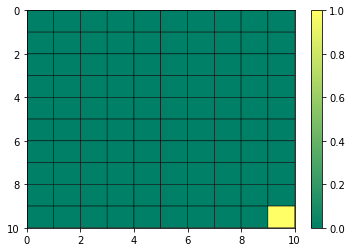

In [5]:
  #plot reward function1
PlotHeatmap(Rewardfunction1,'summer')  

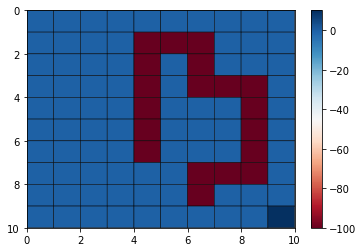

In [6]:
#plot reward function2
PlotHeatmap(Rewardfunction2,'RdBu')


# Optimal policy learning using RL algorithms
# Q2 Create the environment of the agent


In [7]:
#create Action set(A)
A=['R','L','U','D']
# create transition probabilities matrix
#for each action, given current state and next state
w=0.1
r=0.8
# create state space
S=np.arange(100).reshape((10,10),order='F')
print(S)

[[ 0 10 20 30 40 50 60 70 80 90]
 [ 1 11 21 31 41 51 61 71 81 91]
 [ 2 12 22 32 42 52 62 72 82 92]
 [ 3 13 23 33 43 53 63 73 83 93]
 [ 4 14 24 34 44 54 64 74 84 94]
 [ 5 15 25 35 45 55 65 75 85 95]
 [ 6 16 26 36 46 56 66 76 86 96]
 [ 7 17 27 37 47 57 67 77 87 97]
 [ 8 18 28 38 48 58 68 78 88 98]
 [ 9 19 29 39 49 59 69 79 89 99]]


In [8]:
def transition_P(S_current,S_next,Action):
    if Action=='R':
        if S_current+10<100 and S_current-10>=0 and S_current%10!=9 and S_current%10!=0:
            if S_next==S_current+10:
                return 1-w+w/4
            elif S_next==S_current-1 or S_next==S_current+1 or S_next==S_current-10:
                return w/4
            else: 
                return 0
        elif S_current in (0,9,90,99):
            if S_current ==0:
                if S_next==S_current+10:
                    return 1-w+w/4
                elif S_next==1:
                    return w/4
                elif S_next==0:
                    return 2*w/4
                else:
                    return 0
            
            elif S_current==9:
                if S_next==S_current+10:
                    return 1-w+w/4
                elif S_next==8:
                    return w/4
                elif S_next==9:
                    return 2*w/4
                else:
                    return 0  
                
            elif S_current==90:
                if S_next==S_current-10:
                    return w/4
                elif S_next==91:
                    return w/4
                elif S_next==90:
                    return 1-w+2*w/4
                else:
                    return 0
                                
            elif S_current==99:
                if S_next==S_current-10:
                    return w/4
                elif S_next==98:
                    return w/4
                elif S_next==99:
                    return 1-w+2*w/4
                else:
                    return 0
        else:
            if S_current%10==0: # S_current in (10,20,30,40,50,60,70,80)
                if S_next==S_current+10:
                    return 1-w+w/4
                elif  S_next==S_current-10 or S_next==S_current+1 or S_next==S_current:
                    return w/4
                else:
                    return 0
                
            elif S_current%10==9:  # S_current in (19,29,39,49,59,69,79,89)
                if S_next==S_current+10:
                    return 1-w+w/4
                elif  S_next==S_current-10 or S_next==S_current-1 or S_next==S_current:
                    return w/4
                else:
                    return 0
                
            elif S_current-10<0:  # S_current in (1,2,3,4,5,6,7,8)
                if S_next==S_current+10:
                    return 1-w+w/4
                elif  S_next==S_current-1 or S_next==S_current+1 or S_next==S_current:
                    return w/4
                else:
                    return 0  
                
            else:  # S_current in (91,92,93,94,95,96,97,98)
                if S_next==S_current-10 or S_next==S_current-1 or S_next==S_current+1:
                    return w/4
                elif S_next==S_current:
                    return 1-w+w/4
                else:
                    return 0      
        
    elif Action=='L':
        if S_current+10<100 and S_current-10>=0 and S_current%10!=9 and S_current%10!=0:
            if S_next==S_current-10:
                return 1-w+w/4
            elif S_next==S_current-1 or S_next==S_current+1 or S_next==S_current+10:
                return w/4
            else: 
                return 0
        elif S_current in (0,9,90,99):
            if S_current ==0:
                if S_next==S_current+10:
                    return w/4
                elif S_next==1:
                    return w/4
                elif S_next==0:
                    return 1-w+2*w/4
                else:
                    return 0
            
            elif S_current==9:
                if S_next==S_current+10:
                    return w/4
                elif S_next==8:
                    return w/4
                elif S_next==9:
                    return 1-w+2*w/4
                else:
                    return 0          
            elif S_current==90:
                if S_next==S_current-10:
                    return 1-w+w/4
                elif S_next==91:
                    return w/4
                elif S_next==90:
                    return 2*w/4
                else:
                    return 0
                                
            elif S_current==99:
                if S_next==S_current-10:
                    return 1-w+w/4
                elif S_next==98:
                    return w/4
                elif S_next==99:
                    return 2*w/4
                else:
                    return 0
        else:
            if S_current%10==0: # S_current in (10,20,30,40,50,60,70,80)
                if S_next==S_current-10:
                    return 1-w+w/4
                elif  S_next==S_current+10 or S_next==S_current+1 or S_next==S_current:
                    return w/4
                else:
                    return 0
                
            elif S_current%10==9:  # S_current in (19,29,39,49,59,69,79,89)
                if S_next==S_current-10:
                    return 1-w+w/4
                elif  S_next==S_current+10 or S_next==S_current-1 or S_next==S_current:
                    return w/4
                else:
                    return 0
                
            elif S_current-10<0:  # S_current in (1,2,3,4,5,6,7,8)
                if S_next==S_current+10:
                    return w/4
                elif  S_next==S_current-1 or S_next==S_current+1:
                    return w/4
                elif S_next==S_current:
                    return 1-w+w/4
                else:
                    return 0  
                
            else:  # S_current in (91,92,93,94,95,96,97,98)
                if S_next==S_current-10:
                    return 1-w+w/4
                elif  S_next==S_current-1 or S_next==S_current+1:
                    return w/4
                elif S_next==S_current:
                    return w/4
                else:
                    return 0      
        
        
    elif Action=='U':
        if S_current+10<100 and S_current-10>=0 and S_current%10!=9 and S_current%10!=0:
            if S_next==S_current-1:
                return 1-w+w/4
            elif S_next==S_current+1 or S_next==S_current+10 or S_next==S_current-10:
                return w/4
            else: 
                return 0
        elif S_current in (0,9,90,99):
            if S_current ==0:
                if S_next==S_current+10:
                    return w/4
                elif S_next==1:
                    return w/4
                elif S_next==0:
                    return 1-w+2*w/4
                else:
                    return 0
            
            elif S_current==9:
                if S_next==S_current+10:
                    return w/4
                elif S_next==8:
                    return 1-w+w/4
                elif S_next==9:
                    return 2*w/4
                else:
                    return 0          
            elif S_current==90:
                if S_next==S_current-10:
                    return w/4
                elif S_next==91:
                    return w/4
                elif S_next==90:
                    return 1-w+2*w/4
                else:
                    return 0
                                
            elif S_current==99:
                if S_next==S_current-10:
                    return w/4
                elif S_next==98:
                    return 1-w+w/4
                elif S_next==99:
                    return 2*w/4
                else:
                    return 0
        else:
            if S_current%10==0: # S_current in (10,20,30,40,50,60,70,80)
                if S_next==S_current:
                    return 1-w+w/4
                elif  S_next==S_current+10 or S_next==S_current+1 or S_next==S_current-10:
                    return w/4
                else:
                    return 0
                
            elif S_current%10==9:  # S_current in (19,29,39,49,59,69,79,89)
                if S_next==S_current-1:
                    return 1-w+w/4
                elif  S_next==S_current+10 or S_next==S_current-10 or S_next==S_current:
                    return w/4
                else:
                    return 0
                
            elif S_current-10<0:  # S_current in (1,2,3,4,5,6,7,8)
                if S_next==S_current-1:
                    return 1-w+w/4
                elif  S_next==S_current or S_next==S_current+1 or S_next==S_current+10:
                    return w/4
                else:
                    return 0  
                
            else:  # S_current in (91,92,93,94,95,96,97,98)
                if S_next==S_current-1:
                    return 1-w+w/4
                elif  S_next==S_current-10 or S_next==S_current+1 or S_next==S_current:
                    return w/4

                else:
                    return 0    
        
    elif Action=='D':
        if S_current+10<100 and S_current-10>=0 and S_current%10!=9 and S_current%10!=0:
            if S_next==S_current+1:
                return 1-w+w/4
            elif S_next==S_current-1 or S_next==S_current+10 or S_next==S_current-10:
                return w/4
            else: 
                return 0
        elif S_current in (0,9,90,99):
            if S_current ==0:
                if S_next==S_current+10:
                    return w/4
                elif S_next==1:
                    return 1-w+w/4
                elif S_next==0:
                    return 2*w/4
                else:
                    return 0
            
            elif S_current==9:
                if S_next==S_current+10:
                    return w/4
                elif S_next==8:
                    return w/4
                elif S_next==9:
                    return 1-w+2*w/4
                else:
                    return 0          
            elif S_current==90:
                if S_next==S_current-10:
                    return w/4
                elif S_next==91:
                    return 1-w+w/4
                elif S_next==90:
                    return 2*w/4
                else:
                    return 0
                                
            elif S_current==99:
                if S_next==S_current-10:
                    return w/4
                elif S_next==98:
                    return w/4
                elif S_next==99:
                    return 1-w+2*w/4
                else:
                    return 0
        else:
            if S_current%10==0: # S_current in (10,20,30,40,50,60,70,80)
                if S_next==S_current+1:
                    return 1-w+w/4
                elif  S_next==S_current+10 or S_next==S_current or S_next==S_current-10:
                    return w/4
                else:
                    return 0
                
            elif S_current%10==9:  # S_current in (19,29,39,49,59,69,79,89)
                if S_next==S_current:
                    return 1-w+w/4
                elif  S_next==S_current+10 or S_next==S_current-10 or S_next==S_current-1:
                    return w/4
                else:
                    return 0
                
            elif S_current-10<0:  # S_current in (1,2,3,4,5,6,7,8)
                if S_next==S_current+1:
                    return 1-w+w/4
                elif  S_next==S_current or S_next==S_current-1 or S_next==S_current+10:
                    return w/4
                else:
                    return 0  
                
            else:  # S_current in (91,92,93,94,95,96,97,98)
                if S_next==S_current+1:
                    return 1-w+w/4
                elif  S_next==S_current-10 or S_next==S_current-1 or S_next==S_current:
                    return w/4

                else:
                    return 0
        
    else:
        return "Error"


In [9]:
# define Reward function
def R(next_state,Reward_function):
    temp=np.where(S==next_state)
    return Reward_function[int(temp[0]),int(temp[1])]

In [10]:
# #given the reward function matrix, 
# #output state value matrix
# #return the state value list, key is the current state
# #return the state value matrix

def get_stateValueMatrix(RewardMatrix,plot_table='T'):
    r=0.8
    State_Value={} #state value function, input is state, output is value
    for i in range(100):
        State_Value[i]=0
    delta=math.inf
    seita=0.01
    while delta>seita:
        delta=0
        Last_state=State_Value.copy()
        for current_s in range(100):     
            v=Last_state[current_s]
            temp_max={}
            for a in A:
                temp_max[a]=0
                for next_s in range(100):
                    temp_max[a]+=transition_P(current_s,next_s,a)*(R(next_s,RewardMatrix)+r*Last_state[next_s])

            State_Value[current_s]=max(temp_max['U'],temp_max['D'],temp_max['R'],temp_max['L'])

            delta=max(delta,abs(v-State_Value[current_s]))


    # create state_value_matrix
    state_value_matrix=np.zeros((10,10))
    for index in range(100):
        temp=np.where(S==index)
        state_value_matrix[int(temp[0]),int(temp[1])]=State_Value[index]
        
    if plot_table=="T":
        display(DataFrame(state_value_matrix))
    else:
        pass
    
    return State_Value, state_value_matrix

In [11]:
#given the reward function matrix, 
#output state value matrix
#return the state value list, key is the current state
#return the state value matrix

# def get_stateValueMatrix(RewardMatrix,plot_table='T'):
#     r=0.8
#     State_Value={} #state value function, input is state, output is value
#     for i in range(100):
#         State_Value[i]=0
#     delta=math.inf
#     seita=0.01
#     while delta>seita:
#         delta=0
        
#         for current_s in range(100):     
#             v=State_Value[current_s]
#             temp_max={}
#             for a in A:
#                 temp_max[a]=0
#                 for next_s in range(100):
#                     temp_max[a]+=transition_P(current_s,next_s,a)*(R(next_s,RewardMatrix)+r*State_Value[next_s])

#             State_Value[current_s]=max(temp_max['U'],temp_max['D'],temp_max['R'],temp_max['L'])

#             delta=max(delta,abs(v-State_Value[current_s]))


#     # create state_value_matrix
#     state_value_matrix=np.zeros((10,10))
#     for index in range(100):
#         temp=np.where(S==index)
#         state_value_matrix[int(temp[0]),int(temp[1])]=State_Value[index]
        
#     if plot_table=="T":
#         display(DataFrame(state_value_matrix))
#     else:
#         pass
    
#     return State_Value, state_value_matrix

In [12]:
SV_list1,SV_matrix1 =get_stateValueMatrix(Rewardfunction1)

0         1         2         3         4         5         6  \
0  0.044240  0.064574  0.091184  0.125041  0.168078  0.222693  0.291988   
1  0.064574  0.088334  0.121853  0.164761  0.219453  0.289178  0.378043   
2  0.091184  0.121853  0.164590  0.219304  0.289070  0.377989  0.491317   
3  0.125041  0.164761  0.219304  0.289065  0.377987  0.491320  0.635761   
4  0.168078  0.219453  0.289070  0.377987  0.491320  0.635764  0.819856   
5  0.222693  0.289178  0.377989  0.491320  0.635764  0.819857  1.054482   
6  0.291988  0.378043  0.491317  0.635761  0.819856  1.054482  1.353511   
7  0.379880  0.491228  0.635651  0.819770  1.054426  1.353485  1.734622   
8  0.491349  0.633384  0.817516  1.052352  1.351732  1.733341  2.219687   
9  0.610011  0.787519  1.018758  1.315219  1.695233  2.182392  2.806963   

          7         8         9  
0  0.379880  0.491349  0.610011  
1  0.491228  0.633384  0.787519  
2  0.635651  0.817516  1.018758  
3  0.819770  1.052352  1.315219  
4  1.054426  1.351732  1.695233  
5  1.353485  1.733341  2.182392  
6  1.734622  2.219687  2.806963  
7  2.220362  2.839418  3.607787  
8  2.839418  3.628974  4.634708  
9  3.607787  4.634708  4.701701

# Q3 Generate a heat map of the optimal state values


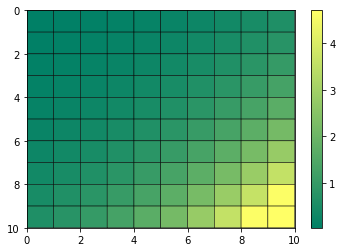

In [13]:
#plot optimal state values heatmap
PlotHeatmap(SV_matrix1,'summer')

# Q4 Explain the distribution of the optimal state values across the 2-D grid.


# Q5 compute the optimal policy


In [14]:
#given the state_value matrix and reward matrix, 
#print the optimal action matrix and return optimal action list
def get_opt_actionMatrix(State_Value_list, RewardMatrix, plot="T"):
    r=0.8
    opt_action={}
    temp_max={}
    for current_s in range(100):
        for a in A:
            temp_max[a]=0
            for next_s in range(100):
                temp_max[a]+=transition_P(current_s,next_s,a)*(R(next_s,RewardMatrix)+r*State_Value_list[next_s])

        search=max(temp_max['U'],temp_max['D'],temp_max['R'],temp_max['L'])  
        for act, sum_vaule in temp_max.items():
            if sum_vaule==search:
                opt_action[current_s]=act
                
                
    opt_action_matrix=np.zeros((10,10),dtype=np.unicode_)
    for index in range(100):
        temp=np.where(S==index)
        if opt_action[index]=='U':
            arrow=u'\u2191'
        elif opt_action[index]=='D':   
            arrow=u'\u2193'
        elif opt_action[index]=='R':   
            arrow=u'\u2192'
        elif opt_action[index]=='L':
            arrow=u'\u2190'
        else:
            arrow=0

        opt_action_matrix[int(temp[0]),int(temp[1])]=arrow   
    
    if plot=='T':
        display(DataFrame(opt_action_matrix))
    else:
        pass
    
    return opt_action, opt_action_matrix

In [15]:
SV_list1,SV_matrix1=get_stateValueMatrix(Rewardfunction1)
opt_action_list1,opt_action_matrix1= get_opt_actionMatrix(SV_list1, Rewardfunction1)

0         1         2         3         4         5         6  \
0  0.044240  0.064574  0.091184  0.125041  0.168078  0.222693  0.291988   
1  0.064574  0.088334  0.121853  0.164761  0.219453  0.289178  0.378043   
2  0.091184  0.121853  0.164590  0.219304  0.289070  0.377989  0.491317   
3  0.125041  0.164761  0.219304  0.289065  0.377987  0.491320  0.635761   
4  0.168078  0.219453  0.289070  0.377987  0.491320  0.635764  0.819856   
5  0.222693  0.289178  0.377989  0.491320  0.635764  0.819857  1.054482   
6  0.291988  0.378043  0.491317  0.635761  0.819856  1.054482  1.353511   
7  0.379880  0.491228  0.635651  0.819770  1.054426  1.353485  1.734622   
8  0.491349  0.633384  0.817516  1.052352  1.351732  1.733341  2.219687   
9  0.610011  0.787519  1.018758  1.315219  1.695233  2.182392  2.806963   

          7         8         9  
0  0.379880  0.491349  0.610011  
1  0.491228  0.633384  0.787519  
2  0.635651  0.817516  1.018758  
3  0.819770  1.052352  1.315219  
4  1.054426  1.351732  1.695233  
5  1.353485  1.733341  2.182392  
6  1.734622  2.219687  2.806963  
7  2.220362  2.839418  3.607787  
8  2.839418  3.628974  4.634708  
9  3.607787  4.634708  4.701701

0  1  2  3  4  5  6  7  8  9
0  →  →  →  →  →  →  →  →  ↓  ↓
1  ↓  ↓  →  →  →  →  ↓  ↓  ↓  ↓
2  ↓  ↓  →  →  →  ↓  ↓  ↓  ↓  ↓
3  ↓  ↓  ↓  ↓  ↓  ↓  ↓  ↓  ↓  ↓
4  ↓  ↓  ↓  →  ↓  ↓  ↓  ↓  ↓  ↓
5  ↓  ↓  →  →  →  ↓  ↓  ↓  ↓  ↓
6  ↓  →  →  →  →  →  ↓  ↓  ↓  ↓
7  ↓  →  →  →  →  →  →  ↓  ↓  ↓
8  →  →  →  →  →  →  →  →  ↓  ↓
9  →  →  →  →  →  →  →  →  →  ↓

# Q6 Modify the environment of the agent by replacing Reward function 1 with Reward function 2

In [16]:
#print the stateValueMatrix using Rewardfunction2
print("State Value Matrix using Reward function2 \n")
SV_list2,SV_matrix2=get_stateValueMatrix(Rewardfunction2)

State Value Matrix using Reward function2 



0         1         2          3          4          5          6  \
0  0.646710  0.790798  0.820813   0.525100  -2.386476  -4.236930  -1.923374   
1  0.827724  1.017733  1.061580  -1.879217  -6.754669  -8.683714  -6.373483   
2  1.061312  1.313001  1.445788  -1.635211  -6.757757 -13.916635  -9.653202   
3  1.357786  1.689182  1.943907  -1.243217  -6.339216  -7.982771  -7.947292   
4  1.733934  2.168079  2.585895  -0.736490  -5.846727  -3.258403  -3.241071   
5  2.211119  2.777553  3.413345  -0.038140  -5.114112  -0.553380  -0.487536   
6  2.816429  3.552963  4.478824   3.024358   2.480209   2.880151  -0.465523   
7  3.584202  4.539186  5.792569   7.288420   6.718773   7.241102   0.930890   
8  4.557967  5.794705  7.397203   9.439455  12.008201  12.889183  17.097345   
9  5.726633  7.316079  9.387596  12.044687  15.452355  19.823974  25.497506   

           7          8          9  
0   1.128097   1.591162   2.034827  
1  -1.298361   1.924775   2.606893  
2  -5.514815  -0.134600   3.355478  
3  -9.434452  -1.918155   4.387045  
4  -7.434498   1.715158   9.159524  
5  -2.983515   6.582692  15.353757  
6  -4.910549  12.688464  23.296389  
7  12.366437  21.159165  33.482577  
8  23.013970  33.778251  46.528791  
9  36.157594  46.583383  47.311471

# Q7 

 

Heatmap of State Value Matrix



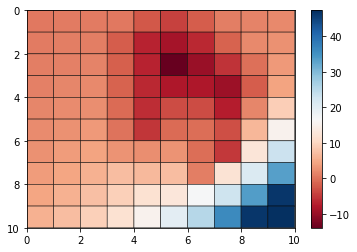

In [17]:
print(" \n")
print("Heatmap of State Value Matrix\n")
PlotHeatmap(SV_matrix2,'RdBu')

# Q8

# Q9

In [18]:
print(" \n")
print("Optimal action matrix using Reward function2 \n")
opt_action_list2,opt_action_matrix2= get_opt_actionMatrix(SV_list2, Rewardfunction2)

 

Optimal action matrix using Reward function2 



0  1  2  3  4  5  6  7  8  9
0  ↓  ↓  ↓  ←  ←  →  →  →  →  ↓
1  ↓  ↓  ↓  ←  ←  ↑  →  →  →  ↓
2  ↓  ↓  ↓  ←  ←  ↓  →  →  →  ↓
3  ↓  ↓  ↓  ←  ←  ↓  ↓  ↑  →  ↓
4  ↓  ↓  ↓  ←  ←  ↓  ↓  ↓  →  ↓
5  ↓  ↓  ↓  ←  ←  ↓  ↓  ←  →  ↓
6  ↓  ↓  ↓  ↓  ↓  ↓  ←  ←  →  ↓
7  ↓  ↓  ↓  ↓  ↓  ↓  ←  ↓  ↓  ↓
8  →  →  →  ↓  ↓  ↓  ↓  ↓  ↓  ↓
9  →  →  →  →  →  →  →  →  →  ↓

# IRL reward 1

In [21]:
#new D matrix
def Get_D_Parameter(action_list):
    
    Up_action_Matrix=np.zeros((100,100))
    Down_action_Matrix=np.zeros((100,100))
    Right_action_Matrix=np.zeros((100,100))
    Left_action_Matrix=np.zeros((100,100))

    for i in range(100):
        for j in range(100):
            Up_action_Matrix[i,j]=transition_P(i,j,'U')
            Down_action_Matrix[i,j]=transition_P(i,j,'D')
            Right_action_Matrix[i,j]=transition_P(i,j,'R')
            Left_action_Matrix[i,j]=transition_P(i,j,'L')
            
            
    D=np.zeros((1000,300))
    P_a1=np.zeros((100,100))
    P_a2=np.zeros((100,100))
    P_a3=np.zeros((100,100))
    P_a4=np.zeros((100,100))

    D[600:700,100:200]=-np.identity(100)
    D[700:800,100:200]=-np.identity(100)
    D[600:700,200:300]=np.identity(100)
    D[700:800,200:300]=-np.identity(100)
    D[800:900,200:300]=np.identity(100)
    D[900:1000,200:300]=-np.identity(100)

       
    for i in range(100): 
        D[i*3:i*3+3,i]=1
        
        if action_list[i]=='U':
            P_a=Up_action_Matrix.copy()
            P_a2=Down_action_Matrix.copy()
            P_a3=Right_action_Matrix.copy()
            P_a4=Left_action_Matrix.copy()
            
        elif action_list[i]=='D':
            P_a=Down_action_Matrix.copy()
            P_a2=Up_action_Matrix.copy()
            P_a3=Right_action_Matrix.copy()
            P_a4=Left_action_Matrix.copy()
            
        elif action_list[i]=='R':
            P_a=Right_action_Matrix.copy()
            P_a2=Up_action_Matrix.copy()
            P_a3=Down_action_Matrix.copy()
            P_a4=Left_action_Matrix.copy()
            
        elif action_list[i]=='L':
            P_a=Left_action_Matrix.copy()
            P_a2=Up_action_Matrix.copy()
            P_a3=Down_action_Matrix.copy()
            P_a4=Right_action_Matrix.copy()
        else:
            return "error"

            
        ainv1=np.identity(100)-r*P_a
        ainv=inv(ainv1).copy()

    
        temp_a2=np.zeros((1,100))
        temp_a3=np.zeros((1,100))
        temp_a4=np.zeros((1,100))
     
        temp_a2=P_a[i,:]-P_a2[i,:]
        temp_a3=P_a[i,:]-P_a3[i,:]
        temp_a4=P_a[i,:]-P_a4[i,:]

        D[i*3,200:300]=-np.matmul(temp_a2,ainv)
        D[i*3+1,200:300]=-np.matmul(temp_a3,ainv)
        D[i*3+2,200:300]=-np.matmul(temp_a4,ainv)

    D[300:600,200:300]=D[0:300,200:300]
    
    return D

In [22]:
# #Old Dmatrix
# def Get_D_Parameter(action_list):
#     D=np.zeros((1000,300))
#     P_a1=np.zeros((100,100))
#     P_a2=np.zeros((100,100))
#     P_a3=np.zeros((100,100))
#     P_a4=np.zeros((100,100))

#     D[600:700,100:200]=-np.identity(100)
#     D[700:800,100:200]=-np.identity(100)
#     D[600:700,200:300]=np.identity(100)
#     D[700:800,200:300]=-np.identity(100)
#     D[800:900,200:300]=np.identity(100)
#     D[900:1000,200:300]=-np.identity(100)

#     for i in range(100):
#         D[i*3:i*3+3,i]=1

#     for i in range(100):
#         for j in range(100):
#             P_a1[i,j]=transition_P(i,j,action_list[i])

#     #set up inverse part
#     ainv1=np.identity(100)-r*P_a1
#     ainv=inv(ainv1)


#     for i in range(100):
#         A1=A.copy()
#         A1.remove(action_list[i])
#         for j in range(100):
#             P_a2[i,j]=transition_P(i,j,A1[0])
#             P_a3[i,j]=transition_P(i,j,A1[1])
#             P_a4[i,j]=transition_P(i,j,A1[2])

#     temp_a2=np.zeros((1,100))
#     temp_a3=np.zeros((1,100))
#     temp_a4=np.zeros((1,100))
#     for i in range(100):
#         temp_a2=P_a1[i,:]-P_a2[i,:]
#         temp_a3=P_a1[i,:]-P_a3[i,:]
#         temp_a4=P_a1[i,:]-P_a4[i,:]

#         D[i*3,200:300]=-np.matmul(temp_a2,ainv)
#         D[i*3+1,200:300]=-np.matmul(temp_a3,ainv)
#         D[i*3+2,200:300]=-np.matmul(temp_a4,ainv)

#     D[300:600,200:300]=D[0:300,200:300]

#     return D

In [26]:
D_p=Get_D_Parameter(opt_action_list1)
accuracy=np.zeros((500,1))
b=np.zeros((1000,1))
Rmax=[1,100]
index=0
D_p=matrix(D_p)
#set up b
b[800:1000]=int(Rmax[0])
b=matrix(b)

for lam in np.linspace(0,5,500): 
    #set up c    
    c=np.zeros((300,1))
    c[0:100]=1
    c[100:200]=-lam
    c=matrix(c)
    #solve for reward function
    Rew=solvers.lp(-c,D_p,b)
    rew=np.matrix(Rew['x'][200:300])

    rf=np.zeros((10,10))

    for i in range(100):
        temp=np.where(S==i)
        rf[int(temp[0]),int(temp[1])]=rew[i]

    #get the inverse State Value Matrix 

    inv_SV_list1,inv_SV_matrix1=get_stateValueMatrix(rf,'F')

    inv_opt_action_list1,inv_opt_action_matrix1= get_opt_actionMatrix(inv_SV_list1, rf,'F')

    for i in range(100):
        if inv_opt_action_list1[i]==opt_action_list1[i]:
            accuracy[index,0]=accuracy[index,0]+1
    print("accuracy is %f" %accuracy[index],"lamba is %f" %lam)

    index=index+1        
accuracy=accuracy/100

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7411e+02  2e+03  2e+00  2e+01  1e+00
 1: -1.2316e+01 -1.0232e+02  4e+02  7e-01  5e+00  1e+00
 2: -2.1182e+01 -7.9753e+01  3e+02  5e-01  3e+00  8e-01
 3: -3.1505e+01 -5.7261e+01  1e+02  2e-01  1e+00  3e-01
 4: -3.6084e+01 -4.8938e+01  6e+01  1e-01  7e-01  2e-01
 5: -3.8996e+01 -4.5828e+01  3e+01  6e-02  4e-01  8e-02
 6: -4.0726e+01 -4.4224e+01  2e+01  3e-02  2e-01  4e-02
 7: -4.1956e+01 -4.3198e+01  6e+00  1e-02  7e-02  1e-02
 8: -4.2426e+01 -4.2988e+01  2e+00  5e-03  3e-02  4e-03
 9: -4.2682e+01 -4.2973e+01  1e+00  2e-03  2e-02  2e-03
10: -4.2773e+01 -4.2951e+01  8e-01  1e-03  1e-02  1e-03
11: -4.2848e+01 -4.2935e+01  4e-01  7e-04  5e-03  5e-04
12: -4.2875e+01 -4.2927e+01  2e-01  4e-04  3e-03  2e-04
13: -4.2907e+01 -4.2924e+01  8e-02  1e-04  1e-03  8e-05
14: -4.2911e+01 -4.2922e+01  5e-02  9e-05  6e-04  5e-05
15: -4.2915e+01 -4.2921e+01  3e-02  5e-05  3e-04  3e-05
16: -4.2916e+01 -4.2920e+01  2e-02  3e-05  2e-04  

23: -3.8802e+01 -3.8802e+01  3e-05  6e-08  4e-07  3e-08
24: -3.8802e+01 -3.8802e+01  5e-06  9e-09  6e-08  5e-09
Optimal solution found.
accuracy is 68.000000 lamba is 0.050100
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7411e+02  2e+03  2e+00  2e+01  1e+00
 1: -9.6248e+00 -9.4766e+01  4e+02  7e-01  5e+00  1e+00
 2: -1.7278e+01 -7.3611e+01  2e+02  5e-01  3e+00  7e-01
 3: -2.6397e+01 -5.2263e+01  1e+02  2e-01  1e+00  3e-01
 4: -3.0623e+01 -4.4035e+01  6e+01  1e-01  8e-01  2e-01
 5: -3.3576e+01 -4.0878e+01  3e+01  6e-02  4e-01  7e-02
 6: -3.6014e+01 -3.8877e+01  1e+01  2e-02  2e-01  2e-02
 7: -3.7337e+01 -3.8331e+01  4e+00  8e-03  6e-02  7e-03
 8: -3.7688e+01 -3.8144e+01  2e+00  4e-03  3e-02  3e-03
 9: -3.7855e+01 -3.8095e+01  9e-01  2e-03  1e-02  1e-03
10: -3.7931e+01 -3.8075e+01  6e-01  1e-03  8e-03  8e-04
11: -3.7989e+01 -3.8054e+01  3e-01  5e-04  4e-03  3e-04
12: -3.8025e+01 -3.8045e+01  8e-02  2e-04  1e-03  9e-05
13: -3.8034e+01 -3.8041e+01  3e-02  6e-05 

accuracy is 65.000000 lamba is 0.110220
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7411e+02  2e+03  2e+00  2e+01  1e+00
 1: -7.4069e+00 -8.8010e+01  3e+02  7e-01  5e+00  1e+00
 2: -1.4094e+01 -6.8169e+01  2e+02  4e-01  3e+00  7e-01
 3: -2.2242e+01 -4.7940e+01  1e+02  2e-01  1e+00  3e-01
 4: -2.6276e+01 -3.9817e+01  6e+01  1e-01  8e-01  2e-01
 5: -2.9249e+01 -3.5924e+01  3e+01  5e-02  4e-01  6e-02
 6: -3.1670e+01 -3.4171e+01  1e+01  2e-02  1e-01  2e-02
 7: -3.2620e+01 -3.3720e+01  4e+00  9e-03  6e-02  6e-03
 8: -3.3219e+01 -3.3578e+01  1e+00  3e-03  2e-02  2e-03
 9: -3.3381e+01 -3.3482e+01  4e-01  8e-04  6e-03  4e-04
10: -3.3425e+01 -3.3479e+01  2e-01  4e-04  3e-03  2e-04
11: -3.3446e+01 -3.3472e+01  1e-01  2e-04  1e-03  1e-04
12: -3.3461e+01 -3.3469e+01  3e-02  7e-05  5e-04  3e-05
13: -3.3460e+01 -3.3468e+01  3e-02  7e-05  5e-04  3e-05
14: -3.3460e+01 -3.3468e+01  3e-02  6e-05  4e-04  3e-05
15: -3.3461e+01 -3.3466e+01  2e-02  4e-05  3e-04  2e-05
16: -3.346

accuracy is 64.000000 lamba is 0.180361
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7411e+02  2e+03  2e+00  2e+01  1e+00
 1: -5.3527e+00 -8.1169e+01  3e+02  6e-01  4e+00  9e-01
 2: -1.1073e+01 -6.2511e+01  2e+02  4e-01  3e+00  7e-01
 3: -1.7782e+01 -4.3913e+01  1e+02  2e-01  1e+00  3e-01
 4: -2.2129e+01 -3.4561e+01  5e+01  1e-01  7e-01  1e-01
 5: -2.4256e+01 -3.0978e+01  3e+01  6e-02  4e-01  6e-02
 6: -2.6313e+01 -2.9221e+01  1e+01  2e-02  2e-01  2e-02
 7: -2.7446e+01 -2.8573e+01  4e+00  9e-03  6e-02  7e-03
 8: -2.7914e+01 -2.8384e+01  2e+00  4e-03  3e-02  3e-03
 9: -2.8171e+01 -2.8303e+01  5e-01  1e-03  7e-03  7e-04
10: -2.8177e+01 -2.8288e+01  4e-01  9e-04  6e-03  6e-04
11: -2.8229e+01 -2.8266e+01  1e-01  3e-04  2e-03  2e-04
12: -2.8241e+01 -2.8258e+01  6e-02  1e-04  9e-04  7e-05
13: -2.8241e+01 -2.8257e+01  7e-02  1e-04  9e-04  7e-05
14: -2.8242e+01 -2.8255e+01  5e-02  1e-04  7e-04  5e-05
15: -2.8245e+01 -2.8251e+01  2e-02  4e-05  3e-04  2e-05
16: -2.824

accuracy is 65.000000 lamba is 0.250501
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7411e+02  2e+03  2e+00  2e+01  1e+00
 1: -3.8399e+00 -7.5557e+01  3e+02  6e-01  4e+00  9e-01
 2: -8.6588e+00 -5.7535e+01  2e+02  4e-01  3e+00  7e-01
 3: -1.3931e+01 -3.9733e+01  1e+02  2e-01  1e+00  3e-01
 4: -1.8303e+01 -2.9566e+01  4e+01  9e-02  6e-01  1e-01
 5: -2.0367e+01 -2.5730e+01  2e+01  4e-02  3e-01  5e-02
 6: -2.1661e+01 -2.4115e+01  9e+00  2e-02  1e-01  2e-02
 7: -2.2318e+01 -2.3612e+01  5e+00  1e-02  7e-02  8e-03
 8: -2.2769e+01 -2.3429e+01  3e+00  5e-03  4e-02  4e-03
 9: -2.3039e+01 -2.3230e+01  7e-01  2e-03  1e-02  7e-04
10: -2.3096e+01 -2.3217e+01  5e-01  1e-03  7e-03  5e-04
11: -2.3161e+01 -2.3207e+01  2e-01  4e-04  3e-03  2e-04
12: -2.3166e+01 -2.3206e+01  2e-01  3e-04  2e-03  2e-04
13: -2.3185e+01 -2.3202e+01  6e-02  1e-04  9e-04  6e-05
14: -2.3185e+01 -2.3201e+01  6e-02  1e-04  9e-04  6e-05
15: -2.3188e+01 -2.3197e+01  4e-02  8e-05  5e-04  4e-05
16: -2.319

accuracy is 66.000000 lamba is 0.320641
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7411e+02  2e+03  2e+00  1e+01  1e+00
 1: -2.6322e+00 -7.0304e+01  3e+02  6e-01  4e+00  1e+00
 2: -6.6329e+00 -5.2799e+01  2e+02  4e-01  3e+00  7e-01
 3: -1.0305e+01 -3.6393e+01  1e+02  2e-01  1e+00  3e-01
 4: -1.5067e+01 -2.3882e+01  3e+01  7e-02  5e-01  1e-01
 5: -1.6023e+01 -2.2100e+01  2e+01  5e-02  3e-01  6e-02
 6: -1.7418e+01 -1.9561e+01  8e+00  2e-02  1e-01  2e-02
 7: -1.7965e+01 -1.8846e+01  3e+00  7e-03  5e-02  7e-03
 8: -1.8149e+01 -1.8616e+01  2e+00  4e-03  3e-02  3e-03
 9: -1.8263e+01 -1.8517e+01  9e-01  2e-03  1e-02  2e-03
10: -1.8338e+01 -1.8444e+01  4e-01  9e-04  6e-03  5e-04
11: -1.8359e+01 -1.8422e+01  2e-01  5e-04  3e-03  3e-04
12: -1.8387e+01 -1.8400e+01  5e-02  1e-04  7e-04  5e-05
13: -1.8391e+01 -1.8398e+01  3e-02  6e-05  4e-04  3e-05
14: -1.8394e+01 -1.8396e+01  1e-02  2e-05  1e-04  1e-05
15: -1.8395e+01 -1.8395e+01  1e-03  2e-06  2e-05  1e-06
16: -1.839

accuracy is 63.000000 lamba is 0.400802
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7411e+02  2e+03  2e+00  1e+01  1e+00
 1: -1.5526e+00 -6.4651e+01  2e+02  5e-01  3e+00  1e+00
 2: -4.6922e+00 -4.7563e+01  2e+02  4e-01  2e+00  7e-01
 3: -6.8252e+00 -3.2506e+01  9e+01  2e-01  1e+00  3e-01
 4: -1.0666e+01 -2.0586e+01  4e+01  8e-02  5e-01  1e-01
 5: -1.2060e+01 -1.7667e+01  2e+01  5e-02  3e-01  7e-02
 6: -1.2667e+01 -1.5937e+01  1e+01  3e-02  2e-01  3e-02
 7: -1.3638e+01 -1.4481e+01  3e+00  7e-03  4e-02  6e-03
 8: -1.3811e+01 -1.4222e+01  1e+00  3e-03  2e-02  3e-03
 9: -1.3944e+01 -1.4051e+01  4e-01  9e-04  6e-03  6e-04
10: -1.3980e+01 -1.4002e+01  8e-02  2e-04  1e-03  1e-04
11: -1.3987e+01 -1.3994e+01  2e-02  5e-05  3e-04  3e-05
12: -1.3990e+01 -1.3991e+01  3e-03  7e-06  5e-05  4e-06
13: -1.3990e+01 -1.3990e+01  4e-04  1e-06  6e-06  5e-07
14: -1.3990e+01 -1.3990e+01  4e-05  9e-08  6e-07  4e-08
15: -1.3990e+01 -1.3990e+01  8e-06  2e-08  1e-07  9e-09
16: -1.399

accuracy is 62.000000 lamba is 0.480962
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7411e+02  2e+03  2e+00  1e+01  1e+00
 1: -7.2489e-01 -5.9285e+01  2e+02  5e-01  3e+00  1e+00
 2: -3.0709e+00 -4.2410e+01  1e+02  3e-01  2e+00  7e-01
 3: -4.0682e+00 -2.8173e+01  9e+01  2e-01  1e+00  3e-01
 4: -7.3864e+00 -1.5572e+01  3e+01  7e-02  4e-01  1e-01
 5: -8.2387e+00 -1.3448e+01  2e+01  4e-02  3e-01  7e-02
 6: -8.9348e+00 -1.1766e+01  1e+01  2e-02  1e-01  3e-02
 7: -9.1596e+00 -1.1197e+01  7e+00  2e-02  1e-01  2e-02
 8: -9.5934e+00 -1.0229e+01  2e+00  5e-03  3e-02  3e-03
 9: -9.7951e+00 -9.9589e+00  6e-01  1e-03  8e-03  7e-04
10: -9.8401e+00 -9.9041e+00  2e-01  5e-04  3e-03  3e-04
11: -9.8631e+00 -9.8778e+00  5e-02  1e-04  7e-04  6e-05
12: -9.8685e+00 -9.8714e+00  1e-02  2e-05  1e-04  1e-05
13: -9.8694e+00 -9.8705e+00  4e-03  9e-06  6e-05  4e-06
14: -9.8697e+00 -9.8700e+00  1e-03  2e-06  1e-05  1e-06
15: -9.8698e+00 -9.8699e+00  1e-04  3e-07  2e-06  1e-07
16: -9.869

accuracy is 63.000000 lamba is 0.561122
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7411e+02  2e+03  2e+00  1e+01  1e+00
 1: -8.7300e-02 -5.8572e+01  2e+02  5e-01  3e+00  1e+00
 2: -1.7549e+00 -3.8661e+01  1e+02  3e-01  2e+00  6e-01
 3: -1.9094e+00 -2.3991e+01  7e+01  2e-01  1e+00  3e-01
 4: -4.4214e+00 -1.2014e+01  2e+01  6e-02  4e-01  1e-01
 5: -5.2374e+00 -8.9248e+00  1e+01  3e-02  2e-01  4e-02
 6: -5.6472e+00 -7.6899e+00  6e+00  2e-02  1e-01  2e-02
 7: -5.9325e+00 -6.9291e+00  3e+00  8e-03  5e-02  1e-02
 8: -6.0451e+00 -6.6238e+00  2e+00  5e-03  3e-02  5e-03
 9: -6.1705e+00 -6.2871e+00  4e-01  1e-03  6e-03  7e-04
10: -6.1903e+00 -6.2374e+00  1e-01  4e-04  2e-03  2e-04
11: -6.2004e+00 -6.2221e+00  7e-02  2e-04  1e-03  9e-05
12: -6.2071e+00 -6.2106e+00  1e-02  3e-05  2e-04  1e-05
13: -6.2082e+00 -6.2088e+00  2e-03  5e-06  3e-05  2e-06
14: -6.2083e+00 -6.2085e+00  7e-04  2e-06  1e-05  7e-07
15: -6.2084e+00 -6.2084e+00  1e-04  3e-07  2e-06  1e-07
16: -6.208

accuracy is 41.000000 lamba is 0.631263
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7411e+02  2e+03  2e+00  1e+01  1e+00
 1:  3.3589e-01 -5.8351e+01  2e+02  5e-01  3e+00  1e+00
 2: -8.0026e-01 -3.5132e+01  1e+02  3e-01  2e+00  6e-01
 3: -4.8828e-01 -1.9531e+01  6e+01  2e-01  9e-01  2e-01
 4: -2.5087e+00 -9.0655e+00  2e+01  5e-02  3e-01  8e-02
 5: -3.1805e+00 -6.1959e+00  9e+00  2e-02  1e-01  3e-02
 6: -3.5989e+00 -4.6257e+00  3e+00  8e-03  5e-02  9e-03
 7: -3.6273e+00 -4.4471e+00  2e+00  7e-03  4e-02  7e-03
 8: -3.6964e+00 -4.2129e+00  1e+00  4e-03  2e-02  3e-03
 9: -3.7704e+00 -4.0135e+00  7e-01  2e-03  1e-02  7e-04
10: -3.8230e+00 -3.9306e+00  3e-01  9e-04  5e-03  3e-04
11: -3.8269e+00 -3.9167e+00  3e-01  7e-04  4e-03  3e-04
12: -3.8424e+00 -3.8850e+00  1e-01  3e-04  2e-03  1e-04
13: -3.8492e+00 -3.8773e+00  8e-02  2e-04  1e-03  8e-05
14: -3.8552e+00 -3.8626e+00  2e-02  6e-05  4e-04  2e-05
15: -3.8570e+00 -3.8585e+00  4e-03  1e-05  7e-05  4e-06
16: -3.857

accuracy is 51.000000 lamba is 0.701403
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7411e+02  2e+03  2e+00  1e+01  1e+00
 1:  6.6794e-01 -5.8094e+01  2e+02  5e-01  3e+00  1e+00
 2:  1.6456e-02 -3.1206e+01  1e+02  3e-01  1e+00  5e-01
 3:  5.5930e-01 -1.4172e+01  4e+01  1e-01  7e-01  2e-01
 4: -1.1301e+00 -6.1546e+00  1e+01  4e-02  2e-01  5e-02
 5: -1.5752e+00 -3.9413e+00  6e+00  2e-02  1e-01  2e-02
 6: -1.7751e+00 -3.1324e+00  4e+00  1e-02  6e-02  8e-03
 7: -1.9926e+00 -2.5226e+00  1e+00  4e-03  2e-02  3e-03
 8: -2.0294e+00 -2.4289e+00  1e+00  3e-03  2e-02  2e-03
 9: -2.0814e+00 -2.2639e+00  5e-01  1e-03  8e-03  5e-04
10: -2.1189e+00 -2.1730e+00  1e-01  4e-04  2e-03  1e-04
11: -2.1272e+00 -2.1452e+00  5e-02  1e-04  8e-04  5e-05
12: -2.1309e+00 -2.1331e+00  5e-03  2e-05  1e-04  5e-06
13: -2.1313e+00 -2.1317e+00  1e-03  4e-06  2e-05  1e-06
14: -2.1313e+00 -2.1315e+00  5e-04  2e-06  1e-05  5e-07
15: -2.1313e+00 -2.1314e+00  5e-05  2e-07  9e-07  5e-08
16: -2.131

accuracy is 58.000000 lamba is 0.771543
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7411e+02  2e+03  2e+00  1e+01  1e+00
 1:  9.3593e-01 -5.7784e+01  2e+02  5e-01  3e+00  1e+00
 2:  7.4172e-01 -2.9466e+01  1e+02  2e-01  1e+00  5e-01
 3:  5.5408e-01 -1.2385e+01  4e+01  1e-01  6e-01  2e-01
 4: -2.9668e-01 -4.2882e+00  1e+01  3e-02  2e-01  5e-02
 5: -3.7304e-01 -3.8099e+00  9e+00  3e-02  2e-01  3e-02
 6: -5.8065e-01 -2.4822e+00  5e+00  2e-02  9e-02  1e-02
 7: -7.3198e-01 -1.4884e+00  2e+00  6e-03  3e-02  5e-03
 8: -8.0950e-01 -1.1196e+00  7e-01  3e-03  1e-02  1e-03
 9: -8.3897e-01 -9.7746e-01  3e-01  1e-03  6e-03  4e-04
10: -8.5435e-01 -9.0864e-01  1e-01  4e-04  2e-03  1e-04
11: -8.5801e-01 -8.8347e-01  6e-02  2e-04  1e-03  7e-05
12: -8.6067e-01 -8.6878e-01  2e-02  7e-05  4e-04  2e-05
13: -8.6113e-01 -8.6317e-01  5e-03  2e-05  9e-05  5e-06
14: -8.6123e-01 -8.6183e-01  1e-03  5e-06  3e-05  1e-06
15: -8.6126e-01 -8.6133e-01  2e-04  6e-07  3e-06  2e-07
16: -8.612

23: -1.0143e-01 -1.0144e-01  3e-05  1e-07  8e-07  3e-08
24: -1.0143e-01 -1.0143e-01  4e-06  2e-08  1e-07  4e-09
25: -1.0143e-01 -1.0143e-01  8e-07  3e-09  2e-08  8e-10
26: -1.0143e-01 -1.0143e-01  1e-07  5e-10  3e-09  1e-10
27: -1.0143e-01 -1.0143e-01  2e-08  1e-10  5e-10  2e-11
Optimal solution found.
accuracy is 53.000000 lamba is 0.841683
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7411e+02  2e+03  2e+00  1e+01  1e+00
 1:  1.1613e+00 -5.7405e+01  2e+02  5e-01  3e+00  1e+00
 2:  1.3098e+00 -2.8103e+01  9e+01  2e-01  1e+00  5e-01
 3:  7.0337e-01 -8.2188e+00  2e+01  7e-02  4e-01  1e-01
 4:  4.4630e-01 -4.1011e+00  1e+01  4e-02  2e-01  6e-02
 5:  4.8678e-01 -2.9522e+00  9e+00  3e-02  1e-01  4e-02
 6:  3.4728e-01 -1.0603e+00  3e+00  1e-02  6e-02  1e-02
 7:  2.7776e-01 -1.0254e+00  3e+00  1e-02  6e-02  8e-03
 8:  1.0980e-01 -3.5537e-01  1e+00  4e-03  2e-02  2e-03
 9:  3.4934e-02 -2.0501e-01  5e-01  2e-03  1e-02  1e-03
10:  1.8077e-02 -1.4924e-01  3e-01  1e-03 

accuracy is 57.000000 lamba is 0.921844
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7411e+02  2e+03  2e+00  1e+01  1e+00
 1:  1.3827e+00 -5.7673e+01  2e+02  5e-01  2e+00  1e+00
 2:  1.7967e+00 -2.6426e+01  9e+01  2e-01  1e+00  5e-01
 3:  1.2925e+00 -6.9178e+00  2e+01  7e-02  3e-01  1e-01
 4:  1.1545e+00 -3.8539e+00  1e+01  4e-02  2e-01  7e-02
 5:  8.7425e-01 -2.6545e+00  8e+00  3e-02  1e-01  3e-02
 6:  4.8315e-01 -5.4765e-01  2e+00  8e-03  4e-02  5e-03
 7:  1.5167e-01 -1.2176e-01  5e-01  2e-03  1e-02  6e-04
 8:  4.3291e-03 -3.0560e-03  1e-02  6e-05  3e-04  2e-05
 9:  4.3263e-05 -3.0539e-05  1e-04  6e-07  3e-06  2e-07
10:  4.3262e-07 -3.0538e-07  1e-06  6e-09  3e-08  2e-09
11:  4.3262e-09 -3.0538e-09  1e-08  6e-11  3e-10  2e-11
Optimal solution found.
accuracy is 56.000000 lamba is 0.931864
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7411e+02  2e+03  2e+00  1e+01  1e+00
 1:  1.4084e+00 -5.7775e+01  2e+02  5e-01  2e+00  1e+00
 2: 

accuracy is 54.000000 lamba is 1.042084
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7411e+02  2e+03  2e+00  1e+01  1e+00
 1:  1.6824e+00 -5.8623e+01  2e+02  5e-01  2e+00  1e+00
 2:  2.3338e+00 -2.3589e+01  8e+01  2e-01  1e+00  4e-01
 3:  1.8426e+00 -4.6353e+00  2e+01  5e-02  3e-01  8e-02
 4:  7.7311e-01 -1.1474e+00  4e+00  2e-02  8e-02  1e-02
 5:  5.6069e-02 -4.9623e-02  2e-01  9e-04  4e-03  4e-04
 6:  6.1632e-04 -5.4966e-04  2e-03  1e-05  5e-05  5e-06
 7:  6.1627e-06 -5.4961e-06  2e-05  1e-07  5e-07  5e-08
 8:  6.1627e-08 -5.4961e-08  2e-07  1e-09  5e-09  5e-10
 9:  6.1627e-10 -5.4961e-10  2e-09  1e-11  5e-11  5e-12
Optimal solution found.
accuracy is 54.000000 lamba is 1.052104
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7411e+02  2e+03  2e+00  1e+01  1e+00
 1:  1.7071e+00 -5.8676e+01  2e+02  5e-01  2e+00  1e+00
 2:  2.3778e+00 -2.3370e+01  8e+01  2e-01  1e+00  4e-01
 3:  1.8639e+00 -4.5280e+00  2e+01  5e-02  3e-01  8e-02
 4: 

accuracy is 59.000000 lamba is 1.172345
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7411e+02  2e+03  2e+00  1e+01  1e+00
 1:  2.0131e+00 -5.9021e+01  2e+02  5e-01  2e+00  1e+00
 2:  2.8179e+00 -2.0579e+01  7e+01  2e-01  9e-01  4e-01
 3:  2.0110e+00 -5.6202e+00  2e+01  6e-02  3e-01  1e-01
 4:  4.6298e-01 -4.9333e-01  2e+00  8e-03  4e-02  5e-03
 5:  7.2081e-03 -6.8710e-03  3e-02  1e-04  5e-04  6e-05
 6:  7.2039e-05 -6.8673e-05  3e-04  1e-06  5e-06  6e-07
 7:  7.2039e-07 -6.8673e-07  3e-06  1e-08  5e-08  6e-09
 8:  7.2039e-09 -6.8673e-09  3e-08  1e-10  5e-10  6e-11
Optimal solution found.
accuracy is 61.000000 lamba is 1.182365
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7411e+02  2e+03  2e+00  1e+01  1e+00
 1:  2.0398e+00 -5.9026e+01  2e+02  5e-01  2e+00  1e+00
 2:  2.8479e+00 -2.0338e+01  7e+01  2e-01  9e-01  4e-01
 3:  2.0096e+00 -5.6232e+00  2e+01  6e-02  3e-01  1e-01
 4:  4.5250e-01 -4.9985e-01  2e+00  8e-03  3e-02  6e-03
 5: 

accuracy is 59.000000 lamba is 1.312625
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7411e+02  2e+03  2e+00  9e+00  1e+00
 1:  2.4017e+00 -5.9378e+01  2e+02  5e-01  2e+00  1e+00
 2:  3.1581e+00 -1.7017e+01  6e+01  2e-01  7e-01  3e-01
 3:  1.7765e+00 -4.1947e+00  1e+01  5e-02  2e-01  7e-02
 4:  1.7191e-01 -1.5663e-01  7e-01  3e-03  1e-02  2e-03
 5:  1.7591e-03 -1.6207e-03  7e-03  3e-05  1e-04  2e-05
 6:  1.7589e-05 -1.6204e-05  7e-05  3e-07  1e-06  2e-07
 7:  1.7589e-07 -1.6204e-07  7e-07  3e-09  1e-08  2e-09
 8:  1.7589e-09 -1.6204e-09  7e-09  3e-11  1e-10  2e-11
Optimal solution found.
accuracy is 59.000000 lamba is 1.322645
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7411e+02  2e+03  2e+00  9e+00  1e+00
 1:  2.4293e+00 -5.9566e+01  2e+02  5e-01  2e+00  1e+00
 2:  3.1772e+00 -1.6704e+01  6e+01  2e-01  7e-01  3e-01
 3:  1.7416e+00 -4.0074e+00  1e+01  5e-02  2e-01  7e-02
 4:  1.5166e-01 -1.3379e-01  6e-01  2e-03  1e-02  1e-03
 5: 

accuracy is 58.000000 lamba is 1.452906
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7411e+02  2e+03  2e+00  9e+00  1e+00
 1:  2.8084e+00 -6.1615e+01  2e+02  5e-01  2e+00  1e+00
 2:  3.3480e+00 -1.4021e+01  5e+01  1e-01  6e-01  3e-01
 3:  1.2629e+00 -2.2483e+00  8e+00  3e-02  1e-01  4e-02
 4:  3.7464e-02 -3.9608e-02  2e-01  6e-04  2e-03  5e-04
 5:  3.7397e-04 -3.9557e-04  2e-03  6e-06  2e-05  5e-06
 6:  3.7396e-06 -3.9556e-06  2e-05  6e-08  2e-07  5e-08
 7:  3.7396e-08 -3.9556e-08  2e-07  6e-10  2e-09  5e-10
 8:  3.7396e-10 -3.9556e-10  2e-09  6e-12  2e-11  5e-12
Optimal solution found.
accuracy is 58.000000 lamba is 1.462926
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7411e+02  2e+03  2e+00  9e+00  1e+00
 1:  2.8392e+00 -6.1744e+01  2e+02  5e-01  2e+00  1e+00
 2:  3.3547e+00 -1.4069e+01  5e+01  1e-01  6e-01  3e-01
 3:  1.2522e+00 -2.2737e+00  8e+00  3e-02  1e-01  4e-02
 4:  3.6596e-02 -3.9267e-02  2e-01  6e-04  2e-03  5e-04
 5: 

accuracy is 58.000000 lamba is 1.593186
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7411e+02  2e+03  2e+00  8e+00  1e+00
 1:  3.2569e+00 -6.3134e+01  3e+02  5e-01  2e+00  9e-01
 2:  3.4309e+00 -1.3694e+01  5e+01  1e-01  5e-01  3e-01
 3:  9.7781e-01 -1.8720e+00  7e+00  2e-02  9e-02  3e-02
 4:  1.7912e-02 -2.4239e-02  9e-02  3e-04  1e-03  4e-04
 5:  1.7894e-04 -2.4216e-04  9e-04  3e-06  1e-05  4e-06
 6:  1.7894e-06 -2.4216e-06  9e-06  3e-08  1e-07  4e-08
 7:  1.7894e-08 -2.4216e-08  9e-08  3e-10  1e-09  4e-10
Optimal solution found.
accuracy is 58.000000 lamba is 1.603206
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7411e+02  2e+03  2e+00  8e+00  1e+00
 1:  3.2903e+00 -6.3217e+01  3e+02  5e-01  2e+00  9e-01
 2:  3.4356e+00 -1.3600e+01  5e+01  1e-01  5e-01  3e-01
 3:  9.5111e-01 -1.8119e+00  6e+00  2e-02  8e-02  3e-02
 4:  1.6691e-02 -2.3040e-02  9e-02  3e-04  1e-03  3e-04
 5:  1.6676e-04 -2.3020e-04  9e-04  3e-06  1e-05  3e-06
 6: 

accuracy is 59.000000 lamba is 1.743487
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7411e+02  2e+03  2e+00  8e+00  1e+00
 1:  3.7736e+00 -6.4066e+01  3e+02  6e-01  2e+00  9e-01
 2:  3.4727e+00 -1.1535e+01  4e+01  1e-01  4e-01  2e-01
 3:  5.5544e-01 -7.1316e-01  3e+00  1e-02  4e-02  1e-02
 4:  5.9025e-03 -7.6250e-03  3e-02  1e-04  4e-04  1e-04
 5:  5.9006e-05 -7.6226e-05  3e-04  1e-06  4e-06  1e-06
 6:  5.9006e-07 -7.6226e-07  3e-06  1e-08  4e-08  1e-08
 7:  5.9006e-09 -7.6226e-09  3e-08  1e-10  4e-10  1e-10
Optimal solution found.
accuracy is 59.000000 lamba is 1.753507
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7411e+02  2e+03  2e+00  8e+00  1e+00
 1:  3.8090e+00 -6.4105e+01  3e+02  6e-01  2e+00  9e-01
 2:  3.4730e+00 -1.1341e+01  4e+01  1e-01  4e-01  2e-01
 3:  5.3741e-01 -6.8106e-01  3e+00  1e-02  3e-02  1e-02
 4:  5.6614e-03 -7.2370e-03  3e-02  1e-04  4e-04  1e-04
 5:  5.6597e-05 -7.2349e-05  3e-04  1e-06  4e-06  1e-06
 6: 

accuracy is 59.000000 lamba is 1.893788
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7411e+02  2e+03  2e+00  7e+00  1e+00
 1:  4.3130e+00 -6.4399e+01  3e+02  6e-01  2e+00  9e-01
 2:  3.4508e+00 -9.0515e+00  4e+01  1e-01  3e-01  2e-01
 3:  4.3435e-01 -6.2711e-01  3e+00  9e-03  3e-02  7e-03
 4:  4.5145e-03 -6.4622e-03  3e-02  9e-05  3e-04  7e-05
 5:  4.5136e-05 -6.4609e-05  3e-04  9e-07  3e-06  7e-07
 6:  4.5136e-07 -6.4609e-07  3e-06  9e-09  3e-08  7e-09
 7:  4.5136e-09 -6.4609e-09  3e-08  9e-11  3e-10  7e-11
Optimal solution found.
accuracy is 59.000000 lamba is 1.903808
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7411e+02  2e+03  2e+00  7e+00  1e+00
 1:  4.3494e+00 -6.4403e+01  3e+02  6e-01  2e+00  9e-01
 2:  3.4496e+00 -9.0372e+00  4e+01  1e-01  3e-01  2e-01
 3:  4.3128e-01 -6.2541e-01  3e+00  9e-03  3e-02  7e-03
 4:  4.4780e-03 -6.4396e-03  3e-02  9e-05  3e-04  7e-05
 5:  4.4771e-05 -6.4382e-05  3e-04  9e-07  3e-06  7e-07
 6: 

accuracy is 56.000000 lamba is 2.044088
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7411e+02  2e+03  2e+00  7e+00  1e+00
 1:  4.8598e+00 -6.4244e+01  3e+02  6e-01  2e+00  9e-01
 2:  3.4279e+00 -8.8751e+00  4e+01  1e-01  3e-01  2e-01
 3:  3.9076e-01 -5.9768e-01  2e+00  8e-03  2e-02  6e-03
 4:  4.0048e-03 -6.0913e-03  2e-02  8e-05  3e-04  7e-05
 5:  4.0041e-05 -6.0902e-05  2e-04  8e-07  3e-06  7e-07
 6:  4.0041e-07 -6.0902e-07  2e-06  8e-09  3e-08  7e-09
 7:  4.0041e-09 -6.0902e-09  2e-08  8e-11  3e-10  7e-11
Optimal solution found.
accuracy is 56.000000 lamba is 2.054108
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7411e+02  2e+03  2e+00  7e+00  1e+00
 1:  4.8962e+00 -6.4219e+01  3e+02  6e-01  2e+00  9e-01
 2:  3.4260e+00 -8.8658e+00  4e+01  1e-01  3e-01  2e-01
 3:  3.8801e-01 -5.9549e-01  2e+00  8e-03  2e-02  6e-03
 4:  3.9735e-03 -6.0651e-03  2e-02  8e-05  2e-04  7e-05
 5:  3.9728e-05 -6.0641e-05  2e-04  8e-07  2e-06  7e-07
 6: 

accuracy is 56.000000 lamba is 2.194389
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7411e+02  2e+03  2e+00  6e+00  1e+00
 1:  5.3999e+00 -6.3697e+01  3e+02  6e-01  2e+00  8e-01
 2:  3.3963e+00 -8.7577e+00  4e+01  1e-01  3e-01  2e-01
 3:  3.5116e-01 -5.6331e-01  2e+00  7e-03  2e-02  6e-03
 4:  3.5732e-03 -5.7122e-03  2e-02  8e-05  2e-04  6e-05
 5:  3.5727e-05 -5.7114e-05  2e-04  8e-07  2e-06  6e-07
 6:  3.5727e-07 -5.7114e-07  2e-06  8e-09  2e-08  6e-09
 7:  3.5727e-09 -5.7114e-09  2e-08  8e-11  2e-10  6e-11
Optimal solution found.
accuracy is 56.000000 lamba is 2.204409
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7411e+02  2e+03  2e+00  6e+00  1e+00
 1:  5.4354e+00 -6.3648e+01  3e+02  6e-01  2e+00  8e-01
 2:  3.3940e+00 -8.7513e+00  4e+01  1e-01  3e-01  2e-01
 3:  3.4863e-01 -5.6095e-01  2e+00  7e-03  2e-02  6e-03
 4:  3.5473e-03 -5.6884e-03  2e-02  8e-05  2e-04  6e-05
 5:  3.5467e-05 -5.6876e-05  2e-04  8e-07  2e-06  6e-07
 6: 

accuracy is 55.000000 lamba is 2.344689
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7411e+02  2e+03  2e+00  6e+00  1e+00
 1:  5.9215e+00 -6.2835e+01  3e+02  6e-01  2e+00  8e-01
 2:  3.3579e+00 -8.6710e+00  4e+01  1e-01  3e-01  2e-01
 3:  3.1463e-01 -5.2757e-01  2e+00  7e-03  2e-02  6e-03
 4:  3.2012e-03 -5.3567e-03  2e-02  7e-05  2e-04  6e-05
 5:  3.2008e-05 -5.3560e-05  2e-04  7e-07  2e-06  6e-07
 6:  3.2008e-07 -5.3560e-07  2e-06  7e-09  2e-08  6e-09
 7:  3.2008e-09 -5.3560e-09  2e-08  7e-11  2e-10  6e-11
Optimal solution found.
accuracy is 55.000000 lamba is 2.354709
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7411e+02  2e+03  2e+00  6e+00  1e+00
 1:  5.9554e+00 -6.2768e+01  3e+02  6e-01  2e+00  8e-01
 2:  3.3551e+00 -8.6657e+00  4e+01  1e-01  3e-01  2e-01
 3:  3.1229e-01 -5.2520e-01  2e+00  7e-03  2e-02  5e-03
 4:  3.1775e-03 -5.3329e-03  2e-02  7e-05  2e-04  6e-05
 5:  3.1771e-05 -5.3322e-05  2e-04  7e-07  2e-06  6e-07
 6: 

accuracy is 55.000000 lamba is 2.494990
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7411e+02  2e+03  2e+00  6e+00  1e+00
 1:  6.4152e+00 -6.1724e+01  3e+02  6e-01  1e+00  8e-01
 2:  3.3129e+00 -8.5934e+00  4e+01  1e-01  3e-01  2e-01
 3:  2.8097e-01 -4.9233e-01  2e+00  6e-03  2e-02  5e-03
 4:  2.8468e-03 -4.9821e-03  2e-02  6e-05  2e-04  5e-05
 5:  2.8465e-05 -4.9816e-05  2e-04  6e-07  2e-06  5e-07
 6:  2.8465e-07 -4.9816e-07  2e-06  6e-09  2e-08  5e-09
 7:  2.8465e-09 -4.9816e-09  2e-08  6e-11  2e-10  5e-11
Optimal solution found.
accuracy is 55.000000 lamba is 2.505010
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7411e+02  2e+03  2e+00  6e+00  1e+00
 1:  6.4469e+00 -6.1643e+01  3e+02  6e-01  1e+00  8e-01
 2:  3.3096e+00 -8.5882e+00  4e+01  1e-01  3e-01  2e-01
 3:  2.7883e-01 -4.9002e-01  2e+00  6e-03  2e-02  5e-03
 4:  2.8239e-03 -4.9568e-03  2e-02  6e-05  2e-04  5e-05
 5:  2.8236e-05 -4.9563e-05  2e-04  6e-07  2e-06  5e-07
 6: 

accuracy is 55.000000 lamba is 2.645291
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7411e+02  2e+03  2e+00  5e+00  1e+00
 1:  6.8739e+00 -6.0420e+01  3e+02  6e-01  1e+00  8e-01
 2:  3.2606e+00 -8.5095e+00  4e+01  1e-01  2e-01  2e-01
 3:  2.5011e-01 -4.5837e-01  2e+00  6e-03  1e-02  5e-03
 4:  2.5227e-03 -4.6199e-03  2e-02  6e-05  1e-04  5e-05
 5:  2.5225e-05 -4.6195e-05  2e-04  6e-07  1e-06  5e-07
 6:  2.5225e-07 -4.6195e-07  2e-06  6e-09  1e-08  5e-09
 7:  2.5225e-09 -4.6195e-09  2e-08  6e-11  1e-10  5e-11
Optimal solution found.
accuracy is 55.000000 lamba is 2.655311
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7411e+02  2e+03  2e+00  5e+00  1e+00
 1:  6.9031e+00 -6.0328e+01  3e+02  6e-01  1e+00  8e-01
 2:  3.2569e+00 -8.5034e+00  4e+01  1e-01  2e-01  2e-01
 3:  2.4814e-01 -4.5616e-01  2e+00  6e-03  1e-02  5e-03
 4:  2.5024e-03 -4.5968e-03  2e-02  6e-05  1e-04  5e-05
 5:  2.5022e-05 -4.5964e-05  2e-04  6e-07  1e-06  5e-07
 6: 

accuracy is 56.000000 lamba is 2.795591
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7411e+02  2e+03  2e+00  5e+00  1e+00
 1:  7.2926e+00 -5.8967e+01  3e+02  5e-01  1e+00  7e-01
 2:  3.2003e+00 -8.4085e+00  4e+01  1e-01  2e-01  2e-01
 3:  2.2182e-01 -4.2573e-01  2e+00  5e-03  1e-02  4e-03
 4:  2.2315e-03 -4.2809e-03  2e-02  5e-05  1e-04  4e-05
 5:  2.2313e-05 -4.2806e-05  2e-04  5e-07  1e-06  4e-07
 6:  2.2313e-07 -4.2806e-07  2e-06  5e-09  1e-08  4e-09
 7:  2.2313e-09 -4.2806e-09  2e-08  5e-11  1e-10  4e-11
Optimal solution found.
accuracy is 56.000000 lamba is 2.805611
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7411e+02  2e+03  2e+00  5e+00  1e+00
 1:  7.3190e+00 -5.8866e+01  3e+02  5e-01  1e+00  7e-01
 2:  3.1960e+00 -8.4010e+00  4e+01  1e-01  2e-01  2e-01
 3:  2.2002e-01 -4.2359e-01  2e+00  5e-03  1e-02  4e-03
 4:  2.2130e-03 -4.2588e-03  2e-02  5e-05  1e-04  4e-05
 5:  2.2129e-05 -4.2584e-05  2e-04  5e-07  1e-06  4e-07
 6: 

accuracy is 59.000000 lamba is 2.945892
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7411e+02  2e+03  2e+00  5e+00  1e+00
 1:  7.6681e+00 -5.7401e+01  3e+02  5e-01  1e+00  7e-01
 2:  3.1311e+00 -8.2834e+00  4e+01  9e-02  2e-01  2e-01
 3:  1.9578e-01 -3.9391e-01  2e+00  5e-03  1e-02  4e-03
 4:  1.9654e-03 -3.9534e-03  2e-02  5e-05  1e-04  4e-05
 5:  1.9652e-05 -3.9531e-05  2e-04  5e-07  1e-06  4e-07
 6:  1.9652e-07 -3.9531e-07  2e-06  5e-09  1e-08  4e-09
 7:  1.9652e-09 -3.9531e-09  2e-08  5e-11  1e-10  4e-11
Optimal solution found.
accuracy is 59.000000 lamba is 2.955912
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7411e+02  2e+03  2e+00  5e+00  1e+00
 1:  7.6915e+00 -5.7293e+01  3e+02  5e-01  1e+00  7e-01
 2:  3.1261e+00 -8.2741e+00  4e+01  9e-02  2e-01  2e-01
 3:  1.9411e-01 -3.9180e-01  2e+00  5e-03  1e-02  4e-03
 4:  1.9484e-03 -3.9318e-03  2e-02  5e-05  1e-04  4e-05
 5:  1.9483e-05 -3.9315e-05  2e-04  5e-07  1e-06  4e-07
 6: 

accuracy is 58.000000 lamba is 3.096192
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7411e+02  2e+03  2e+00  5e+00  1e+00
 1:  7.9984e+00 -5.5751e+01  3e+02  5e-01  1e+00  7e-01
 2:  3.0522e+00 -8.1298e+00  4e+01  9e-02  2e-01  1e-01
 3:  1.7160e-01 -3.6222e-01  2e+00  4e-03  9e-03  3e-03
 4:  1.7198e-03 -3.6298e-03  2e-02  4e-05  9e-05  3e-05
 5:  1.7197e-05 -3.6296e-05  2e-04  4e-07  9e-07  3e-07
 6:  1.7197e-07 -3.6296e-07  2e-06  4e-09  9e-09  3e-09
 7:  1.7197e-09 -3.6296e-09  2e-08  4e-11  9e-11  3e-11
Optimal solution found.
accuracy is 58.000000 lamba is 3.106212
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7411e+02  2e+03  2e+00  5e+00  1e+00
 1:  8.0188e+00 -5.5639e+01  3e+02  5e-01  1e+00  7e-01
 2:  3.0466e+00 -8.1185e+00  4e+01  9e-02  2e-01  1e-01
 3:  1.7004e-01 -3.6009e-01  2e+00  4e-03  9e-03  3e-03
 4:  1.7041e-03 -3.6082e-03  2e-02  4e-05  9e-05  3e-05
 5:  1.7040e-05 -3.6080e-05  2e-04  4e-07  9e-07  3e-07
 6: 

accuracy is 58.000000 lamba is 3.246493
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7411e+02  2e+03  2e+00  5e+00  1e+00
 1:  8.2828e+00 -5.4042e+01  3e+02  5e-01  1e+00  7e-01
 2:  2.9631e+00 -7.9456e+00  4e+01  9e-02  2e-01  1e-01
 3:  1.4897e-01 -3.3002e-01  1e+00  4e-03  8e-03  3e-03
 4:  1.4912e-03 -3.3033e-03  1e-02  4e-05  8e-05  3e-05
 5:  1.4911e-05 -3.3032e-05  1e-04  4e-07  8e-07  3e-07
 6:  1.4911e-07 -3.3032e-07  1e-06  4e-09  8e-09  3e-09
 7:  1.4911e-09 -3.3032e-09  1e-08  4e-11  8e-11  3e-11
Optimal solution found.
accuracy is 58.000000 lamba is 3.256513
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7411e+02  2e+03  2e+00  5e+00  1e+00
 1:  8.3002e+00 -5.3926e+01  3e+02  5e-01  1e+00  7e-01
 2:  2.9567e+00 -7.9322e+00  4e+01  9e-02  2e-01  1e-01
 3:  1.4751e-01 -3.2784e-01  1e+00  4e-03  8e-03  3e-03
 4:  1.4765e-03 -3.2813e-03  1e-02  4e-05  8e-05  3e-05
 5:  1.4764e-05 -3.2812e-05  1e-04  4e-07  8e-07  3e-07
 6: 

accuracy is 59.000000 lamba is 3.396794
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7411e+02  2e+03  2e+00  4e+00  1e+00
 1:  8.5215e+00 -5.2292e+01  3e+02  5e-01  1e+00  6e-01
 2:  2.8632e+00 -7.7298e+00  4e+01  9e-02  2e-01  1e-01
 3:  1.2771e-01 -2.9693e-01  1e+00  3e-03  7e-03  3e-03
 4:  1.2772e-03 -2.9695e-03  1e-02  3e-05  7e-05  3e-05
 5:  1.2771e-05 -2.9694e-05  1e-04  3e-07  7e-07  3e-07
 6:  1.2771e-07 -2.9694e-07  1e-06  3e-09  7e-09  3e-09
 7:  1.2771e-09 -2.9694e-09  1e-08  3e-11  7e-11  3e-11
Optimal solution found.
accuracy is 59.000000 lamba is 3.406814
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7411e+02  2e+03  2e+00  4e+00  1e+00
 1:  8.5358e+00 -5.2174e+01  3e+02  5e-01  1e+00  6e-01
 2:  2.8562e+00 -7.7143e+00  4e+01  9e-02  2e-01  1e-01
 3:  1.2633e-01 -2.9469e-01  1e+00  3e-03  7e-03  3e-03
 4:  1.2634e-03 -2.9469e-03  1e-02  3e-05  7e-05  3e-05
 5:  1.2633e-05 -2.9468e-05  1e-04  3e-07  7e-07  3e-07
 6: 

accuracy is 58.000000 lamba is 3.547094
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7411e+02  2e+03  2e+00  4e+00  1e+00
 1:  8.7153e+00 -5.0517e+01  3e+02  5e-01  9e-01  6e-01
 2:  2.7523e+00 -7.4824e+00  3e+01  8e-02  2e-01  1e-01
 3:  1.0776e-01 -2.6287e-01  1e+00  3e-03  6e-03  2e-03
 4:  1.0770e-03 -2.6273e-03  1e-02  3e-05  6e-05  2e-05
 5:  1.0770e-05 -2.6272e-05  1e-04  3e-07  6e-07  2e-07
 6:  1.0770e-07 -2.6272e-07  1e-06  3e-09  6e-09  2e-09
 7:  1.0770e-09 -2.6272e-09  1e-08  3e-11  6e-11  2e-11
Optimal solution found.
accuracy is 58.000000 lamba is 3.557114
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7411e+02  2e+03  2e+00  4e+00  1e+00
 1:  8.7266e+00 -5.0398e+01  3e+02  5e-01  9e-01  6e-01
 2:  2.7444e+00 -7.4649e+00  3e+01  8e-02  2e-01  1e-01
 3:  1.0647e-01 -2.6054e-01  1e+00  3e-03  6e-03  2e-03
 4:  1.0641e-03 -2.6039e-03  1e-02  3e-05  6e-05  2e-05
 5:  1.0641e-05 -2.6038e-05  1e-04  3e-07  6e-07  2e-07
 6: 

accuracy is 56.000000 lamba is 3.697395
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7411e+02  2e+03  2e+00  4e+00  1e+00
 1:  8.8652e+00 -4.8730e+01  3e+02  5e-01  9e-01  6e-01
 2:  2.6275e+00 -7.2049e+00  3e+01  8e-02  1e-01  1e-01
 3:  9.1458e-02 -2.3427e-01  1e+00  3e-03  5e-03  2e-03
 4:  9.1376e-04 -2.3406e-03  1e-02  3e-05  5e-05  2e-05
 5:  9.1373e-06 -2.3405e-05  1e-04  3e-07  5e-07  2e-07
 6:  9.1373e-08 -2.3405e-07  1e-06  3e-09  5e-09  2e-09
 7:  9.1373e-10 -2.3405e-09  1e-08  3e-11  5e-11  2e-11
Optimal solution found.
accuracy is 56.000000 lamba is 3.707415
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7411e+02  2e+03  2e+00  4e+00  1e+00
 1:  8.8737e+00 -4.8610e+01  3e+02  5e-01  9e-01  6e-01
 2:  2.6187e+00 -7.1853e+00  3e+01  8e-02  1e-01  1e-01
 3:  9.0462e-02 -2.3246e-01  1e+00  3e-03  5e-03  2e-03
 4:  9.0379e-04 -2.3225e-03  1e-02  3e-05  5e-05  2e-05
 5:  9.0376e-06 -2.3224e-05  1e-04  3e-07  5e-07  2e-07
 6: 

accuracy is 55.000000 lamba is 3.847695
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7411e+02  2e+03  2e+00  4e+00  1e+00
 1:  8.9731e+00 -4.6939e+01  3e+02  5e-01  8e-01  6e-01
 2:  2.4902e+00 -6.8969e+00  3e+01  8e-02  1e-01  1e-01
 3:  7.6944e-02 -2.0636e-01  9e-01  2e-03  4e-03  2e-03
 4:  7.6861e-04 -2.0614e-03  9e-03  2e-05  4e-05  2e-05
 5:  7.6859e-06 -2.0613e-05  9e-05  2e-07  4e-07  2e-07
 6:  7.6859e-08 -2.0613e-07  9e-07  2e-09  4e-09  2e-09
 7:  7.6859e-10 -2.0613e-09  9e-09  2e-11  4e-11  2e-11
Optimal solution found.
accuracy is 55.000000 lamba is 3.857715
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7411e+02  2e+03  2e+00  4e+00  1e+00
 1:  8.9808e+00 -4.6850e+01  3e+02  5e-01  8e-01  6e-01
 2:  2.4824e+00 -6.8774e+00  3e+01  8e-02  1e-01  1e-01
 3:  7.6102e-02 -2.0475e-01  9e-01  2e-03  4e-03  2e-03
 4:  7.6019e-04 -2.0452e-03  9e-03  2e-05  4e-05  2e-05
 5:  7.6017e-06 -2.0452e-05  9e-05  2e-07  4e-07  2e-07
 6: 

accuracy is 53.000000 lamba is 3.997996
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7411e+02  2e+03  2e+00  4e+00  1e+00
 1:  9.0741e+00 -4.5643e+01  3e+02  4e-01  8e-01  6e-01
 2:  2.3670e+00 -6.5969e+00  3e+01  7e-02  1e-01  1e-01
 3:  6.4835e-02 -1.8201e-01  8e-01  2e-03  3e-03  2e-03
 4:  6.4761e-04 -1.8180e-03  8e-03  2e-05  3e-05  2e-05
 5:  6.4760e-06 -1.8179e-05  8e-05  2e-07  3e-07  2e-07
 6:  6.4760e-08 -1.8179e-07  8e-07  2e-09  3e-09  2e-09
 7:  6.4760e-10 -1.8179e-09  8e-09  2e-11  3e-11  2e-11
Optimal solution found.
accuracy is 53.000000 lamba is 4.008016
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7411e+02  2e+03  2e+00  4e+00  1e+00
 1:  9.0795e+00 -4.5556e+01  3e+02  4e-01  8e-01  6e-01
 2:  2.3583e+00 -6.5762e+00  3e+01  7e-02  1e-01  1e-01
 3:  6.4132e-02 -1.8056e-01  8e-01  2e-03  3e-03  2e-03
 4:  6.4059e-04 -1.8034e-03  8e-03  2e-05  3e-05  2e-05
 5:  6.4058e-06 -1.8034e-05  8e-05  2e-07  3e-07  2e-07
 6: 

accuracy is 52.000000 lamba is 4.148297
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7411e+02  2e+03  2e+00  4e+00  1e+00
 1:  9.1376e+00 -4.4346e+01  2e+02  4e-01  7e-01  5e-01
 2:  2.2316e+00 -6.2773e+00  3e+01  7e-02  1e-01  1e-01
 3:  5.4715e-02 -1.5994e-01  7e-01  2e-03  3e-03  1e-03
 4:  5.4653e-04 -1.5975e-03  7e-03  2e-05  3e-05  1e-05
 5:  5.4652e-06 -1.5974e-05  7e-05  2e-07  3e-07  1e-07
 6:  5.4652e-08 -1.5974e-07  7e-07  2e-09  3e-09  1e-09
 7:  5.4652e-10 -1.5974e-09  7e-09  2e-11  3e-11  1e-11
Optimal solution found.
accuracy is 52.000000 lamba is 4.158317
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7411e+02  2e+03  2e+00  4e+00  1e+00
 1:  9.1405e+00 -4.4260e+01  2e+02  4e-01  7e-01  5e-01
 2:  2.2222e+00 -6.2553e+00  3e+01  7e-02  1e-01  9e-02
 3:  5.4074e-02 -1.5846e-01  7e-01  2e-03  3e-03  1e-03
 4:  5.4013e-04 -1.5827e-03  7e-03  2e-05  3e-05  1e-05
 5:  5.4012e-06 -1.5827e-05  7e-05  2e-07  3e-07  1e-07
 6: 

accuracy is 52.000000 lamba is 4.298597
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7411e+02  2e+03  2e+00  4e+00  1e+00
 1:  9.1645e+00 -4.3053e+01  2e+02  4e-01  7e-01  5e-01
 2:  2.0843e+00 -5.9380e+00  3e+01  7e-02  1e-01  9e-02
 3:  4.5579e-02 -1.3786e-01  6e-01  2e-03  2e-03  1e-03
 4:  4.5530e-04 -1.3771e-03  6e-03  2e-05  2e-05  1e-05
 5:  4.5530e-06 -1.3771e-05  6e-05  2e-07  2e-07  1e-07
 6:  4.5530e-08 -1.3771e-07  6e-07  2e-09  2e-09  1e-09
 7:  4.5530e-10 -1.3771e-09  6e-09  2e-11  2e-11  1e-11
Optimal solution found.
accuracy is 52.000000 lamba is 4.308617
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7411e+02  2e+03  2e+00  3e+00  1e+00
 1:  9.1651e+00 -4.2967e+01  2e+02  4e-01  7e-01  5e-01
 2:  2.0740e+00 -5.9147e+00  3e+01  7e-02  1e-01  9e-02
 3:  4.5007e-02 -1.3641e-01  6e-01  1e-03  2e-03  1e-03
 4:  4.4959e-04 -1.3626e-03  6e-03  1e-05  2e-05  1e-05
 5:  4.4959e-06 -1.3626e-05  6e-05  1e-07  2e-07  1e-07
 6: 

accuracy is 52.000000 lamba is 4.448898
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7411e+02  2e+03  2e+00  3e+00  1e+00
 1:  9.1565e+00 -4.1766e+01  2e+02  4e-01  6e-01  5e-01
 2:  1.9248e+00 -5.5790e+00  3e+01  6e-02  9e-02  8e-02
 3:  3.7570e-02 -1.1680e-01  5e-01  1e-03  2e-03  1e-03
 4:  3.7533e-04 -1.1668e-03  5e-03  1e-05  2e-05  1e-05
 5:  3.7533e-06 -1.1667e-05  5e-05  1e-07  2e-07  1e-07
 6:  3.7533e-08 -1.1667e-07  5e-07  1e-09  2e-09  1e-09
 7:  3.7533e-10 -1.1667e-09  5e-09  1e-11  2e-11  1e-11
Optimal solution found.
accuracy is 52.000000 lamba is 4.458918
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7411e+02  2e+03  2e+00  3e+00  1e+00
 1:  9.1548e+00 -4.1681e+01  2e+02  4e-01  6e-01  5e-01
 2:  1.9137e+00 -5.5543e+00  3e+01  6e-02  9e-02  8e-02
 3:  3.7098e-02 -1.1551e-01  5e-01  1e-03  2e-03  1e-03
 4:  3.7062e-04 -1.1539e-03  5e-03  1e-05  2e-05  1e-05
 5:  3.7062e-06 -1.1539e-05  5e-05  1e-07  2e-07  1e-07
 6: 

accuracy is 56.000000 lamba is 4.599198
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7411e+02  2e+03  2e+00  3e+00  1e+00
 1:  9.1152e+00 -4.0490e+01  2e+02  4e-01  6e-01  5e-01
 2:  1.7689e+00 -5.2768e+00  3e+01  6e-02  9e-02  8e-02
 3:  3.0741e-02 -9.6911e-02  5e-01  1e-03  2e-03  1e-03
 4:  3.0715e-04 -9.6824e-04  5e-03  1e-05  2e-05  1e-05
 5:  3.0715e-06 -9.6823e-06  5e-05  1e-07  2e-07  1e-07
 6:  3.0715e-08 -9.6823e-08  5e-07  1e-09  2e-09  1e-09
 7:  3.0715e-10 -9.6823e-10  5e-09  1e-11  2e-11  1e-11
Optimal solution found.
accuracy is 56.000000 lamba is 4.609218
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7411e+02  2e+03  2e+00  3e+00  1e+00
 1:  9.1113e+00 -4.0405e+01  2e+02  4e-01  6e-01  5e-01
 2:  1.7593e+00 -5.2618e+00  3e+01  6e-02  8e-02  8e-02
 3:  3.0320e-02 -9.5606e-02  5e-01  1e-03  2e-03  1e-03
 4:  3.0294e-04 -9.5521e-04  4e-03  1e-05  2e-05  1e-05
 5:  3.0294e-06 -9.5520e-06  4e-05  1e-07  2e-07  1e-07
 6: 

accuracy is 53.000000 lamba is 4.749499
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7411e+02  2e+03  2e+00  3e+00  1e+00
 1:  9.0422e+00 -3.9226e+01  2e+02  4e-01  6e-01  5e-01
 2:  1.6209e+00 -5.0429e+00  3e+01  5e-02  8e-02  7e-02
 3:  2.5202e-02 -7.9676e-02  4e-01  9e-04  1e-03  9e-04
 4:  2.5184e-04 -7.9616e-04  4e-03  9e-06  1e-05  9e-06
 5:  2.5184e-06 -7.9615e-06  4e-05  9e-08  1e-07  9e-08
 6:  2.5184e-08 -7.9615e-08  4e-07  9e-10  1e-09  9e-10
 7:  2.5184e-10 -7.9615e-10  4e-09  9e-12  1e-11  9e-12
Optimal solution found.
accuracy is 53.000000 lamba is 4.759519
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7411e+02  2e+03  2e+00  3e+00  1e+00
 1:  9.0362e+00 -3.9142e+01  2e+02  4e-01  6e-01  5e-01
 2:  1.6107e+00 -5.0266e+00  3e+01  5e-02  8e-02  7e-02
 3:  2.4933e-02 -7.8839e-02  4e-01  9e-04  1e-03  9e-04
 4:  2.4915e-04 -7.8779e-04  4e-03  9e-06  1e-05  9e-06
 5:  2.4915e-06 -7.8778e-06  4e-05  9e-08  1e-07  9e-08
 6: 

accuracy is 53.000000 lamba is 4.899800
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7411e+02  2e+03  2e+00  3e+00  1e+00
 1:  8.9391e+00 -3.7977e+01  2e+02  4e-01  5e-01  5e-01
 2:  1.4630e+00 -4.7900e+00  2e+01  5e-02  7e-02  7e-02
 3:  2.1226e-02 -6.8259e-02  3e-01  7e-04  1e-03  8e-04
 4:  2.1213e-04 -6.8215e-04  3e-03  7e-06  1e-05  8e-06
 5:  2.1213e-06 -6.8214e-06  3e-05  7e-08  1e-07  8e-08
 6:  2.1213e-08 -6.8214e-08  3e-07  7e-10  1e-09  8e-10
 7:  2.1213e-10 -6.8214e-10  3e-09  7e-12  1e-11  8e-12
Optimal solution found.
accuracy is 53.000000 lamba is 4.909820
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7411e+02  2e+03  2e+00  3e+00  1e+00
 1:  8.9312e+00 -3.7894e+01  2e+02  4e-01  5e-01  5e-01
 2:  1.4521e+00 -4.7725e+00  2e+01  5e-02  7e-02  7e-02
 3:  2.0964e-02 -6.7575e-02  3e-01  7e-04  1e-03  8e-04
 4:  2.0952e-04 -6.7532e-04  3e-03  7e-06  1e-05  8e-06
 5:  2.0951e-06 -6.7531e-06  3e-05  7e-08  1e-07  8e-08
 6: 

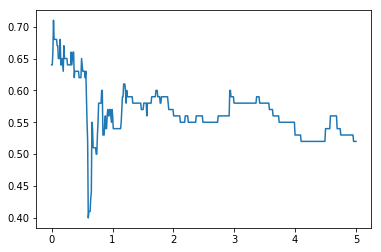

When lamba is 0.030060 , accuarcy get max is 0.710000


In [27]:
plt.plot(np.linspace(0,5,500),accuracy)
plt.show()
lamba1_max=np.linspace(0,5,500)[np.argmax(accuracy)]
print("When lamba is %f"% lamba1_max,", accuarcy get max is %f" % np.max(accuracy))

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7411e+02  2e+03  2e+00  2e+01  1e+00
 1: -1.0905e+01 -9.8433e+01  4e+02  7e-01  5e+00  1e+00
 2: -1.9125e+01 -7.6577e+01  3e+02  5e-01  3e+00  7e-01
 3: -2.8784e+01 -5.4641e+01  1e+02  2e-01  1e+00  3e-01
 4: -3.3091e+01 -4.6391e+01  6e+01  1e-01  8e-01  2e-01
 5: -3.5927e+01 -4.3372e+01  3e+01  6e-02  4e-01  8e-02
 6: -3.7969e+01 -4.1612e+01  2e+01  3e-02  2e-01  3e-02
 7: -3.9576e+01 -4.0680e+01  4e+00  9e-03  6e-02  8e-03
 8: -3.9875e+01 -4.0480e+01  2e+00  5e-03  3e-02  4e-03
 9: -4.0149e+01 -4.0411e+01  1e+00  2e-03  1e-02  1e-03
10: -4.0197e+01 -4.0402e+01  8e-01  2e-03  1e-02  1e-03
11: -4.0310e+01 -4.0393e+01  3e-01  7e-04  5e-03  4e-04
12: -4.0333e+01 -4.0391e+01  2e-01  5e-04  3e-03  2e-04
13: -4.0362e+01 -4.0392e+01  1e-01  2e-04  2e-03  1e-04
14: -4.0375e+01 -4.0390e+01  6e-02  1e-04  8e-04  6e-05
15: -4.0384e+01 -4.0388e+01  2e-02  4e-05  2e-04  2e-05
16: -4.0385e+01 -4.0388e+01  1e-02  2e-05  1e-04  

0         1         2         3         4         5         6  \
0 -1.521533 -1.428818 -1.071725 -0.416434 -0.301640  0.160602  1.040722   
1 -0.575548 -0.461082 -0.008143  0.846944  0.968767  1.554032  1.525491   
2  0.649360  0.790694  1.368836  2.470151  2.581239  2.308307  2.634125   
3  2.212886  2.386672  3.122564  4.568836  4.665223  4.278548  4.667771   
4  3.494114  3.706814  4.642065  4.757616  4.855917  4.880238  4.836750   
5  3.795056  4.054135  3.896948  4.882964  4.917346  4.943503  4.958380   
6  4.022180  3.835086  4.121122  4.777685  4.934211  4.957799  4.960892   
7  4.031111  4.037065  4.101254  4.778925  4.924380  4.959225  4.962475   
8  4.043140  4.035501  4.112146  4.777726  4.931793  4.958004  4.962839   
9  4.043034  4.038569  4.111936  4.777581  4.932693  4.959259  4.962594   

          7         8         9  
0  1.136659  1.194046  1.226776  
1  1.569665  1.579366  1.601589  
2  2.640918  2.663655  2.663585  
3  4.708923  4.709207  4.709157  
4  4.897604  4.898923  4.898850  
5  4.954654  4.960069  4.960017  
6  4.962627  4.961748  4.962569  
7  4.962785  4.962928  4.962770  
8  4.962915  4.962925  4.962950  
9  4.962938  4.962950  4.962887

 

Heatmap of inverse State Value Matrix



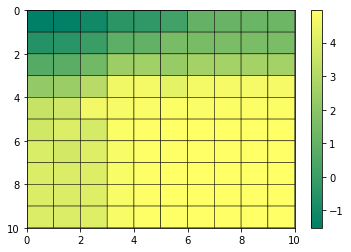

 

inverse Optimal action matrix using Reward function1 



0  1  2  3  4  5  6  7  8  9
0  ↓  ↓  ↓  ↓  ↓  ↓  ↓  →  ↑  ←
1  ↓  ↓  ↓  ↓  ↓  ↓  ↓  ↓  ↓  ↓
2  ↓  ↓  ↓  ↓  ↓  ↓  ↓  ↓  ↓  ↓
3  ↓  ↓  ↓  ↓  ↓  ↓  ↓  ↓  ↓  ↓
4  ↓  ↓  →  →  ↓  ↓  ↓  ↓  ↓  ↓
5  ↓  →  →  →  →  ↓  ↓  ↓  ↓  ↓
6  ↓  ←  →  →  →  →  ↓  ↓  ↓  ↓
7  ↓  ←  →  →  →  →  →  ↓  ↓  ↓
8  ←  ←  →  →  →  →  →  →  ←  ←
9  ↑  ←  →  →  →  →  →  ↑  ↑  ←

In [28]:
c[100:200]=-lamba1_max
Rew=solvers.lp(-c,D_p,b)
rew=np.matrix(Rew['x'][200:300])

inv_rf1=np.zeros((10,10))

for i in range(100):
    temp=np.where(S==i)
    inv_rf1[int(temp[0]),int(temp[1])]=rew[i]

#print the stateValueMatrix using inversed Rewardfunction1
print("inverse State Value Matrix using Reward function1 \n")
inv_SV_list1={}
inv_SV_matrix1=np.zeros((10,10))
inv_SV_list1,inv_SV_matrix1=get_stateValueMatrix(inv_rf1)
print(" \n")
print("Heatmap of inverse State Value Matrix\n")
PlotHeatmap(inv_SV_matrix1,'summer')
print(" \n")
print("inverse Optimal action matrix using Reward function1 \n")
inv_opt_action_list1={}
inv_opt_action_matrix1=np.zeros((10,10))
inv_opt_action_list1,inv_opt_action_matrix1= get_opt_actionMatrix(inv_SV_list1, inv_rf1)

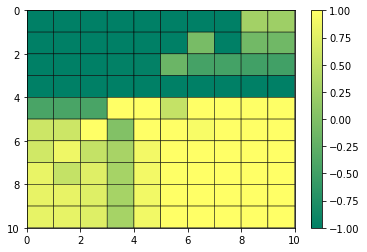

In [34]:
PlotHeatmap(inv_rf1,'summer')

# reward function2


     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  2e+01  1e+00
 1:  2.3437e+01 -2.1139e+04  2e+04  2e-02  2e+01  2e+00
 2:  3.9067e+01 -1.5687e+04  2e+04  1e-02  1e+01  3e+00
 3: -4.5156e+01 -7.1241e+03  9e+03  6e-03  5e+00  3e+00
 4: -3.8990e+02 -4.0974e+03  5e+03  3e-03  3e+00  3e+00
 5: -1.6667e+03 -5.6357e+03  9e+03  3e-03  3e+00  5e+00
 6: -2.1817e+03 -6.1237e+03  1e+04  3e-03  3e+00  6e+00
 7: -3.2758e+03 -5.7861e+03  8e+03  2e-03  2e+00  5e+00
 8: -4.2184e+03 -5.7268e+03  6e+03  1e-03  1e+00  4e+00
 9: -4.2513e+03 -5.5006e+03  5e+03  1e-03  9e-01  4e+00
10: -4.9769e+03 -5.4492e+03  2e+03  4e-04  3e-01  2e+00
11: -5.1688e+03 -5.4469e+03  1e+03  2e-04  2e-01  1e+00
12: -5.2332e+03 -5.4506e+03  1e+03  2e-04  2e-01  9e-01
13: -5.3787e+03 -5.4837e+03  5e+02  8e-05  8e-02  5e-01
14: -5.3813e+03 -5.4815e+03  5e+02  8e-05  7e-02  4e-01
15: -5.4715e+03 -5.5071e+03  2e+02  3e-05  3e-02  2e-01
16: -5.5074e+03 -5.5165e+03  5e+01  7e-06  7e-03  

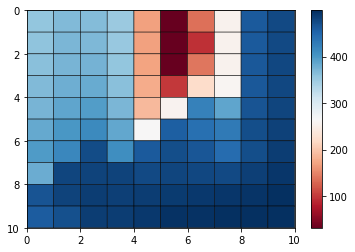

accuracy is 72.000000 lamba is 0.000000
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  2e+01  1e+00
 1:  2.4639e+01 -2.1129e+04  2e+04  2e-02  2e+01  2e+00
 2:  4.2787e+01 -1.5669e+04  2e+04  1e-02  1e+01  3e+00
 3: -3.7851e+01 -7.1156e+03  9e+03  6e-03  5e+00  3e+00
 4: -3.7282e+02 -4.0201e+03  5e+03  3e-03  3e+00  3e+00
 5: -1.6297e+03 -5.5943e+03  9e+03  3e-03  3e+00  5e+00
 6: -2.1263e+03 -6.0606e+03  1e+04  3e-03  3e+00  6e+00
 7: -3.1916e+03 -5.7140e+03  8e+03  2e-03  2e+00  5e+00
 8: -4.1365e+03 -5.6314e+03  6e+03  1e-03  1e+00  4e+00
 9: -4.1572e+03 -5.4107e+03  5e+03  1e-03  9e-01  4e+00
10: -4.8548e+03 -5.3581e+03  2e+03  4e-04  4e-01  2e+00
11: -5.0430e+03 -5.3503e+03  1e+03  2e-04  2e-01  1e+00
12: -5.1528e+03 -5.3638e+03  9e+02  2e-04  2e-01  8e-01
13: -5.2867e+03 -5.3870e+03  5e+02  8e-05  7e-02  4e-01
14: -5.3279e+03 -5.3955e+03  3e+02  5e-05  5e-02  3e-01
15: -5.4121e+03 -5.4279e+03  7e+01  1e-05  1e-02  7e-02
16: -5.425

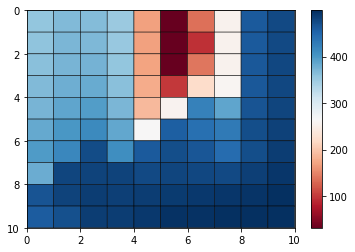

accuracy is 72.000000 lamba is 0.010020
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  2e+01  1e+00
 1:  2.5831e+01 -2.1118e+04  2e+04  2e-02  2e+01  2e+00
 2:  4.6470e+01 -1.5652e+04  2e+04  1e-02  1e+01  3e+00
 3: -3.0707e+01 -7.1065e+03  9e+03  6e-03  5e+00  3e+00
 4: -3.5648e+02 -3.9449e+03  5e+03  3e-03  3e+00  3e+00
 5: -1.5935e+03 -5.5527e+03  9e+03  3e-03  3e+00  5e+00
 6: -2.0730e+03 -5.9982e+03  1e+04  3e-03  3e+00  6e+00
 7: -3.1125e+03 -5.6434e+03  8e+03  2e-03  2e+00  5e+00
 8: -4.0524e+03 -5.5428e+03  6e+03  1e-03  1e+00  4e+00
 9: -4.0662e+03 -5.3265e+03  5e+03  1e-03  9e-01  4e+00
10: -4.7486e+03 -5.2760e+03  2e+03  4e-04  4e-01  2e+00
11: -4.9347e+03 -5.2604e+03  1e+03  3e-04  2e-01  1e+00
12: -5.0904e+03 -5.2813e+03  8e+02  2e-04  1e-01  7e-01
13: -5.2011e+03 -5.2974e+03  4e+02  8e-05  7e-02  4e-01
14: -5.2677e+03 -5.3194e+03  2e+02  4e-05  4e-02  2e-01
15: -5.3024e+03 -5.3325e+03  1e+02  2e-05  2e-02  1e-01
16: -5.339

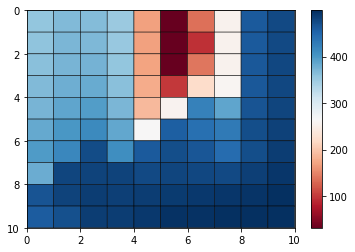

accuracy is 72.000000 lamba is 0.020040
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  2e+01  1e+00
 1:  2.7015e+01 -2.1108e+04  2e+04  2e-02  2e+01  2e+00
 2:  5.0116e+01 -1.5634e+04  2e+04  1e-02  1e+01  3e+00
 3: -2.3719e+01 -7.0968e+03  9e+03  6e-03  5e+00  3e+00
 4: -3.4083e+02 -3.8716e+03  5e+03  3e-03  3e+00  2e+00
 5: -1.5582e+03 -5.5108e+03  9e+03  3e-03  3e+00  5e+00
 6: -2.0215e+03 -5.9364e+03  1e+04  3e-03  3e+00  6e+00
 7: -3.0381e+03 -5.5741e+03  8e+03  2e-03  2e+00  5e+00
 8: -3.9577e+03 -5.4591e+03  6e+03  1e-03  1e+00  4e+00
 9: -3.9990e+03 -5.2654e+03  5e+03  1e-03  9e-01  4e+00
10: -4.6121e+03 -5.2025e+03  2e+03  5e-04  4e-01  2e+00
11: -4.7964e+03 -5.1674e+03  2e+03  3e-04  3e-01  1e+00
12: -4.9875e+03 -5.1936e+03  9e+02  2e-04  1e-01  8e-01
13: -5.0700e+03 -5.2034e+03  6e+02  1e-04  1e-01  5e-01
14: -5.1586e+03 -5.2314e+03  3e+02  6e-05  5e-02  3e-01
15: -5.1826e+03 -5.2354e+03  2e+02  4e-05  4e-02  2e-01
16: -5.219

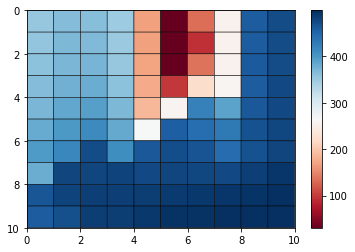

accuracy is 72.000000 lamba is 0.030060
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  2e+01  1e+00
 1:  2.8189e+01 -2.1097e+04  2e+04  2e-02  2e+01  2e+00
 2:  5.3726e+01 -1.5617e+04  2e+04  1e-02  1e+01  3e+00
 3: -1.6881e+01 -7.0864e+03  9e+03  6e-03  5e+00  3e+00
 4: -3.2583e+02 -3.8001e+03  5e+03  3e-03  2e+00  2e+00
 5: -1.5237e+03 -5.4683e+03  9e+03  3e-03  3e+00  5e+00
 6: -1.9717e+03 -5.8750e+03  1e+04  3e-03  3e+00  6e+00
 7: -2.9675e+03 -5.5058e+03  8e+03  2e-03  2e+00  5e+00
 8: -3.8578e+03 -5.3796e+03  6e+03  1e-03  1e+00  4e+00
 9: -3.9713e+03 -5.1759e+03  5e+03  1e-03  9e-01  4e+00
10: -4.6560e+03 -5.1160e+03  2e+03  4e-04  3e-01  1e+00
11: -4.8620e+03 -5.1167e+03  1e+03  2e-04  2e-01  8e-01
12: -4.9514e+03 -5.1297e+03  8e+02  1e-04  1e-01  6e-01
13: -5.0129e+03 -5.1351e+03  5e+02  1e-04  9e-02  5e-01
14: -5.0875e+03 -5.1553e+03  3e+02  5e-05  5e-02  3e-01
15: -5.1248e+03 -5.1650e+03  2e+02  3e-05  3e-02  2e-01
16: -5.152

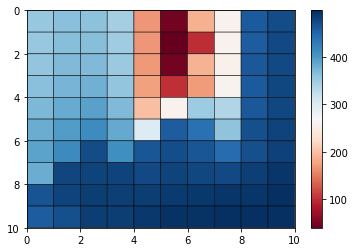

accuracy is 74.000000 lamba is 0.040080
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  2e+01  1e+00
 1:  2.9355e+01 -2.1087e+04  2e+04  2e-02  2e+01  2e+00
 2:  5.7300e+01 -1.5600e+04  2e+04  1e-02  1e+01  3e+00
 3: -1.0189e+01 -7.0754e+03  9e+03  6e-03  5e+00  3e+00
 4: -3.1146e+02 -3.7302e+03  5e+03  3e-03  2e+00  2e+00
 5: -1.4899e+03 -5.4253e+03  9e+03  3e-03  3e+00  5e+00
 6: -1.9234e+03 -5.8139e+03  1e+04  3e-03  3e+00  6e+00
 7: -2.9003e+03 -5.4382e+03  8e+03  2e-03  2e+00  5e+00
 8: -3.7682e+03 -5.3017e+03  6e+03  1e-03  1e+00  4e+00
 9: -3.9521e+03 -5.0849e+03  5e+03  9e-04  8e-01  3e+00
10: -4.6214e+03 -5.0423e+03  2e+03  3e-04  3e-01  1e+00
11: -4.8218e+03 -5.0454e+03  9e+02  2e-04  2e-01  7e-01
12: -4.8974e+03 -5.0566e+03  7e+02  1e-04  1e-01  6e-01
13: -4.9563e+03 -5.0619e+03  4e+02  8e-05  8e-02  4e-01
14: -5.0306e+03 -5.0817e+03  2e+02  4e-05  4e-02  2e-01
15: -5.0629e+03 -5.0899e+03  1e+02  2e-05  2e-02  1e-01
16: -5.089

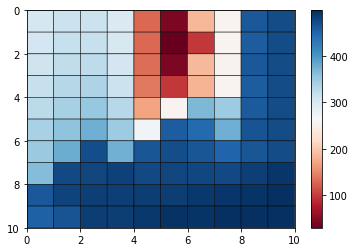

accuracy is 66.000000 lamba is 0.050100
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  2e+01  1e+00
 1:  3.0511e+01 -2.1076e+04  2e+04  2e-02  2e+01  2e+00
 2:  6.0840e+01 -1.5582e+04  2e+04  1e-02  1e+01  3e+00
 3: -3.6355e+00 -7.0638e+03  9e+03  6e-03  5e+00  3e+00
 4: -2.9767e+02 -3.6620e+03  5e+03  3e-03  2e+00  2e+00
 5: -1.4568e+03 -5.3818e+03  9e+03  3e-03  3e+00  5e+00
 6: -1.8766e+03 -5.7530e+03  1e+04  3e-03  3e+00  6e+00
 7: -2.8359e+03 -5.3712e+03  8e+03  2e-03  2e+00  5e+00
 8: -3.6862e+03 -5.2251e+03  6e+03  1e-03  1e+00  4e+00
 9: -3.9342e+03 -4.9979e+03  4e+03  9e-04  8e-01  3e+00
10: -4.5749e+03 -4.9710e+03  2e+03  3e-04  3e-01  1e+00
11: -4.7588e+03 -4.9729e+03  9e+02  2e-04  2e-01  7e-01
12: -4.8481e+03 -4.9875e+03  6e+02  1e-04  1e-01  5e-01
13: -4.8978e+03 -4.9882e+03  4e+02  7e-05  6e-02  3e-01
14: -4.9521e+03 -5.0031e+03  2e+02  4e-05  4e-02  2e-01
15: -4.9936e+03 -5.0177e+03  1e+02  2e-05  2e-02  1e-01
16: -4.997

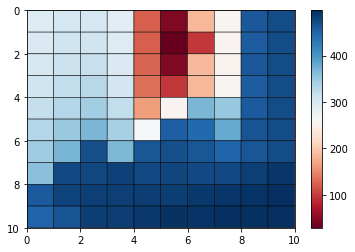

accuracy is 65.000000 lamba is 0.060120
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  2e+01  1e+00
 1:  3.1659e+01 -2.1066e+04  2e+04  2e-02  2e+01  2e+00
 2:  6.4345e+01 -1.5565e+04  2e+04  1e-02  1e+01  3e+00
 3:  2.7826e+00 -7.0516e+03  9e+03  6e-03  5e+00  3e+00
 4: -2.8444e+02 -3.5954e+03  5e+03  3e-03  2e+00  2e+00
 5: -1.4243e+03 -5.3376e+03  9e+03  3e-03  3e+00  5e+00
 6: -1.8311e+03 -5.6922e+03  1e+04  3e-03  3e+00  6e+00
 7: -2.7739e+03 -5.3047e+03  8e+03  2e-03  2e+00  5e+00
 8: -3.6101e+03 -5.1496e+03  6e+03  1e-03  1e+00  4e+00
 9: -3.9151e+03 -4.9145e+03  4e+03  8e-04  7e-01  3e+00
10: -4.5234e+03 -4.8996e+03  2e+03  3e-04  3e-01  1e+00
11: -4.6994e+03 -4.9001e+03  8e+02  2e-04  1e-01  7e-01
12: -4.7869e+03 -4.9157e+03  5e+02  1e-04  9e-02  5e-01
13: -4.8317e+03 -4.9180e+03  4e+02  7e-05  6e-02  3e-01
14: -4.8953e+03 -4.9350e+03  2e+02  3e-05  3e-02  1e-01
15: -4.9275e+03 -4.9433e+03  7e+01  1e-05  1e-02  7e-02
16: -4.928

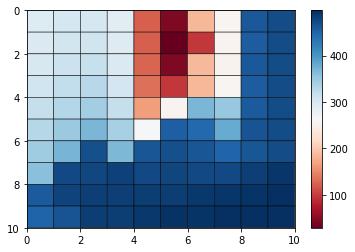

accuracy is 65.000000 lamba is 0.070140
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  2e+01  1e+00
 1:  3.2799e+01 -2.1056e+04  2e+04  2e-02  1e+01  2e+00
 2:  6.7816e+01 -1.5548e+04  2e+04  1e-02  1e+01  3e+00
 3:  9.0703e+00 -7.0389e+03  9e+03  6e-03  5e+00  3e+00
 4: -2.7139e+02 -3.5345e+03  4e+03  3e-03  2e+00  2e+00
 5: -1.3925e+03 -5.2913e+03  9e+03  3e-03  3e+00  4e+00
 6: -1.7869e+03 -5.6303e+03  1e+04  3e-03  3e+00  6e+00
 7: -2.7142e+03 -5.2383e+03  8e+03  2e-03  2e+00  5e+00
 8: -3.5385e+03 -5.0749e+03  6e+03  1e-03  1e+00  4e+00
 9: -3.8578e+03 -4.8591e+03  4e+03  8e-04  7e-01  3e+00
10: -4.4461e+03 -4.8345e+03  2e+03  3e-04  3e-01  1e+00
11: -4.6034e+03 -4.8296e+03  9e+02  2e-04  2e-01  7e-01
12: -4.7147e+03 -4.8438e+03  5e+02  1e-04  9e-02  4e-01
13: -4.7609e+03 -4.8467e+03  4e+02  7e-05  6e-02  3e-01
14: -4.8423e+03 -4.8661e+03  1e+02  2e-05  2e-02  9e-02
15: -4.8605e+03 -4.8707e+03  4e+01  8e-06  7e-03  4e-02
16: -4.864

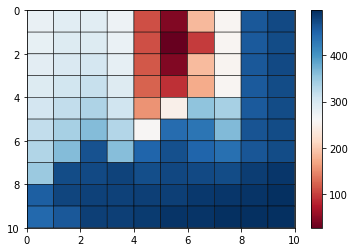

accuracy is 66.000000 lamba is 0.080160
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  2e+01  1e+00
 1:  3.3930e+01 -2.1045e+04  2e+04  2e-02  1e+01  2e+00
 2:  7.1254e+01 -1.5531e+04  2e+04  1e-02  1e+01  3e+00
 3:  1.5232e+01 -7.0256e+03  9e+03  6e-03  5e+00  3e+00
 4: -2.5655e+02 -3.5049e+03  4e+03  3e-03  2e+00  2e+00
 5: -1.3614e+03 -5.2344e+03  9e+03  3e-03  3e+00  4e+00
 6: -1.7439e+03 -5.5612e+03  1e+04  3e-03  3e+00  6e+00
 7: -2.6591e+03 -5.1691e+03  8e+03  2e-03  2e+00  5e+00
 8: -3.4702e+03 -5.0011e+03  6e+03  1e-03  1e+00  4e+00
 9: -3.7958e+03 -4.8052e+03  4e+03  8e-04  7e-01  3e+00
10: -4.3761e+03 -4.7713e+03  2e+03  3e-04  3e-01  1e+00
11: -4.5201e+03 -4.7613e+03  1e+03  2e-04  2e-01  8e-01
12: -4.6284e+03 -4.7702e+03  6e+02  1e-04  1e-01  5e-01
13: -4.7096e+03 -4.7845e+03  3e+02  6e-05  5e-02  3e-01
14: -4.7410e+03 -4.7856e+03  2e+02  4e-05  3e-02  2e-01
15: -4.7857e+03 -4.7975e+03  5e+01  9e-06  8e-03  4e-02
16: -4.794

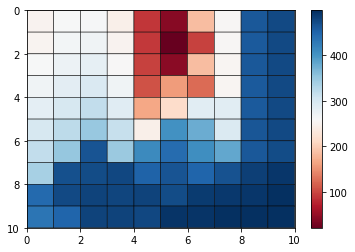

accuracy is 67.000000 lamba is 0.090180
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  2e+01  1e+00
 1:  3.5053e+01 -2.1035e+04  2e+04  2e-02  1e+01  2e+00
 2:  7.4660e+01 -1.5514e+04  2e+04  1e-02  1e+01  3e+00
 3:  2.1272e+01 -7.0118e+03  8e+03  6e-03  5e+00  3e+00
 4: -2.4224e+02 -3.4782e+03  4e+03  3e-03  2e+00  2e+00
 5: -1.3309e+03 -5.1760e+03  9e+03  3e-03  3e+00  4e+00
 6: -1.7023e+03 -5.4916e+03  1e+04  3e-03  3e+00  6e+00
 7: -2.6030e+03 -5.1010e+03  8e+03  2e-03  2e+00  5e+00
 8: -3.3995e+03 -4.9281e+03  6e+03  1e-03  1e+00  4e+00
 9: -3.7375e+03 -4.7532e+03  4e+03  8e-04  7e-01  3e+00
10: -4.2945e+03 -4.7091e+03  2e+03  3e-04  3e-01  1e+00
11: -4.4421e+03 -4.6945e+03  1e+03  2e-04  2e-01  8e-01
12: -4.5628e+03 -4.6967e+03  5e+02  1e-04  1e-01  4e-01
13: -4.6447e+03 -4.7108e+03  3e+02  5e-05  5e-02  2e-01
14: -4.6785e+03 -4.7151e+03  2e+02  3e-05  3e-02  1e-01
15: -4.7143e+03 -4.7244e+03  4e+01  8e-06  7e-03  4e-02
16: -4.723

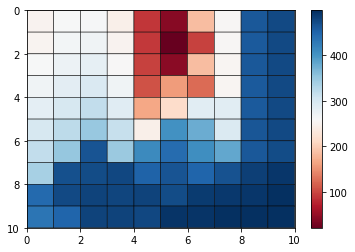

accuracy is 67.000000 lamba is 0.100200
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  2e+01  1e+00
 1:  3.6167e+01 -2.1024e+04  2e+04  2e-02  1e+01  2e+00
 2:  7.8034e+01 -1.5497e+04  2e+04  1e-02  1e+01  3e+00
 3:  2.7194e+01 -6.9976e+03  8e+03  6e-03  5e+00  3e+00
 4: -2.2858e+02 -3.4526e+03  4e+03  3e-03  2e+00  2e+00
 5: -1.3010e+03 -5.1168e+03  8e+03  3e-03  3e+00  4e+00
 6: -1.6620e+03 -5.4216e+03  1e+04  3e-03  3e+00  6e+00
 7: -2.5399e+03 -5.0367e+03  8e+03  2e-03  2e+00  5e+00
 8: -3.3167e+03 -4.8563e+03  6e+03  1e-03  1e+00  4e+00
 9: -3.6616e+03 -4.7020e+03  4e+03  8e-04  7e-01  3e+00
10: -4.1957e+03 -4.6444e+03  2e+03  4e-04  3e-01  1e+00
11: -4.3730e+03 -4.6265e+03  1e+03  2e-04  2e-01  8e-01
12: -4.4943e+03 -4.6223e+03  5e+02  1e-04  9e-02  4e-01
13: -4.5541e+03 -4.6321e+03  3e+02  6e-05  6e-02  3e-01
14: -4.5987e+03 -4.6422e+03  2e+02  3e-05  3e-02  2e-01
15: -4.6266e+03 -4.6459e+03  8e+01  2e-05  1e-02  8e-02
16: -4.644

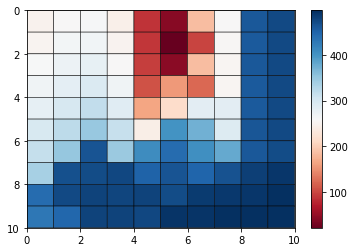

accuracy is 67.000000 lamba is 0.110220
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  2e+01  1e+00
 1:  3.7273e+01 -2.1014e+04  2e+04  2e-02  1e+01  2e+00
 2:  8.1376e+01 -1.5480e+04  2e+04  1e-02  1e+01  3e+00
 3:  3.3003e+01 -6.9828e+03  8e+03  6e-03  5e+00  3e+00
 4: -2.1551e+02 -3.4278e+03  4e+03  3e-03  2e+00  2e+00
 5: -1.2717e+03 -5.0566e+03  8e+03  3e-03  3e+00  4e+00
 6: -1.6230e+03 -5.3514e+03  1e+04  3e-03  3e+00  6e+00
 7: -2.4772e+03 -4.9729e+03  8e+03  2e-03  2e+00  5e+00
 8: -3.2359e+03 -4.7849e+03  6e+03  1e-03  1e+00  4e+00
 9: -3.5680e+03 -4.6411e+03  4e+03  9e-04  8e-01  3e+00
10: -4.1068e+03 -4.5753e+03  2e+03  4e-04  3e-01  1e+00
11: -4.3185e+03 -4.5554e+03  9e+02  2e-04  2e-01  7e-01
12: -4.4215e+03 -4.5494e+03  5e+02  1e-04  9e-02  5e-01
13: -4.4773e+03 -4.5580e+03  3e+02  6e-05  6e-02  3e-01
14: -4.5386e+03 -4.5726e+03  1e+02  3e-05  2e-02  1e-01
15: -4.5522e+03 -4.5740e+03  9e+01  2e-05  2e-02  8e-02
16: -4.571

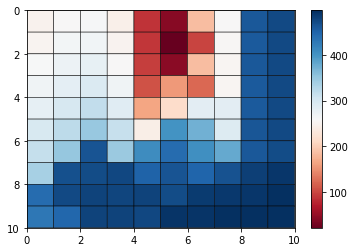

accuracy is 67.000000 lamba is 0.120240
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  2e+01  1e+00
 1:  3.8372e+01 -2.1004e+04  2e+04  2e-02  1e+01  2e+00
 2:  8.4593e+01 -1.5474e+04  2e+04  1e-02  1e+01  3e+00
 3:  3.8749e+01 -6.9730e+03  8e+03  6e-03  5e+00  3e+00
 4: -2.0242e+02 -3.4032e+03  4e+03  3e-03  2e+00  2e+00
 5: -1.2430e+03 -4.9969e+03  8e+03  3e-03  3e+00  4e+00
 6: -1.5846e+03 -5.2818e+03  1e+04  3e-03  3e+00  6e+00
 7: -2.4156e+03 -4.9098e+03  8e+03  2e-03  2e+00  5e+00
 8: -3.1562e+03 -4.7142e+03  6e+03  1e-03  1e+00  4e+00
 9: -3.4795e+03 -4.5777e+03  4e+03  9e-04  8e-01  3e+00
10: -4.0279e+03 -4.5044e+03  2e+03  4e-04  3e-01  1e+00
11: -4.2731e+03 -4.4843e+03  8e+02  2e-04  1e-01  7e-01
12: -4.3570e+03 -4.4782e+03  5e+02  1e-04  9e-02  4e-01
13: -4.4272e+03 -4.4896e+03  3e+02  5e-05  4e-02  2e-01
14: -4.4754e+03 -4.5009e+03  1e+02  2e-05  2e-02  1e-01
15: -4.4948e+03 -4.5058e+03  5e+01  9e-06  8e-03  4e-02
16: -4.502

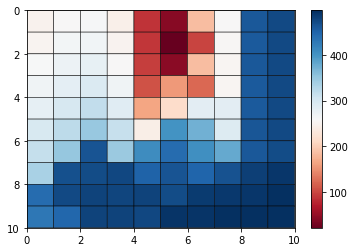

accuracy is 67.000000 lamba is 0.130261
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  2e+01  1e+00
 1:  3.9462e+01 -2.0993e+04  2e+04  2e-02  1e+01  2e+00
 2:  8.7753e+01 -1.5470e+04  2e+04  1e-02  1e+01  3e+00
 3:  4.4375e+01 -6.9632e+03  8e+03  6e-03  5e+00  3e+00
 4: -1.8987e+02 -3.3795e+03  4e+03  3e-03  2e+00  2e+00
 5: -1.2148e+03 -4.9360e+03  8e+03  3e-03  3e+00  4e+00
 6: -1.5474e+03 -5.2117e+03  1e+04  3e-03  3e+00  5e+00
 7: -2.3547e+03 -4.8469e+03  8e+03  2e-03  2e+00  5e+00
 8: -3.0774e+03 -4.6439e+03  6e+03  1e-03  1e+00  4e+00
 9: -3.3953e+03 -4.5127e+03  4e+03  9e-04  8e-01  3e+00
10: -3.9563e+03 -4.4324e+03  2e+03  4e-04  3e-01  1e+00
11: -4.2143e+03 -4.4151e+03  8e+02  2e-04  1e-01  6e-01
12: -4.2958e+03 -4.4117e+03  5e+02  9e-05  8e-02  4e-01
13: -4.3574e+03 -4.4184e+03  2e+02  5e-05  4e-02  2e-01
14: -4.3927e+03 -4.4259e+03  1e+02  3e-05  2e-02  1e-01
15: -4.4187e+03 -4.4327e+03  6e+01  1e-05  1e-02  5e-02
16: -4.428

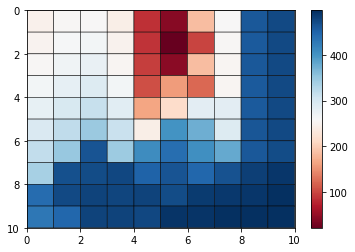

accuracy is 67.000000 lamba is 0.140281
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  2e+01  1e+00
 1:  4.0544e+01 -2.0983e+04  2e+04  2e-02  1e+01  2e+00
 2:  9.0874e+01 -1.5467e+04  2e+04  1e-02  1e+01  3e+00
 3:  4.9875e+01 -6.9524e+03  8e+03  6e-03  5e+00  3e+00
 4: -1.7792e+02 -3.3567e+03  4e+03  3e-03  2e+00  2e+00
 5: -1.1871e+03 -4.8737e+03  8e+03  3e-03  3e+00  4e+00
 6: -1.5113e+03 -5.1409e+03  9e+03  3e-03  3e+00  5e+00
 7: -2.2945e+03 -4.7840e+03  8e+03  2e-03  2e+00  5e+00
 8: -3.0028e+03 -4.5737e+03  6e+03  1e-03  1e+00  4e+00
 9: -3.3160e+03 -4.4470e+03  4e+03  9e-04  8e-01  3e+00
10: -3.8883e+03 -4.3600e+03  2e+03  4e-04  3e-01  1e+00
11: -4.1440e+03 -4.3451e+03  8e+02  2e-04  1e-01  6e-01
12: -4.2369e+03 -4.3445e+03  4e+02  9e-05  8e-02  4e-01
13: -4.3014e+03 -4.3536e+03  2e+02  4e-05  4e-02  2e-01
14: -4.3408e+03 -4.3601e+03  8e+01  2e-05  1e-02  7e-02
15: -4.3490e+03 -4.3612e+03  5e+01  1e-05  9e-03  5e-02
16: -4.361

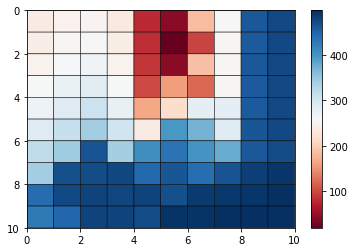

accuracy is 69.000000 lamba is 0.150301
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  2e+01  1e+00
 1:  4.1619e+01 -2.0973e+04  2e+04  2e-02  1e+01  2e+00
 2:  9.3956e+01 -1.5463e+04  2e+04  1e-02  1e+01  3e+00
 3:  5.5253e+01 -6.9407e+03  8e+03  6e-03  5e+00  3e+00
 4: -1.6652e+02 -3.3347e+03  4e+03  3e-03  2e+00  2e+00
 5: -1.1598e+03 -4.8100e+03  8e+03  3e-03  3e+00  4e+00
 6: -1.4764e+03 -5.0692e+03  9e+03  3e-03  3e+00  5e+00
 7: -2.2351e+03 -4.7210e+03  8e+03  2e-03  2e+00  5e+00
 8: -2.9336e+03 -4.5036e+03  6e+03  1e-03  1e+00  4e+00
 9: -3.2417e+03 -4.3805e+03  4e+03  9e-04  8e-01  3e+00
10: -3.7979e+03 -4.2918e+03  2e+03  4e-04  3e-01  2e+00
11: -4.0720e+03 -4.2782e+03  8e+02  2e-04  1e-01  7e-01
12: -4.1992e+03 -4.2785e+03  3e+02  6e-05  6e-02  3e-01
13: -4.2420e+03 -4.2873e+03  2e+02  4e-05  3e-02  2e-01
14: -4.2739e+03 -4.2914e+03  7e+01  1e-05  1e-02  7e-02
15: -4.2909e+03 -4.2957e+03  2e+01  4e-06  3e-03  2e-02
16: -4.296

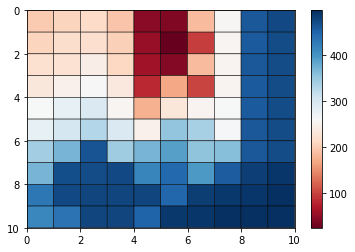

accuracy is 72.000000 lamba is 0.160321
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  2e+01  1e+00
 1:  4.2686e+01 -2.0962e+04  2e+04  2e-02  1e+01  2e+00
 2:  9.7000e+01 -1.5459e+04  2e+04  1e-02  1e+01  3e+00
 3:  6.0513e+01 -6.9281e+03  8e+03  6e-03  5e+00  3e+00
 4: -1.5565e+02 -3.3134e+03  4e+03  3e-03  2e+00  2e+00
 5: -1.1330e+03 -4.7448e+03  8e+03  3e-03  3e+00  4e+00
 6: -1.4425e+03 -4.9967e+03  9e+03  3e-03  3e+00  5e+00
 7: -2.1767e+03 -4.6577e+03  8e+03  2e-03  2e+00  5e+00
 8: -2.8704e+03 -4.4334e+03  6e+03  1e-03  1e+00  4e+00
 9: -3.1720e+03 -4.3134e+03  4e+03  9e-04  8e-01  3e+00
10: -3.7151e+03 -4.2234e+03  2e+03  4e-04  4e-01  2e+00
11: -4.0085e+03 -4.2119e+03  8e+02  2e-04  1e-01  7e-01
12: -4.1377e+03 -4.2136e+03  3e+02  6e-05  5e-02  3e-01
13: -4.1797e+03 -4.2223e+03  2e+02  3e-05  3e-02  2e-01
14: -4.2030e+03 -4.2235e+03  8e+01  2e-05  1e-02  8e-02
15: -4.2219e+03 -4.2287e+03  3e+01  5e-06  5e-03  3e-02
16: -4.227

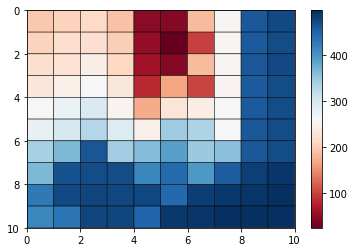

accuracy is 71.000000 lamba is 0.170341
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  2e+01  1e+00
 1:  4.3745e+01 -2.0952e+04  2e+04  2e-02  1e+01  2e+00
 2:  1.0001e+02 -1.5455e+04  2e+04  1e-02  1e+01  3e+00
 3:  6.5659e+01 -6.9147e+03  8e+03  6e-03  5e+00  3e+00
 4: -1.4525e+02 -3.2927e+03  4e+03  3e-03  2e+00  2e+00
 5: -1.0939e+03 -4.6596e+03  8e+03  3e-03  3e+00  4e+00
 6: -1.3836e+03 -4.8481e+03  9e+03  3e-03  2e+00  5e+00
 7: -2.1693e+03 -4.5681e+03  7e+03  2e-03  2e+00  5e+00
 8: -2.8191e+03 -4.3627e+03  5e+03  1e-03  1e+00  4e+00
 9: -3.1148e+03 -4.2411e+03  4e+03  9e-04  8e-01  3e+00
10: -3.6514e+03 -4.1564e+03  2e+03  4e-04  4e-01  2e+00
11: -3.9423e+03 -4.1464e+03  8e+02  2e-04  1e-01  7e-01
12: -4.0531e+03 -4.1488e+03  4e+02  8e-05  7e-02  3e-01
13: -4.1095e+03 -4.1560e+03  2e+02  4e-05  3e-02  2e-01
14: -4.1270e+03 -4.1563e+03  1e+02  2e-05  2e-02  1e-01
15: -4.1542e+03 -4.1625e+03  3e+01  7e-06  6e-03  3e-02
16: -4.160

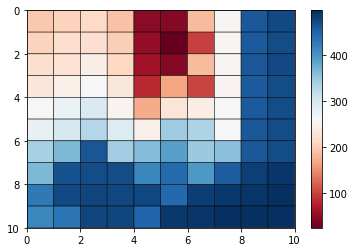

accuracy is 71.000000 lamba is 0.180361
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  2e+01  1e+00
 1:  4.4797e+01 -2.0942e+04  2e+04  2e-02  1e+01  2e+00
 2:  1.0298e+02 -1.5452e+04  2e+04  1e-02  1e+01  3e+00
 3:  7.0695e+01 -6.9004e+03  8e+03  6e-03  5e+00  3e+00
 4: -1.3531e+02 -3.2725e+03  4e+03  3e-03  2e+00  2e+00
 5: -1.0490e+03 -4.5650e+03  8e+03  3e-03  2e+00  4e+00
 6: -1.3518e+03 -4.7117e+03  8e+03  3e-03  2e+00  5e+00
 7: -2.1262e+03 -4.5034e+03  7e+03  2e-03  2e+00  5e+00
 8: -2.7569e+03 -4.2937e+03  5e+03  1e-03  1e+00  4e+00
 9: -3.0530e+03 -4.1723e+03  4e+03  9e-04  8e-01  3e+00
10: -3.5803e+03 -4.0885e+03  2e+03  4e-04  4e-01  2e+00
11: -3.8683e+03 -4.0816e+03  8e+02  2e-04  1e-01  7e-01
12: -3.9882e+03 -4.0830e+03  4e+02  8e-05  7e-02  3e-01
13: -4.0502e+03 -4.0892e+03  2e+02  3e-05  3e-02  1e-01
14: -4.0749e+03 -4.0929e+03  7e+01  1e-05  1e-02  7e-02
15: -4.0916e+03 -4.0970e+03  2e+01  4e-06  4e-03  2e-02
16: -4.094

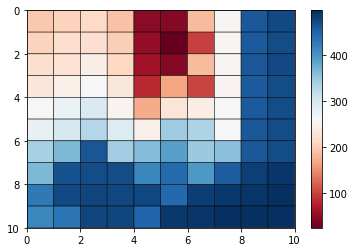

accuracy is 71.000000 lamba is 0.190381
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  2e+01  1e+00
 1:  4.5841e+01 -2.0931e+04  2e+04  2e-02  1e+01  2e+00
 2:  1.0591e+02 -1.5448e+04  2e+04  1e-02  1e+01  3e+00
 3:  7.5624e+01 -6.8852e+03  8e+03  6e-03  5e+00  3e+00
 4: -1.2580e+02 -3.2529e+03  4e+03  3e-03  2e+00  2e+00
 5: -1.0061e+03 -4.4721e+03  7e+03  3e-03  2e+00  4e+00
 6: -1.3449e+03 -4.6019e+03  8e+03  3e-03  2e+00  5e+00
 7: -2.0395e+03 -4.4467e+03  7e+03  2e-03  2e+00  5e+00
 8: -2.6916e+03 -4.2211e+03  5e+03  1e-03  1e+00  4e+00
 9: -2.9836e+03 -4.1074e+03  4e+03  9e-04  8e-01  3e+00
10: -3.5001e+03 -4.0191e+03  2e+03  4e-04  4e-01  2e+00
11: -3.7832e+03 -4.0176e+03  9e+02  2e-04  2e-01  7e-01
12: -3.9188e+03 -4.0173e+03  4e+02  8e-05  7e-02  3e-01
13: -3.9934e+03 -4.0243e+03  1e+02  2e-05  2e-02  1e-01
14: -4.0055e+03 -4.0264e+03  8e+01  2e-05  1e-02  8e-02
15: -4.0210e+03 -4.0295e+03  3e+01  7e-06  6e-03  3e-02
16: -4.028

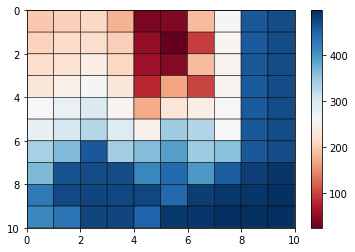

accuracy is 72.000000 lamba is 0.200401
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  2e+01  1e+00
 1:  4.6878e+01 -2.0921e+04  2e+04  2e-02  1e+01  2e+00
 2:  1.0881e+02 -1.5444e+04  2e+04  1e-02  1e+01  3e+00
 3:  8.0449e+01 -6.8693e+03  8e+03  6e-03  5e+00  3e+00
 4: -1.1669e+02 -3.2337e+03  4e+03  2e-03  2e+00  2e+00
 5: -9.6494e+02 -4.3807e+03  7e+03  3e-03  2e+00  4e+00
 6: -1.3536e+03 -4.5038e+03  8e+03  3e-03  2e+00  4e+00
 7: -1.9375e+03 -4.3858e+03  7e+03  2e-03  2e+00  4e+00
 8: -2.6559e+03 -4.1437e+03  5e+03  1e-03  1e+00  3e+00
 9: -2.9226e+03 -4.0418e+03  4e+03  9e-04  8e-01  3e+00
10: -3.4313e+03 -3.9515e+03  2e+03  4e-04  4e-01  2e+00
11: -3.7110e+03 -3.9531e+03  1e+03  2e-04  2e-01  8e-01
12: -3.8573e+03 -3.9512e+03  4e+02  8e-05  7e-02  3e-01
13: -3.9284e+03 -3.9576e+03  1e+02  2e-05  2e-02  1e-01
14: -3.9390e+03 -3.9595e+03  8e+01  2e-05  1e-02  8e-02
15: -3.9527e+03 -3.9632e+03  4e+01  8e-06  7e-03  4e-02
16: -3.962

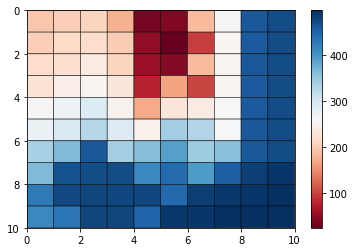

accuracy is 72.000000 lamba is 0.210421
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  2e+01  1e+00
 1:  4.7908e+01 -2.0911e+04  2e+04  2e-02  1e+01  2e+00
 2:  1.1167e+02 -1.5441e+04  2e+04  1e-02  1e+01  3e+00
 3:  8.5174e+01 -6.8526e+03  8e+03  6e-03  5e+00  3e+00
 4: -1.0795e+02 -3.2148e+03  4e+03  2e-03  2e+00  2e+00
 5: -9.2545e+02 -4.2907e+03  7e+03  3e-03  2e+00  4e+00
 6: -1.3752e+03 -4.4117e+03  8e+03  2e-03  2e+00  4e+00
 7: -1.8393e+03 -4.3181e+03  7e+03  2e-03  2e+00  4e+00
 8: -2.6545e+03 -4.0625e+03  5e+03  1e-03  1e+00  3e+00
 9: -2.8794e+03 -3.9767e+03  4e+03  9e-04  8e-01  3e+00
10: -3.3781e+03 -3.8874e+03  2e+03  4e-04  4e-01  2e+00
11: -3.6475e+03 -3.8880e+03  9e+02  2e-04  2e-01  8e-01
12: -3.8037e+03 -3.8858e+03  3e+02  7e-05  6e-02  3e-01
13: -3.8663e+03 -3.8930e+03  1e+02  2e-05  2e-02  1e-01
14: -3.8760e+03 -3.8944e+03  7e+01  1e-05  1e-02  7e-02
15: -3.8915e+03 -3.8982e+03  3e+01  5e-06  5e-03  3e-02
16: -3.897

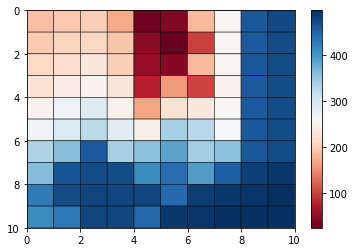

accuracy is 71.000000 lamba is 0.220441
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  2e+01  1e+00
 1:  4.8930e+01 -2.0901e+04  2e+04  2e-02  1e+01  2e+00
 2:  1.1450e+02 -1.5437e+04  2e+04  1e-02  1e+01  3e+00
 3:  8.9802e+01 -6.8352e+03  8e+03  6e-03  5e+00  3e+00
 4: -9.9567e+01 -3.1963e+03  4e+03  2e-03  2e+00  2e+00
 5: -8.8749e+02 -4.2019e+03  7e+03  3e-03  2e+00  4e+00
 6: -1.4088e+03 -4.3233e+03  7e+03  2e-03  2e+00  4e+00
 7: -1.7589e+03 -4.2437e+03  7e+03  2e-03  2e+00  4e+00
 8: -2.6158e+03 -3.9973e+03  5e+03  1e-03  1e+00  3e+00
 9: -2.8794e+03 -3.9293e+03  4e+03  8e-04  7e-01  3e+00
10: -3.3257e+03 -3.8225e+03  2e+03  4e-04  3e-01  2e+00
11: -3.5885e+03 -3.8230e+03  9e+02  2e-04  2e-01  7e-01
12: -3.7454e+03 -3.8214e+03  3e+02  6e-05  5e-02  3e-01
13: -3.8071e+03 -3.8299e+03  9e+01  2e-05  2e-02  9e-02
14: -3.8155e+03 -3.8312e+03  6e+01  1e-05  1e-02  6e-02
15: -3.8269e+03 -3.8340e+03  3e+01  6e-06  5e-03  3e-02
16: -3.833

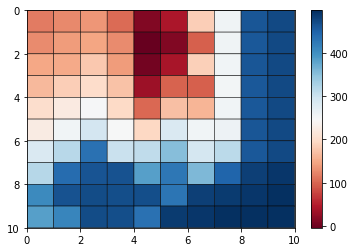

accuracy is 69.000000 lamba is 0.230461
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  2e+01  1e+00
 1:  4.9946e+01 -2.0890e+04  2e+04  2e-02  1e+01  2e+00
 2:  1.1729e+02 -1.5433e+04  2e+04  1e-02  1e+01  3e+00
 3:  9.4335e+01 -6.8170e+03  8e+03  6e-03  5e+00  3e+00
 4: -9.1520e+01 -3.1781e+03  4e+03  2e-03  2e+00  2e+00
 5: -8.5096e+02 -4.1143e+03  7e+03  3e-03  2e+00  3e+00
 6: -1.4548e+03 -4.2372e+03  7e+03  2e-03  2e+00  4e+00
 7: -1.7110e+03 -4.1636e+03  7e+03  2e-03  2e+00  4e+00
 8: -2.5122e+03 -3.9504e+03  5e+03  1e-03  1e+00  3e+00
 9: -2.9387e+03 -3.8697e+03  4e+03  7e-04  6e-01  2e+00
10: -3.1394e+03 -3.7321e+03  2e+03  5e-04  4e-01  2e+00
11: -3.5123e+03 -3.7495e+03  9e+02  2e-04  2e-01  8e-01
12: -3.6696e+03 -3.7538e+03  3e+02  7e-05  6e-02  3e-01
13: -3.7420e+03 -3.7666e+03  1e+02  2e-05  2e-02  9e-02
14: -3.7549e+03 -3.7692e+03  6e+01  1e-05  1e-02  5e-02
15: -3.7673e+03 -3.7717e+03  2e+01  4e-06  3e-03  2e-02
16: -3.771

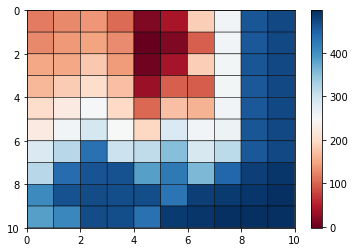

accuracy is 71.000000 lamba is 0.240481
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  2e+01  1e+00
 1:  5.0954e+01 -2.0880e+04  2e+04  2e-02  1e+01  2e+00
 2:  1.2006e+02 -1.5430e+04  2e+04  1e-02  1e+01  3e+00
 3:  9.8776e+01 -6.7981e+03  8e+03  6e-03  5e+00  3e+00
 4: -8.3789e+01 -3.1601e+03  4e+03  2e-03  2e+00  2e+00
 5: -8.1575e+02 -4.0277e+03  7e+03  3e-03  2e+00  3e+00
 6: -1.5142e+03 -4.1528e+03  7e+03  2e-03  2e+00  4e+00
 7: -1.7484e+03 -4.0713e+03  7e+03  2e-03  2e+00  4e+00
 8: -2.5112e+03 -3.8680e+03  5e+03  1e-03  9e-01  3e+00
 9: -2.8187e+03 -3.7941e+03  4e+03  8e-04  7e-01  3e+00
10: -3.2197e+03 -3.6854e+03  2e+03  4e-04  3e-01  1e+00
11: -3.4756e+03 -3.6923e+03  8e+02  2e-04  2e-01  7e-01
12: -3.6226e+03 -3.6943e+03  3e+02  6e-05  5e-02  2e-01
13: -3.6821e+03 -3.7047e+03  9e+01  2e-05  2e-02  8e-02
14: -3.6993e+03 -3.7078e+03  3e+01  7e-06  6e-03  3e-02
15: -3.7068e+03 -3.7095e+03  1e+01  2e-06  2e-03  1e-02
16: -3.709

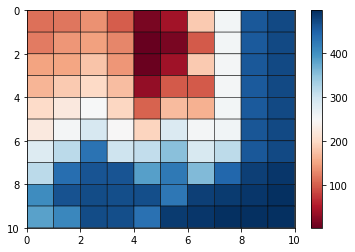

accuracy is 72.000000 lamba is 0.250501
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  2e+01  1e+00
 1:  5.1956e+01 -2.0870e+04  2e+04  2e-02  1e+01  2e+00
 2:  1.2279e+02 -1.5426e+04  2e+04  1e-02  1e+01  3e+00
 3:  1.0313e+02 -6.7785e+03  8e+03  6e-03  5e+00  3e+00
 4: -7.6357e+01 -3.1423e+03  4e+03  2e-03  2e+00  2e+00
 5: -7.8178e+02 -3.9420e+03  6e+03  3e-03  2e+00  3e+00
 6: -1.5475e+03 -4.0632e+03  7e+03  2e-03  2e+00  4e+00
 7: -1.8859e+03 -4.0326e+03  7e+03  2e-03  1e+00  5e+00
 8: -2.5459e+03 -3.7558e+03  4e+03  1e-03  8e-01  3e+00
 9: -2.8216e+03 -3.6453e+03  3e+03  7e-04  6e-01  2e+00
10: -3.2968e+03 -3.6336e+03  1e+03  3e-04  2e-01  1e+00
11: -3.4786e+03 -3.6291e+03  6e+02  1e-04  1e-01  5e-01
12: -3.5914e+03 -3.6386e+03  2e+02  4e-05  3e-02  2e-01
13: -3.6208e+03 -3.6419e+03  8e+01  2e-05  1e-02  8e-02
14: -3.6258e+03 -3.6426e+03  7e+01  1e-05  1e-02  6e-02
15: -3.6391e+03 -3.6457e+03  3e+01  5e-06  5e-03  3e-02
16: -3.644

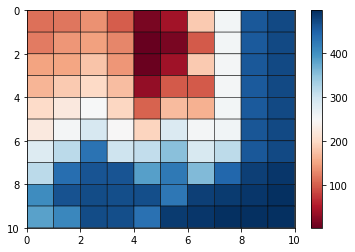

accuracy is 72.000000 lamba is 0.260521
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  2e+01  1e+00
 1:  5.2951e+01 -2.0860e+04  2e+04  2e-02  1e+01  2e+00
 2:  1.2549e+02 -1.5422e+04  2e+04  1e-02  1e+01  3e+00
 3:  1.0739e+02 -6.7583e+03  8e+03  5e-03  5e+00  3e+00
 4: -6.9210e+01 -3.1247e+03  4e+03  2e-03  2e+00  2e+00
 5: -7.4897e+02 -3.8572e+03  6e+03  2e-03  2e+00  3e+00
 6: -1.4809e+03 -3.9598e+03  7e+03  2e-03  2e+00  4e+00
 7: -1.7387e+03 -3.9048e+03  6e+03  2e-03  1e+00  4e+00
 8: -2.2643e+03 -3.7718e+03  5e+03  1e-03  1e+00  3e+00
 9: -2.8127e+03 -3.6871e+03  3e+03  7e-04  6e-01  2e+00
10: -2.8576e+03 -3.5187e+03  2e+03  5e-04  5e-01  2e+00
11: -3.3253e+03 -3.5622e+03  9e+02  2e-04  2e-01  7e-01
12: -3.4840e+03 -3.5676e+03  3e+02  7e-05  6e-02  3e-01
13: -3.5334e+03 -3.5757e+03  2e+02  3e-05  3e-02  1e-01
14: -3.5725e+03 -3.5824e+03  4e+01  8e-06  7e-03  4e-02
15: -3.5793e+03 -3.5834e+03  2e+01  3e-06  3e-03  2e-02
16: -3.584

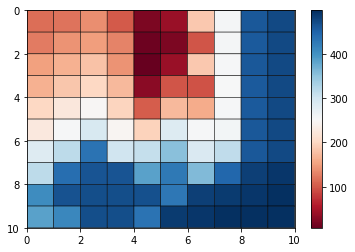

accuracy is 72.000000 lamba is 0.270541
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  2e+01  1e+00
 1:  5.3939e+01 -2.0849e+04  2e+04  2e-02  1e+01  2e+00
 2:  1.2815e+02 -1.5418e+04  2e+04  1e-02  1e+01  3e+00
 3:  1.1158e+02 -6.7374e+03  8e+03  5e-03  5e+00  3e+00
 4: -6.2332e+01 -3.1072e+03  4e+03  2e-03  2e+00  2e+00
 5: -7.1726e+02 -3.7731e+03  6e+03  2e-03  2e+00  3e+00
 6: -1.3754e+03 -3.8550e+03  6e+03  2e-03  2e+00  4e+00
 7: -1.6191e+03 -3.8172e+03  6e+03  2e-03  2e+00  4e+00
 8: -2.2018e+03 -3.7231e+03  5e+03  1e-03  1e+00  3e+00
 9: -2.6174e+03 -3.6249e+03  4e+03  8e-04  7e-01  2e+00
10: -2.9118e+03 -3.5045e+03  2e+03  5e-04  4e-01  2e+00
11: -3.2765e+03 -3.5075e+03  9e+02  2e-04  2e-01  7e-01
12: -3.4465e+03 -3.5062e+03  2e+02  5e-05  4e-02  2e-01
13: -3.4908e+03 -3.5148e+03  9e+01  2e-05  2e-02  9e-02
14: -3.5144e+03 -3.5202e+03  2e+01  5e-06  4e-03  2e-02
15: -3.5195e+03 -3.5215e+03  8e+00  2e-06  1e-03  8e-03
16: -3.521

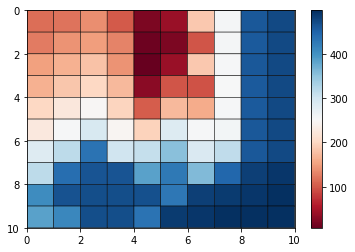

accuracy is 72.000000 lamba is 0.280561
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  2e+01  1e+00
 1:  5.4920e+01 -2.0839e+04  2e+04  2e-02  1e+01  2e+00
 2:  1.3079e+02 -1.5415e+04  2e+04  1e-02  1e+01  3e+00
 3:  1.1567e+02 -6.7158e+03  8e+03  5e-03  5e+00  3e+00
 4: -5.5710e+01 -3.0898e+03  4e+03  2e-03  2e+00  2e+00
 5: -6.8657e+02 -3.6898e+03  6e+03  2e-03  2e+00  3e+00
 6: -1.3020e+03 -3.7580e+03  6e+03  2e-03  2e+00  3e+00
 7: -1.5913e+03 -3.7314e+03  6e+03  2e-03  1e+00  3e+00
 8: -2.1610e+03 -3.6578e+03  5e+03  1e-03  1e+00  3e+00
 9: -2.5455e+03 -3.5532e+03  4e+03  8e-04  7e-01  2e+00
10: -2.8502e+03 -3.4542e+03  2e+03  5e-04  4e-01  2e+00
11: -3.2462e+03 -3.4511e+03  8e+02  2e-04  1e-01  6e-01
12: -3.3652e+03 -3.4465e+03  3e+02  7e-05  6e-02  3e-01
13: -3.4320e+03 -3.4529e+03  8e+01  2e-05  1e-02  8e-02
14: -3.4501e+03 -3.4574e+03  3e+01  6e-06  5e-03  3e-02
15: -3.4585e+03 -3.4595e+03  4e+00  8e-07  7e-04  4e-03
16: -3.459

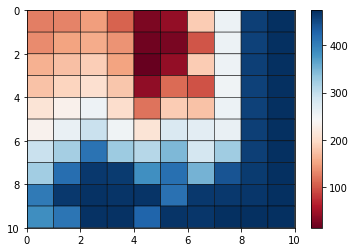

accuracy is 68.000000 lamba is 0.290581
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  2e+01  1e+00
 1:  5.5894e+01 -2.0829e+04  2e+04  2e-02  1e+01  2e+00
 2:  1.3339e+02 -1.5411e+04  2e+04  1e-02  1e+01  3e+00
 3:  1.1969e+02 -6.6937e+03  8e+03  5e-03  5e+00  3e+00
 4: -4.9331e+01 -3.0725e+03  4e+03  2e-03  2e+00  2e+00
 5: -6.5686e+02 -3.6072e+03  6e+03  2e-03  2e+00  3e+00
 6: -1.2462e+03 -3.6655e+03  6e+03  2e-03  2e+00  3e+00
 7: -1.5708e+03 -3.6499e+03  6e+03  2e-03  1e+00  3e+00
 8: -2.1192e+03 -3.5922e+03  5e+03  1e-03  1e+00  3e+00
 9: -2.4804e+03 -3.4834e+03  4e+03  8e-04  7e-01  2e+00
10: -2.7717e+03 -3.3883e+03  2e+03  5e-04  4e-01  2e+00
11: -3.1639e+03 -3.3896e+03  9e+02  2e-04  2e-01  7e-01
12: -3.2857e+03 -3.3879e+03  4e+02  8e-05  7e-02  3e-01
13: -3.3573e+03 -3.3902e+03  1e+02  3e-05  2e-02  1e-01
14: -3.3885e+03 -3.3960e+03  3e+01  6e-06  5e-03  3e-02
15: -3.3940e+03 -3.3971e+03  1e+01  2e-06  2e-03  1e-02
16: -3.397

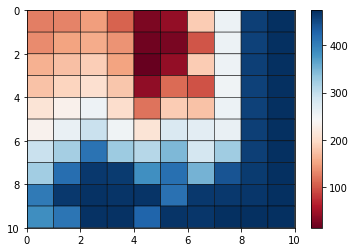

accuracy is 68.000000 lamba is 0.300601
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  2e+01  1e+00
 1:  5.6863e+01 -2.0819e+04  2e+04  2e-02  1e+01  2e+00
 2:  1.3597e+02 -1.5407e+04  2e+04  1e-02  1e+01  3e+00
 3:  1.2364e+02 -6.6709e+03  8e+03  5e-03  5e+00  3e+00
 4: -4.3184e+01 -3.0553e+03  4e+03  2e-03  2e+00  2e+00
 5: -6.2808e+02 -3.5253e+03  6e+03  2e-03  2e+00  3e+00
 6: -1.2012e+03 -3.5761e+03  6e+03  2e-03  2e+00  3e+00
 7: -1.5497e+03 -3.5715e+03  6e+03  2e-03  1e+00  3e+00
 8: -2.0790e+03 -3.5267e+03  5e+03  1e-03  1e+00  3e+00
 9: -2.4179e+03 -3.4152e+03  4e+03  8e-04  7e-01  2e+00
10: -2.6970e+03 -3.3244e+03  2e+03  5e-04  4e-01  2e+00
11: -3.0650e+03 -3.3260e+03  1e+03  2e-04  2e-01  8e-01
12: -3.2038e+03 -3.3297e+03  5e+02  1e-04  9e-02  4e-01
13: -3.2996e+03 -3.3291e+03  1e+02  2e-05  2e-02  1e-01
14: -3.3211e+03 -3.3330e+03  5e+01  1e-05  8e-03  4e-02
15: -3.3303e+03 -3.3347e+03  2e+01  3e-06  3e-03  2e-02
16: -3.334

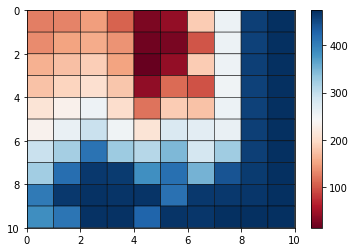

accuracy is 68.000000 lamba is 0.310621
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  2e+01  1e+00
 1:  5.7824e+01 -2.0808e+04  2e+04  2e-02  1e+01  2e+00
 2:  1.3851e+02 -1.5403e+04  2e+04  1e-02  1e+01  3e+00
 3:  1.2750e+02 -6.6475e+03  8e+03  5e-03  5e+00  3e+00
 4: -3.7258e+01 -3.0381e+03  4e+03  2e-03  2e+00  2e+00
 5: -6.0018e+02 -3.4440e+03  5e+03  2e-03  2e+00  3e+00
 6: -1.1633e+03 -3.4891e+03  6e+03  2e-03  2e+00  3e+00
 7: -1.5263e+03 -3.4953e+03  5e+03  2e-03  1e+00  3e+00
 8: -2.0416e+03 -3.4616e+03  4e+03  1e-03  1e+00  3e+00
 9: -2.3533e+03 -3.3504e+03  4e+03  8e-04  7e-01  2e+00
10: -2.6213e+03 -3.2685e+03  2e+03  5e-04  4e-01  2e+00
11: -2.9727e+03 -3.2633e+03  1e+03  2e-04  2e-01  8e-01
12: -3.1429e+03 -3.2695e+03  5e+02  1e-04  9e-02  4e-01
13: -3.2362e+03 -3.2658e+03  1e+02  2e-05  2e-02  1e-01
14: -3.2574e+03 -3.2711e+03  5e+01  1e-05  9e-03  5e-02
15: -3.2678e+03 -3.2732e+03  2e+01  4e-06  4e-03  2e-02
16: -3.273

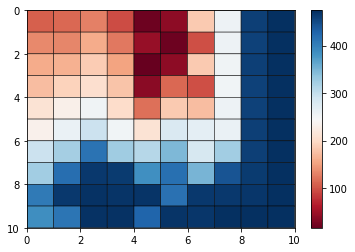

accuracy is 68.000000 lamba is 0.320641
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  2e+01  1e+00
 1:  5.8780e+01 -2.0798e+04  2e+04  2e-02  1e+01  2e+00
 2:  1.4103e+02 -1.5400e+04  2e+04  1e-02  1e+01  3e+00
 3:  1.3129e+02 -6.6236e+03  8e+03  5e-03  5e+00  3e+00
 4: -3.1544e+01 -3.0209e+03  4e+03  2e-03  2e+00  1e+00
 5: -5.7312e+02 -3.3634e+03  5e+03  2e-03  2e+00  3e+00
 6: -1.1304e+03 -3.4040e+03  5e+03  2e-03  2e+00  3e+00
 7: -1.5004e+03 -3.4207e+03  5e+03  2e-03  1e+00  3e+00
 8: -2.0072e+03 -3.3971e+03  4e+03  1e-03  9e-01  3e+00
 9: -2.2962e+03 -3.2865e+03  3e+03  8e-04  7e-01  2e+00
10: -2.5569e+03 -3.2087e+03  2e+03  5e-04  4e-01  2e+00
11: -2.9024e+03 -3.2003e+03  1e+03  2e-04  2e-01  9e-01
12: -3.0783e+03 -3.2061e+03  5e+02  1e-04  9e-02  4e-01
13: -3.1662e+03 -3.2047e+03  1e+02  3e-05  3e-02  1e-01
14: -3.1938e+03 -3.2104e+03  6e+01  1e-05  1e-02  6e-02
15: -3.2059e+03 -3.2123e+03  2e+01  5e-06  4e-03  2e-02
16: -3.211

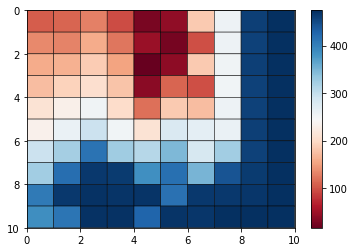

accuracy is 68.000000 lamba is 0.330661
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  2e+01  1e+00
 1:  5.9729e+01 -2.0788e+04  2e+04  2e-02  1e+01  2e+00
 2:  1.4352e+02 -1.5396e+04  2e+04  1e-02  1e+01  3e+00
 3:  1.3501e+02 -6.5991e+03  8e+03  5e-03  5e+00  3e+00
 4: -2.6030e+01 -3.0037e+03  4e+03  2e-03  2e+00  1e+00
 5: -5.4551e+02 -3.2826e+03  5e+03  2e-03  2e+00  3e+00
 6: -1.1004e+03 -3.3185e+03  5e+03  2e-03  1e+00  3e+00
 7: -1.4746e+03 -3.3462e+03  5e+03  1e-03  1e+00  3e+00
 8: -1.9691e+03 -3.3331e+03  4e+03  1e-03  9e-01  3e+00
 9: -2.2395e+03 -3.2254e+03  3e+03  8e-04  7e-01  2e+00
10: -2.4908e+03 -3.1496e+03  2e+03  5e-04  4e-01  2e+00
11: -2.8379e+03 -3.1367e+03  1e+03  2e-04  2e-01  9e-01
12: -3.0208e+03 -3.1425e+03  5e+02  1e-04  8e-02  4e-01
13: -3.1084e+03 -3.1429e+03  1e+02  3e-05  2e-02  1e-01
14: -3.1353e+03 -3.1494e+03  5e+01  1e-05  1e-02  5e-02
15: -3.1463e+03 -3.1517e+03  2e+01  4e-06  4e-03  2e-02
16: -3.150

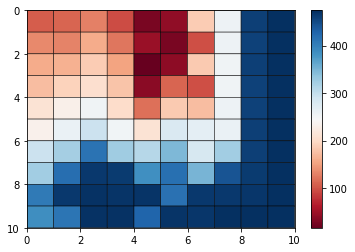

accuracy is 68.000000 lamba is 0.340681
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  2e+01  1e+00
 1:  6.0671e+01 -2.0778e+04  2e+04  2e-02  1e+01  2e+00
 2:  1.4598e+02 -1.5392e+04  2e+04  1e-02  1e+01  3e+00
 3:  1.3866e+02 -6.5740e+03  8e+03  5e-03  5e+00  2e+00
 4: -2.0710e+01 -2.9864e+03  4e+03  2e-03  2e+00  1e+00
 5: -5.0020e+02 -3.1947e+03  5e+03  2e-03  2e+00  3e+00
 6: -1.0582e+03 -3.2249e+03  5e+03  2e-03  1e+00  3e+00
 7: -1.4544e+03 -3.2838e+03  5e+03  1e-03  1e+00  3e+00
 8: -1.9094e+03 -3.2715e+03  4e+03  1e-03  9e-01  3e+00
 9: -2.1733e+03 -3.1593e+03  3e+03  8e-04  7e-01  2e+00
10: -2.4193e+03 -3.0900e+03  2e+03  5e-04  5e-01  2e+00
11: -2.7786e+03 -3.0721e+03  1e+03  2e-04  2e-01  9e-01
12: -2.9472e+03 -3.0778e+03  5e+02  1e-04  9e-02  4e-01
13: -3.0476e+03 -3.0822e+03  1e+02  3e-05  2e-02  1e-01
14: -3.0773e+03 -3.0892e+03  5e+01  1e-05  8e-03  4e-02
15: -3.0867e+03 -3.0913e+03  2e+01  4e-06  3e-03  2e-02
16: -3.090

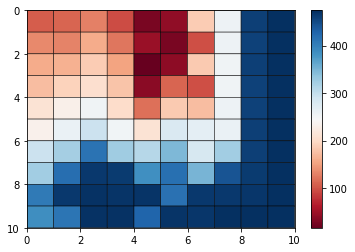

accuracy is 68.000000 lamba is 0.350701
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  2e+01  1e+00
 1:  6.1608e+01 -2.0768e+04  2e+04  2e-02  1e+01  2e+00
 2:  1.4842e+02 -1.5388e+04  2e+04  1e-02  1e+01  3e+00
 3:  1.4224e+02 -6.5485e+03  8e+03  5e-03  4e+00  2e+00
 4: -1.5574e+01 -2.9692e+03  4e+03  2e-03  2e+00  1e+00
 5: -4.5931e+02 -3.1131e+03  5e+03  2e-03  2e+00  3e+00
 6: -1.0216e+03 -3.1481e+03  5e+03  2e-03  1e+00  3e+00
 7: -1.4220e+03 -3.2321e+03  5e+03  1e-03  1e+00  3e+00
 8: -1.8487e+03 -3.2147e+03  4e+03  1e-03  9e-01  3e+00
 9: -2.1119e+03 -3.0951e+03  3e+03  8e-04  7e-01  2e+00
10: -2.3560e+03 -3.0313e+03  2e+03  5e-04  5e-01  2e+00
11: -2.7270e+03 -3.0075e+03  1e+03  2e-04  2e-01  8e-01
12: -2.8767e+03 -3.0137e+03  5e+02  1e-04  9e-02  4e-01
13: -2.9682e+03 -3.0207e+03  2e+02  4e-05  4e-02  2e-01
14: -3.0086e+03 -3.0280e+03  7e+01  2e-05  1e-02  7e-02
15: -3.0237e+03 -3.0302e+03  3e+01  5e-06  4e-03  2e-02
16: -3.028

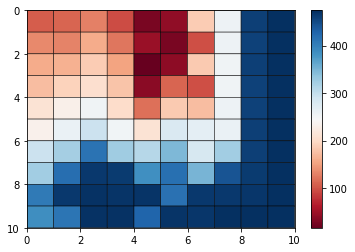

accuracy is 68.000000 lamba is 0.360721
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  2e+01  1e+00
 1:  6.2538e+01 -2.0757e+04  2e+04  2e-02  1e+01  2e+00
 2:  1.5082e+02 -1.5385e+04  2e+04  1e-02  1e+01  3e+00
 3:  1.4576e+02 -6.5223e+03  8e+03  5e-03  4e+00  2e+00
 4: -1.0614e+01 -2.9518e+03  4e+03  2e-03  2e+00  1e+00
 5: -4.2219e+02 -3.0367e+03  5e+03  2e-03  2e+00  3e+00
 6: -9.9228e+02 -3.0738e+03  5e+03  2e-03  1e+00  3e+00
 7: -1.3871e+03 -3.1767e+03  5e+03  1e-03  1e+00  3e+00
 8: -1.7961e+03 -3.1575e+03  4e+03  1e-03  9e-01  3e+00
 9: -2.0567e+03 -3.0320e+03  3e+03  8e-04  7e-01  2e+00
10: -2.3005e+03 -2.9709e+03  2e+03  5e-04  4e-01  2e+00
11: -2.6809e+03 -2.9432e+03  1e+03  2e-04  2e-01  8e-01
12: -2.8115e+03 -2.9503e+03  5e+02  1e-04  9e-02  5e-01
13: -2.9186e+03 -2.9615e+03  2e+02  3e-05  3e-02  2e-01
14: -2.9506e+03 -2.9674e+03  6e+01  1e-05  1e-02  6e-02
15: -2.9641e+03 -2.9697e+03  2e+01  4e-06  4e-03  2e-02
16: -2.967

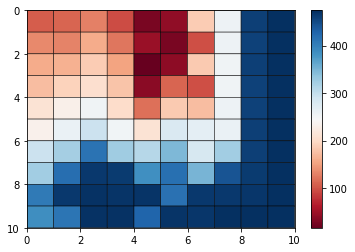

accuracy is 68.000000 lamba is 0.370741
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  2e+01  1e+00
 1:  6.3463e+01 -2.0747e+04  2e+04  2e-02  1e+01  2e+00
 2:  1.5320e+02 -1.5381e+04  2e+04  1e-02  1e+01  3e+00
 3:  1.4920e+02 -6.4957e+03  8e+03  5e-03  4e+00  2e+00
 4: -5.8238e+00 -2.9344e+03  4e+03  2e-03  2e+00  1e+00
 5: -3.8834e+02 -2.9648e+03  5e+03  2e-03  2e+00  2e+00
 6: -9.6713e+02 -3.0017e+03  5e+03  2e-03  1e+00  2e+00
 7: -1.3509e+03 -3.1181e+03  5e+03  1e-03  1e+00  3e+00
 8: -1.7484e+03 -3.0998e+03  4e+03  1e-03  9e-01  3e+00
 9: -2.0049e+03 -2.9703e+03  3e+03  8e-04  6e-01  2e+00
10: -2.2497e+03 -2.9101e+03  2e+03  5e-04  4e-01  2e+00
11: -2.6382e+03 -2.8792e+03  9e+02  2e-04  2e-01  8e-01
12: -2.7531e+03 -2.8875e+03  5e+02  1e-04  9e-02  4e-01
13: -2.8706e+03 -2.9031e+03  1e+02  3e-05  2e-02  1e-01
14: -2.8930e+03 -2.9072e+03  5e+01  1e-05  9e-03  5e-02
15: -2.9047e+03 -2.9093e+03  2e+01  4e-06  3e-03  2e-02
16: -2.907

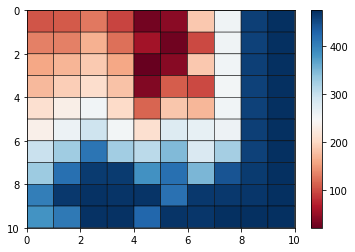

accuracy is 69.000000 lamba is 0.380762
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  2e+01  1e+00
 1:  6.4381e+01 -2.0737e+04  2e+04  2e-02  1e+01  2e+00
 2:  1.5556e+02 -1.5377e+04  2e+04  1e-02  1e+01  3e+00
 3:  1.5259e+02 -6.4685e+03  8e+03  5e-03  4e+00  2e+00
 4: -1.1202e+00 -2.9163e+03  4e+03  2e-03  2e+00  1e+00
 5: -3.5806e+02 -2.8976e+03  4e+03  2e-03  2e+00  2e+00
 6: -9.4448e+02 -2.9324e+03  4e+03  2e-03  1e+00  2e+00
 7: -1.3139e+03 -3.0569e+03  5e+03  1e-03  1e+00  3e+00
 8: -1.6964e+03 -3.0424e+03  4e+03  1e-03  9e-01  3e+00
 9: -1.9487e+03 -2.9111e+03  3e+03  8e-04  6e-01  2e+00
10: -2.2022e+03 -2.8502e+03  2e+03  5e-04  4e-01  2e+00
11: -2.5862e+03 -2.8150e+03  9e+02  2e-04  2e-01  7e-01
12: -2.6983e+03 -2.8248e+03  5e+02  1e-04  8e-02  4e-01
13: -2.8090e+03 -2.8428e+03  1e+02  3e-05  2e-02  1e-01
14: -2.8310e+03 -2.8468e+03  6e+01  1e-05  1e-02  6e-02
15: -2.8433e+03 -2.8488e+03  2e+01  4e-06  4e-03  2e-02
16: -2.847

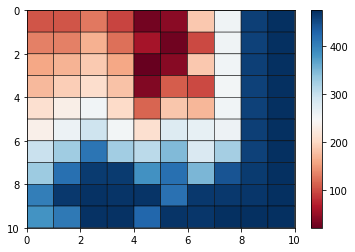

accuracy is 69.000000 lamba is 0.390782
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  2e+01  1e+00
 1:  6.5293e+01 -2.0727e+04  2e+04  2e-02  1e+01  2e+00
 2:  1.5789e+02 -1.5373e+04  2e+04  1e-02  1e+01  3e+00
 3:  1.5591e+02 -6.4409e+03  8e+03  5e-03  4e+00  2e+00
 4:  3.7089e+00 -2.8959e+03  4e+03  2e-03  2e+00  1e+00
 5: -3.3231e+02 -2.8360e+03  4e+03  2e-03  2e+00  2e+00
 6: -9.2187e+02 -2.8696e+03  4e+03  2e-03  1e+00  2e+00
 7: -1.2759e+03 -2.9955e+03  5e+03  1e-03  1e+00  3e+00
 8: -1.6463e+03 -2.9859e+03  4e+03  1e-03  9e-01  3e+00
 9: -1.8954e+03 -2.8523e+03  3e+03  8e-04  6e-01  2e+00
10: -2.1592e+03 -2.7886e+03  2e+03  5e-04  4e-01  2e+00
11: -2.5204e+03 -2.7531e+03  9e+02  2e-04  2e-01  7e-01
12: -2.6427e+03 -2.7640e+03  5e+02  1e-04  8e-02  4e-01
13: -2.7418e+03 -2.7816e+03  2e+02  3e-05  3e-02  1e-01
14: -2.7710e+03 -2.7866e+03  6e+01  1e-05  1e-02  6e-02
15: -2.7814e+03 -2.7883e+03  3e+01  5e-06  5e-03  2e-02
16: -2.787

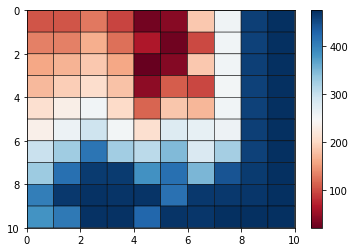

accuracy is 69.000000 lamba is 0.400802
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  2e+01  1e+00
 1:  6.6200e+01 -2.0717e+04  2e+04  2e-02  1e+01  2e+00
 2:  1.6019e+02 -1.5369e+04  2e+04  1e-02  1e+01  3e+00
 3:  1.5917e+02 -6.4128e+03  8e+03  5e-03  4e+00  2e+00
 4:  8.4226e+00 -2.8755e+03  4e+03  2e-03  2e+00  1e+00
 5: -3.0818e+02 -2.7764e+03  4e+03  2e-03  2e+00  2e+00
 6: -9.0050e+02 -2.8074e+03  4e+03  2e-03  1e+00  2e+00
 7: -1.2387e+03 -2.9331e+03  5e+03  1e-03  1e+00  3e+00
 8: -1.5970e+03 -2.9291e+03  4e+03  1e-03  9e-01  3e+00
 9: -1.8451e+03 -2.7927e+03  3e+03  8e-04  6e-01  2e+00
10: -2.1162e+03 -2.7244e+03  2e+03  5e-04  4e-01  2e+00
11: -2.4585e+03 -2.6923e+03  9e+02  2e-04  2e-01  8e-01
12: -2.5921e+03 -2.7056e+03  4e+02  9e-05  8e-02  4e-01
13: -2.6805e+03 -2.7216e+03  2e+02  3e-05  3e-02  1e-01
14: -2.7123e+03 -2.7270e+03  6e+01  1e-05  1e-02  5e-02
15: -2.7240e+03 -2.7287e+03  2e+01  4e-06  3e-03  2e-02
16: -2.728

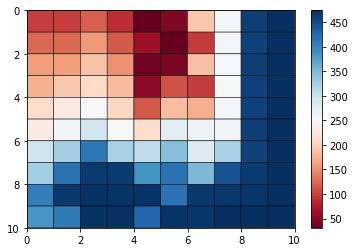

accuracy is 69.000000 lamba is 0.410822
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  2e+01  1e+00
 1:  6.7101e+01 -2.0707e+04  2e+04  2e-02  1e+01  2e+00
 2:  1.6247e+02 -1.5365e+04  2e+04  1e-02  1e+01  3e+00
 3:  1.6237e+02 -6.3842e+03  8e+03  5e-03  4e+00  2e+00
 4:  1.3024e+01 -2.8550e+03  3e+03  2e-03  2e+00  1e+00
 5: -2.8551e+02 -2.7188e+03  4e+03  2e-03  2e+00  2e+00
 6: -8.8018e+02 -2.7456e+03  4e+03  1e-03  1e+00  2e+00
 7: -1.2025e+03 -2.8698e+03  4e+03  1e-03  1e+00  3e+00
 8: -1.5487e+03 -2.8722e+03  4e+03  1e-03  9e-01  3e+00
 9: -1.7980e+03 -2.7318e+03  3e+03  7e-04  6e-01  2e+00
10: -1.9231e+03 -2.6414e+03  3e+03  6e-04  5e-01  2e+00
11: -2.3663e+03 -2.6437e+03  1e+03  2e-04  2e-01  8e-01
12: -2.5070e+03 -2.6541e+03  6e+02  1e-04  1e-01  5e-01
13: -2.6289e+03 -2.6642e+03  1e+02  3e-05  2e-02  1e-01
14: -2.6572e+03 -2.6685e+03  4e+01  9e-06  7e-03  4e-02
15: -2.6657e+03 -2.6695e+03  1e+01  3e-06  3e-03  1e-02
16: -2.669

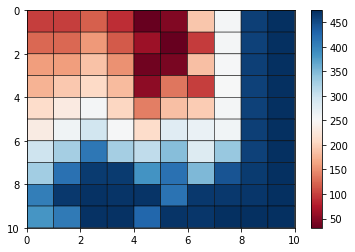

accuracy is 69.000000 lamba is 0.420842
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  2e+01  1e+00
 1:  6.7996e+01 -2.0697e+04  2e+04  2e-02  1e+01  2e+00
 2:  1.6472e+02 -1.5361e+04  2e+04  1e-02  1e+01  3e+00
 3:  1.6551e+02 -6.3551e+03  8e+03  5e-03  4e+00  2e+00
 4:  1.7517e+01 -2.8344e+03  3e+03  2e-03  2e+00  1e+00
 5: -2.6417e+02 -2.6628e+03  4e+03  2e-03  2e+00  2e+00
 6: -8.6075e+02 -2.6840e+03  4e+03  1e-03  1e+00  2e+00
 7: -1.1674e+03 -2.8059e+03  4e+03  1e-03  1e+00  3e+00
 8: -1.4943e+03 -2.8147e+03  4e+03  1e-03  9e-01  3e+00
 9: -1.7537e+03 -2.6660e+03  3e+03  7e-04  6e-01  2e+00
10: -1.8118e+03 -2.5876e+03  3e+03  6e-04  5e-01  2e+00
11: -2.2650e+03 -2.6027e+03  1e+03  3e-04  2e-01  1e+00
12: -2.4286e+03 -2.6028e+03  7e+02  1e-04  1e-01  5e-01
13: -2.5411e+03 -2.6002e+03  2e+02  5e-05  4e-02  2e-01
14: -2.5880e+03 -2.6078e+03  8e+01  2e-05  1e-02  7e-02
15: -2.6013e+03 -2.6100e+03  3e+01  7e-06  6e-03  3e-02
16: -2.609

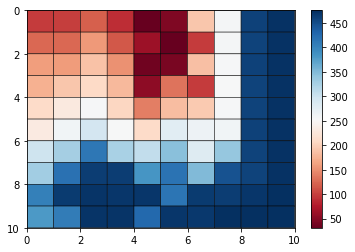

accuracy is 69.000000 lamba is 0.430862
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  2e+01  1e+00
 1:  6.8885e+01 -2.0686e+04  2e+04  2e-02  1e+01  2e+00
 2:  1.6695e+02 -1.5358e+04  2e+04  1e-02  1e+01  3e+00
 3:  1.6859e+02 -6.3256e+03  8e+03  5e-03  4e+00  2e+00
 4:  2.1904e+01 -2.8138e+03  3e+03  2e-03  2e+00  1e+00
 5: -2.4406e+02 -2.6084e+03  4e+03  2e-03  2e+00  2e+00
 6: -8.4211e+02 -2.6227e+03  4e+03  1e-03  1e+00  2e+00
 7: -1.1335e+03 -2.7413e+03  4e+03  1e-03  1e+00  2e+00
 8: -1.4425e+03 -2.7568e+03  4e+03  1e-03  9e-01  3e+00
 9: -1.7099e+03 -2.6028e+03  3e+03  7e-04  6e-01  2e+00
10: -1.9069e+03 -2.5266e+03  2e+03  5e-04  4e-01  2e+00
11: -2.2599e+03 -2.5170e+03  9e+02  2e-04  2e-01  8e-01
12: -2.3968e+03 -2.5338e+03  5e+02  1e-04  9e-02  4e-01
13: -2.5108e+03 -2.5461e+03  1e+02  3e-05  2e-02  1e-01
14: -2.5398e+03 -2.5502e+03  4e+01  8e-06  7e-03  4e-02
15: -2.5452e+03 -2.5512e+03  2e+01  5e-06  4e-03  2e-02
16: -2.551

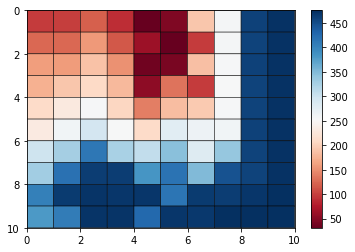

accuracy is 69.000000 lamba is 0.440882
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  2e+01  1e+00
 1:  6.9769e+01 -2.0676e+04  2e+04  2e-02  1e+01  2e+00
 2:  1.6916e+02 -1.5354e+04  2e+04  1e-02  1e+01  3e+00
 3:  1.7162e+02 -6.2956e+03  8e+03  5e-03  4e+00  2e+00
 4:  2.6187e+01 -2.7931e+03  3e+03  2e-03  2e+00  1e+00
 5: -2.2508e+02 -2.5553e+03  4e+03  2e-03  2e+00  2e+00
 6: -8.2417e+02 -2.5614e+03  4e+03  1e-03  1e+00  2e+00
 7: -1.1008e+03 -2.6763e+03  4e+03  1e-03  1e+00  2e+00
 8: -1.3936e+03 -2.6985e+03  4e+03  1e-03  9e-01  3e+00
 9: -1.6574e+03 -2.5476e+03  3e+03  7e-04  6e-01  2e+00
10: -2.0001e+03 -2.4967e+03  2e+03  4e-04  3e-01  1e+00
11: -2.2296e+03 -2.4575e+03  8e+02  2e-04  1e-01  7e-01
12: -2.3690e+03 -2.4789e+03  4e+02  9e-05  7e-02  4e-01
13: -2.4419e+03 -2.4877e+03  2e+02  4e-05  3e-02  2e-01
14: -2.4802e+03 -2.4924e+03  5e+01  1e-05  8e-03  4e-02
15: -2.4880e+03 -2.4935e+03  2e+01  4e-06  4e-03  2e-02
16: -2.492

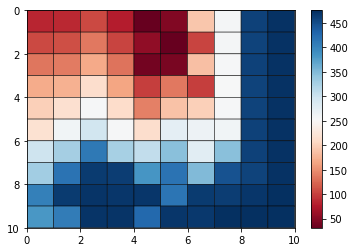

accuracy is 67.000000 lamba is 0.450902
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  2e+01  1e+00
 1:  7.0648e+01 -2.0666e+04  2e+04  2e-02  1e+01  2e+00
 2:  1.7134e+02 -1.5350e+04  2e+04  1e-02  1e+01  3e+00
 3:  1.7459e+02 -6.2652e+03  8e+03  5e-03  4e+00  2e+00
 4:  3.0370e+01 -2.7723e+03  3e+03  2e-03  2e+00  1e+00
 5: -2.0713e+02 -2.5035e+03  4e+03  2e-03  1e+00  2e+00
 6: -8.0689e+02 -2.5001e+03  4e+03  1e-03  1e+00  2e+00
 7: -1.0692e+03 -2.6109e+03  4e+03  1e-03  1e+00  2e+00
 8: -1.3474e+03 -2.6398e+03  4e+03  1e-03  8e-01  3e+00
 9: -1.6172e+03 -2.4880e+03  3e+03  7e-04  6e-01  2e+00
10: -1.9696e+03 -2.4477e+03  2e+03  4e-04  3e-01  1e+00
11: -2.1565e+03 -2.3955e+03  9e+02  2e-04  2e-01  8e-01
12: -2.3128e+03 -2.4223e+03  4e+02  9e-05  7e-02  4e-01
13: -2.3948e+03 -2.4320e+03  1e+02  3e-05  2e-02  1e-01
14: -2.4249e+03 -2.4362e+03  4e+01  9e-06  7e-03  4e-02
15: -2.4321e+03 -2.4373e+03  2e+01  4e-06  3e-03  2e-02
16: -2.436

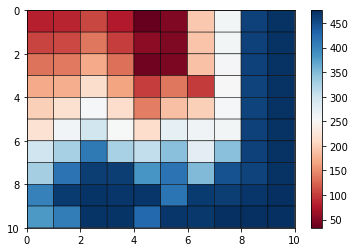

accuracy is 67.000000 lamba is 0.460922
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  2e+01  1e+00
 1:  7.1520e+01 -2.0656e+04  2e+04  2e-02  1e+01  2e+00
 2:  1.7350e+02 -1.5346e+04  2e+04  1e-02  1e+01  3e+00
 3:  1.7750e+02 -6.2343e+03  8e+03  5e-03  4e+00  2e+00
 4:  3.4455e+01 -2.7514e+03  3e+03  2e-03  2e+00  1e+00
 5: -1.9014e+02 -2.4528e+03  4e+03  2e-03  1e+00  2e+00
 6: -7.9021e+02 -2.4388e+03  4e+03  1e-03  1e+00  2e+00
 7: -1.0387e+03 -2.5451e+03  4e+03  1e-03  1e+00  2e+00
 8: -1.3035e+03 -2.5807e+03  4e+03  1e-03  8e-01  3e+00
 9: -1.5860e+03 -2.4261e+03  3e+03  7e-04  5e-01  2e+00
10: -1.9144e+03 -2.3962e+03  2e+03  4e-04  3e-01  1e+00
11: -2.0669e+03 -2.3445e+03  1e+03  2e-04  2e-01  8e-01
12: -2.2518e+03 -2.3700e+03  4e+02  9e-05  8e-02  4e-01
13: -2.3356e+03 -2.3771e+03  2e+02  3e-05  3e-02  1e-01
14: -2.3652e+03 -2.3805e+03  6e+01  1e-05  1e-02  5e-02
15: -2.3757e+03 -2.3818e+03  2e+01  5e-06  4e-03  2e-02
16: -2.379

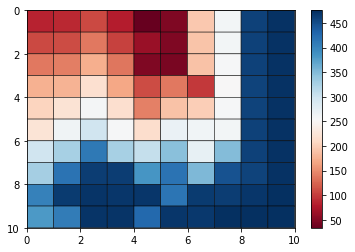

accuracy is 66.000000 lamba is 0.470942
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  2e+01  1e+00
 1:  7.2388e+01 -2.0646e+04  2e+04  2e-02  1e+01  2e+00
 2:  1.7564e+02 -1.5342e+04  2e+04  1e-02  1e+01  3e+00
 3:  1.8036e+02 -6.2030e+03  7e+03  5e-03  4e+00  2e+00
 4:  3.8444e+01 -2.7304e+03  3e+03  2e-03  2e+00  1e+00
 5: -1.7404e+02 -2.4032e+03  4e+03  2e-03  1e+00  2e+00
 6: -7.7410e+02 -2.3772e+03  4e+03  1e-03  1e+00  2e+00
 7: -1.0093e+03 -2.4789e+03  4e+03  1e-03  9e-01  2e+00
 8: -1.2618e+03 -2.5214e+03  4e+03  1e-03  8e-01  3e+00
 9: -1.5557e+03 -2.3604e+03  3e+03  6e-04  5e-01  2e+00
10: -1.8633e+03 -2.3398e+03  2e+03  4e-04  3e-01  1e+00
11: -2.0060e+03 -2.2926e+03  1e+03  2e-04  2e-01  9e-01
12: -2.2008e+03 -2.3166e+03  4e+02  9e-05  7e-02  4e-01
13: -2.2769e+03 -2.3229e+03  2e+02  4e-05  3e-02  1e-01
14: -2.3085e+03 -2.3257e+03  6e+01  1e-05  1e-02  6e-02
15: -2.3226e+03 -2.3271e+03  2e+01  4e-06  3e-03  2e-02
16: -2.325

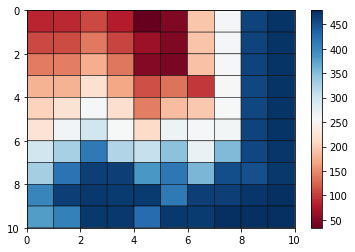

accuracy is 68.000000 lamba is 0.480962
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  2e+01  1e+00
 1:  7.3250e+01 -2.0636e+04  2e+04  2e-02  1e+01  2e+00
 2:  1.7775e+02 -1.5338e+04  2e+04  1e-02  1e+01  3e+00
 3:  1.8318e+02 -6.1714e+03  7e+03  5e-03  4e+00  2e+00
 4:  4.2340e+01 -2.7094e+03  3e+03  2e-03  2e+00  1e+00
 5: -1.5877e+02 -2.3545e+03  3e+03  2e-03  1e+00  2e+00
 6: -7.5853e+02 -2.3154e+03  3e+03  1e-03  1e+00  2e+00
 7: -9.8102e+02 -2.4123e+03  4e+03  1e-03  9e-01  2e+00
 8: -1.2219e+03 -2.4617e+03  4e+03  1e-03  8e-01  2e+00
 9: -1.5273e+03 -2.2922e+03  3e+03  6e-04  5e-01  2e+00
10: -1.8159e+03 -2.2803e+03  2e+03  4e-04  3e-01  1e+00
11: -1.9606e+03 -2.2384e+03  1e+03  2e-04  2e-01  8e-01
12: -2.1541e+03 -2.2623e+03  4e+02  9e-05  7e-02  3e-01
13: -2.2191e+03 -2.2679e+03  2e+02  4e-05  3e-02  2e-01
14: -2.2523e+03 -2.2706e+03  7e+01  1e-05  1e-02  6e-02
15: -2.2662e+03 -2.2723e+03  2e+01  5e-06  4e-03  2e-02
16: -2.271

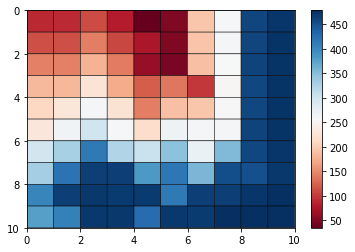

accuracy is 68.000000 lamba is 0.490982
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  2e+01  1e+00
 1:  7.4107e+01 -2.0626e+04  2e+04  2e-02  1e+01  2e+00
 2:  1.7985e+02 -1.5334e+04  2e+04  1e-02  1e+01  3e+00
 3:  1.8593e+02 -6.1392e+03  7e+03  5e-03  4e+00  2e+00
 4:  4.6145e+01 -2.6882e+03  3e+03  2e-03  2e+00  1e+00
 5: -1.4427e+02 -2.3066e+03  3e+03  2e-03  1e+00  2e+00
 6: -7.4348e+02 -2.2534e+03  3e+03  1e-03  1e+00  2e+00
 7: -9.5370e+02 -2.3454e+03  4e+03  1e-03  9e-01  2e+00
 8: -1.1837e+03 -2.4018e+03  4e+03  1e-03  8e-01  2e+00
 9: -1.4707e+03 -2.2351e+03  2e+03  6e-04  5e-01  2e+00
10: -1.7618e+03 -2.2290e+03  2e+03  4e-04  3e-01  1e+00
11: -1.9327e+03 -2.1898e+03  9e+02  2e-04  2e-01  8e-01
12: -2.1090e+03 -2.2049e+03  4e+02  8e-05  6e-02  3e-01
13: -2.1691e+03 -2.2122e+03  2e+02  3e-05  3e-02  1e-01
14: -2.2024e+03 -2.2163e+03  5e+01  1e-05  9e-03  5e-02
15: -2.2136e+03 -2.2180e+03  2e+01  4e-06  3e-03  2e-02
16: -2.217

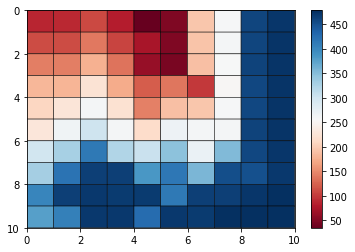

accuracy is 70.000000 lamba is 0.501002
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  2e+01  1e+00
 1:  7.4958e+01 -2.0616e+04  2e+04  2e-02  1e+01  2e+00
 2:  1.8192e+02 -1.5330e+04  2e+04  1e-02  1e+01  3e+00
 3:  1.8864e+02 -6.1067e+03  7e+03  5e-03  4e+00  2e+00
 4:  4.9861e+01 -2.6669e+03  3e+03  2e-03  2e+00  1e+00
 5: -1.3048e+02 -2.2595e+03  3e+03  2e-03  1e+00  2e+00
 6: -7.2894e+02 -2.1910e+03  3e+03  1e-03  9e-01  2e+00
 7: -9.2735e+02 -2.2781e+03  3e+03  1e-03  9e-01  2e+00
 8: -1.1469e+03 -2.3414e+03  4e+03  1e-03  8e-01  2e+00
 9: -1.3658e+03 -2.2016e+03  3e+03  7e-04  5e-01  2e+00
10: -1.6690e+03 -2.1883e+03  2e+03  4e-04  3e-01  1e+00
11: -1.8140e+03 -2.1583e+03  1e+03  3e-04  2e-01  1e+00
12: -2.0413e+03 -2.1581e+03  4e+02  9e-05  7e-02  3e-01
13: -2.1194e+03 -2.1619e+03  2e+02  3e-05  3e-02  1e-01
14: -2.1384e+03 -2.1614e+03  8e+01  2e-05  1e-02  8e-02
15: -2.1570e+03 -2.1638e+03  2e+01  5e-06  4e-03  2e-02
16: -2.162

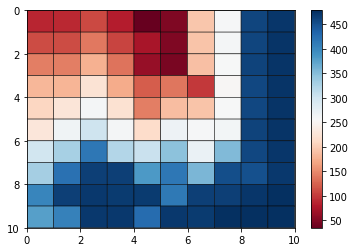

accuracy is 71.000000 lamba is 0.511022
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  2e+01  1e+00
 1:  7.5804e+01 -2.0606e+04  2e+04  2e-02  1e+01  2e+00
 2:  1.8397e+02 -1.5326e+04  2e+04  1e-02  1e+01  3e+00
 3:  1.9130e+02 -6.0738e+03  7e+03  5e-03  4e+00  2e+00
 4:  5.3489e+01 -2.6456e+03  3e+03  2e-03  2e+00  1e+00
 5: -1.1737e+02 -2.2131e+03  3e+03  2e-03  1e+00  2e+00
 6: -7.1489e+02 -2.1282e+03  3e+03  1e-03  9e-01  2e+00
 7: -9.0193e+02 -2.2104e+03  3e+03  1e-03  8e-01  2e+00
 8: -1.1113e+03 -2.2804e+03  3e+03  9e-04  7e-01  2e+00
 9: -1.2869e+03 -2.1585e+03  3e+03  7e-04  6e-01  2e+00
10: -1.6181e+03 -2.1295e+03  2e+03  4e-04  3e-01  1e+00
11: -1.7357e+03 -2.0983e+03  1e+03  3e-04  2e-01  1e+00
12: -1.9817e+03 -2.1010e+03  4e+02  1e-04  8e-02  4e-01
13: -2.0622e+03 -2.1058e+03  2e+02  3e-05  3e-02  1e-01
14: -2.0910e+03 -2.1082e+03  6e+01  1e-05  1e-02  6e-02
15: -2.1015e+03 -2.1096e+03  3e+01  7e-06  5e-03  3e-02
16: -2.108

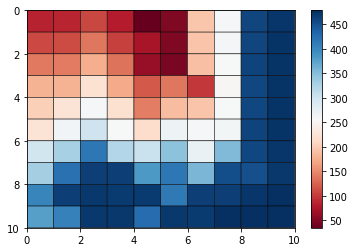

accuracy is 71.000000 lamba is 0.521042
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  2e+01  1e+00
 1:  7.6645e+01 -2.0595e+04  2e+04  2e-02  1e+01  2e+00
 2:  1.8599e+02 -1.5322e+04  2e+04  1e-02  1e+01  3e+00
 3:  1.9391e+02 -6.0405e+03  7e+03  5e-03  4e+00  2e+00
 4:  5.7033e+01 -2.6241e+03  3e+03  2e-03  2e+00  1e+00
 5: -1.0489e+02 -2.1674e+03  3e+03  2e-03  1e+00  2e+00
 6: -7.0133e+02 -2.0649e+03  3e+03  1e-03  9e-01  2e+00
 7: -8.7741e+02 -2.1422e+03  3e+03  1e-03  8e-01  2e+00
 8: -1.0768e+03 -2.2188e+03  3e+03  9e-04  7e-01  2e+00
 9: -1.2226e+03 -2.1101e+03  3e+03  7e-04  6e-01  2e+00
10: -1.5739e+03 -2.0671e+03  2e+03  4e-04  3e-01  1e+00
11: -1.6747e+03 -2.0378e+03  1e+03  3e-04  2e-01  1e+00
12: -1.9220e+03 -2.0456e+03  4e+02  1e-04  8e-02  4e-01
13: -2.0056e+03 -2.0499e+03  2e+02  4e-05  3e-02  1e-01
14: -2.0358e+03 -2.0538e+03  7e+01  1e-05  1e-02  6e-02
15: -2.0474e+03 -2.0557e+03  3e+01  7e-06  5e-03  3e-02
16: -2.055

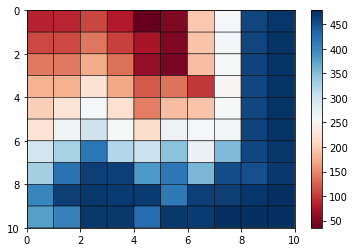

accuracy is 71.000000 lamba is 0.531062
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  2e+01  1e+00
 1:  7.7481e+01 -2.0585e+04  2e+04  2e-02  1e+01  2e+00
 2:  1.8800e+02 -1.5318e+04  2e+04  1e-02  1e+01  3e+00
 3:  1.9647e+02 -6.0069e+03  7e+03  5e-03  4e+00  2e+00
 4:  6.0492e+01 -2.6025e+03  3e+03  2e-03  2e+00  1e+00
 5: -9.3003e+01 -2.1222e+03  3e+03  2e-03  1e+00  2e+00
 6: -6.8825e+02 -2.0011e+03  3e+03  1e-03  8e-01  2e+00
 7: -8.5378e+02 -2.0736e+03  3e+03  1e-03  8e-01  2e+00
 8: -1.0430e+03 -2.1563e+03  3e+03  9e-04  7e-01  2e+00
 9: -1.1675e+03 -2.0583e+03  3e+03  7e-04  6e-01  2e+00
10: -1.5190e+03 -2.0053e+03  2e+03  4e-04  3e-01  1e+00
11: -1.6156e+03 -1.9848e+03  1e+03  3e-04  2e-01  1e+00
12: -1.8432e+03 -1.9895e+03  5e+02  1e-04  9e-02  5e-01
13: -1.9505e+03 -1.9939e+03  2e+02  3e-05  3e-02  2e-01
14: -1.9814e+03 -1.9993e+03  7e+01  1e-05  1e-02  6e-02
15: -1.9959e+03 -2.0020e+03  2e+01  5e-06  4e-03  2e-02
16: -2.000

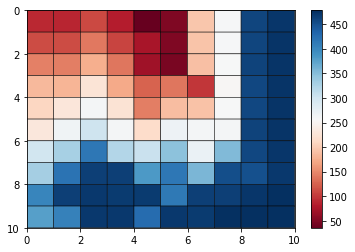

accuracy is 70.000000 lamba is 0.541082
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  2e+01  1e+00
 1:  7.8312e+01 -2.0575e+04  2e+04  2e-02  1e+01  2e+00
 2:  1.8999e+02 -1.5314e+04  2e+04  1e-02  1e+01  3e+00
 3:  1.9899e+02 -5.9728e+03  7e+03  5e-03  4e+00  2e+00
 4:  6.3870e+01 -2.5808e+03  3e+03  2e-03  2e+00  1e+00
 5: -8.1680e+01 -2.0776e+03  3e+03  2e-03  1e+00  2e+00
 6: -6.7566e+02 -1.9368e+03  3e+03  1e-03  8e-01  2e+00
 7: -8.3104e+02 -2.0045e+03  3e+03  9e-04  7e-01  2e+00
 8: -1.0099e+03 -2.0927e+03  3e+03  9e-04  7e-01  2e+00
 9: -1.1188e+03 -2.0041e+03  3e+03  7e-04  6e-01  2e+00
10: -1.4349e+03 -1.9492e+03  2e+03  4e-04  3e-01  1e+00
11: -1.5891e+03 -1.9375e+03  1e+03  3e-04  2e-01  1e+00
12: -1.7665e+03 -1.9334e+03  6e+02  1e-04  1e-01  5e-01
13: -1.8780e+03 -1.9377e+03  2e+02  5e-05  4e-02  2e-01
14: -1.9255e+03 -1.9457e+03  7e+01  2e-05  1e-02  7e-02
15: -1.9430e+03 -1.9490e+03  2e+01  5e-06  4e-03  2e-02
16: -1.948

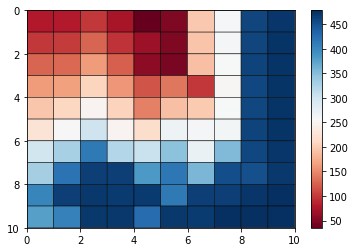

accuracy is 71.000000 lamba is 0.551102
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  2e+01  1e+00
 1:  7.9138e+01 -2.0565e+04  2e+04  2e-02  1e+01  2e+00
 2:  1.9196e+02 -1.5310e+04  2e+04  1e-02  1e+01  3e+00
 3:  2.0146e+02 -5.9384e+03  7e+03  5e-03  4e+00  2e+00
 4:  6.7167e+01 -2.5589e+03  3e+03  2e-03  2e+00  1e+00
 5: -7.0887e+01 -2.0335e+03  3e+03  2e-03  1e+00  2e+00
 6: -6.6281e+02 -1.8734e+03  3e+03  1e-03  8e-01  2e+00
 7: -8.0354e+02 -1.9378e+03  3e+03  9e-04  7e-01  2e+00
 8: -9.7574e+02 -2.0303e+03  3e+03  8e-04  7e-01  2e+00
 9: -1.0744e+03 -1.9493e+03  3e+03  7e-04  5e-01  2e+00
10: -1.3669e+03 -1.8931e+03  2e+03  4e-04  3e-01  1e+00
11: -1.5862e+03 -1.8877e+03  1e+03  2e-04  2e-01  9e-01
12: -1.7245e+03 -1.8802e+03  6e+02  1e-04  1e-01  5e-01
13: -1.8167e+03 -1.8847e+03  2e+02  5e-05  4e-02  2e-01
14: -1.8707e+03 -1.8935e+03  8e+01  2e-05  1e-02  8e-02
15: -1.8908e+03 -1.8969e+03  2e+01  5e-06  4e-03  2e-02
16: -1.895

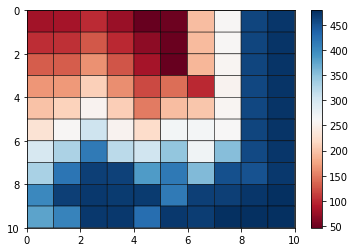

accuracy is 73.000000 lamba is 0.561122
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  2e+01  1e+00
 1:  7.9959e+01 -2.0555e+04  2e+04  2e-02  1e+01  2e+00
 2:  1.9390e+02 -1.5306e+04  2e+04  1e-02  1e+01  3e+00
 3:  2.0388e+02 -5.9036e+03  7e+03  5e-03  4e+00  2e+00
 4:  7.0386e+01 -2.5370e+03  3e+03  2e-03  2e+00  1e+00
 5: -6.0598e+01 -1.9898e+03  3e+03  2e-03  1e+00  2e+00
 6: -6.5007e+02 -1.8102e+03  3e+03  9e-04  7e-01  2e+00
 7: -7.7630e+02 -1.8713e+03  3e+03  9e-04  7e-01  2e+00
 8: -9.3616e+02 -1.9638e+03  3e+03  8e-04  6e-01  2e+00
 9: -1.0287e+03 -1.9040e+03  3e+03  7e-04  5e-01  2e+00
10: -1.2797e+03 -1.8371e+03  2e+03  4e-04  3e-01  1e+00
11: -1.5294e+03 -1.8416e+03  1e+03  3e-04  2e-01  9e-01
12: -1.6410e+03 -1.8317e+03  7e+02  2e-04  1e-01  6e-01
13: -1.7562e+03 -1.8333e+03  3e+02  6e-05  5e-02  3e-01
14: -1.8156e+03 -1.8420e+03  9e+01  2e-05  2e-02  9e-02
15: -1.8358e+03 -1.8453e+03  3e+01  8e-06  6e-03  3e-02
16: -1.842

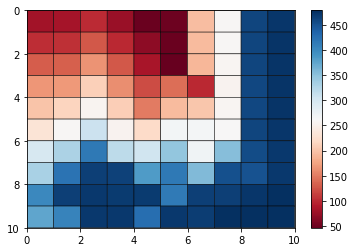

accuracy is 72.000000 lamba is 0.571142
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  2e+01  1e+00
 1:  8.0776e+01 -2.0545e+04  2e+04  2e-02  1e+01  2e+00
 2:  1.9583e+02 -1.5302e+04  2e+04  1e-02  1e+01  3e+00
 3:  2.0626e+02 -5.8684e+03  7e+03  5e-03  4e+00  2e+00
 4:  7.3527e+01 -2.5149e+03  3e+03  2e-03  2e+00  1e+00
 5: -5.0786e+01 -1.9466e+03  3e+03  2e-03  1e+00  2e+00
 6: -6.2569e+02 -1.7507e+03  2e+03  9e-04  7e-01  2e+00
 7: -7.6529e+02 -1.8182e+03  3e+03  8e-04  7e-01  2e+00
 8: -9.1242e+02 -1.9067e+03  3e+03  8e-04  6e-01  2e+00
 9: -9.9754e+02 -1.8431e+03  3e+03  7e-04  5e-01  2e+00
10: -1.2854e+03 -1.7811e+03  2e+03  4e-04  3e-01  1e+00
11: -1.5122e+03 -1.7864e+03  1e+03  2e-04  2e-01  8e-01
12: -1.6266e+03 -1.7829e+03  6e+02  1e-04  1e-01  5e-01
13: -1.7156e+03 -1.7842e+03  2e+02  6e-05  4e-02  2e-01
14: -1.7729e+03 -1.7928e+03  7e+01  2e-05  1e-02  7e-02
15: -1.7860e+03 -1.7944e+03  3e+01  7e-06  5e-03  3e-02
16: -1.793

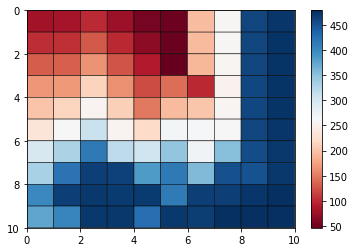

accuracy is 72.000000 lamba is 0.581162
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  2e+01  1e+00
 1:  8.1587e+01 -2.0535e+04  2e+04  2e-02  1e+01  2e+00
 2:  1.9774e+02 -1.5298e+04  2e+04  1e-02  1e+01  3e+00
 3:  2.0859e+02 -5.8329e+03  7e+03  5e-03  4e+00  2e+00
 4:  7.6592e+01 -2.4927e+03  3e+03  2e-03  2e+00  1e+00
 5: -4.1429e+01 -1.9038e+03  3e+03  1e-03  1e+00  2e+00
 6: -5.7901e+02 -1.7003e+03  2e+03  9e-04  7e-01  2e+00
 7: -7.9889e+02 -1.8020e+03  3e+03  8e-04  6e-01  2e+00
 8: -8.8689e+02 -1.8361e+03  3e+03  8e-04  6e-01  2e+00
 9: -1.0310e+03 -1.7942e+03  2e+03  6e-04  5e-01  2e+00
10: -1.2675e+03 -1.7333e+03  2e+03  4e-04  3e-01  1e+00
11: -1.4519e+03 -1.7367e+03  1e+03  2e-04  2e-01  8e-01
12: -1.6009e+03 -1.7376e+03  5e+02  1e-04  8e-02  4e-01
13: -1.6984e+03 -1.7400e+03  1e+02  3e-05  3e-02  1e-01
14: -1.7289e+03 -1.7435e+03  5e+01  1e-05  9e-03  5e-02
15: -1.7402e+03 -1.7448e+03  2e+01  4e-06  3e-03  2e-02
16: -1.743

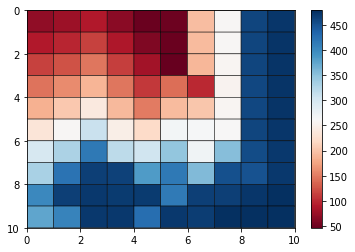

accuracy is 71.000000 lamba is 0.591182
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  2e+01  1e+00
 1:  8.2393e+01 -2.0525e+04  2e+04  2e-02  1e+01  2e+00
 2:  1.9963e+02 -1.5294e+04  2e+04  1e-02  9e+00  3e+00
 3:  2.1088e+02 -5.7971e+03  7e+03  5e-03  4e+00  2e+00
 4:  7.9582e+01 -2.4704e+03  3e+03  2e-03  2e+00  1e+00
 5: -3.2505e+01 -1.8613e+03  3e+03  1e-03  1e+00  1e+00
 6: -5.3253e+02 -1.6524e+03  2e+03  9e-04  7e-01  2e+00
 7: -7.8233e+02 -1.7673e+03  2e+03  8e-04  6e-01  2e+00
 8: -9.2886e+02 -1.7845e+03  2e+03  7e-04  5e-01  2e+00
 9: -1.0762e+03 -1.7365e+03  2e+03  5e-04  4e-01  1e+00
10: -1.1729e+03 -1.6885e+03  2e+03  4e-04  3e-01  1e+00
11: -1.3893e+03 -1.6913e+03  1e+03  2e-04  2e-01  8e-01
12: -1.4765e+03 -1.6840e+03  7e+02  2e-04  1e-01  6e-01
13: -1.6112e+03 -1.6905e+03  3e+02  6e-05  5e-02  2e-01
14: -1.6575e+03 -1.6897e+03  1e+02  3e-05  2e-02  1e-01
15: -1.6772e+03 -1.6929e+03  6e+01  1e-05  1e-02  5e-02
16: -1.690

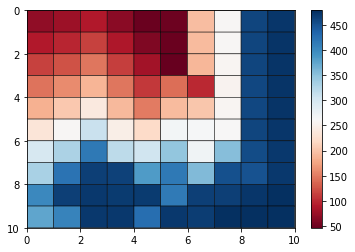

accuracy is 71.000000 lamba is 0.601202
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  2e+01  1e+00
 1:  8.3195e+01 -2.0515e+04  2e+04  2e-02  1e+01  2e+00
 2:  2.0150e+02 -1.5290e+04  2e+04  1e-02  9e+00  3e+00
 3:  2.1313e+02 -5.7609e+03  7e+03  5e-03  4e+00  2e+00
 4:  8.2498e+01 -2.4479e+03  3e+03  2e-03  2e+00  1e+00
 5: -2.3997e+01 -1.8191e+03  3e+03  1e-03  1e+00  1e+00
 6: -4.8973e+02 -1.6054e+03  2e+03  9e-04  7e-01  1e+00
 7: -7.5369e+02 -1.7281e+03  2e+03  8e-04  6e-01  2e+00
 8: -8.9356e+02 -1.7327e+03  2e+03  7e-04  5e-01  2e+00
 9: -1.0871e+03 -1.6977e+03  2e+03  5e-04  4e-01  1e+00
10: -1.2080e+03 -1.6444e+03  1e+03  3e-04  3e-01  1e+00
11: -1.3697e+03 -1.6450e+03  9e+02  2e-04  2e-01  7e-01
12: -1.4494e+03 -1.6351e+03  6e+02  1e-04  1e-01  5e-01
13: -1.5711e+03 -1.6420e+03  2e+02  6e-05  4e-02  2e-01
14: -1.6127e+03 -1.6410e+03  1e+02  2e-05  2e-02  1e-01
15: -1.6301e+03 -1.6440e+03  5e+01  1e-05  8e-03  5e-02
16: -1.641

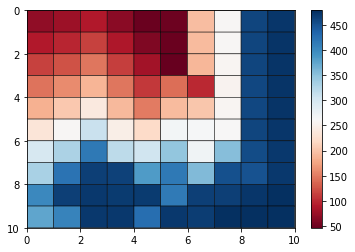

accuracy is 71.000000 lamba is 0.611222
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  2e+01  1e+00
 1:  8.3992e+01 -2.0505e+04  2e+04  2e-02  1e+01  2e+00
 2:  2.0336e+02 -1.5286e+04  2e+04  1e-02  9e+00  3e+00
 3:  2.1533e+02 -5.7243e+03  7e+03  5e-03  4e+00  2e+00
 4:  8.5342e+01 -2.4253e+03  3e+03  2e-03  2e+00  1e+00
 5: -1.5885e+01 -1.7773e+03  3e+03  1e-03  1e+00  1e+00
 6: -4.5021e+02 -1.5594e+03  2e+03  9e-04  7e-01  1e+00
 7: -7.3210e+02 -1.6918e+03  2e+03  8e-04  6e-01  1e+00
 8: -8.4725e+02 -1.6915e+03  2e+03  7e-04  5e-01  1e+00
 9: -9.8447e+02 -1.6724e+03  2e+03  6e-04  4e-01  1e+00
10: -1.0869e+03 -1.6153e+03  2e+03  4e-04  3e-01  1e+00
11: -1.1967e+03 -1.5830e+03  1e+03  3e-04  2e-01  1e+00
12: -1.3821e+03 -1.5852e+03  7e+02  2e-04  1e-01  6e-01
13: -1.4781e+03 -1.5881e+03  4e+02  9e-05  7e-02  3e-01
14: -1.5521e+03 -1.5921e+03  1e+02  3e-05  2e-02  1e-01
15: -1.5793e+03 -1.5951e+03  6e+01  1e-05  1e-02  5e-02
16: -1.587

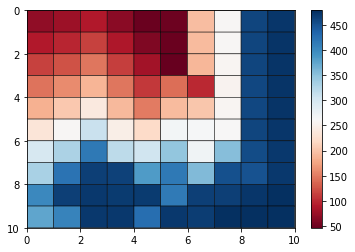

accuracy is 71.000000 lamba is 0.621242
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  2e+01  1e+00
 1:  8.4785e+01 -2.0495e+04  2e+04  2e-02  1e+01  2e+00
 2:  2.0519e+02 -1.5282e+04  2e+04  1e-02  9e+00  3e+00
 3:  2.1750e+02 -5.6874e+03  7e+03  5e-03  4e+00  2e+00
 4:  8.8115e+01 -2.4026e+03  3e+03  2e-03  2e+00  1e+00
 5: -8.1547e+00 -1.7357e+03  2e+03  1e-03  1e+00  1e+00
 6: -4.1362e+02 -1.5142e+03  2e+03  9e-04  7e-01  1e+00
 7: -7.1677e+02 -1.6576e+03  2e+03  8e-04  6e-01  1e+00
 8: -8.4840e+02 -1.6671e+03  2e+03  7e-04  5e-01  1e+00
 9: -1.0024e+03 -1.6313e+03  2e+03  5e-04  4e-01  1e+00
10: -1.0969e+03 -1.5666e+03  1e+03  4e-04  3e-01  1e+00
11: -1.2154e+03 -1.5360e+03  1e+03  3e-04  2e-01  8e-01
12: -1.3430e+03 -1.5328e+03  7e+02  2e-04  1e-01  5e-01
13: -1.4488e+03 -1.5360e+03  3e+02  7e-05  5e-02  3e-01
14: -1.5002e+03 -1.5400e+03  1e+02  3e-05  2e-02  1e-01
15: -1.5322e+03 -1.5458e+03  5e+01  1e-05  8e-03  5e-02
16: -1.541

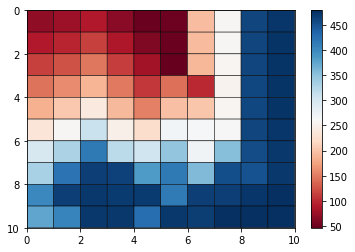

accuracy is 70.000000 lamba is 0.631263
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  2e+01  1e+00
 1:  8.5572e+01 -2.0485e+04  2e+04  2e-02  1e+01  2e+00
 2:  2.0701e+02 -1.5278e+04  2e+04  1e-02  9e+00  3e+00
 3:  2.1962e+02 -5.6502e+03  7e+03  5e-03  4e+00  2e+00
 4:  9.0818e+01 -2.3797e+03  3e+03  2e-03  1e+00  1e+00
 5: -7.9076e-01 -1.6944e+03  2e+03  1e-03  1e+00  1e+00
 6: -3.7969e+02 -1.4699e+03  2e+03  9e-04  7e-01  1e+00
 7: -6.8713e+02 -1.6203e+03  2e+03  7e-04  6e-01  1e+00
 8: -8.3664e+02 -1.6514e+03  2e+03  7e-04  5e-01  2e+00
 9: -9.9160e+02 -1.5812e+03  2e+03  5e-04  4e-01  1e+00
10: -1.1597e+03 -1.4955e+03  1e+03  3e-04  2e-01  8e-01
11: -1.2848e+03 -1.4964e+03  7e+02  2e-04  1e-01  6e-01
12: -1.3419e+03 -1.4861e+03  5e+02  1e-04  9e-02  4e-01
13: -1.4540e+03 -1.4945e+03  1e+02  3e-05  2e-02  1e-01
14: -1.4691e+03 -1.4947e+03  9e+01  2e-05  2e-02  8e-02
15: -1.4896e+03 -1.4980e+03  3e+01  7e-06  5e-03  3e-02
16: -1.494

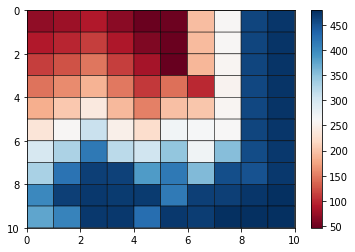

accuracy is 70.000000 lamba is 0.641283
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  2e+01  1e+00
 1:  8.6356e+01 -2.0475e+04  2e+04  2e-02  1e+01  2e+00
 2:  2.0881e+02 -1.5273e+04  2e+04  1e-02  9e+00  3e+00
 3:  2.2170e+02 -5.6127e+03  7e+03  5e-03  3e+00  2e+00
 4:  9.3451e+01 -2.3567e+03  3e+03  2e-03  1e+00  1e+00
 5:  6.2200e+00 -1.6534e+03  2e+03  1e-03  1e+00  1e+00
 6: -3.4816e+02 -1.4264e+03  2e+03  9e-04  6e-01  1e+00
 7: -6.5314e+02 -1.5799e+03  2e+03  7e-04  6e-01  1e+00
 8: -7.5799e+02 -1.6027e+03  2e+03  7e-04  5e-01  2e+00
 9: -9.2848e+02 -1.5485e+03  2e+03  5e-04  4e-01  1e+00
10: -1.0058e+03 -1.4686e+03  1e+03  4e-04  3e-01  1e+00
11: -1.1319e+03 -1.4302e+03  1e+03  2e-04  2e-01  8e-01
12: -1.2666e+03 -1.4351e+03  6e+02  1e-04  1e-01  5e-01
13: -1.3280e+03 -1.4397e+03  4e+02  9e-05  7e-02  3e-01
14: -1.4144e+03 -1.4463e+03  1e+02  3e-05  2e-02  1e-01
15: -1.4275e+03 -1.4466e+03  7e+01  2e-05  1e-02  6e-02
16: -1.441

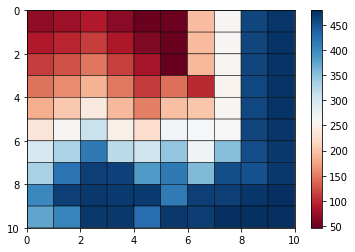

accuracy is 70.000000 lamba is 0.651303
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  2e+01  1e+00
 1:  8.7135e+01 -2.0465e+04  2e+04  2e-02  1e+01  2e+00
 2:  2.1059e+02 -1.5269e+04  2e+04  1e-02  9e+00  3e+00
 3:  2.2374e+02 -5.5748e+03  7e+03  5e-03  3e+00  2e+00
 4:  9.6015e+01 -2.3336e+03  3e+03  2e-03  1e+00  1e+00
 5:  1.2890e+01 -1.6125e+03  2e+03  1e-03  1e+00  1e+00
 6: -3.1898e+02 -1.3837e+03  2e+03  9e-04  6e-01  1e+00
 7: -6.2283e+02 -1.5399e+03  2e+03  7e-04  5e-01  1e+00
 8: -6.9756e+02 -1.5549e+03  2e+03  7e-04  5e-01  2e+00
 9: -8.6628e+02 -1.5040e+03  2e+03  5e-04  4e-01  1e+00
10: -9.2428e+02 -1.4239e+03  2e+03  4e-04  3e-01  1e+00
11: -1.0646e+03 -1.3745e+03  1e+03  2e-04  2e-01  9e-01
12: -1.2060e+03 -1.3848e+03  6e+02  1e-04  1e-01  5e-01
13: -1.2608e+03 -1.3861e+03  4e+02  1e-04  7e-02  4e-01
14: -1.3541e+03 -1.3938e+03  1e+02  3e-05  2e-02  1e-01
15: -1.3848e+03 -1.3988e+03  5e+01  1e-05  8e-03  5e-02
16: -1.392

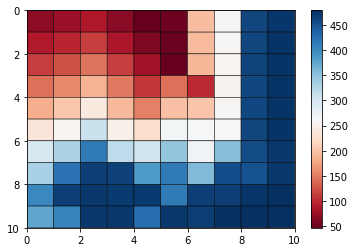

accuracy is 70.000000 lamba is 0.661323
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  2e+01  1e+00
 1:  8.7909e+01 -2.0455e+04  2e+04  2e-02  1e+01  2e+00
 2:  2.1235e+02 -1.5265e+04  2e+04  1e-02  9e+00  3e+00
 3:  2.2574e+02 -5.5366e+03  7e+03  5e-03  3e+00  2e+00
 4:  9.8512e+01 -2.3103e+03  3e+03  2e-03  1e+00  1e+00
 5:  1.9230e+01 -1.5719e+03  2e+03  1e-03  9e-01  1e+00
 6: -2.9579e+02 -1.3450e+03  2e+03  8e-04  6e-01  1e+00
 7: -5.9270e+02 -1.4998e+03  2e+03  7e-04  5e-01  1e+00
 8: -6.5233e+02 -1.5087e+03  2e+03  7e-04  5e-01  2e+00
 9: -8.2005e+02 -1.4581e+03  2e+03  5e-04  4e-01  1e+00
10: -8.6975e+02 -1.3788e+03  2e+03  4e-04  3e-01  1e+00
11: -1.0095e+03 -1.3304e+03  1e+03  3e-04  2e-01  9e-01
12: -1.1722e+03 -1.3386e+03  6e+02  1e-04  1e-01  5e-01
13: -1.2153e+03 -1.3349e+03  4e+02  1e-04  7e-02  4e-01
14: -1.3055e+03 -1.3451e+03  1e+02  3e-05  2e-02  1e-01
15: -1.3280e+03 -1.3487e+03  7e+01  2e-05  1e-02  7e-02
16: -1.343

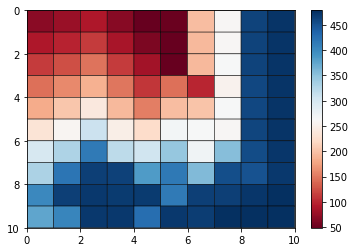

accuracy is 70.000000 lamba is 0.671343
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  2e+01  1e+00
 1:  8.8679e+01 -2.0445e+04  2e+04  2e-02  1e+01  2e+00
 2:  2.1410e+02 -1.5261e+04  2e+04  1e-02  9e+00  3e+00
 3:  2.2771e+02 -5.4981e+03  7e+03  5e-03  3e+00  2e+00
 4:  1.0094e+02 -2.2869e+03  3e+03  2e-03  1e+00  1e+00
 5:  2.5250e+01 -1.5315e+03  2e+03  1e-03  9e-01  1e+00
 6: -2.7542e+02 -1.3084e+03  2e+03  8e-04  6e-01  1e+00
 7: -5.6355e+02 -1.4588e+03  2e+03  7e-04  5e-01  1e+00
 8: -6.1323e+02 -1.4628e+03  2e+03  7e-04  5e-01  2e+00
 9: -7.8014e+02 -1.4114e+03  2e+03  5e-04  4e-01  1e+00
10: -8.2482e+02 -1.3329e+03  2e+03  4e-04  3e-01  1e+00
11: -9.6842e+02 -1.2867e+03  1e+03  3e-04  2e-01  9e-01
12: -1.1478e+03 -1.2901e+03  5e+02  1e-04  8e-02  4e-01
13: -1.1724e+03 -1.2876e+03  4e+02  9e-05  7e-02  3e-01
14: -1.2594e+03 -1.2987e+03  1e+02  3e-05  2e-02  1e-01
15: -1.2870e+03 -1.3013e+03  5e+01  1e-05  8e-03  5e-02
16: -1.296

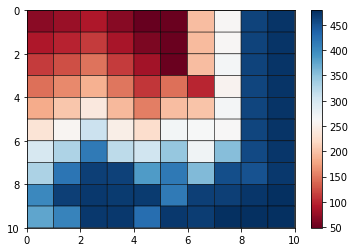

accuracy is 70.000000 lamba is 0.681363
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  2e+01  1e+00
 1:  8.9444e+01 -2.0435e+04  2e+04  2e-02  1e+01  2e+00
 2:  2.1583e+02 -1.5257e+04  2e+04  1e-02  9e+00  3e+00
 3:  2.2963e+02 -5.4593e+03  7e+03  5e-03  3e+00  2e+00
 4:  1.0331e+02 -2.2633e+03  3e+03  2e-03  1e+00  1e+00
 5:  3.0961e+01 -1.4913e+03  2e+03  1e-03  9e-01  1e+00
 6: -2.5590e+02 -1.2725e+03  2e+03  8e-04  6e-01  1e+00
 7: -5.3571e+02 -1.4175e+03  2e+03  7e-04  5e-01  1e+00
 8: -5.7697e+02 -1.4168e+03  2e+03  7e-04  5e-01  1e+00
 9: -7.4236e+02 -1.3644e+03  2e+03  5e-04  4e-01  1e+00
10: -7.8293e+02 -1.2869e+03  2e+03  4e-04  3e-01  1e+00
11: -9.3849e+02 -1.2424e+03  1e+03  2e-04  2e-01  8e-01
12: -1.1266e+03 -1.2410e+03  4e+02  9e-05  7e-02  3e-01
13: -1.1410e+03 -1.2402e+03  3e+02  8e-05  6e-02  3e-01
14: -1.1930e+03 -1.2478e+03  2e+02  4e-05  3e-02  2e-01
15: -1.2383e+03 -1.2531e+03  5e+01  1e-05  9e-03  5e-02
16: -1.248

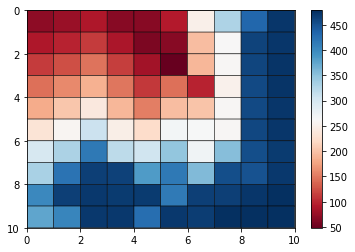

accuracy is 70.000000 lamba is 0.691383
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  2e+01  1e+00
 1:  9.0205e+01 -2.0425e+04  2e+04  2e-02  1e+01  2e+00
 2:  2.1754e+02 -1.5253e+04  2e+04  1e-02  9e+00  3e+00
 3:  2.3152e+02 -5.4202e+03  7e+03  5e-03  3e+00  2e+00
 4:  1.0560e+02 -2.2396e+03  3e+03  2e-03  1e+00  1e+00
 5:  3.6369e+01 -1.4512e+03  2e+03  1e-03  9e-01  1e+00
 6: -2.3717e+02 -1.2372e+03  2e+03  8e-04  6e-01  1e+00
 7: -5.0906e+02 -1.3759e+03  2e+03  7e-04  5e-01  1e+00
 8: -5.4316e+02 -1.3709e+03  2e+03  7e-04  5e-01  1e+00
 9: -7.0647e+02 -1.3171e+03  2e+03  5e-04  4e-01  1e+00
10: -7.4373e+02 -1.2406e+03  1e+03  4e-04  3e-01  1e+00
11: -9.1738e+02 -1.1981e+03  9e+02  2e-04  2e-01  7e-01
12: -1.0886e+03 -1.1930e+03  3e+02  8e-05  6e-02  3e-01
13: -1.1225e+03 -1.1967e+03  2e+02  6e-05  4e-02  2e-01
14: -1.1621e+03 -1.2018e+03  1e+02  3e-05  2e-02  1e-01
15: -1.1942e+03 -1.2058e+03  4e+01  9e-06  7e-03  4e-02
16: -1.200

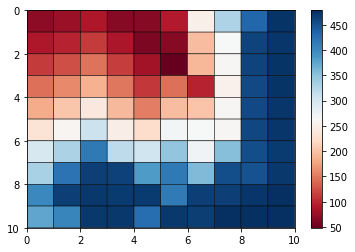

accuracy is 69.000000 lamba is 0.701403
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  2e+01  1e+00
 1:  9.0962e+01 -2.0415e+04  2e+04  2e-02  1e+01  2e+00
 2:  2.1924e+02 -1.5248e+04  2e+04  1e-02  9e+00  3e+00
 3:  2.3336e+02 -5.3808e+03  6e+03  4e-03  3e+00  2e+00
 4:  1.0784e+02 -2.2158e+03  3e+03  2e-03  1e+00  1e+00
 5:  4.1483e+01 -1.4113e+03  2e+03  1e-03  8e-01  1e+00
 6: -2.1917e+02 -1.2027e+03  2e+03  8e-04  6e-01  1e+00
 7: -4.8349e+02 -1.3339e+03  2e+03  7e-04  5e-01  1e+00
 8: -5.1148e+02 -1.3249e+03  2e+03  7e-04  5e-01  1e+00
 9: -6.7248e+02 -1.2696e+03  2e+03  5e-04  3e-01  1e+00
10: -7.0707e+02 -1.1944e+03  1e+03  4e-04  3e-01  1e+00
11: -9.0391e+02 -1.1544e+03  8e+02  2e-04  1e-01  6e-01
12: -1.0338e+03 -1.1482e+03  4e+02  9e-05  7e-02  3e-01
13: -1.0943e+03 -1.1551e+03  2e+02  5e-05  4e-02  2e-01
14: -1.1008e+03 -1.1532e+03  2e+02  4e-05  3e-02  2e-01
15: -1.1320e+03 -1.1568e+03  8e+01  2e-05  1e-02  8e-02
16: -1.148

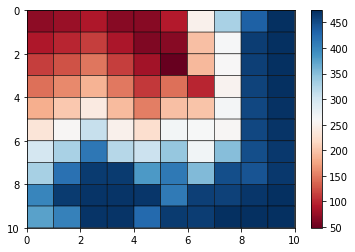

accuracy is 69.000000 lamba is 0.711423
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  2e+01  1e+00
 1:  9.1715e+01 -2.0405e+04  2e+04  2e-02  1e+01  2e+00
 2:  2.2092e+02 -1.5244e+04  2e+04  1e-02  9e+00  3e+00
 3:  2.3518e+02 -5.3411e+03  6e+03  4e-03  3e+00  2e+00
 4:  1.1001e+02 -2.1918e+03  3e+03  2e-03  1e+00  1e+00
 5:  4.6311e+01 -1.3716e+03  2e+03  1e-03  8e-01  1e+00
 6: -2.0186e+02 -1.1688e+03  2e+03  8e-04  6e-01  1e+00
 7: -4.5888e+02 -1.2917e+03  2e+03  7e-04  5e-01  1e+00
 8: -4.8170e+02 -1.2789e+03  2e+03  6e-04  5e-01  1e+00
 9: -6.4055e+02 -1.2220e+03  2e+03  5e-04  3e-01  1e+00
10: -6.7290e+02 -1.1484e+03  1e+03  4e-04  3e-01  1e+00
11: -8.9649e+02 -1.1116e+03  7e+02  2e-04  1e-01  5e-01
12: -1.0098e+03 -1.1051e+03  3e+02  8e-05  6e-02  3e-01
13: -1.0600e+03 -1.1105e+03  2e+02  4e-05  3e-02  1e-01
14: -1.0625e+03 -1.1087e+03  2e+02  4e-05  3e-02  1e-01
15: -1.0901e+03 -1.1109e+03  7e+01  2e-05  1e-02  6e-02
16: -1.090

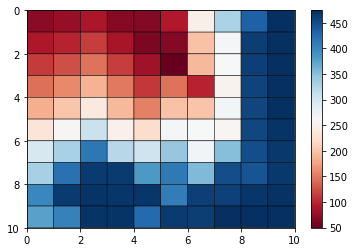

accuracy is 70.000000 lamba is 0.721443
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  2e+01  1e+00
 1:  9.2463e+01 -2.0395e+04  2e+04  2e-02  1e+01  2e+00
 2:  2.2259e+02 -1.5240e+04  2e+04  1e-02  9e+00  3e+00
 3:  2.3695e+02 -5.3011e+03  6e+03  4e-03  3e+00  2e+00
 4:  1.1211e+02 -2.1676e+03  3e+03  2e-03  1e+00  1e+00
 5:  5.0858e+01 -1.3320e+03  2e+03  1e-03  8e-01  1e+00
 6: -1.8517e+02 -1.1357e+03  2e+03  8e-04  5e-01  1e+00
 7: -4.3513e+02 -1.2492e+03  2e+03  7e-04  5e-01  1e+00
 8: -4.5359e+02 -1.2330e+03  2e+03  6e-04  4e-01  1e+00
 9: -6.0258e+02 -1.1774e+03  2e+03  5e-04  3e-01  1e+00
10: -6.5678e+02 -1.1161e+03  1e+03  4e-04  3e-01  1e+00
11: -8.5427e+02 -1.0797e+03  7e+02  2e-04  1e-01  5e-01
12: -9.6115e+02 -1.0681e+03  3e+02  9e-05  6e-02  3e-01
13: -9.9497e+02 -1.0628e+03  2e+02  5e-05  4e-02  2e-01
14: -1.0349e+03 -1.0661e+03  1e+02  3e-05  2e-02  9e-02
15: -1.0488e+03 -1.0650e+03  5e+01  1e-05  9e-03  5e-02
16: -1.063

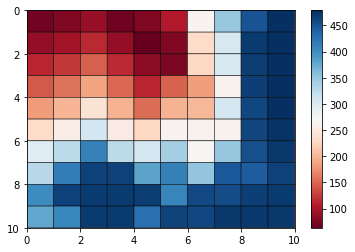

accuracy is 67.000000 lamba is 0.731463
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  2e+01  1e+00
 1:  9.3208e+01 -2.0385e+04  2e+04  2e-02  1e+01  2e+00
 2:  2.2424e+02 -1.5236e+04  2e+04  1e-02  9e+00  3e+00
 3:  2.3877e+02 -5.2628e+03  6e+03  4e-03  3e+00  2e+00
 4:  1.1418e+02 -2.1437e+03  3e+03  2e-03  1e+00  1e+00
 5:  5.5183e+01 -1.2928e+03  2e+03  1e-03  8e-01  1e+00
 6: -1.6878e+02 -1.1032e+03  2e+03  7e-04  5e-01  1e+00
 7: -4.1054e+02 -1.2081e+03  2e+03  6e-04  5e-01  1e+00
 8: -4.2502e+02 -1.1882e+03  2e+03  6e-04  4e-01  1e+00
 9: -5.6534e+02 -1.1342e+03  2e+03  5e-04  3e-01  1e+00
10: -6.7526e+02 -1.0647e+03  1e+03  3e-04  2e-01  9e-01
11: -8.7640e+02 -1.0213e+03  4e+02  1e-04  8e-02  4e-01
12: -9.5493e+02 -1.0201e+03  2e+02  5e-05  4e-02  2e-01
13: -9.7309e+02 -1.0191e+03  1e+02  4e-05  3e-02  1e-01
14: -1.0009e+03 -1.0218e+03  7e+01  2e-05  1e-02  6e-02
15: -1.0022e+03 -1.0216e+03  6e+01  2e-05  1e-02  6e-02
16: -1.015

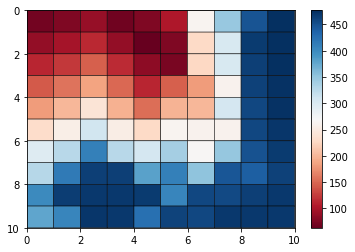

accuracy is 68.000000 lamba is 0.741483
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  2e+01  1e+00
 1:  9.3948e+01 -2.0375e+04  2e+04  2e-02  1e+01  2e+00
 2:  2.2588e+02 -1.5231e+04  2e+04  1e-02  9e+00  3e+00
 3:  2.4204e+02 -5.2603e+03  6e+03  4e-03  3e+00  2e+00
 4:  1.1665e+02 -2.1283e+03  3e+03  2e-03  1e+00  1e+00
 5:  6.0185e+01 -1.2574e+03  2e+03  1e-03  8e-01  1e+00
 6: -1.4808e+02 -1.0708e+03  2e+03  7e-04  5e-01  1e+00
 7: -3.8425e+02 -1.1712e+03  2e+03  6e-04  4e-01  1e+00
 8: -3.9193e+02 -1.1456e+03  2e+03  6e-04  4e-01  1e+00
 9: -5.2319e+02 -1.0963e+03  2e+03  5e-04  3e-01  1e+00
10: -6.8180e+02 -1.0326e+03  1e+03  3e-04  2e-01  8e-01
11: -8.3873e+02 -9.9054e+02  5e+02  1e-04  9e-02  4e-01
12: -9.0864e+02 -9.7568e+02  2e+02  5e-05  4e-02  2e-01
13: -9.5089e+02 -9.7734e+02  8e+01  2e-05  2e-02  8e-02
14: -9.6229e+02 -9.7748e+02  5e+01  1e-05  9e-03  5e-02
15: -9.7149e+02 -9.7797e+02  2e+01  5e-06  4e-03  2e-02
16: -9.763

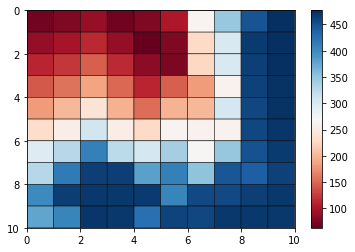

accuracy is 68.000000 lamba is 0.751503
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  2e+01  1e+00
 1:  9.4684e+01 -2.0365e+04  2e+04  2e-02  1e+01  2e+00
 2:  2.2750e+02 -1.5227e+04  2e+04  1e-02  9e+00  3e+00
 3:  2.4529e+02 -5.2576e+03  6e+03  4e-03  3e+00  2e+00
 4:  1.1906e+02 -2.1128e+03  3e+03  2e-03  1e+00  1e+00
 5:  6.4882e+01 -1.2219e+03  2e+03  1e-03  7e-01  1e+00
 6: -1.2841e+02 -1.0391e+03  2e+03  7e-04  5e-01  1e+00
 7: -3.5901e+02 -1.1337e+03  2e+03  6e-04  4e-01  1e+00
 8: -3.6136e+02 -1.1032e+03  2e+03  6e-04  4e-01  1e+00
 9: -4.8588e+02 -1.0581e+03  2e+03  5e-04  3e-01  1e+00
10: -6.1360e+02 -1.0163e+03  1e+03  3e-04  2e-01  9e-01
11: -7.3913e+02 -9.5401e+02  6e+02  2e-04  1e-01  5e-01
12: -8.5242e+02 -9.3457e+02  3e+02  7e-05  5e-02  2e-01
13: -9.1460e+02 -9.3663e+02  7e+01  2e-05  1e-02  7e-02
14: -9.2948e+02 -9.3679e+02  2e+01  6e-06  4e-03  2e-02
15: -9.3446e+02 -9.3676e+02  7e+00  2e-06  1e-03  7e-03
16: -9.359

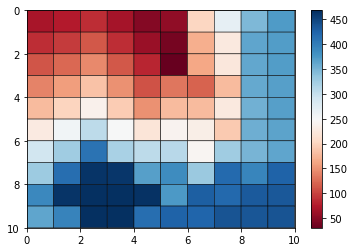

accuracy is 69.000000 lamba is 0.761523
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  2e+01  1e+00
 1:  9.5416e+01 -2.0355e+04  2e+04  2e-02  1e+01  2e+00
 2:  2.2910e+02 -1.5223e+04  2e+04  1e-02  9e+00  3e+00
 3:  2.4854e+02 -5.2547e+03  6e+03  4e-03  3e+00  2e+00
 4:  1.2142e+02 -2.0974e+03  3e+03  2e-03  1e+00  1e+00
 5:  6.9284e+01 -1.1864e+03  2e+03  1e-03  7e-01  1e+00
 6: -1.0967e+02 -1.0081e+03  2e+03  7e-04  5e-01  1e+00
 7: -3.3471e+02 -1.0958e+03  2e+03  6e-04  4e-01  1e+00
 8: -3.3297e+02 -1.0611e+03  2e+03  6e-04  4e-01  1e+00
 9: -4.5249e+02 -1.0195e+03  2e+03  5e-04  3e-01  1e+00
10: -5.8775e+02 -9.7832e+02  1e+03  3e-04  2e-01  8e-01
11: -6.6582e+02 -9.1432e+02  7e+02  2e-04  1e-01  6e-01
12: -7.8786e+02 -9.0165e+02  3e+02  9e-05  6e-02  3e-01
13: -8.5948e+02 -8.9732e+02  1e+02  3e-05  2e-02  1e-01
14: -8.8432e+02 -8.9697e+02  4e+01  1e-05  7e-03  4e-02
15: -8.9290e+02 -8.9607e+02  1e+01  3e-06  2e-03  1e-02
16: -8.943

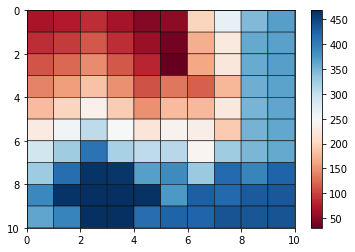

accuracy is 69.000000 lamba is 0.771543
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  2e+01  1e+00
 1:  9.6144e+01 -2.0345e+04  2e+04  2e-02  1e+01  2e+00
 2:  2.3069e+02 -1.5218e+04  2e+04  1e-02  9e+00  3e+00
 3:  2.5176e+02 -5.2515e+03  6e+03  4e-03  3e+00  2e+00
 4:  1.2372e+02 -2.0819e+03  3e+03  2e-03  1e+00  1e+00
 5:  7.3400e+01 -1.1509e+03  2e+03  1e-03  7e-01  1e+00
 6: -9.1758e+01 -9.7778e+02  2e+03  7e-04  5e-01  1e+00
 7: -3.1126e+02 -1.0574e+03  2e+03  6e-04  4e-01  1e+00
 8: -3.0650e+02 -1.0192e+03  2e+03  6e-04  4e-01  1e+00
 9: -4.1741e+02 -9.8191e+02  2e+03  5e-04  3e-01  1e+00
10: -5.3463e+02 -9.4341e+02  1e+03  3e-04  2e-01  9e-01
11: -5.9631e+02 -8.9343e+02  9e+02  2e-04  2e-01  7e-01
12: -7.4953e+02 -8.6675e+02  4e+02  9e-05  7e-02  3e-01
13: -8.1059e+02 -8.5721e+02  1e+02  4e-05  3e-02  1e-01
14: -8.3869e+02 -8.5681e+02  6e+01  1e-05  1e-02  5e-02
15: -8.5160e+02 -8.5568e+02  1e+01  3e-06  2e-03  1e-02
16: -8.538

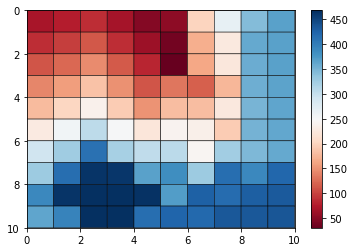

accuracy is 69.000000 lamba is 0.781563
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  2e+01  1e+00
 1:  9.6868e+01 -2.0335e+04  2e+04  2e-02  1e+01  2e+00
 2:  2.3227e+02 -1.5214e+04  2e+04  1e-02  9e+00  3e+00
 3:  2.5498e+02 -5.2481e+03  6e+03  4e-03  3e+00  2e+00
 4:  1.2597e+02 -2.0663e+03  3e+03  2e-03  1e+00  1e+00
 5:  7.7239e+01 -1.1153e+03  2e+03  1e-03  7e-01  1e+00
 6: -7.4603e+01 -9.4805e+02  2e+03  7e-04  5e-01  1e+00
 7: -2.8860e+02 -1.0186e+03  2e+03  6e-04  4e-01  1e+00
 8: -2.8175e+02 -9.7769e+02  2e+03  6e-04  4e-01  1e+00
 9: -3.7279e+02 -9.4749e+02  2e+03  5e-04  3e-01  1e+00
10: -4.8292e+02 -9.1072e+02  1e+03  3e-04  2e-01  9e-01
11: -5.2110e+02 -8.7402e+02  1e+03  3e-04  2e-01  8e-01
12: -6.5770e+02 -8.3964e+02  5e+02  1e-04  1e-01  4e-01
13: -7.3784e+02 -8.2513e+02  3e+02  7e-05  5e-02  2e-01
14: -7.6943e+02 -8.1966e+02  2e+02  4e-05  3e-02  1e-01
15: -8.0061e+02 -8.1711e+02  5e+01  1e-05  9e-03  4e-02
16: -8.086

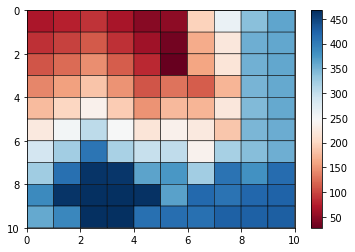

accuracy is 68.000000 lamba is 0.791583
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  2e+01  1e+00
 1:  9.7588e+01 -2.0325e+04  2e+04  2e-02  1e+01  2e+00
 2:  2.3383e+02 -1.5210e+04  2e+04  1e-02  9e+00  3e+00
 3:  2.5818e+02 -5.2445e+03  6e+03  4e-03  3e+00  2e+00
 4:  1.2817e+02 -2.0508e+03  3e+03  2e-03  1e+00  1e+00
 5:  8.0808e+01 -1.0796e+03  2e+03  9e-04  6e-01  9e-01
 6: -5.8131e+01 -9.1893e+02  2e+03  7e-04  5e-01  1e+00
 7: -2.6670e+02 -9.7934e+02  2e+03  6e-04  4e-01  1e+00
 8: -2.5857e+02 -9.3640e+02  2e+03  5e-04  4e-01  1e+00
 9: -3.3663e+02 -9.1022e+02  2e+03  5e-04  3e-01  1e+00
10: -4.4941e+02 -8.6916e+02  1e+03  3e-04  2e-01  9e-01
11: -5.2462e+02 -8.2388e+02  9e+02  2e-04  2e-01  7e-01
12: -6.2152e+02 -7.8909e+02  5e+02  1e-04  9e-02  4e-01
13: -7.0516e+02 -7.8060e+02  2e+02  6e-05  4e-02  2e-01
14: -7.4671e+02 -7.7576e+02  9e+01  2e-05  2e-02  8e-02
15: -7.6554e+02 -7.7549e+02  3e+01  8e-06  6e-03  3e-02
16: -7.729

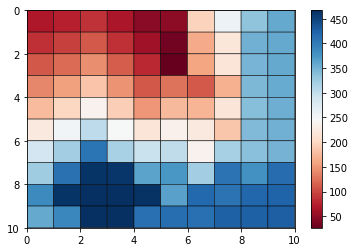

accuracy is 68.000000 lamba is 0.801603
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  2e+01  1e+00
 1:  9.8304e+01 -2.0315e+04  2e+04  2e-02  1e+01  2e+00
 2:  2.3537e+02 -1.5205e+04  2e+04  1e-02  9e+00  3e+00
 3:  2.6136e+02 -5.2406e+03  6e+03  4e-03  3e+00  2e+00
 4:  1.3031e+02 -2.0353e+03  3e+03  2e-03  1e+00  1e+00
 5:  8.4113e+01 -1.0438e+03  1e+03  9e-04  6e-01  9e-01
 6: -4.2281e+01 -8.9041e+02  1e+03  7e-04  5e-01  1e+00
 7: -2.4555e+02 -9.3963e+02  2e+03  6e-04  4e-01  1e+00
 8: -2.3688e+02 -8.9539e+02  2e+03  5e-04  4e-01  1e+00
 9: -3.0376e+02 -8.7203e+02  1e+03  5e-04  3e-01  1e+00
10: -4.6303e+02 -8.1201e+02  1e+03  3e-04  2e-01  7e-01
11: -5.5885e+02 -7.8232e+02  6e+02  2e-04  1e-01  5e-01
12: -6.2425e+02 -7.4994e+02  4e+02  1e-04  7e-02  3e-01
13: -6.9856e+02 -7.3782e+02  1e+02  3e-05  2e-02  1e-01
14: -7.1076e+02 -7.3626e+02  8e+01  2e-05  1e-02  7e-02
15: -7.2502e+02 -7.3573e+02  3e+01  9e-06  6e-03  3e-02
16: -7.333

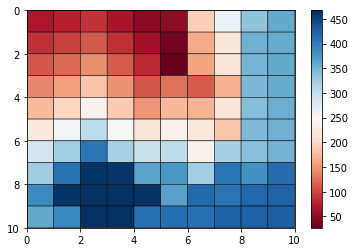

accuracy is 68.000000 lamba is 0.811623
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  2e+01  1e+00
 1:  9.9016e+01 -2.0305e+04  2e+04  2e-02  1e+01  2e+00
 2:  2.3691e+02 -1.5201e+04  2e+04  1e-02  9e+00  3e+00
 3:  2.6454e+02 -5.2366e+03  6e+03  4e-03  3e+00  2e+00
 4:  1.3241e+02 -2.0197e+03  2e+03  2e-03  1e+00  1e+00
 5:  8.7159e+01 -1.0080e+03  1e+03  9e-04  6e-01  9e-01
 6: -2.6999e+01 -8.6245e+02  1e+03  7e-04  5e-01  1e+00
 7: -2.2514e+02 -8.9944e+02  2e+03  5e-04  4e-01  1e+00
 8: -2.1662e+02 -8.5464e+02  1e+03  5e-04  4e-01  1e+00
 9: -2.7247e+02 -8.3388e+02  1e+03  4e-04  3e-01  1e+00
10: -4.3663e+02 -7.7305e+02  9e+02  3e-04  2e-01  7e-01
11: -5.3219e+02 -7.4010e+02  6e+02  2e-04  1e-01  5e-01
12: -5.8753e+02 -7.0834e+02  4e+02  1e-04  7e-02  3e-01
13: -6.6634e+02 -7.0092e+02  1e+02  3e-05  2e-02  9e-02
14: -6.8490e+02 -6.9797e+02  4e+01  1e-05  7e-03  4e-02
15: -6.8928e+02 -6.9792e+02  3e+01  7e-06  5e-03  2e-02
16: -6.933

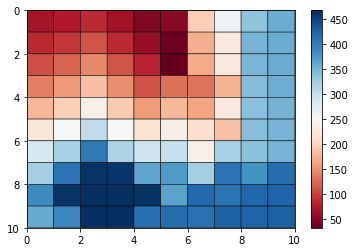

accuracy is 68.000000 lamba is 0.821643
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  2e+01  1e+00
 1:  9.9725e+01 -2.0295e+04  2e+04  2e-02  1e+01  2e+00
 2:  2.3842e+02 -1.5197e+04  2e+04  1e-02  8e+00  3e+00
 3:  2.6770e+02 -5.2323e+03  6e+03  4e-03  3e+00  2e+00
 4:  1.3445e+02 -2.0041e+03  2e+03  2e-03  1e+00  1e+00
 5:  8.9953e+01 -9.7212e+02  1e+03  9e-04  6e-01  9e-01
 6: -1.2241e+01 -8.3504e+02  1e+03  7e-04  5e-01  1e+00
 7: -2.0552e+02 -8.5873e+02  1e+03  5e-04  4e-01  1e+00
 8: -1.9782e+02 -8.1417e+02  1e+03  5e-04  3e-01  1e+00
 9: -2.4940e+02 -7.9387e+02  1e+03  4e-04  3e-01  1e+00
10: -3.9874e+02 -7.3569e+02  9e+02  3e-04  2e-01  7e-01
11: -5.1465e+02 -6.9485e+02  5e+02  1e-04  1e-01  4e-01
12: -5.7917e+02 -6.6386e+02  2e+02  7e-05  5e-02  2e-01
13: -6.3566e+02 -6.6172e+02  8e+01  2e-05  1e-02  7e-02
14: -6.5419e+02 -6.5996e+02  2e+01  5e-06  3e-03  2e-02
15: -6.5567e+02 -6.5988e+02  1e+01  3e-06  2e-03  1e-02
16: -6.589

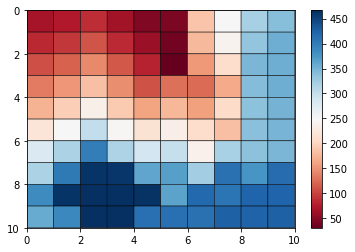

accuracy is 68.000000 lamba is 0.831663
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  2e+01  1e+00
 1:  1.0043e+02 -2.0285e+04  2e+04  2e-02  1e+01  2e+00
 2:  2.3993e+02 -1.5192e+04  2e+04  1e-02  8e+00  3e+00
 3:  2.7085e+02 -5.2278e+03  6e+03  4e-03  3e+00  2e+00
 4:  1.3645e+02 -1.9885e+03  2e+03  2e-03  1e+00  1e+00
 5:  9.2509e+01 -9.3643e+02  1e+03  8e-04  6e-01  9e-01
 6:  2.0627e+00 -8.0799e+02  1e+03  6e-04  4e-01  1e+00
 7: -1.8678e+02 -8.1744e+02  1e+03  5e-04  3e-01  1e+00
 8: -1.8061e+02 -7.7413e+02  1e+03  5e-04  3e-01  1e+00
 9: -2.0701e+02 -7.6491e+02  1e+03  4e-04  3e-01  1e+00
10: -2.5592e+02 -7.0620e+02  1e+03  4e-04  2e-01  1e+00
11: -4.5728e+02 -6.5831e+02  6e+02  2e-04  1e-01  5e-01
12: -5.1180e+02 -6.3993e+02  4e+02  1e-04  7e-02  3e-01
13: -5.8181e+02 -6.2827e+02  1e+02  4e-05  3e-02  1e-01
14: -6.0696e+02 -6.2346e+02  5e+01  1e-05  9e-03  5e-02
15: -6.1856e+02 -6.2310e+02  1e+01  4e-06  2e-03  1e-02
16: -6.217

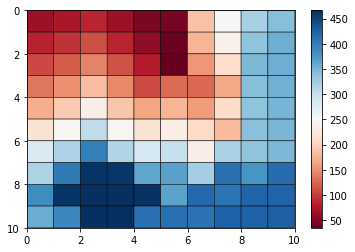

accuracy is 68.000000 lamba is 0.841683
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  2e+01  1e+00
 1:  1.0113e+02 -2.0275e+04  2e+04  2e-02  1e+01  2e+00
 2:  2.4142e+02 -1.5188e+04  2e+04  1e-02  8e+00  3e+00
 3:  2.7390e+02 -5.2473e+03  6e+03  4e-03  3e+00  2e+00
 4:  1.3816e+02 -1.9771e+03  2e+03  2e-03  1e+00  1e+00
 5:  9.5522e+01 -9.1394e+02  1e+03  8e-04  5e-01  8e-01
 6:  1.7127e+01 -7.7551e+02  1e+03  6e-04  4e-01  1e+00
 7: -1.7076e+02 -7.7537e+02  1e+03  5e-04  3e-01  1e+00
 8: -1.6776e+02 -7.4863e+02  1e+03  5e-04  3e-01  1e+00
 9: -1.9836e+02 -7.0665e+02  1e+03  4e-04  3e-01  1e+00
10: -3.0110e+02 -6.5437e+02  9e+02  3e-04  2e-01  8e-01
11: -4.5562e+02 -6.1271e+02  4e+02  1e-04  9e-02  4e-01
12: -5.0533e+02 -5.9768e+02  3e+02  7e-05  5e-02  2e-01
13: -5.5490e+02 -5.8919e+02  1e+02  3e-05  2e-02  9e-02
14: -5.7988e+02 -5.8661e+02  2e+01  5e-06  4e-03  2e-02
15: -5.8464e+02 -5.8631e+02  5e+00  1e-06  9e-04  5e-03
16: -5.854

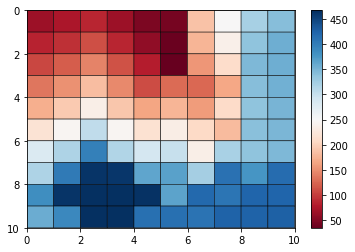

accuracy is 68.000000 lamba is 0.851703
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  2e+01  1e+00
 1:  1.0183e+02 -2.0265e+04  2e+04  2e-02  1e+01  2e+00
 2:  2.4290e+02 -1.5183e+04  2e+04  1e-02  8e+00  3e+00
 3:  2.7688e+02 -5.2837e+03  6e+03  4e-03  3e+00  2e+00
 4:  1.3966e+02 -1.9685e+03  2e+03  2e-03  1e+00  1e+00
 5:  9.8427e+01 -8.9309e+02  1e+03  8e-04  5e-01  8e-01
 6:  3.0488e+01 -7.4361e+02  1e+03  6e-04  4e-01  9e-01
 7: -1.5288e+02 -7.3131e+02  1e+03  5e-04  3e-01  1e+00
 8: -1.5549e+02 -7.0821e+02  1e+03  4e-04  3e-01  9e-01
 9: -1.8810e+02 -6.7838e+02  1e+03  4e-04  3e-01  9e-01
10: -2.0639e+02 -6.5863e+02  1e+03  4e-04  2e-01  9e-01
11: -3.6364e+02 -6.1352e+02  7e+02  2e-04  1e-01  5e-01
12: -4.4289e+02 -5.7376e+02  4e+02  1e-04  7e-02  3e-01
13: -4.9943e+02 -5.5893e+02  2e+02  5e-05  3e-02  1e-01
14: -5.1857e+02 -5.5312e+02  1e+02  3e-05  2e-02  9e-02
15: -5.4328e+02 -5.5027e+02  2e+01  6e-06  4e-03  2e-02
16: -5.487

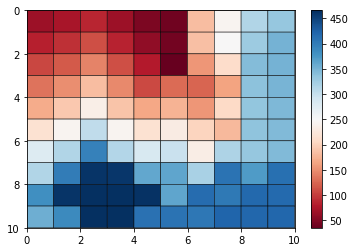

accuracy is 66.000000 lamba is 0.861723
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  2e+01  1e+00
 1:  1.0252e+02 -2.0255e+04  2e+04  2e-02  1e+01  2e+00
 2:  2.4437e+02 -1.5179e+04  2e+04  1e-02  8e+00  3e+00
 3:  2.7984e+02 -5.3195e+03  6e+03  4e-03  3e+00  2e+00
 4:  1.4112e+02 -1.9599e+03  2e+03  2e-03  1e+00  1e+00
 5:  1.0104e+02 -8.7205e+02  1e+03  8e-04  5e-01  8e-01
 6:  4.1997e+01 -7.1277e+02  1e+03  6e-04  4e-01  9e-01
 7: -1.3668e+02 -6.8547e+02  1e+03  4e-04  3e-01  9e-01
 8: -1.5145e+02 -6.4914e+02  1e+03  4e-04  3e-01  9e-01
 9: -1.9389e+02 -6.3206e+02  1e+03  4e-04  2e-01  8e-01
10: -1.8671e+02 -6.1674e+02  1e+03  3e-04  2e-01  8e-01
11: -3.2373e+02 -5.7743e+02  7e+02  2e-04  1e-01  5e-01
12: -3.8209e+02 -5.5078e+02  5e+02  1e-04  9e-02  4e-01
13: -4.5663e+02 -5.2598e+02  2e+02  6e-05  4e-02  2e-01
14: -4.8480e+02 -5.1886e+02  1e+02  3e-05  2e-02  8e-02
15: -5.0099e+02 -5.1535e+02  4e+01  1e-05  8e-03  4e-02
16: -5.087

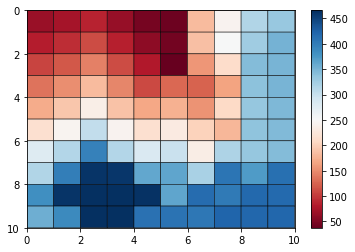

accuracy is 66.000000 lamba is 0.871743
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  1e+01  1e+00
 1:  1.0321e+02 -2.0245e+04  2e+04  2e-02  1e+01  2e+00
 2:  2.4582e+02 -1.5174e+04  2e+04  1e-02  8e+00  3e+00
 3:  2.8277e+02 -5.3550e+03  6e+03  5e-03  3e+00  2e+00
 4:  1.4254e+02 -1.9512e+03  2e+03  2e-03  1e+00  9e-01
 5:  1.0338e+02 -8.5082e+02  1e+03  8e-04  5e-01  8e-01
 6:  5.1999e+01 -6.8279e+02  1e+03  6e-04  4e-01  9e-01
 7: -1.2196e+02 -6.3785e+02  1e+03  4e-04  3e-01  9e-01
 8: -1.3383e+02 -6.0658e+02  1e+03  4e-04  3e-01  8e-01
 9: -2.2173e+02 -5.6897e+02  9e+02  3e-04  2e-01  7e-01
10: -3.0858e+02 -5.3208e+02  6e+02  2e-04  1e-01  5e-01
11: -3.7404e+02 -4.9840e+02  3e+02  1e-04  7e-02  3e-01
12: -4.3668e+02 -4.8465e+02  1e+02  4e-05  3e-02  1e-01
13: -4.5999e+02 -4.8079e+02  6e+01  2e-05  1e-02  5e-02
14: -4.6853e+02 -4.7971e+02  3e+01  9e-06  6e-03  3e-02
15: -4.7521e+02 -4.7897e+02  1e+01  3e-06  2e-03  1e-02
16: -4.776

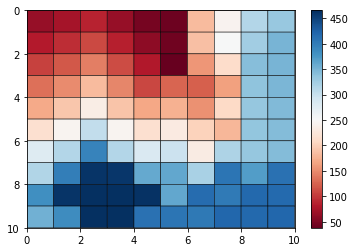

accuracy is 66.000000 lamba is 0.881764
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  1e+01  1e+00
 1:  1.0390e+02 -2.0235e+04  2e+04  2e-02  1e+01  2e+00
 2:  2.4726e+02 -1.5170e+04  2e+04  1e-02  8e+00  3e+00
 3:  2.8567e+02 -5.3899e+03  7e+03  5e-03  3e+00  2e+00
 4:  1.4406e+02 -1.9421e+03  2e+03  2e-03  1e+00  9e-01
 5:  1.0551e+02 -8.2924e+02  1e+03  7e-04  5e-01  7e-01
 6:  6.0754e+01 -6.5348e+02  1e+03  6e-04  4e-01  8e-01
 7: -1.0857e+02 -5.8843e+02  1e+03  4e-04  3e-01  8e-01
 8: -1.1672e+02 -5.6224e+02  1e+03  4e-04  2e-01  8e-01
 9: -2.0498e+02 -5.2376e+02  8e+02  3e-04  2e-01  6e-01
10: -2.6962e+02 -4.9759e+02  6e+02  2e-04  1e-01  5e-01
11: -3.4555e+02 -4.6971e+02  3e+02  1e-04  7e-02  3e-01
12: -3.8174e+02 -4.5573e+02  2e+02  6e-05  4e-02  2e-01
13: -4.2390e+02 -4.4820e+02  7e+01  2e-05  1e-02  6e-02
14: -4.3674e+02 -4.4567e+02  2e+01  7e-06  5e-03  2e-02
15: -4.4138e+02 -4.4478e+02  9e+00  3e-06  2e-03  9e-03
16: -4.431

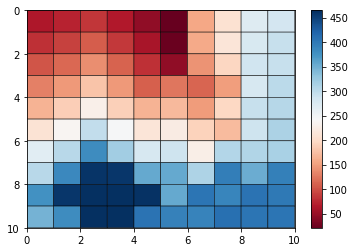

accuracy is 69.000000 lamba is 0.891784
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  1e+01  1e+00
 1:  1.0458e+02 -2.0225e+04  2e+04  2e-02  1e+01  2e+00
 2:  2.4868e+02 -1.5166e+04  2e+04  1e-02  8e+00  3e+00
 3:  2.8855e+02 -5.4244e+03  7e+03  5e-03  3e+00  2e+00
 4:  1.4593e+02 -1.9321e+03  2e+03  2e-03  1e+00  9e-01
 5:  1.0755e+02 -8.0708e+02  1e+03  7e-04  5e-01  7e-01
 6:  6.8495e+01 -6.2465e+02  1e+03  6e-04  4e-01  8e-01
 7: -9.6375e+01 -5.3723e+02  1e+03  4e-04  2e-01  8e-01
 8: -1.0198e+02 -5.1363e+02  9e+02  3e-04  2e-01  7e-01
 9: -1.7178e+02 -4.8693e+02  7e+02  3e-04  2e-01  6e-01
10: -2.4445e+02 -4.7074e+02  6e+02  2e-04  1e-01  5e-01
11: -2.5575e+02 -4.6039e+02  5e+02  2e-04  1e-01  4e-01
12: -3.0288e+02 -4.3447e+02  4e+02  1e-04  7e-02  3e-01
13: -3.8432e+02 -4.1701e+02  9e+01  3e-05  2e-02  8e-02
14: -4.0304e+02 -4.1272e+02  3e+01  8e-06  5e-03  3e-02
15: -4.0799e+02 -4.1207e+02  1e+01  3e-06  2e-03  1e-02
16: -4.093

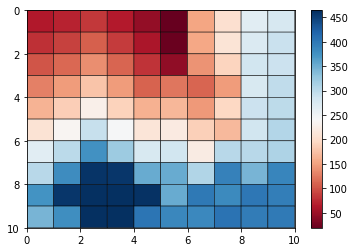

accuracy is 69.000000 lamba is 0.901804
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  1e+01  1e+00
 1:  1.0526e+02 -2.0215e+04  2e+04  2e-02  1e+01  2e+00
 2:  2.5010e+02 -1.5161e+04  2e+04  1e-02  8e+00  3e+00
 3:  2.9141e+02 -5.4585e+03  7e+03  5e-03  3e+00  2e+00
 4:  1.4777e+02 -1.9219e+03  2e+03  2e-03  1e+00  9e-01
 5:  1.0937e+02 -7.8479e+02  1e+03  7e-04  5e-01  7e-01
 6:  7.5321e+01 -5.9632e+02  1e+03  5e-04  4e-01  8e-01
 7: -7.8053e+01 -4.8918e+02  9e+02  3e-04  2e-01  7e-01
 8: -8.5536e+01 -4.7672e+02  8e+02  3e-04  2e-01  7e-01
 9: -1.4840e+02 -4.6357e+02  7e+02  3e-04  2e-01  6e-01
10: -1.8855e+02 -4.4231e+02  6e+02  2e-04  1e-01  5e-01
11: -2.5043e+02 -4.1246e+02  4e+02  1e-04  9e-02  3e-01
12: -2.8811e+02 -3.9639e+02  3e+02  9e-05  6e-02  3e-01
13: -3.6072e+02 -3.8258e+02  6e+01  2e-05  1e-02  6e-02
14: -3.6960e+02 -3.8098e+02  3e+01  9e-06  6e-03  3e-02
15: -3.7650e+02 -3.8024e+02  1e+01  3e-06  2e-03  1e-02
16: -3.780

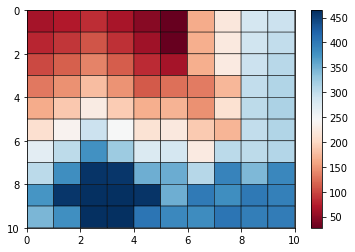

accuracy is 69.000000 lamba is 0.911824
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  1e+01  1e+00
 1:  1.0593e+02 -2.0205e+04  2e+04  2e-02  1e+01  2e+00
 2:  2.5150e+02 -1.5157e+04  2e+04  1e-02  8e+00  3e+00
 3:  2.9425e+02 -5.4921e+03  7e+03  5e-03  3e+00  2e+00
 4:  1.4957e+02 -1.9116e+03  2e+03  2e-03  1e+00  9e-01
 5:  1.1097e+02 -7.6238e+02  1e+03  7e-04  5e-01  7e-01
 6:  8.1333e+01 -5.6844e+02  1e+03  5e-04  3e-01  7e-01
 7: -5.1036e+01 -4.5062e+02  8e+02  3e-04  2e-01  7e-01
 8: -9.0152e+01 -4.4907e+02  8e+02  3e-04  2e-01  6e-01
 9: -1.3818e+02 -4.2792e+02  7e+02  2e-04  2e-01  5e-01
10: -1.7801e+02 -4.0647e+02  6e+02  2e-04  1e-01  5e-01
11: -2.0655e+02 -3.9056e+02  5e+02  1e-04  1e-01  4e-01
12: -2.6416e+02 -3.7430e+02  3e+02  9e-05  6e-02  2e-01
13: -3.0924e+02 -3.5566e+02  1e+02  4e-05  2e-02  1e-01
14: -3.2085e+02 -3.5348e+02  9e+01  3e-05  2e-02  8e-02
15: -3.4271e+02 -3.5070e+02  2e+01  6e-06  4e-03  2e-02
16: -3.474

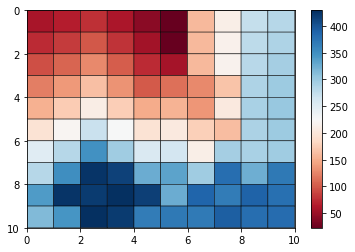

accuracy is 68.000000 lamba is 0.921844
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  1e+01  1e+00
 1:  1.0661e+02 -2.0195e+04  2e+04  2e-02  1e+01  2e+00
 2:  2.5289e+02 -1.5152e+04  2e+04  1e-02  8e+00  3e+00
 3:  2.9706e+02 -5.5253e+03  7e+03  5e-03  3e+00  2e+00
 4:  1.5132e+02 -1.9011e+03  2e+03  2e-03  1e+00  9e-01
 5:  1.1235e+02 -7.3987e+02  1e+03  7e-04  4e-01  7e-01
 6:  8.6605e+01 -5.4096e+02  9e+02  5e-04  3e-01  7e-01
 7: -2.8356e+01 -4.1394e+02  8e+02  3e-04  2e-01  6e-01
 8: -1.0192e+02 -4.2792e+02  7e+02  3e-04  2e-01  6e-01
 9: -1.3016e+02 -3.9650e+02  6e+02  2e-04  1e-01  5e-01
10: -1.6358e+02 -3.6920e+02  5e+02  2e-04  1e-01  4e-01
11: -1.7370e+02 -3.6237e+02  5e+02  2e-04  1e-01  4e-01
12: -2.4354e+02 -3.4001e+02  2e+02  8e-05  5e-02  2e-01
13: -2.6712e+02 -3.2782e+02  2e+02  5e-05  3e-02  1e-01
14: -2.7564e+02 -3.2598e+02  1e+02  4e-05  3e-02  1e-01
15: -3.0857e+02 -3.2131e+02  3e+01  1e-05  7e-03  3e-02
16: -3.152

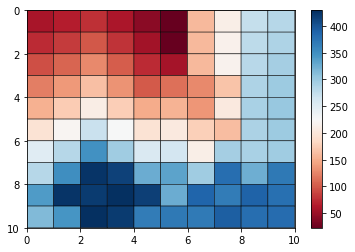

accuracy is 68.000000 lamba is 0.931864
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  1e+01  1e+00
 1:  1.0728e+02 -2.0185e+04  2e+04  2e-02  1e+01  2e+00
 2:  2.5427e+02 -1.5148e+04  2e+04  1e-02  8e+00  3e+00
 3:  2.9985e+02 -5.5580e+03  7e+03  5e-03  3e+00  2e+00
 4:  1.5304e+02 -1.8905e+03  2e+03  2e-03  1e+00  9e-01
 5:  1.1353e+02 -7.1725e+02  1e+03  7e-04  4e-01  7e-01
 6:  9.1197e+01 -5.1385e+02  9e+02  5e-04  3e-01  7e-01
 7: -9.3870e+00 -3.7889e+02  7e+02  3e-04  2e-01  6e-01
 8: -7.9050e+01 -3.9476e+02  7e+02  3e-04  2e-01  6e-01
 9: -9.1923e+01 -3.7881e+02  7e+02  2e-04  1e-01  5e-01
10: -1.2315e+02 -3.5571e+02  6e+02  2e-04  1e-01  5e-01
11: -1.7282e+02 -3.2822e+02  4e+02  1e-04  8e-02  3e-01
12: -1.7662e+02 -3.2268e+02  4e+02  1e-04  8e-02  3e-01
13: -2.4047e+02 -3.0096e+02  2e+02  5e-05  3e-02  1e-01
14: -2.5080e+02 -2.9576e+02  1e+02  4e-05  2e-02  1e-01
15: -2.5319e+02 -2.9505e+02  1e+02  3e-05  2e-02  1e-01
16: -2.809

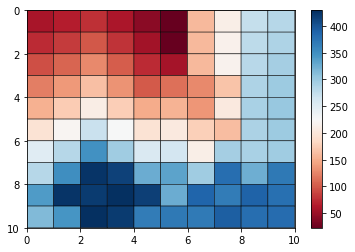

accuracy is 68.000000 lamba is 0.941884
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  1e+01  1e+00
 1:  1.0794e+02 -2.0175e+04  2e+04  2e-02  1e+01  2e+00
 2:  2.5563e+02 -1.5143e+04  2e+04  1e-02  8e+00  3e+00
 3:  3.0262e+02 -5.5902e+03  7e+03  5e-03  3e+00  2e+00
 4:  1.5473e+02 -1.8797e+03  2e+03  2e-03  1e+00  9e-01
 5:  1.1452e+02 -6.9452e+02  1e+03  6e-04  4e-01  6e-01
 6:  9.5156e+01 -4.8708e+02  8e+02  5e-04  3e-01  6e-01
 7:  6.3762e+00 -3.4526e+02  7e+02  3e-04  2e-01  5e-01
 8: -6.5023e+01 -3.6028e+02  7e+02  2e-04  2e-01  5e-01
 9: -6.8331e+01 -3.3644e+02  6e+02  2e-04  1e-01  5e-01
10: -1.0668e+02 -3.0928e+02  5e+02  2e-04  1e-01  4e-01
11: -1.5634e+02 -2.8866e+02  3e+02  1e-04  7e-02  3e-01
12: -1.6148e+02 -2.8376e+02  3e+02  1e-04  6e-02  3e-01
13: -2.3323e+02 -2.6587e+02  8e+01  3e-05  2e-02  7e-02
14: -2.4170e+02 -2.6242e+02  5e+01  2e-05  1e-02  5e-02
15: -2.5252e+02 -2.5981e+02  2e+01  6e-06  4e-03  2e-02
16: -2.563

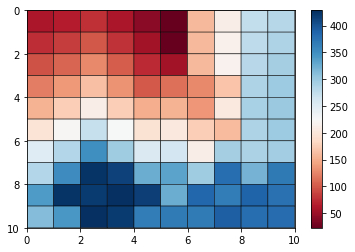

accuracy is 68.000000 lamba is 0.951904
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  1e+01  1e+00
 1:  1.0860e+02 -2.0165e+04  2e+04  2e-02  1e+01  2e+00
 2:  2.5698e+02 -1.5138e+04  2e+04  1e-02  8e+00  3e+00
 3:  3.0536e+02 -5.6221e+03  7e+03  5e-03  3e+00  2e+00
 4:  1.5637e+02 -1.8688e+03  2e+03  2e-03  1e+00  9e-01
 5:  1.1531e+02 -6.7169e+02  1e+03  6e-04  4e-01  6e-01
 6:  9.8517e+01 -4.6065e+02  8e+02  4e-04  3e-01  6e-01
 7:  1.9341e+01 -3.1288e+02  6e+02  3e-04  2e-01  5e-01
 8: -5.0319e+01 -3.2684e+02  6e+02  2e-04  1e-01  5e-01
 9: -4.8039e+01 -3.0826e+02  6e+02  2e-04  1e-01  5e-01
10: -9.0930e+01 -2.8914e+02  5e+02  2e-04  1e-01  4e-01
11: -1.1662e+02 -2.7135e+02  4e+02  1e-04  8e-02  3e-01
12: -1.6040e+02 -2.5100e+02  2e+02  7e-05  5e-02  2e-01
13: -1.6429e+02 -2.4726e+02  2e+02  7e-05  4e-02  2e-01
14: -2.1079e+02 -2.3505e+02  6e+01  2e-05  1e-02  5e-02
15: -2.1996e+02 -2.3164e+02  3e+01  9e-06  6e-03  3e-02
16: -2.261

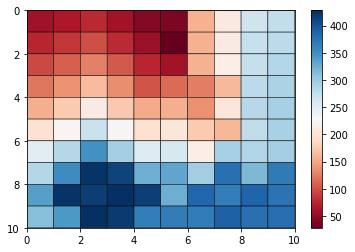

accuracy is 70.000000 lamba is 0.961924
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  1e+01  1e+00
 1:  1.0926e+02 -2.0155e+04  2e+04  2e-02  1e+01  2e+00
 2:  2.5833e+02 -1.5134e+04  2e+04  1e-02  8e+00  3e+00
 3:  3.0809e+02 -5.6535e+03  7e+03  5e-03  3e+00  2e+00
 4:  1.5798e+02 -1.8576e+03  2e+03  2e-03  1e+00  9e-01
 5:  1.1592e+02 -6.4877e+02  9e+02  6e-04  4e-01  6e-01
 6:  1.0131e+02 -4.3452e+02  8e+02  4e-04  3e-01  6e-01
 7:  2.9829e+01 -2.8162e+02  5e+02  2e-04  2e-01  5e-01
 8: -3.8320e+01 -2.9202e+02  6e+02  2e-04  1e-01  5e-01
 9: -3.5257e+01 -2.7690e+02  5e+02  2e-04  1e-01  4e-01
10: -5.1599e+01 -2.7186e+02  5e+02  2e-04  1e-01  4e-01
11: -5.5868e+01 -2.4483e+02  4e+02  2e-04  1e-01  4e-01
12: -1.0665e+02 -2.2867e+02  3e+02  1e-04  6e-02  2e-01
13: -1.4344e+02 -2.1529e+02  2e+02  6e-05  4e-02  2e-01
14: -1.7483e+02 -2.0711e+02  8e+01  3e-05  2e-02  7e-02
15: -1.9501e+02 -2.0205e+02  2e+01  6e-06  4e-03  2e-02
16: -1.988

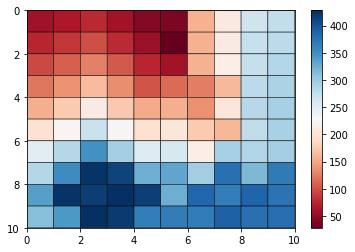

accuracy is 70.000000 lamba is 0.971944
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  1e+01  1e+00
 1:  1.0992e+02 -2.0145e+04  2e+04  2e-02  1e+01  2e+00
 2:  2.5966e+02 -1.5129e+04  2e+04  1e-02  8e+00  3e+00
 3:  3.1079e+02 -5.6845e+03  7e+03  5e-03  3e+00  2e+00
 4:  1.5955e+02 -1.8464e+03  2e+03  2e-03  1e+00  9e-01
 5:  1.1634e+02 -6.2575e+02  9e+02  6e-04  4e-01  6e-01
 6:  1.0355e+02 -4.0868e+02  7e+02  4e-04  3e-01  6e-01
 7:  3.8093e+01 -2.5139e+02  5e+02  2e-04  1e-01  4e-01
 8: -2.8530e+01 -2.5581e+02  5e+02  2e-04  1e-01  4e-01
 9: -2.5520e+01 -2.4174e+02  5e+02  2e-04  1e-01  4e-01
10: -3.8353e+01 -2.3801e+02  5e+02  2e-04  1e-01  4e-01
11: -3.8956e+01 -2.3428e+02  4e+02  2e-04  1e-01  4e-01
12: -7.5561e+01 -2.0882e+02  3e+02  1e-04  7e-02  3e-01
13: -1.1571e+02 -1.9091e+02  2e+02  6e-05  4e-02  2e-01
14: -1.2970e+02 -1.8359e+02  1e+02  4e-05  3e-02  1e-01
15: -1.5424e+02 -1.7706e+02  6e+01  2e-05  1e-02  5e-02
16: -1.625

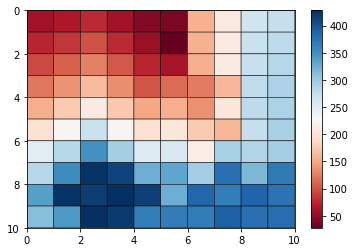

accuracy is 70.000000 lamba is 0.981964
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  1e+01  1e+00
 1:  1.1057e+02 -2.0135e+04  2e+04  2e-02  1e+01  2e+00
 2:  2.6098e+02 -1.5125e+04  2e+04  1e-02  8e+00  3e+00
 3:  3.1347e+02 -5.7150e+03  7e+03  5e-03  3e+00  2e+00
 4:  1.6109e+02 -1.8350e+03  2e+03  2e-03  1e+00  9e-01
 5:  1.1659e+02 -6.0265e+02  9e+02  6e-04  4e-01  6e-01
 6:  1.0527e+02 -3.8313e+02  7e+02  4e-04  2e-01  5e-01
 7:  4.4326e+01 -2.2213e+02  4e+02  2e-04  1e-01  4e-01
 8: -2.0885e+01 -2.1809e+02  4e+02  2e-04  1e-01  4e-01
 9: -1.8692e+01 -2.0716e+02  4e+02  2e-04  1e-01  3e-01
10: -3.8214e+01 -1.9665e+02  3e+02  1e-04  8e-02  3e-01
11: -5.6276e+01 -1.8920e+02  3e+02  1e-04  7e-02  3e-01
12: -5.6609e+01 -1.8376e+02  3e+02  1e-04  6e-02  2e-01
13: -9.1782e+01 -1.6348e+02  2e+02  6e-05  4e-02  1e-01
14: -1.1987e+02 -1.5330e+02  8e+01  3e-05  2e-02  7e-02
15: -1.3885e+02 -1.4597e+02  2e+01  6e-06  4e-03  2e-02
16: -1.419

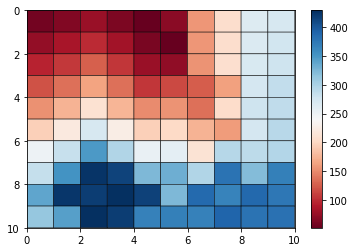

accuracy is 69.000000 lamba is 0.991984
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  1e+01  1e+00
 1:  1.1122e+02 -2.0125e+04  2e+04  2e-02  1e+01  2e+00
 2:  2.6228e+02 -1.5120e+04  2e+04  1e-02  8e+00  3e+00
 3:  3.1613e+02 -5.7452e+03  7e+03  5e-03  3e+00  2e+00
 4:  1.6259e+02 -1.8234e+03  2e+03  2e-03  1e+00  9e-01
 5:  1.1666e+02 -5.7946e+02  8e+02  6e-04  4e-01  5e-01
 6:  1.0646e+02 -3.5785e+02  6e+02  4e-04  2e-01  5e-01
 7:  4.8672e+01 -1.9380e+02  4e+02  2e-04  1e-01  3e-01
 8: -1.5611e+01 -1.7857e+02  4e+02  1e-04  8e-02  3e-01
 9: -1.4016e+01 -1.6987e+02  3e+02  1e-04  8e-02  3e-01
10: -3.2782e+01 -1.5925e+02  3e+02  1e-04  6e-02  2e-01
11: -4.0162e+01 -1.5712e+02  3e+02  9e-05  6e-02  2e-01
12: -4.2008e+01 -1.4972e+02  2e+02  9e-05  5e-02  2e-01
13: -6.4632e+01 -1.3936e+02  2e+02  6e-05  4e-02  1e-01
14: -7.7301e+01 -1.3004e+02  1e+02  4e-05  3e-02  1e-01
15: -9.7347e+01 -1.2553e+02  7e+01  2e-05  1e-02  6e-02
16: -9.921

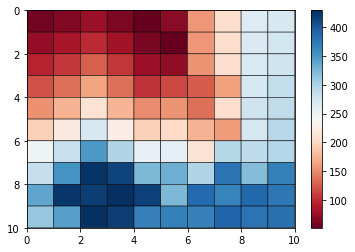

accuracy is 69.000000 lamba is 1.002004
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  1e+01  1e+00
 1:  1.1186e+02 -2.0115e+04  2e+04  2e-02  1e+01  2e+00
 2:  2.6358e+02 -1.5115e+04  2e+04  1e-02  8e+00  3e+00
 3:  3.1877e+02 -5.7749e+03  7e+03  5e-03  3e+00  2e+00
 4:  1.6406e+02 -1.8117e+03  2e+03  2e-03  1e+00  9e-01
 5:  1.1677e+02 -5.6170e+02  8e+02  5e-04  3e-01  5e-01
 6:  1.0618e+02 -3.3224e+02  6e+02  4e-04  2e-01  5e-01
 7:  5.1583e+01 -1.6747e+02  3e+02  2e-04  1e-01  3e-01
 8: -3.2736e+00 -1.4088e+02  3e+02  1e-04  7e-02  3e-01
 9: -2.6164e+01 -1.2730e+02  2e+02  8e-05  5e-02  2e-01
10: -4.9303e+01 -1.1744e+02  1e+02  5e-05  3e-02  1e-01
11: -6.4780e+01 -1.0818e+02  1e+02  3e-05  2e-02  8e-02
12: -8.5508e+01 -9.8268e+01  3e+01  1e-05  6e-03  3e-02
13: -8.9165e+01 -9.6709e+01  2e+01  6e-06  4e-03  2e-02
14: -9.2408e+01 -9.5289e+01  7e+00  2e-06  1e-03  6e-03
15: -9.3905e+01 -9.4776e+01  2e+00  7e-07  4e-04  2e-03
16: -9.417

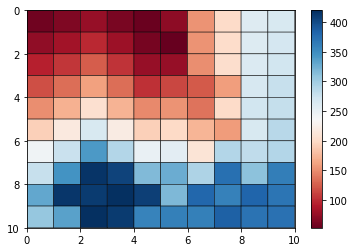

accuracy is 69.000000 lamba is 1.012024
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  1e+01  1e+00
 1:  1.1250e+02 -2.0105e+04  2e+04  2e-02  1e+01  2e+00
 2:  2.6487e+02 -1.5111e+04  2e+04  1e-02  8e+00  3e+00
 3:  3.2139e+02 -5.8042e+03  7e+03  5e-03  3e+00  2e+00
 4:  1.6549e+02 -1.7999e+03  2e+03  2e-03  1e+00  9e-01
 5:  1.1676e+02 -5.4467e+02  8e+02  5e-04  3e-01  5e-01
 6:  1.0526e+02 -3.0682e+02  5e+02  3e-04  2e-01  4e-01
 7:  5.2762e+01 -1.4202e+02  3e+02  2e-04  1e-01  3e-01
 8:  9.9174e+00 -1.0882e+02  2e+02  1e-04  6e-02  2e-01
 9: -8.6074e+00 -1.1243e+02  2e+02  8e-05  5e-02  2e-01
10: -8.6808e+00 -1.0127e+02  2e+02  7e-05  5e-02  2e-01
11: -3.6819e+01 -8.7423e+01  1e+02  4e-05  3e-02  1e-01
12: -3.9583e+01 -8.5752e+01  1e+02  4e-05  2e-02  9e-02
13: -3.9797e+01 -8.5453e+01  1e+02  4e-05  2e-02  9e-02
14: -5.6730e+01 -7.6792e+01  4e+01  2e-05  1e-02  4e-02
15: -6.2528e+01 -7.4426e+01  3e+01  1e-05  6e-03  2e-02
16: -6.852

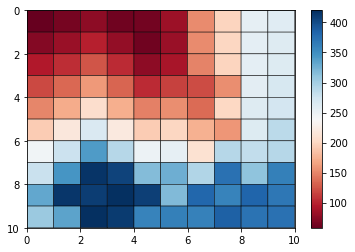

accuracy is 67.000000 lamba is 1.022044
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  1e+01  1e+00
 1:  1.1314e+02 -2.0096e+04  2e+04  2e-02  1e+01  2e+00
 2:  2.6632e+02 -1.5114e+04  2e+04  1e-02  8e+00  3e+00
 3:  3.2419e+02 -5.8357e+03  7e+03  5e-03  3e+00  2e+00
 4:  1.6696e+02 -1.7884e+03  2e+03  2e-03  1e+00  9e-01
 5:  1.1668e+02 -5.2806e+02  8e+02  5e-04  3e-01  5e-01
 6:  1.0384e+02 -2.8309e+02  5e+02  3e-04  2e-01  4e-01
 7:  5.2143e+01 -1.1789e+02  2e+02  1e-04  8e-02  2e-01
 8:  1.7920e+01 -8.0858e+01  2e+02  8e-05  5e-02  2e-01
 9:  1.1325e+00 -8.5160e+01  2e+02  7e-05  4e-02  2e-01
10:  1.3067e+00 -8.0160e+01  2e+02  7e-05  4e-02  2e-01
11: -2.7377e+01 -6.2082e+01  7e+01  3e-05  2e-02  6e-02
12: -4.1411e+01 -5.2592e+01  2e+01  9e-06  6e-03  2e-02
13: -4.7802e+01 -5.0271e+01  5e+00  2e-06  1e-03  5e-03
14: -4.8555e+01 -4.9977e+01  3e+00  1e-06  7e-04  3e-03
15: -4.9187e+01 -4.9690e+01  1e+00  4e-07  3e-04  1e-03
16: -4.945

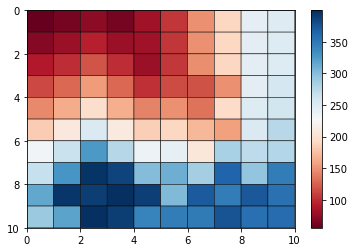

accuracy is 65.000000 lamba is 1.032064
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  1e+01  1e+00
 1:  1.1378e+02 -2.0086e+04  2e+04  2e-02  1e+01  2e+00
 2:  2.6792e+02 -1.5125e+04  2e+04  1e-02  8e+00  3e+00
 3:  3.2716e+02 -5.8690e+03  7e+03  5e-03  3e+00  2e+00
 4:  1.6847e+02 -1.7774e+03  2e+03  2e-03  1e+00  9e-01
 5:  1.1653e+02 -5.1184e+02  7e+02  5e-04  3e-01  5e-01
 6:  1.0204e+02 -2.6242e+02  5e+02  3e-04  2e-01  4e-01
 7:  4.9760e+01 -9.5821e+01  2e+02  1e-04  7e-02  2e-01
 8:  2.1307e+01 -5.6913e+01  1e+02  6e-05  4e-02  1e-01
 9:  5.7147e+00 -5.4748e+01  1e+02  5e-05  3e-02  1e-01
10:  5.1768e+00 -5.2159e+01  1e+02  5e-05  3e-02  1e-01
11: -1.2755e+01 -4.1794e+01  6e+01  2e-05  1e-02  5e-02
12: -2.1140e+01 -3.6361e+01  3e+01  1e-05  8e-03  3e-02
13: -2.6382e+01 -3.2614e+01  1e+01  5e-06  3e-03  1e-02
14: -2.9796e+01 -3.1192e+01  3e+00  1e-06  7e-04  3e-03
15: -3.0492e+01 -3.0900e+01  9e-01  3e-07  2e-04  8e-04
16: -3.066

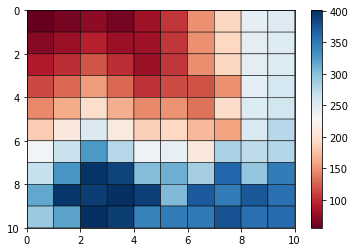

accuracy is 64.000000 lamba is 1.042084
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  1e+01  1e+00
 1:  1.1441e+02 -2.0076e+04  2e+04  2e-02  1e+01  2e+00
 2:  2.6952e+02 -1.5136e+04  2e+04  1e-02  8e+00  3e+00
 3:  3.3012e+02 -5.9020e+03  7e+03  5e-03  3e+00  2e+00
 4:  1.6994e+02 -1.7661e+03  2e+03  2e-03  1e+00  8e-01
 5:  1.1625e+02 -4.9574e+02  7e+02  5e-04  3e-01  5e-01
 6:  9.9766e+01 -2.4214e+02  4e+02  3e-04  2e-01  4e-01
 7:  4.5930e+01 -7.4907e+01  2e+02  1e-04  6e-02  2e-01
 8:  2.0310e+01 -3.6151e+01  8e+01  5e-05  3e-02  8e-02
 9:  1.3126e+01 -2.7850e+01  7e+01  3e-05  2e-02  7e-02
10:  5.3642e+00 -2.3089e+01  6e+01  2e-05  1e-02  6e-02
11:  4.7570e+00 -2.2071e+01  5e+01  2e-05  1e-02  5e-02
12: -8.5218e+00 -1.4809e+01  1e+01  5e-06  3e-03  1e-02
13: -1.1036e+01 -1.2804e+01  4e+00  1e-06  9e-04  3e-03
14: -1.1675e+01 -1.2373e+01  1e+00  6e-07  3e-04  1e-03
15: -1.2031e+01 -1.2146e+01  2e-01  9e-08  6e-05  2e-04
16: -1.207

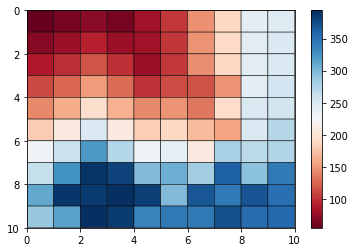

accuracy is 64.000000 lamba is 1.052104
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  1e+01  1e+00
 1:  1.1504e+02 -2.0066e+04  2e+04  2e-02  1e+01  2e+00
 2:  2.7110e+02 -1.5147e+04  2e+04  1e-02  8e+00  3e+00
 3:  3.3305e+02 -5.9346e+03  7e+03  5e-03  3e+00  2e+00
 4:  1.7138e+02 -1.7547e+03  2e+03  2e-03  9e-01  8e-01
 5:  1.1583e+02 -4.7978e+02  7e+02  5e-04  3e-01  5e-01
 6:  9.7035e+01 -2.2219e+02  4e+02  3e-04  2e-01  3e-01
 7:  4.0728e+01 -5.5081e+01  1e+02  8e-05  5e-02  1e-01
 8:  1.6035e+01 -1.9390e+01  5e+01  3e-05  2e-02  5e-02
 9:  1.1321e+01 -1.0313e+01  3e+01  2e-05  1e-02  3e-02
10:  2.7866e+00 -9.7864e-01  5e+00  3e-06  2e-03  5e-03
11:  2.4676e-01 -6.5876e-02  3e-01  3e-07  2e-04  3e-04
12:  2.5725e-03 -6.7575e-04  3e-03  3e-09  2e-06  3e-06
13:  2.5719e-05 -6.7560e-06  3e-05  3e-11  2e-08  3e-08
14:  2.5719e-07 -6.7559e-08  3e-07  3e-13  2e-10  3e-10
15:  2.5719e-09 -6.7559e-10  3e-09  3e-15  7e-11  3e-12
Optimal so

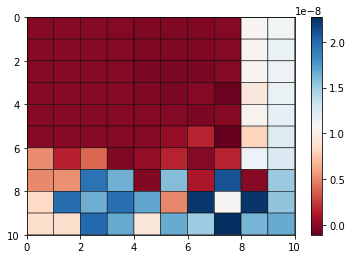

accuracy is 70.000000 lamba is 1.062124
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  1e+01  1e+00
 1:  1.1567e+02 -2.0056e+04  2e+04  2e-02  1e+01  2e+00
 2:  2.7268e+02 -1.5158e+04  2e+04  1e-02  8e+00  3e+00
 3:  3.3597e+02 -5.9667e+03  7e+03  5e-03  3e+00  2e+00
 4:  1.7279e+02 -1.7432e+03  2e+03  2e-03  9e-01  8e-01
 5:  1.1530e+02 -4.6393e+02  7e+02  5e-04  3e-01  4e-01
 6:  9.3855e+01 -2.0257e+02  4e+02  2e-04  1e-01  3e-01
 7:  3.4644e+01 -3.7515e+01  9e+01  6e-05  4e-02  9e-02
 8:  1.1749e+01 -9.0012e+00  2e+01  2e-05  1e-02  3e-02
 9:  6.2257e+00 -2.3104e+00  9e+00  7e-06  4e-03  1e-02
10:  3.1762e-01 -8.0141e-02  4e-01  3e-07  2e-04  4e-04
11:  3.1717e-03 -7.9944e-04  4e-03  3e-09  2e-06  4e-06
12:  3.1715e-05 -7.9937e-06  4e-05  3e-11  2e-08  4e-08
13:  3.1715e-07 -7.9937e-08  4e-07  3e-13  2e-10  4e-10
14:  3.1715e-09 -7.9937e-10  4e-09  3e-15  3e-11  4e-12
Optimal solution found.


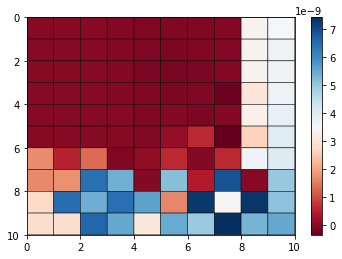

accuracy is 70.000000 lamba is 1.072144
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  1e+01  1e+00
 1:  1.1629e+02 -2.0046e+04  2e+04  2e-02  1e+01  2e+00
 2:  2.7425e+02 -1.5168e+04  2e+04  1e-02  7e+00  3e+00
 3:  3.3888e+02 -5.9985e+03  7e+03  5e-03  3e+00  2e+00
 4:  1.7418e+02 -1.7314e+03  2e+03  2e-03  9e-01  8e-01
 5:  1.1465e+02 -4.4820e+02  7e+02  5e-04  3e-01  4e-01
 6:  9.0234e+01 -1.8323e+02  3e+02  2e-04  1e-01  3e-01
 7:  2.8327e+01 -2.3502e+01  6e+01  4e-05  3e-02  6e-02
 8:  7.4309e+00 -3.8386e+00  1e+01  9e-06  5e-03  1e-02
 9:  2.2259e+00 -7.0047e-01  3e+00  2e-06  1e-03  3e-03
10:  3.0793e-02 -9.0781e-03  4e-02  3e-08  2e-05  4e-05
11:  3.0784e-04 -9.0755e-05  4e-04  3e-10  2e-07  4e-07
12:  3.0784e-06 -9.0755e-07  4e-06  3e-12  2e-09  4e-09
13:  3.0784e-08 -9.0755e-09  4e-08  3e-14  2e-11  4e-11
Optimal solution found.


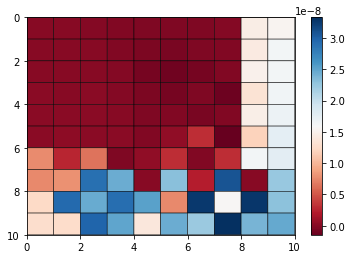

accuracy is 70.000000 lamba is 1.082164
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  1e+01  1e+00
 1:  1.1691e+02 -2.0036e+04  2e+04  2e-02  1e+01  2e+00
 2:  2.7581e+02 -1.5179e+04  2e+04  1e-02  7e+00  3e+00
 3:  3.4176e+02 -6.0300e+03  7e+03  5e-03  3e+00  2e+00
 4:  1.7553e+02 -1.7196e+03  2e+03  2e-03  9e-01  8e-01
 5:  1.1387e+02 -4.3258e+02  6e+02  4e-04  3e-01  4e-01
 6:  8.6176e+01 -1.6416e+02  3e+02  2e-04  1e-01  3e-01
 7:  2.4439e+01 -1.8557e+01  5e+01  3e-05  2e-02  5e-02
 8:  4.2389e+00 -1.7737e+00  6e+00  5e-06  3e-03  6e-03
 9:  3.3338e-01 -9.2337e-02  4e-01  3e-07  2e-04  5e-04
10:  3.3393e-03 -9.2424e-04  4e-03  3e-09  2e-06  5e-06
11:  3.3392e-05 -9.2422e-06  4e-05  3e-11  2e-08  5e-08
12:  3.3392e-07 -9.2422e-08  4e-07  3e-13  2e-10  5e-10
13:  3.3392e-09 -9.2422e-10  4e-09  3e-15  8e-12  5e-12
Optimal solution found.


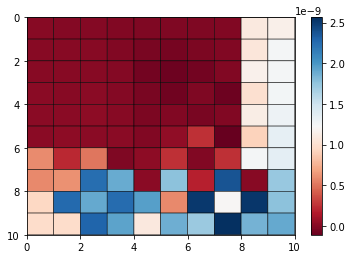

accuracy is 70.000000 lamba is 1.092184
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  1e+01  1e+00
 1:  1.1753e+02 -2.0026e+04  2e+04  2e-02  1e+01  2e+00
 2:  2.7736e+02 -1.5189e+04  2e+04  1e-02  7e+00  3e+00
 3:  3.4463e+02 -6.0610e+03  7e+03  5e-03  3e+00  2e+00
 4:  1.7685e+02 -1.7075e+03  2e+03  2e-03  9e-01  8e-01
 5:  1.1299e+02 -4.1705e+02  6e+02  4e-04  3e-01  4e-01
 6:  8.1681e+01 -1.4533e+02  3e+02  2e-04  1e-01  2e-01
 7:  2.1058e+01 -1.4236e+01  4e+01  3e-05  2e-02  4e-02
 8:  2.1922e+00 -7.5436e-01  3e+00  2e-06  1e-03  3e-03
 9:  2.9071e-02 -8.7212e-03  4e-02  3e-08  2e-05  4e-05
10:  2.9066e-04 -8.7196e-05  4e-04  3e-10  2e-07  4e-07
11:  2.9066e-06 -8.7196e-07  4e-06  3e-12  2e-09  4e-09
12:  2.9066e-08 -8.7196e-09  4e-08  3e-14  2e-11  4e-11
Optimal solution found.


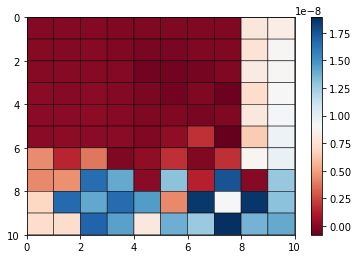

accuracy is 70.000000 lamba is 1.102204
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  1e+01  1e+00
 1:  1.1814e+02 -2.0016e+04  2e+04  2e-02  1e+01  2e+00
 2:  2.7890e+02 -1.5200e+04  2e+04  1e-02  7e+00  3e+00
 3:  3.4748e+02 -6.0917e+03  7e+03  5e-03  3e+00  2e+00
 4:  1.7815e+02 -1.6953e+03  2e+03  1e-03  9e-01  8e-01
 5:  1.1200e+02 -4.0162e+02  6e+02  4e-04  2e-01  4e-01
 6:  7.6748e+01 -1.2673e+02  2e+02  2e-04  1e-01  2e-01
 7:  1.7874e+01 -8.6233e+00  3e+01  2e-05  1e-02  3e-02
 8:  9.5153e-01 -2.7430e-01  1e+00  1e-06  6e-04  1e-03
 9:  9.5602e-03 -2.7483e-03  1e-02  1e-08  6e-06  1e-05
10:  9.5597e-05 -2.7481e-05  1e-04  1e-10  6e-08  1e-07
11:  9.5597e-07 -2.7481e-07  1e-06  1e-12  6e-10  1e-09
12:  9.5597e-09 -2.7481e-09  1e-08  1e-14  9e-12  1e-11
Optimal solution found.


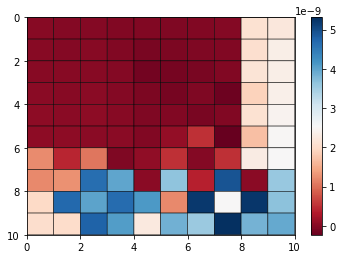

accuracy is 70.000000 lamba is 1.112224
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  1e+01  1e+00
 1:  1.1876e+02 -2.0006e+04  2e+04  2e-02  1e+01  2e+00
 2:  2.8043e+02 -1.5210e+04  2e+04  1e-02  7e+00  3e+00
 3:  3.5031e+02 -6.1220e+03  7e+03  5e-03  3e+00  2e+00
 4:  1.7941e+02 -1.6830e+03  2e+03  1e-03  9e-01  8e-01
 5:  1.1089e+02 -3.8628e+02  6e+02  4e-04  2e-01  4e-01
 6:  7.1375e+01 -1.0833e+02  2e+02  1e-04  9e-02  2e-01
 7:  1.4532e+01 -4.3379e+00  2e+01  2e-05  9e-03  2e-02
 8:  3.9753e-01 -1.0772e-01  5e-01  4e-07  2e-04  5e-04
 9:  3.9765e-03 -1.0774e-03  5e-03  4e-09  2e-06  5e-06
10:  3.9765e-05 -1.0773e-05  5e-05  4e-11  2e-08  5e-08
11:  3.9765e-07 -1.0773e-07  5e-07  4e-13  2e-10  5e-10
12:  3.9765e-09 -1.0773e-09  5e-09  4e-15  7e-12  5e-12
Optimal solution found.


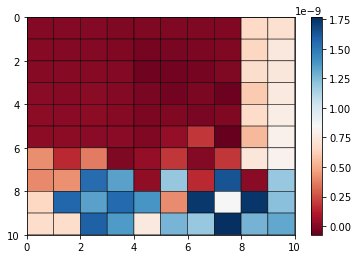

accuracy is 70.000000 lamba is 1.122244
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  1e+01  1e+00
 1:  1.1936e+02 -1.9996e+04  2e+04  2e-02  1e+01  2e+00
 2:  2.8196e+02 -1.5220e+04  2e+04  1e-02  7e+00  3e+00
 3:  3.5313e+02 -6.1520e+03  7e+03  5e-03  3e+00  2e+00
 4:  1.8065e+02 -1.6705e+03  2e+03  1e-03  9e-01  8e-01
 5:  1.0969e+02 -3.7103e+02  6e+02  4e-04  2e-01  4e-01
 6:  6.5557e+01 -9.0131e+01  2e+02  1e-04  7e-02  2e-01
 7:  1.1973e+01 -2.6050e+00  2e+01  1e-05  7e-03  2e-02
 8:  2.1414e-01 -5.2770e-02  3e-01  2e-07  1e-04  3e-04
 9:  2.1405e-03 -5.2747e-04  3e-03  2e-09  1e-06  3e-06
10:  2.1405e-05 -5.2746e-06  3e-05  2e-11  1e-08  3e-08
11:  2.1405e-07 -5.2746e-08  3e-07  2e-13  1e-10  3e-10
12:  2.1405e-09 -5.2746e-10  3e-09  2e-15  4e-12  3e-12
Optimal solution found.


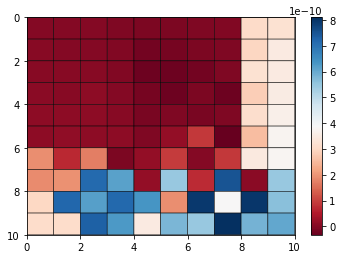

accuracy is 70.000000 lamba is 1.132265
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  1e+01  1e+00
 1:  1.1997e+02 -1.9986e+04  2e+04  2e-02  9e+00  2e+00
 2:  2.8347e+02 -1.5230e+04  2e+04  1e-02  7e+00  3e+00
 3:  3.5594e+02 -6.1816e+03  8e+03  5e-03  3e+00  2e+00
 4:  1.8186e+02 -1.6578e+03  2e+03  1e-03  9e-01  8e-01
 5:  1.0838e+02 -3.5585e+02  5e+02  4e-04  2e-01  4e-01
 6:  5.9312e+01 -7.2255e+01  1e+02  1e-04  6e-02  1e-01
 7:  1.0011e+01 -2.3343e+00  1e+01  1e-05  6e-03  1e-02
 8:  1.3935e-01 -3.2971e-02  2e-01  1e-07  8e-05  2e-04
 9:  1.3930e-03 -3.2958e-04  2e-03  1e-09  8e-07  2e-06
10:  1.3930e-05 -3.2958e-06  2e-05  1e-11  8e-09  2e-08
11:  1.3930e-07 -3.2958e-08  2e-07  1e-13  8e-11  2e-10
12:  1.3930e-09 -3.2958e-10  2e-09  2e-15  3e-12  2e-12
Optimal solution found.


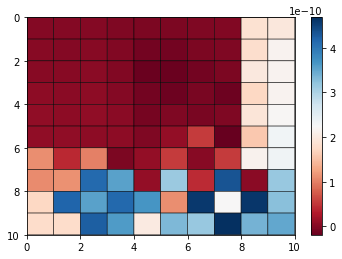

accuracy is 70.000000 lamba is 1.142285
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  1e+01  1e+00
 1:  1.2057e+02 -1.9976e+04  2e+04  2e-02  9e+00  2e+00
 2:  2.8498e+02 -1.5240e+04  2e+04  1e-02  7e+00  3e+00
 3:  3.5872e+02 -6.2108e+03  8e+03  5e-03  3e+00  2e+00
 4:  1.8304e+02 -1.6450e+03  2e+03  1e-03  9e-01  8e-01
 5:  1.0697e+02 -3.4076e+02  5e+02  4e-04  2e-01  3e-01
 6:  5.2860e+01 -5.5859e+01  1e+02  9e-05  5e-02  1e-01
 7:  8.0117e+00 -2.0185e+00  1e+01  8e-06  5e-03  1e-02
 8:  9.7686e-02 -2.4177e-02  1e-01  1e-07  6e-05  1e-04
 9:  9.7660e-04 -2.4171e-04  1e-03  1e-09  6e-07  1e-06
10:  9.7660e-06 -2.4171e-06  1e-05  1e-11  6e-09  1e-08
11:  9.7660e-08 -2.4171e-08  1e-07  1e-13  6e-11  1e-10
12:  9.7660e-10 -2.4171e-10  1e-09  1e-15  3e-12  1e-12
Optimal solution found.


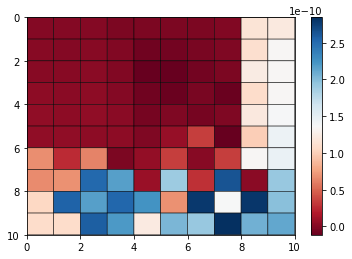

accuracy is 70.000000 lamba is 1.152305
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  1e+01  1e+00
 1:  1.2111e+02 -1.9970e+04  2e+04  2e-02  9e+00  2e+00
 2:  2.8642e+02 -1.5249e+04  2e+04  1e-02  7e+00  3e+00
 3:  3.6153e+02 -6.2447e+03  8e+03  5e-03  3e+00  2e+00
 4:  1.8424e+02 -1.6324e+03  2e+03  1e-03  8e-01  8e-01
 5:  1.0553e+02 -3.2602e+02  5e+02  3e-04  2e-01  3e-01
 6:  4.6699e+01 -4.3062e+01  1e+02  7e-05  4e-02  9e-02
 7:  6.2379e+00 -1.6692e+00  8e+00  6e-06  4e-03  9e-03
 8:  6.9392e-02 -1.8301e-02  9e-02  7e-08  4e-05  9e-05
 9:  6.9380e-04 -1.8298e-04  9e-04  7e-10  4e-07  9e-07
10:  6.9380e-06 -1.8298e-06  9e-06  7e-12  4e-09  9e-09
11:  6.9380e-08 -1.8298e-08  9e-08  7e-14  4e-11  9e-11
Optimal solution found.


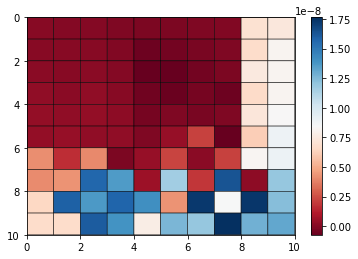

accuracy is 70.000000 lamba is 1.162325
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  1e+01  1e+00
 1:  1.2162e+02 -1.9966e+04  2e+04  2e-02  9e+00  2e+00
 2:  2.8783e+02 -1.5257e+04  2e+04  1e-02  7e+00  3e+00
 3:  3.6435e+02 -6.2811e+03  8e+03  5e-03  3e+00  2e+00
 4:  1.8544e+02 -1.6198e+03  2e+03  1e-03  8e-01  8e-01
 5:  1.0404e+02 -3.1151e+02  5e+02  3e-04  2e-01  3e-01
 6:  4.2645e+01 -4.0954e+01  9e+01  7e-05  4e-02  8e-02
 7:  5.0812e+00 -1.3373e+00  7e+00  5e-06  3e-03  7e-03
 8:  5.3689e-02 -1.4022e-02  7e-02  5e-08  3e-05  7e-05
 9:  5.3682e-04 -1.4020e-04  7e-04  5e-10  3e-07  7e-07
10:  5.3682e-06 -1.4020e-06  7e-06  5e-12  3e-09  7e-09
11:  5.3682e-08 -1.4020e-08  7e-08  5e-14  3e-11  7e-11
Optimal solution found.


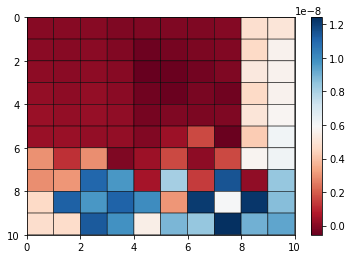

accuracy is 70.000000 lamba is 1.172345
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  1e+01  1e+00
 1:  1.2212e+02 -1.9963e+04  2e+04  2e-02  9e+00  2e+00
 2:  2.8922e+02 -1.5265e+04  2e+04  1e-02  7e+00  3e+00
 3:  3.6715e+02 -6.3170e+03  8e+03  5e-03  3e+00  2e+00
 4:  1.8662e+02 -1.6070e+03  2e+03  1e-03  8e-01  8e-01
 5:  1.0245e+02 -2.9705e+02  5e+02  3e-04  2e-01  3e-01
 6:  3.8724e+01 -3.8930e+01  8e+01  6e-05  4e-02  7e-02
 7:  4.0814e+00 -1.0554e+00  5e+00  4e-06  2e-03  5e-03
 8:  4.1903e-02 -1.0793e-02  5e-02  4e-08  2e-05  6e-05
 9:  4.1899e-04 -1.0792e-04  5e-04  4e-10  2e-07  6e-07
10:  4.1899e-06 -1.0792e-06  5e-06  4e-12  2e-09  6e-09
11:  4.1899e-08 -1.0792e-08  5e-08  4e-14  3e-11  6e-11
Optimal solution found.


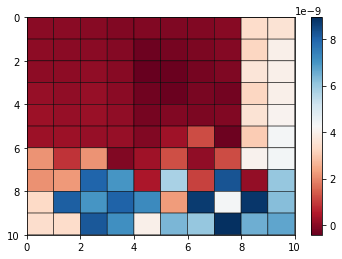

accuracy is 70.000000 lamba is 1.182365
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  1e+01  1e+00
 1:  1.2262e+02 -1.9959e+04  2e+04  2e-02  9e+00  2e+00
 2:  2.9061e+02 -1.5273e+04  2e+04  1e-02  7e+00  3e+00
 3:  3.6994e+02 -6.3524e+03  8e+03  5e-03  3e+00  2e+00
 4:  1.8777e+02 -1.5939e+03  2e+03  1e-03  8e-01  8e-01
 5:  1.0077e+02 -2.8263e+02  4e+02  3e-04  2e-01  3e-01
 6:  3.4957e+01 -3.6941e+01  8e+01  6e-05  3e-02  7e-02
 7:  3.2258e+00 -8.1827e-01  4e+00  3e-06  2e-03  4e-03
 8:  3.2632e-02 -8.2618e-03  4e-02  3e-08  2e-05  4e-05
 9:  3.2629e-04 -8.2612e-05  4e-04  3e-10  2e-07  4e-07
10:  3.2629e-06 -8.2612e-07  4e-06  3e-12  2e-09  4e-09
11:  3.2629e-08 -8.2612e-09  4e-08  3e-14  2e-11  4e-11
Optimal solution found.


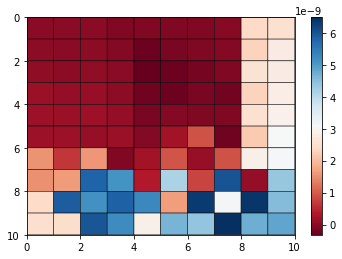

accuracy is 70.000000 lamba is 1.192385
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  1e+01  1e+00
 1:  1.2311e+02 -1.9955e+04  2e+04  2e-02  9e+00  2e+00
 2:  2.9199e+02 -1.5281e+04  2e+04  1e-02  7e+00  3e+00
 3:  3.7270e+02 -6.3873e+03  8e+03  5e-03  3e+00  2e+00
 4:  1.8889e+02 -1.5807e+03  2e+03  1e-03  8e-01  8e-01
 5:  9.8998e+01 -2.6826e+02  4e+02  3e-04  2e-01  3e-01
 6:  3.1365e+01 -3.4938e+01  7e+01  5e-05  3e-02  6e-02
 7:  2.5017e+00 -6.2135e-01  3e+00  3e-06  1e-03  3e-03
 8:  2.5149e-02 -6.2406e-03  3e-02  3e-08  1e-05  3e-05
 9:  2.5147e-04 -6.2403e-05  3e-04  3e-10  1e-07  3e-07
10:  2.5147e-06 -6.2403e-07  3e-06  3e-12  1e-09  3e-09
11:  2.5147e-08 -6.2403e-09  3e-08  3e-14  2e-11  3e-11
Optimal solution found.


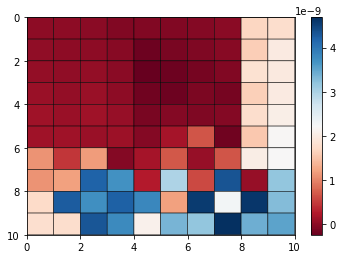

accuracy is 70.000000 lamba is 1.202405
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  1e+01  1e+00
 1:  1.2360e+02 -1.9951e+04  2e+04  2e-02  9e+00  2e+00
 2:  2.9336e+02 -1.5289e+04  2e+04  1e-02  7e+00  3e+00
 3:  3.7545e+02 -6.4218e+03  8e+03  5e-03  3e+00  2e+00
 4:  1.8998e+02 -1.5673e+03  2e+03  1e-03  8e-01  8e-01
 5:  9.7134e+01 -2.5392e+02  4e+02  3e-04  2e-01  3e-01
 6:  2.7968e+01 -3.2874e+01  6e+01  5e-05  3e-02  5e-02
 7:  1.8969e+00 -4.6025e-01  2e+00  2e-06  1e-03  2e-03
 8:  1.9001e-02 -4.6083e-03  2e-02  2e-08  1e-05  2e-05
 9:  1.9000e-04 -4.6081e-05  2e-04  2e-10  1e-07  2e-07
10:  1.9000e-06 -4.6081e-07  2e-06  2e-12  1e-09  2e-09
11:  1.9000e-08 -4.6081e-09  2e-08  2e-14  1e-11  2e-11
Optimal solution found.


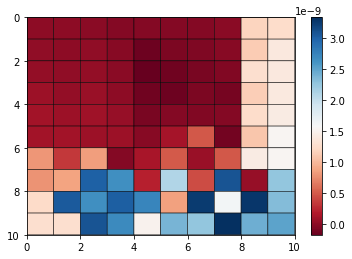

accuracy is 70.000000 lamba is 1.212425
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  1e+01  1e+00
 1:  1.2409e+02 -1.9947e+04  2e+04  2e-02  9e+00  2e+00
 2:  2.9473e+02 -1.5296e+04  2e+04  1e-02  7e+00  3e+00
 3:  3.7818e+02 -6.4557e+03  8e+03  5e-03  3e+00  2e+00
 4:  1.9104e+02 -1.5537e+03  2e+03  1e-03  8e-01  8e-01
 5:  9.5804e+01 -2.4816e+02  4e+02  3e-04  2e-01  3e-01
 6:  2.6023e+01 -2.8768e+01  6e+01  4e-05  2e-02  5e-02
 7:  1.3239e+00 -3.1678e-01  2e+00  1e-06  7e-04  2e-03
 8:  1.3237e-02 -3.1668e-03  2e-02  1e-08  7e-06  2e-05
 9:  1.3236e-04 -3.1667e-05  2e-04  1e-10  7e-08  2e-07
10:  1.3236e-06 -3.1667e-07  2e-06  1e-12  7e-10  2e-09
11:  1.3236e-08 -3.1667e-09  2e-08  1e-14  7e-12  2e-11
Optimal solution found.


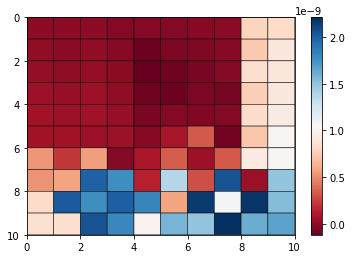

accuracy is 70.000000 lamba is 1.222445
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  1e+01  1e+00
 1:  1.2458e+02 -1.9943e+04  2e+04  2e-02  9e+00  2e+00
 2:  2.9609e+02 -1.5304e+04  2e+04  1e-02  7e+00  3e+00
 3:  3.8090e+02 -6.4893e+03  8e+03  5e-03  3e+00  2e+00
 4:  1.9208e+02 -1.5399e+03  2e+03  1e-03  8e-01  7e-01
 5:  9.4773e+01 -2.4706e+02  4e+02  3e-04  2e-01  2e-01
 6:  2.4401e+01 -2.4977e+01  5e+01  4e-05  2e-02  4e-02
 7:  9.5773e-01 -2.6797e-01  1e+00  1e-06  6e-04  1e-03
 8:  9.5722e-03 -2.6781e-03  1e-02  1e-08  6e-06  1e-05
 9:  9.5720e-05 -2.6780e-05  1e-04  1e-10  6e-08  1e-07
10:  9.5720e-07 -2.6780e-07  1e-06  1e-12  6e-10  1e-09
11:  9.5720e-09 -2.6780e-09  1e-08  1e-14  6e-12  1e-11
Optimal solution found.


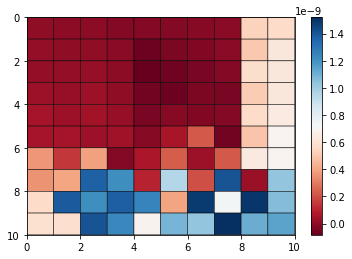

accuracy is 70.000000 lamba is 1.232465
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  1e+01  1e+00
 1:  1.2506e+02 -1.9939e+04  2e+04  2e-02  9e+00  2e+00
 2:  2.9744e+02 -1.5311e+04  2e+04  1e-02  7e+00  3e+00
 3:  3.8360e+02 -6.5223e+03  8e+03  6e-03  3e+00  2e+00
 4:  1.9310e+02 -1.5260e+03  2e+03  1e-03  8e-01  7e-01
 5:  9.3709e+01 -2.4585e+02  4e+02  3e-04  2e-01  2e-01
 6:  2.2854e+01 -2.1352e+01  5e+01  4e-05  2e-02  4e-02
 7:  6.8754e-01 -2.2395e-01  9e-01  7e-07  4e-04  9e-04
 8:  6.8714e-03 -2.2381e-03  9e-03  7e-09  4e-06  9e-06
 9:  6.8713e-05 -2.2381e-05  9e-05  7e-11  4e-08  9e-08
10:  6.8713e-07 -2.2381e-07  9e-07  7e-13  4e-10  9e-10
11:  6.8713e-09 -2.2381e-09  9e-09  8e-15  5e-12  9e-12
Optimal solution found.


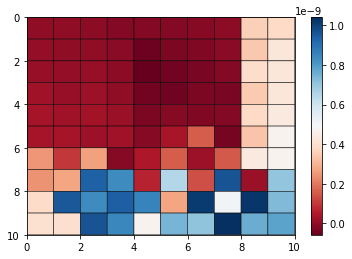

accuracy is 70.000000 lamba is 1.242485
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  1e+01  1e+00
 1:  1.2554e+02 -1.9935e+04  2e+04  2e-02  9e+00  2e+00
 2:  2.9878e+02 -1.5319e+04  2e+04  1e-02  7e+00  3e+00
 3:  3.8628e+02 -6.5549e+03  8e+03  6e-03  3e+00  2e+00
 4:  1.9408e+02 -1.5118e+03  2e+03  1e-03  8e-01  7e-01
 5:  9.2612e+01 -2.4454e+02  4e+02  3e-04  2e-01  2e-01
 6:  2.1387e+01 -1.7913e+01  4e+01  3e-05  2e-02  3e-02
 7:  4.9461e-01 -1.8434e-01  7e-01  5e-07  3e-04  6e-04
 8:  4.9436e-03 -1.8424e-03  7e-03  5e-09  3e-06  6e-06
 9:  4.9436e-05 -1.8424e-05  7e-05  5e-11  3e-08  6e-08
10:  4.9436e-07 -1.8424e-07  7e-07  5e-13  3e-10  6e-10
11:  4.9436e-09 -1.8424e-09  7e-09  5e-15  3e-12  6e-12
Optimal solution found.


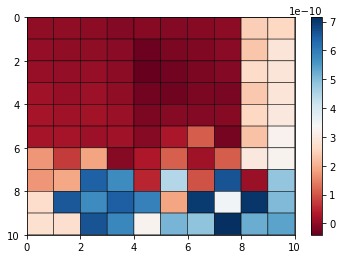

accuracy is 70.000000 lamba is 1.252505
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  1e+01  1e+00
 1:  1.2602e+02 -1.9931e+04  2e+04  2e-02  9e+00  2e+00
 2:  3.0012e+02 -1.5326e+04  2e+04  1e-02  7e+00  3e+00
 3:  3.8895e+02 -6.5871e+03  8e+03  6e-03  3e+00  2e+00
 4:  1.9504e+02 -1.4975e+03  2e+03  1e-03  8e-01  7e-01
 5:  9.1485e+01 -2.4312e+02  4e+02  3e-04  1e-01  2e-01
 6:  2.0003e+01 -1.4670e+01  4e+01  3e-05  2e-02  3e-02
 7:  3.6114e-01 -1.4864e-01  5e-01  4e-07  2e-04  5e-04
 8:  3.6099e-03 -1.4858e-03  5e-03  4e-09  2e-06  5e-06
 9:  3.6099e-05 -1.4858e-05  5e-05  4e-11  2e-08  5e-08
10:  3.6099e-07 -1.4858e-07  5e-07  4e-13  2e-10  5e-10
11:  3.6099e-09 -1.4858e-09  5e-09  4e-15  3e-12  5e-12
Optimal solution found.


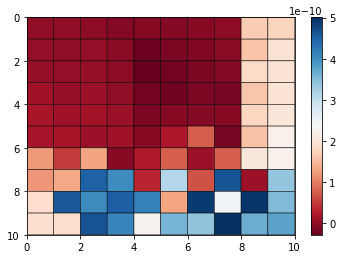

accuracy is 70.000000 lamba is 1.262525
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  1e+01  1e+00
 1:  1.2650e+02 -1.9927e+04  2e+04  2e-02  9e+00  2e+00
 2:  3.0145e+02 -1.5334e+04  2e+04  1e-02  7e+00  3e+00
 3:  3.9160e+02 -6.6188e+03  8e+03  6e-03  3e+00  2e+00
 4:  1.9598e+02 -1.4830e+03  2e+03  1e-03  7e-01  7e-01
 5:  9.0330e+01 -2.4159e+02  4e+02  3e-04  1e-01  2e-01
 6:  1.8702e+01 -1.1629e+01  3e+01  2e-05  1e-02  3e-02
 7:  2.7141e-01 -1.1638e-01  4e-01  3e-07  2e-04  4e-04
 8:  2.7132e-03 -1.1634e-03  4e-03  3e-09  2e-06  4e-06
 9:  2.7132e-05 -1.1634e-05  4e-05  3e-11  2e-08  4e-08
10:  2.7132e-07 -1.1634e-07  4e-07  3e-13  2e-10  4e-10
11:  2.7132e-09 -1.1634e-09  4e-09  3e-15  2e-12  4e-12
Optimal solution found.


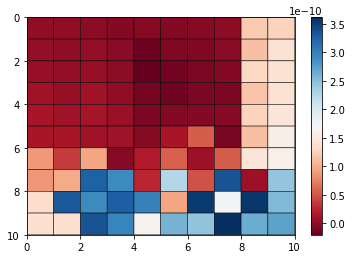

accuracy is 70.000000 lamba is 1.272545
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  1e+01  1e+00
 1:  1.2697e+02 -1.9923e+04  2e+04  2e-02  9e+00  2e+00
 2:  3.0277e+02 -1.5341e+04  2e+04  1e-02  7e+00  3e+00
 3:  3.9423e+02 -6.6501e+03  8e+03  6e-03  3e+00  2e+00
 4:  1.9689e+02 -1.4684e+03  2e+03  1e-03  7e-01  7e-01
 5:  8.9150e+01 -2.3994e+02  4e+02  3e-04  1e-01  2e-01
 6:  1.7482e+01 -8.7874e+00  3e+01  2e-05  1e-02  2e-02
 7:  2.1515e-01 -8.8496e-02  3e-01  2e-07  1e-04  3e-04
 8:  2.1509e-03 -8.8472e-04  3e-03  2e-09  1e-06  3e-06
 9:  2.1509e-05 -8.8471e-06  3e-05  2e-11  1e-08  3e-08
10:  2.1509e-07 -8.8471e-08  3e-07  2e-13  1e-10  3e-10
11:  2.1509e-09 -8.8471e-10  3e-09  2e-15  2e-12  3e-12
Optimal solution found.


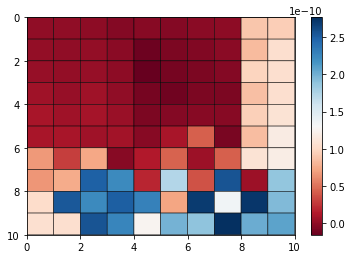

accuracy is 70.000000 lamba is 1.282565
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  1e+01  1e+00
 1:  1.2744e+02 -1.9918e+04  2e+04  2e-02  9e+00  2e+00
 2:  3.0408e+02 -1.5348e+04  2e+04  1e-02  7e+00  3e+00
 3:  3.9685e+02 -6.6809e+03  8e+03  6e-03  3e+00  3e+00
 4:  1.9777e+02 -1.4536e+03  2e+03  1e-03  7e-01  7e-01
 5:  8.7944e+01 -2.3818e+02  4e+02  3e-04  1e-01  2e-01
 6:  1.6340e+01 -6.1428e+00  2e+01  2e-05  1e-02  2e-02
 7:  1.8413e-01 -6.4325e-02  3e-01  2e-07  1e-04  2e-04
 8:  1.8409e-03 -6.4310e-04  3e-03  2e-09  1e-06  2e-06
 9:  1.8409e-05 -6.4310e-06  3e-05  2e-11  1e-08  2e-08
10:  1.8409e-07 -6.4310e-08  3e-07  2e-13  1e-10  2e-10
11:  1.8409e-09 -6.4310e-10  3e-09  2e-15  2e-12  2e-12
Optimal solution found.


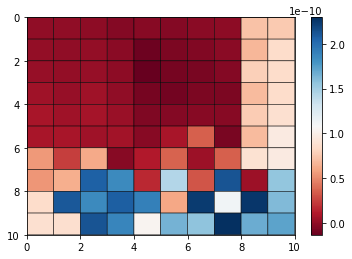

accuracy is 70.000000 lamba is 1.292585
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  1e+01  1e+00
 1:  1.2791e+02 -1.9914e+04  2e+04  2e-02  9e+00  2e+00
 2:  3.0539e+02 -1.5355e+04  2e+04  1e-02  7e+00  3e+00
 3:  3.9946e+02 -6.7114e+03  8e+03  6e-03  3e+00  3e+00
 4:  1.9863e+02 -1.4386e+03  2e+03  1e-03  7e-01  7e-01
 5:  8.6717e+01 -2.3629e+02  4e+02  3e-04  1e-01  2e-01
 6:  1.5347e+01 -3.9300e+00  2e+01  2e-05  8e-03  2e-02
 7:  1.6531e-01 -4.2460e-02  2e-01  2e-07  9e-05  2e-04
 8:  1.6528e-03 -4.2451e-04  2e-03  2e-09  9e-07  2e-06
 9:  1.6528e-05 -4.2451e-06  2e-05  2e-11  9e-09  2e-08
10:  1.6528e-07 -4.2451e-08  2e-07  2e-13  9e-11  2e-10
11:  1.6528e-09 -4.2451e-10  2e-09  2e-15  2e-12  2e-12
Optimal solution found.


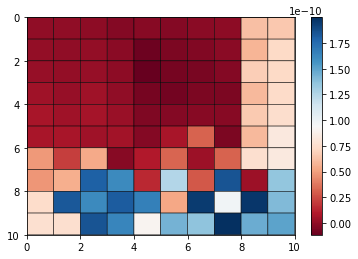

accuracy is 70.000000 lamba is 1.302605
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  1e+01  1e+00
 1:  1.2837e+02 -1.9910e+04  2e+04  2e-02  9e+00  2e+00
 2:  3.0669e+02 -1.5362e+04  2e+04  1e-02  7e+00  3e+00
 3:  4.0205e+02 -6.7414e+03  8e+03  6e-03  3e+00  3e+00
 4:  1.9946e+02 -1.4235e+03  2e+03  1e-03  7e-01  7e-01
 5:  8.5469e+01 -2.3429e+02  3e+02  3e-04  1e-01  2e-01
 6:  1.4996e+01 -3.7731e+00  2e+01  2e-05  8e-03  2e-02
 7:  1.5993e-01 -4.0337e-02  2e-01  2e-07  9e-05  2e-04
 8:  1.5990e-03 -4.0329e-04  2e-03  2e-09  9e-07  2e-06
 9:  1.5990e-05 -4.0329e-06  2e-05  2e-11  9e-09  2e-08
10:  1.5990e-07 -4.0329e-08  2e-07  2e-13  9e-11  2e-10
11:  1.5990e-09 -4.0329e-10  2e-09  2e-15  2e-12  2e-12
Optimal solution found.


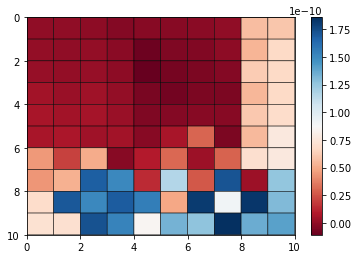

accuracy is 70.000000 lamba is 1.312625
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  1e+01  1e+00
 1:  1.2883e+02 -1.9906e+04  2e+04  2e-02  9e+00  2e+00
 2:  3.0799e+02 -1.5369e+04  2e+04  1e-02  7e+00  3e+00
 3:  4.0463e+02 -6.7710e+03  8e+03  6e-03  3e+00  3e+00
 4:  2.0026e+02 -1.4082e+03  2e+03  1e-03  7e-01  7e-01
 5:  8.4201e+01 -2.3216e+02  3e+02  3e-04  1e-01  2e-01
 6:  1.4653e+01 -3.6201e+00  2e+01  1e-05  8e-03  2e-02
 7:  1.5481e-01 -3.8317e-02  2e-01  2e-07  8e-05  2e-04
 8:  1.5478e-03 -3.8310e-04  2e-03  2e-09  8e-07  2e-06
 9:  1.5478e-05 -3.8310e-06  2e-05  2e-11  8e-09  2e-08
10:  1.5478e-07 -3.8310e-08  2e-07  2e-13  8e-11  2e-10
11:  1.5478e-09 -3.8310e-10  2e-09  2e-15  2e-12  2e-12
Optimal solution found.


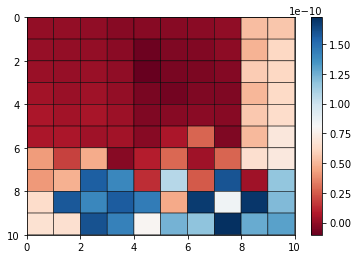

accuracy is 70.000000 lamba is 1.322645
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  1e+01  1e+00
 1:  1.2929e+02 -1.9901e+04  2e+04  2e-02  9e+00  2e+00
 2:  3.0927e+02 -1.5376e+04  2e+04  1e-02  7e+00  3e+00
 3:  4.0719e+02 -6.8002e+03  8e+03  6e-03  3e+00  3e+00
 4:  2.0105e+02 -1.3928e+03  2e+03  1e-03  7e-01  7e-01
 5:  8.2916e+01 -2.2991e+02  3e+02  3e-04  1e-01  2e-01
 6:  1.4317e+01 -3.4716e+00  2e+01  1e-05  8e-03  2e-02
 7:  1.4999e-01 -3.6419e-02  2e-01  1e-07  8e-05  2e-04
 8:  1.4997e-03 -3.6412e-04  2e-03  1e-09  8e-07  2e-06
 9:  1.4997e-05 -3.6412e-06  2e-05  1e-11  8e-09  2e-08
10:  1.4997e-07 -3.6412e-08  2e-07  1e-13  8e-11  2e-10
11:  1.4997e-09 -3.6412e-10  2e-09  2e-15  2e-12  2e-12
Optimal solution found.


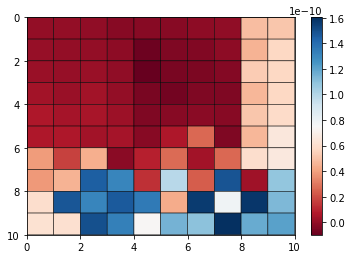

accuracy is 70.000000 lamba is 1.332665
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  1e+01  1e+00
 1:  1.2975e+02 -1.9897e+04  2e+04  2e-02  9e+00  2e+00
 2:  3.1056e+02 -1.5383e+04  2e+04  1e-02  7e+00  3e+00
 3:  4.0973e+02 -6.8289e+03  8e+03  6e-03  3e+00  3e+00
 4:  2.0180e+02 -1.3772e+03  2e+03  1e-03  7e-01  7e-01
 5:  8.1616e+01 -2.2754e+02  3e+02  2e-04  1e-01  2e-01
 6:  1.3987e+01 -3.3279e+00  2e+01  1e-05  7e-03  2e-02
 7:  1.4546e-01 -3.4641e-02  2e-01  1e-07  8e-05  2e-04
 8:  1.4544e-03 -3.4636e-04  2e-03  1e-09  8e-07  2e-06
 9:  1.4544e-05 -3.4636e-06  2e-05  1e-11  8e-09  2e-08
10:  1.4544e-07 -3.4636e-08  2e-07  1e-13  8e-11  2e-10
11:  1.4544e-09 -3.4636e-10  2e-09  1e-15  2e-12  2e-12
Optimal solution found.


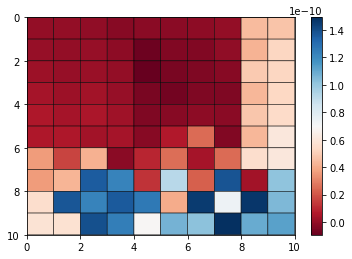

accuracy is 70.000000 lamba is 1.342685
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  1e+01  1e+00
 1:  1.3021e+02 -1.9893e+04  2e+04  2e-02  8e+00  2e+00
 2:  3.1183e+02 -1.5390e+04  2e+04  1e-02  7e+00  3e+00
 3:  4.1227e+02 -6.8573e+03  8e+03  6e-03  3e+00  3e+00
 4:  2.0253e+02 -1.3615e+03  2e+03  1e-03  7e-01  7e-01
 5:  8.0300e+01 -2.2504e+02  3e+02  2e-04  1e-01  2e-01
 6:  1.3662e+01 -3.1894e+00  2e+01  1e-05  7e-03  2e-02
 7:  1.4118e-01 -3.2979e-02  2e-01  1e-07  7e-05  2e-04
 8:  1.4116e-03 -3.2974e-04  2e-03  1e-09  7e-07  2e-06
 9:  1.4116e-05 -3.2974e-06  2e-05  1e-11  7e-09  2e-08
10:  1.4116e-07 -3.2974e-08  2e-07  1e-13  7e-11  2e-10
11:  1.4116e-09 -3.2974e-10  2e-09  1e-15  3e-12  2e-12
Optimal solution found.


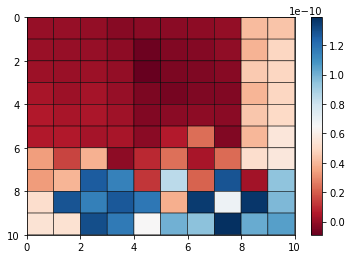

accuracy is 71.000000 lamba is 1.352705
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  1e+01  1e+00
 1:  1.3066e+02 -1.9888e+04  2e+04  2e-02  8e+00  2e+00
 2:  3.1310e+02 -1.5397e+04  2e+04  1e-02  7e+00  3e+00
 3:  4.1478e+02 -6.8853e+03  8e+03  6e-03  3e+00  3e+00
 4:  2.0324e+02 -1.3456e+03  2e+03  1e-03  7e-01  7e-01
 5:  7.8971e+01 -2.2241e+02  3e+02  2e-04  1e-01  2e-01
 6:  1.3341e+01 -3.0562e+00  2e+01  1e-05  7e-03  2e-02
 7:  1.3711e-01 -3.1423e-02  2e-01  1e-07  7e-05  2e-04
 8:  1.3709e-03 -3.1419e-04  2e-03  1e-09  7e-07  2e-06
 9:  1.3709e-05 -3.1419e-06  2e-05  1e-11  7e-09  2e-08
10:  1.3709e-07 -3.1419e-08  2e-07  1e-13  7e-11  2e-10
11:  1.3709e-09 -3.1419e-10  2e-09  2e-15  2e-12  2e-12
Optimal solution found.


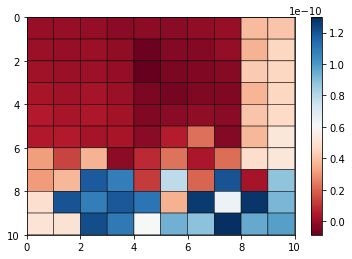

accuracy is 71.000000 lamba is 1.362725
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  1e+01  1e+00
 1:  1.3111e+02 -1.9884e+04  2e+04  2e-02  8e+00  2e+00
 2:  3.1436e+02 -1.5404e+04  2e+04  1e-02  7e+00  3e+00
 3:  4.1729e+02 -6.9130e+03  8e+03  6e-03  3e+00  3e+00
 4:  2.0393e+02 -1.3296e+03  2e+03  1e-03  6e-01  7e-01
 5:  7.7631e+01 -2.1966e+02  3e+02  2e-04  1e-01  2e-01
 6:  1.3023e+01 -2.9286e+00  2e+01  1e-05  7e-03  2e-02
 7:  1.3323e-01 -2.9966e-02  2e-01  1e-07  7e-05  2e-04
 8:  1.3321e-03 -2.9962e-04  2e-03  1e-09  7e-07  2e-06
 9:  1.3321e-05 -2.9962e-06  2e-05  1e-11  7e-09  2e-08
10:  1.3321e-07 -2.9962e-08  2e-07  1e-13  7e-11  2e-10
11:  1.3321e-09 -2.9962e-10  2e-09  2e-15  3e-12  2e-12
Optimal solution found.


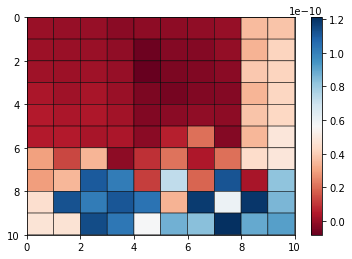

accuracy is 71.000000 lamba is 1.372745
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  1e+01  1e+00
 1:  1.3156e+02 -1.9879e+04  2e+04  2e-02  8e+00  2e+00
 2:  3.1561e+02 -1.5410e+04  2e+04  1e-02  7e+00  3e+00
 3:  4.1978e+02 -6.9402e+03  8e+03  6e-03  3e+00  3e+00
 4:  2.0458e+02 -1.3135e+03  2e+03  1e-03  6e-01  7e-01
 5:  7.6281e+01 -2.1678e+02  3e+02  2e-04  1e-01  2e-01
 6:  1.2708e+01 -2.8064e+00  2e+01  1e-05  6e-03  2e-02
 7:  1.2948e-01 -2.8599e-02  2e-01  1e-07  7e-05  2e-04
 8:  1.2947e-03 -2.8596e-04  2e-03  1e-09  7e-07  2e-06
 9:  1.2947e-05 -2.8596e-06  2e-05  1e-11  7e-09  2e-08
10:  1.2947e-07 -2.8596e-08  2e-07  1e-13  7e-11  2e-10
11:  1.2947e-09 -2.8596e-10  2e-09  1e-15  1e-12  2e-12
Optimal solution found.


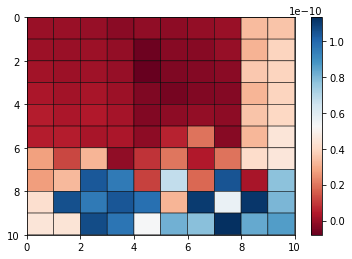

accuracy is 71.000000 lamba is 1.382766
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  1e+01  1e+00
 1:  1.3200e+02 -1.9875e+04  2e+04  2e-02  8e+00  2e+00
 2:  3.1686e+02 -1.5417e+04  2e+04  1e-02  7e+00  3e+00
 3:  4.2226e+02 -6.9670e+03  8e+03  6e-03  3e+00  3e+00
 4:  2.0522e+02 -1.2973e+03  2e+03  1e-03  6e-01  6e-01
 5:  7.5037e+01 -2.1475e+02  3e+02  2e-04  1e-01  2e-01
 6:  1.2421e+01 -2.7185e+00  2e+01  1e-05  6e-03  2e-02
 7:  1.2616e-01 -2.7613e-02  2e-01  1e-07  6e-05  2e-04
 8:  1.2615e-03 -2.7610e-04  2e-03  1e-09  6e-07  2e-06
 9:  1.2615e-05 -2.7610e-06  2e-05  1e-11  6e-09  2e-08
10:  1.2615e-07 -2.7610e-08  2e-07  1e-13  6e-11  2e-10
11:  1.2615e-09 -2.7610e-10  2e-09  1e-15  3e-12  2e-12
Optimal solution found.


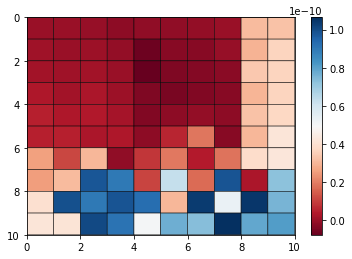

accuracy is 71.000000 lamba is 1.392786
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  1e+01  1e+00
 1:  1.3245e+02 -1.9870e+04  2e+04  2e-02  8e+00  2e+00
 2:  3.1810e+02 -1.5424e+04  2e+04  1e-02  7e+00  3e+00
 3:  4.2472e+02 -6.9935e+03  9e+03  6e-03  3e+00  3e+00
 4:  2.0583e+02 -1.2809e+03  2e+03  1e-03  6e-01  6e-01
 5:  7.4347e+01 -2.1707e+02  3e+02  2e-04  1e-01  2e-01
 6:  1.2234e+01 -2.7229e+00  2e+01  1e-05  6e-03  2e-02
 7:  1.2399e-01 -2.7594e-02  2e-01  1e-07  6e-05  2e-04
 8:  1.2398e-03 -2.7591e-04  2e-03  1e-09  6e-07  2e-06
 9:  1.2398e-05 -2.7591e-06  2e-05  1e-11  6e-09  2e-08
10:  1.2398e-07 -2.7591e-08  2e-07  1e-13  6e-11  2e-10
11:  1.2398e-09 -2.7591e-10  2e-09  1e-15  2e-12  2e-12
Optimal solution found.


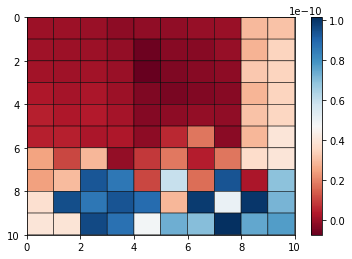

accuracy is 71.000000 lamba is 1.402806
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  1e+01  1e+00
 1:  1.3289e+02 -1.9866e+04  2e+04  2e-02  8e+00  2e+00
 2:  3.1934e+02 -1.5430e+04  2e+04  1e-02  6e+00  3e+00
 3:  4.2717e+02 -7.0196e+03  9e+03  6e-03  3e+00  3e+00
 4:  2.0642e+02 -1.2644e+03  2e+03  1e-03  6e-01  6e-01
 5:  7.3627e+01 -2.1880e+02  3e+02  2e-04  1e-01  1e-01
 6:  1.2011e+01 -2.7258e+00  2e+01  1e-05  6e-03  2e-02
 7:  1.2189e-01 -2.7657e-02  2e-01  1e-07  6e-05  2e-04
 8:  1.2188e-03 -2.7654e-04  2e-03  1e-09  6e-07  2e-06
 9:  1.2188e-05 -2.7654e-06  2e-05  1e-11  6e-09  2e-08
10:  1.2188e-07 -2.7654e-08  2e-07  1e-13  6e-11  2e-10
11:  1.2188e-09 -2.7654e-10  2e-09  1e-15  2e-12  2e-12
Optimal solution found.


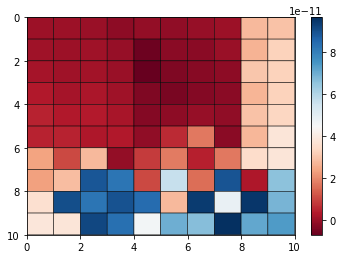

accuracy is 71.000000 lamba is 1.412826
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  1e+01  1e+00
 1:  1.3333e+02 -1.9861e+04  2e+04  2e-02  8e+00  2e+00
 2:  3.2057e+02 -1.5437e+04  2e+04  1e-02  6e+00  3e+00
 3:  4.2961e+02 -7.0454e+03  9e+03  6e-03  3e+00  3e+00
 4:  2.0698e+02 -1.2477e+03  2e+03  1e-03  6e-01  6e-01
 5:  7.2879e+01 -2.1995e+02  3e+02  2e-04  1e-01  1e-01
 6:  1.1753e+01 -2.7223e+00  1e+01  1e-05  6e-03  1e-02
 7:  1.1938e-01 -2.7646e-02  1e-01  1e-07  6e-05  2e-04
 8:  1.1937e-03 -2.7644e-04  1e-03  1e-09  6e-07  2e-06
 9:  1.1937e-05 -2.7643e-06  1e-05  1e-11  6e-09  2e-08
10:  1.1937e-07 -2.7643e-08  1e-07  1e-13  6e-11  2e-10
11:  1.1937e-09 -2.7643e-10  1e-09  2e-15  2e-12  2e-12
Optimal solution found.


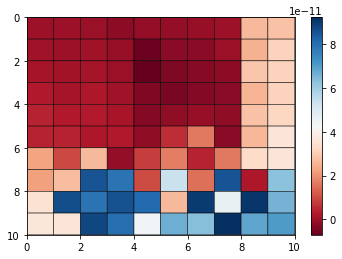

accuracy is 73.000000 lamba is 1.422846
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  1e+01  1e+00
 1:  1.3376e+02 -1.9857e+04  2e+04  2e-02  8e+00  2e+00
 2:  3.2179e+02 -1.5443e+04  2e+04  1e-02  6e+00  3e+00
 3:  4.3203e+02 -7.0708e+03  9e+03  6e-03  3e+00  3e+00
 4:  2.0752e+02 -1.2310e+03  2e+03  1e-03  6e-01  6e-01
 5:  7.2103e+01 -2.2056e+02  3e+02  2e-04  1e-01  1e-01
 6:  1.1462e+01 -2.7127e+00  1e+01  1e-05  6e-03  1e-02
 7:  1.1644e-01 -2.7549e-02  1e-01  1e-07  6e-05  1e-04
 8:  1.1643e-03 -2.7547e-04  1e-03  1e-09  6e-07  1e-06
 9:  1.1643e-05 -2.7547e-06  1e-05  1e-11  6e-09  1e-08
10:  1.1643e-07 -2.7547e-08  1e-07  1e-13  6e-11  1e-10
11:  1.1643e-09 -2.7547e-10  1e-09  1e-15  1e-12  1e-12
Optimal solution found.


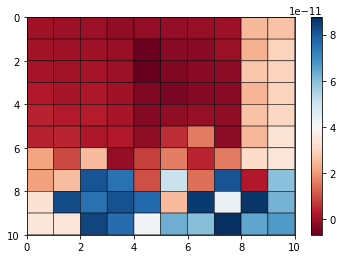

accuracy is 73.000000 lamba is 1.432866
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  1e+01  1e+00
 1:  1.3420e+02 -1.9852e+04  2e+04  2e-02  8e+00  2e+00
 2:  3.2301e+02 -1.5449e+04  2e+04  1e-02  6e+00  3e+00
 3:  4.3444e+02 -7.0958e+03  9e+03  6e-03  3e+00  3e+00
 4:  2.0804e+02 -1.2141e+03  2e+03  1e-03  6e-01  6e-01
 5:  7.1301e+01 -2.2064e+02  3e+02  2e-04  1e-01  1e-01
 6:  1.1143e+01 -2.6975e+00  1e+01  1e-05  6e-03  1e-02
 7:  1.1313e-01 -2.7378e-02  1e-01  1e-07  6e-05  1e-04
 8:  1.1312e-03 -2.7376e-04  1e-03  1e-09  6e-07  1e-06
 9:  1.1312e-05 -2.7376e-06  1e-05  1e-11  6e-09  1e-08
10:  1.1312e-07 -2.7376e-08  1e-07  1e-13  6e-11  1e-10
11:  1.1312e-09 -2.7376e-10  1e-09  1e-15  1e-12  1e-12
Optimal solution found.


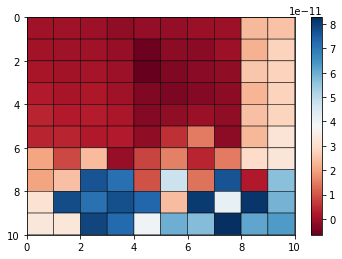

accuracy is 73.000000 lamba is 1.442886
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  1e+01  1e+00
 1:  1.3463e+02 -1.9848e+04  2e+04  2e-02  8e+00  2e+00
 2:  3.2422e+02 -1.5456e+04  2e+04  1e-02  6e+00  3e+00
 3:  4.3684e+02 -7.1205e+03  9e+03  6e-03  3e+00  3e+00
 4:  2.0853e+02 -1.1971e+03  2e+03  1e-03  6e-01  6e-01
 5:  7.0474e+01 -2.2024e+02  3e+02  2e-04  1e-01  1e-01
 6:  1.0797e+01 -2.6770e+00  1e+01  1e-05  5e-03  1e-02
 7:  1.0951e-01 -2.7143e-02  1e-01  1e-07  6e-05  1e-04
 8:  1.0950e-03 -2.7141e-04  1e-03  1e-09  6e-07  1e-06
 9:  1.0950e-05 -2.7141e-06  1e-05  1e-11  6e-09  1e-08
10:  1.0950e-07 -2.7141e-08  1e-07  1e-13  6e-11  1e-10
11:  1.0950e-09 -2.7141e-10  1e-09  1e-15  2e-12  1e-12
Optimal solution found.


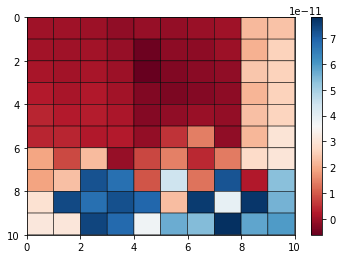

accuracy is 73.000000 lamba is 1.452906
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  1e+01  1e+00
 1:  1.3506e+02 -1.9843e+04  2e+04  2e-02  8e+00  2e+00
 2:  3.2542e+02 -1.5462e+04  2e+04  1e-02  6e+00  3e+00
 3:  4.3923e+02 -7.1449e+03  9e+03  6e-03  3e+00  3e+00
 4:  2.0900e+02 -1.1800e+03  2e+03  1e-03  6e-01  6e-01
 5:  6.9622e+01 -2.1936e+02  3e+02  2e-04  1e-01  1e-01
 6:  1.0428e+01 -2.6515e+00  1e+01  1e-05  5e-03  1e-02
 7:  1.0563e-01 -2.6850e-02  1e-01  1e-07  5e-05  1e-04
 8:  1.0562e-03 -2.6848e-04  1e-03  1e-09  5e-07  1e-06
 9:  1.0562e-05 -2.6848e-06  1e-05  1e-11  5e-09  1e-08
10:  1.0562e-07 -2.6848e-08  1e-07  1e-13  5e-11  1e-10
11:  1.0562e-09 -2.6848e-10  1e-09  1e-15  2e-12  1e-12
Optimal solution found.


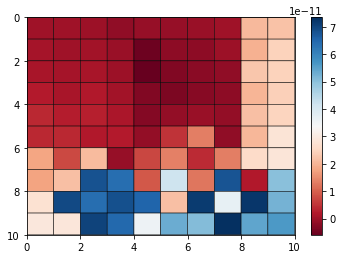

accuracy is 73.000000 lamba is 1.462926
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  1e+01  1e+00
 1:  1.3549e+02 -1.9838e+04  2e+04  2e-02  8e+00  2e+00
 2:  3.2662e+02 -1.5468e+04  2e+04  1e-02  6e+00  3e+00
 3:  4.4161e+02 -7.1689e+03  9e+03  6e-03  3e+00  3e+00
 4:  2.0945e+02 -1.1627e+03  2e+03  1e-03  6e-01  6e-01
 5:  6.8747e+01 -2.1803e+02  3e+02  2e-04  1e-01  1e-01
 6:  1.0037e+01 -2.6211e+00  1e+01  1e-05  5e-03  1e-02
 7:  1.0154e-01 -2.6506e-02  1e-01  1e-07  5e-05  1e-04
 8:  1.0153e-03 -2.6504e-04  1e-03  1e-09  5e-07  1e-06
 9:  1.0153e-05 -2.6504e-06  1e-05  1e-11  5e-09  1e-08
10:  1.0153e-07 -2.6504e-08  1e-07  1e-13  5e-11  1e-10
11:  1.0153e-09 -2.6504e-10  1e-09  1e-15  1e-12  1e-12
Optimal solution found.


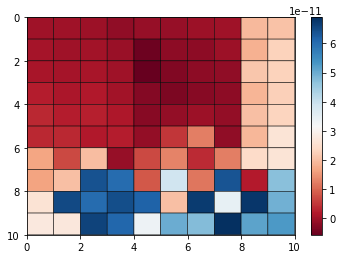

accuracy is 73.000000 lamba is 1.472946
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  1e+01  1e+00
 1:  1.3591e+02 -1.9833e+04  2e+04  2e-02  8e+00  2e+00
 2:  3.2781e+02 -1.5474e+04  2e+04  1e-02  6e+00  3e+00
 3:  4.4397e+02 -7.1925e+03  9e+03  6e-03  3e+00  3e+00
 4:  2.0987e+02 -1.1454e+03  2e+03  1e-03  5e-01  6e-01
 5:  6.7849e+01 -2.1627e+02  3e+02  2e-04  1e-01  1e-01
 6:  9.6291e+00 -2.5861e+00  1e+01  1e-05  5e-03  1e-02
 7:  9.7276e-02 -2.6116e-02  1e-01  1e-07  5e-05  1e-04
 8:  9.7269e-04 -2.6114e-04  1e-03  1e-09  5e-07  1e-06
 9:  9.7269e-06 -2.6114e-06  1e-05  1e-11  5e-09  1e-08
10:  9.7269e-08 -2.6114e-08  1e-07  1e-13  5e-11  1e-10
11:  9.7269e-10 -2.6114e-10  1e-09  1e-15  3e-12  1e-12
Optimal solution found.


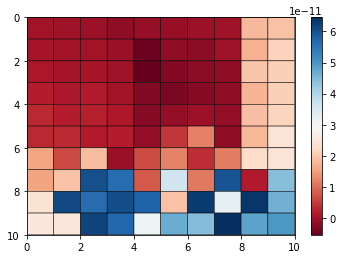

accuracy is 74.000000 lamba is 1.482966
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  1e+01  1e+00
 1:  1.3633e+02 -1.9829e+04  2e+04  2e-02  8e+00  2e+00
 2:  3.2900e+02 -1.5480e+04  2e+04  1e-02  6e+00  3e+00
 3:  4.4632e+02 -7.2159e+03  9e+03  6e-03  3e+00  3e+00
 4:  2.1027e+02 -1.1279e+03  1e+03  1e-03  5e-01  6e-01
 5:  6.7159e+01 -2.1285e+02  3e+02  2e-04  1e-01  1e-01
 6:  9.1261e+00 -2.5336e+00  1e+01  9e-06  5e-03  1e-02
 7:  9.2049e-02 -2.5545e-02  1e-01  9e-08  5e-05  1e-04
 8:  9.2043e-04 -2.5544e-04  1e-03  9e-10  5e-07  1e-06
 9:  9.2043e-06 -2.5543e-06  1e-05  9e-12  5e-09  1e-08
10:  9.2043e-08 -2.5543e-08  1e-07  9e-14  5e-11  1e-10
11:  9.2043e-10 -2.5543e-10  1e-09  1e-15  1e-12  1e-12
Optimal solution found.


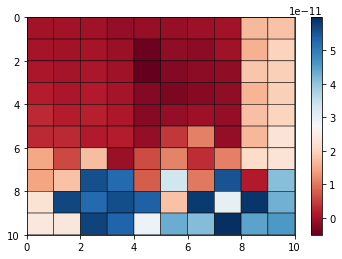

accuracy is 75.000000 lamba is 1.492986
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  1e+01  1e+00
 1:  1.3676e+02 -1.9824e+04  2e+04  2e-02  8e+00  2e+00
 2:  3.3018e+02 -1.5486e+04  2e+04  1e-02  6e+00  3e+00
 3:  4.4866e+02 -7.2389e+03  9e+03  6e-03  3e+00  3e+00
 4:  2.1065e+02 -1.1104e+03  1e+03  1e-03  5e-01  6e-01
 5:  6.6761e+01 -2.0740e+02  3e+02  2e-04  1e-01  1e-01
 6:  8.5160e+00 -2.4601e+00  1e+01  9e-06  4e-03  1e-02
 7:  8.5750e-02 -2.4763e-02  1e-01  9e-08  4e-05  1e-04
 8:  8.5745e-04 -2.4761e-04  1e-03  9e-10  4e-07  1e-06
 9:  8.5745e-06 -2.4761e-06  1e-05  9e-12  4e-09  1e-08
10:  8.5745e-08 -2.4761e-08  1e-07  9e-14  4e-11  1e-10
11:  8.5745e-10 -2.4761e-10  1e-09  1e-15  2e-12  1e-12
Optimal solution found.


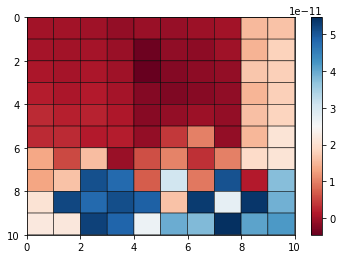

accuracy is 75.000000 lamba is 1.503006
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  1e+01  1e+00
 1:  1.3717e+02 -1.9819e+04  2e+04  2e-02  8e+00  2e+00
 2:  3.3136e+02 -1.5492e+04  2e+04  1e-02  6e+00  3e+00
 3:  4.5098e+02 -7.2616e+03  9e+03  6e-03  3e+00  3e+00
 4:  2.1101e+02 -1.0927e+03  1e+03  1e-03  5e-01  6e-01
 5:  6.6307e+01 -2.0185e+02  3e+02  2e-04  1e-01  1e-01
 6:  7.9265e+00 -2.3870e+00  1e+01  8e-06  4e-03  1e-02
 7:  7.9700e-02 -2.3993e-02  1e-01  8e-08  4e-05  1e-04
 8:  7.9695e-04 -2.3992e-04  1e-03  8e-10  4e-07  1e-06
 9:  7.9695e-06 -2.3992e-06  1e-05  8e-12  4e-09  1e-08
10:  7.9695e-08 -2.3992e-08  1e-07  8e-14  4e-11  1e-10
11:  7.9695e-10 -2.3992e-10  1e-09  1e-15  2e-12  1e-12
Optimal solution found.


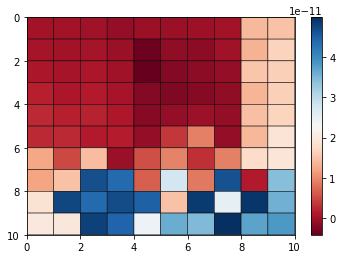

accuracy is 74.000000 lamba is 1.513026
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  1e+01  1e+00
 1:  1.3759e+02 -1.9814e+04  2e+04  2e-02  8e+00  2e+00
 2:  3.3252e+02 -1.5498e+04  2e+04  1e-02  6e+00  3e+00
 3:  4.5330e+02 -7.2839e+03  9e+03  6e-03  3e+00  3e+00
 4:  2.1134e+02 -1.0749e+03  1e+03  1e-03  5e-01  6e-01
 5:  6.5798e+01 -1.9622e+02  3e+02  2e-04  1e-01  1e-01
 6:  7.3580e+00 -2.3116e+00  1e+01  8e-06  4e-03  9e-03
 7:  7.3892e-02 -2.3207e-02  1e-01  8e-08  4e-05  9e-05
 8:  7.3888e-04 -2.3206e-04  1e-03  8e-10  4e-07  9e-07
 9:  7.3888e-06 -2.3206e-06  1e-05  8e-12  4e-09  9e-09
10:  7.3888e-08 -2.3206e-08  1e-07  8e-14  4e-11  9e-11
Optimal solution found.


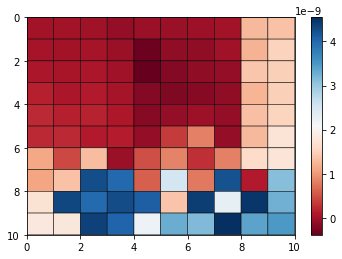

accuracy is 74.000000 lamba is 1.523046
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  1e+01  1e+00
 1:  1.3801e+02 -1.9810e+04  2e+04  2e-02  8e+00  2e+00
 2:  3.3369e+02 -1.5504e+04  2e+04  1e-02  6e+00  3e+00
 3:  4.5560e+02 -7.3060e+03  9e+03  6e-03  3e+00  3e+00
 4:  2.1165e+02 -1.0571e+03  1e+03  1e-03  5e-01  5e-01
 5:  6.5233e+01 -1.9051e+02  3e+02  2e-04  1e-01  1e-01
 6:  6.8113e+00 -2.2342e+00  9e+00  7e-06  4e-03  8e-03
 7:  6.8331e-02 -2.2407e-02  9e-02  7e-08  4e-05  8e-05
 8:  6.8328e-04 -2.2406e-04  9e-04  7e-10  4e-07  8e-07
 9:  6.8328e-06 -2.2406e-06  9e-06  7e-12  4e-09  8e-09
10:  6.8328e-08 -2.2406e-08  9e-08  7e-14  4e-11  8e-11
Optimal solution found.


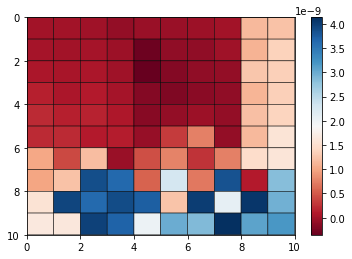

accuracy is 75.000000 lamba is 1.533066
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  1e+01  1e+00
 1:  1.3842e+02 -1.9805e+04  2e+04  2e-02  8e+00  2e+00
 2:  3.3485e+02 -1.5510e+04  2e+04  1e-02  6e+00  3e+00
 3:  4.5789e+02 -7.3277e+03  9e+03  6e-03  3e+00  3e+00
 4:  2.1195e+02 -1.0391e+03  1e+03  1e-03  5e-01  5e-01
 5:  6.4613e+01 -1.8472e+02  3e+02  2e-04  1e-01  1e-01
 6:  6.2874e+00 -2.1553e+00  9e+00  7e-06  3e-03  8e-03
 7:  6.3021e-02 -2.1597e-02  9e-02  7e-08  3e-05  8e-05
 8:  6.3018e-04 -2.1596e-04  9e-04  7e-10  3e-07  8e-07
 9:  6.3018e-06 -2.1596e-06  9e-06  7e-12  3e-09  8e-09
10:  6.3018e-08 -2.1596e-08  9e-08  7e-14  3e-11  8e-11
Optimal solution found.


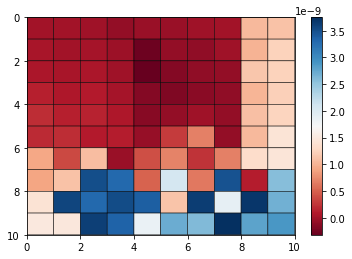

accuracy is 75.000000 lamba is 1.543086
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  1e+01  1e+00
 1:  1.3883e+02 -1.9800e+04  2e+04  2e-02  8e+00  2e+00
 2:  3.3600e+02 -1.5515e+04  2e+04  1e-02  6e+00  3e+00
 3:  4.6018e+02 -7.3492e+03  9e+03  6e-03  3e+00  3e+00
 4:  2.1221e+02 -1.0210e+03  1e+03  1e-03  5e-01  5e-01
 5:  6.3939e+01 -1.7888e+02  3e+02  2e-04  9e-02  1e-01
 6:  5.7869e+00 -2.0751e+00  8e+00  6e-06  3e-03  7e-03
 7:  5.7964e-02 -2.0779e-02  8e-02  6e-08  3e-05  7e-05
 8:  5.7961e-04 -2.0778e-04  8e-04  6e-10  3e-07  7e-07
 9:  5.7961e-06 -2.0778e-06  8e-06  6e-12  3e-09  7e-09
10:  5.7961e-08 -2.0778e-08  8e-08  6e-14  3e-11  7e-11
Optimal solution found.


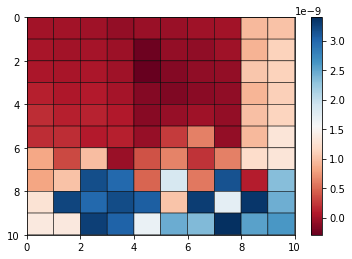

accuracy is 75.000000 lamba is 1.553106
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  1e+01  1e+00
 1:  1.3924e+02 -1.9795e+04  2e+04  2e-02  8e+00  2e+00
 2:  3.3714e+02 -1.5521e+04  2e+04  1e-02  6e+00  3e+00
 3:  4.6245e+02 -7.3703e+03  9e+03  6e-03  3e+00  3e+00
 4:  2.1246e+02 -1.0029e+03  1e+03  1e-03  5e-01  5e-01
 5:  6.3209e+01 -1.7298e+02  2e+02  2e-04  9e-02  1e-01
 6:  5.3106e+00 -1.9941e+00  7e+00  6e-06  3e-03  7e-03
 7:  5.3162e-02 -1.9957e-02  7e-02  6e-08  3e-05  7e-05
 8:  5.3160e-04 -1.9956e-04  7e-04  6e-10  3e-07  7e-07
 9:  5.3160e-06 -1.9956e-06  7e-06  6e-12  3e-09  7e-09
10:  5.3160e-08 -1.9956e-08  7e-08  6e-14  3e-11  7e-11
Optimal solution found.


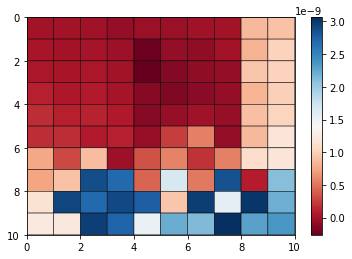

accuracy is 75.000000 lamba is 1.563126
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  1e+01  1e+00
 1:  1.3964e+02 -1.9790e+04  2e+04  2e-02  8e+00  2e+00
 2:  3.3828e+02 -1.5527e+04  2e+04  1e-02  6e+00  3e+00
 3:  4.6470e+02 -7.3911e+03  9e+03  6e-03  3e+00  3e+00
 4:  2.1269e+02 -9.8460e+02  1e+03  1e-03  5e-01  5e-01
 5:  6.2426e+01 -1.6704e+02  2e+02  2e-04  9e-02  1e-01
 6:  4.8587e+00 -1.9125e+00  7e+00  5e-06  3e-03  6e-03
 7:  4.8617e-02 -1.9132e-02  7e-02  5e-08  3e-05  6e-05
 8:  4.8615e-04 -1.9132e-04  7e-04  5e-10  3e-07  6e-07
 9:  4.8615e-06 -1.9132e-06  7e-06  5e-12  3e-09  6e-09
10:  4.8615e-08 -1.9132e-08  7e-08  5e-14  3e-11  6e-11
Optimal solution found.


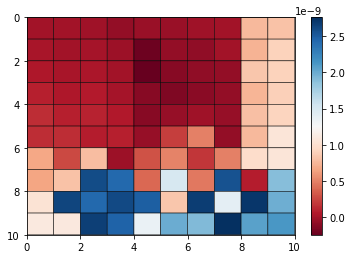

accuracy is 75.000000 lamba is 1.573146
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  1e+01  1e+00
 1:  1.4005e+02 -1.9785e+04  2e+04  2e-02  8e+00  2e+00
 2:  3.3942e+02 -1.5532e+04  2e+04  1e-02  6e+00  3e+00
 3:  4.6695e+02 -7.4116e+03  9e+03  6e-03  3e+00  3e+00
 4:  2.1289e+02 -9.6624e+02  1e+03  9e-04  4e-01  5e-01
 5:  6.1588e+01 -1.6106e+02  2e+02  2e-04  8e-02  1e-01
 6:  4.4318e+00 -1.8308e+00  6e+00  5e-06  2e-03  5e-03
 7:  4.4329e-02 -1.8309e-02  6e-02  5e-08  2e-05  5e-05
 8:  4.4328e-04 -1.8308e-04  6e-04  5e-10  2e-07  5e-07
 9:  4.4328e-06 -1.8308e-06  6e-06  5e-12  2e-09  5e-09
10:  4.4328e-08 -1.8308e-08  6e-08  5e-14  2e-11  5e-11
Optimal solution found.


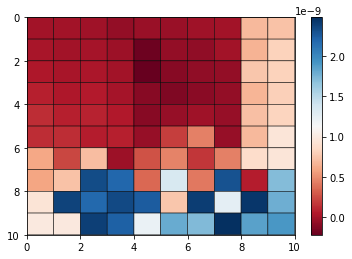

accuracy is 75.000000 lamba is 1.583166
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  1e+01  1e+00
 1:  1.4045e+02 -1.9780e+04  2e+04  2e-02  8e+00  2e+00
 2:  3.4055e+02 -1.5538e+04  2e+04  1e-02  6e+00  3e+00
 3:  4.6919e+02 -7.4319e+03  9e+03  6e-03  3e+00  3e+00
 4:  2.1307e+02 -9.4779e+02  1e+03  9e-04  4e-01  5e-01
 5:  6.0697e+01 -1.5505e+02  2e+02  2e-04  8e-02  1e-01
 6:  4.0299e+00 -1.7493e+00  6e+00  5e-06  2e-03  5e-03
 7:  4.0298e-02 -1.7489e-02  6e-02  5e-08  2e-05  5e-05
 8:  4.0297e-04 -1.7488e-04  6e-04  5e-10  2e-07  5e-07
 9:  4.0297e-06 -1.7488e-06  6e-06  5e-12  2e-09  5e-09
10:  4.0297e-08 -1.7488e-08  6e-08  5e-14  2e-11  5e-11
Optimal solution found.


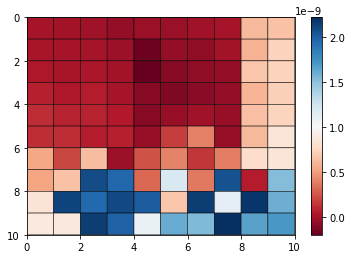

accuracy is 75.000000 lamba is 1.593186
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  1e+01  1e+00
 1:  1.4085e+02 -1.9775e+04  2e+04  2e-02  8e+00  2e+00
 2:  3.4167e+02 -1.5543e+04  2e+04  1e-02  6e+00  3e+00
 3:  4.7142e+02 -7.4518e+03  9e+03  6e-03  3e+00  3e+00
 4:  2.1324e+02 -9.2925e+02  1e+03  9e-04  4e-01  5e-01
 5:  5.9752e+01 -1.4903e+02  2e+02  2e-04  8e-02  1e-01
 6:  3.6532e+00 -1.6682e+00  5e+00  4e-06  2e-03  4e-03
 7:  3.6523e-02 -1.6675e-02  5e-02  4e-08  2e-05  4e-05
 8:  3.6522e-04 -1.6674e-04  5e-04  4e-10  2e-07  4e-07
 9:  3.6522e-06 -1.6674e-06  5e-06  4e-12  2e-09  4e-09
10:  3.6522e-08 -1.6674e-08  5e-08  4e-14  2e-11  4e-11
Optimal solution found.


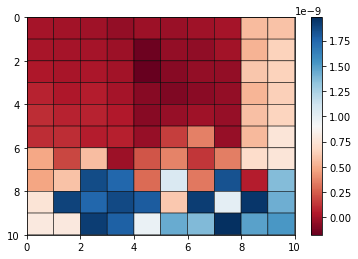

accuracy is 75.000000 lamba is 1.603206
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  1e+01  1e+00
 1:  1.4125e+02 -1.9770e+04  2e+04  2e-02  7e+00  2e+00
 2:  3.4279e+02 -1.5549e+04  2e+04  1e-02  6e+00  3e+00
 3:  4.7363e+02 -7.4715e+03  9e+03  6e-03  3e+00  3e+00
 4:  2.1338e+02 -9.1062e+02  1e+03  9e-04  4e-01  5e-01
 5:  5.8754e+01 -1.4300e+02  2e+02  2e-04  8e-02  9e-02
 6:  3.3014e+00 -1.5877e+00  5e+00  4e-06  2e-03  4e-03
 7:  3.3001e-02 -1.5869e-02  5e-02  4e-08  2e-05  4e-05
 8:  3.3001e-04 -1.5868e-04  5e-04  4e-10  2e-07  4e-07
 9:  3.3001e-06 -1.5868e-06  5e-06  4e-12  2e-09  4e-09
10:  3.3001e-08 -1.5868e-08  5e-08  4e-14  2e-11  4e-11
Optimal solution found.


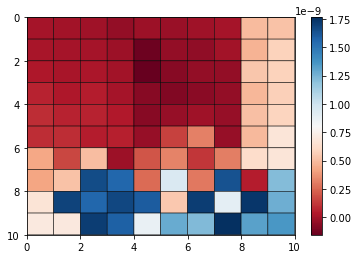

accuracy is 76.000000 lamba is 1.613226
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  1e+01  1e+00
 1:  1.4165e+02 -1.9765e+04  2e+04  2e-02  7e+00  2e+00
 2:  3.4390e+02 -1.5554e+04  2e+04  1e-02  6e+00  3e+00
 3:  4.7584e+02 -7.4909e+03  9e+03  6e-03  3e+00  3e+00
 4:  2.1350e+02 -8.9191e+02  1e+03  9e-04  4e-01  5e-01
 5:  5.7704e+01 -1.3697e+02  2e+02  2e-04  7e-02  9e-02
 6:  2.9743e+00 -1.5082e+00  5e+00  4e-06  2e-03  4e-03
 7:  2.9729e-02 -1.5073e-02  5e-02  4e-08  2e-05  4e-05
 8:  2.9729e-04 -1.5073e-04  5e-04  4e-10  2e-07  4e-07
 9:  2.9729e-06 -1.5073e-06  5e-06  4e-12  2e-09  4e-09
10:  2.9729e-08 -1.5073e-08  5e-08  4e-14  2e-11  4e-11
Optimal solution found.


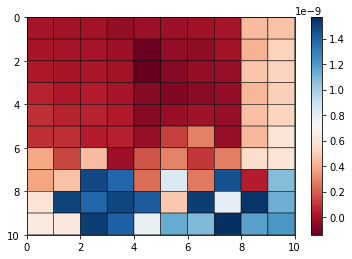

accuracy is 76.000000 lamba is 1.623246
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  1e+01  1e+00
 1:  1.4204e+02 -1.9760e+04  2e+04  2e-02  7e+00  2e+00
 2:  3.4501e+02 -1.5560e+04  2e+04  1e-02  6e+00  3e+00
 3:  4.7804e+02 -7.5099e+03  9e+03  6e-03  3e+00  3e+00
 4:  2.1360e+02 -8.7310e+02  1e+03  9e-04  4e-01  5e-01
 5:  5.6603e+01 -1.3095e+02  2e+02  2e-04  7e-02  9e-02
 6:  2.6716e+00 -1.4299e+00  4e+00  3e-06  2e-03  3e-03
 7:  2.6702e-02 -1.4289e-02  4e-02  3e-08  2e-05  3e-05
 8:  2.6702e-04 -1.4289e-04  4e-04  3e-10  2e-07  3e-07
 9:  2.6702e-06 -1.4289e-06  4e-06  3e-12  2e-09  3e-09
10:  2.6702e-08 -1.4289e-08  4e-08  3e-14  2e-11  3e-11
Optimal solution found.


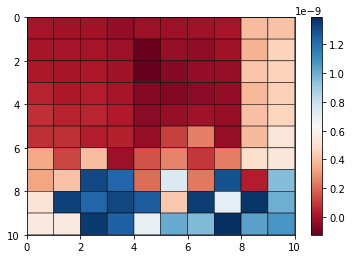

accuracy is 77.000000 lamba is 1.633267
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  1e+01  1e+00
 1:  1.4244e+02 -1.9755e+04  2e+04  2e-02  7e+00  2e+00
 2:  3.4611e+02 -1.5565e+04  2e+04  1e-02  6e+00  3e+00
 3:  4.8022e+02 -7.5288e+03  9e+03  6e-03  3e+00  3e+00
 4:  2.1368e+02 -8.5421e+02  1e+03  9e-04  4e-01  5e-01
 5:  5.5450e+01 -1.2495e+02  2e+02  1e-04  7e-02  9e-02
 6:  2.3927e+00 -1.3529e+00  4e+00  3e-06  1e-03  3e-03
 7:  2.3914e-02 -1.3520e-02  4e-02  3e-08  1e-05  3e-05
 8:  2.3914e-04 -1.3520e-04  4e-04  3e-10  1e-07  3e-07
 9:  2.3914e-06 -1.3520e-06  4e-06  3e-12  1e-09  3e-09
10:  2.3914e-08 -1.3520e-08  4e-08  3e-14  1e-11  3e-11
Optimal solution found.


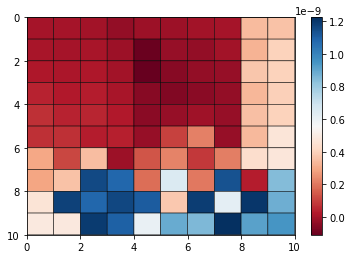

accuracy is 77.000000 lamba is 1.643287
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  1e+01  1e+00
 1:  1.4283e+02 -1.9750e+04  2e+04  2e-02  7e+00  2e+00
 2:  3.4721e+02 -1.5570e+04  2e+04  1e-02  6e+00  3e+00
 3:  4.8240e+02 -7.5473e+03  9e+03  6e-03  3e+00  3e+00
 4:  2.1374e+02 -8.3524e+02  1e+03  8e-04  4e-01  5e-01
 5:  5.4247e+01 -1.1897e+02  2e+02  1e-04  6e-02  8e-02
 6:  2.1370e+00 -1.2774e+00  3e+00  3e-06  1e-03  3e-03
 7:  2.1358e-02 -1.2766e-02  3e-02  3e-08  1e-05  3e-05
 8:  2.1358e-04 -1.2766e-04  3e-04  3e-10  1e-07  3e-07
 9:  2.1358e-06 -1.2766e-06  3e-06  3e-12  1e-09  3e-09
10:  2.1358e-08 -1.2766e-08  3e-08  3e-14  1e-11  3e-11
Optimal solution found.


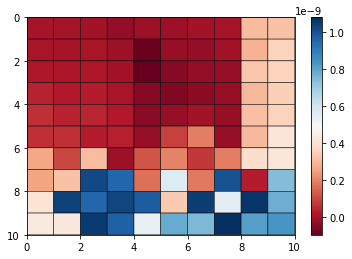

accuracy is 77.000000 lamba is 1.653307
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  1e+01  1e+00
 1:  1.4322e+02 -1.9745e+04  2e+04  2e-02  7e+00  2e+00
 2:  3.4830e+02 -1.5575e+04  2e+04  1e-02  6e+00  3e+00
 3:  4.8456e+02 -7.5656e+03  9e+03  6e-03  3e+00  3e+00
 4:  2.1377e+02 -8.1618e+02  1e+03  8e-04  4e-01  4e-01
 5:  5.2994e+01 -1.1304e+02  2e+02  1e-04  6e-02  8e-02
 6:  1.9037e+00 -1.2037e+00  3e+00  2e-06  1e-03  2e-03
 7:  1.9027e-02 -1.2029e-02  3e-02  2e-08  1e-05  2e-05
 8:  1.9027e-04 -1.2029e-04  3e-04  2e-10  1e-07  2e-07
 9:  1.9026e-06 -1.2029e-06  3e-06  2e-12  1e-09  2e-09
10:  1.9026e-08 -1.2029e-08  3e-08  2e-14  1e-11  2e-11
Optimal solution found.


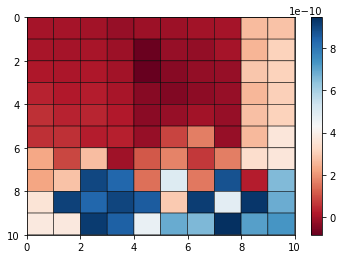

accuracy is 77.000000 lamba is 1.663327
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  1e+01  1e+00
 1:  1.4360e+02 -1.9740e+04  2e+04  2e-02  7e+00  2e+00
 2:  3.4939e+02 -1.5581e+04  2e+04  1e-02  6e+00  3e+00
 3:  4.8672e+02 -7.5836e+03  9e+03  6e-03  3e+00  3e+00
 4:  2.1379e+02 -7.9705e+02  1e+03  8e-04  4e-01  4e-01
 5:  5.1692e+01 -1.0716e+02  2e+02  1e-04  6e-02  8e-02
 6:  1.6919e+00 -1.1318e+00  3e+00  2e-06  1e-03  2e-03
 7:  1.6910e-02 -1.1311e-02  3e-02  2e-08  1e-05  2e-05
 8:  1.6910e-04 -1.1311e-04  3e-04  2e-10  1e-07  2e-07
 9:  1.6910e-06 -1.1311e-06  3e-06  2e-12  1e-09  2e-09
10:  1.6910e-08 -1.1311e-08  3e-08  2e-14  1e-11  2e-11
Optimal solution found.


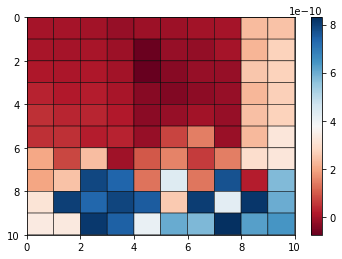

accuracy is 77.000000 lamba is 1.673347
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  1e+01  1e+00
 1:  1.4399e+02 -1.9735e+04  2e+04  2e-02  7e+00  2e+00
 2:  3.5047e+02 -1.5586e+04  2e+04  1e-02  6e+00  3e+00
 3:  4.8886e+02 -7.6014e+03  9e+03  6e-03  3e+00  3e+00
 4:  2.1379e+02 -7.7783e+02  1e+03  8e-04  4e-01  4e-01
 5:  5.0343e+01 -1.0133e+02  2e+02  1e-04  6e-02  7e-02
 6:  1.5006e+00 -1.0618e+00  3e+00  2e-06  9e-04  2e-03
 7:  1.4999e-02 -1.0612e-02  3e-02  2e-08  9e-06  2e-05
 8:  1.4998e-04 -1.0612e-04  3e-04  2e-10  9e-08  2e-07
 9:  1.4998e-06 -1.0612e-06  3e-06  2e-12  9e-10  2e-09
10:  1.4998e-08 -1.0612e-08  3e-08  2e-14  9e-12  2e-11
Optimal solution found.


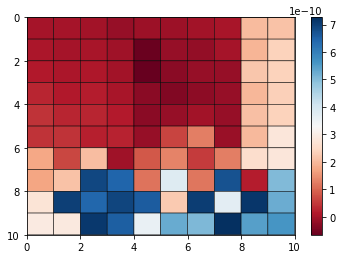

accuracy is 76.000000 lamba is 1.683367
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  1e+01  1e+00
 1:  1.4437e+02 -1.9729e+04  2e+04  2e-02  7e+00  2e+00
 2:  3.5155e+02 -1.5591e+04  2e+04  1e-02  6e+00  3e+00
 3:  4.9100e+02 -7.6188e+03  9e+03  6e-03  3e+00  3e+00
 4:  2.1377e+02 -7.5853e+02  1e+03  8e-04  4e-01  4e-01
 5:  4.8948e+01 -9.5570e+01  2e+02  1e-04  5e-02  7e-02
 6:  1.3287e+00 -9.9386e-01  2e+00  2e-06  8e-04  2e-03
 7:  1.3281e-02 -9.9333e-03  2e-02  2e-08  8e-06  2e-05
 8:  1.3281e-04 -9.9332e-05  2e-04  2e-10  8e-08  2e-07
 9:  1.3281e-06 -9.9332e-07  2e-06  2e-12  8e-10  2e-09
10:  1.3281e-08 -9.9332e-09  2e-08  2e-14  8e-12  2e-11
Optimal solution found.


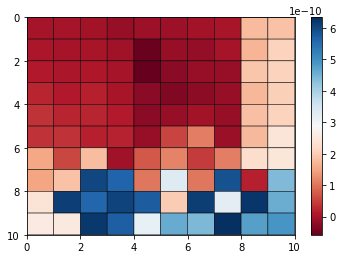

accuracy is 76.000000 lamba is 1.693387
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  1e+01  1e+00
 1:  1.4476e+02 -1.9724e+04  2e+04  2e-02  7e+00  2e+00
 2:  3.5262e+02 -1.5596e+04  2e+04  1e-02  6e+00  3e+00
 3:  4.9313e+02 -7.6361e+03  9e+03  7e-03  3e+00  3e+00
 4:  2.1373e+02 -7.3916e+02  1e+03  8e-04  3e-01  4e-01
 5:  4.7508e+01 -8.9889e+01  1e+02  1e-04  5e-02  7e-02
 6:  1.1759e+00 -9.2943e-01  2e+00  2e-06  8e-04  1e-03
 7:  1.1754e-02 -9.2897e-03  2e-02  2e-08  8e-06  1e-05
 8:  1.1754e-04 -9.2897e-05  2e-04  2e-10  8e-08  1e-07
 9:  1.1754e-06 -9.2897e-07  2e-06  2e-12  8e-10  1e-09
10:  1.1754e-08 -9.2897e-09  2e-08  2e-14  8e-12  1e-11
Optimal solution found.


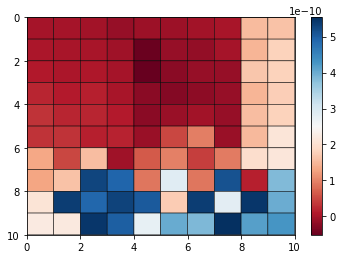

accuracy is 76.000000 lamba is 1.703407
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  1e+01  1e+00
 1:  1.4514e+02 -1.9719e+04  2e+04  2e-02  7e+00  2e+00
 2:  3.5368e+02 -1.5601e+04  2e+04  1e-02  6e+00  3e+00
 3:  4.9524e+02 -7.6531e+03  9e+03  7e-03  3e+00  3e+00
 4:  2.1367e+02 -7.1971e+02  1e+03  7e-04  3e-01  4e-01
 5:  4.6023e+01 -8.4297e+01  1e+02  1e-04  5e-02  6e-02
 6:  1.0400e+00 -8.6697e-01  2e+00  2e-06  7e-04  1e-03
 7:  1.0396e-02 -8.6659e-03  2e-02  2e-08  7e-06  1e-05
 8:  1.0396e-04 -8.6658e-05  2e-04  2e-10  7e-08  1e-07
 9:  1.0396e-06 -8.6658e-07  2e-06  2e-12  7e-10  1e-09
10:  1.0396e-08 -8.6658e-09  2e-08  2e-14  7e-12  1e-11
Optimal solution found.


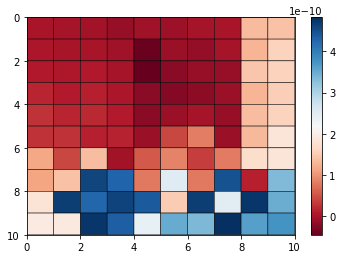

accuracy is 76.000000 lamba is 1.713427
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  1e+01  1e+00
 1:  1.4552e+02 -1.9714e+04  2e+04  2e-02  7e+00  2e+00
 2:  3.5474e+02 -1.5606e+04  2e+04  1e-02  6e+00  3e+00
 3:  4.9735e+02 -7.6698e+03  9e+03  7e-03  3e+00  3e+00
 4:  2.1359e+02 -7.0019e+02  1e+03  7e-04  3e-01  4e-01
 5:  4.4497e+01 -7.8803e+01  1e+02  1e-04  4e-02  6e-02
 6:  9.1984e-01 -8.0643e-01  2e+00  1e-06  6e-04  1e-03
 7:  9.1951e-03 -8.0611e-03  2e-02  1e-08  6e-06  1e-05
 8:  9.1950e-05 -8.0610e-05  2e-04  1e-10  6e-08  1e-07
 9:  9.1950e-07 -8.0610e-07  2e-06  1e-12  6e-10  1e-09
10:  9.1950e-09 -8.0610e-09  2e-08  1e-14  6e-12  1e-11
Optimal solution found.


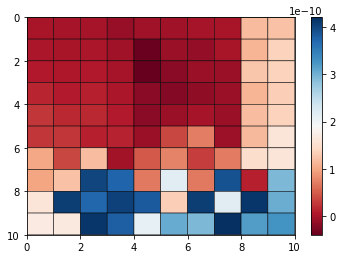

accuracy is 75.000000 lamba is 1.723447
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  1e+01  1e+00
 1:  1.4589e+02 -1.9708e+04  2e+04  2e-02  7e+00  2e+00
 2:  3.5580e+02 -1.5611e+04  2e+04  1e-02  6e+00  3e+00
 3:  4.9945e+02 -7.6863e+03  9e+03  7e-03  3e+00  3e+00
 4:  2.1349e+02 -6.8059e+02  1e+03  7e-04  3e-01  4e-01
 5:  4.2931e+01 -7.3418e+01  1e+02  9e-05  4e-02  6e-02
 6:  8.1405e-01 -7.4784e-01  2e+00  1e-06  6e-04  1e-03
 7:  8.1378e-03 -7.4757e-03  2e-02  1e-08  6e-06  1e-05
 8:  8.1377e-05 -7.4756e-05  2e-04  1e-10  6e-08  1e-07
 9:  8.1377e-07 -7.4756e-07  2e-06  1e-12  6e-10  1e-09
10:  8.1377e-09 -7.4756e-09  2e-08  1e-14  6e-12  1e-11
Optimal solution found.


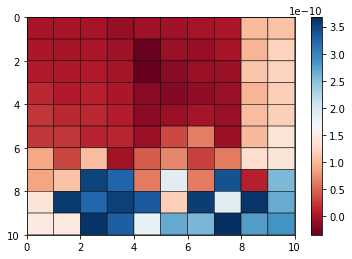

accuracy is 75.000000 lamba is 1.733467
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  1e+01  1e+00
 1:  1.4627e+02 -1.9703e+04  2e+04  2e-02  7e+00  2e+00
 2:  3.5685e+02 -1.5615e+04  2e+04  1e-02  6e+00  3e+00
 3:  5.0154e+02 -7.7025e+03  9e+03  7e-03  3e+00  3e+00
 4:  2.1337e+02 -6.6091e+02  1e+03  7e-04  3e-01  4e-01
 5:  4.1327e+01 -6.8152e+01  1e+02  9e-05  4e-02  5e-02
 6:  7.2133e-01 -6.9123e-01  1e+00  1e-06  5e-04  9e-04
 7:  7.2111e-03 -6.9101e-03  1e-02  1e-08  5e-06  9e-06
 8:  7.2111e-05 -6.9101e-05  1e-04  1e-10  5e-08  9e-08
 9:  7.2111e-07 -6.9101e-07  1e-06  1e-12  5e-10  9e-10
10:  7.2111e-09 -6.9101e-09  1e-08  1e-14  5e-12  9e-12
Optimal solution found.


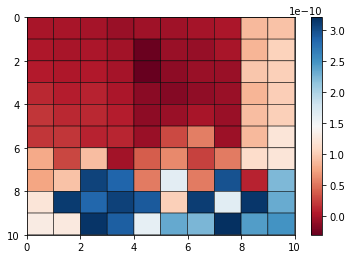

accuracy is 74.000000 lamba is 1.743487
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  1e+01  1e+00
 1:  1.4664e+02 -1.9698e+04  2e+04  2e-02  7e+00  2e+00
 2:  3.5789e+02 -1.5620e+04  2e+04  1e-02  6e+00  3e+00
 3:  5.0362e+02 -7.7185e+03  9e+03  7e-03  3e+00  3e+00
 4:  2.1323e+02 -6.4117e+02  9e+02  7e-04  3e-01  4e-01
 5:  3.9686e+01 -6.3015e+01  1e+02  8e-05  4e-02  5e-02
 6:  6.4038e-01 -6.3665e-01  1e+00  1e-06  5e-04  8e-04
 7:  6.4020e-03 -6.3646e-03  1e-02  1e-08  5e-06  8e-06
 8:  6.4020e-05 -6.3646e-05  1e-04  1e-10  5e-08  8e-08
 9:  6.4020e-07 -6.3646e-07  1e-06  1e-12  5e-10  8e-10
10:  6.4020e-09 -6.3646e-09  1e-08  1e-14  5e-12  8e-12
Optimal solution found.


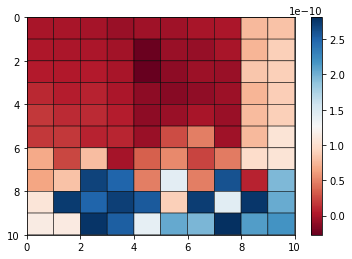

accuracy is 74.000000 lamba is 1.753507
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  1e+01  1e+00
 1:  1.4701e+02 -1.9693e+04  2e+04  2e-02  7e+00  2e+00
 2:  3.5894e+02 -1.5625e+04  2e+04  1e-02  6e+00  3e+00
 3:  5.0569e+02 -7.7342e+03  9e+03  7e-03  3e+00  3e+00
 4:  2.1309e+02 -6.2173e+02  9e+02  7e-04  3e-01  4e-01
 5:  3.8037e+01 -5.8088e+01  1e+02  8e-05  3e-02  5e-02
 6:  5.7077e-01 -5.8484e-01  1e+00  9e-07  4e-04  7e-04
 7:  5.7063e-03 -5.8468e-03  1e-02  9e-09  4e-06  7e-06
 8:  5.7063e-05 -5.8468e-05  1e-04  9e-11  4e-08  7e-08
 9:  5.7063e-07 -5.8468e-07  1e-06  9e-13  4e-10  7e-10
10:  5.7063e-09 -5.8468e-09  1e-08  9e-15  4e-12  7e-12
Optimal solution found.


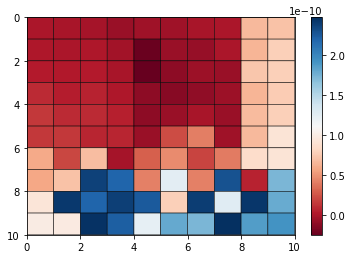

accuracy is 74.000000 lamba is 1.763527
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  1e+01  1e+00
 1:  1.4738e+02 -1.9687e+04  2e+04  2e-02  7e+00  2e+00
 2:  3.5997e+02 -1.5630e+04  2e+04  1e-02  6e+00  3e+00
 3:  5.0776e+02 -7.7498e+03  9e+03  7e-03  3e+00  3e+00
 4:  2.1341e+02 -6.1387e+02  9e+02  7e-04  3e-01  4e-01
 5:  3.7108e+01 -5.5445e+01  1e+02  7e-05  3e-02  5e-02
 6:  5.3394e-01 -5.5712e-01  1e+00  9e-07  4e-04  6e-04
 7:  5.3382e-03 -5.5699e-03  1e-02  9e-09  4e-06  6e-06
 8:  5.3382e-05 -5.5699e-05  1e-04  9e-11  4e-08  6e-08
 9:  5.3382e-07 -5.5699e-07  1e-06  9e-13  4e-10  6e-10
10:  5.3382e-09 -5.5699e-09  1e-08  9e-15  4e-12  6e-12
Optimal solution found.


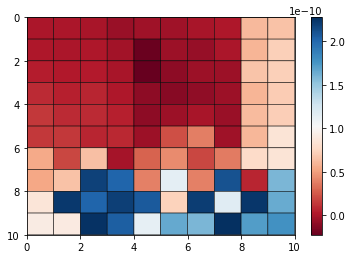

accuracy is 74.000000 lamba is 1.773547
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  1e+01  1e+00
 1:  1.4775e+02 -1.9682e+04  2e+04  2e-02  7e+00  2e+00
 2:  3.6100e+02 -1.5634e+04  2e+04  1e-02  6e+00  3e+00
 3:  5.0981e+02 -7.7650e+03  1e+04  7e-03  3e+00  3e+00
 4:  2.1371e+02 -6.0595e+02  9e+02  7e-04  3e-01  4e-01
 5:  3.6168e+01 -5.2838e+01  9e+01  7e-05  3e-02  5e-02
 6:  5.0023e-01 -5.2998e-01  1e+00  8e-07  4e-04  6e-04
 7:  5.0013e-03 -5.2986e-03  1e-02  8e-09  4e-06  6e-06
 8:  5.0012e-05 -5.2985e-05  1e-04  8e-11  4e-08  6e-08
 9:  5.0012e-07 -5.2985e-07  1e-06  8e-13  4e-10  6e-10
10:  5.0012e-09 -5.2985e-09  1e-08  8e-15  4e-12  6e-12
Optimal solution found.


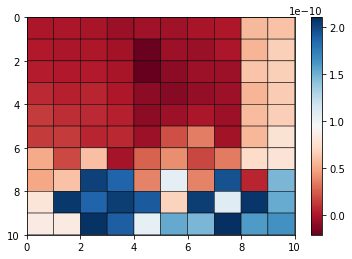

accuracy is 74.000000 lamba is 1.783567
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  1e+01  1e+00
 1:  1.4812e+02 -1.9677e+04  2e+04  2e-02  7e+00  2e+00
 2:  3.6203e+02 -1.5639e+04  2e+04  1e-02  6e+00  3e+00
 3:  5.1185e+02 -7.7801e+03  1e+04  7e-03  3e+00  3e+00
 4:  2.1400e+02 -5.9797e+02  9e+02  6e-04  3e-01  3e-01
 5:  3.5219e+01 -5.0271e+01  9e+01  7e-05  3e-02  4e-02
 6:  4.6938e-01 -5.0339e-01  1e+00  8e-07  3e-04  5e-04
 7:  4.6928e-03 -5.0329e-03  1e-02  8e-09  3e-06  5e-06
 8:  4.6928e-05 -5.0329e-05  1e-04  8e-11  3e-08  5e-08
 9:  4.6928e-07 -5.0329e-07  1e-06  8e-13  3e-10  5e-10
10:  4.6928e-09 -5.0329e-09  1e-08  8e-15  4e-12  5e-12
Optimal solution found.


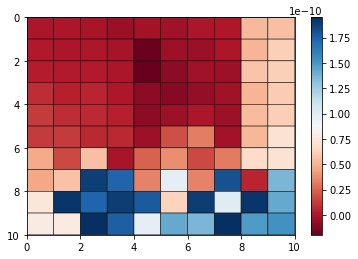

accuracy is 74.000000 lamba is 1.793587
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  1e+01  1e+00
 1:  1.4848e+02 -1.9671e+04  2e+04  2e-02  7e+00  2e+00
 2:  3.6305e+02 -1.5644e+04  2e+04  1e-02  6e+00  3e+00
 3:  5.1389e+02 -7.7949e+03  1e+04  7e-03  3e+00  3e+00
 4:  2.1427e+02 -5.8993e+02  9e+02  6e-04  3e-01  3e-01
 5:  3.4262e+01 -4.7745e+01  8e+01  7e-05  3e-02  4e-02
 6:  4.4111e-01 -4.7738e-01  9e-01  7e-07  3e-04  5e-04
 7:  4.4103e-03 -4.7729e-03  9e-03  7e-09  3e-06  5e-06
 8:  4.4103e-05 -4.7729e-05  9e-05  7e-11  3e-08  5e-08
 9:  4.4103e-07 -4.7729e-07  9e-07  7e-13  3e-10  5e-10
10:  4.4103e-09 -4.7729e-09  9e-09  7e-15  4e-12  5e-12
Optimal solution found.


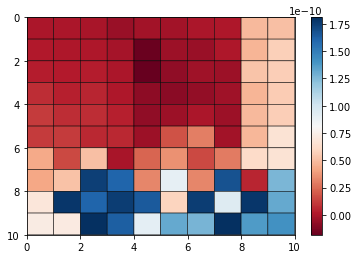

accuracy is 74.000000 lamba is 1.803607
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  1e+01  1e+00
 1:  1.4885e+02 -1.9666e+04  2e+04  2e-02  7e+00  2e+00
 2:  3.6407e+02 -1.5648e+04  2e+04  1e-02  6e+00  3e+00
 3:  5.1592e+02 -7.8095e+03  1e+04  7e-03  3e+00  3e+00
 4:  2.1489e+02 -5.9041e+02  9e+02  6e-04  3e-01  3e-01
 5:  3.3856e+01 -4.6716e+01  8e+01  6e-05  3e-02  4e-02
 6:  4.2831e-01 -4.6674e-01  9e-01  7e-07  3e-04  5e-04
 7:  4.2823e-03 -4.6665e-03  9e-03  7e-09  3e-06  5e-06
 8:  4.2823e-05 -4.6665e-05  9e-05  7e-11  3e-08  5e-08
 9:  4.2823e-07 -4.6665e-07  9e-07  7e-13  3e-10  5e-10
10:  4.2823e-09 -4.6665e-09  9e-09  7e-15  3e-12  5e-12
Optimal solution found.


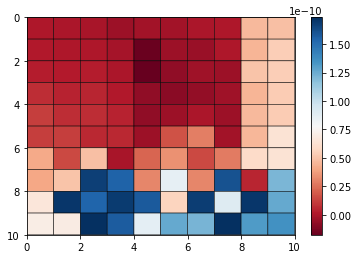

accuracy is 74.000000 lamba is 1.813627
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  1e+01  1e+00
 1:  1.4921e+02 -1.9660e+04  2e+04  2e-02  7e+00  2e+00
 2:  3.6508e+02 -1.5653e+04  2e+04  1e-02  5e+00  3e+00
 3:  5.1794e+02 -7.8239e+03  1e+04  7e-03  3e+00  3e+00
 4:  2.1563e+02 -5.9415e+02  9e+02  6e-04  3e-01  3e-01
 5:  3.3662e+01 -4.6239e+01  8e+01  6e-05  3e-02  4e-02
 6:  4.2101e-01 -4.6175e-01  9e-01  7e-07  3e-04  5e-04
 7:  4.2094e-03 -4.6166e-03  9e-03  7e-09  3e-06  5e-06
 8:  4.2094e-05 -4.6166e-05  9e-05  7e-11  3e-08  5e-08
 9:  4.2094e-07 -4.6166e-07  9e-07  7e-13  3e-10  5e-10
10:  4.2094e-09 -4.6166e-09  9e-09  7e-15  3e-12  5e-12
Optimal solution found.


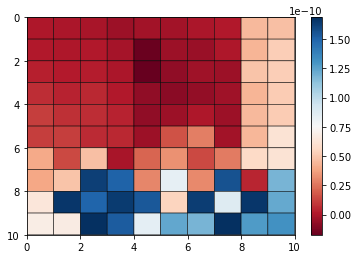

accuracy is 74.000000 lamba is 1.823647
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  1e+01  1e+00
 1:  1.4957e+02 -1.9655e+04  2e+04  2e-02  7e+00  2e+00
 2:  3.6608e+02 -1.5657e+04  2e+04  1e-02  5e+00  3e+00
 3:  5.1995e+02 -7.8380e+03  1e+04  7e-03  3e+00  3e+00
 4:  2.1636e+02 -5.9786e+02  9e+02  7e-04  3e-01  3e-01
 5:  3.3463e+01 -4.5743e+01  8e+01  6e-05  3e-02  4e-02
 6:  4.1388e-01 -4.5659e-01  9e-01  7e-07  3e-04  5e-04
 7:  4.1381e-03 -4.5651e-03  9e-03  7e-09  3e-06  5e-06
 8:  4.1381e-05 -4.5650e-05  9e-05  7e-11  3e-08  5e-08
 9:  4.1381e-07 -4.5650e-07  9e-07  7e-13  3e-10  5e-10
10:  4.1381e-09 -4.5650e-09  9e-09  7e-15  4e-12  5e-12
Optimal solution found.


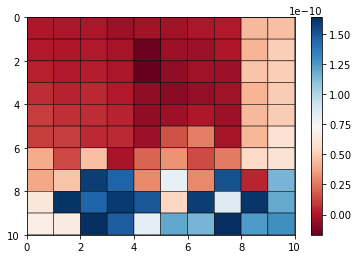

accuracy is 74.000000 lamba is 1.833667
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  1e+01  1e+00
 1:  1.4993e+02 -1.9649e+04  2e+04  2e-02  7e+00  2e+00
 2:  3.6709e+02 -1.5662e+04  2e+04  1e-02  5e+00  3e+00
 3:  5.2195e+02 -7.8520e+03  1e+04  7e-03  3e+00  3e+00
 4:  2.1708e+02 -6.0154e+02  9e+02  7e-04  3e-01  3e-01
 5:  3.3259e+01 -4.5230e+01  8e+01  6e-05  3e-02  4e-02
 6:  4.0692e-01 -4.5126e-01  9e-01  7e-07  3e-04  5e-04
 7:  4.0685e-03 -4.5118e-03  9e-03  7e-09  3e-06  5e-06
 8:  4.0685e-05 -4.5118e-05  9e-05  7e-11  3e-08  5e-08
 9:  4.0685e-07 -4.5118e-07  9e-07  7e-13  3e-10  5e-10
10:  4.0685e-09 -4.5118e-09  9e-09  7e-15  3e-12  5e-12
Optimal solution found.


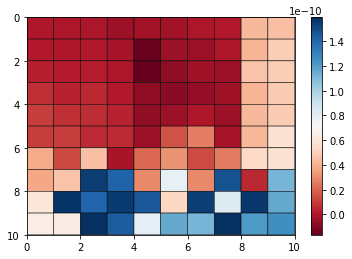

accuracy is 74.000000 lamba is 1.843687
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  9e+00  1e+00
 1:  1.5029e+02 -1.9644e+04  2e+04  2e-02  7e+00  2e+00
 2:  3.6808e+02 -1.5666e+04  2e+04  1e-02  5e+00  3e+00
 3:  5.2395e+02 -7.8657e+03  1e+04  7e-03  3e+00  3e+00
 4:  2.1779e+02 -6.0518e+02  9e+02  7e-04  3e-01  3e-01
 5:  3.3051e+01 -4.4699e+01  8e+01  6e-05  3e-02  4e-02
 6:  4.0011e-01 -4.4577e-01  9e-01  7e-07  3e-04  5e-04
 7:  4.0005e-03 -4.4569e-03  9e-03  7e-09  3e-06  5e-06
 8:  4.0005e-05 -4.4569e-05  9e-05  7e-11  3e-08  5e-08
 9:  4.0005e-07 -4.4569e-07  9e-07  7e-13  3e-10  5e-10
10:  4.0005e-09 -4.4569e-09  9e-09  7e-15  3e-12  5e-12
Optimal solution found.


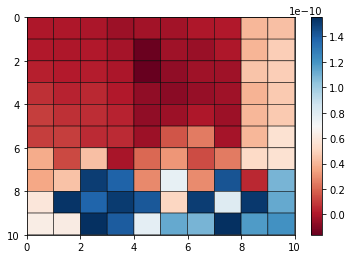

accuracy is 74.000000 lamba is 1.853707
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  9e+00  1e+00
 1:  1.5064e+02 -1.9639e+04  2e+04  2e-02  7e+00  2e+00
 2:  3.6908e+02 -1.5670e+04  2e+04  1e-02  5e+00  3e+00
 3:  5.2593e+02 -7.8792e+03  1e+04  7e-03  3e+00  3e+00
 4:  2.1849e+02 -6.0879e+02  9e+02  7e-04  3e-01  3e-01
 5:  3.2837e+01 -4.4150e+01  8e+01  6e-05  3e-02  4e-02
 6:  3.9346e-01 -4.4012e-01  8e-01  7e-07  3e-04  5e-04
 7:  3.9340e-03 -4.4004e-03  8e-03  7e-09  3e-06  5e-06
 8:  3.9340e-05 -4.4004e-05  8e-05  7e-11  3e-08  5e-08
 9:  3.9340e-07 -4.4004e-07  8e-07  7e-13  3e-10  5e-10
10:  3.9340e-09 -4.4004e-09  8e-09  7e-15  3e-12  5e-12
Optimal solution found.


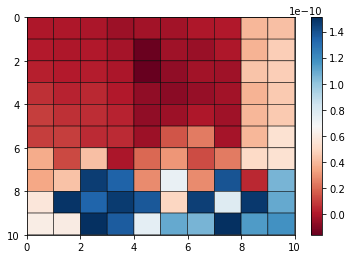

accuracy is 74.000000 lamba is 1.863727
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  9e+00  1e+00
 1:  1.5100e+02 -1.9633e+04  2e+04  2e-02  7e+00  2e+00
 2:  3.7007e+02 -1.5675e+04  2e+04  1e-02  5e+00  3e+00
 3:  5.2791e+02 -7.8925e+03  1e+04  7e-03  3e+00  3e+00
 4:  2.1917e+02 -6.1237e+02  9e+02  7e-04  3e-01  3e-01
 5:  3.2619e+01 -4.3584e+01  8e+01  6e-05  3e-02  4e-02
 6:  3.8696e-01 -4.3430e-01  8e-01  7e-07  3e-04  4e-04
 7:  3.8690e-03 -4.3423e-03  8e-03  7e-09  3e-06  4e-06
 8:  3.8690e-05 -4.3423e-05  8e-05  7e-11  3e-08  4e-08
 9:  3.8690e-07 -4.3423e-07  8e-07  7e-13  3e-10  4e-10
10:  3.8690e-09 -4.3423e-09  8e-09  7e-15  3e-12  4e-12
Optimal solution found.


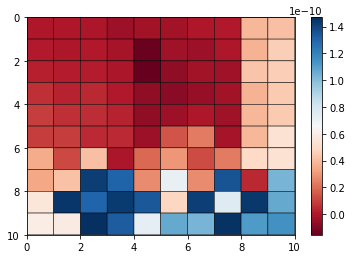

accuracy is 74.000000 lamba is 1.873747
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  9e+00  1e+00
 1:  1.5135e+02 -1.9628e+04  2e+04  2e-02  7e+00  2e+00
 2:  3.7105e+02 -1.5679e+04  2e+04  1e-02  5e+00  3e+00
 3:  5.2988e+02 -7.9055e+03  1e+04  7e-03  3e+00  3e+00
 4:  2.1985e+02 -6.1591e+02  9e+02  7e-04  3e-01  3e-01
 5:  3.2396e+01 -4.3000e+01  8e+01  6e-05  3e-02  4e-02
 6:  3.8061e-01 -4.2832e-01  8e-01  6e-07  3e-04  4e-04
 7:  3.8055e-03 -4.2825e-03  8e-03  6e-09  3e-06  4e-06
 8:  3.8055e-05 -4.2825e-05  8e-05  6e-11  3e-08  4e-08
 9:  3.8055e-07 -4.2825e-07  8e-07  6e-13  3e-10  4e-10
10:  3.8055e-09 -4.2825e-09  8e-09  7e-15  3e-12  4e-12
Optimal solution found.


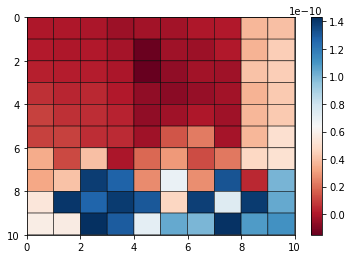

accuracy is 74.000000 lamba is 1.883768
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  9e+00  1e+00
 1:  1.5170e+02 -1.9622e+04  2e+04  2e-02  7e+00  2e+00
 2:  3.7203e+02 -1.5683e+04  2e+04  1e-02  5e+00  3e+00
 3:  5.3185e+02 -7.9184e+03  1e+04  7e-03  3e+00  3e+00
 4:  2.2052e+02 -6.1941e+02  9e+02  7e-04  3e-01  3e-01
 5:  3.2168e+01 -4.2398e+01  8e+01  6e-05  2e-02  4e-02
 6:  3.7440e-01 -4.2217e-01  8e-01  6e-07  3e-04  4e-04
 7:  3.7434e-03 -4.2211e-03  8e-03  6e-09  3e-06  4e-06
 8:  3.7434e-05 -4.2211e-05  8e-05  6e-11  3e-08  4e-08
 9:  3.7434e-07 -4.2211e-07  8e-07  6e-13  3e-10  4e-10
10:  3.7434e-09 -4.2211e-09  8e-09  6e-15  3e-12  4e-12
Optimal solution found.


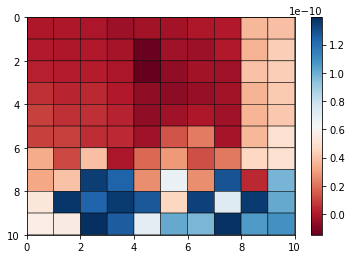

accuracy is 74.000000 lamba is 1.893788
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  9e+00  1e+00
 1:  1.5205e+02 -1.9616e+04  2e+04  2e-02  7e+00  2e+00
 2:  3.7300e+02 -1.5687e+04  2e+04  1e-02  5e+00  3e+00
 3:  5.3380e+02 -7.9311e+03  1e+04  7e-03  3e+00  3e+00
 4:  2.2117e+02 -6.2288e+02  9e+02  7e-04  3e-01  3e-01
 5:  3.1935e+01 -4.1779e+01  8e+01  6e-05  2e-02  4e-02
 6:  3.6832e-01 -4.1587e-01  8e-01  6e-07  3e-04  4e-04
 7:  3.6827e-03 -4.1580e-03  8e-03  6e-09  3e-06  4e-06
 8:  3.6827e-05 -4.1580e-05  8e-05  6e-11  3e-08  4e-08
 9:  3.6827e-07 -4.1580e-07  8e-07  6e-13  3e-10  4e-10
10:  3.6827e-09 -4.1580e-09  8e-09  6e-15  3e-12  4e-12
Optimal solution found.


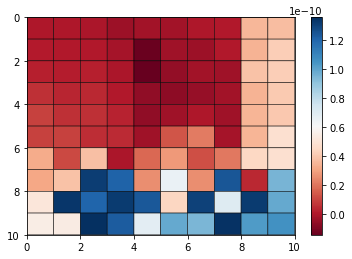

accuracy is 72.000000 lamba is 1.903808
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  9e+00  1e+00
 1:  1.5240e+02 -1.9611e+04  2e+04  2e-02  7e+00  2e+00
 2:  3.7397e+02 -1.5691e+04  2e+04  1e-02  5e+00  3e+00
 3:  5.3575e+02 -7.9435e+03  1e+04  7e-03  3e+00  3e+00
 4:  2.2182e+02 -6.2631e+02  9e+02  7e-04  3e-01  3e-01
 5:  3.1698e+01 -4.1142e+01  8e+01  6e-05  2e-02  4e-02
 6:  3.6238e-01 -4.0940e-01  8e-01  6e-07  3e-04  4e-04
 7:  3.6233e-03 -4.0934e-03  8e-03  6e-09  3e-06  4e-06
 8:  3.6233e-05 -4.0933e-05  8e-05  6e-11  3e-08  4e-08
 9:  3.6233e-07 -4.0933e-07  8e-07  6e-13  3e-10  4e-10
10:  3.6233e-09 -4.0933e-09  8e-09  6e-15  3e-12  4e-12
Optimal solution found.


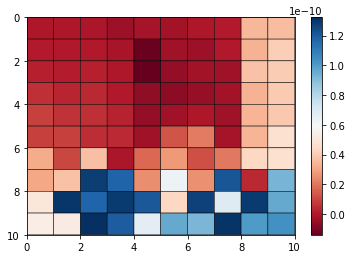

accuracy is 72.000000 lamba is 1.913828
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  9e+00  1e+00
 1:  1.5274e+02 -1.9605e+04  2e+04  2e-02  7e+00  2e+00
 2:  3.7494e+02 -1.5696e+04  2e+04  1e-02  5e+00  3e+00
 3:  5.3769e+02 -7.9558e+03  1e+04  7e-03  3e+00  3e+00
 4:  2.2246e+02 -6.2970e+02  9e+02  7e-04  3e-01  3e-01
 5:  3.1456e+01 -4.0489e+01  7e+01  6e-05  2e-02  4e-02
 6:  3.5657e-01 -4.0277e-01  8e-01  6e-07  2e-04  4e-04
 7:  3.5652e-03 -4.0271e-03  8e-03  6e-09  2e-06  4e-06
 8:  3.5652e-05 -4.0271e-05  8e-05  6e-11  2e-08  4e-08
 9:  3.5652e-07 -4.0271e-07  8e-07  6e-13  3e-10  4e-10
10:  3.5652e-09 -4.0271e-09  8e-09  6e-15  3e-12  4e-12
Optimal solution found.


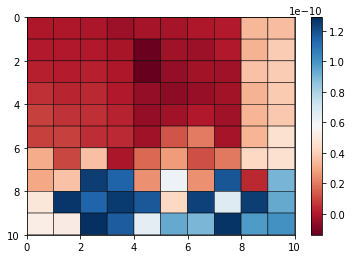

accuracy is 72.000000 lamba is 1.923848
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  9e+00  1e+00
 1:  1.5309e+02 -1.9600e+04  2e+04  2e-02  6e+00  2e+00
 2:  3.7590e+02 -1.5700e+04  2e+04  1e-02  5e+00  3e+00
 3:  5.3962e+02 -7.9679e+03  1e+04  7e-03  3e+00  3e+00
 4:  2.2308e+02 -6.3306e+02  9e+02  7e-04  3e-01  3e-01
 5:  3.1209e+01 -3.9818e+01  7e+01  6e-05  2e-02  4e-02
 6:  3.5088e-01 -3.9597e-01  8e-01  6e-07  2e-04  4e-04
 7:  3.5083e-03 -3.9592e-03  8e-03  6e-09  2e-06  4e-06
 8:  3.5083e-05 -3.9592e-05  8e-05  6e-11  2e-08  4e-08
 9:  3.5083e-07 -3.9592e-07  8e-07  6e-13  2e-10  4e-10
10:  3.5083e-09 -3.9592e-09  8e-09  6e-15  2e-12  4e-12
Optimal solution found.


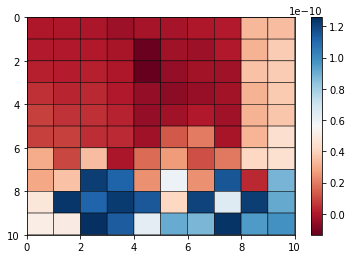

accuracy is 72.000000 lamba is 1.933868
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  9e+00  1e+00
 1:  1.5343e+02 -1.9594e+04  2e+04  2e-02  6e+00  2e+00
 2:  3.7686e+02 -1.5704e+04  2e+04  1e-02  5e+00  3e+00
 3:  5.4155e+02 -7.9797e+03  1e+04  7e-03  3e+00  3e+00
 4:  2.2370e+02 -6.3637e+02  9e+02  7e-04  3e-01  3e-01
 5:  3.0958e+01 -3.9129e+01  7e+01  6e-05  2e-02  4e-02
 6:  3.4531e-01 -3.8902e-01  7e-01  6e-07  2e-04  4e-04
 7:  3.4526e-03 -3.8896e-03  7e-03  6e-09  2e-06  4e-06
 8:  3.4526e-05 -3.8896e-05  7e-05  6e-11  2e-08  4e-08
 9:  3.4526e-07 -3.8896e-07  7e-07  6e-13  2e-10  4e-10
10:  3.4526e-09 -3.8896e-09  7e-09  6e-15  2e-12  4e-12
Optimal solution found.


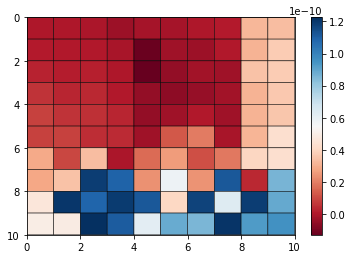

accuracy is 72.000000 lamba is 1.943888
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  9e+00  1e+00
 1:  1.5377e+02 -1.9588e+04  2e+04  2e-02  6e+00  2e+00
 2:  3.7781e+02 -1.5708e+04  2e+04  1e-02  5e+00  3e+00
 3:  5.4346e+02 -7.9914e+03  1e+04  7e-03  3e+00  3e+00
 4:  2.2431e+02 -6.3965e+02  9e+02  7e-04  3e-01  3e-01
 5:  3.0701e+01 -3.8424e+01  7e+01  6e-05  2e-02  4e-02
 6:  3.3985e-01 -3.8190e-01  7e-01  6e-07  2e-04  4e-04
 7:  3.3981e-03 -3.8185e-03  7e-03  6e-09  2e-06  4e-06
 8:  3.3981e-05 -3.8185e-05  7e-05  6e-11  2e-08  4e-08
 9:  3.3981e-07 -3.8185e-07  7e-07  6e-13  2e-10  4e-10
10:  3.3981e-09 -3.8185e-09  7e-09  6e-15  3e-12  4e-12
Optimal solution found.


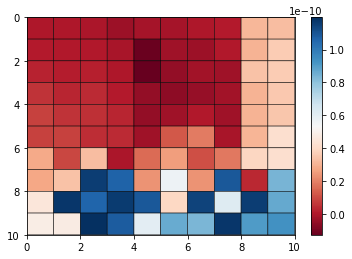

accuracy is 72.000000 lamba is 1.953908
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  9e+00  1e+00
 1:  1.5411e+02 -1.9583e+04  2e+04  2e-02  6e+00  2e+00
 2:  3.7876e+02 -1.5712e+04  2e+04  1e-02  5e+00  3e+00
 3:  5.4537e+02 -8.0029e+03  1e+04  7e-03  3e+00  3e+00
 4:  2.2491e+02 -6.4289e+02  9e+02  7e-04  3e-01  3e-01
 5:  3.0440e+01 -3.7701e+01  7e+01  5e-05  2e-02  4e-02
 6:  3.3450e-01 -3.7463e-01  7e-01  6e-07  2e-04  4e-04
 7:  3.3446e-03 -3.7458e-03  7e-03  6e-09  2e-06  4e-06
 8:  3.3446e-05 -3.7458e-05  7e-05  6e-11  2e-08  4e-08
 9:  3.3446e-07 -3.7458e-07  7e-07  6e-13  2e-10  4e-10
10:  3.3446e-09 -3.7458e-09  7e-09  6e-15  2e-12  4e-12
Optimal solution found.


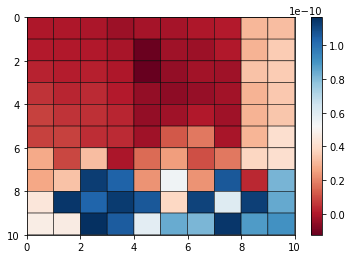

accuracy is 72.000000 lamba is 1.963928
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  9e+00  1e+00
 1:  1.5445e+02 -1.9577e+04  2e+04  2e-02  6e+00  2e+00
 2:  3.7970e+02 -1.5715e+04  2e+04  1e-02  5e+00  3e+00
 3:  5.4727e+02 -8.0142e+03  1e+04  7e-03  3e+00  3e+00
 4:  2.2550e+02 -6.4608e+02  1e+03  7e-04  3e-01  3e-01
 5:  3.0175e+01 -3.6962e+01  7e+01  5e-05  2e-02  3e-02
 6:  3.2926e-01 -3.6719e-01  7e-01  6e-07  2e-04  4e-04
 7:  3.2922e-03 -3.6714e-03  7e-03  6e-09  2e-06  4e-06
 8:  3.2922e-05 -3.6714e-05  7e-05  6e-11  2e-08  4e-08
 9:  3.2922e-07 -3.6714e-07  7e-07  6e-13  2e-10  4e-10
10:  3.2922e-09 -3.6714e-09  7e-09  6e-15  2e-12  4e-12
Optimal solution found.


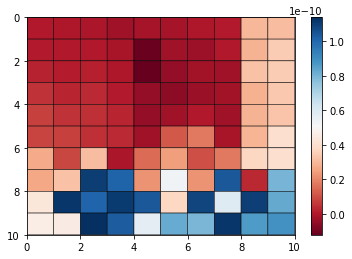

accuracy is 72.000000 lamba is 1.973948
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  9e+00  1e+00
 1:  1.5479e+02 -1.9572e+04  2e+04  2e-02  6e+00  2e+00
 2:  3.8064e+02 -1.5719e+04  2e+04  1e-02  5e+00  3e+00
 3:  5.4917e+02 -8.0253e+03  1e+04  7e-03  3e+00  3e+00
 4:  2.2608e+02 -6.4924e+02  1e+03  7e-04  3e-01  3e-01
 5:  2.9904e+01 -3.6205e+01  7e+01  5e-05  2e-02  3e-02
 6:  3.2411e-01 -3.5959e-01  7e-01  5e-07  2e-04  4e-04
 7:  3.2407e-03 -3.5954e-03  7e-03  5e-09  2e-06  4e-06
 8:  3.2407e-05 -3.5954e-05  7e-05  5e-11  2e-08  4e-08
 9:  3.2407e-07 -3.5954e-07  7e-07  5e-13  2e-10  4e-10
10:  3.2407e-09 -3.5954e-09  7e-09  6e-15  2e-12  4e-12
Optimal solution found.


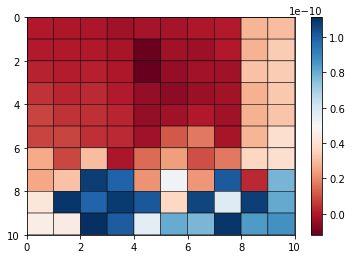

accuracy is 72.000000 lamba is 1.983968
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  9e+00  1e+00
 1:  1.5513e+02 -1.9566e+04  2e+04  2e-02  6e+00  2e+00
 2:  3.8157e+02 -1.5723e+04  2e+04  1e-02  5e+00  3e+00
 3:  5.5106e+02 -8.0362e+03  1e+04  7e-03  3e+00  3e+00
 4:  2.2665e+02 -6.5235e+02  1e+03  7e-04  3e-01  3e-01
 5:  2.9629e+01 -3.5431e+01  7e+01  5e-05  2e-02  3e-02
 6:  3.1908e-01 -3.5185e-01  7e-01  5e-07  2e-04  4e-04
 7:  3.1905e-03 -3.5181e-03  7e-03  5e-09  2e-06  4e-06
 8:  3.1904e-05 -3.5181e-05  7e-05  5e-11  2e-08  4e-08
 9:  3.1904e-07 -3.5181e-07  7e-07  5e-13  2e-10  4e-10
10:  3.1904e-09 -3.5181e-09  7e-09  6e-15  2e-12  4e-12
Optimal solution found.


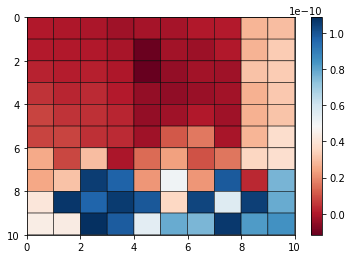

accuracy is 72.000000 lamba is 1.993988
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  9e+00  1e+00
 1:  1.5546e+02 -1.9560e+04  2e+04  2e-02  6e+00  2e+00
 2:  3.8250e+02 -1.5727e+04  2e+04  1e-02  5e+00  3e+00
 3:  5.5294e+02 -8.0470e+03  1e+04  7e-03  3e+00  3e+00
 4:  2.2721e+02 -6.5542e+02  1e+03  7e-04  3e-01  3e-01
 5:  2.9349e+01 -3.4641e+01  7e+01  5e-05  2e-02  3e-02
 6:  3.1419e-01 -3.4401e-01  7e-01  5e-07  2e-04  3e-04
 7:  3.1415e-03 -3.4397e-03  7e-03  5e-09  2e-06  3e-06
 8:  3.1415e-05 -3.4397e-05  7e-05  5e-11  2e-08  3e-08
 9:  3.1415e-07 -3.4397e-07  7e-07  5e-13  2e-10  3e-10
10:  3.1415e-09 -3.4397e-09  7e-09  5e-15  2e-12  3e-12
Optimal solution found.


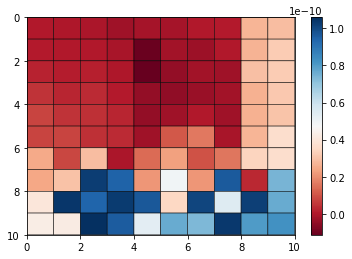

accuracy is 72.000000 lamba is 2.004008
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  9e+00  1e+00
 1:  1.5580e+02 -1.9554e+04  2e+04  2e-02  6e+00  2e+00
 2:  3.8343e+02 -1.5731e+04  2e+04  1e-02  5e+00  3e+00
 3:  5.5481e+02 -8.0575e+03  1e+04  7e-03  3e+00  3e+00
 4:  2.2777e+02 -6.5845e+02  1e+03  7e-04  3e-01  3e-01
 5:  2.9064e+01 -3.3833e+01  6e+01  5e-05  2e-02  3e-02
 6:  3.0937e-01 -3.3599e-01  7e-01  5e-07  2e-04  3e-04
 7:  3.0933e-03 -3.3595e-03  7e-03  5e-09  2e-06  3e-06
 8:  3.0933e-05 -3.3595e-05  7e-05  5e-11  2e-08  3e-08
 9:  3.0933e-07 -3.3595e-07  7e-07  5e-13  2e-10  3e-10
10:  3.0933e-09 -3.3595e-09  7e-09  5e-15  2e-12  3e-12
Optimal solution found.


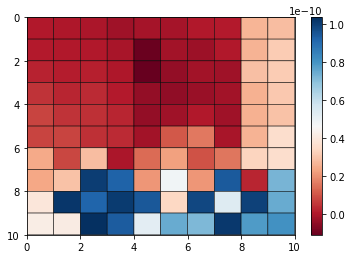

accuracy is 72.000000 lamba is 2.014028
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  9e+00  1e+00
 1:  1.5613e+02 -1.9549e+04  2e+04  2e-02  6e+00  2e+00
 2:  3.8435e+02 -1.5734e+04  2e+04  1e-02  5e+00  3e+00
 3:  5.5668e+02 -8.0679e+03  1e+04  7e-03  3e+00  3e+00
 4:  2.2831e+02 -6.6144e+02  1e+03  7e-04  3e-01  3e-01
 5:  2.8774e+01 -3.3009e+01  6e+01  5e-05  2e-02  3e-02
 6:  3.0463e-01 -3.2782e-01  6e-01  5e-07  2e-04  3e-04
 7:  3.0459e-03 -3.2778e-03  6e-03  5e-09  2e-06  3e-06
 8:  3.0459e-05 -3.2778e-05  6e-05  5e-11  2e-08  3e-08
 9:  3.0459e-07 -3.2778e-07  6e-07  5e-13  2e-10  3e-10
10:  3.0459e-09 -3.2778e-09  6e-09  5e-15  2e-12  3e-12
Optimal solution found.


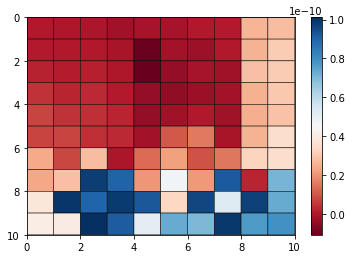

accuracy is 72.000000 lamba is 2.024048
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  9e+00  1e+00
 1:  1.5646e+02 -1.9543e+04  2e+04  2e-02  6e+00  2e+00
 2:  3.8527e+02 -1.5738e+04  2e+04  1e-02  5e+00  3e+00
 3:  5.5854e+02 -8.0781e+03  1e+04  7e-03  3e+00  3e+00
 4:  2.2885e+02 -6.6439e+02  1e+03  7e-04  3e-01  3e-01
 5:  2.8479e+01 -3.2168e+01  6e+01  5e-05  2e-02  3e-02
 6:  2.9995e-01 -3.1947e-01  6e-01  5e-07  2e-04  3e-04
 7:  2.9992e-03 -3.1943e-03  6e-03  5e-09  2e-06  3e-06
 8:  2.9992e-05 -3.1943e-05  6e-05  5e-11  2e-08  3e-08
 9:  2.9992e-07 -3.1943e-07  6e-07  5e-13  2e-10  3e-10
10:  2.9992e-09 -3.1943e-09  6e-09  5e-15  2e-12  3e-12
Optimal solution found.


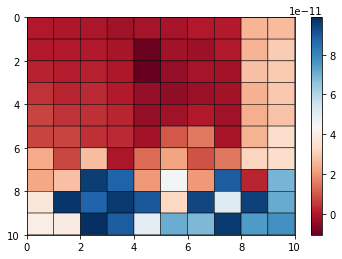

accuracy is 72.000000 lamba is 2.034068
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  9e+00  1e+00
 1:  1.5679e+02 -1.9537e+04  2e+04  2e-02  6e+00  2e+00
 2:  3.8618e+02 -1.5742e+04  2e+04  1e-02  5e+00  3e+00
 3:  5.6039e+02 -8.0881e+03  1e+04  7e-03  3e+00  3e+00
 4:  2.2937e+02 -6.6729e+02  1e+03  7e-04  3e-01  3e-01
 5:  2.8180e+01 -3.1310e+01  6e+01  5e-05  2e-02  3e-02
 6:  2.9535e-01 -3.1096e-01  6e-01  5e-07  2e-04  3e-04
 7:  2.9532e-03 -3.1093e-03  6e-03  5e-09  2e-06  3e-06
 8:  2.9532e-05 -3.1093e-05  6e-05  5e-11  2e-08  3e-08
 9:  2.9532e-07 -3.1093e-07  6e-07  5e-13  2e-10  3e-10
10:  2.9532e-09 -3.1093e-09  6e-09  5e-15  2e-12  3e-12
Optimal solution found.


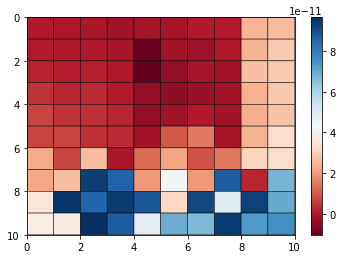

accuracy is 72.000000 lamba is 2.044088
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  9e+00  1e+00
 1:  1.5712e+02 -1.9531e+04  2e+04  2e-02  6e+00  2e+00
 2:  3.8709e+02 -1.5745e+04  2e+04  1e-02  5e+00  3e+00
 3:  5.6224e+02 -8.0980e+03  1e+04  7e-03  3e+00  3e+00
 4:  2.2989e+02 -6.7015e+02  1e+03  7e-04  3e-01  3e-01
 5:  2.7875e+01 -3.0435e+01  6e+01  5e-05  2e-02  3e-02
 6:  2.9081e-01 -3.0229e-01  6e-01  5e-07  2e-04  3e-04
 7:  2.9078e-03 -3.0225e-03  6e-03  5e-09  2e-06  3e-06
 8:  2.9078e-05 -3.0225e-05  6e-05  5e-11  2e-08  3e-08
 9:  2.9078e-07 -3.0225e-07  6e-07  5e-13  2e-10  3e-10
10:  2.9078e-09 -3.0225e-09  6e-09  5e-15  2e-12  3e-12
Optimal solution found.


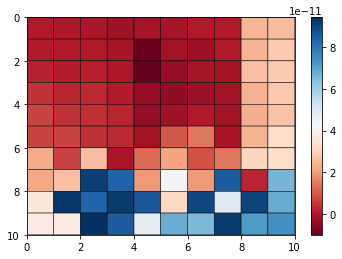

accuracy is 72.000000 lamba is 2.054108
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  9e+00  1e+00
 1:  1.5744e+02 -1.9526e+04  2e+04  2e-02  6e+00  2e+00
 2:  3.8800e+02 -1.5749e+04  2e+04  1e-02  5e+00  3e+00
 3:  5.6407e+02 -8.1076e+03  1e+04  7e-03  3e+00  3e+00
 4:  2.3041e+02 -6.7296e+02  1e+03  7e-04  3e-01  3e-01
 5:  2.7566e+01 -2.9544e+01  6e+01  5e-05  2e-02  3e-02
 6:  2.8633e-01 -2.9345e-01  6e-01  5e-07  2e-04  3e-04
 7:  2.8629e-03 -2.9341e-03  6e-03  5e-09  2e-06  3e-06
 8:  2.8629e-05 -2.9341e-05  6e-05  5e-11  2e-08  3e-08
 9:  2.8629e-07 -2.9341e-07  6e-07  5e-13  2e-10  3e-10
10:  2.8629e-09 -2.9341e-09  6e-09  5e-15  2e-12  3e-12
Optimal solution found.


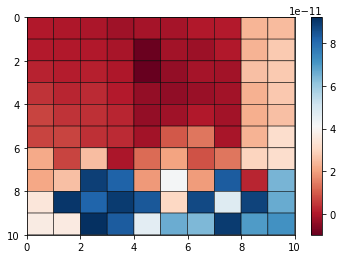

accuracy is 72.000000 lamba is 2.064128
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  9e+00  1e+00
 1:  1.5777e+02 -1.9520e+04  2e+04  2e-02  6e+00  2e+00
 2:  3.8890e+02 -1.5752e+04  2e+04  1e-02  5e+00  3e+00
 3:  5.6591e+02 -8.1171e+03  1e+04  7e-03  3e+00  3e+00
 4:  2.3091e+02 -6.7573e+02  1e+03  7e-04  3e-01  3e-01
 5:  2.7252e+01 -2.8637e+01  6e+01  4e-05  2e-02  3e-02
 6:  2.8217e-01 -2.8473e-01  6e-01  5e-07  2e-04  3e-04
 7:  2.8214e-03 -2.8470e-03  6e-03  5e-09  2e-06  3e-06
 8:  2.8214e-05 -2.8470e-05  6e-05  5e-11  2e-08  3e-08
 9:  2.8214e-07 -2.8470e-07  6e-07  5e-13  2e-10  3e-10
10:  2.8214e-09 -2.8470e-09  6e-09  5e-15  2e-12  3e-12
Optimal solution found.


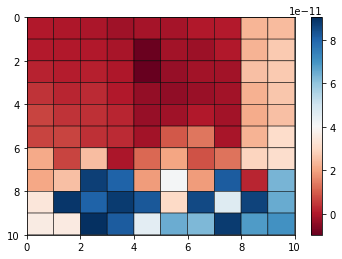

accuracy is 72.000000 lamba is 2.074148
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  9e+00  1e+00
 1:  1.5809e+02 -1.9514e+04  2e+04  2e-02  6e+00  2e+00
 2:  3.8980e+02 -1.5756e+04  2e+04  1e-02  5e+00  3e+00
 3:  5.6773e+02 -8.1265e+03  1e+04  7e-03  3e+00  3e+00
 4:  2.3140e+02 -6.7846e+02  1e+03  7e-04  3e-01  3e-01
 5:  2.6933e+01 -2.7712e+01  6e+01  4e-05  2e-02  3e-02
 6:  2.7806e-01 -2.7584e-01  6e-01  4e-07  2e-04  3e-04
 7:  2.7804e-03 -2.7582e-03  6e-03  4e-09  2e-06  3e-06
 8:  2.7804e-05 -2.7582e-05  6e-05  4e-11  2e-08  3e-08
 9:  2.7804e-07 -2.7582e-07  6e-07  4e-13  2e-10  3e-10
10:  2.7804e-09 -2.7582e-09  6e-09  4e-15  2e-12  3e-12
Optimal solution found.


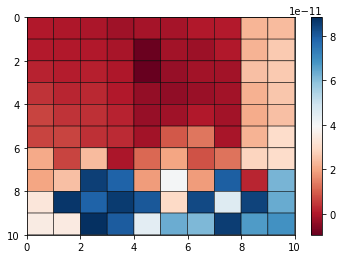

accuracy is 72.000000 lamba is 2.084168
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  9e+00  1e+00
 1:  1.5842e+02 -1.9508e+04  2e+04  2e-02  6e+00  2e+00
 2:  3.9069e+02 -1.5759e+04  2e+04  1e-02  5e+00  3e+00
 3:  5.6955e+02 -8.1356e+03  1e+04  7e-03  3e+00  3e+00
 4:  2.3189e+02 -6.8114e+02  1e+03  7e-04  3e-01  3e-01
 5:  2.6609e+01 -2.6772e+01  5e+01  4e-05  2e-02  3e-02
 6:  2.7396e-01 -2.6674e-01  5e-01  4e-07  2e-04  3e-04
 7:  2.7393e-03 -2.6671e-03  5e-03  4e-09  2e-06  3e-06
 8:  2.7393e-05 -2.6671e-05  5e-05  4e-11  2e-08  3e-08
 9:  2.7393e-07 -2.6671e-07  5e-07  4e-13  2e-10  3e-10
10:  2.7393e-09 -2.6671e-09  5e-09  4e-15  2e-12  3e-12
Optimal solution found.


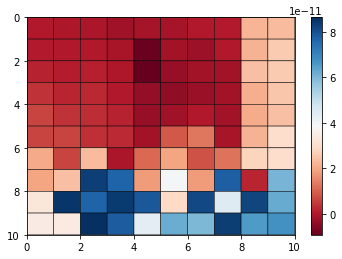

accuracy is 72.000000 lamba is 2.094188
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  9e+00  1e+00
 1:  1.5874e+02 -1.9502e+04  2e+04  2e-02  6e+00  2e+00
 2:  3.9158e+02 -1.5763e+04  2e+04  1e-02  5e+00  3e+00
 3:  5.7136e+02 -8.1446e+03  1e+04  7e-03  3e+00  3e+00
 4:  2.3237e+02 -6.8378e+02  1e+03  7e-04  3e-01  3e-01
 5:  2.6281e+01 -2.5815e+01  5e+01  4e-05  2e-02  3e-02
 6:  2.6986e-01 -2.5742e-01  5e-01  4e-07  2e-04  3e-04
 7:  2.6983e-03 -2.5739e-03  5e-03  4e-09  2e-06  3e-06
 8:  2.6983e-05 -2.5739e-05  5e-05  4e-11  2e-08  3e-08
 9:  2.6983e-07 -2.5739e-07  5e-07  4e-13  2e-10  3e-10
10:  2.6983e-09 -2.5739e-09  5e-09  4e-15  2e-12  3e-12
Optimal solution found.


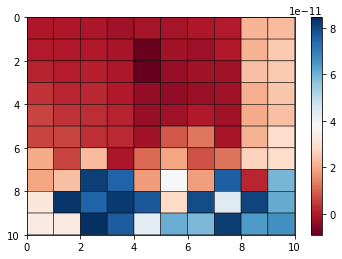

accuracy is 72.000000 lamba is 2.104208
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  9e+00  1e+00
 1:  1.5906e+02 -1.9496e+04  2e+04  2e-02  6e+00  2e+00
 2:  3.9246e+02 -1.5766e+04  2e+04  1e-02  5e+00  3e+00
 3:  5.7317e+02 -8.1535e+03  1e+04  7e-03  3e+00  3e+00
 4:  2.3284e+02 -6.8637e+02  1e+03  7e-04  3e-01  3e-01
 5:  2.5951e+01 -2.4722e+01  5e+01  4e-05  2e-02  3e-02
 6:  2.6574e-01 -2.4672e-01  5e-01  4e-07  2e-04  3e-04
 7:  2.6572e-03 -2.4670e-03  5e-03  4e-09  2e-06  3e-06
 8:  2.6572e-05 -2.4670e-05  5e-05  4e-11  2e-08  3e-08
 9:  2.6572e-07 -2.4670e-07  5e-07  4e-13  2e-10  3e-10
10:  2.6572e-09 -2.4670e-09  5e-09  4e-15  2e-12  3e-12
Optimal solution found.


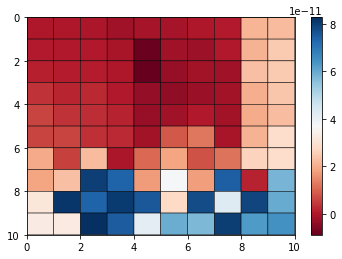

accuracy is 72.000000 lamba is 2.114228
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  8e+00  1e+00
 1:  1.5938e+02 -1.9491e+04  2e+04  2e-02  6e+00  2e+00
 2:  3.9334e+02 -1.5770e+04  2e+04  1e-02  5e+00  3e+00
 3:  5.7497e+02 -8.1621e+03  1e+04  7e-03  3e+00  3e+00
 4:  2.3331e+02 -6.8891e+02  1e+03  7e-04  3e-01  3e-01
 5:  2.5616e+01 -2.3595e+01  5e+01  4e-05  1e-02  3e-02
 6:  2.6162e-01 -2.3564e-01  5e-01  4e-07  2e-04  3e-04
 7:  2.6160e-03 -2.3562e-03  5e-03  4e-09  2e-06  3e-06
 8:  2.6160e-05 -2.3562e-05  5e-05  4e-11  2e-08  3e-08
 9:  2.6160e-07 -2.3562e-07  5e-07  4e-13  2e-10  3e-10
10:  2.6160e-09 -2.3562e-09  5e-09  4e-15  2e-12  3e-12
Optimal solution found.


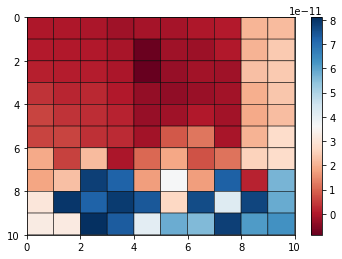

accuracy is 72.000000 lamba is 2.124248
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  8e+00  1e+00
 1:  1.5970e+02 -1.9485e+04  2e+04  2e-02  6e+00  2e+00
 2:  3.9422e+02 -1.5773e+04  2e+04  1e-02  5e+00  3e+00
 3:  5.7676e+02 -8.1707e+03  1e+04  7e-03  3e+00  3e+00
 4:  2.3376e+02 -6.9141e+02  1e+03  7e-04  3e-01  3e-01
 5:  2.5275e+01 -2.2444e+01  5e+01  4e-05  1e-02  3e-02
 6:  2.5749e-01 -2.2428e-01  5e-01  4e-07  1e-04  3e-04
 7:  2.5746e-03 -2.2426e-03  5e-03  4e-09  1e-06  3e-06
 8:  2.5746e-05 -2.2426e-05  5e-05  4e-11  1e-08  3e-08
 9:  2.5746e-07 -2.2426e-07  5e-07  4e-13  1e-10  3e-10
10:  2.5746e-09 -2.2426e-09  5e-09  4e-15  2e-12  3e-12
Optimal solution found.


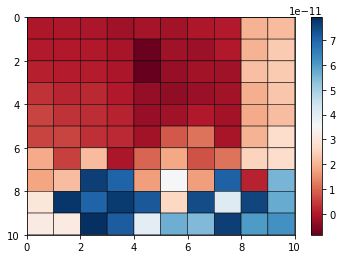

accuracy is 72.000000 lamba is 2.134269
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  8e+00  1e+00
 1:  1.6001e+02 -1.9479e+04  2e+04  2e-02  6e+00  2e+00
 2:  3.9509e+02 -1.5776e+04  2e+04  1e-02  5e+00  3e+00
 3:  5.7855e+02 -8.1790e+03  1e+04  7e-03  3e+00  3e+00
 4:  2.3421e+02 -6.9386e+02  1e+03  7e-04  3e-01  3e-01
 5:  2.4928e+01 -2.1270e+01  5e+01  4e-05  1e-02  3e-02
 6:  2.5334e-01 -2.1264e-01  5e-01  4e-07  1e-04  3e-04
 7:  2.5332e-03 -2.1262e-03  5e-03  4e-09  1e-06  3e-06
 8:  2.5332e-05 -2.1262e-05  5e-05  4e-11  1e-08  3e-08
 9:  2.5332e-07 -2.1262e-07  5e-07  4e-13  1e-10  3e-10
10:  2.5332e-09 -2.1262e-09  5e-09  4e-15  1e-12  3e-12
Optimal solution found.


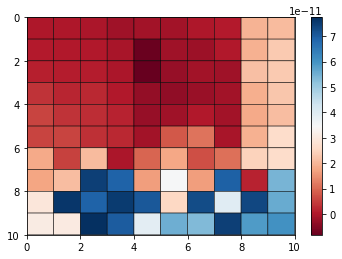

accuracy is 72.000000 lamba is 2.144289
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  8e+00  1e+00
 1:  1.6033e+02 -1.9473e+04  2e+04  2e-02  6e+00  2e+00
 2:  3.9596e+02 -1.5780e+04  2e+04  1e-02  5e+00  3e+00
 3:  5.8033e+02 -8.1872e+03  1e+04  7e-03  3e+00  3e+00
 4:  2.3465e+02 -6.9627e+02  1e+03  7e-04  3e-01  3e-01
 5:  2.4575e+01 -2.0071e+01  5e+01  4e-05  1e-02  3e-02
 6:  2.4918e-01 -2.0072e-01  5e-01  4e-07  1e-04  3e-04
 7:  2.4916e-03 -2.0070e-03  5e-03  4e-09  1e-06  3e-06
 8:  2.4916e-05 -2.0070e-05  5e-05  4e-11  1e-08  3e-08
 9:  2.4916e-07 -2.0070e-07  5e-07  4e-13  1e-10  3e-10
10:  2.4916e-09 -2.0070e-09  5e-09  4e-15  3e-12  3e-12
Optimal solution found.


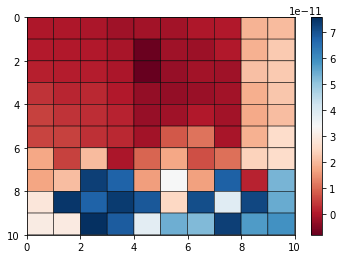

accuracy is 72.000000 lamba is 2.154309
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  8e+00  1e+00
 1:  1.6064e+02 -1.9467e+04  2e+04  2e-02  6e+00  2e+00
 2:  3.9683e+02 -1.5783e+04  2e+04  1e-02  5e+00  3e+00
 3:  5.8210e+02 -8.1952e+03  1e+04  7e-03  3e+00  3e+00
 4:  2.3509e+02 -6.9863e+02  1e+03  7e-04  3e-01  3e-01
 5:  2.4215e+01 -1.8847e+01  4e+01  3e-05  1e-02  3e-02
 6:  2.4500e-01 -1.8854e-01  4e-01  3e-07  1e-04  3e-04
 7:  2.4498e-03 -1.8852e-03  4e-03  3e-09  1e-06  3e-06
 8:  2.4498e-05 -1.8852e-05  4e-05  3e-11  1e-08  3e-08
 9:  2.4498e-07 -1.8852e-07  4e-07  3e-13  1e-10  3e-10
10:  2.4498e-09 -1.8852e-09  4e-09  4e-15  1e-12  3e-12
Optimal solution found.


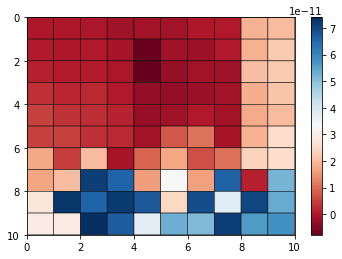

accuracy is 72.000000 lamba is 2.164329
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  8e+00  1e+00
 1:  1.6095e+02 -1.9461e+04  2e+04  2e-02  6e+00  2e+00
 2:  3.9769e+02 -1.5786e+04  2e+04  1e-02  5e+00  3e+00
 3:  5.8387e+02 -8.2031e+03  1e+04  7e-03  3e+00  3e+00
 4:  2.3551e+02 -7.0094e+02  1e+03  7e-04  3e-01  3e-01
 5:  2.3849e+01 -1.7600e+01  4e+01  3e-05  1e-02  2e-02
 6:  2.4080e-01 -1.7608e-01  4e-01  3e-07  1e-04  3e-04
 7:  2.4078e-03 -1.7607e-03  4e-03  3e-09  1e-06  3e-06
 8:  2.4078e-05 -1.7607e-05  4e-05  3e-11  1e-08  3e-08
 9:  2.4078e-07 -1.7607e-07  4e-07  3e-13  1e-10  3e-10
10:  2.4078e-09 -1.7607e-09  4e-09  3e-15  2e-12  3e-12
Optimal solution found.


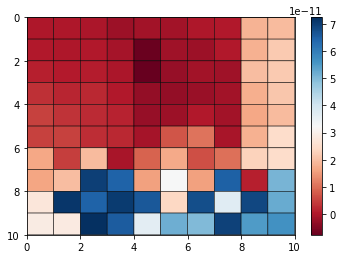

accuracy is 72.000000 lamba is 2.174349
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  8e+00  1e+00
 1:  1.6127e+02 -1.9455e+04  2e+04  2e-02  6e+00  2e+00
 2:  3.9854e+02 -1.5789e+04  2e+04  1e-02  5e+00  3e+00
 3:  5.8563e+02 -8.2109e+03  1e+04  7e-03  3e+00  3e+00
 4:  2.3593e+02 -7.0321e+02  1e+03  8e-04  3e-01  3e-01
 5:  2.3476e+01 -1.6327e+01  4e+01  3e-05  1e-02  2e-02
 6:  2.3659e-01 -1.6337e-01  4e-01  3e-07  1e-04  2e-04
 7:  2.3657e-03 -1.6336e-03  4e-03  3e-09  1e-06  2e-06
 8:  2.3657e-05 -1.6336e-05  4e-05  3e-11  1e-08  2e-08
 9:  2.3657e-07 -1.6336e-07  4e-07  3e-13  1e-10  2e-10
10:  2.3657e-09 -1.6336e-09  4e-09  3e-15  2e-12  2e-12
Optimal solution found.


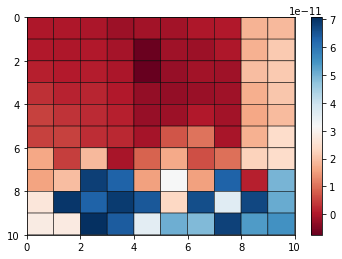

accuracy is 72.000000 lamba is 2.184369
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  8e+00  1e+00
 1:  1.6158e+02 -1.9449e+04  2e+04  2e-02  6e+00  2e+00
 2:  3.9940e+02 -1.5792e+04  2e+04  1e-02  5e+00  3e+00
 3:  5.8739e+02 -8.2184e+03  1e+04  7e-03  3e+00  3e+00
 4:  2.3635e+02 -7.0543e+02  1e+03  8e-04  3e-01  3e-01
 5:  2.3097e+01 -1.5030e+01  4e+01  3e-05  1e-02  2e-02
 6:  2.3237e-01 -1.5040e-01  4e-01  3e-07  1e-04  2e-04
 7:  2.3235e-03 -1.5039e-03  4e-03  3e-09  1e-06  2e-06
 8:  2.3235e-05 -1.5039e-05  4e-05  3e-11  1e-08  2e-08
 9:  2.3235e-07 -1.5039e-07  4e-07  3e-13  1e-10  2e-10
10:  2.3235e-09 -1.5039e-09  4e-09  3e-15  2e-12  2e-12
Optimal solution found.


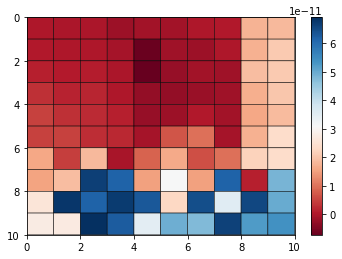

accuracy is 72.000000 lamba is 2.194389
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  8e+00  1e+00
 1:  1.6189e+02 -1.9443e+04  2e+04  2e-02  6e+00  2e+00
 2:  4.0025e+02 -1.5795e+04  2e+04  1e-02  5e+00  3e+00
 3:  5.8914e+02 -8.2259e+03  1e+04  7e-03  3e+00  3e+00
 4:  2.3675e+02 -7.0760e+02  1e+03  8e-04  3e-01  3e-01
 5:  2.2711e+01 -1.3707e+01  4e+01  3e-05  1e-02  2e-02
 6:  2.2812e-01 -1.3717e-01  4e-01  3e-07  1e-04  2e-04
 7:  2.2811e-03 -1.3716e-03  4e-03  3e-09  1e-06  2e-06
 8:  2.2811e-05 -1.3716e-05  4e-05  3e-11  1e-08  2e-08
 9:  2.2811e-07 -1.3716e-07  4e-07  3e-13  1e-10  2e-10
10:  2.2811e-09 -1.3716e-09  4e-09  3e-15  2e-12  2e-12
Optimal solution found.


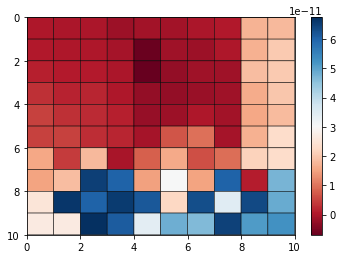

accuracy is 72.000000 lamba is 2.204409
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  8e+00  1e+00
 1:  1.6219e+02 -1.9437e+04  2e+04  2e-02  6e+00  2e+00
 2:  4.0109e+02 -1.5798e+04  2e+04  1e-02  5e+00  3e+00
 3:  5.9088e+02 -8.2331e+03  1e+04  7e-03  3e+00  3e+00
 4:  2.3715e+02 -7.0973e+02  1e+03  8e-04  3e-01  3e-01
 5:  2.2319e+01 -1.2359e+01  4e+01  3e-05  1e-02  2e-02
 6:  2.2385e-01 -1.2368e-01  4e-01  3e-07  1e-04  2e-04
 7:  2.2383e-03 -1.2367e-03  4e-03  3e-09  1e-06  2e-06
 8:  2.2383e-05 -1.2367e-05  4e-05  3e-11  1e-08  2e-08
 9:  2.2383e-07 -1.2367e-07  4e-07  3e-13  1e-10  2e-10
10:  2.2383e-09 -1.2367e-09  4e-09  3e-15  2e-12  2e-12
Optimal solution found.


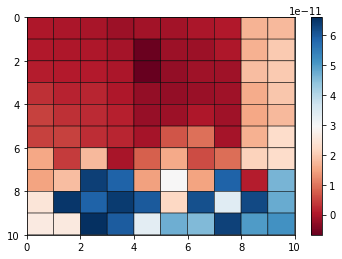

accuracy is 72.000000 lamba is 2.214429
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  8e+00  1e+00
 1:  1.6250e+02 -1.9431e+04  2e+04  2e-02  6e+00  2e+00
 2:  4.0193e+02 -1.5801e+04  2e+04  1e-02  5e+00  3e+00
 3:  5.9262e+02 -8.2403e+03  1e+04  7e-03  3e+00  3e+00
 4:  2.3755e+02 -7.1181e+02  1e+03  8e-04  3e-01  3e-01
 5:  2.1919e+01 -1.0986e+01  3e+01  3e-05  1e-02  2e-02
 6:  2.1954e-01 -1.0992e-01  3e-01  3e-07  1e-04  2e-04
 7:  2.1952e-03 -1.0992e-03  3e-03  3e-09  1e-06  2e-06
 8:  2.1952e-05 -1.0992e-05  3e-05  3e-11  1e-08  2e-08
 9:  2.1952e-07 -1.0992e-07  3e-07  3e-13  1e-10  2e-10
10:  2.1952e-09 -1.0992e-09  3e-09  3e-15  2e-12  2e-12
Optimal solution found.


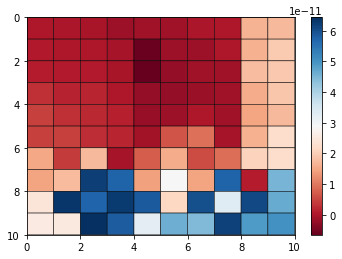

accuracy is 72.000000 lamba is 2.224449
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  8e+00  1e+00
 1:  1.6281e+02 -1.9425e+04  2e+04  2e-02  6e+00  2e+00
 2:  4.0277e+02 -1.5804e+04  2e+04  1e-02  5e+00  3e+00
 3:  5.9435e+02 -8.2473e+03  1e+04  7e-03  3e+00  3e+00
 4:  2.3793e+02 -7.1384e+02  1e+03  8e-04  3e-01  3e-01
 5:  2.1803e+01 -1.0533e+01  3e+01  3e-05  9e-03  2e-02
 6:  2.1826e-01 -1.0538e-01  3e-01  3e-07  9e-05  2e-04
 7:  2.1825e-03 -1.0537e-03  3e-03  3e-09  9e-07  2e-06
 8:  2.1825e-05 -1.0537e-05  3e-05  3e-11  9e-09  2e-08
 9:  2.1825e-07 -1.0537e-07  3e-07  3e-13  9e-11  2e-10
10:  2.1825e-09 -1.0537e-09  3e-09  3e-15  2e-12  2e-12
Optimal solution found.


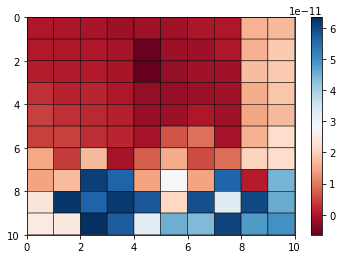

accuracy is 72.000000 lamba is 2.234469
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  8e+00  1e+00
 1:  1.6311e+02 -1.9419e+04  2e+04  2e-02  6e+00  2e+00
 2:  4.0361e+02 -1.5807e+04  2e+04  1e-02  5e+00  3e+00
 3:  5.9608e+02 -8.2541e+03  1e+04  7e-03  3e+00  3e+00
 4:  2.3831e+02 -7.1582e+02  1e+03  8e-04  3e-01  3e-01
 5:  2.1821e+01 -1.0516e+01  3e+01  3e-05  9e-03  2e-02
 6:  2.1841e-01 -1.0520e-01  3e-01  3e-07  9e-05  2e-04
 7:  2.1840e-03 -1.0520e-03  3e-03  3e-09  9e-07  2e-06
 8:  2.1840e-05 -1.0520e-05  3e-05  3e-11  9e-09  2e-08
 9:  2.1840e-07 -1.0520e-07  3e-07  3e-13  9e-11  2e-10
10:  2.1840e-09 -1.0520e-09  3e-09  3e-15  2e-12  2e-12
Optimal solution found.


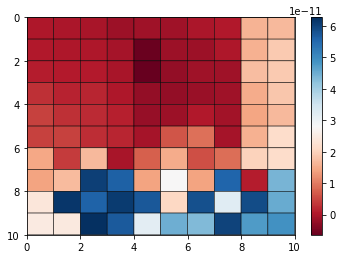

accuracy is 72.000000 lamba is 2.244489
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  8e+00  1e+00
 1:  1.6341e+02 -1.9413e+04  2e+04  2e-02  6e+00  2e+00
 2:  4.0444e+02 -1.5810e+04  2e+04  1e-02  5e+00  3e+00
 3:  5.9780e+02 -8.2608e+03  1e+04  7e-03  3e+00  3e+00
 4:  2.3869e+02 -7.1775e+02  1e+03  8e-04  3e-01  3e-01
 5:  2.1839e+01 -1.0498e+01  3e+01  3e-05  9e-03  2e-02
 6:  2.1856e-01 -1.0502e-01  3e-01  3e-07  9e-05  2e-04
 7:  2.1855e-03 -1.0501e-03  3e-03  3e-09  9e-07  2e-06
 8:  2.1855e-05 -1.0501e-05  3e-05  3e-11  9e-09  2e-08
 9:  2.1855e-07 -1.0501e-07  3e-07  3e-13  9e-11  2e-10
10:  2.1855e-09 -1.0501e-09  3e-09  3e-15  2e-12  2e-12
Optimal solution found.


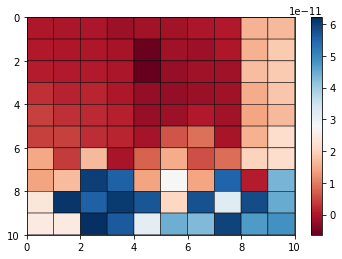

accuracy is 74.000000 lamba is 2.254509
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  8e+00  1e+00
 1:  1.6371e+02 -1.9407e+04  2e+04  2e-02  6e+00  2e+00
 2:  4.0526e+02 -1.5813e+04  2e+04  1e-02  5e+00  3e+00
 3:  5.9951e+02 -8.2674e+03  1e+04  7e-03  3e+00  3e+00
 4:  2.3905e+02 -7.1964e+02  1e+03  8e-04  3e-01  3e-01
 5:  2.1856e+01 -1.0480e+01  3e+01  3e-05  9e-03  2e-02
 6:  2.1874e-01 -1.0484e-01  3e-01  3e-07  9e-05  2e-04
 7:  2.1872e-03 -1.0484e-03  3e-03  3e-09  9e-07  2e-06
 8:  2.1872e-05 -1.0484e-05  3e-05  3e-11  9e-09  2e-08
 9:  2.1872e-07 -1.0484e-07  3e-07  3e-13  9e-11  2e-10
10:  2.1872e-09 -1.0484e-09  3e-09  3e-15  1e-12  2e-12
Optimal solution found.


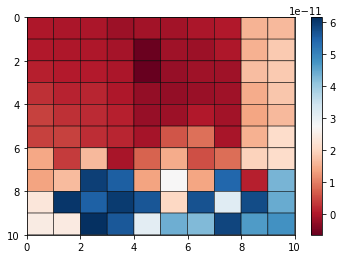

accuracy is 74.000000 lamba is 2.264529
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  8e+00  1e+00
 1:  1.6402e+02 -1.9401e+04  2e+04  2e-02  6e+00  2e+00
 2:  4.0609e+02 -1.5816e+04  2e+04  1e-02  5e+00  3e+00
 3:  6.0122e+02 -8.2738e+03  1e+04  7e-03  3e+00  3e+00
 4:  2.3941e+02 -7.2148e+02  1e+03  8e-04  3e-01  3e-01
 5:  2.1873e+01 -1.0460e+01  3e+01  3e-05  9e-03  2e-02
 6:  2.1890e-01 -1.0466e-01  3e-01  3e-07  9e-05  2e-04
 7:  2.1889e-03 -1.0465e-03  3e-03  3e-09  9e-07  2e-06
 8:  2.1889e-05 -1.0465e-05  3e-05  3e-11  9e-09  2e-08
 9:  2.1889e-07 -1.0465e-07  3e-07  3e-13  9e-11  2e-10
10:  2.1889e-09 -1.0465e-09  3e-09  3e-15  2e-12  2e-12
Optimal solution found.


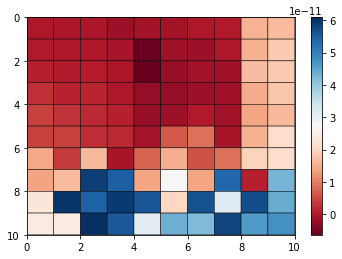

accuracy is 74.000000 lamba is 2.274549
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  8e+00  1e+00
 1:  1.6431e+02 -1.9395e+04  2e+04  2e-02  6e+00  2e+00
 2:  4.0690e+02 -1.5819e+04  2e+04  1e-02  5e+00  3e+00
 3:  6.0293e+02 -8.2800e+03  1e+04  7e-03  3e+00  3e+00
 4:  2.3977e+02 -7.2327e+02  1e+03  8e-04  3e-01  3e-01
 5:  2.1890e+01 -1.0441e+01  3e+01  3e-05  9e-03  2e-02
 6:  2.1906e-01 -1.0446e-01  3e-01  3e-07  9e-05  2e-04
 7:  2.1905e-03 -1.0446e-03  3e-03  3e-09  9e-07  2e-06
 8:  2.1905e-05 -1.0446e-05  3e-05  3e-11  9e-09  2e-08
 9:  2.1905e-07 -1.0446e-07  3e-07  3e-13  9e-11  2e-10
10:  2.1905e-09 -1.0446e-09  3e-09  3e-15  2e-12  2e-12
Optimal solution found.


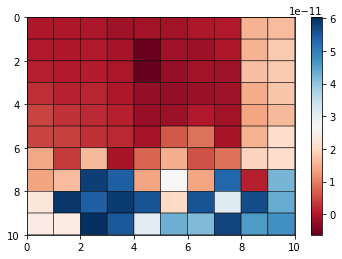

accuracy is 74.000000 lamba is 2.284569
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  8e+00  1e+00
 1:  1.6461e+02 -1.9389e+04  2e+04  2e-02  6e+00  2e+00
 2:  4.0772e+02 -1.5822e+04  2e+04  1e-02  5e+00  3e+00
 3:  6.0462e+02 -8.2862e+03  1e+04  7e-03  3e+00  3e+00
 4:  2.4011e+02 -7.2501e+02  1e+03  8e-04  3e-01  3e-01
 5:  2.1906e+01 -1.0420e+01  3e+01  3e-05  9e-03  2e-02
 6:  2.1922e-01 -1.0426e-01  3e-01  3e-07  9e-05  2e-04
 7:  2.1920e-03 -1.0426e-03  3e-03  3e-09  9e-07  2e-06
 8:  2.1920e-05 -1.0426e-05  3e-05  3e-11  9e-09  2e-08
 9:  2.1920e-07 -1.0426e-07  3e-07  3e-13  9e-11  2e-10
10:  2.1920e-09 -1.0426e-09  3e-09  3e-15  8e-13  2e-12
Optimal solution found.


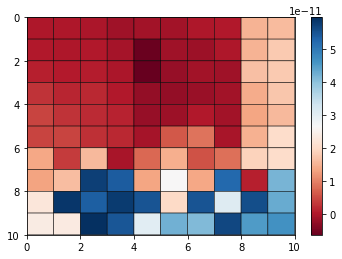

accuracy is 74.000000 lamba is 2.294589
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  8e+00  1e+00
 1:  1.6491e+02 -1.9383e+04  2e+04  2e-02  6e+00  2e+00
 2:  4.0853e+02 -1.5825e+04  2e+04  1e-02  5e+00  3e+00
 3:  6.0632e+02 -8.2922e+03  1e+04  7e-03  3e+00  3e+00
 4:  2.4046e+02 -7.2671e+02  1e+03  8e-04  3e-01  3e-01
 5:  2.1922e+01 -1.0399e+01  3e+01  3e-05  9e-03  2e-02
 6:  2.1937e-01 -1.0406e-01  3e-01  3e-07  9e-05  2e-04
 7:  2.1935e-03 -1.0405e-03  3e-03  3e-09  9e-07  2e-06
 8:  2.1935e-05 -1.0405e-05  3e-05  3e-11  9e-09  2e-08
 9:  2.1935e-07 -1.0405e-07  3e-07  3e-13  9e-11  2e-10
10:  2.1935e-09 -1.0405e-09  3e-09  3e-15  1e-12  2e-12
Optimal solution found.


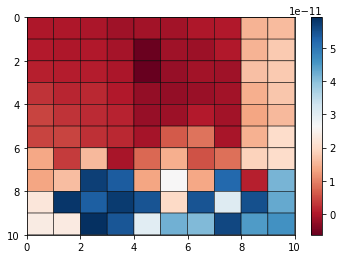

accuracy is 74.000000 lamba is 2.304609
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  8e+00  1e+00
 1:  1.6521e+02 -1.9377e+04  2e+04  2e-02  6e+00  2e+00
 2:  4.0934e+02 -1.5827e+04  2e+04  1e-02  5e+00  3e+00
 3:  6.0800e+02 -8.2981e+03  1e+04  7e-03  3e+00  3e+00
 4:  2.4079e+02 -7.2835e+02  1e+03  8e-04  3e-01  3e-01
 5:  2.1937e+01 -1.0378e+01  3e+01  3e-05  9e-03  2e-02
 6:  2.1951e-01 -1.0384e-01  3e-01  3e-07  9e-05  2e-04
 7:  2.1950e-03 -1.0383e-03  3e-03  3e-09  9e-07  2e-06
 8:  2.1950e-05 -1.0383e-05  3e-05  3e-11  9e-09  2e-08
 9:  2.1950e-07 -1.0383e-07  3e-07  3e-13  9e-11  2e-10
10:  2.1950e-09 -1.0383e-09  3e-09  3e-15  2e-12  2e-12
Optimal solution found.


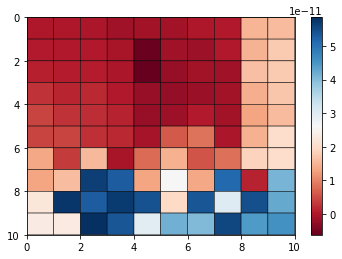

accuracy is 74.000000 lamba is 2.314629
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  8e+00  1e+00
 1:  1.6550e+02 -1.9371e+04  2e+04  2e-02  6e+00  2e+00
 2:  4.1014e+02 -1.5830e+04  2e+04  1e-02  5e+00  3e+00
 3:  6.0968e+02 -8.3038e+03  1e+04  7e-03  3e+00  3e+00
 4:  2.4112e+02 -7.2995e+02  1e+03  8e-04  3e-01  3e-01
 5:  2.1952e+01 -1.0355e+01  3e+01  3e-05  9e-03  2e-02
 6:  2.1965e-01 -1.0362e-01  3e-01  3e-07  9e-05  2e-04
 7:  2.1963e-03 -1.0361e-03  3e-03  3e-09  9e-07  2e-06
 8:  2.1963e-05 -1.0361e-05  3e-05  3e-11  9e-09  2e-08
 9:  2.1963e-07 -1.0361e-07  3e-07  3e-13  9e-11  2e-10
10:  2.1963e-09 -1.0361e-09  3e-09  3e-15  2e-12  2e-12
Optimal solution found.


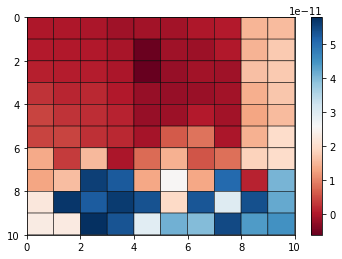

accuracy is 74.000000 lamba is 2.324649
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  8e+00  1e+00
 1:  1.6580e+02 -1.9365e+04  2e+04  2e-02  5e+00  2e+00
 2:  4.1094e+02 -1.5833e+04  2e+04  1e-02  5e+00  3e+00
 3:  6.1136e+02 -8.3094e+03  1e+04  7e-03  3e+00  3e+00
 4:  2.4145e+02 -7.3150e+02  1e+03  8e-04  3e-01  3e-01
 5:  2.1966e+01 -1.0333e+01  3e+01  3e-05  9e-03  2e-02
 6:  2.1978e-01 -1.0339e-01  3e-01  3e-07  9e-05  2e-04
 7:  2.1976e-03 -1.0338e-03  3e-03  3e-09  9e-07  2e-06
 8:  2.1976e-05 -1.0338e-05  3e-05  3e-11  9e-09  2e-08
 9:  2.1976e-07 -1.0338e-07  3e-07  3e-13  9e-11  2e-10
10:  2.1976e-09 -1.0338e-09  3e-09  3e-15  2e-12  2e-12
Optimal solution found.


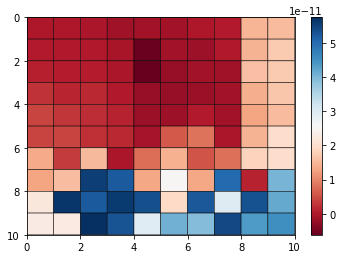

accuracy is 74.000000 lamba is 2.334669
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  8e+00  1e+00
 1:  1.6609e+02 -1.9358e+04  2e+04  2e-02  5e+00  2e+00
 2:  4.1174e+02 -1.5835e+04  2e+04  1e-02  5e+00  3e+00
 3:  6.1303e+02 -8.3148e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.4176e+02 -7.3300e+02  1e+03  8e-04  3e-01  3e-01
 5:  2.1980e+01 -1.0309e+01  3e+01  3e-05  9e-03  2e-02
 6:  2.1991e-01 -1.0316e-01  3e-01  3e-07  9e-05  2e-04
 7:  2.1989e-03 -1.0315e-03  3e-03  3e-09  9e-07  2e-06
 8:  2.1989e-05 -1.0315e-05  3e-05  3e-11  9e-09  2e-08
 9:  2.1989e-07 -1.0315e-07  3e-07  3e-13  9e-11  2e-10
10:  2.1989e-09 -1.0315e-09  3e-09  3e-15  1e-12  2e-12
Optimal solution found.


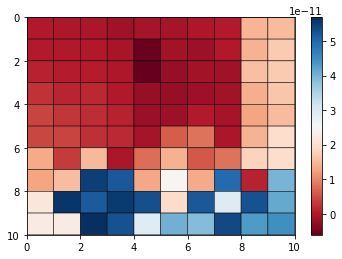

accuracy is 74.000000 lamba is 2.344689
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  8e+00  1e+00
 1:  1.6638e+02 -1.9352e+04  2e+04  2e-02  5e+00  2e+00
 2:  4.1253e+02 -1.5838e+04  2e+04  1e-02  5e+00  3e+00
 3:  6.1469e+02 -8.3202e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.4208e+02 -7.3446e+02  1e+03  8e-04  3e-01  3e-01
 5:  2.1993e+01 -1.0285e+01  3e+01  3e-05  9e-03  2e-02
 6:  2.2003e-01 -1.0292e-01  3e-01  3e-07  9e-05  2e-04
 7:  2.2001e-03 -1.0291e-03  3e-03  3e-09  9e-07  2e-06
 8:  2.2001e-05 -1.0291e-05  3e-05  3e-11  9e-09  2e-08
 9:  2.2001e-07 -1.0291e-07  3e-07  3e-13  9e-11  2e-10
10:  2.2001e-09 -1.0291e-09  3e-09  3e-15  1e-12  2e-12
Optimal solution found.


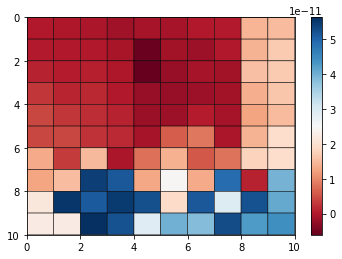

accuracy is 74.000000 lamba is 2.354709
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  8e+00  1e+00
 1:  1.6667e+02 -1.9346e+04  2e+04  2e-02  5e+00  2e+00
 2:  4.1332e+02 -1.5841e+04  2e+04  1e-02  5e+00  3e+00
 3:  6.1635e+02 -8.3254e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.4238e+02 -7.3586e+02  1e+03  8e-04  3e-01  3e-01
 5:  2.2006e+01 -1.0261e+01  3e+01  3e-05  9e-03  2e-02
 6:  2.2014e-01 -1.0267e-01  3e-01  3e-07  9e-05  2e-04
 7:  2.2013e-03 -1.0266e-03  3e-03  3e-09  9e-07  2e-06
 8:  2.2013e-05 -1.0266e-05  3e-05  3e-11  9e-09  2e-08
 9:  2.2013e-07 -1.0266e-07  3e-07  3e-13  9e-11  2e-10
10:  2.2013e-09 -1.0266e-09  3e-09  3e-15  1e-12  2e-12
Optimal solution found.


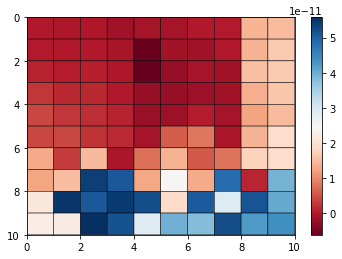

accuracy is 74.000000 lamba is 2.364729
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  8e+00  1e+00
 1:  1.6696e+02 -1.9340e+04  2e+04  2e-02  5e+00  2e+00
 2:  4.1411e+02 -1.5843e+04  2e+04  1e-02  5e+00  3e+00
 3:  6.1800e+02 -8.3305e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.4268e+02 -7.3722e+02  1e+03  8e-04  3e-01  3e-01
 5:  2.2018e+01 -1.0236e+01  3e+01  3e-05  9e-03  2e-02
 6:  2.2025e-01 -1.0241e-01  3e-01  3e-07  9e-05  2e-04
 7:  2.2024e-03 -1.0241e-03  3e-03  3e-09  9e-07  2e-06
 8:  2.2024e-05 -1.0241e-05  3e-05  3e-11  9e-09  2e-08
 9:  2.2024e-07 -1.0241e-07  3e-07  3e-13  9e-11  2e-10
10:  2.2024e-09 -1.0241e-09  3e-09  3e-15  2e-12  2e-12
Optimal solution found.


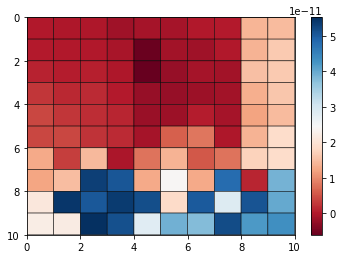

accuracy is 74.000000 lamba is 2.374749
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  8e+00  1e+00
 1:  1.6725e+02 -1.9334e+04  2e+04  2e-02  5e+00  2e+00
 2:  4.1489e+02 -1.5846e+04  2e+04  1e-02  4e+00  3e+00
 3:  6.1965e+02 -8.3354e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.4298e+02 -7.3853e+02  1e+03  8e-04  3e-01  3e-01
 5:  2.2030e+01 -1.0210e+01  3e+01  3e-05  9e-03  2e-02
 6:  2.2035e-01 -1.0215e-01  3e-01  3e-07  9e-05  2e-04
 7:  2.2034e-03 -1.0215e-03  3e-03  3e-09  9e-07  2e-06
 8:  2.2034e-05 -1.0215e-05  3e-05  3e-11  9e-09  2e-08
 9:  2.2034e-07 -1.0215e-07  3e-07  3e-13  9e-11  2e-10
10:  2.2034e-09 -1.0215e-09  3e-09  2e-15  2e-12  2e-12
Optimal solution found.


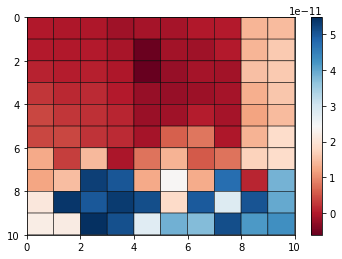

accuracy is 74.000000 lamba is 2.384770
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  8e+00  1e+00
 1:  1.6754e+02 -1.9328e+04  2e+04  2e-02  5e+00  2e+00
 2:  4.1567e+02 -1.5848e+04  2e+04  1e-02  4e+00  3e+00
 3:  6.2130e+02 -8.3402e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.4327e+02 -7.3979e+02  1e+03  8e-04  3e-01  3e-01
 5:  2.2041e+01 -1.0184e+01  3e+01  3e-05  9e-03  2e-02
 6:  2.2045e-01 -1.0189e-01  3e-01  3e-07  9e-05  2e-04
 7:  2.2044e-03 -1.0188e-03  3e-03  3e-09  9e-07  2e-06
 8:  2.2044e-05 -1.0188e-05  3e-05  3e-11  9e-09  2e-08
 9:  2.2044e-07 -1.0188e-07  3e-07  3e-13  9e-11  2e-10
10:  2.2044e-09 -1.0188e-09  3e-09  3e-15  1e-12  2e-12
Optimal solution found.


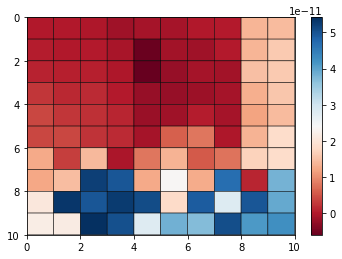

accuracy is 74.000000 lamba is 2.394790
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  8e+00  1e+00
 1:  1.6782e+02 -1.9321e+04  2e+04  2e-02  5e+00  2e+00
 2:  4.1645e+02 -1.5851e+04  2e+04  1e-02  4e+00  3e+00
 3:  6.2293e+02 -8.3449e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.4355e+02 -7.4100e+02  1e+03  8e-04  3e-01  3e-01
 5:  2.2052e+01 -1.0157e+01  3e+01  3e-05  9e-03  2e-02
 6:  2.2054e-01 -1.0162e-01  3e-01  3e-07  9e-05  2e-04
 7:  2.2053e-03 -1.0161e-03  3e-03  3e-09  9e-07  2e-06
 8:  2.2053e-05 -1.0161e-05  3e-05  3e-11  9e-09  2e-08
 9:  2.2053e-07 -1.0161e-07  3e-07  3e-13  9e-11  2e-10
10:  2.2053e-09 -1.0161e-09  3e-09  3e-15  2e-12  2e-12
Optimal solution found.


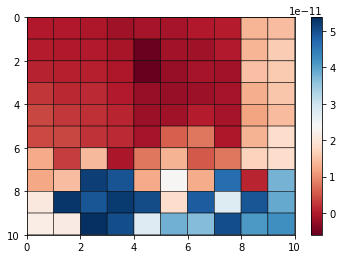

accuracy is 74.000000 lamba is 2.404810
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  8e+00  1e+00
 1:  1.6811e+02 -1.9315e+04  2e+04  2e-02  5e+00  2e+00
 2:  4.1722e+02 -1.5853e+04  2e+04  1e-02  4e+00  3e+00
 3:  6.2457e+02 -8.3495e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.4383e+02 -7.4217e+02  1e+03  8e-04  3e-01  3e-01
 5:  2.2062e+01 -1.0130e+01  3e+01  3e-05  9e-03  2e-02
 6:  2.2063e-01 -1.0134e-01  3e-01  3e-07  9e-05  2e-04
 7:  2.2061e-03 -1.0134e-03  3e-03  3e-09  9e-07  2e-06
 8:  2.2061e-05 -1.0134e-05  3e-05  3e-11  9e-09  2e-08
 9:  2.2061e-07 -1.0134e-07  3e-07  3e-13  9e-11  2e-10
10:  2.2061e-09 -1.0134e-09  3e-09  3e-15  1e-12  2e-12
Optimal solution found.


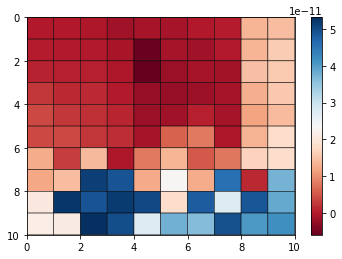

accuracy is 74.000000 lamba is 2.414830
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  8e+00  1e+00
 1:  1.6839e+02 -1.9309e+04  2e+04  2e-02  5e+00  2e+00
 2:  4.1799e+02 -1.5855e+04  2e+04  1e-02  4e+00  3e+00
 3:  6.2619e+02 -8.3540e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.4411e+02 -7.4329e+02  1e+03  8e-04  3e-01  3e-01
 5:  2.2072e+01 -1.0102e+01  3e+01  3e-05  9e-03  2e-02
 6:  2.2071e-01 -1.0106e-01  3e-01  3e-07  9e-05  2e-04
 7:  2.2069e-03 -1.0105e-03  3e-03  3e-09  9e-07  2e-06
 8:  2.2069e-05 -1.0105e-05  3e-05  3e-11  9e-09  2e-08
 9:  2.2069e-07 -1.0105e-07  3e-07  3e-13  9e-11  2e-10
10:  2.2069e-09 -1.0105e-09  3e-09  3e-15  2e-12  2e-12
Optimal solution found.


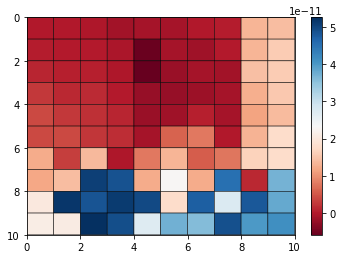

accuracy is 74.000000 lamba is 2.424850
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  8e+00  1e+00
 1:  1.6868e+02 -1.9303e+04  2e+04  2e-02  5e+00  2e+00
 2:  4.1875e+02 -1.5858e+04  2e+04  1e-02  4e+00  3e+00
 3:  6.2782e+02 -8.3583e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.4438e+02 -7.4436e+02  1e+03  8e-04  3e-01  3e-01
 5:  2.2081e+01 -1.0074e+01  3e+01  3e-05  9e-03  2e-02
 6:  2.2079e-01 -1.0078e-01  3e-01  3e-07  9e-05  2e-04
 7:  2.2078e-03 -1.0077e-03  3e-03  3e-09  9e-07  2e-06
 8:  2.2078e-05 -1.0077e-05  3e-05  3e-11  9e-09  2e-08
 9:  2.2078e-07 -1.0077e-07  3e-07  3e-13  9e-11  2e-10
10:  2.2078e-09 -1.0077e-09  3e-09  3e-15  2e-12  2e-12
Optimal solution found.


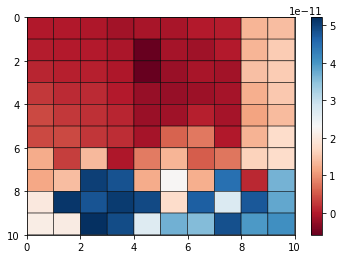

accuracy is 74.000000 lamba is 2.434870
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  8e+00  1e+00
 1:  1.6896e+02 -1.9297e+04  2e+04  2e-02  5e+00  2e+00
 2:  4.1952e+02 -1.5860e+04  2e+04  1e-02  4e+00  3e+00
 3:  6.2943e+02 -8.3625e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.4464e+02 -7.4538e+02  1e+03  8e-04  3e-01  3e-01
 5:  2.2089e+01 -1.0045e+01  3e+01  3e-05  9e-03  2e-02
 6:  2.2088e-01 -1.0049e-01  3e-01  3e-07  9e-05  2e-04
 7:  2.2086e-03 -1.0049e-03  3e-03  3e-09  9e-07  2e-06
 8:  2.2086e-05 -1.0049e-05  3e-05  3e-11  9e-09  2e-08
 9:  2.2086e-07 -1.0049e-07  3e-07  3e-13  9e-11  2e-10
10:  2.2086e-09 -1.0049e-09  3e-09  3e-15  2e-12  2e-12
Optimal solution found.


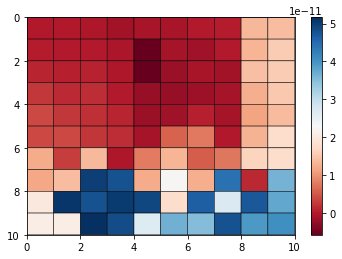

accuracy is 74.000000 lamba is 2.444890
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  8e+00  1e+00
 1:  1.6924e+02 -1.9290e+04  2e+04  2e-02  5e+00  2e+00
 2:  4.2028e+02 -1.5862e+04  2e+04  1e-02  4e+00  3e+00
 3:  6.3105e+02 -8.3666e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.4490e+02 -7.4636e+02  1e+03  8e-04  3e-01  3e-01
 5:  2.2096e+01 -1.0016e+01  3e+01  3e-05  9e-03  2e-02
 6:  2.2095e-01 -1.0020e-01  3e-01  3e-07  9e-05  2e-04
 7:  2.2094e-03 -1.0020e-03  3e-03  3e-09  9e-07  2e-06
 8:  2.2094e-05 -1.0020e-05  3e-05  3e-11  9e-09  2e-08
 9:  2.2094e-07 -1.0020e-07  3e-07  3e-13  9e-11  2e-10
10:  2.2094e-09 -1.0020e-09  3e-09  3e-15  9e-13  2e-12
Optimal solution found.


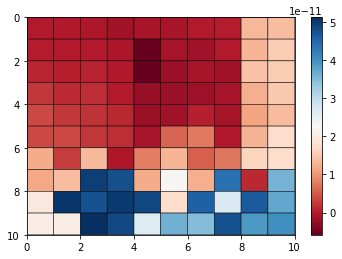

accuracy is 74.000000 lamba is 2.454910
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  7e+00  1e+00
 1:  1.6952e+02 -1.9284e+04  2e+04  2e-02  5e+00  2e+00
 2:  4.2103e+02 -1.5865e+04  2e+04  1e-02  4e+00  3e+00
 3:  6.3265e+02 -8.3706e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.4515e+02 -7.4728e+02  1e+03  8e-04  3e-01  3e-01
 5:  2.2103e+01 -9.9864e+00  3e+01  3e-05  9e-03  2e-02
 6:  2.2103e-01 -9.9909e-02  3e-01  3e-07  9e-05  2e-04
 7:  2.2101e-03 -9.9903e-04  3e-03  3e-09  9e-07  2e-06
 8:  2.2101e-05 -9.9903e-06  3e-05  3e-11  9e-09  2e-08
 9:  2.2101e-07 -9.9903e-08  3e-07  3e-13  9e-11  2e-10
10:  2.2101e-09 -9.9903e-10  3e-09  3e-15  1e-12  2e-12
Optimal solution found.


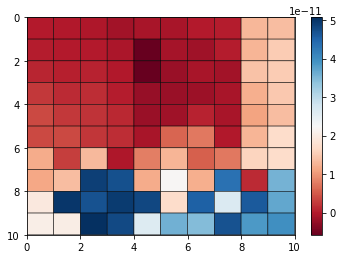

accuracy is 74.000000 lamba is 2.464930
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  7e+00  1e+00
 1:  1.6980e+02 -1.9278e+04  2e+04  2e-02  5e+00  2e+00
 2:  4.2178e+02 -1.5867e+04  2e+04  1e-02  4e+00  3e+00
 3:  6.3426e+02 -8.3744e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.4540e+02 -7.4816e+02  1e+03  8e-04  3e-01  3e-01
 5:  2.2110e+01 -9.9562e+00  3e+01  3e-05  9e-03  2e-02
 6:  2.2109e-01 -9.9610e-02  3e-01  3e-07  9e-05  2e-04
 7:  2.2108e-03 -9.9603e-04  3e-03  3e-09  9e-07  2e-06
 8:  2.2108e-05 -9.9603e-06  3e-05  3e-11  9e-09  2e-08
 9:  2.2108e-07 -9.9603e-08  3e-07  3e-13  9e-11  2e-10
10:  2.2108e-09 -9.9603e-10  3e-09  3e-15  1e-12  2e-12
Optimal solution found.


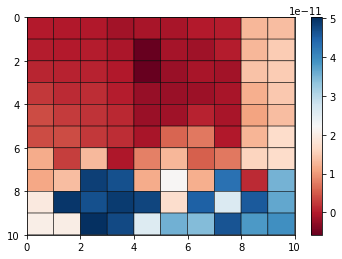

accuracy is 74.000000 lamba is 2.474950
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  7e+00  1e+00
 1:  1.7008e+02 -1.9272e+04  2e+04  2e-02  5e+00  2e+00
 2:  4.2253e+02 -1.5869e+04  2e+04  1e-02  4e+00  3e+00
 3:  6.3585e+02 -8.3782e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.4565e+02 -7.4900e+02  1e+03  8e-04  3e-01  3e-01
 5:  2.2116e+01 -9.9256e+00  3e+01  3e-05  9e-03  2e-02
 6:  2.2115e-01 -9.9305e-02  3e-01  3e-07  9e-05  2e-04
 7:  2.2114e-03 -9.9299e-04  3e-03  3e-09  9e-07  2e-06
 8:  2.2114e-05 -9.9299e-06  3e-05  3e-11  9e-09  2e-08
 9:  2.2114e-07 -9.9299e-08  3e-07  3e-13  9e-11  2e-10
10:  2.2114e-09 -9.9299e-10  3e-09  3e-15  2e-12  2e-12
Optimal solution found.


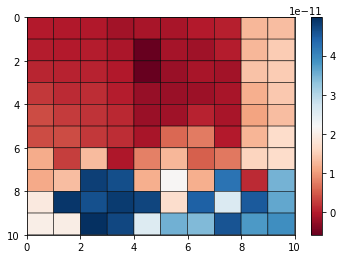

accuracy is 74.000000 lamba is 2.484970
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  7e+00  1e+00
 1:  1.7036e+02 -1.9265e+04  2e+04  2e-02  5e+00  2e+00
 2:  4.2327e+02 -1.5871e+04  2e+04  1e-02  4e+00  3e+00
 3:  6.3745e+02 -8.3818e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.4588e+02 -7.4978e+02  1e+03  8e-04  3e-01  3e-01
 5:  2.2121e+01 -9.8944e+00  3e+01  3e-05  9e-03  2e-02
 6:  2.2120e-01 -9.8995e-02  3e-01  3e-07  9e-05  2e-04
 7:  2.2119e-03 -9.8989e-04  3e-03  3e-09  9e-07  2e-06
 8:  2.2119e-05 -9.8989e-06  3e-05  3e-11  9e-09  2e-08
 9:  2.2119e-07 -9.8989e-08  3e-07  3e-13  9e-11  2e-10
10:  2.2119e-09 -9.8989e-10  3e-09  3e-15  1e-12  2e-12
Optimal solution found.


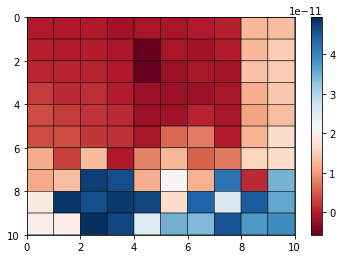

accuracy is 74.000000 lamba is 2.494990
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  7e+00  1e+00
 1:  1.7063e+02 -1.9259e+04  2e+04  2e-02  5e+00  2e+00
 2:  4.2402e+02 -1.5874e+04  2e+04  1e-02  4e+00  3e+00
 3:  6.3904e+02 -8.3853e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.4612e+02 -7.5052e+02  1e+03  8e-04  3e-01  3e-01
 5:  2.2125e+01 -9.8628e+00  3e+01  3e-05  8e-03  2e-02
 6:  2.2125e-01 -9.8681e-02  3e-01  3e-07  8e-05  2e-04
 7:  2.2123e-03 -9.8675e-04  3e-03  3e-09  8e-07  2e-06
 8:  2.2123e-05 -9.8675e-06  3e-05  3e-11  8e-09  2e-08
 9:  2.2123e-07 -9.8675e-08  3e-07  3e-13  8e-11  2e-10
10:  2.2123e-09 -9.8675e-10  3e-09  3e-15  2e-12  2e-12
Optimal solution found.


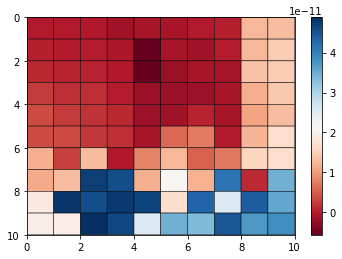

accuracy is 74.000000 lamba is 2.505010
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  7e+00  1e+00
 1:  1.7091e+02 -1.9253e+04  2e+04  2e-02  5e+00  2e+00
 2:  4.2475e+02 -1.5876e+04  2e+04  1e-02  4e+00  3e+00
 3:  6.4062e+02 -8.3887e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.4635e+02 -7.5121e+02  1e+03  8e-04  3e-01  3e-01
 5:  2.2129e+01 -9.8308e+00  3e+01  3e-05  8e-03  2e-02
 6:  2.2128e-01 -9.8362e-02  3e-01  3e-07  8e-05  2e-04
 7:  2.2127e-03 -9.8356e-04  3e-03  3e-09  8e-07  2e-06
 8:  2.2127e-05 -9.8356e-06  3e-05  3e-11  8e-09  2e-08
 9:  2.2127e-07 -9.8356e-08  3e-07  3e-13  8e-11  2e-10
10:  2.2127e-09 -9.8356e-10  3e-09  3e-15  1e-12  2e-12
Optimal solution found.


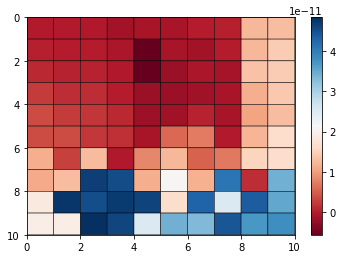

accuracy is 74.000000 lamba is 2.515030
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  7e+00  1e+00
 1:  1.7118e+02 -1.9246e+04  2e+04  2e-02  5e+00  2e+00
 2:  4.2549e+02 -1.5878e+04  2e+04  1e-02  4e+00  3e+00
 3:  6.4220e+02 -8.3920e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.4657e+02 -7.5186e+02  1e+03  8e-04  3e-01  3e-01
 5:  2.2132e+01 -9.7983e+00  3e+01  3e-05  8e-03  2e-02
 6:  2.2131e-01 -9.8038e-02  3e-01  3e-07  8e-05  2e-04
 7:  2.2130e-03 -9.8032e-04  3e-03  3e-09  8e-07  2e-06
 8:  2.2130e-05 -9.8032e-06  3e-05  3e-11  8e-09  2e-08
 9:  2.2130e-07 -9.8032e-08  3e-07  3e-13  8e-11  2e-10
10:  2.2130e-09 -9.8032e-10  3e-09  3e-15  1e-12  2e-12
Optimal solution found.


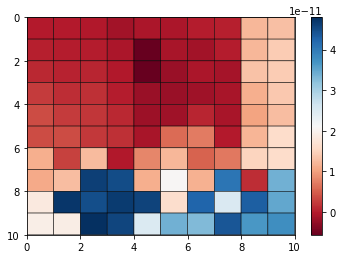

accuracy is 74.000000 lamba is 2.525050
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  7e+00  1e+00
 1:  1.7146e+02 -1.9240e+04  2e+04  2e-02  5e+00  2e+00
 2:  4.2622e+02 -1.5880e+04  2e+04  1e-02  4e+00  3e+00
 3:  6.4377e+02 -8.3952e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.4679e+02 -7.5246e+02  1e+03  8e-04  3e-01  3e-01
 5:  2.2134e+01 -9.7654e+00  3e+01  3e-05  8e-03  2e-02
 6:  2.2133e-01 -9.7710e-02  3e-01  3e-07  8e-05  2e-04
 7:  2.2132e-03 -9.7704e-04  3e-03  3e-09  8e-07  2e-06
 8:  2.2132e-05 -9.7704e-06  3e-05  3e-11  8e-09  2e-08
 9:  2.2132e-07 -9.7704e-08  3e-07  3e-13  8e-11  2e-10
10:  2.2132e-09 -9.7704e-10  3e-09  3e-15  2e-12  2e-12
Optimal solution found.


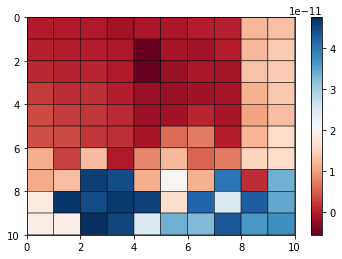

accuracy is 74.000000 lamba is 2.535070
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  7e+00  1e+00
 1:  1.7173e+02 -1.9234e+04  2e+04  2e-02  5e+00  2e+00
 2:  4.2695e+02 -1.5882e+04  2e+04  1e-02  4e+00  3e+00
 3:  6.4534e+02 -8.3982e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.4701e+02 -7.5301e+02  1e+03  8e-04  3e-01  3e-01
 5:  2.2135e+01 -9.7321e+00  3e+01  3e-05  8e-03  2e-02
 6:  2.2135e-01 -9.7377e-02  3e-01  3e-07  8e-05  2e-04
 7:  2.2134e-03 -9.7372e-04  3e-03  3e-09  8e-07  2e-06
 8:  2.2134e-05 -9.7372e-06  3e-05  3e-11  8e-09  2e-08
 9:  2.2134e-07 -9.7372e-08  3e-07  3e-13  8e-11  2e-10
10:  2.2134e-09 -9.7372e-10  3e-09  3e-15  1e-12  2e-12
Optimal solution found.


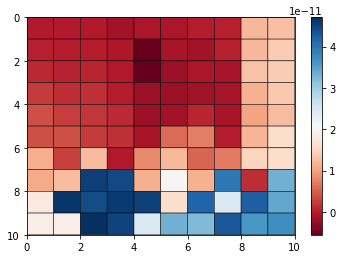

accuracy is 74.000000 lamba is 2.545090
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  7e+00  1e+00
 1:  1.7200e+02 -1.9227e+04  2e+04  2e-02  5e+00  2e+00
 2:  4.2767e+02 -1.5884e+04  2e+04  1e-02  4e+00  3e+00
 3:  6.4690e+02 -8.4012e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.4722e+02 -7.5352e+02  1e+03  8e-04  3e-01  3e-01
 5:  2.2136e+01 -9.6984e+00  3e+01  3e-05  8e-03  2e-02
 6:  2.2136e-01 -9.7041e-02  3e-01  3e-07  8e-05  2e-04
 7:  2.2134e-03 -9.7035e-04  3e-03  3e-09  8e-07  2e-06
 8:  2.2134e-05 -9.7035e-06  3e-05  3e-11  8e-09  2e-08
 9:  2.2134e-07 -9.7035e-08  3e-07  3e-13  8e-11  2e-10
10:  2.2134e-09 -9.7035e-10  3e-09  3e-15  2e-12  2e-12
Optimal solution found.


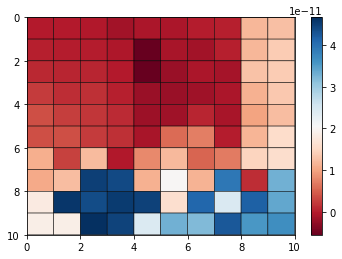

accuracy is 74.000000 lamba is 2.555110
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  7e+00  1e+00
 1:  1.7227e+02 -1.9221e+04  2e+04  2e-02  5e+00  2e+00
 2:  4.2840e+02 -1.5886e+04  2e+04  1e-02  4e+00  3e+00
 3:  6.4846e+02 -8.4040e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.4743e+02 -7.5398e+02  1e+03  8e-04  3e-01  3e-01
 5:  2.2136e+01 -9.6643e+00  3e+01  3e-05  8e-03  2e-02
 6:  2.2135e-01 -9.6699e-02  3e-01  3e-07  8e-05  2e-04
 7:  2.2134e-03 -9.6694e-04  3e-03  3e-09  8e-07  2e-06
 8:  2.2134e-05 -9.6694e-06  3e-05  3e-11  8e-09  2e-08
 9:  2.2134e-07 -9.6694e-08  3e-07  3e-13  8e-11  2e-10
10:  2.2134e-09 -9.6694e-10  3e-09  3e-15  8e-13  2e-12
Optimal solution found.


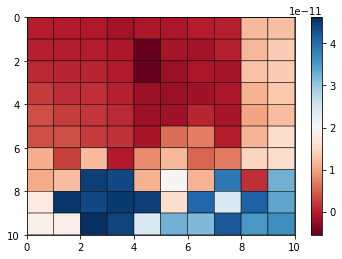

accuracy is 74.000000 lamba is 2.565130
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  7e+00  1e+00
 1:  1.7254e+02 -1.9215e+04  2e+04  2e-02  5e+00  2e+00
 2:  4.2911e+02 -1.5888e+04  2e+04  1e-02  4e+00  3e+00
 3:  6.5002e+02 -8.4067e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.4763e+02 -7.5439e+02  1e+03  8e-04  3e-01  3e-01
 5:  2.2136e+01 -9.6298e+00  3e+01  3e-05  8e-03  2e-02
 6:  2.2135e-01 -9.6354e-02  3e-01  3e-07  8e-05  2e-04
 7:  2.2133e-03 -9.6349e-04  3e-03  3e-09  8e-07  2e-06
 8:  2.2133e-05 -9.6349e-06  3e-05  3e-11  8e-09  2e-08
 9:  2.2133e-07 -9.6349e-08  3e-07  3e-13  8e-11  2e-10
10:  2.2133e-09 -9.6349e-10  3e-09  3e-15  1e-12  2e-12
Optimal solution found.


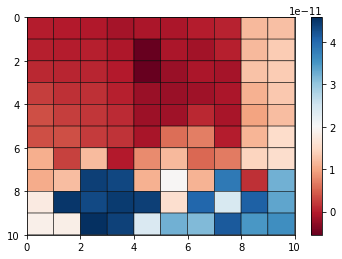

accuracy is 74.000000 lamba is 2.575150
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  7e+00  1e+00
 1:  1.7281e+02 -1.9208e+04  2e+04  2e-02  5e+00  2e+00
 2:  4.2983e+02 -1.5890e+04  2e+04  1e-02  4e+00  3e+00
 3:  6.5157e+02 -8.4094e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.4782e+02 -7.5476e+02  1e+03  8e-04  3e-01  3e-01
 5:  2.2134e+01 -9.5949e+00  3e+01  3e-05  8e-03  2e-02
 6:  2.2133e-01 -9.6005e-02  3e-01  3e-07  8e-05  2e-04
 7:  2.2132e-03 -9.5999e-04  3e-03  3e-09  8e-07  2e-06
 8:  2.2132e-05 -9.5999e-06  3e-05  3e-11  8e-09  2e-08
 9:  2.2132e-07 -9.5999e-08  3e-07  3e-13  8e-11  2e-10
10:  2.2132e-09 -9.5999e-10  3e-09  3e-15  2e-12  2e-12
Optimal solution found.


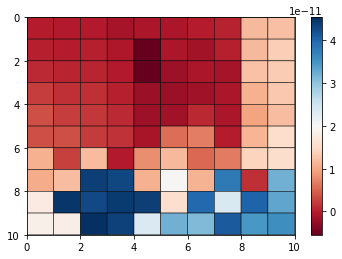

accuracy is 75.000000 lamba is 2.585170
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  7e+00  1e+00
 1:  1.7308e+02 -1.9202e+04  2e+04  2e-02  5e+00  2e+00
 2:  4.3054e+02 -1.5892e+04  2e+04  1e-02  4e+00  3e+00
 3:  6.5311e+02 -8.4119e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.4802e+02 -7.5508e+02  1e+03  8e-04  3e-01  3e-01
 5:  2.2132e+01 -9.5596e+00  3e+01  3e-05  8e-03  2e-02
 6:  2.2130e-01 -9.5652e-02  3e-01  3e-07  8e-05  2e-04
 7:  2.2129e-03 -9.5646e-04  3e-03  3e-09  8e-07  2e-06
 8:  2.2129e-05 -9.5646e-06  3e-05  3e-11  8e-09  2e-08
 9:  2.2129e-07 -9.5646e-08  3e-07  3e-13  8e-11  2e-10
10:  2.2129e-09 -9.5646e-10  3e-09  3e-15  2e-12  2e-12
Optimal solution found.


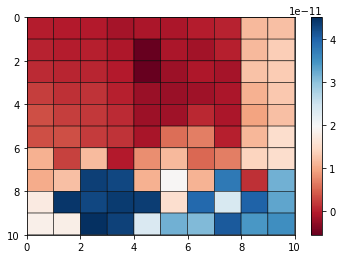

accuracy is 75.000000 lamba is 2.595190
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  7e+00  1e+00
 1:  1.7334e+02 -1.9196e+04  2e+04  2e-02  5e+00  2e+00
 2:  4.3125e+02 -1.5894e+04  2e+04  1e-02  4e+00  3e+00
 3:  6.5465e+02 -8.4143e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.4821e+02 -7.5536e+02  1e+03  8e-04  3e-01  3e-01
 5:  2.2129e+01 -9.5240e+00  3e+01  3e-05  8e-03  2e-02
 6:  2.2127e-01 -9.5295e-02  3e-01  3e-07  8e-05  2e-04
 7:  2.2126e-03 -9.5290e-04  3e-03  3e-09  8e-07  2e-06
 8:  2.2126e-05 -9.5290e-06  3e-05  3e-11  8e-09  2e-08
 9:  2.2126e-07 -9.5290e-08  3e-07  3e-13  8e-11  2e-10
10:  2.2126e-09 -9.5290e-10  3e-09  3e-15  9e-13  2e-12
Optimal solution found.


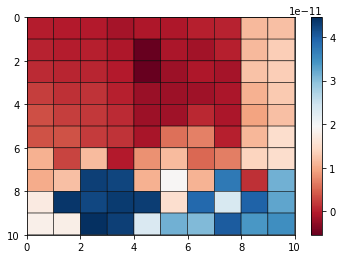

accuracy is 75.000000 lamba is 2.605210
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  7e+00  1e+00
 1:  1.7361e+02 -1.9189e+04  2e+04  2e-02  5e+00  2e+00
 2:  4.3195e+02 -1.5896e+04  2e+04  1e-02  4e+00  3e+00
 3:  6.5619e+02 -8.4166e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.4839e+02 -7.5560e+02  1e+03  8e-04  3e-01  3e-01
 5:  2.2125e+01 -9.4880e+00  3e+01  3e-05  8e-03  3e-02
 6:  2.2123e-01 -9.4934e-02  3e-01  3e-07  8e-05  3e-04
 7:  2.2122e-03 -9.4929e-04  3e-03  3e-09  8e-07  3e-06
 8:  2.2122e-05 -9.4929e-06  3e-05  3e-11  8e-09  3e-08
 9:  2.2122e-07 -9.4929e-08  3e-07  3e-13  8e-11  3e-10
10:  2.2122e-09 -9.4929e-10  3e-09  2e-15  2e-12  3e-12
Optimal solution found.


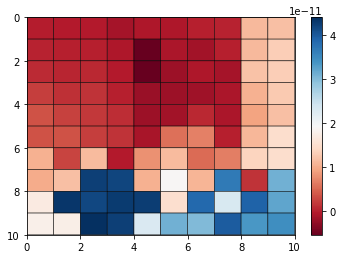

accuracy is 75.000000 lamba is 2.615230
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  7e+00  1e+00
 1:  1.7387e+02 -1.9183e+04  2e+04  2e-02  5e+00  2e+00
 2:  4.3266e+02 -1.5898e+04  2e+04  1e-02  4e+00  3e+00
 3:  6.5772e+02 -8.4188e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.4859e+02 -7.5616e+02  1e+03  8e-04  3e-01  3e-01
 5:  2.2130e+01 -9.4587e+00  3e+01  3e-05  8e-03  3e-02
 6:  2.2128e-01 -9.4641e-02  3e-01  3e-07  8e-05  3e-04
 7:  2.2127e-03 -9.4635e-04  3e-03  3e-09  8e-07  3e-06
 8:  2.2127e-05 -9.4635e-06  3e-05  3e-11  8e-09  3e-08
 9:  2.2127e-07 -9.4635e-08  3e-07  3e-13  8e-11  3e-10
10:  2.2127e-09 -9.4635e-10  3e-09  2e-15  2e-12  3e-12
Optimal solution found.


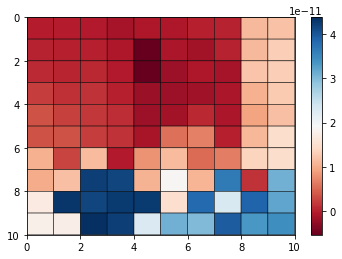

accuracy is 75.000000 lamba is 2.625251
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  7e+00  1e+00
 1:  1.7414e+02 -1.9176e+04  2e+04  2e-02  5e+00  2e+00
 2:  4.3336e+02 -1.5900e+04  2e+04  1e-02  4e+00  3e+00
 3:  6.5925e+02 -8.4209e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.4882e+02 -7.5719e+02  1e+03  8e-04  3e-01  3e-01
 5:  2.2148e+01 -9.4384e+00  3e+01  3e-05  8e-03  3e-02
 6:  2.2146e-01 -9.4438e-02  3e-01  3e-07  8e-05  3e-04
 7:  2.2145e-03 -9.4433e-04  3e-03  3e-09  8e-07  3e-06
 8:  2.2145e-05 -9.4432e-06  3e-05  3e-11  8e-09  3e-08
 9:  2.2145e-07 -9.4432e-08  3e-07  3e-13  8e-11  3e-10
10:  2.2145e-09 -9.4432e-10  3e-09  3e-15  9e-13  3e-12
Optimal solution found.


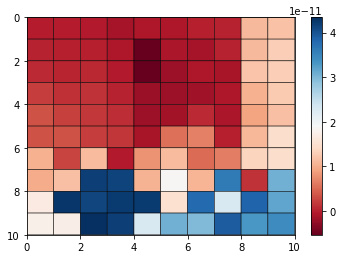

accuracy is 75.000000 lamba is 2.635271
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  7e+00  1e+00
 1:  1.7440e+02 -1.9170e+04  2e+04  2e-02  5e+00  2e+00
 2:  4.3405e+02 -1.5901e+04  2e+04  1e-02  4e+00  3e+00
 3:  6.6077e+02 -8.4229e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.4904e+02 -7.5817e+02  1e+03  8e-04  3e-01  3e-01
 5:  2.2165e+01 -9.4177e+00  3e+01  3e-05  8e-03  3e-02
 6:  2.2163e-01 -9.4230e-02  3e-01  3e-07  8e-05  3e-04
 7:  2.2161e-03 -9.4225e-04  3e-03  3e-09  8e-07  3e-06
 8:  2.2161e-05 -9.4225e-06  3e-05  3e-11  8e-09  3e-08
 9:  2.2161e-07 -9.4225e-08  3e-07  3e-13  8e-11  3e-10
10:  2.2161e-09 -9.4225e-10  3e-09  2e-15  1e-12  3e-12
Optimal solution found.


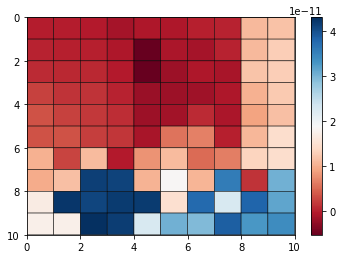

accuracy is 74.000000 lamba is 2.645291
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  7e+00  1e+00
 1:  1.7466e+02 -1.9164e+04  2e+04  2e-02  5e+00  2e+00
 2:  4.3475e+02 -1.5903e+04  2e+04  1e-02  4e+00  3e+00
 3:  6.6229e+02 -8.4248e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.4925e+02 -7.5911e+02  1e+03  8e-04  3e-01  3e-01
 5:  2.2181e+01 -9.3965e+00  3e+01  3e-05  8e-03  3e-02
 6:  2.2178e-01 -9.4017e-02  3e-01  3e-07  8e-05  3e-04
 7:  2.2177e-03 -9.4012e-04  3e-03  3e-09  8e-07  3e-06
 8:  2.2177e-05 -9.4012e-06  3e-05  3e-11  8e-09  3e-08
 9:  2.2177e-07 -9.4012e-08  3e-07  3e-13  8e-11  3e-10
10:  2.2177e-09 -9.4012e-10  3e-09  3e-15  2e-12  3e-12
Optimal solution found.


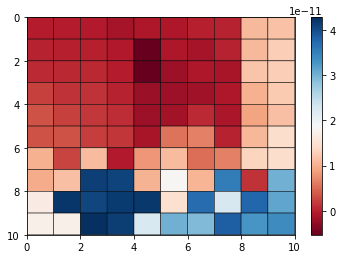

accuracy is 74.000000 lamba is 2.655311
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  7e+00  1e+00
 1:  1.7492e+02 -1.9157e+04  2e+04  2e-02  5e+00  2e+00
 2:  4.3543e+02 -1.5905e+04  2e+04  1e-02  4e+00  3e+00
 3:  6.6380e+02 -8.4266e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.4949e+02 -7.5963e+02  1e+03  8e-04  3e-01  3e-01
 5:  2.2183e+01 -9.3689e+00  3e+01  3e-05  8e-03  3e-02
 6:  2.2180e-01 -9.3741e-02  3e-01  3e-07  8e-05  3e-04
 7:  2.2179e-03 -9.3735e-04  3e-03  3e-09  8e-07  3e-06
 8:  2.2179e-05 -9.3735e-06  3e-05  3e-11  8e-09  3e-08
 9:  2.2179e-07 -9.3735e-08  3e-07  3e-13  8e-11  3e-10
10:  2.2179e-09 -9.3735e-10  3e-09  3e-15  1e-12  3e-12
Optimal solution found.


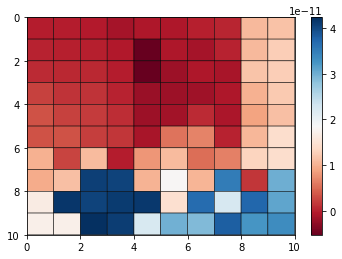

accuracy is 74.000000 lamba is 2.665331
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  7e+00  1e+00
 1:  1.7518e+02 -1.9151e+04  2e+04  2e-02  5e+00  2e+00
 2:  4.3612e+02 -1.5907e+04  2e+04  1e-02  4e+00  3e+00
 3:  6.6531e+02 -8.4283e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.4973e+02 -7.5988e+02  1e+03  8e-04  3e-01  3e-01
 5:  2.2177e+01 -9.3374e+00  3e+01  3e-05  8e-03  3e-02
 6:  2.2173e-01 -9.3425e-02  3e-01  3e-07  8e-05  3e-04
 7:  2.2172e-03 -9.3419e-04  3e-03  3e-09  8e-07  3e-06
 8:  2.2172e-05 -9.3419e-06  3e-05  3e-11  8e-09  3e-08
 9:  2.2172e-07 -9.3419e-08  3e-07  3e-13  8e-11  3e-10
10:  2.2172e-09 -9.3419e-10  3e-09  3e-15  2e-12  3e-12
Optimal solution found.


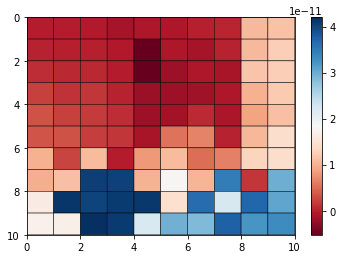

accuracy is 75.000000 lamba is 2.675351
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  7e+00  1e+00
 1:  1.7544e+02 -1.9144e+04  2e+04  2e-02  5e+00  2e+00
 2:  4.3681e+02 -1.5908e+04  2e+04  1e-02  4e+00  3e+00
 3:  6.6682e+02 -8.4299e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.4998e+02 -7.6010e+02  1e+03  8e-04  3e-01  3e-01
 5:  2.2169e+01 -9.3059e+00  3e+01  3e-05  8e-03  3e-02
 6:  2.2165e-01 -9.3108e-02  3e-01  3e-07  8e-05  3e-04
 7:  2.2164e-03 -9.3103e-04  3e-03  3e-09  8e-07  3e-06
 8:  2.2164e-05 -9.3103e-06  3e-05  3e-11  8e-09  3e-08
 9:  2.2164e-07 -9.3103e-08  3e-07  3e-13  8e-11  3e-10
10:  2.2164e-09 -9.3103e-10  3e-09  2e-15  1e-12  3e-12
Optimal solution found.


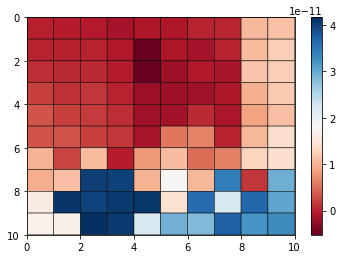

accuracy is 75.000000 lamba is 2.685371
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  7e+00  1e+00
 1:  1.7570e+02 -1.9138e+04  2e+04  2e-02  5e+00  2e+00
 2:  4.3749e+02 -1.5910e+04  2e+04  1e-02  4e+00  3e+00
 3:  6.6832e+02 -8.4314e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.5021e+02 -7.6030e+02  1e+03  8e-04  3e-01  3e-01
 5:  2.2162e+01 -9.2743e+00  3e+01  3e-05  8e-03  3e-02
 6:  2.2157e-01 -9.2790e-02  3e-01  3e-07  8e-05  3e-04
 7:  2.2156e-03 -9.2785e-04  3e-03  3e-09  8e-07  3e-06
 8:  2.2156e-05 -9.2785e-06  3e-05  3e-11  8e-09  3e-08
 9:  2.2156e-07 -9.2785e-08  3e-07  3e-13  8e-11  3e-10
10:  2.2156e-09 -9.2785e-10  3e-09  3e-15  1e-12  3e-12
Optimal solution found.


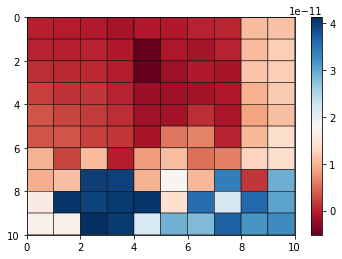

accuracy is 75.000000 lamba is 2.695391
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  7e+00  1e+00
 1:  1.7596e+02 -1.9131e+04  2e+04  2e-02  5e+00  2e+00
 2:  4.3816e+02 -1.5912e+04  2e+04  1e-02  4e+00  3e+00
 3:  6.6981e+02 -8.4328e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.5045e+02 -7.6047e+02  1e+03  8e-04  3e-01  3e-01
 5:  2.2153e+01 -9.2426e+00  3e+01  3e-05  8e-03  3e-02
 6:  2.2149e-01 -9.2472e-02  3e-01  3e-07  8e-05  3e-04
 7:  2.2147e-03 -9.2467e-04  3e-03  3e-09  8e-07  3e-06
 8:  2.2147e-05 -9.2467e-06  3e-05  3e-11  8e-09  3e-08
 9:  2.2147e-07 -9.2467e-08  3e-07  3e-13  8e-11  3e-10
10:  2.2147e-09 -9.2467e-10  3e-09  3e-15  8e-13  3e-12
Optimal solution found.


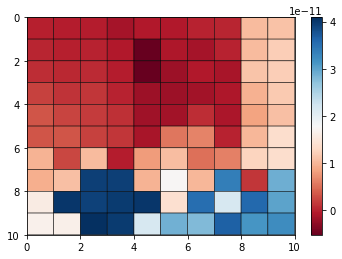

accuracy is 75.000000 lamba is 2.705411
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  7e+00  1e+00
 1:  1.7622e+02 -1.9125e+04  2e+04  2e-02  5e+00  2e+00
 2:  4.3884e+02 -1.5913e+04  2e+04  1e-02  4e+00  3e+00
 3:  6.7131e+02 -8.4341e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.5067e+02 -7.6061e+02  1e+03  8e-04  2e-01  3e-01
 5:  2.2145e+01 -9.2109e+00  3e+01  3e-05  8e-03  3e-02
 6:  2.2139e-01 -9.2153e-02  3e-01  3e-07  8e-05  3e-04
 7:  2.2138e-03 -9.2148e-04  3e-03  3e-09  8e-07  3e-06
 8:  2.2138e-05 -9.2148e-06  3e-05  3e-11  8e-09  3e-08
 9:  2.2138e-07 -9.2148e-08  3e-07  3e-13  8e-11  3e-10
10:  2.2138e-09 -9.2148e-10  3e-09  3e-15  1e-12  3e-12
Optimal solution found.


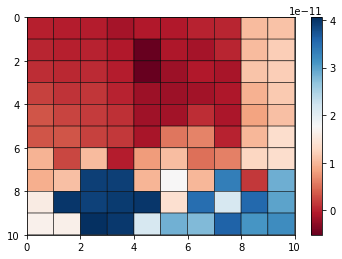

accuracy is 75.000000 lamba is 2.715431
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  7e+00  1e+00
 1:  1.7647e+02 -1.9118e+04  2e+04  2e-02  5e+00  2e+00
 2:  4.3951e+02 -1.5915e+04  2e+04  1e-02  4e+00  3e+00
 3:  6.7279e+02 -8.4353e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.5090e+02 -7.6072e+02  1e+03  8e-04  2e-01  3e-01
 5:  2.2135e+01 -9.1791e+00  3e+01  3e-05  8e-03  3e-02
 6:  2.2130e-01 -9.1833e-02  3e-01  3e-07  8e-05  3e-04
 7:  2.2129e-03 -9.1828e-04  3e-03  3e-09  8e-07  3e-06
 8:  2.2129e-05 -9.1828e-06  3e-05  3e-11  8e-09  3e-08
 9:  2.2129e-07 -9.1828e-08  3e-07  3e-13  8e-11  3e-10
10:  2.2129e-09 -9.1828e-10  3e-09  3e-15  1e-12  3e-12
Optimal solution found.


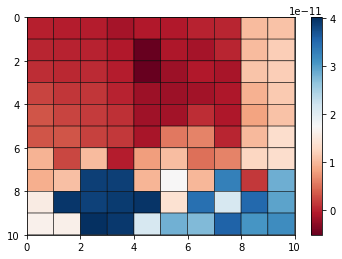

accuracy is 75.000000 lamba is 2.725451
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  7e+00  1e+00
 1:  1.7673e+02 -1.9112e+04  2e+04  2e-02  5e+00  2e+00
 2:  4.4018e+02 -1.5916e+04  2e+04  1e-02  4e+00  3e+00
 3:  6.7428e+02 -8.4364e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.5111e+02 -7.6081e+02  1e+03  8e-04  2e-01  3e-01
 5:  2.2126e+01 -9.1472e+00  3e+01  3e-05  8e-03  3e-02
 6:  2.2120e-01 -9.1512e-02  3e-01  3e-07  8e-05  3e-04
 7:  2.2118e-03 -9.1507e-04  3e-03  3e-09  8e-07  3e-06
 8:  2.2118e-05 -9.1507e-06  3e-05  3e-11  8e-09  3e-08
 9:  2.2118e-07 -9.1507e-08  3e-07  3e-13  8e-11  3e-10
10:  2.2118e-09 -9.1507e-10  3e-09  3e-15  1e-12  3e-12
Optimal solution found.


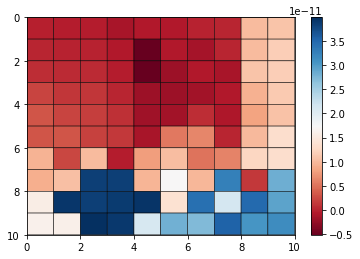

accuracy is 75.000000 lamba is 2.735471
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  7e+00  1e+00
 1:  1.7698e+02 -1.9105e+04  2e+04  2e-02  5e+00  2e+00
 2:  4.4084e+02 -1.5918e+04  2e+04  1e-02  4e+00  3e+00
 3:  6.7576e+02 -8.4374e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.5133e+02 -7.6087e+02  1e+03  8e-04  2e-01  3e-01
 5:  2.2115e+01 -9.1153e+00  3e+01  2e-05  8e-03  3e-02
 6:  2.2109e-01 -9.1191e-02  3e-01  2e-07  8e-05  3e-04
 7:  2.2108e-03 -9.1186e-04  3e-03  2e-09  8e-07  3e-06
 8:  2.2108e-05 -9.1186e-06  3e-05  2e-11  8e-09  3e-08
 9:  2.2108e-07 -9.1186e-08  3e-07  3e-13  8e-11  3e-10
10:  2.2108e-09 -9.1186e-10  3e-09  2e-15  1e-12  3e-12
Optimal solution found.


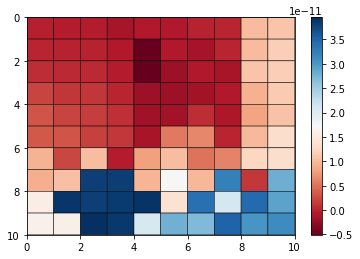

accuracy is 75.000000 lamba is 2.745491
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  7e+00  1e+00
 1:  1.7724e+02 -1.9099e+04  2e+04  2e-02  5e+00  2e+00
 2:  4.4150e+02 -1.5919e+04  2e+04  1e-02  4e+00  3e+00
 3:  6.7723e+02 -8.4384e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.5154e+02 -7.6091e+02  1e+03  8e-04  2e-01  3e-01
 5:  2.2104e+01 -9.0833e+00  3e+01  2e-05  8e-03  3e-02
 6:  2.2098e-01 -9.0870e-02  3e-01  2e-07  8e-05  3e-04
 7:  2.2096e-03 -9.0865e-04  3e-03  2e-09  8e-07  3e-06
 8:  2.2096e-05 -9.0865e-06  3e-05  2e-11  8e-09  3e-08
 9:  2.2096e-07 -9.0865e-08  3e-07  2e-13  8e-11  3e-10
10:  2.2096e-09 -9.0865e-10  3e-09  3e-15  1e-12  3e-12
Optimal solution found.


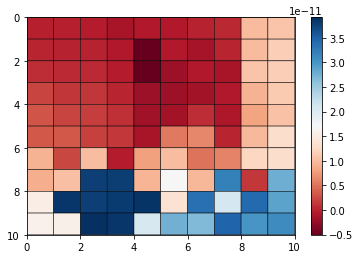

accuracy is 75.000000 lamba is 2.755511
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  7e+00  1e+00
 1:  1.7749e+02 -1.9092e+04  2e+04  2e-02  5e+00  2e+00
 2:  4.4216e+02 -1.5921e+04  2e+04  1e-02  4e+00  3e+00
 3:  6.7870e+02 -8.4392e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.5174e+02 -7.6092e+02  1e+03  8e-04  2e-01  3e-01
 5:  2.2093e+01 -9.0512e+00  3e+01  2e-05  8e-03  3e-02
 6:  2.2086e-01 -9.0547e-02  3e-01  2e-07  8e-05  3e-04
 7:  2.2085e-03 -9.0543e-04  3e-03  2e-09  8e-07  3e-06
 8:  2.2085e-05 -9.0543e-06  3e-05  2e-11  8e-09  3e-08
 9:  2.2085e-07 -9.0543e-08  3e-07  2e-13  8e-11  3e-10
10:  2.2085e-09 -9.0543e-10  3e-09  3e-15  1e-12  3e-12
Optimal solution found.


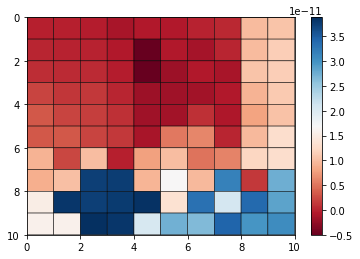

accuracy is 75.000000 lamba is 2.765531
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  7e+00  1e+00
 1:  1.7774e+02 -1.9086e+04  2e+04  2e-02  5e+00  2e+00
 2:  4.4282e+02 -1.5922e+04  2e+04  1e-02  4e+00  3e+00
 3:  6.8017e+02 -8.4399e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.5197e+02 -7.6144e+02  1e+03  8e-04  2e-01  3e-01
 5:  2.2095e+01 -9.0288e+00  3e+01  2e-05  8e-03  3e-02
 6:  2.2087e-01 -9.0321e-02  3e-01  2e-07  8e-05  3e-04
 7:  2.2086e-03 -9.0317e-04  3e-03  2e-09  8e-07  3e-06
 8:  2.2086e-05 -9.0317e-06  3e-05  2e-11  8e-09  3e-08
 9:  2.2086e-07 -9.0317e-08  3e-07  2e-13  8e-11  3e-10
10:  2.2086e-09 -9.0317e-10  3e-09  3e-15  1e-12  3e-12
Optimal solution found.


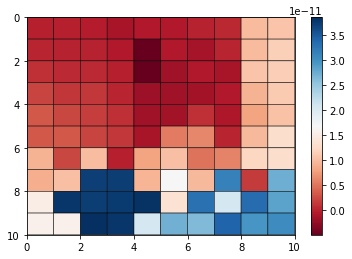

accuracy is 75.000000 lamba is 2.775551
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  7e+00  1e+00
 1:  1.7799e+02 -1.9079e+04  2e+04  2e-02  5e+00  2e+00
 2:  4.4347e+02 -1.5924e+04  2e+04  1e-02  4e+00  3e+00
 3:  6.8163e+02 -8.4406e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.5259e+02 -7.6437e+02  1e+03  8e-04  2e-01  3e-01
 5:  2.2136e+01 -9.0547e+00  3e+01  2e-05  8e-03  3e-02
 6:  2.2129e-01 -9.0581e-02  3e-01  2e-07  8e-05  3e-04
 7:  2.2127e-03 -9.0576e-04  3e-03  2e-09  8e-07  3e-06
 8:  2.2127e-05 -9.0576e-06  3e-05  2e-11  8e-09  3e-08
 9:  2.2127e-07 -9.0576e-08  3e-07  2e-13  8e-11  3e-10
10:  2.2127e-09 -9.0576e-10  3e-09  3e-15  2e-12  3e-12
Optimal solution found.


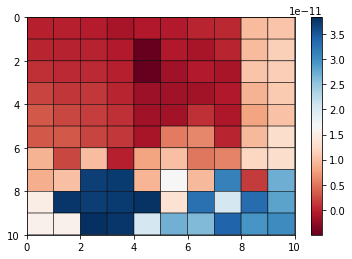

accuracy is 75.000000 lamba is 2.785571
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  7e+00  1e+00
 1:  1.7824e+02 -1.9073e+04  2e+04  2e-02  5e+00  2e+00
 2:  4.4412e+02 -1.5925e+04  2e+04  1e-02  4e+00  3e+00
 3:  6.8309e+02 -8.4411e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.5320e+02 -7.6723e+02  1e+03  8e-04  2e-01  3e-01
 5:  2.2175e+01 -9.0798e+00  3e+01  3e-05  8e-03  3e-02
 6:  2.2168e-01 -9.0831e-02  3e-01  3e-07  8e-05  3e-04
 7:  2.2166e-03 -9.0826e-04  3e-03  3e-09  8e-07  3e-06
 8:  2.2166e-05 -9.0826e-06  3e-05  3e-11  8e-09  3e-08
 9:  2.2166e-07 -9.0826e-08  3e-07  3e-13  8e-11  3e-10
10:  2.2166e-09 -9.0826e-10  3e-09  2e-15  9e-13  3e-12
Optimal solution found.


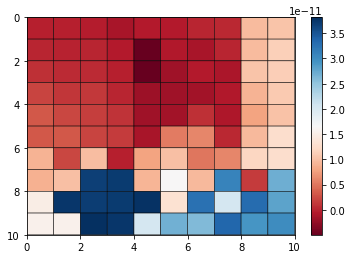

accuracy is 76.000000 lamba is 2.795591
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  7e+00  1e+00
 1:  1.7849e+02 -1.9066e+04  2e+04  2e-02  5e+00  2e+00
 2:  4.4477e+02 -1.5927e+04  2e+04  1e-02  4e+00  3e+00
 3:  6.8455e+02 -8.4416e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.5381e+02 -7.7004e+02  1e+03  8e-04  2e-01  3e-01
 5:  2.2212e+01 -9.1039e+00  3e+01  3e-05  8e-03  3e-02
 6:  2.2204e-01 -9.1072e-02  3e-01  3e-07  8e-05  3e-04
 7:  2.2203e-03 -9.1067e-04  3e-03  3e-09  8e-07  3e-06
 8:  2.2203e-05 -9.1067e-06  3e-05  3e-11  8e-09  3e-08
 9:  2.2203e-07 -9.1067e-08  3e-07  3e-13  8e-11  3e-10
10:  2.2203e-09 -9.1067e-10  3e-09  3e-15  1e-12  3e-12
Optimal solution found.


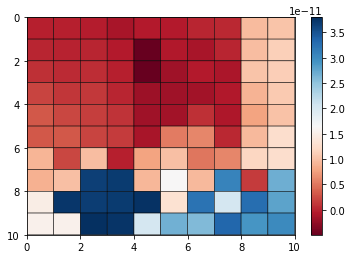

accuracy is 76.000000 lamba is 2.805611
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  7e+00  1e+00
 1:  1.7874e+02 -1.9060e+04  2e+04  2e-02  5e+00  2e+00
 2:  4.4541e+02 -1.5928e+04  2e+04  1e-02  4e+00  3e+00
 3:  6.8600e+02 -8.4420e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.5440e+02 -7.7279e+02  1e+03  8e-04  2e-01  3e-01
 5:  2.2247e+01 -9.1271e+00  3e+01  3e-05  7e-03  3e-02
 6:  2.2239e-01 -9.1304e-02  3e-01  3e-07  7e-05  3e-04
 7:  2.2238e-03 -9.1299e-04  3e-03  3e-09  7e-07  3e-06
 8:  2.2238e-05 -9.1299e-06  3e-05  3e-11  7e-09  3e-08
 9:  2.2238e-07 -9.1299e-08  3e-07  3e-13  8e-11  3e-10
10:  2.2238e-09 -9.1299e-10  3e-09  3e-15  2e-12  3e-12
Optimal solution found.


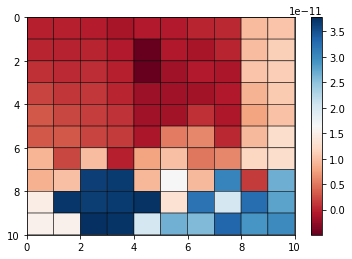

accuracy is 76.000000 lamba is 2.815631
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  7e+00  1e+00
 1:  1.7899e+02 -1.9053e+04  2e+04  2e-02  5e+00  2e+00
 2:  4.4606e+02 -1.5929e+04  2e+04  1e-02  4e+00  3e+00
 3:  6.8744e+02 -8.4423e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.5500e+02 -7.7547e+02  1e+03  8e-04  2e-01  3e-01
 5:  2.2279e+01 -9.1495e+00  3e+01  3e-05  7e-03  3e-02
 6:  2.2271e-01 -9.1527e-02  3e-01  3e-07  7e-05  3e-04
 7:  2.2270e-03 -9.1523e-04  3e-03  3e-09  7e-07  3e-06
 8:  2.2270e-05 -9.1522e-06  3e-05  3e-11  7e-09  3e-08
 9:  2.2270e-07 -9.1522e-08  3e-07  3e-13  7e-11  3e-10
10:  2.2270e-09 -9.1522e-10  3e-09  3e-15  1e-12  3e-12
Optimal solution found.


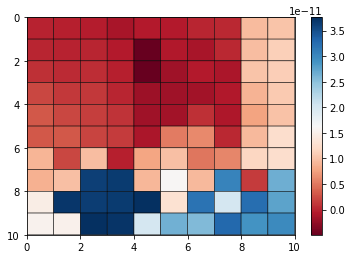

accuracy is 76.000000 lamba is 2.825651
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  7e+00  1e+00
 1:  1.7923e+02 -1.9047e+04  2e+04  2e-02  5e+00  2e+00
 2:  4.4669e+02 -1.5931e+04  2e+04  1e-02  4e+00  3e+00
 3:  6.8889e+02 -8.4425e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.5559e+02 -7.7810e+02  1e+03  8e-04  2e-01  3e-01
 5:  2.2309e+01 -9.1710e+00  3e+01  3e-05  7e-03  3e-02
 6:  2.2301e-01 -9.1742e-02  3e-01  3e-07  7e-05  3e-04
 7:  2.2300e-03 -9.1737e-04  3e-03  3e-09  7e-07  3e-06
 8:  2.2300e-05 -9.1737e-06  3e-05  3e-11  7e-09  3e-08
 9:  2.2300e-07 -9.1737e-08  3e-07  3e-13  7e-11  3e-10
10:  2.2300e-09 -9.1737e-10  3e-09  3e-15  1e-12  3e-12
Optimal solution found.


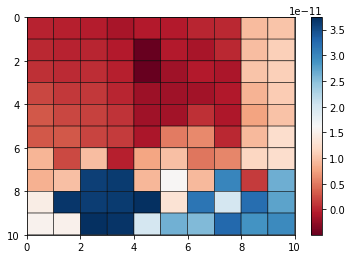

accuracy is 76.000000 lamba is 2.835671
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  7e+00  1e+00
 1:  1.7948e+02 -1.9040e+04  2e+04  2e-02  5e+00  2e+00
 2:  4.4733e+02 -1.5932e+04  2e+04  1e-02  4e+00  3e+00
 3:  6.9033e+02 -8.4426e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.5617e+02 -7.8067e+02  1e+03  8e-04  2e-01  3e-01
 5:  2.2337e+01 -9.1916e+00  3e+01  3e-05  7e-03  3e-02
 6:  2.2329e-01 -9.1948e-02  3e-01  3e-07  7e-05  3e-04
 7:  2.2328e-03 -9.1943e-04  3e-03  3e-09  7e-07  3e-06
 8:  2.2328e-05 -9.1943e-06  3e-05  3e-11  7e-09  3e-08
 9:  2.2328e-07 -9.1943e-08  3e-07  3e-13  7e-11  3e-10
10:  2.2328e-09 -9.1943e-10  3e-09  3e-15  3e-12  3e-12
Optimal solution found.


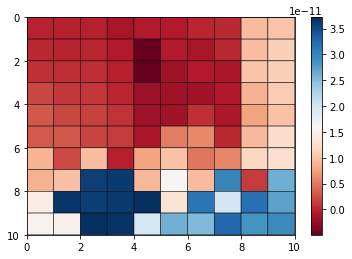

accuracy is 76.000000 lamba is 2.845691
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  7e+00  1e+00
 1:  1.7972e+02 -1.9033e+04  2e+04  2e-02  5e+00  2e+00
 2:  4.4796e+02 -1.5933e+04  2e+04  1e-02  4e+00  3e+00
 3:  6.9176e+02 -8.4426e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.5675e+02 -7.8318e+02  1e+03  8e-04  2e-01  3e-01
 5:  2.2363e+01 -9.2115e+00  3e+01  3e-05  7e-03  3e-02
 6:  2.2355e-01 -9.2145e-02  3e-01  3e-07  7e-05  3e-04
 7:  2.2354e-03 -9.2141e-04  3e-03  3e-09  7e-07  3e-06
 8:  2.2354e-05 -9.2141e-06  3e-05  3e-11  7e-09  3e-08
 9:  2.2354e-07 -9.2141e-08  3e-07  3e-13  7e-11  3e-10
10:  2.2354e-09 -9.2141e-10  3e-09  3e-15  9e-13  3e-12
Optimal solution found.


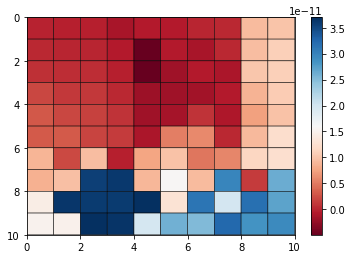

accuracy is 76.000000 lamba is 2.855711
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  7e+00  1e+00
 1:  1.7997e+02 -1.9027e+04  2e+04  2e-02  5e+00  2e+00
 2:  4.4859e+02 -1.5934e+04  2e+04  1e-02  4e+00  3e+00
 3:  6.9319e+02 -8.4425e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.5732e+02 -7.8564e+02  1e+03  8e-04  2e-01  3e-01
 5:  2.2387e+01 -9.2304e+00  3e+01  3e-05  7e-03  3e-02
 6:  2.2378e-01 -9.2334e-02  3e-01  3e-07  7e-05  3e-04
 7:  2.2377e-03 -9.2330e-04  3e-03  3e-09  7e-07  3e-06
 8:  2.2377e-05 -9.2330e-06  3e-05  3e-11  7e-09  3e-08
 9:  2.2377e-07 -9.2330e-08  3e-07  3e-13  7e-11  3e-10
10:  2.2377e-09 -9.2330e-10  3e-09  3e-15  1e-12  3e-12
Optimal solution found.


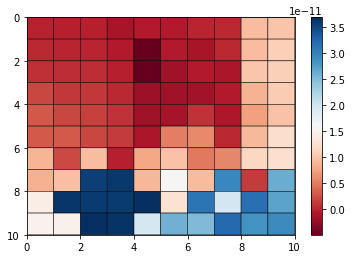

accuracy is 76.000000 lamba is 2.865731
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  7e+00  1e+00
 1:  1.8021e+02 -1.9020e+04  2e+04  2e-02  4e+00  2e+00
 2:  4.4922e+02 -1.5936e+04  2e+04  1e-02  4e+00  3e+00
 3:  6.9462e+02 -8.4424e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.5789e+02 -7.8804e+02  1e+03  8e-04  2e-01  3e-01
 5:  2.2408e+01 -9.2486e+00  3e+01  3e-05  7e-03  3e-02
 6:  2.2399e-01 -9.2515e-02  3e-01  3e-07  7e-05  3e-04
 7:  2.2398e-03 -9.2511e-04  3e-03  3e-09  7e-07  3e-06
 8:  2.2398e-05 -9.2511e-06  3e-05  3e-11  7e-09  3e-08
 9:  2.2398e-07 -9.2511e-08  3e-07  3e-13  7e-11  3e-10
10:  2.2398e-09 -9.2511e-10  3e-09  3e-15  1e-12  3e-12
Optimal solution found.


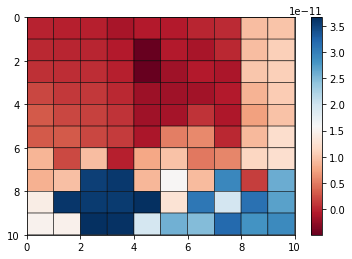

accuracy is 76.000000 lamba is 2.875752
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  7e+00  1e+00
 1:  1.8046e+02 -1.9014e+04  2e+04  2e-02  4e+00  2e+00
 2:  4.4984e+02 -1.5937e+04  2e+04  1e-02  4e+00  3e+00
 3:  6.9604e+02 -8.4422e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.5845e+02 -7.9038e+02  1e+03  8e-04  2e-01  3e-01
 5:  2.2427e+01 -9.2660e+00  3e+01  3e-05  7e-03  3e-02
 6:  2.2419e-01 -9.2688e-02  3e-01  3e-07  7e-05  3e-04
 7:  2.2417e-03 -9.2684e-04  3e-03  3e-09  7e-07  3e-06
 8:  2.2417e-05 -9.2684e-06  3e-05  3e-11  7e-09  3e-08
 9:  2.2417e-07 -9.2684e-08  3e-07  3e-13  7e-11  3e-10
10:  2.2417e-09 -9.2684e-10  3e-09  3e-15  1e-12  3e-12
Optimal solution found.


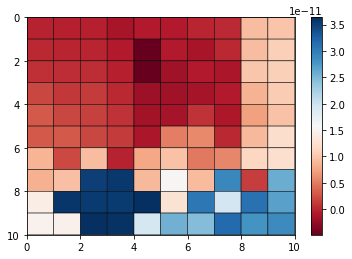

accuracy is 76.000000 lamba is 2.885772
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  7e+00  1e+00
 1:  1.8070e+02 -1.9007e+04  2e+04  2e-02  4e+00  2e+00
 2:  4.5046e+02 -1.5938e+04  2e+04  1e-02  4e+00  3e+00
 3:  6.9746e+02 -8.4418e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.5900e+02 -7.9266e+02  1e+03  8e-04  2e-01  3e-01
 5:  2.2445e+01 -9.2826e+00  3e+01  3e-05  7e-03  3e-02
 6:  2.2436e-01 -9.2853e-02  3e-01  3e-07  7e-05  3e-04
 7:  2.2435e-03 -9.2849e-04  3e-03  3e-09  7e-07  3e-06
 8:  2.2435e-05 -9.2849e-06  3e-05  3e-11  7e-09  3e-08
 9:  2.2435e-07 -9.2849e-08  3e-07  3e-13  7e-11  3e-10
10:  2.2435e-09 -9.2849e-10  3e-09  3e-15  1e-12  3e-12
Optimal solution found.


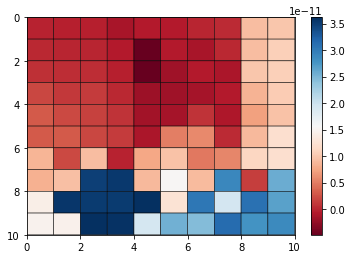

accuracy is 76.000000 lamba is 2.895792
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  6e+00  1e+00
 1:  1.8094e+02 -1.9000e+04  2e+04  2e-02  4e+00  2e+00
 2:  4.5108e+02 -1.5939e+04  2e+04  1e-02  4e+00  3e+00
 3:  6.9887e+02 -8.4414e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.5955e+02 -7.9489e+02  1e+03  8e-04  2e-01  3e-01
 5:  2.2460e+01 -9.2984e+00  3e+01  3e-05  7e-03  3e-02
 6:  2.2451e-01 -9.3010e-02  3e-01  3e-07  7e-05  3e-04
 7:  2.2450e-03 -9.3006e-04  3e-03  3e-09  7e-07  3e-06
 8:  2.2450e-05 -9.3006e-06  3e-05  3e-11  7e-09  3e-08
 9:  2.2450e-07 -9.3006e-08  3e-07  3e-13  7e-11  3e-10
10:  2.2450e-09 -9.3006e-10  3e-09  3e-15  1e-12  3e-12
Optimal solution found.


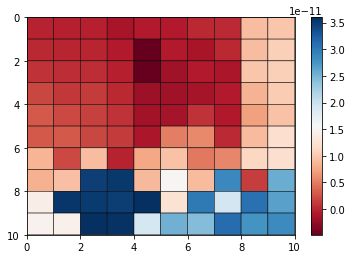

accuracy is 76.000000 lamba is 2.905812
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  6e+00  1e+00
 1:  1.8118e+02 -1.8994e+04  2e+04  2e-02  4e+00  2e+00
 2:  4.5170e+02 -1.5940e+04  2e+04  1e-02  4e+00  3e+00
 3:  7.0029e+02 -8.4409e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.6010e+02 -7.9706e+02  1e+03  8e-04  2e-01  3e-01
 5:  2.2473e+01 -9.3134e+00  3e+01  3e-05  7e-03  3e-02
 6:  2.2464e-01 -9.3159e-02  3e-01  3e-07  7e-05  3e-04
 7:  2.2462e-03 -9.3155e-04  3e-03  3e-09  7e-07  3e-06
 8:  2.2462e-05 -9.3155e-06  3e-05  3e-11  7e-09  3e-08
 9:  2.2462e-07 -9.3155e-08  3e-07  3e-13  7e-11  3e-10
10:  2.2462e-09 -9.3155e-10  3e-09  3e-15  1e-12  3e-12
Optimal solution found.


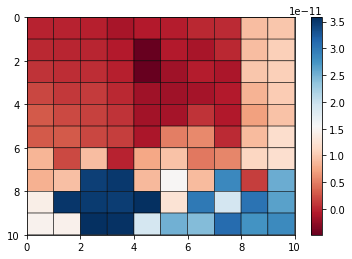

accuracy is 76.000000 lamba is 2.915832
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  6e+00  1e+00
 1:  1.8142e+02 -1.8987e+04  2e+04  2e-02  4e+00  2e+00
 2:  4.5231e+02 -1.5941e+04  2e+04  1e-02  4e+00  3e+00
 3:  7.0169e+02 -8.4404e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.6064e+02 -7.9918e+02  1e+03  8e-04  2e-01  3e-01
 5:  2.2484e+01 -9.3276e+00  3e+01  3e-05  7e-03  3e-02
 6:  2.2474e-01 -9.3301e-02  3e-01  3e-07  7e-05  3e-04
 7:  2.2473e-03 -9.3296e-04  3e-03  3e-09  7e-07  3e-06
 8:  2.2473e-05 -9.3296e-06  3e-05  3e-11  7e-09  3e-08
 9:  2.2473e-07 -9.3296e-08  3e-07  3e-13  7e-11  3e-10
10:  2.2473e-09 -9.3296e-10  3e-09  3e-15  1e-12  3e-12
Optimal solution found.


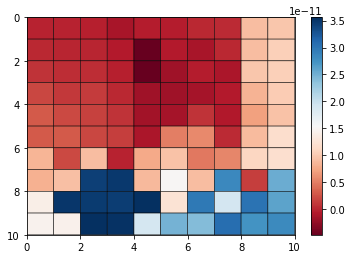

accuracy is 76.000000 lamba is 2.925852
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  6e+00  1e+00
 1:  1.8166e+02 -1.8980e+04  2e+04  2e-02  4e+00  2e+00
 2:  4.5292e+02 -1.5943e+04  2e+04  1e-02  4e+00  3e+00
 3:  7.0310e+02 -8.4397e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.6117e+02 -8.0124e+02  1e+03  9e-04  2e-01  3e-01
 5:  2.2493e+01 -9.3412e+00  3e+01  3e-05  7e-03  3e-02
 6:  2.2483e-01 -9.3435e-02  3e-01  3e-07  7e-05  3e-04
 7:  2.2482e-03 -9.3431e-04  3e-03  3e-09  7e-07  3e-06
 8:  2.2482e-05 -9.3430e-06  3e-05  3e-11  7e-09  3e-08
 9:  2.2482e-07 -9.3430e-08  3e-07  3e-13  7e-11  3e-10
10:  2.2482e-09 -9.3430e-10  3e-09  3e-15  1e-12  3e-12
Optimal solution found.


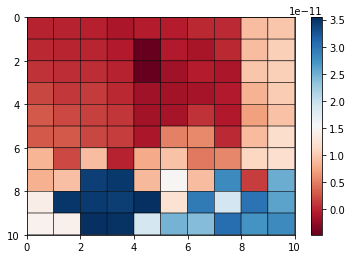

accuracy is 76.000000 lamba is 2.935872
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  6e+00  1e+00
 1:  1.8190e+02 -1.8974e+04  2e+04  2e-02  4e+00  2e+00
 2:  4.5353e+02 -1.5944e+04  2e+04  1e-02  4e+00  3e+00
 3:  7.0450e+02 -8.4390e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.6170e+02 -8.0325e+02  1e+03  9e-04  2e-01  3e-01
 5:  2.2500e+01 -9.3539e+00  3e+01  3e-05  7e-03  3e-02
 6:  2.2490e-01 -9.3562e-02  3e-01  3e-07  7e-05  3e-04
 7:  2.2489e-03 -9.3557e-04  3e-03  3e-09  7e-07  3e-06
 8:  2.2489e-05 -9.3557e-06  3e-05  3e-11  7e-09  3e-08
 9:  2.2489e-07 -9.3557e-08  3e-07  3e-13  7e-11  3e-10
10:  2.2489e-09 -9.3557e-10  3e-09  3e-15  2e-12  3e-12
Optimal solution found.


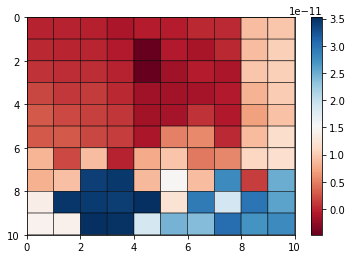

accuracy is 76.000000 lamba is 2.945892
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  6e+00  1e+00
 1:  1.8213e+02 -1.8967e+04  2e+04  2e-02  4e+00  2e+00
 2:  4.5413e+02 -1.5945e+04  2e+04  1e-02  4e+00  3e+00
 3:  7.0589e+02 -8.4382e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.6223e+02 -8.0521e+02  1e+03  9e-04  2e-01  3e-01
 5:  2.2505e+01 -9.3660e+00  3e+01  3e-05  7e-03  3e-02
 6:  2.2495e-01 -9.3681e-02  3e-01  3e-07  7e-05  3e-04
 7:  2.2494e-03 -9.3676e-04  3e-03  3e-09  7e-07  3e-06
 8:  2.2494e-05 -9.3676e-06  3e-05  3e-11  7e-09  3e-08
 9:  2.2494e-07 -9.3676e-08  3e-07  3e-13  7e-11  3e-10
10:  2.2494e-09 -9.3676e-10  3e-09  3e-15  1e-12  3e-12
Optimal solution found.


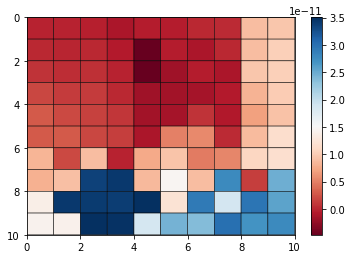

accuracy is 76.000000 lamba is 2.955912
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  6e+00  1e+00
 1:  1.8237e+02 -1.8960e+04  2e+04  2e-02  4e+00  2e+00
 2:  4.5473e+02 -1.5946e+04  2e+04  1e-02  4e+00  3e+00
 3:  7.0728e+02 -8.4373e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.6274e+02 -8.0711e+02  1e+03  9e-04  2e-01  3e-01
 5:  2.2509e+01 -9.3773e+00  3e+01  3e-05  7e-03  3e-02
 6:  2.2498e-01 -9.3793e-02  3e-01  3e-07  7e-05  3e-04
 7:  2.2497e-03 -9.3788e-04  3e-03  3e-09  7e-07  3e-06
 8:  2.2497e-05 -9.3788e-06  3e-05  3e-11  7e-09  3e-08
 9:  2.2497e-07 -9.3788e-08  3e-07  3e-13  7e-11  3e-10
10:  2.2497e-09 -9.3788e-10  3e-09  3e-15  1e-12  3e-12
Optimal solution found.


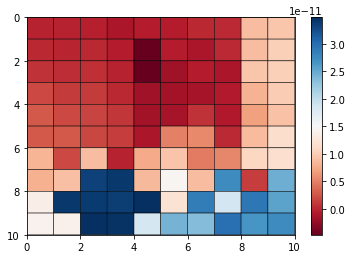

accuracy is 76.000000 lamba is 2.965932
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  6e+00  1e+00
 1:  1.8261e+02 -1.8954e+04  2e+04  2e-02  4e+00  2e+00
 2:  4.5533e+02 -1.5947e+04  2e+04  1e-02  4e+00  3e+00
 3:  7.0867e+02 -8.4363e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.6326e+02 -8.0896e+02  1e+03  9e-04  2e-01  3e-01
 5:  2.2510e+01 -9.3879e+00  3e+01  3e-05  7e-03  3e-02
 6:  2.2499e-01 -9.3898e-02  3e-01  3e-07  7e-05  3e-04
 7:  2.2498e-03 -9.3893e-04  3e-03  3e-09  7e-07  3e-06
 8:  2.2498e-05 -9.3893e-06  3e-05  3e-11  7e-09  3e-08
 9:  2.2498e-07 -9.3893e-08  3e-07  3e-13  7e-11  3e-10
10:  2.2498e-09 -9.3893e-10  3e-09  3e-15  9e-13  3e-12
Optimal solution found.


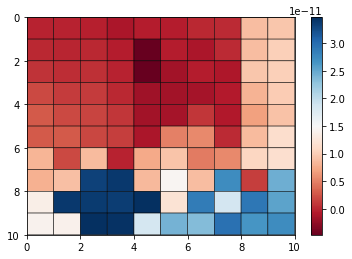

accuracy is 76.000000 lamba is 2.975952
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  6e+00  1e+00
 1:  1.8284e+02 -1.8947e+04  2e+04  2e-02  4e+00  2e+00
 2:  4.5593e+02 -1.5948e+04  2e+04  1e-02  4e+00  3e+00
 3:  7.1006e+02 -8.4352e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.6377e+02 -8.1076e+02  1e+03  9e-04  2e-01  3e-01
 5:  2.2509e+01 -9.3978e+00  3e+01  3e-05  7e-03  3e-02
 6:  2.2498e-01 -9.3996e-02  3e-01  3e-07  7e-05  3e-04
 7:  2.2497e-03 -9.3991e-04  3e-03  3e-09  7e-07  3e-06
 8:  2.2497e-05 -9.3991e-06  3e-05  3e-11  7e-09  3e-08
 9:  2.2497e-07 -9.3991e-08  3e-07  3e-13  7e-11  3e-10
10:  2.2497e-09 -9.3991e-10  3e-09  3e-15  1e-12  3e-12
Optimal solution found.


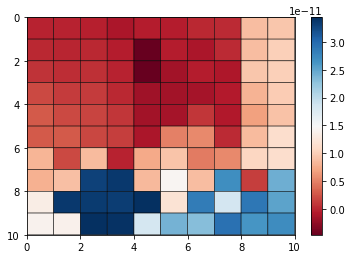

accuracy is 76.000000 lamba is 2.985972
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  6e+00  1e+00
 1:  1.8308e+02 -1.8940e+04  2e+04  2e-02  4e+00  2e+00
 2:  4.5652e+02 -1.5949e+04  2e+04  1e-02  4e+00  3e+00
 3:  7.1144e+02 -8.4341e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.6427e+02 -8.1251e+02  1e+03  9e-04  2e-01  3e-01
 5:  2.2507e+01 -9.4071e+00  3e+01  3e-05  7e-03  3e-02
 6:  2.2495e-01 -9.4087e-02  3e-01  3e-07  7e-05  3e-04
 7:  2.2494e-03 -9.4082e-04  3e-03  3e-09  7e-07  3e-06
 8:  2.2494e-05 -9.4082e-06  3e-05  3e-11  7e-09  3e-08
 9:  2.2494e-07 -9.4082e-08  3e-07  3e-13  7e-11  3e-10
10:  2.2494e-09 -9.4082e-10  3e-09  3e-15  1e-12  3e-12
Optimal solution found.


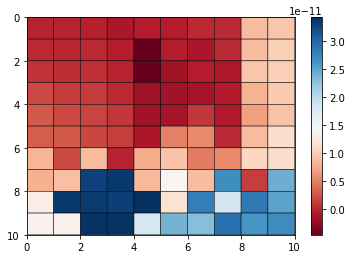

accuracy is 76.000000 lamba is 2.995992
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  6e+00  1e+00
 1:  1.8331e+02 -1.8934e+04  2e+04  2e-02  4e+00  2e+00
 2:  4.5711e+02 -1.5949e+04  2e+04  1e-02  4e+00  3e+00
 3:  7.1282e+02 -8.4329e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.6477e+02 -8.1420e+02  1e+03  9e-04  2e-01  3e-01
 5:  2.2502e+01 -9.4156e+00  3e+01  3e-05  7e-03  3e-02
 6:  2.2490e-01 -9.4171e-02  3e-01  3e-07  7e-05  3e-04
 7:  2.2489e-03 -9.4167e-04  3e-03  3e-09  7e-07  3e-06
 8:  2.2489e-05 -9.4167e-06  3e-05  3e-11  7e-09  3e-08
 9:  2.2489e-07 -9.4167e-08  3e-07  3e-13  7e-11  3e-10
10:  2.2489e-09 -9.4167e-10  3e-09  3e-15  9e-13  3e-12
Optimal solution found.


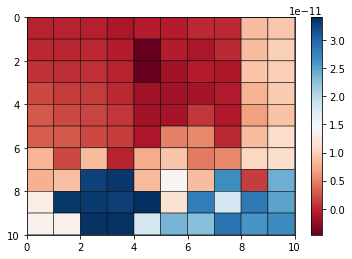

accuracy is 76.000000 lamba is 3.006012
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  6e+00  1e+00
 1:  1.8354e+02 -1.8927e+04  2e+04  2e-02  4e+00  2e+00
 2:  4.5770e+02 -1.5950e+04  2e+04  1e-02  4e+00  3e+00
 3:  7.1419e+02 -8.4316e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.6526e+02 -8.1585e+02  1e+03  9e-04  2e-01  3e-01
 5:  2.2496e+01 -9.4235e+00  3e+01  3e-05  7e-03  3e-02
 6:  2.2484e-01 -9.4248e-02  3e-01  3e-07  7e-05  3e-04
 7:  2.2483e-03 -9.4244e-04  3e-03  3e-09  7e-07  3e-06
 8:  2.2483e-05 -9.4244e-06  3e-05  3e-11  7e-09  3e-08
 9:  2.2483e-07 -9.4244e-08  3e-07  3e-13  7e-11  3e-10
10:  2.2483e-09 -9.4244e-10  3e-09  3e-15  2e-12  3e-12
Optimal solution found.


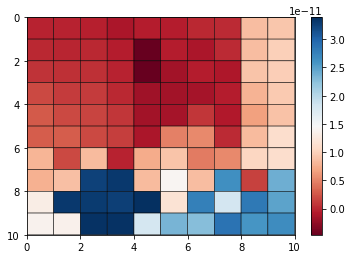

accuracy is 76.000000 lamba is 3.016032
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  6e+00  1e+00
 1:  1.8377e+02 -1.8920e+04  2e+04  2e-02  4e+00  2e+00
 2:  4.5829e+02 -1.5951e+04  2e+04  1e-02  4e+00  3e+00
 3:  7.1556e+02 -8.4302e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.6574e+02 -8.1744e+02  1e+03  9e-04  2e-01  3e-01
 5:  2.2488e+01 -9.4308e+00  3e+01  3e-05  7e-03  3e-02
 6:  2.2476e-01 -9.4319e-02  3e-01  3e-07  7e-05  3e-04
 7:  2.2474e-03 -9.4315e-04  3e-03  3e-09  7e-07  3e-06
 8:  2.2474e-05 -9.4315e-06  3e-05  3e-11  7e-09  3e-08
 9:  2.2474e-07 -9.4315e-08  3e-07  3e-13  7e-11  3e-10
10:  2.2474e-09 -9.4315e-10  3e-09  3e-15  1e-12  3e-12
Optimal solution found.


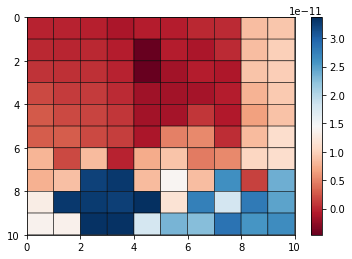

accuracy is 76.000000 lamba is 3.026052
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  6e+00  1e+00
 1:  1.8401e+02 -1.8914e+04  2e+04  2e-02  4e+00  2e+00
 2:  4.5887e+02 -1.5952e+04  2e+04  1e-02  4e+00  3e+00
 3:  7.1693e+02 -8.4288e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.6623e+02 -8.1899e+02  1e+03  9e-04  2e-01  4e-01
 5:  2.2478e+01 -9.4373e+00  3e+01  3e-05  7e-03  3e-02
 6:  2.2465e-01 -9.4384e-02  3e-01  3e-07  7e-05  3e-04
 7:  2.2464e-03 -9.4379e-04  3e-03  3e-09  7e-07  3e-06
 8:  2.2464e-05 -9.4379e-06  3e-05  3e-11  7e-09  3e-08
 9:  2.2464e-07 -9.4379e-08  3e-07  3e-13  7e-11  3e-10
10:  2.2464e-09 -9.4379e-10  3e-09  3e-15  1e-12  3e-12
Optimal solution found.


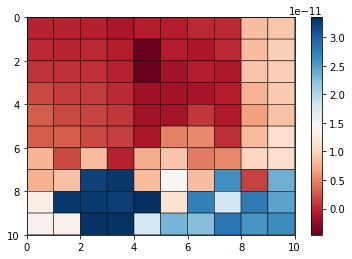

accuracy is 76.000000 lamba is 3.036072
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  6e+00  1e+00
 1:  1.8424e+02 -1.8907e+04  2e+04  2e-02  4e+00  2e+00
 2:  4.5945e+02 -1.5953e+04  2e+04  1e-02  4e+00  3e+00
 3:  7.1829e+02 -8.4272e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.6670e+02 -8.2048e+02  1e+03  9e-04  2e-01  4e-01
 5:  2.2466e+01 -9.4433e+00  3e+01  3e-05  7e-03  3e-02
 6:  2.2453e-01 -9.4442e-02  3e-01  3e-07  7e-05  3e-04
 7:  2.2452e-03 -9.4437e-04  3e-03  3e-09  7e-07  3e-06
 8:  2.2452e-05 -9.4437e-06  3e-05  3e-11  7e-09  3e-08
 9:  2.2452e-07 -9.4437e-08  3e-07  3e-13  7e-11  3e-10
10:  2.2452e-09 -9.4437e-10  3e-09  3e-15  1e-12  3e-12
Optimal solution found.


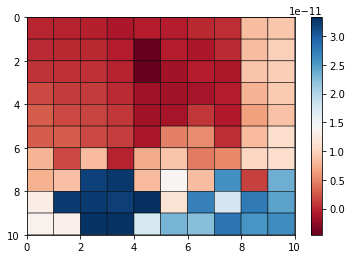

accuracy is 76.000000 lamba is 3.046092
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  6e+00  1e+00
 1:  1.8447e+02 -1.8900e+04  2e+04  2e-02  4e+00  2e+00
 2:  4.6003e+02 -1.5954e+04  2e+04  1e-02  4e+00  3e+00
 3:  7.1965e+02 -8.4256e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.6717e+02 -8.2193e+02  1e+03  9e-04  2e-01  4e-01
 5:  2.2452e+01 -9.4486e+00  3e+01  3e-05  7e-03  3e-02
 6:  2.2439e-01 -9.4493e-02  3e-01  3e-07  7e-05  3e-04
 7:  2.2438e-03 -9.4489e-04  3e-03  3e-09  7e-07  3e-06
 8:  2.2438e-05 -9.4489e-06  3e-05  3e-11  7e-09  3e-08
 9:  2.2438e-07 -9.4489e-08  3e-07  3e-13  7e-11  3e-10
10:  2.2438e-09 -9.4489e-10  3e-09  2e-15  2e-12  3e-12
Optimal solution found.


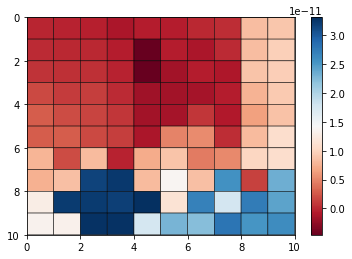

accuracy is 76.000000 lamba is 3.056112
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  6e+00  1e+00
 1:  1.8470e+02 -1.8894e+04  2e+04  2e-02  4e+00  2e+00
 2:  4.6060e+02 -1.5955e+04  2e+04  1e-02  4e+00  3e+00
 3:  7.2101e+02 -8.4240e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.6764e+02 -8.2333e+02  1e+03  9e-04  2e-01  4e-01
 5:  2.2437e+01 -9.4533e+00  3e+01  3e-05  7e-03  3e-02
 6:  2.2424e-01 -9.4539e-02  3e-01  3e-07  7e-05  3e-04
 7:  2.2423e-03 -9.4534e-04  3e-03  3e-09  7e-07  3e-06
 8:  2.2423e-05 -9.4534e-06  3e-05  3e-11  7e-09  3e-08
 9:  2.2423e-07 -9.4534e-08  3e-07  3e-13  7e-11  3e-10
10:  2.2423e-09 -9.4534e-10  3e-09  3e-15  1e-12  3e-12
Optimal solution found.


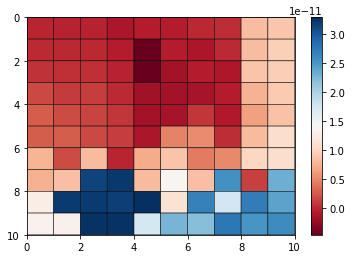

accuracy is 76.000000 lamba is 3.066132
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  6e+00  1e+00
 1:  1.8492e+02 -1.8887e+04  2e+04  2e-02  4e+00  2e+00
 2:  4.6117e+02 -1.5955e+04  2e+04  1e-02  4e+00  3e+00
 3:  7.2236e+02 -8.4222e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.6810e+02 -8.2468e+02  1e+03  9e-04  2e-01  4e-01
 5:  2.2420e+01 -9.4574e+00  3e+01  3e-05  7e-03  3e-02
 6:  2.2407e-01 -9.4578e-02  3e-01  3e-07  7e-05  3e-04
 7:  2.2406e-03 -9.4574e-04  3e-03  3e-09  7e-07  3e-06
 8:  2.2406e-05 -9.4574e-06  3e-05  3e-11  7e-09  3e-08
 9:  2.2406e-07 -9.4574e-08  3e-07  3e-13  7e-11  3e-10
10:  2.2406e-09 -9.4574e-10  3e-09  2e-15  9e-13  3e-12
Optimal solution found.


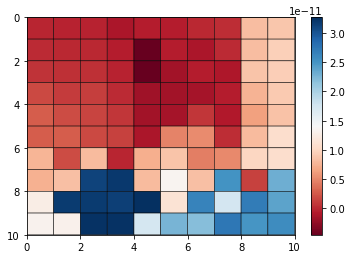

accuracy is 76.000000 lamba is 3.076152
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  6e+00  1e+00
 1:  1.8515e+02 -1.8880e+04  2e+04  2e-02  4e+00  2e+00
 2:  4.6174e+02 -1.5956e+04  2e+04  1e-02  4e+00  3e+00
 3:  7.2371e+02 -8.4204e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.6855e+02 -8.2598e+02  1e+03  9e-04  2e-01  4e-01
 5:  2.2401e+01 -9.4609e+00  3e+01  3e-05  7e-03  3e-02
 6:  2.2388e-01 -9.4611e-02  3e-01  3e-07  7e-05  3e-04
 7:  2.2387e-03 -9.4607e-04  3e-03  3e-09  7e-07  3e-06
 8:  2.2387e-05 -9.4607e-06  3e-05  3e-11  7e-09  3e-08
 9:  2.2387e-07 -9.4607e-08  3e-07  3e-13  7e-11  3e-10
10:  2.2387e-09 -9.4607e-10  3e-09  3e-15  8e-13  3e-12
Optimal solution found.


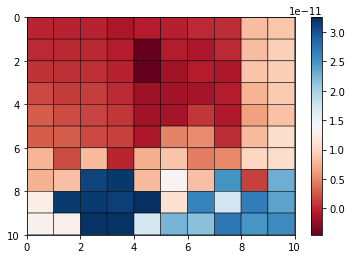

accuracy is 76.000000 lamba is 3.086172
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  6e+00  1e+00
 1:  1.8538e+02 -1.8873e+04  2e+04  2e-02  4e+00  2e+00
 2:  4.6231e+02 -1.5957e+04  2e+04  1e-02  4e+00  3e+00
 3:  7.2505e+02 -8.4185e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.6901e+02 -8.2723e+02  1e+03  9e-04  2e-01  4e-01
 5:  2.2381e+01 -9.4637e+00  3e+01  3e-05  7e-03  3e-02
 6:  2.2367e-01 -9.4638e-02  3e-01  3e-07  7e-05  3e-04
 7:  2.2366e-03 -9.4634e-04  3e-03  3e-09  7e-07  3e-06
 8:  2.2366e-05 -9.4634e-06  3e-05  3e-11  7e-09  3e-08
 9:  2.2366e-07 -9.4634e-08  3e-07  3e-13  7e-11  3e-10
10:  2.2366e-09 -9.4634e-10  3e-09  3e-15  1e-12  3e-12
Optimal solution found.


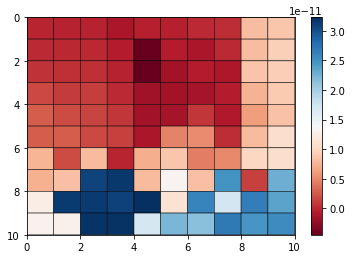

accuracy is 76.000000 lamba is 3.096192
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  6e+00  1e+00
 1:  1.8561e+02 -1.8867e+04  2e+04  2e-02  4e+00  2e+00
 2:  4.6287e+02 -1.5958e+04  2e+04  1e-02  4e+00  3e+00
 3:  7.2639e+02 -8.4165e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.6945e+02 -8.2844e+02  1e+03  9e-04  2e-01  4e-01
 5:  2.2359e+01 -9.4660e+00  3e+01  3e-05  7e-03  3e-02
 6:  2.2345e-01 -9.4660e-02  3e-01  3e-07  7e-05  3e-04
 7:  2.2344e-03 -9.4655e-04  3e-03  3e-09  7e-07  3e-06
 8:  2.2344e-05 -9.4655e-06  3e-05  3e-11  7e-09  3e-08
 9:  2.2344e-07 -9.4655e-08  3e-07  3e-13  7e-11  3e-10
10:  2.2344e-09 -9.4655e-10  3e-09  3e-15  1e-12  3e-12
Optimal solution found.


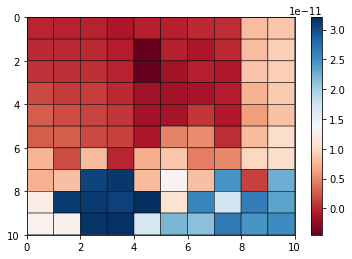

accuracy is 76.000000 lamba is 3.106212
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  6e+00  1e+00
 1:  1.8583e+02 -1.8860e+04  2e+04  2e-02  4e+00  2e+00
 2:  4.6343e+02 -1.5958e+04  2e+04  1e-02  4e+00  3e+00
 3:  7.2773e+02 -8.4145e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.6989e+02 -8.2960e+02  1e+03  9e-04  2e-01  4e-01
 5:  2.2335e+01 -9.4678e+00  3e+01  3e-05  7e-03  3e-02
 6:  2.2321e-01 -9.4675e-02  3e-01  3e-07  7e-05  3e-04
 7:  2.2320e-03 -9.4671e-04  3e-03  3e-09  7e-07  3e-06
 8:  2.2320e-05 -9.4671e-06  3e-05  3e-11  7e-09  3e-08
 9:  2.2320e-07 -9.4671e-08  3e-07  3e-13  7e-11  3e-10
10:  2.2320e-09 -9.4671e-10  3e-09  3e-15  1e-12  3e-12
Optimal solution found.


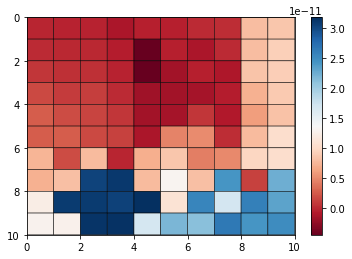

accuracy is 76.000000 lamba is 3.116232
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  6e+00  1e+00
 1:  1.8606e+02 -1.8853e+04  2e+04  2e-02  4e+00  2e+00
 2:  4.6399e+02 -1.5959e+04  2e+04  1e-02  4e+00  3e+00
 3:  7.2907e+02 -8.4123e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.7033e+02 -8.3072e+02  1e+03  9e-04  2e-01  4e-01
 5:  2.2310e+01 -9.4689e+00  3e+01  3e-05  7e-03  3e-02
 6:  2.2295e-01 -9.4685e-02  3e-01  3e-07  7e-05  3e-04
 7:  2.2294e-03 -9.4681e-04  3e-03  3e-09  7e-07  3e-06
 8:  2.2294e-05 -9.4681e-06  3e-05  3e-11  7e-09  3e-08
 9:  2.2294e-07 -9.4681e-08  3e-07  3e-13  7e-11  3e-10
10:  2.2294e-09 -9.4681e-10  3e-09  2e-15  9e-13  3e-12
Optimal solution found.


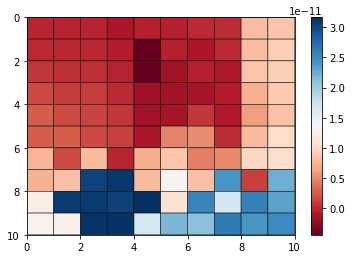

accuracy is 76.000000 lamba is 3.126253
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  6e+00  1e+00
 1:  1.8628e+02 -1.8846e+04  2e+04  2e-02  4e+00  2e+00
 2:  4.6455e+02 -1.5960e+04  2e+04  1e-02  4e+00  3e+00
 3:  7.3040e+02 -8.4101e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.7076e+02 -8.3178e+02  1e+03  9e-04  2e-01  4e-01
 5:  2.2283e+01 -9.4695e+00  3e+01  3e-05  7e-03  3e-02
 6:  2.2268e-01 -9.4689e-02  3e-01  3e-07  7e-05  3e-04
 7:  2.2267e-03 -9.4685e-04  3e-03  3e-09  7e-07  3e-06
 8:  2.2267e-05 -9.4685e-06  3e-05  3e-11  7e-09  3e-08
 9:  2.2267e-07 -9.4685e-08  3e-07  3e-13  7e-11  3e-10
10:  2.2267e-09 -9.4685e-10  3e-09  2e-15  9e-13  3e-12
Optimal solution found.


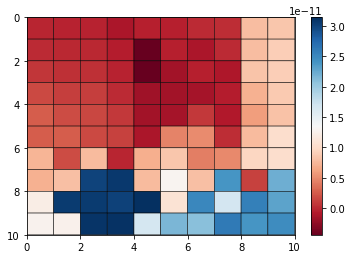

accuracy is 76.000000 lamba is 3.136273
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  6e+00  1e+00
 1:  1.8650e+02 -1.8840e+04  2e+04  2e-02  4e+00  2e+00
 2:  4.6510e+02 -1.5960e+04  2e+04  1e-02  4e+00  3e+00
 3:  7.3172e+02 -8.4079e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.7118e+02 -8.3281e+02  1e+03  9e-04  2e-01  4e-01
 5:  2.2254e+01 -9.4695e+00  3e+01  3e-05  7e-03  3e-02
 6:  2.2239e-01 -9.4688e-02  3e-01  3e-07  7e-05  3e-04
 7:  2.2238e-03 -9.4684e-04  3e-03  3e-09  7e-07  3e-06
 8:  2.2238e-05 -9.4684e-06  3e-05  3e-11  7e-09  3e-08
 9:  2.2238e-07 -9.4684e-08  3e-07  3e-13  7e-11  3e-10
10:  2.2238e-09 -9.4684e-10  3e-09  3e-15  9e-13  3e-12
Optimal solution found.


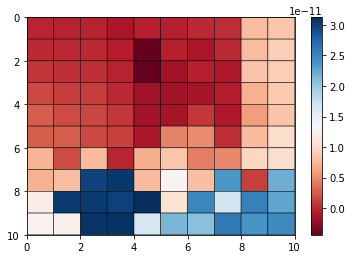

accuracy is 76.000000 lamba is 3.146293
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  6e+00  1e+00
 1:  1.8673e+02 -1.8833e+04  2e+04  2e-02  4e+00  2e+00
 2:  4.6565e+02 -1.5961e+04  2e+04  1e-02  4e+00  3e+00
 3:  7.3305e+02 -8.4055e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.7160e+02 -8.3379e+02  1e+03  9e-04  2e-01  4e-01
 5:  2.2224e+01 -9.4690e+00  3e+01  3e-05  7e-03  3e-02
 6:  2.2208e-01 -9.4681e-02  3e-01  3e-07  7e-05  3e-04
 7:  2.2207e-03 -9.4677e-04  3e-03  3e-09  7e-07  3e-06
 8:  2.2207e-05 -9.4677e-06  3e-05  3e-11  7e-09  3e-08
 9:  2.2207e-07 -9.4677e-08  3e-07  3e-13  7e-11  3e-10
10:  2.2207e-09 -9.4677e-10  3e-09  3e-15  2e-12  3e-12
Optimal solution found.


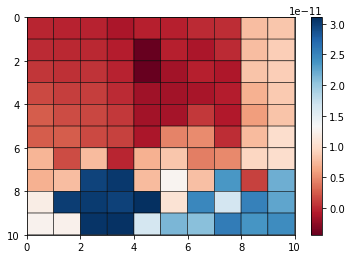

accuracy is 76.000000 lamba is 3.156313
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  6e+00  1e+00
 1:  1.8695e+02 -1.8826e+04  2e+04  2e-02  4e+00  2e+00
 2:  4.6620e+02 -1.5961e+04  2e+04  1e-02  4e+00  3e+00
 3:  7.3437e+02 -8.4031e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.7201e+02 -8.3472e+02  1e+03  9e-04  2e-01  4e-01
 5:  2.2192e+01 -9.4680e+00  3e+01  3e-05  7e-03  3e-02
 6:  2.2176e-01 -9.4669e-02  3e-01  3e-07  7e-05  3e-04
 7:  2.2175e-03 -9.4665e-04  3e-03  3e-09  7e-07  3e-06
 8:  2.2175e-05 -9.4665e-06  3e-05  3e-11  7e-09  3e-08
 9:  2.2175e-07 -9.4665e-08  3e-07  3e-13  7e-11  3e-10
10:  2.2175e-09 -9.4665e-10  3e-09  3e-15  8e-13  3e-12
Optimal solution found.


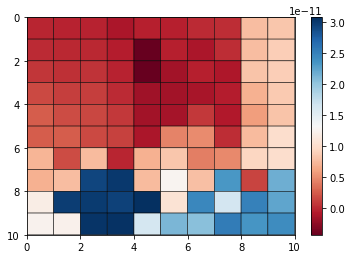

accuracy is 76.000000 lamba is 3.166333
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  6e+00  1e+00
 1:  1.8717e+02 -1.8819e+04  2e+04  2e-02  4e+00  2e+00
 2:  4.6675e+02 -1.5962e+04  2e+04  1e-02  4e+00  3e+00
 3:  7.3569e+02 -8.4007e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.7242e+02 -8.3561e+02  1e+03  9e-04  2e-01  4e-01
 5:  2.2159e+01 -9.4664e+00  3e+01  3e-05  7e-03  3e-02
 6:  2.2143e-01 -9.4652e-02  3e-01  3e-07  7e-05  3e-04
 7:  2.2142e-03 -9.4648e-04  3e-03  3e-09  7e-07  3e-06
 8:  2.2142e-05 -9.4648e-06  3e-05  3e-11  7e-09  3e-08
 9:  2.2142e-07 -9.4648e-08  3e-07  3e-13  7e-11  3e-10
10:  2.2142e-09 -9.4648e-10  3e-09  3e-15  8e-13  3e-12
Optimal solution found.


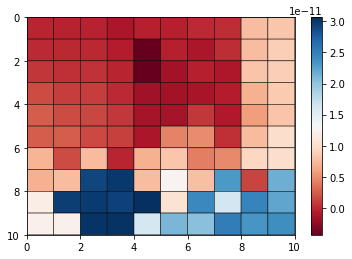

accuracy is 76.000000 lamba is 3.176353
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  6e+00  1e+00
 1:  1.8739e+02 -1.8812e+04  2e+04  2e-02  4e+00  2e+00
 2:  4.6729e+02 -1.5962e+04  2e+04  1e-02  4e+00  3e+00
 3:  7.3700e+02 -8.3981e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.7283e+02 -8.3646e+02  1e+03  9e-04  2e-01  4e-01
 5:  2.2124e+01 -9.4644e+00  3e+01  3e-05  7e-03  3e-02
 6:  2.2108e-01 -9.4630e-02  3e-01  3e-07  7e-05  3e-04
 7:  2.2107e-03 -9.4626e-04  3e-03  3e-09  7e-07  3e-06
 8:  2.2107e-05 -9.4626e-06  3e-05  3e-11  7e-09  3e-08
 9:  2.2107e-07 -9.4626e-08  3e-07  3e-13  7e-11  3e-10
10:  2.2107e-09 -9.4626e-10  3e-09  3e-15  1e-12  3e-12
Optimal solution found.


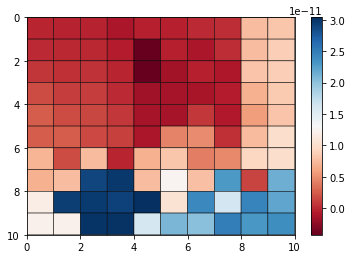

accuracy is 76.000000 lamba is 3.186373
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  6e+00  1e+00
 1:  1.8761e+02 -1.8806e+04  2e+04  2e-02  4e+00  2e+00
 2:  4.6783e+02 -1.5963e+04  2e+04  1e-02  4e+00  3e+00
 3:  7.3831e+02 -8.3955e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.7323e+02 -8.3726e+02  1e+03  9e-04  2e-01  4e-01
 5:  2.2088e+01 -9.4618e+00  3e+01  3e-05  7e-03  3e-02
 6:  2.2071e-01 -9.4602e-02  3e-01  3e-07  7e-05  3e-04
 7:  2.2070e-03 -9.4598e-04  3e-03  3e-09  7e-07  3e-06
 8:  2.2070e-05 -9.4598e-06  3e-05  3e-11  7e-09  3e-08
 9:  2.2070e-07 -9.4598e-08  3e-07  3e-13  7e-11  3e-10
10:  2.2070e-09 -9.4598e-10  3e-09  3e-15  1e-12  3e-12
Optimal solution found.


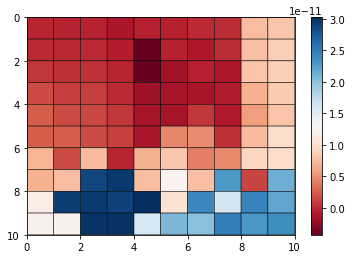

accuracy is 76.000000 lamba is 3.196393
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  6e+00  1e+00
 1:  1.8783e+02 -1.8799e+04  2e+04  2e-02  4e+00  2e+00
 2:  4.6837e+02 -1.5963e+04  2e+04  1e-02  3e+00  3e+00
 3:  7.3962e+02 -8.3928e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.7362e+02 -8.3802e+02  1e+03  9e-04  2e-01  4e-01
 5:  2.2050e+01 -9.4587e+00  3e+01  3e-05  7e-03  3e-02
 6:  2.2033e-01 -9.4569e-02  3e-01  3e-07  7e-05  3e-04
 7:  2.2032e-03 -9.4565e-04  3e-03  3e-09  7e-07  3e-06
 8:  2.2032e-05 -9.4565e-06  3e-05  3e-11  7e-09  3e-08
 9:  2.2032e-07 -9.4565e-08  3e-07  3e-13  7e-11  3e-10
10:  2.2032e-09 -9.4565e-10  3e-09  3e-15  1e-12  3e-12
Optimal solution found.


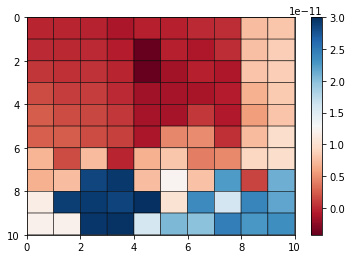

accuracy is 76.000000 lamba is 3.206413
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  6e+00  1e+00
 1:  1.8805e+02 -1.8792e+04  2e+04  2e-02  4e+00  2e+00
 2:  4.6890e+02 -1.5964e+04  2e+04  1e-02  3e+00  3e+00
 3:  7.4092e+02 -8.3900e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.7401e+02 -8.3873e+02  1e+03  9e-04  2e-01  4e-01
 5:  2.2011e+01 -9.4551e+00  3e+01  3e-05  7e-03  3e-02
 6:  2.1994e-01 -9.4532e-02  3e-01  3e-07  7e-05  3e-04
 7:  2.1993e-03 -9.4528e-04  3e-03  3e-09  7e-07  3e-06
 8:  2.1993e-05 -9.4528e-06  3e-05  3e-11  7e-09  3e-08
 9:  2.1993e-07 -9.4528e-08  3e-07  3e-13  7e-11  3e-10
10:  2.1993e-09 -9.4528e-10  3e-09  3e-15  1e-12  3e-12
Optimal solution found.


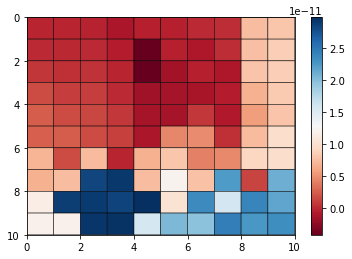

accuracy is 76.000000 lamba is 3.216433
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  6e+00  1e+00
 1:  1.8827e+02 -1.8785e+04  2e+04  2e-02  4e+00  2e+00
 2:  4.6944e+02 -1.5964e+04  2e+04  1e-02  3e+00  3e+00
 3:  7.4222e+02 -8.3872e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.7440e+02 -8.3941e+02  1e+03  9e-04  2e-01  4e-01
 5:  2.1970e+01 -9.4510e+00  3e+01  3e-05  7e-03  3e-02
 6:  2.1953e-01 -9.4489e-02  3e-01  3e-07  7e-05  3e-04
 7:  2.1952e-03 -9.4485e-04  3e-03  3e-09  7e-07  3e-06
 8:  2.1952e-05 -9.4485e-06  3e-05  3e-11  7e-09  3e-08
 9:  2.1952e-07 -9.4485e-08  3e-07  3e-13  7e-11  3e-10
10:  2.1952e-09 -9.4485e-10  3e-09  3e-15  1e-12  3e-12
Optimal solution found.


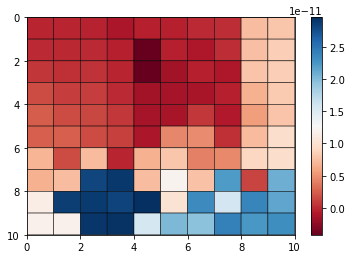

accuracy is 76.000000 lamba is 3.226453
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  6e+00  1e+00
 1:  1.8849e+02 -1.8778e+04  2e+04  2e-02  4e+00  2e+00
 2:  4.6997e+02 -1.5965e+04  2e+04  1e-02  3e+00  3e+00
 3:  7.4352e+02 -8.3843e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.7478e+02 -8.4004e+02  1e+03  9e-04  2e-01  4e-01
 5:  2.1928e+01 -9.4464e+00  3e+01  3e-05  7e-03  3e-02
 6:  2.1910e-01 -9.4442e-02  3e-01  3e-07  7e-05  3e-04
 7:  2.1910e-03 -9.4438e-04  3e-03  3e-09  7e-07  3e-06
 8:  2.1910e-05 -9.4438e-06  3e-05  3e-11  7e-09  3e-08
 9:  2.1910e-07 -9.4438e-08  3e-07  3e-13  7e-11  3e-10
10:  2.1910e-09 -9.4438e-10  3e-09  3e-15  1e-12  3e-12
Optimal solution found.


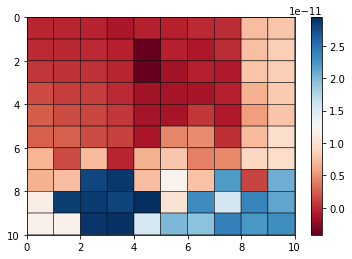

accuracy is 76.000000 lamba is 3.236473
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  6e+00  1e+00
 1:  1.8870e+02 -1.8772e+04  2e+04  2e-02  4e+00  2e+00
 2:  4.7050e+02 -1.5965e+04  2e+04  1e-02  3e+00  3e+00
 3:  7.4482e+02 -8.3814e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.7515e+02 -8.4063e+02  1e+03  9e-04  2e-01  4e-01
 5:  2.1885e+01 -9.4414e+00  3e+01  3e-05  7e-03  3e-02
 6:  2.1867e-01 -9.4390e-02  3e-01  3e-07  7e-05  3e-04
 7:  2.1866e-03 -9.4386e-04  3e-03  3e-09  7e-07  3e-06
 8:  2.1866e-05 -9.4386e-06  3e-05  3e-11  7e-09  3e-08
 9:  2.1866e-07 -9.4386e-08  3e-07  3e-13  7e-11  3e-10
10:  2.1866e-09 -9.4386e-10  3e-09  2e-15  1e-12  3e-12
Optimal solution found.


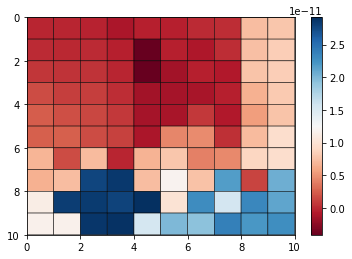

accuracy is 76.000000 lamba is 3.246493
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  6e+00  1e+00
 1:  1.8892e+02 -1.8765e+04  2e+04  2e-02  4e+00  2e+00
 2:  4.7102e+02 -1.5966e+04  2e+04  1e-02  3e+00  3e+00
 3:  7.4611e+02 -8.3783e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.7552e+02 -8.4118e+02  1e+03  9e-04  2e-01  4e-01
 5:  2.1840e+01 -9.4359e+00  3e+01  3e-05  7e-03  3e-02
 6:  2.1822e-01 -9.4333e-02  3e-01  3e-07  7e-05  3e-04
 7:  2.1821e-03 -9.4329e-04  3e-03  3e-09  7e-07  3e-06
 8:  2.1821e-05 -9.4329e-06  3e-05  3e-11  7e-09  3e-08
 9:  2.1821e-07 -9.4329e-08  3e-07  3e-13  7e-11  3e-10
10:  2.1821e-09 -9.4329e-10  3e-09  3e-15  1e-12  3e-12
Optimal solution found.


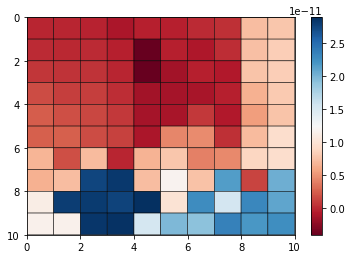

accuracy is 76.000000 lamba is 3.256513
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  6e+00  1e+00
 1:  1.8914e+02 -1.8758e+04  2e+04  2e-02  4e+00  2e+00
 2:  4.7155e+02 -1.5966e+04  2e+04  1e-02  3e+00  3e+00
 3:  7.4739e+02 -8.3752e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.7589e+02 -8.4169e+02  1e+03  9e-04  2e-01  4e-01
 5:  2.1794e+01 -9.4299e+00  3e+01  2e-05  7e-03  3e-02
 6:  2.1775e-01 -9.4272e-02  3e-01  2e-07  7e-05  3e-04
 7:  2.1774e-03 -9.4268e-04  3e-03  2e-09  7e-07  3e-06
 8:  2.1774e-05 -9.4268e-06  3e-05  2e-11  7e-09  3e-08
 9:  2.1774e-07 -9.4268e-08  3e-07  2e-13  7e-11  3e-10
10:  2.1774e-09 -9.4268e-10  3e-09  3e-15  9e-13  3e-12
Optimal solution found.


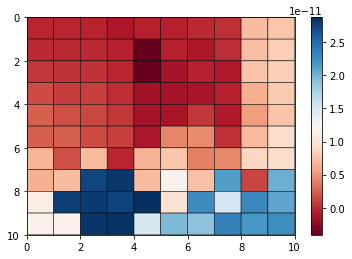

accuracy is 76.000000 lamba is 3.266533
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  6e+00  1e+00
 1:  1.8935e+02 -1.8751e+04  2e+04  2e-02  4e+00  2e+00
 2:  4.7207e+02 -1.5966e+04  2e+04  1e-02  3e+00  3e+00
 3:  7.4868e+02 -8.3721e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.7625e+02 -8.4216e+02  1e+03  9e-04  2e-01  4e-01
 5:  2.1746e+01 -9.4235e+00  3e+01  2e-05  6e-03  3e-02
 6:  2.1727e-01 -9.4206e-02  3e-01  2e-07  6e-05  3e-04
 7:  2.1726e-03 -9.4202e-04  3e-03  2e-09  6e-07  3e-06
 8:  2.1726e-05 -9.4202e-06  3e-05  2e-11  6e-09  3e-08
 9:  2.1726e-07 -9.4202e-08  3e-07  2e-13  7e-11  3e-10
10:  2.1726e-09 -9.4202e-10  3e-09  3e-15  8e-13  3e-12
Optimal solution found.


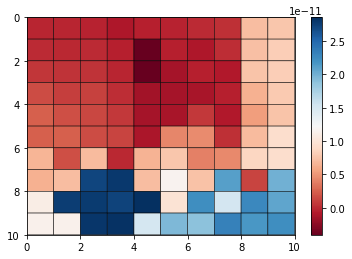

accuracy is 76.000000 lamba is 3.276553
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  6e+00  1e+00
 1:  1.8957e+02 -1.8744e+04  2e+04  2e-02  4e+00  2e+00
 2:  4.7258e+02 -1.5967e+04  2e+04  1e-02  3e+00  3e+00
 3:  7.4996e+02 -8.3689e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.7660e+02 -8.4259e+02  1e+03  9e-04  2e-01  4e-01
 5:  2.1697e+01 -9.4166e+00  3e+01  2e-05  6e-03  3e-02
 6:  2.1678e-01 -9.4136e-02  3e-01  2e-07  6e-05  3e-04
 7:  2.1677e-03 -9.4132e-04  3e-03  2e-09  6e-07  3e-06
 8:  2.1677e-05 -9.4132e-06  3e-05  2e-11  6e-09  3e-08
 9:  2.1677e-07 -9.4132e-08  3e-07  2e-13  6e-11  3e-10
10:  2.1677e-09 -9.4132e-10  3e-09  3e-15  1e-12  3e-12
Optimal solution found.


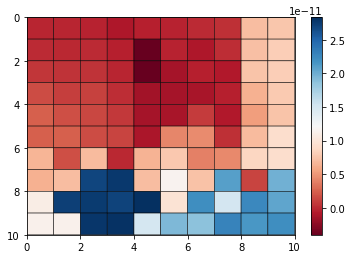

accuracy is 76.000000 lamba is 3.286573
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  6e+00  1e+00
 1:  1.8978e+02 -1.8737e+04  2e+04  2e-02  4e+00  2e+00
 2:  4.7310e+02 -1.5967e+04  2e+04  1e-02  3e+00  3e+00
 3:  7.5124e+02 -8.3656e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.7695e+02 -8.4298e+02  1e+03  9e-04  2e-01  4e-01
 5:  2.1647e+01 -9.4093e+00  3e+01  2e-05  6e-03  3e-02
 6:  2.1628e-01 -9.4061e-02  3e-01  2e-07  6e-05  3e-04
 7:  2.1627e-03 -9.4057e-04  3e-03  2e-09  6e-07  3e-06
 8:  2.1627e-05 -9.4057e-06  3e-05  2e-11  6e-09  3e-08
 9:  2.1627e-07 -9.4057e-08  3e-07  2e-13  6e-11  3e-10
10:  2.1627e-09 -9.4057e-10  3e-09  3e-15  9e-13  3e-12
Optimal solution found.


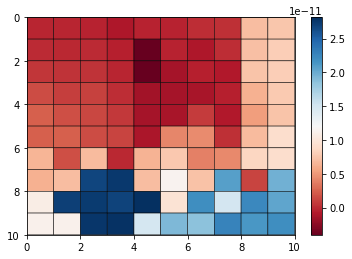

accuracy is 76.000000 lamba is 3.296593
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  6e+00  1e+00
 1:  1.8999e+02 -1.8730e+04  2e+04  2e-02  4e+00  2e+00
 2:  4.7361e+02 -1.5967e+04  2e+04  1e-02  3e+00  3e+00
 3:  7.5251e+02 -8.3622e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.7730e+02 -8.4332e+02  1e+03  9e-04  2e-01  4e-01
 5:  2.1595e+01 -9.4016e+00  3e+01  2e-05  6e-03  3e-02
 6:  2.1576e-01 -9.3982e-02  3e-01  2e-07  6e-05  3e-04
 7:  2.1575e-03 -9.3978e-04  3e-03  2e-09  6e-07  3e-06
 8:  2.1575e-05 -9.3978e-06  3e-05  2e-11  6e-09  3e-08
 9:  2.1575e-07 -9.3978e-08  3e-07  2e-13  6e-11  3e-10
10:  2.1575e-09 -9.3978e-10  3e-09  3e-15  1e-12  3e-12
Optimal solution found.


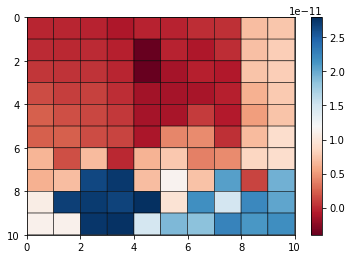

accuracy is 76.000000 lamba is 3.306613
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  6e+00  1e+00
 1:  1.9020e+02 -1.8724e+04  2e+04  2e-02  4e+00  2e+00
 2:  4.7413e+02 -1.5968e+04  2e+04  1e-02  3e+00  3e+00
 3:  7.5378e+02 -8.3588e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.7764e+02 -8.4363e+02  1e+03  9e-04  2e-01  4e-01
 5:  2.1543e+01 -9.3934e+00  3e+01  2e-05  6e-03  3e-02
 6:  2.1523e-01 -9.3899e-02  3e-01  2e-07  6e-05  3e-04
 7:  2.1522e-03 -9.3895e-04  3e-03  2e-09  6e-07  3e-06
 8:  2.1522e-05 -9.3895e-06  3e-05  2e-11  6e-09  3e-08
 9:  2.1522e-07 -9.3895e-08  3e-07  2e-13  6e-11  3e-10
10:  2.1522e-09 -9.3895e-10  3e-09  3e-15  1e-12  3e-12
Optimal solution found.


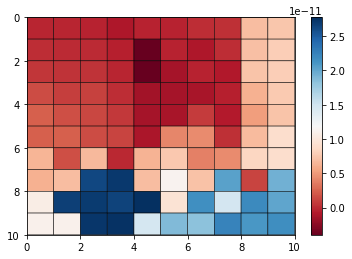

accuracy is 76.000000 lamba is 3.316633
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  6e+00  1e+00
 1:  1.9042e+02 -1.8717e+04  2e+04  2e-02  4e+00  2e+00
 2:  4.7463e+02 -1.5968e+04  2e+04  1e-02  3e+00  3e+00
 3:  7.5505e+02 -8.3553e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.7797e+02 -8.4391e+02  1e+03  9e-04  2e-01  4e-01
 5:  2.1489e+01 -9.3848e+00  3e+01  2e-05  6e-03  3e-02
 6:  2.1469e-01 -9.3811e-02  3e-01  2e-07  6e-05  3e-04
 7:  2.1468e-03 -9.3808e-04  3e-03  2e-09  6e-07  3e-06
 8:  2.1468e-05 -9.3808e-06  3e-05  2e-11  6e-09  3e-08
 9:  2.1468e-07 -9.3808e-08  3e-07  2e-13  6e-11  3e-10
10:  2.1468e-09 -9.3808e-10  3e-09  3e-15  1e-12  3e-12
Optimal solution found.


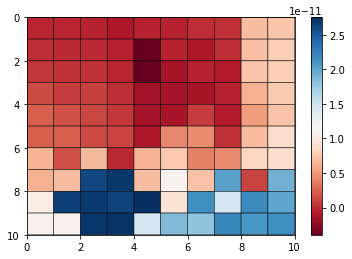

accuracy is 76.000000 lamba is 3.326653
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  6e+00  1e+00
 1:  1.9063e+02 -1.8710e+04  2e+04  2e-02  4e+00  2e+00
 2:  4.7514e+02 -1.5968e+04  2e+04  1e-02  3e+00  3e+00
 3:  7.5632e+02 -8.3517e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.7830e+02 -8.4414e+02  1e+03  9e-04  2e-01  4e-01
 5:  2.1433e+01 -9.3759e+00  3e+01  2e-05  6e-03  3e-02
 6:  2.1413e-01 -9.3720e-02  3e-01  2e-07  6e-05  3e-04
 7:  2.1412e-03 -9.3716e-04  3e-03  2e-09  6e-07  3e-06
 8:  2.1412e-05 -9.3716e-06  3e-05  2e-11  6e-09  3e-08
 9:  2.1412e-07 -9.3716e-08  3e-07  2e-13  6e-11  3e-10
10:  2.1412e-09 -9.3716e-10  3e-09  3e-15  1e-12  3e-12
Optimal solution found.


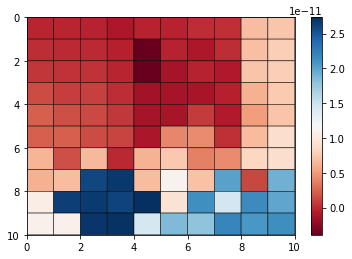

accuracy is 76.000000 lamba is 3.336673
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  6e+00  1e+00
 1:  1.9084e+02 -1.8703e+04  2e+04  2e-02  4e+00  2e+00
 2:  4.7564e+02 -1.5968e+04  2e+04  1e-02  3e+00  3e+00
 3:  7.5758e+02 -8.3481e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.7863e+02 -8.4433e+02  1e+03  9e-04  2e-01  4e-01
 5:  2.1377e+01 -9.3665e+00  3e+01  2e-05  6e-03  3e-02
 6:  2.1356e-01 -9.3624e-02  3e-01  2e-07  6e-05  3e-04
 7:  2.1356e-03 -9.3621e-04  3e-03  2e-09  6e-07  3e-06
 8:  2.1356e-05 -9.3621e-06  3e-05  2e-11  6e-09  3e-08
 9:  2.1356e-07 -9.3621e-08  3e-07  2e-13  6e-11  3e-10
10:  2.1356e-09 -9.3621e-10  3e-09  2e-15  1e-12  3e-12
Optimal solution found.


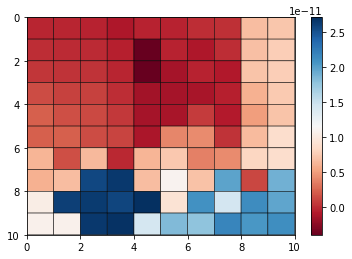

accuracy is 76.000000 lamba is 3.346693
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  6e+00  1e+00
 1:  1.9105e+02 -1.8696e+04  2e+04  2e-02  4e+00  2e+00
 2:  4.7615e+02 -1.5968e+04  2e+04  1e-02  3e+00  3e+00
 3:  7.5884e+02 -8.3444e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.7895e+02 -8.4449e+02  1e+03  9e-04  2e-01  4e-01
 5:  2.1319e+01 -9.3567e+00  3e+01  2e-05  6e-03  3e-02
 6:  2.1299e-01 -9.3525e-02  3e-01  2e-07  6e-05  3e-04
 7:  2.1298e-03 -9.3521e-04  3e-03  2e-09  6e-07  3e-06
 8:  2.1298e-05 -9.3521e-06  3e-05  2e-11  6e-09  3e-08
 9:  2.1298e-07 -9.3521e-08  3e-07  2e-13  6e-11  3e-10
10:  2.1298e-09 -9.3521e-10  3e-09  3e-15  9e-13  3e-12
Optimal solution found.


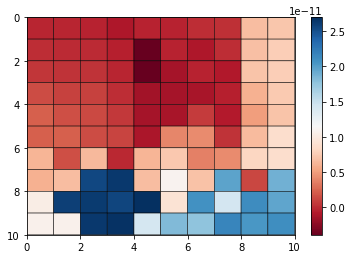

accuracy is 76.000000 lamba is 3.356713
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  6e+00  1e+00
 1:  1.9126e+02 -1.8689e+04  2e+04  2e-02  4e+00  2e+00
 2:  4.7664e+02 -1.5969e+04  2e+04  1e-02  3e+00  3e+00
 3:  7.6009e+02 -8.3407e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.7926e+02 -8.4461e+02  1e+03  9e-04  2e-01  4e-01
 5:  2.1260e+01 -9.3465e+00  3e+01  2e-05  6e-03  3e-02
 6:  2.1240e-01 -9.3422e-02  3e-01  2e-07  6e-05  3e-04
 7:  2.1239e-03 -9.3418e-04  3e-03  2e-09  6e-07  3e-06
 8:  2.1239e-05 -9.3418e-06  3e-05  2e-11  6e-09  3e-08
 9:  2.1239e-07 -9.3418e-08  3e-07  2e-13  6e-11  3e-10
10:  2.1239e-09 -9.3418e-10  3e-09  3e-15  9e-13  3e-12
Optimal solution found.


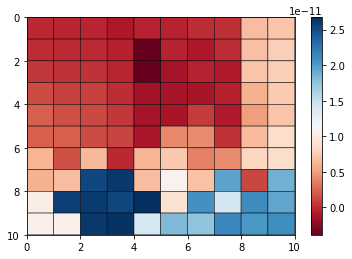

accuracy is 76.000000 lamba is 3.366733
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  6e+00  1e+00
 1:  1.9147e+02 -1.8682e+04  2e+04  2e-02  4e+00  2e+00
 2:  4.7714e+02 -1.5969e+04  2e+04  1e-02  3e+00  3e+00
 3:  7.6134e+02 -8.3369e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.7957e+02 -8.4469e+02  1e+03  9e-04  2e-01  4e-01
 5:  2.1200e+01 -9.3359e+00  3e+01  2e-05  6e-03  3e-02
 6:  2.1179e-01 -9.3314e-02  3e-01  2e-07  6e-05  3e-04
 7:  2.1179e-03 -9.3311e-04  3e-03  2e-09  6e-07  3e-06
 8:  2.1178e-05 -9.3311e-06  3e-05  2e-11  6e-09  3e-08
 9:  2.1178e-07 -9.3311e-08  3e-07  2e-13  6e-11  3e-10
10:  2.1178e-09 -9.3311e-10  3e-09  2e-15  1e-12  3e-12
Optimal solution found.


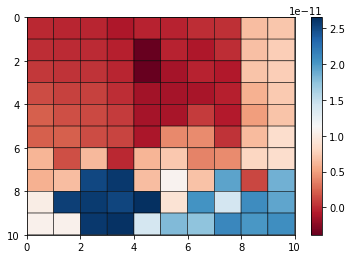

accuracy is 76.000000 lamba is 3.376754
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  6e+00  1e+00
 1:  1.9167e+02 -1.8675e+04  2e+04  2e-02  4e+00  2e+00
 2:  4.7764e+02 -1.5969e+04  2e+04  1e-02  3e+00  3e+00
 3:  7.6259e+02 -8.3330e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.7988e+02 -8.4474e+02  1e+03  9e-04  2e-01  4e-01
 5:  2.1139e+01 -9.3249e+00  3e+01  2e-05  6e-03  3e-02
 6:  2.1118e-01 -9.3203e-02  3e-01  2e-07  6e-05  3e-04
 7:  2.1117e-03 -9.3200e-04  3e-03  2e-09  6e-07  3e-06
 8:  2.1117e-05 -9.3200e-06  3e-05  2e-11  6e-09  3e-08
 9:  2.1117e-07 -9.3200e-08  3e-07  2e-13  6e-11  3e-10
10:  2.1117e-09 -9.3200e-10  3e-09  2e-15  9e-13  3e-12
Optimal solution found.


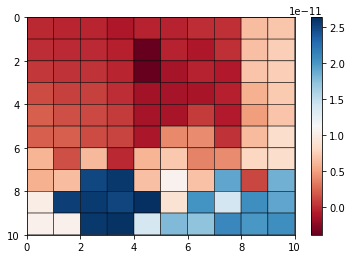

accuracy is 76.000000 lamba is 3.386774
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  6e+00  1e+00
 1:  1.9188e+02 -1.8669e+04  2e+04  2e-02  4e+00  2e+00
 2:  4.7813e+02 -1.5969e+04  2e+04  1e-02  3e+00  3e+00
 3:  7.6384e+02 -8.3291e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.8018e+02 -8.4475e+02  1e+03  9e-04  2e-01  4e-01
 5:  2.1077e+01 -9.3136e+00  3e+01  2e-05  6e-03  3e-02
 6:  2.1055e-01 -9.3088e-02  3e-01  2e-07  6e-05  3e-04
 7:  2.1055e-03 -9.3085e-04  3e-03  2e-09  6e-07  3e-06
 8:  2.1055e-05 -9.3085e-06  3e-05  2e-11  6e-09  3e-08
 9:  2.1055e-07 -9.3085e-08  3e-07  2e-13  6e-11  3e-10
10:  2.1055e-09 -9.3085e-10  3e-09  3e-15  1e-12  3e-12
Optimal solution found.


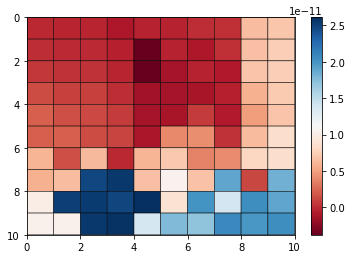

accuracy is 76.000000 lamba is 3.396794
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  6e+00  1e+00
 1:  1.9209e+02 -1.8662e+04  2e+04  2e-02  4e+00  2e+00
 2:  4.7862e+02 -1.5969e+04  2e+04  1e-02  3e+00  3e+00
 3:  7.6508e+02 -8.3251e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.8048e+02 -8.4473e+02  1e+03  9e-04  2e-01  4e-01
 5:  2.1013e+01 -9.3019e+00  3e+01  2e-05  6e-03  3e-02
 6:  2.0992e-01 -9.2970e-02  3e-01  2e-07  6e-05  3e-04
 7:  2.0991e-03 -9.2966e-04  3e-03  2e-09  6e-07  3e-06
 8:  2.0991e-05 -9.2966e-06  3e-05  2e-11  6e-09  3e-08
 9:  2.0991e-07 -9.2966e-08  3e-07  2e-13  6e-11  3e-10
10:  2.0991e-09 -9.2966e-10  3e-09  3e-15  8e-13  3e-12
Optimal solution found.


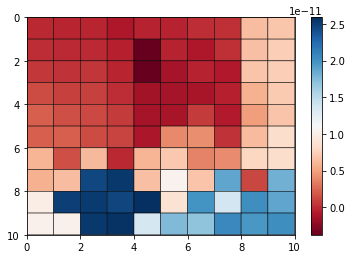

accuracy is 76.000000 lamba is 3.406814
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  6e+00  1e+00
 1:  1.9230e+02 -1.8655e+04  2e+04  2e-02  4e+00  2e+00
 2:  4.7910e+02 -1.5969e+04  2e+04  1e-02  3e+00  3e+00
 3:  7.6632e+02 -8.3210e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.8077e+02 -8.4466e+02  1e+03  9e-04  2e-01  4e-01
 5:  2.0949e+01 -9.2898e+00  3e+01  2e-05  6e-03  3e-02
 6:  2.0927e-01 -9.2848e-02  3e-01  2e-07  6e-05  3e-04
 7:  2.0926e-03 -9.2844e-04  3e-03  2e-09  6e-07  3e-06
 8:  2.0926e-05 -9.2844e-06  3e-05  2e-11  6e-09  3e-08
 9:  2.0926e-07 -9.2844e-08  3e-07  2e-13  6e-11  3e-10
10:  2.0926e-09 -9.2844e-10  3e-09  2e-15  6e-13  3e-12
Optimal solution found.


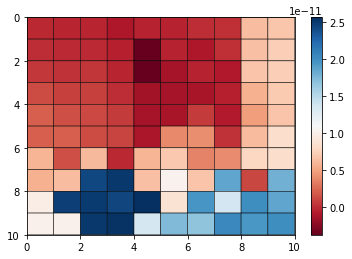

accuracy is 76.000000 lamba is 3.416834
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  6e+00  1e+00
 1:  1.9250e+02 -1.8648e+04  2e+04  2e-02  4e+00  2e+00
 2:  4.7959e+02 -1.5969e+04  2e+04  1e-02  3e+00  3e+00
 3:  7.6756e+02 -8.3169e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.8106e+02 -8.4457e+02  1e+03  9e-04  2e-01  4e-01
 5:  2.0883e+01 -9.2774e+00  3e+01  2e-05  6e-03  3e-02
 6:  2.0862e-01 -9.2722e-02  3e-01  2e-07  6e-05  3e-04
 7:  2.0861e-03 -9.2719e-04  3e-03  2e-09  6e-07  3e-06
 8:  2.0861e-05 -9.2719e-06  3e-05  2e-11  6e-09  3e-08
 9:  2.0861e-07 -9.2719e-08  3e-07  2e-13  6e-11  3e-10
10:  2.0861e-09 -9.2719e-10  3e-09  2e-15  9e-13  3e-12
Optimal solution found.


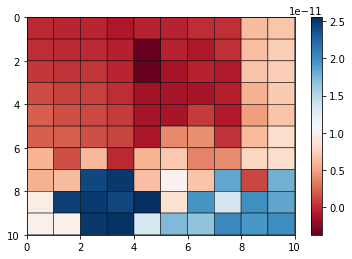

accuracy is 76.000000 lamba is 3.426854
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  6e+00  1e+00
 1:  1.9271e+02 -1.8641e+04  2e+04  2e-02  4e+00  2e+00
 2:  4.8007e+02 -1.5969e+04  2e+04  1e-02  3e+00  3e+00
 3:  7.6879e+02 -8.3127e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.8134e+02 -8.4444e+02  1e+03  9e-04  2e-01  4e-01
 5:  2.0816e+01 -9.2646e+00  3e+01  2e-05  6e-03  3e-02
 6:  2.0795e-01 -9.2593e-02  3e-01  2e-07  6e-05  3e-04
 7:  2.0794e-03 -9.2590e-04  3e-03  2e-09  6e-07  3e-06
 8:  2.0794e-05 -9.2590e-06  3e-05  2e-11  6e-09  3e-08
 9:  2.0794e-07 -9.2590e-08  3e-07  2e-13  6e-11  3e-10
10:  2.0794e-09 -9.2590e-10  3e-09  2e-15  8e-13  3e-12
Optimal solution found.


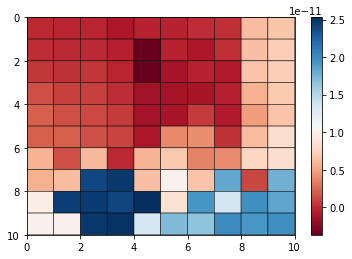

accuracy is 76.000000 lamba is 3.436874
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  6e+00  1e+00
 1:  1.9291e+02 -1.8634e+04  2e+04  2e-02  4e+00  2e+00
 2:  4.8055e+02 -1.5969e+04  2e+04  1e-02  3e+00  3e+00
 3:  7.7002e+02 -8.3085e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.8162e+02 -8.4427e+02  1e+03  9e-04  2e-01  4e-01
 5:  2.0749e+01 -9.2515e+00  3e+01  2e-05  6e-03  2e-02
 6:  2.0727e-01 -9.2461e-02  3e-01  2e-07  6e-05  2e-04
 7:  2.0726e-03 -9.2457e-04  3e-03  2e-09  6e-07  2e-06
 8:  2.0726e-05 -9.2457e-06  3e-05  2e-11  6e-09  2e-08
 9:  2.0726e-07 -9.2457e-08  3e-07  2e-13  6e-11  2e-10
10:  2.0726e-09 -9.2457e-10  3e-09  2e-15  9e-13  2e-12
Optimal solution found.


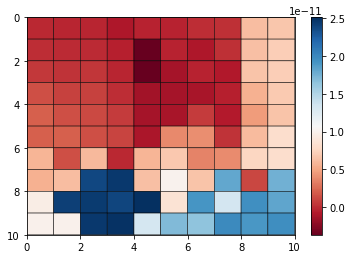

accuracy is 76.000000 lamba is 3.446894
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  6e+00  1e+00
 1:  1.9311e+02 -1.8627e+04  2e+04  2e-02  4e+00  2e+00
 2:  4.8103e+02 -1.5969e+04  2e+04  1e-02  3e+00  3e+00
 3:  7.7125e+02 -8.3042e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.8189e+02 -8.4407e+02  1e+03  9e-04  2e-01  4e-01
 5:  2.0680e+01 -9.2380e+00  3e+01  2e-05  6e-03  2e-02
 6:  2.0658e-01 -9.2325e-02  3e-01  2e-07  6e-05  2e-04
 7:  2.0657e-03 -9.2321e-04  3e-03  2e-09  6e-07  2e-06
 8:  2.0657e-05 -9.2321e-06  3e-05  2e-11  6e-09  2e-08
 9:  2.0657e-07 -9.2321e-08  3e-07  2e-13  6e-11  2e-10
10:  2.0657e-09 -9.2321e-10  3e-09  2e-15  1e-12  2e-12
Optimal solution found.


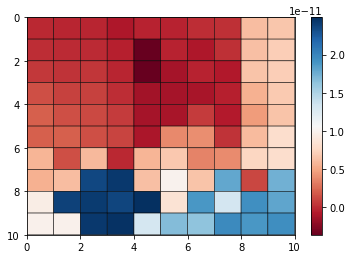

accuracy is 76.000000 lamba is 3.456914
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  6e+00  1e+00
 1:  1.9332e+02 -1.8620e+04  2e+04  2e-02  4e+00  2e+00
 2:  4.8151e+02 -1.5969e+04  2e+04  1e-02  3e+00  3e+00
 3:  7.7247e+02 -8.2998e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.8216e+02 -8.4383e+02  1e+03  9e-04  2e-01  4e-01
 5:  2.0610e+01 -9.2242e+00  3e+01  2e-05  6e-03  2e-02
 6:  2.0588e-01 -9.2185e-02  3e-01  2e-07  6e-05  2e-04
 7:  2.0588e-03 -9.2182e-04  3e-03  2e-09  6e-07  2e-06
 8:  2.0588e-05 -9.2182e-06  3e-05  2e-11  6e-09  2e-08
 9:  2.0588e-07 -9.2182e-08  3e-07  2e-13  6e-11  2e-10
10:  2.0588e-09 -9.2182e-10  3e-09  3e-15  1e-12  2e-12
Optimal solution found.


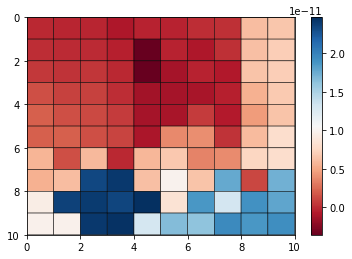

accuracy is 76.000000 lamba is 3.466934
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  6e+00  1e+00
 1:  1.9352e+02 -1.8613e+04  2e+04  2e-02  4e+00  2e+00
 2:  4.8198e+02 -1.5969e+04  2e+04  1e-02  3e+00  3e+00
 3:  7.7370e+02 -8.2954e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.8242e+02 -8.4356e+02  1e+03  9e-04  2e-01  4e-01
 5:  2.0540e+01 -9.2101e+00  3e+01  2e-05  6e-03  2e-02
 6:  2.0518e-01 -9.2043e-02  3e-01  2e-07  6e-05  2e-04
 7:  2.0517e-03 -9.2040e-04  3e-03  2e-09  6e-07  2e-06
 8:  2.0517e-05 -9.2040e-06  3e-05  2e-11  6e-09  2e-08
 9:  2.0517e-07 -9.2040e-08  3e-07  2e-13  6e-11  2e-10
10:  2.0517e-09 -9.2040e-10  3e-09  2e-15  9e-13  2e-12
Optimal solution found.


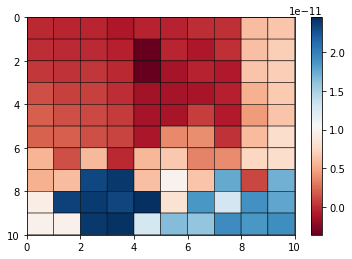

accuracy is 76.000000 lamba is 3.476954
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  5e+00  1e+00
 1:  1.9372e+02 -1.8606e+04  2e+04  2e-02  4e+00  2e+00
 2:  4.8245e+02 -1.5969e+04  2e+04  1e-02  3e+00  3e+00
 3:  7.7491e+02 -8.2909e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.8268e+02 -8.4326e+02  1e+03  9e-04  2e-01  4e-01
 5:  2.0468e+01 -9.1956e+00  3e+01  2e-05  6e-03  2e-02
 6:  2.0446e-01 -9.1897e-02  3e-01  2e-07  6e-05  2e-04
 7:  2.0445e-03 -9.1894e-04  3e-03  2e-09  6e-07  2e-06
 8:  2.0445e-05 -9.1894e-06  3e-05  2e-11  6e-09  2e-08
 9:  2.0445e-07 -9.1894e-08  3e-07  2e-13  6e-11  2e-10
10:  2.0445e-09 -9.1894e-10  3e-09  2e-15  1e-12  2e-12
Optimal solution found.


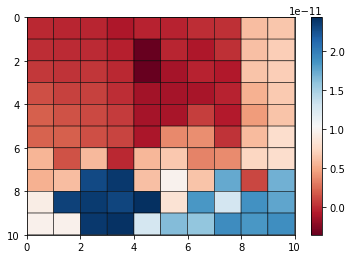

accuracy is 76.000000 lamba is 3.486974
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  5e+00  1e+00
 1:  1.9392e+02 -1.8599e+04  2e+04  2e-02  4e+00  2e+00
 2:  4.8292e+02 -1.5969e+04  2e+04  1e-02  3e+00  3e+00
 3:  7.7613e+02 -8.2864e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.8293e+02 -8.4293e+02  1e+03  9e-04  2e-01  4e-01
 5:  2.0395e+01 -9.1809e+00  3e+01  2e-05  6e-03  2e-02
 6:  2.0373e-01 -9.1748e-02  3e-01  2e-07  6e-05  2e-04
 7:  2.0372e-03 -9.1745e-04  3e-03  2e-09  6e-07  2e-06
 8:  2.0372e-05 -9.1745e-06  3e-05  2e-11  6e-09  2e-08
 9:  2.0372e-07 -9.1745e-08  3e-07  2e-13  6e-11  2e-10
10:  2.0372e-09 -9.1745e-10  3e-09  2e-15  1e-12  2e-12
Optimal solution found.


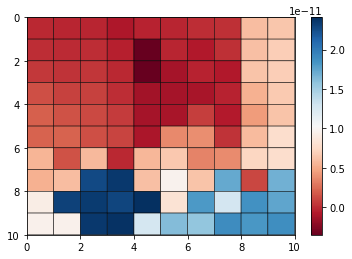

accuracy is 76.000000 lamba is 3.496994
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  5e+00  1e+00
 1:  1.9413e+02 -1.8592e+04  2e+04  2e-02  4e+00  2e+00
 2:  4.8339e+02 -1.5969e+04  2e+04  1e-02  3e+00  3e+00
 3:  7.7734e+02 -8.2818e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.8318e+02 -8.4256e+02  1e+03  9e-04  2e-01  4e-01
 5:  2.0322e+01 -9.1658e+00  3e+01  2e-05  6e-03  2e-02
 6:  2.0300e-01 -9.1596e-02  3e-01  2e-07  6e-05  2e-04
 7:  2.0299e-03 -9.1593e-04  3e-03  2e-09  6e-07  2e-06
 8:  2.0299e-05 -9.1593e-06  3e-05  2e-11  6e-09  2e-08
 9:  2.0299e-07 -9.1593e-08  3e-07  2e-13  6e-11  2e-10
10:  2.0299e-09 -9.1593e-10  3e-09  2e-15  1e-12  2e-12
Optimal solution found.


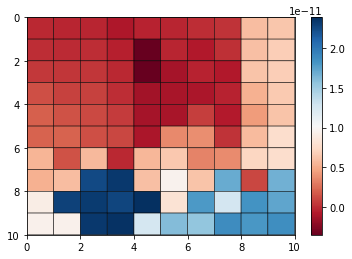

accuracy is 76.000000 lamba is 3.507014
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  5e+00  1e+00
 1:  1.9433e+02 -1.8585e+04  2e+04  2e-02  4e+00  2e+00
 2:  4.8385e+02 -1.5969e+04  2e+04  1e-02  3e+00  3e+00
 3:  7.7855e+02 -8.2772e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.8343e+02 -8.4216e+02  1e+03  9e-04  2e-01  4e-01
 5:  2.0248e+01 -9.1527e+00  3e+01  2e-05  6e-03  2e-02
 6:  2.0226e-01 -9.1464e-02  3e-01  2e-07  6e-05  2e-04
 7:  2.0225e-03 -9.1461e-04  3e-03  2e-09  6e-07  2e-06
 8:  2.0225e-05 -9.1461e-06  3e-05  2e-11  6e-09  2e-08
 9:  2.0225e-07 -9.1461e-08  3e-07  2e-13  6e-11  2e-10
10:  2.0225e-09 -9.1461e-10  3e-09  2e-15  1e-12  2e-12
Optimal solution found.


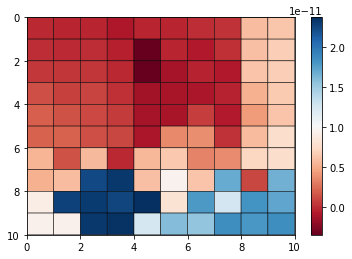

accuracy is 76.000000 lamba is 3.517034
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  5e+00  1e+00
 1:  1.9453e+02 -1.8578e+04  2e+04  2e-02  4e+00  2e+00
 2:  4.8431e+02 -1.5969e+04  2e+04  1e-02  3e+00  3e+00
 3:  7.7976e+02 -8.2725e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.8366e+02 -8.4172e+02  1e+03  9e-04  2e-01  4e-01
 5:  2.0174e+01 -9.1399e+00  3e+01  2e-05  6e-03  2e-02
 6:  2.0151e-01 -9.1335e-02  3e-01  2e-07  6e-05  2e-04
 7:  2.0151e-03 -9.1332e-04  3e-03  2e-09  6e-07  2e-06
 8:  2.0151e-05 -9.1332e-06  3e-05  2e-11  6e-09  2e-08
 9:  2.0151e-07 -9.1332e-08  3e-07  2e-13  6e-11  2e-10
10:  2.0151e-09 -9.1332e-10  3e-09  2e-15  1e-12  2e-12
Optimal solution found.


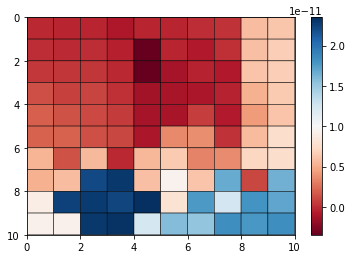

accuracy is 75.000000 lamba is 3.527054
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  5e+00  1e+00
 1:  1.9473e+02 -1.8571e+04  2e+04  2e-02  4e+00  2e+00
 2:  4.8477e+02 -1.5969e+04  2e+04  1e-02  3e+00  3e+00
 3:  7.8096e+02 -8.2677e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.8390e+02 -8.4126e+02  1e+03  9e-04  2e-01  4e-01
 5:  2.0099e+01 -9.1268e+00  3e+01  2e-05  6e-03  2e-02
 6:  2.0076e-01 -9.1203e-02  3e-01  2e-07  6e-05  2e-04
 7:  2.0075e-03 -9.1200e-04  3e-03  2e-09  6e-07  2e-06
 8:  2.0075e-05 -9.1200e-06  3e-05  2e-11  6e-09  2e-08
 9:  2.0075e-07 -9.1200e-08  3e-07  2e-13  6e-11  2e-10
10:  2.0075e-09 -9.1200e-10  3e-09  3e-15  9e-13  2e-12
Optimal solution found.


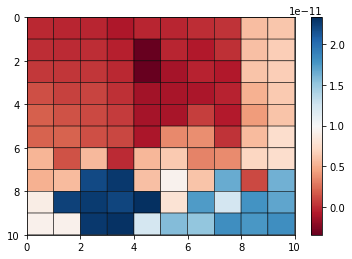

accuracy is 75.000000 lamba is 3.537074
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  5e+00  1e+00
 1:  1.9492e+02 -1.8564e+04  2e+04  2e-02  4e+00  2e+00
 2:  4.8523e+02 -1.5969e+04  2e+04  1e-02  3e+00  3e+00
 3:  7.8216e+02 -8.2629e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.8413e+02 -8.4076e+02  1e+03  9e-04  2e-01  4e-01
 5:  2.0023e+01 -9.1134e+00  3e+01  2e-05  6e-03  2e-02
 6:  2.0000e-01 -9.1068e-02  3e-01  2e-07  6e-05  2e-04
 7:  1.9999e-03 -9.1065e-04  3e-03  2e-09  6e-07  2e-06
 8:  1.9999e-05 -9.1065e-06  3e-05  2e-11  6e-09  2e-08
 9:  1.9999e-07 -9.1065e-08  3e-07  2e-13  6e-11  2e-10
10:  1.9999e-09 -9.1065e-10  3e-09  2e-15  1e-12  2e-12
Optimal solution found.


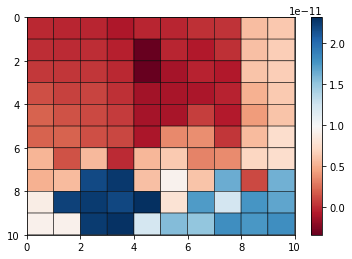

accuracy is 75.000000 lamba is 3.547094
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  5e+00  1e+00
 1:  1.9512e+02 -1.8557e+04  2e+04  2e-02  4e+00  2e+00
 2:  4.8569e+02 -1.5969e+04  2e+04  1e-02  3e+00  3e+00
 3:  7.8336e+02 -8.2580e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.8436e+02 -8.4024e+02  1e+03  9e-04  2e-01  4e-01
 5:  1.9946e+01 -9.0997e+00  3e+01  2e-05  6e-03  2e-02
 6:  1.9923e-01 -9.0930e-02  3e-01  2e-07  6e-05  2e-04
 7:  1.9922e-03 -9.0927e-04  3e-03  2e-09  6e-07  2e-06
 8:  1.9922e-05 -9.0927e-06  3e-05  2e-11  6e-09  2e-08
 9:  1.9922e-07 -9.0927e-08  3e-07  2e-13  6e-11  2e-10
10:  1.9922e-09 -9.0927e-10  3e-09  3e-15  6e-13  2e-12
Optimal solution found.


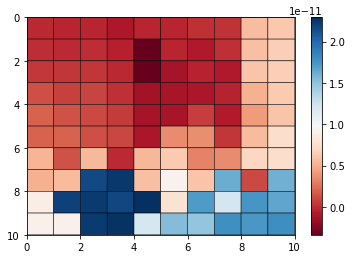

accuracy is 75.000000 lamba is 3.557114
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  5e+00  1e+00
 1:  1.9532e+02 -1.8550e+04  2e+04  1e-02  4e+00  2e+00
 2:  4.8614e+02 -1.5968e+04  2e+04  1e-02  3e+00  3e+00
 3:  7.8455e+02 -8.2530e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.8458e+02 -8.3968e+02  1e+03  9e-04  2e-01  4e-01
 5:  1.9868e+01 -9.0857e+00  3e+01  2e-05  6e-03  2e-02
 6:  1.9845e-01 -9.0789e-02  3e-01  2e-07  6e-05  2e-04
 7:  1.9844e-03 -9.0786e-04  3e-03  2e-09  6e-07  2e-06
 8:  1.9844e-05 -9.0786e-06  3e-05  2e-11  6e-09  2e-08
 9:  1.9844e-07 -9.0786e-08  3e-07  2e-13  6e-11  2e-10
10:  1.9844e-09 -9.0786e-10  3e-09  2e-15  9e-13  2e-12
Optimal solution found.


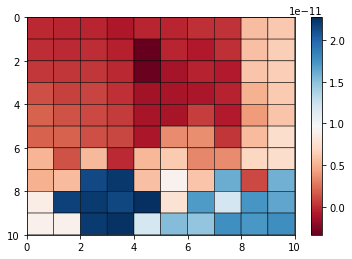

accuracy is 76.000000 lamba is 3.567134
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  5e+00  1e+00
 1:  1.9552e+02 -1.8543e+04  2e+04  1e-02  4e+00  2e+00
 2:  4.8659e+02 -1.5968e+04  2e+04  1e-02  3e+00  3e+00
 3:  7.8575e+02 -8.2480e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.8479e+02 -8.3909e+02  1e+03  9e-04  2e-01  4e-01
 5:  1.9789e+01 -9.0714e+00  3e+01  2e-05  6e-03  2e-02
 6:  1.9767e-01 -9.0645e-02  3e-01  2e-07  6e-05  2e-04
 7:  1.9766e-03 -9.0642e-04  3e-03  2e-09  6e-07  2e-06
 8:  1.9766e-05 -9.0642e-06  3e-05  2e-11  6e-09  2e-08
 9:  1.9766e-07 -9.0642e-08  3e-07  2e-13  6e-11  2e-10
10:  1.9766e-09 -9.0642e-10  3e-09  2e-15  1e-12  2e-12
Optimal solution found.


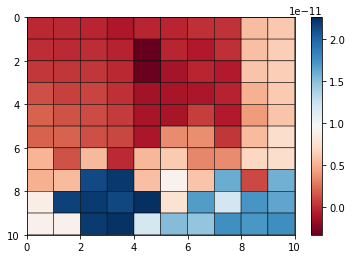

accuracy is 76.000000 lamba is 3.577154
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  5e+00  1e+00
 1:  1.9571e+02 -1.8536e+04  2e+04  1e-02  4e+00  2e+00
 2:  4.8704e+02 -1.5968e+04  2e+04  1e-02  3e+00  3e+00
 3:  7.8693e+02 -8.2430e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.8500e+02 -8.3847e+02  1e+03  9e-04  2e-01  4e-01
 5:  1.9710e+01 -9.0567e+00  3e+01  2e-05  6e-03  2e-02
 6:  1.9687e-01 -9.0497e-02  3e-01  2e-07  6e-05  2e-04
 7:  1.9686e-03 -9.0494e-04  3e-03  2e-09  6e-07  2e-06
 8:  1.9686e-05 -9.0494e-06  3e-05  2e-11  6e-09  2e-08
 9:  1.9686e-07 -9.0494e-08  3e-07  2e-13  6e-11  2e-10
10:  1.9686e-09 -9.0494e-10  3e-09  2e-15  1e-12  2e-12
Optimal solution found.


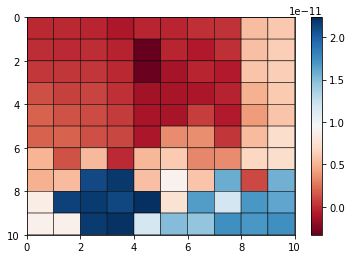

accuracy is 76.000000 lamba is 3.587174
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  5e+00  1e+00
 1:  1.9591e+02 -1.8529e+04  2e+04  1e-02  4e+00  2e+00
 2:  4.8749e+02 -1.5968e+04  2e+04  1e-02  3e+00  3e+00
 3:  7.8812e+02 -8.2379e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.8521e+02 -8.3782e+02  1e+03  9e-04  2e-01  4e-01
 5:  1.9630e+01 -9.0418e+00  3e+01  2e-05  5e-03  2e-02
 6:  1.9607e-01 -9.0347e-02  3e-01  2e-07  5e-05  2e-04
 7:  1.9606e-03 -9.0344e-04  3e-03  2e-09  5e-07  2e-06
 8:  1.9606e-05 -9.0344e-06  3e-05  2e-11  5e-09  2e-08
 9:  1.9606e-07 -9.0344e-08  3e-07  2e-13  5e-11  2e-10
10:  1.9606e-09 -9.0344e-10  3e-09  2e-15  1e-12  2e-12
Optimal solution found.


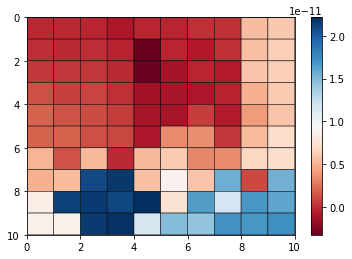

accuracy is 75.000000 lamba is 3.597194
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  5e+00  1e+00
 1:  1.9611e+02 -1.8522e+04  2e+04  1e-02  4e+00  2e+00
 2:  4.8793e+02 -1.5967e+04  2e+04  1e-02  3e+00  3e+00
 3:  7.8930e+02 -8.2327e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.8541e+02 -8.3714e+02  1e+03  9e-04  2e-01  4e-01
 5:  1.9549e+01 -9.0266e+00  3e+01  2e-05  5e-03  2e-02
 6:  1.9526e-01 -9.0194e-02  3e-01  2e-07  5e-05  2e-04
 7:  1.9525e-03 -9.0191e-04  3e-03  2e-09  5e-07  2e-06
 8:  1.9525e-05 -9.0191e-06  3e-05  2e-11  5e-09  2e-08
 9:  1.9525e-07 -9.0191e-08  3e-07  2e-13  5e-11  2e-10
10:  1.9525e-09 -9.0191e-10  3e-09  2e-15  8e-13  2e-12
Optimal solution found.


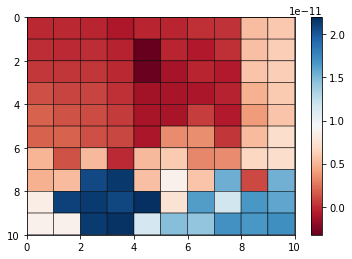

accuracy is 75.000000 lamba is 3.607214
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  5e+00  1e+00
 1:  1.9630e+02 -1.8515e+04  2e+04  1e-02  4e+00  2e+00
 2:  4.8838e+02 -1.5967e+04  2e+04  1e-02  3e+00  3e+00
 3:  7.9048e+02 -8.2275e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.8561e+02 -8.3643e+02  1e+03  9e-04  2e-01  4e-01
 5:  1.9467e+01 -9.0111e+00  3e+01  2e-05  5e-03  2e-02
 6:  1.9444e-01 -9.0038e-02  3e-01  2e-07  5e-05  2e-04
 7:  1.9444e-03 -9.0035e-04  3e-03  2e-09  5e-07  2e-06
 8:  1.9444e-05 -9.0035e-06  3e-05  2e-11  5e-09  2e-08
 9:  1.9444e-07 -9.0035e-08  3e-07  2e-13  5e-11  2e-10
10:  1.9444e-09 -9.0035e-10  3e-09  2e-15  1e-12  2e-12
Optimal solution found.


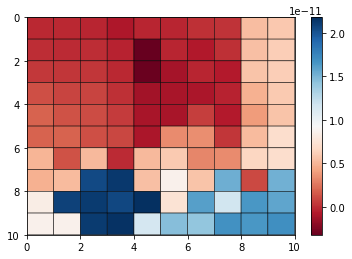

accuracy is 75.000000 lamba is 3.617234
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  5e+00  1e+00
 1:  1.9649e+02 -1.8508e+04  2e+04  1e-02  4e+00  2e+00
 2:  4.8882e+02 -1.5967e+04  2e+04  1e-02  3e+00  3e+00
 3:  7.9132e+02 -8.2309e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.8586e+02 -8.3560e+02  1e+03  9e-04  2e-01  4e-01
 5:  1.9378e+01 -8.9940e+00  3e+01  2e-05  5e-03  2e-02
 6:  1.9355e-01 -8.9867e-02  3e-01  2e-07  5e-05  2e-04
 7:  1.9354e-03 -8.9864e-04  3e-03  2e-09  5e-07  2e-06
 8:  1.9354e-05 -8.9864e-06  3e-05  2e-11  5e-09  2e-08
 9:  1.9354e-07 -8.9864e-08  3e-07  2e-13  5e-11  2e-10
10:  1.9354e-09 -8.9864e-10  3e-09  2e-15  1e-12  2e-12
Optimal solution found.


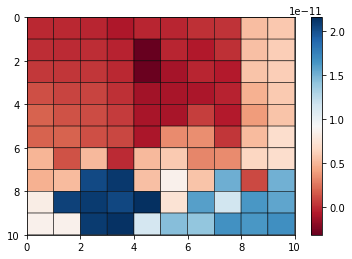

accuracy is 75.000000 lamba is 3.627255
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  5e+00  1e+00
 1:  1.9669e+02 -1.8501e+04  2e+04  1e-02  4e+00  2e+00
 2:  4.8925e+02 -1.5966e+04  2e+04  1e-02  3e+00  3e+00
 3:  7.9203e+02 -8.2374e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.8613e+02 -8.3473e+02  1e+03  9e-04  2e-01  4e-01
 5:  1.9285e+01 -8.9764e+00  3e+01  2e-05  5e-03  2e-02
 6:  1.9262e-01 -8.9690e-02  3e-01  2e-07  5e-05  2e-04
 7:  1.9262e-03 -8.9687e-04  3e-03  2e-09  5e-07  2e-06
 8:  1.9262e-05 -8.9687e-06  3e-05  2e-11  5e-09  2e-08
 9:  1.9262e-07 -8.9687e-08  3e-07  2e-13  5e-11  2e-10
10:  1.9262e-09 -8.9687e-10  3e-09  3e-15  8e-13  2e-12
Optimal solution found.


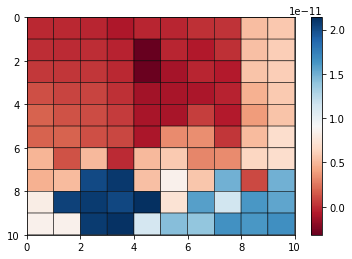

accuracy is 75.000000 lamba is 3.637275
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  5e+00  1e+00
 1:  1.9688e+02 -1.8494e+04  2e+04  1e-02  4e+00  2e+00
 2:  4.8969e+02 -1.5966e+04  2e+04  1e-02  3e+00  3e+00
 3:  7.9274e+02 -8.2439e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.8639e+02 -8.3384e+02  1e+03  9e-04  2e-01  4e-01
 5:  1.9192e+01 -8.9586e+00  3e+01  2e-05  5e-03  2e-02
 6:  1.9169e-01 -8.9511e-02  3e-01  2e-07  5e-05  2e-04
 7:  1.9169e-03 -8.9508e-04  3e-03  2e-09  5e-07  2e-06
 8:  1.9169e-05 -8.9508e-06  3e-05  2e-11  5e-09  2e-08
 9:  1.9169e-07 -8.9508e-08  3e-07  2e-13  5e-11  2e-10
10:  1.9169e-09 -8.9508e-10  3e-09  2e-15  6e-13  2e-12
Optimal solution found.


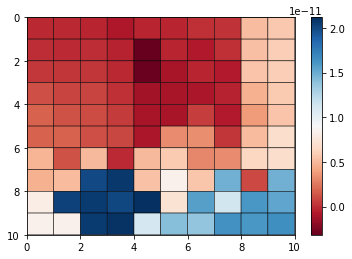

accuracy is 75.000000 lamba is 3.647295
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  5e+00  1e+00
 1:  1.9707e+02 -1.8487e+04  2e+04  1e-02  4e+00  2e+00
 2:  4.9012e+02 -1.5966e+04  2e+04  1e-02  3e+00  3e+00
 3:  7.9344e+02 -8.2502e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.8665e+02 -8.3293e+02  1e+03  9e-04  2e-01  4e-01
 5:  1.9099e+01 -8.9407e+00  3e+01  2e-05  5e-03  2e-02
 6:  1.9077e-01 -8.9332e-02  3e-01  2e-07  5e-05  2e-04
 7:  1.9076e-03 -8.9329e-04  3e-03  2e-09  5e-07  2e-06
 8:  1.9076e-05 -8.9329e-06  3e-05  2e-11  5e-09  2e-08
 9:  1.9076e-07 -8.9329e-08  3e-07  2e-13  5e-11  2e-10
10:  1.9076e-09 -8.9329e-10  3e-09  2e-15  7e-13  2e-12
Optimal solution found.


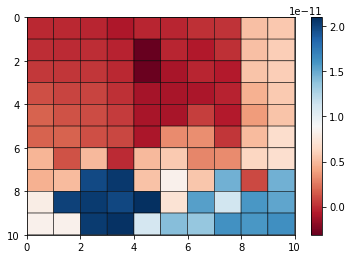

accuracy is 75.000000 lamba is 3.657315
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  5e+00  1e+00
 1:  1.9727e+02 -1.8480e+04  2e+04  1e-02  4e+00  2e+00
 2:  4.9055e+02 -1.5965e+04  2e+04  1e-02  3e+00  3e+00
 3:  7.9414e+02 -8.2564e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.8690e+02 -8.3201e+02  1e+03  9e-04  2e-01  4e-01
 5:  1.9006e+01 -8.9227e+00  3e+01  2e-05  5e-03  2e-02
 6:  1.8984e-01 -8.9152e-02  3e-01  2e-07  5e-05  2e-04
 7:  1.8983e-03 -8.9149e-04  3e-03  2e-09  5e-07  2e-06
 8:  1.8983e-05 -8.9149e-06  3e-05  2e-11  5e-09  2e-08
 9:  1.8983e-07 -8.9149e-08  3e-07  2e-13  5e-11  2e-10
10:  1.8983e-09 -8.9149e-10  3e-09  2e-15  8e-13  2e-12
Optimal solution found.


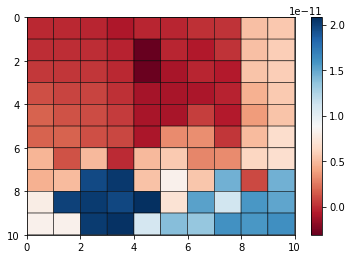

accuracy is 76.000000 lamba is 3.667335
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  5e+00  1e+00
 1:  1.9746e+02 -1.8473e+04  2e+04  1e-02  3e+00  2e+00
 2:  4.9098e+02 -1.5965e+04  2e+04  1e-02  3e+00  3e+00
 3:  7.9484e+02 -8.2625e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.8715e+02 -8.3107e+02  1e+03  9e-04  2e-01  4e-01
 5:  1.8913e+01 -8.9046e+00  3e+01  2e-05  5e-03  2e-02
 6:  1.8891e-01 -8.8970e-02  3e-01  2e-07  5e-05  2e-04
 7:  1.8890e-03 -8.8967e-04  3e-03  2e-09  5e-07  2e-06
 8:  1.8890e-05 -8.8967e-06  3e-05  2e-11  5e-09  2e-08
 9:  1.8890e-07 -8.8967e-08  3e-07  2e-13  5e-11  2e-10
10:  1.8890e-09 -8.8967e-10  3e-09  2e-15  2e-12  2e-12
Optimal solution found.


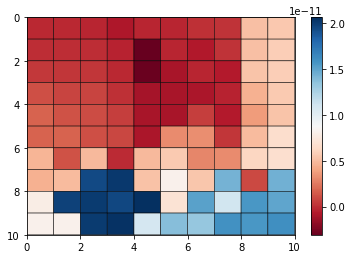

accuracy is 76.000000 lamba is 3.677355
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  5e+00  1e+00
 1:  1.9765e+02 -1.8466e+04  2e+04  1e-02  3e+00  2e+00
 2:  4.9141e+02 -1.5965e+04  2e+04  1e-02  3e+00  3e+00
 3:  7.9554e+02 -8.2685e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.8740e+02 -8.3012e+02  1e+03  9e-04  2e-01  4e-01
 5:  1.8820e+01 -8.8864e+00  3e+01  2e-05  5e-03  2e-02
 6:  1.8798e-01 -8.8788e-02  3e-01  2e-07  5e-05  2e-04
 7:  1.8797e-03 -8.8785e-04  3e-03  2e-09  5e-07  2e-06
 8:  1.8797e-05 -8.8785e-06  3e-05  2e-11  5e-09  2e-08
 9:  1.8797e-07 -8.8785e-08  3e-07  2e-13  5e-11  2e-10
10:  1.8797e-09 -8.8785e-10  3e-09  2e-15  1e-12  2e-12
Optimal solution found.


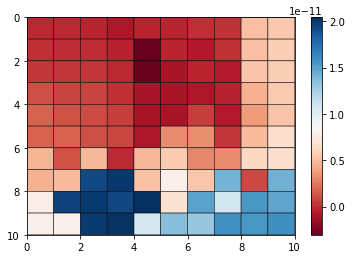

accuracy is 76.000000 lamba is 3.687375
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  5e+00  1e+00
 1:  1.9784e+02 -1.8459e+04  2e+04  1e-02  3e+00  2e+00
 2:  4.9184e+02 -1.5964e+04  2e+04  1e-02  3e+00  3e+00
 3:  7.9624e+02 -8.2743e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.8765e+02 -8.2915e+02  1e+03  9e-04  2e-01  4e-01
 5:  1.8727e+01 -8.8680e+00  3e+01  2e-05  5e-03  2e-02
 6:  1.8705e-01 -8.8604e-02  3e-01  2e-07  5e-05  2e-04
 7:  1.8704e-03 -8.8601e-04  3e-03  2e-09  5e-07  2e-06
 8:  1.8704e-05 -8.8601e-06  3e-05  2e-11  5e-09  2e-08
 9:  1.8704e-07 -8.8601e-08  3e-07  2e-13  5e-11  2e-10
10:  1.8704e-09 -8.8601e-10  3e-09  2e-15  7e-13  2e-12
Optimal solution found.


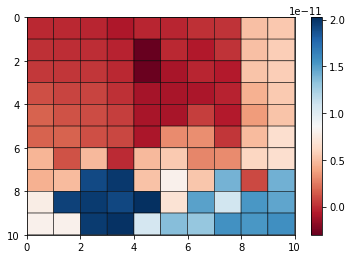

accuracy is 76.000000 lamba is 3.697395
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  5e+00  1e+00
 1:  1.9803e+02 -1.8452e+04  2e+04  1e-02  3e+00  2e+00
 2:  4.9226e+02 -1.5964e+04  2e+04  1e-02  3e+00  3e+00
 3:  7.9693e+02 -8.2800e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.8789e+02 -8.2816e+02  1e+03  9e-04  2e-01  4e-01
 5:  1.8633e+01 -8.8496e+00  3e+01  2e-05  5e-03  2e-02
 6:  1.8611e-01 -8.8419e-02  3e-01  2e-07  5e-05  2e-04
 7:  1.8611e-03 -8.8417e-04  3e-03  2e-09  5e-07  2e-06
 8:  1.8611e-05 -8.8416e-06  3e-05  2e-11  5e-09  2e-08
 9:  1.8611e-07 -8.8416e-08  3e-07  2e-13  5e-11  2e-10
10:  1.8611e-09 -8.8416e-10  3e-09  2e-15  9e-13  2e-12
Optimal solution found.


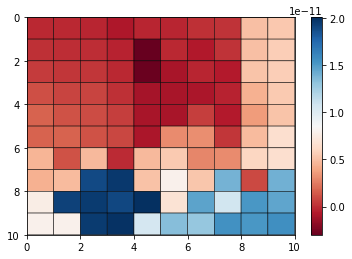

accuracy is 76.000000 lamba is 3.707415
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  5e+00  1e+00
 1:  1.9822e+02 -1.8445e+04  2e+04  1e-02  3e+00  2e+00
 2:  4.9268e+02 -1.5963e+04  2e+04  1e-02  3e+00  3e+00
 3:  7.9763e+02 -8.2857e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.8812e+02 -8.2716e+02  1e+03  9e-04  2e-01  4e-01
 5:  1.8540e+01 -8.8311e+00  3e+01  2e-05  5e-03  2e-02
 6:  1.8518e-01 -8.8233e-02  3e-01  2e-07  5e-05  2e-04
 7:  1.8517e-03 -8.8231e-04  3e-03  2e-09  5e-07  2e-06
 8:  1.8517e-05 -8.8231e-06  3e-05  2e-11  5e-09  2e-08
 9:  1.8517e-07 -8.8231e-08  3e-07  2e-13  5e-11  2e-10
10:  1.8517e-09 -8.8231e-10  3e-09  2e-15  7e-13  2e-12
Optimal solution found.


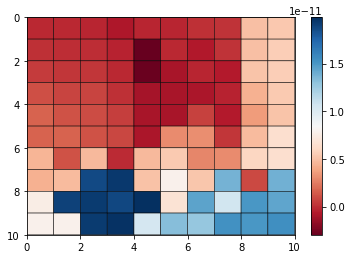

accuracy is 76.000000 lamba is 3.717435
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  5e+00  1e+00
 1:  1.9841e+02 -1.8438e+04  2e+04  1e-02  3e+00  2e+00
 2:  4.9310e+02 -1.5963e+04  2e+04  1e-02  3e+00  3e+00
 3:  7.9832e+02 -8.2912e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.8836e+02 -8.2615e+02  1e+03  9e-04  2e-01  4e-01
 5:  1.8446e+01 -8.8124e+00  3e+01  2e-05  5e-03  2e-02
 6:  1.8425e-01 -8.8047e-02  3e-01  2e-07  5e-05  2e-04
 7:  1.8424e-03 -8.8044e-04  3e-03  2e-09  5e-07  2e-06
 8:  1.8424e-05 -8.8044e-06  3e-05  2e-11  5e-09  2e-08
 9:  1.8424e-07 -8.8044e-08  3e-07  2e-13  5e-11  2e-10
10:  1.8424e-09 -8.8044e-10  3e-09  2e-15  8e-13  2e-12
Optimal solution found.


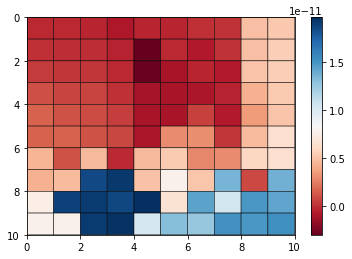

accuracy is 76.000000 lamba is 3.727455
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  5e+00  1e+00
 1:  1.9860e+02 -1.8431e+04  2e+04  1e-02  3e+00  2e+00
 2:  4.9352e+02 -1.5962e+04  2e+04  1e-02  3e+00  3e+00
 3:  7.9901e+02 -8.2966e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.8859e+02 -8.2512e+02  1e+03  9e-04  2e-01  4e-01
 5:  1.8353e+01 -8.7937e+00  3e+01  2e-05  5e-03  2e-02
 6:  1.8331e-01 -8.7859e-02  3e-01  2e-07  5e-05  2e-04
 7:  1.8331e-03 -8.7856e-04  3e-03  2e-09  5e-07  2e-06
 8:  1.8331e-05 -8.7856e-06  3e-05  2e-11  5e-09  2e-08
 9:  1.8331e-07 -8.7856e-08  3e-07  2e-13  5e-11  2e-10
10:  1.8331e-09 -8.7856e-10  3e-09  2e-15  5e-13  2e-12
Optimal solution found.


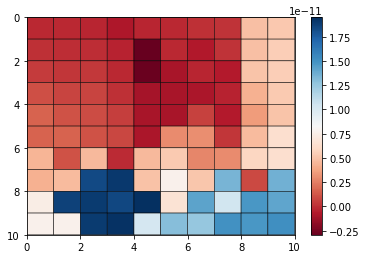

accuracy is 76.000000 lamba is 3.737475
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  5e+00  1e+00
 1:  1.9879e+02 -1.8424e+04  2e+04  1e-02  3e+00  2e+00
 2:  4.9393e+02 -1.5962e+04  2e+04  1e-02  3e+00  3e+00
 3:  7.9970e+02 -8.3018e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.8881e+02 -8.2408e+02  1e+03  9e-04  2e-01  4e-01
 5:  1.8259e+01 -8.7748e+00  3e+01  2e-05  5e-03  2e-02
 6:  1.8238e-01 -8.7670e-02  3e-01  2e-07  5e-05  2e-04
 7:  1.8237e-03 -8.7668e-04  3e-03  2e-09  5e-07  2e-06
 8:  1.8237e-05 -8.7668e-06  3e-05  2e-11  5e-09  2e-08
 9:  1.8237e-07 -8.7668e-08  3e-07  2e-13  5e-11  2e-10
10:  1.8237e-09 -8.7668e-10  3e-09  2e-15  1e-12  2e-12
Optimal solution found.


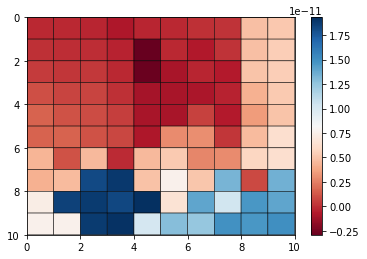

accuracy is 76.000000 lamba is 3.747495
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  5e+00  1e+00
 1:  1.9897e+02 -1.8417e+04  2e+04  1e-02  3e+00  2e+00
 2:  4.9435e+02 -1.5961e+04  2e+04  1e-02  3e+00  3e+00
 3:  8.0038e+02 -8.3070e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.8903e+02 -8.2303e+02  1e+03  9e-04  2e-01  4e-01
 5:  1.8166e+01 -8.7559e+00  3e+01  2e-05  5e-03  2e-02
 6:  1.8144e-01 -8.7481e-02  3e-01  2e-07  5e-05  2e-04
 7:  1.8144e-03 -8.7478e-04  3e-03  2e-09  5e-07  2e-06
 8:  1.8144e-05 -8.7478e-06  3e-05  2e-11  5e-09  2e-08
 9:  1.8144e-07 -8.7478e-08  3e-07  2e-13  5e-11  2e-10
10:  1.8144e-09 -8.7478e-10  3e-09  2e-15  1e-12  2e-12
Optimal solution found.


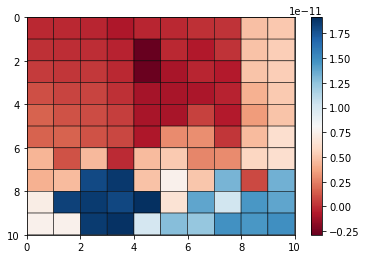

accuracy is 76.000000 lamba is 3.757515
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  5e+00  1e+00
 1:  1.9916e+02 -1.8410e+04  2e+04  1e-02  3e+00  2e+00
 2:  4.9476e+02 -1.5961e+04  2e+04  1e-02  3e+00  3e+00
 3:  8.0107e+02 -8.3121e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.8925e+02 -8.2196e+02  1e+03  9e-04  2e-01  4e-01
 5:  1.8072e+01 -8.7368e+00  3e+01  2e-05  5e-03  2e-02
 6:  1.8051e-01 -8.7290e-02  3e-01  2e-07  5e-05  2e-04
 7:  1.8050e-03 -8.7288e-04  3e-03  2e-09  5e-07  2e-06
 8:  1.8050e-05 -8.7288e-06  3e-05  2e-11  5e-09  2e-08
 9:  1.8050e-07 -8.7288e-08  3e-07  2e-13  5e-11  2e-10
10:  1.8050e-09 -8.7288e-10  3e-09  2e-15  8e-13  2e-12
Optimal solution found.


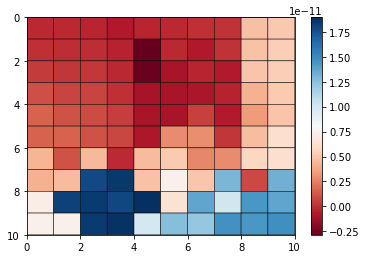

accuracy is 76.000000 lamba is 3.767535
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  5e+00  1e+00
 1:  1.9935e+02 -1.8403e+04  2e+04  1e-02  3e+00  2e+00
 2:  4.9517e+02 -1.5960e+04  2e+04  1e-02  3e+00  3e+00
 3:  8.0175e+02 -8.3170e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.8947e+02 -8.2087e+02  1e+03  9e-04  2e-01  4e-01
 5:  1.7978e+01 -8.7177e+00  3e+01  2e-05  5e-03  2e-02
 6:  1.7957e-01 -8.7099e-02  3e-01  2e-07  5e-05  2e-04
 7:  1.7957e-03 -8.7097e-04  3e-03  2e-09  5e-07  2e-06
 8:  1.7957e-05 -8.7096e-06  3e-05  2e-11  5e-09  2e-08
 9:  1.7957e-07 -8.7096e-08  3e-07  2e-13  5e-11  2e-10
10:  1.7957e-09 -8.7096e-10  3e-09  2e-15  8e-13  2e-12
Optimal solution found.


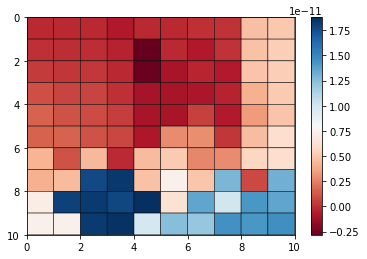

accuracy is 76.000000 lamba is 3.777555
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  5e+00  1e+00
 1:  1.9953e+02 -1.8396e+04  2e+04  1e-02  3e+00  2e+00
 2:  4.9557e+02 -1.5960e+04  2e+04  1e-02  3e+00  3e+00
 3:  8.0243e+02 -8.3219e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.8968e+02 -8.1978e+02  1e+03  9e-04  2e-01  4e-01
 5:  1.7885e+01 -8.6985e+00  3e+01  2e-05  5e-03  2e-02
 6:  1.7863e-01 -8.6907e-02  3e-01  2e-07  5e-05  2e-04
 7:  1.7863e-03 -8.6904e-04  3e-03  2e-09  5e-07  2e-06
 8:  1.7863e-05 -8.6904e-06  3e-05  2e-11  5e-09  2e-08
 9:  1.7863e-07 -8.6904e-08  3e-07  2e-13  5e-11  2e-10
10:  1.7863e-09 -8.6904e-10  3e-09  2e-15  7e-13  2e-12
Optimal solution found.


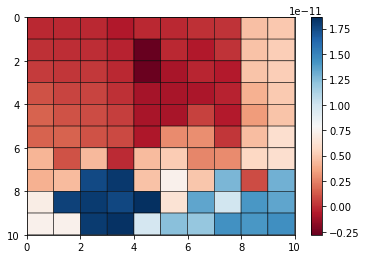

accuracy is 76.000000 lamba is 3.787575
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  5e+00  1e+00
 1:  1.9972e+02 -1.8389e+04  2e+04  1e-02  3e+00  2e+00
 2:  4.9598e+02 -1.5959e+04  2e+04  1e-02  3e+00  3e+00
 3:  8.0311e+02 -8.3266e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.8989e+02 -8.1867e+02  1e+03  9e-04  2e-01  4e-01
 5:  1.7791e+01 -8.6792e+00  3e+01  2e-05  5e-03  2e-02
 6:  1.7770e-01 -8.6714e-02  3e-01  2e-07  5e-05  2e-04
 7:  1.7769e-03 -8.6711e-04  3e-03  2e-09  5e-07  2e-06
 8:  1.7769e-05 -8.6711e-06  3e-05  2e-11  5e-09  2e-08
 9:  1.7769e-07 -8.6711e-08  3e-07  2e-13  5e-11  2e-10
10:  1.7769e-09 -8.6711e-10  3e-09  2e-15  1e-12  2e-12
Optimal solution found.


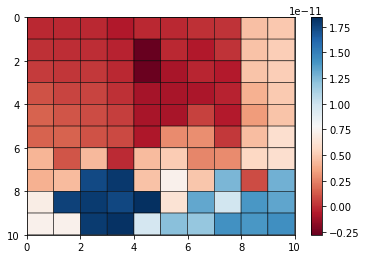

accuracy is 76.000000 lamba is 3.797595
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  5e+00  1e+00
 1:  1.9990e+02 -1.8381e+04  2e+04  1e-02  3e+00  2e+00
 2:  4.9638e+02 -1.5958e+04  2e+04  1e-02  3e+00  3e+00
 3:  8.0378e+02 -8.3313e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.9009e+02 -8.1754e+02  1e+03  9e-04  2e-01  4e-01
 5:  1.7697e+01 -8.6598e+00  3e+01  2e-05  5e-03  2e-02
 6:  1.7676e-01 -8.6520e-02  3e-01  2e-07  5e-05  2e-04
 7:  1.7676e-03 -8.6517e-04  3e-03  2e-09  5e-07  2e-06
 8:  1.7676e-05 -8.6517e-06  3e-05  2e-11  5e-09  2e-08
 9:  1.7676e-07 -8.6517e-08  3e-07  2e-13  5e-11  2e-10
10:  1.7676e-09 -8.6517e-10  3e-09  2e-15  1e-12  2e-12
Optimal solution found.


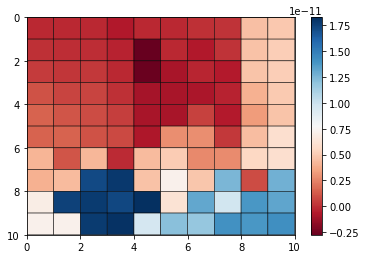

accuracy is 76.000000 lamba is 3.807615
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  5e+00  1e+00
 1:  2.0009e+02 -1.8374e+04  2e+04  1e-02  3e+00  2e+00
 2:  4.9678e+02 -1.5958e+04  2e+04  1e-02  3e+00  3e+00
 3:  8.0446e+02 -8.3358e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.9029e+02 -8.1641e+02  1e+03  9e-04  2e-01  4e-01
 5:  1.7604e+01 -8.6404e+00  3e+01  2e-05  5e-03  2e-02
 6:  1.7583e-01 -8.6325e-02  3e-01  2e-07  5e-05  2e-04
 7:  1.7582e-03 -8.6323e-04  3e-03  2e-09  5e-07  2e-06
 8:  1.7582e-05 -8.6323e-06  3e-05  2e-11  5e-09  2e-08
 9:  1.7582e-07 -8.6323e-08  3e-07  2e-13  5e-11  2e-10
10:  1.7582e-09 -8.6323e-10  3e-09  2e-15  1e-12  2e-12
Optimal solution found.


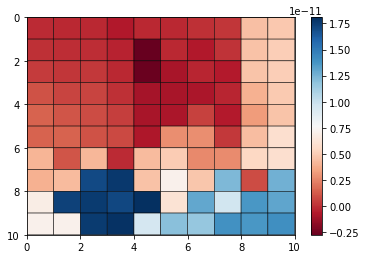

accuracy is 76.000000 lamba is 3.817635
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  5e+00  1e+00
 1:  2.0027e+02 -1.8367e+04  2e+04  1e-02  3e+00  2e+00
 2:  4.9718e+02 -1.5957e+04  2e+04  1e-02  3e+00  3e+00
 3:  8.0513e+02 -8.3403e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.9049e+02 -8.1526e+02  1e+03  9e-04  2e-01  4e-01
 5:  1.7510e+01 -8.6208e+00  3e+01  2e-05  5e-03  2e-02
 6:  1.7489e-01 -8.6129e-02  3e-01  2e-07  5e-05  2e-04
 7:  1.7489e-03 -8.6127e-04  3e-03  2e-09  5e-07  2e-06
 8:  1.7489e-05 -8.6127e-06  3e-05  2e-11  5e-09  2e-08
 9:  1.7489e-07 -8.6127e-08  3e-07  2e-13  5e-11  2e-10
10:  1.7489e-09 -8.6127e-10  3e-09  2e-15  8e-13  2e-12
Optimal solution found.


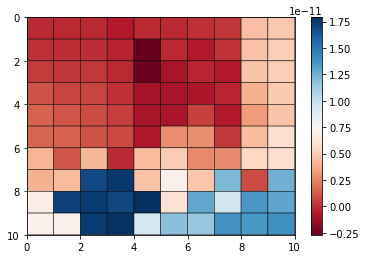

accuracy is 76.000000 lamba is 3.827655
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  5e+00  1e+00
 1:  2.0045e+02 -1.8360e+04  2e+04  1e-02  3e+00  2e+00
 2:  4.9758e+02 -1.5957e+04  2e+04  1e-02  3e+00  3e+00
 3:  8.0580e+02 -8.3446e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.9068e+02 -8.1410e+02  1e+03  9e-04  2e-01  4e-01
 5:  1.7416e+01 -8.6012e+00  3e+01  2e-05  5e-03  2e-02
 6:  1.7396e-01 -8.5933e-02  3e-01  2e-07  5e-05  2e-04
 7:  1.7395e-03 -8.5931e-04  3e-03  2e-09  5e-07  2e-06
 8:  1.7395e-05 -8.5931e-06  3e-05  2e-11  5e-09  2e-08
 9:  1.7395e-07 -8.5931e-08  3e-07  2e-13  5e-11  2e-10
10:  1.7395e-09 -8.5931e-10  3e-09  2e-15  8e-13  2e-12
Optimal solution found.


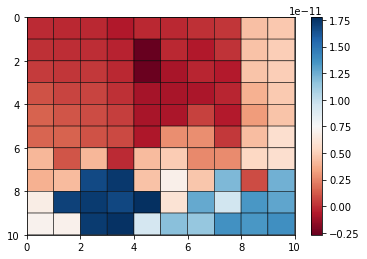

accuracy is 77.000000 lamba is 3.837675
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  5e+00  1e+00
 1:  2.0064e+02 -1.8353e+04  2e+04  1e-02  3e+00  2e+00
 2:  4.9797e+02 -1.5956e+04  2e+04  1e-02  3e+00  3e+00
 3:  8.0647e+02 -8.3488e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.9087e+02 -8.1292e+02  1e+03  9e-04  2e-01  4e-01
 5:  1.7323e+01 -8.5815e+00  3e+01  2e-05  5e-03  2e-02
 6:  1.7302e-01 -8.5736e-02  3e-01  2e-07  5e-05  2e-04
 7:  1.7302e-03 -8.5734e-04  3e-03  2e-09  5e-07  2e-06
 8:  1.7302e-05 -8.5734e-06  3e-05  2e-11  5e-09  2e-08
 9:  1.7302e-07 -8.5734e-08  3e-07  2e-13  5e-11  2e-10
10:  1.7302e-09 -8.5734e-10  3e-09  2e-15  1e-12  2e-12
Optimal solution found.


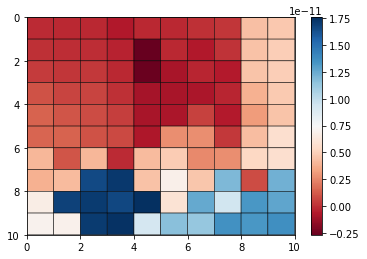

accuracy is 77.000000 lamba is 3.847695
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  5e+00  1e+00
 1:  2.0082e+02 -1.8346e+04  2e+04  1e-02  3e+00  2e+00
 2:  4.9836e+02 -1.5955e+04  2e+04  1e-02  3e+00  3e+00
 3:  8.0714e+02 -8.3529e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.9106e+02 -8.1174e+02  1e+03  9e-04  2e-01  4e-01
 5:  1.7229e+01 -8.5617e+00  3e+01  2e-05  5e-03  2e-02
 6:  1.7209e-01 -8.5538e-02  3e-01  2e-07  5e-05  2e-04
 7:  1.7209e-03 -8.5536e-04  3e-03  2e-09  5e-07  2e-06
 8:  1.7209e-05 -8.5536e-06  3e-05  2e-11  5e-09  2e-08
 9:  1.7209e-07 -8.5536e-08  3e-07  2e-13  5e-11  2e-10
10:  1.7209e-09 -8.5536e-10  3e-09  2e-15  7e-13  2e-12
Optimal solution found.


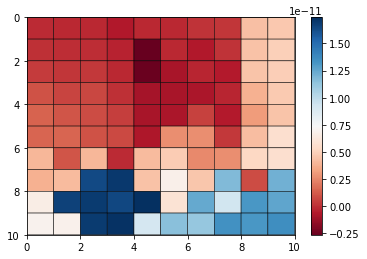

accuracy is 77.000000 lamba is 3.857715
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  5e+00  1e+00
 1:  2.0100e+02 -1.8339e+04  2e+04  1e-02  3e+00  2e+00
 2:  4.9875e+02 -1.5955e+04  2e+04  1e-02  3e+00  3e+00
 3:  8.0780e+02 -8.3570e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.9124e+02 -8.1054e+02  1e+03  9e-04  2e-01  4e-01
 5:  1.7136e+01 -8.5419e+00  3e+01  2e-05  5e-03  2e-02
 6:  1.7116e-01 -8.5340e-02  3e-01  2e-07  5e-05  2e-04
 7:  1.7115e-03 -8.5338e-04  3e-03  2e-09  5e-07  2e-06
 8:  1.7115e-05 -8.5337e-06  3e-05  2e-11  5e-09  2e-08
 9:  1.7115e-07 -8.5337e-08  3e-07  2e-13  5e-11  2e-10
10:  1.7115e-09 -8.5337e-10  3e-09  2e-15  1e-12  2e-12
Optimal solution found.


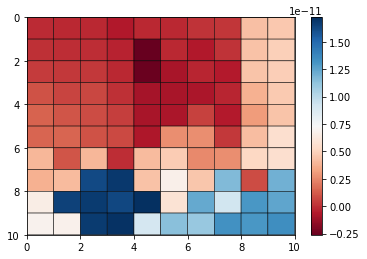

accuracy is 77.000000 lamba is 3.867735
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  5e+00  1e+00
 1:  2.0118e+02 -1.8332e+04  2e+04  1e-02  3e+00  2e+00
 2:  4.9914e+02 -1.5954e+04  2e+04  1e-02  3e+00  3e+00
 3:  8.0847e+02 -8.3609e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.9142e+02 -8.0933e+02  1e+03  9e-04  2e-01  4e-01
 5:  1.7042e+01 -8.5220e+00  3e+01  2e-05  5e-03  2e-02
 6:  1.7023e-01 -8.5141e-02  3e-01  2e-07  5e-05  2e-04
 7:  1.7022e-03 -8.5138e-04  3e-03  2e-09  5e-07  2e-06
 8:  1.7022e-05 -8.5138e-06  3e-05  2e-11  5e-09  2e-08
 9:  1.7022e-07 -8.5138e-08  3e-07  2e-13  5e-11  2e-10
10:  1.7022e-09 -8.5138e-10  3e-09  2e-15  1e-12  2e-12
Optimal solution found.


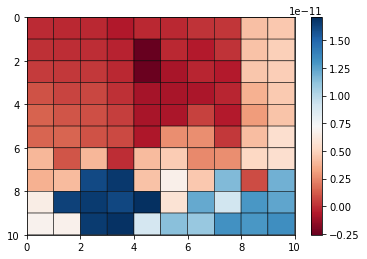

accuracy is 77.000000 lamba is 3.877756
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  5e+00  1e+00
 1:  2.0136e+02 -1.8325e+04  2e+04  1e-02  3e+00  2e+00
 2:  4.9953e+02 -1.5953e+04  2e+04  1e-02  3e+00  3e+00
 3:  8.0913e+02 -8.3647e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.9160e+02 -8.0810e+02  1e+03  9e-04  2e-01  4e-01
 5:  1.6949e+01 -8.5020e+00  3e+01  2e-05  5e-03  2e-02
 6:  1.6929e-01 -8.4941e-02  3e-01  2e-07  5e-05  2e-04
 7:  1.6929e-03 -8.4938e-04  3e-03  2e-09  5e-07  2e-06
 8:  1.6929e-05 -8.4938e-06  3e-05  2e-11  5e-09  2e-08
 9:  1.6929e-07 -8.4938e-08  3e-07  2e-13  5e-11  2e-10
10:  1.6929e-09 -8.4938e-10  3e-09  2e-15  8e-13  2e-12
Optimal solution found.


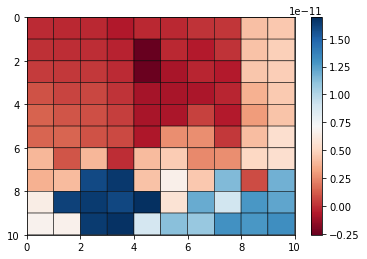

accuracy is 77.000000 lamba is 3.887776
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  5e+00  1e+00
 1:  2.0154e+02 -1.8318e+04  2e+04  1e-02  3e+00  2e+00
 2:  4.9991e+02 -1.5952e+04  2e+04  1e-02  3e+00  3e+00
 3:  8.0979e+02 -8.3685e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.9177e+02 -8.0687e+02  1e+03  9e-04  2e-01  4e-01
 5:  1.6856e+01 -8.4819e+00  3e+01  2e-05  4e-03  2e-02
 6:  1.6836e-01 -8.4740e-02  3e-01  2e-07  4e-05  2e-04
 7:  1.6836e-03 -8.4738e-04  3e-03  2e-09  4e-07  2e-06
 8:  1.6836e-05 -8.4738e-06  3e-05  2e-11  4e-09  2e-08
 9:  1.6836e-07 -8.4738e-08  3e-07  2e-13  4e-11  2e-10
10:  1.6836e-09 -8.4738e-10  3e-09  2e-15  5e-13  2e-12
Optimal solution found.


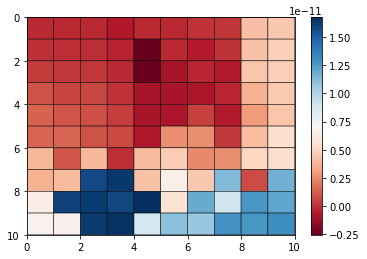

accuracy is 77.000000 lamba is 3.897796
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  5e+00  1e+00
 1:  2.0172e+02 -1.8310e+04  2e+04  1e-02  3e+00  2e+00
 2:  5.0030e+02 -1.5952e+04  2e+04  1e-02  3e+00  3e+00
 3:  8.1045e+02 -8.3721e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.9194e+02 -8.0562e+02  1e+03  9e-04  2e-01  4e-01
 5:  1.6763e+01 -8.4618e+00  3e+01  2e-05  4e-03  2e-02
 6:  1.6743e-01 -8.4539e-02  3e-01  2e-07  4e-05  2e-04
 7:  1.6743e-03 -8.4537e-04  3e-03  2e-09  4e-07  2e-06
 8:  1.6743e-05 -8.4537e-06  3e-05  2e-11  4e-09  2e-08
 9:  1.6743e-07 -8.4537e-08  3e-07  2e-13  4e-11  2e-10
10:  1.6743e-09 -8.4537e-10  3e-09  2e-15  7e-13  2e-12
Optimal solution found.


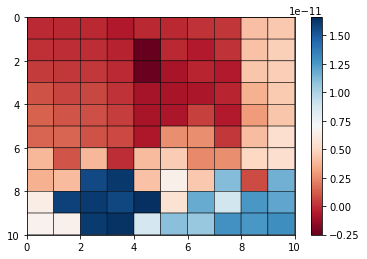

accuracy is 77.000000 lamba is 3.907816
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  5e+00  1e+00
 1:  2.0190e+02 -1.8303e+04  2e+04  1e-02  3e+00  2e+00
 2:  5.0068e+02 -1.5951e+04  2e+04  1e-02  3e+00  3e+00
 3:  8.1110e+02 -8.3756e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.9210e+02 -8.0437e+02  1e+03  9e-04  2e-01  4e-01
 5:  1.6670e+01 -8.4416e+00  3e+01  2e-05  4e-03  2e-02
 6:  1.6650e-01 -8.4337e-02  3e-01  2e-07  4e-05  2e-04
 7:  1.6650e-03 -8.4335e-04  3e-03  2e-09  4e-07  2e-06
 8:  1.6650e-05 -8.4335e-06  3e-05  2e-11  4e-09  2e-08
 9:  1.6650e-07 -8.4335e-08  3e-07  2e-13  4e-11  2e-10
10:  1.6650e-09 -8.4335e-10  3e-09  2e-15  9e-13  2e-12
Optimal solution found.


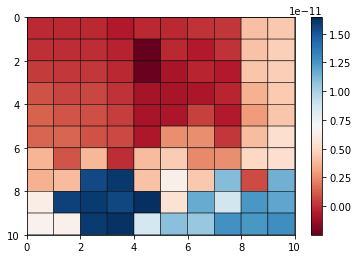

accuracy is 77.000000 lamba is 3.917836
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  5e+00  1e+00
 1:  2.0208e+02 -1.8296e+04  2e+04  1e-02  3e+00  2e+00
 2:  5.0106e+02 -1.5950e+04  2e+04  1e-02  3e+00  3e+00
 3:  8.1176e+02 -8.3791e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.9226e+02 -8.0310e+02  1e+03  9e-04  2e-01  4e-01
 5:  1.6577e+01 -8.4214e+00  3e+01  2e-05  4e-03  2e-02
 6:  1.6558e-01 -8.4135e-02  3e-01  2e-07  4e-05  2e-04
 7:  1.6557e-03 -8.4132e-04  3e-03  2e-09  4e-07  2e-06
 8:  1.6557e-05 -8.4132e-06  3e-05  2e-11  4e-09  2e-08
 9:  1.6557e-07 -8.4132e-08  3e-07  2e-13  4e-11  2e-10
10:  1.6557e-09 -8.4132e-10  3e-09  2e-15  2e-12  2e-12
Optimal solution found.


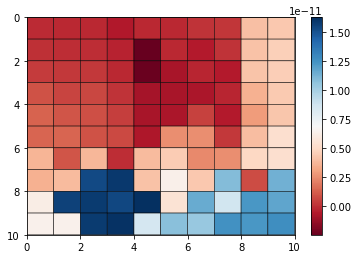

accuracy is 77.000000 lamba is 3.927856
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  5e+00  1e+00
 1:  2.0226e+02 -1.8289e+04  2e+04  1e-02  3e+00  2e+00
 2:  5.0143e+02 -1.5949e+04  2e+04  1e-02  3e+00  3e+00
 3:  8.1241e+02 -8.3824e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.9242e+02 -8.0182e+02  1e+03  9e-04  2e-01  4e-01
 5:  1.6484e+01 -8.4011e+00  3e+01  2e-05  4e-03  2e-02
 6:  1.6465e-01 -8.3931e-02  3e-01  2e-07  4e-05  2e-04
 7:  1.6465e-03 -8.3929e-04  3e-03  2e-09  4e-07  2e-06
 8:  1.6465e-05 -8.3929e-06  3e-05  2e-11  4e-09  2e-08
 9:  1.6465e-07 -8.3929e-08  3e-07  2e-13  4e-11  2e-10
10:  1.6465e-09 -8.3929e-10  3e-09  2e-15  7e-13  2e-12
Optimal solution found.


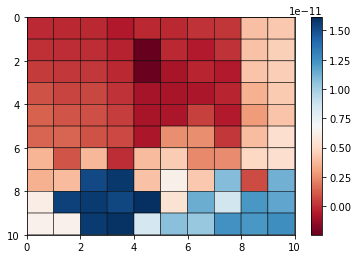

accuracy is 77.000000 lamba is 3.937876
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  5e+00  1e+00
 1:  2.0244e+02 -1.8282e+04  2e+04  1e-02  3e+00  2e+00
 2:  5.0119e+02 -1.5953e+04  2e+04  1e-02  3e+00  3e+00
 3:  8.1189e+02 -8.3845e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.9227e+02 -7.9908e+02  1e+03  9e-04  2e-01  4e-01
 5:  1.6334e+01 -8.3639e+00  3e+01  2e-05  4e-03  2e-02
 6:  1.6315e-01 -8.3560e-02  3e-01  2e-07  4e-05  2e-04
 7:  1.6315e-03 -8.3558e-04  3e-03  2e-09  4e-07  2e-06
 8:  1.6315e-05 -8.3558e-06  3e-05  2e-11  4e-09  2e-08
 9:  1.6315e-07 -8.3558e-08  3e-07  2e-13  4e-11  2e-10
10:  1.6315e-09 -8.3558e-10  3e-09  2e-15  1e-12  2e-12
Optimal solution found.


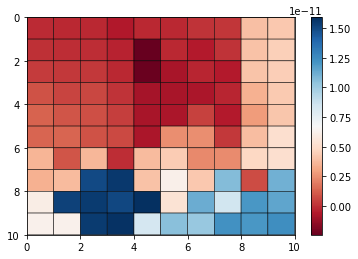

accuracy is 77.000000 lamba is 3.947896
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  5e+00  1e+00
 1:  2.0262e+02 -1.8275e+04  2e+04  1e-02  3e+00  2e+00
 2:  5.0079e+02 -1.5958e+04  2e+04  1e-02  3e+00  3e+00
 3:  8.1109e+02 -8.3859e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.9203e+02 -7.9594e+02  1e+03  9e-04  2e-01  4e-01
 5:  1.6170e+01 -8.3223e+00  3e+01  2e-05  4e-03  2e-02
 6:  1.6152e-01 -8.3145e-02  3e-01  2e-07  4e-05  2e-04
 7:  1.6151e-03 -8.3143e-04  3e-03  2e-09  4e-07  2e-06
 8:  1.6151e-05 -8.3143e-06  3e-05  2e-11  4e-09  2e-08
 9:  1.6151e-07 -8.3143e-08  3e-07  2e-13  4e-11  2e-10
10:  1.6151e-09 -8.3143e-10  3e-09  2e-15  9e-13  2e-12
Optimal solution found.


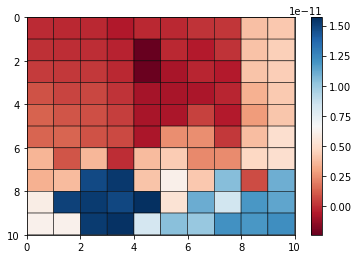

accuracy is 77.000000 lamba is 3.957916
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  5e+00  1e+00
 1:  2.0279e+02 -1.8268e+04  2e+04  1e-02  3e+00  2e+00
 2:  5.0039e+02 -1.5963e+04  2e+04  1e-02  3e+00  3e+00
 3:  8.1030e+02 -8.3868e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.9179e+02 -7.9280e+02  1e+03  9e-04  2e-01  4e-01
 5:  1.6008e+01 -8.2808e+00  3e+01  2e-05  4e-03  2e-02
 6:  1.5989e-01 -8.2729e-02  3e-01  2e-07  4e-05  2e-04
 7:  1.5989e-03 -8.2727e-04  3e-03  2e-09  4e-07  2e-06
 8:  1.5989e-05 -8.2727e-06  3e-05  2e-11  4e-09  2e-08
 9:  1.5989e-07 -8.2727e-08  3e-07  2e-13  4e-11  2e-10
10:  1.5989e-09 -8.2727e-10  3e-09  2e-15  1e-12  2e-12
Optimal solution found.


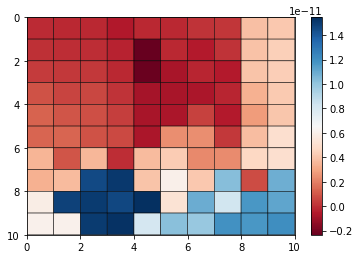

accuracy is 77.000000 lamba is 3.967936
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  5e+00  1e+00
 1:  2.0297e+02 -1.8260e+04  2e+04  1e-02  3e+00  2e+00
 2:  5.0000e+02 -1.5968e+04  2e+04  1e-02  3e+00  3e+00
 3:  8.0954e+02 -8.3873e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.9155e+02 -7.8965e+02  1e+03  9e-04  2e-01  4e-01
 5:  1.5846e+01 -8.2392e+00  2e+01  2e-05  4e-03  2e-02
 6:  1.5828e-01 -8.2314e-02  2e-01  2e-07  4e-05  2e-04
 7:  1.5828e-03 -8.2312e-04  2e-03  2e-09  4e-07  2e-06
 8:  1.5828e-05 -8.2312e-06  2e-05  2e-11  4e-09  2e-08
 9:  1.5828e-07 -8.2312e-08  2e-07  2e-13  4e-11  2e-10
10:  1.5828e-09 -8.2312e-10  2e-09  2e-15  6e-13  2e-12
Optimal solution found.


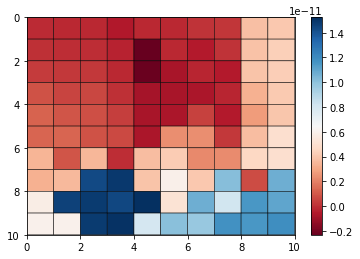

accuracy is 77.000000 lamba is 3.977956
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  5e+00  1e+00
 1:  2.0315e+02 -1.8253e+04  2e+04  1e-02  3e+00  2e+00
 2:  4.9961e+02 -1.5973e+04  2e+04  1e-02  3e+00  3e+00
 3:  8.0879e+02 -8.3874e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.9130e+02 -7.8648e+02  1e+03  9e-04  2e-01  4e-01
 5:  1.5685e+01 -8.1977e+00  2e+01  2e-05  4e-03  2e-02
 6:  1.5668e-01 -8.1899e-02  2e-01  2e-07  4e-05  2e-04
 7:  1.5667e-03 -8.1897e-04  2e-03  2e-09  4e-07  2e-06
 8:  1.5667e-05 -8.1897e-06  2e-05  2e-11  4e-09  2e-08
 9:  1.5667e-07 -8.1897e-08  2e-07  2e-13  4e-11  2e-10
10:  1.5667e-09 -8.1897e-10  2e-09  2e-15  1e-12  2e-12
Optimal solution found.


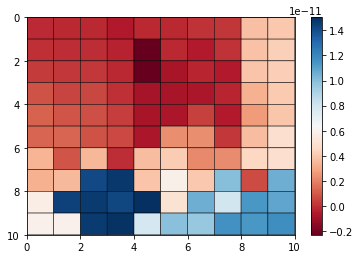

accuracy is 77.000000 lamba is 3.987976
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  5e+00  1e+00
 1:  2.0332e+02 -1.8246e+04  2e+04  1e-02  3e+00  2e+00
 2:  4.9923e+02 -1.5978e+04  2e+04  1e-02  3e+00  3e+00
 3:  8.0806e+02 -8.3871e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.9105e+02 -7.8330e+02  1e+03  9e-04  2e-01  4e-01
 5:  1.5526e+01 -8.1561e+00  2e+01  2e-05  4e-03  2e-02
 6:  1.5508e-01 -8.1483e-02  2e-01  2e-07  4e-05  2e-04
 7:  1.5508e-03 -8.1482e-04  2e-03  2e-09  4e-07  2e-06
 8:  1.5508e-05 -8.1482e-06  2e-05  2e-11  4e-09  2e-08
 9:  1.5508e-07 -8.1482e-08  2e-07  2e-13  4e-11  2e-10
10:  1.5508e-09 -8.1482e-10  2e-09  2e-15  7e-13  2e-12
Optimal solution found.


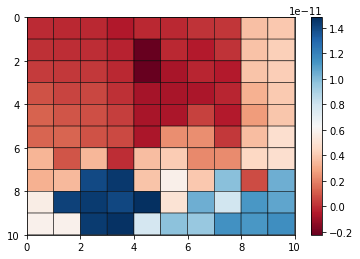

accuracy is 77.000000 lamba is 3.997996
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  5e+00  1e+00
 1:  2.0350e+02 -1.8239e+04  2e+04  1e-02  3e+00  2e+00
 2:  4.9886e+02 -1.5982e+04  2e+04  1e-02  3e+00  3e+00
 3:  8.0735e+02 -8.3864e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.9079e+02 -7.8012e+02  1e+03  9e-04  2e-01  4e-01
 5:  1.5367e+01 -8.1146e+00  2e+01  2e-05  4e-03  2e-02
 6:  1.5350e-01 -8.1068e-02  2e-01  2e-07  4e-05  2e-04
 7:  1.5350e-03 -8.1067e-04  2e-03  2e-09  4e-07  2e-06
 8:  1.5350e-05 -8.1066e-06  2e-05  2e-11  4e-09  2e-08
 9:  1.5350e-07 -8.1066e-08  2e-07  2e-13  4e-11  2e-10
10:  1.5350e-09 -8.1066e-10  2e-09  2e-15  6e-13  2e-12
Optimal solution found.


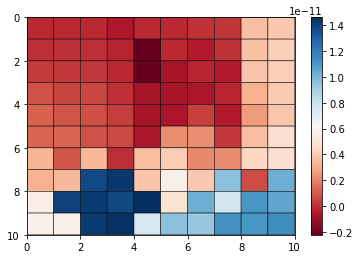

accuracy is 77.000000 lamba is 4.008016
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  5e+00  1e+00
 1:  2.0367e+02 -1.8232e+04  2e+04  1e-02  3e+00  2e+00
 2:  4.9849e+02 -1.5987e+04  2e+04  1e-02  3e+00  3e+00
 3:  8.0665e+02 -8.3853e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.9053e+02 -7.7692e+02  1e+03  9e-04  2e-01  4e-01
 5:  1.5210e+01 -8.0731e+00  2e+01  2e-05  4e-03  2e-02
 6:  1.5193e-01 -8.0653e-02  2e-01  2e-07  4e-05  2e-04
 7:  1.5193e-03 -8.0652e-04  2e-03  2e-09  4e-07  2e-06
 8:  1.5193e-05 -8.0652e-06  2e-05  2e-11  4e-09  2e-08
 9:  1.5193e-07 -8.0652e-08  2e-07  2e-13  4e-11  2e-10
10:  1.5193e-09 -8.0652e-10  2e-09  2e-15  8e-13  2e-12
Optimal solution found.


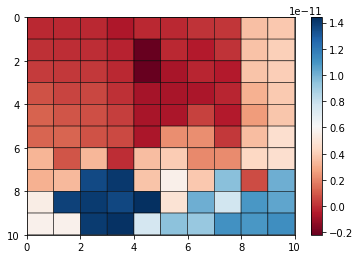

accuracy is 77.000000 lamba is 4.018036
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  5e+00  1e+00
 1:  2.0385e+02 -1.8225e+04  2e+04  1e-02  3e+00  2e+00
 2:  4.9812e+02 -1.5991e+04  2e+04  1e-02  3e+00  3e+00
 3:  8.0598e+02 -8.3839e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.9027e+02 -7.7372e+02  1e+03  9e-04  2e-01  4e-01
 5:  1.5054e+01 -8.0316e+00  2e+01  2e-05  4e-03  2e-02
 6:  1.5037e-01 -8.0239e-02  2e-01  2e-07  4e-05  2e-04
 7:  1.5036e-03 -8.0237e-04  2e-03  2e-09  4e-07  2e-06
 8:  1.5036e-05 -8.0237e-06  2e-05  2e-11  4e-09  2e-08
 9:  1.5036e-07 -8.0237e-08  2e-07  2e-13  4e-11  2e-10
10:  1.5036e-09 -8.0237e-10  2e-09  2e-15  1e-12  2e-12
Optimal solution found.


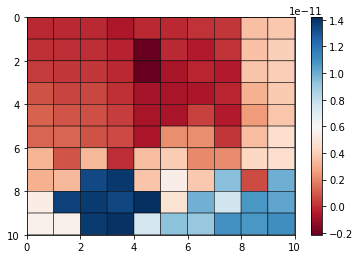

accuracy is 77.000000 lamba is 4.028056
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  5e+00  1e+00
 1:  2.0402e+02 -1.8217e+04  2e+04  1e-02  3e+00  2e+00
 2:  4.9776e+02 -1.5996e+04  2e+04  1e-02  3e+00  3e+00
 3:  8.0531e+02 -8.3820e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.9000e+02 -7.7050e+02  1e+03  8e-04  2e-01  4e-01
 5:  1.4898e+01 -7.9901e+00  2e+01  2e-05  4e-03  2e-02
 6:  1.4882e-01 -7.9824e-02  2e-01  2e-07  4e-05  2e-04
 7:  1.4881e-03 -7.9822e-04  2e-03  2e-09  4e-07  2e-06
 8:  1.4881e-05 -7.9822e-06  2e-05  2e-11  4e-09  2e-08
 9:  1.4881e-07 -7.9822e-08  2e-07  2e-13  4e-11  2e-10
10:  1.4881e-09 -7.9822e-10  2e-09  2e-15  6e-13  2e-12
Optimal solution found.


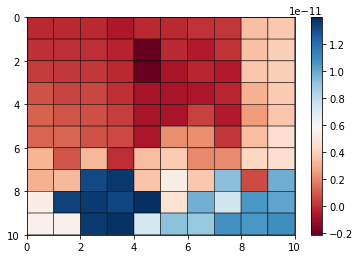

accuracy is 77.000000 lamba is 4.038076
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  5e+00  1e+00
 1:  2.0420e+02 -1.8210e+04  2e+04  1e-02  3e+00  2e+00
 2:  4.9741e+02 -1.6000e+04  2e+04  1e-02  3e+00  3e+00
 3:  8.0467e+02 -8.3799e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.8973e+02 -7.6728e+02  1e+03  8e-04  2e-01  4e-01
 5:  1.4744e+01 -7.9486e+00  2e+01  2e-05  4e-03  2e-02
 6:  1.4728e-01 -7.9410e-02  2e-01  2e-07  4e-05  2e-04
 7:  1.4727e-03 -7.9408e-04  2e-03  2e-09  4e-07  2e-06
 8:  1.4727e-05 -7.9408e-06  2e-05  2e-11  4e-09  2e-08
 9:  1.4727e-07 -7.9408e-08  2e-07  2e-13  4e-11  2e-10
10:  1.4727e-09 -7.9408e-10  2e-09  2e-15  1e-12  2e-12
Optimal solution found.


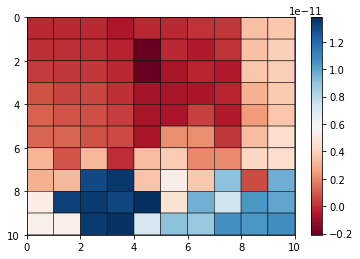

accuracy is 77.000000 lamba is 4.048096
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  5e+00  1e+00
 1:  2.0437e+02 -1.8203e+04  2e+04  1e-02  3e+00  2e+00
 2:  4.9706e+02 -1.6004e+04  2e+04  1e-02  3e+00  3e+00
 3:  8.0403e+02 -8.3774e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.8946e+02 -7.6404e+02  1e+03  8e-04  2e-01  4e-01
 5:  1.4591e+01 -7.9071e+00  2e+01  2e-05  4e-03  2e-02
 6:  1.4575e-01 -7.8996e-02  2e-01  2e-07  4e-05  2e-04
 7:  1.4574e-03 -7.8994e-04  2e-03  2e-09  4e-07  2e-06
 8:  1.4574e-05 -7.8994e-06  2e-05  2e-11  4e-09  2e-08
 9:  1.4574e-07 -7.8994e-08  2e-07  2e-13  4e-11  2e-10
10:  1.4574e-09 -7.8994e-10  2e-09  2e-15  4e-13  2e-12
Optimal solution found.


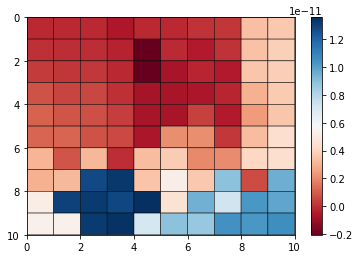

accuracy is 77.000000 lamba is 4.058116
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  5e+00  1e+00
 1:  2.0454e+02 -1.8196e+04  2e+04  1e-02  3e+00  2e+00
 2:  4.9671e+02 -1.6008e+04  2e+04  1e-02  3e+00  3e+00
 3:  8.0342e+02 -8.3746e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.8932e+02 -7.6280e+02  1e+03  8e-04  2e-01  4e-01
 5:  1.4474e+01 -7.8908e+00  2e+01  2e-05  4e-03  2e-02
 6:  1.4458e-01 -7.8832e-02  2e-01  2e-07  4e-05  2e-04
 7:  1.4458e-03 -7.8831e-04  2e-03  2e-09  4e-07  2e-06
 8:  1.4458e-05 -7.8830e-06  2e-05  2e-11  4e-09  2e-08
 9:  1.4458e-07 -7.8830e-08  2e-07  2e-13  4e-11  2e-10
10:  1.4458e-09 -7.8830e-10  2e-09  2e-15  9e-13  2e-12
Optimal solution found.


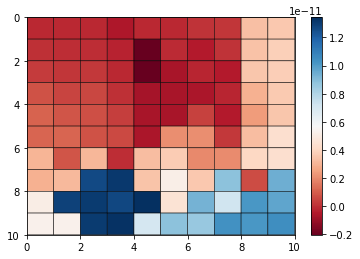

accuracy is 77.000000 lamba is 4.068136
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  5e+00  1e+00
 1:  2.0471e+02 -1.8189e+04  2e+04  1e-02  3e+00  2e+00
 2:  4.9637e+02 -1.6012e+04  2e+04  1e-02  3e+00  3e+00
 3:  8.0281e+02 -8.3714e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.8941e+02 -7.6516e+02  1e+03  8e-04  2e-01  4e-01
 5:  1.4422e+01 -7.9194e+00  2e+01  2e-05  4e-03  2e-02
 6:  1.4406e-01 -7.9118e-02  2e-01  2e-07  4e-05  2e-04
 7:  1.4406e-03 -7.9117e-04  2e-03  2e-09  4e-07  2e-06
 8:  1.4406e-05 -7.9117e-06  2e-05  2e-11  4e-09  2e-08
 9:  1.4406e-07 -7.9117e-08  2e-07  2e-13  4e-11  2e-10
10:  1.4406e-09 -7.9117e-10  2e-09  2e-15  9e-13  2e-12
Optimal solution found.


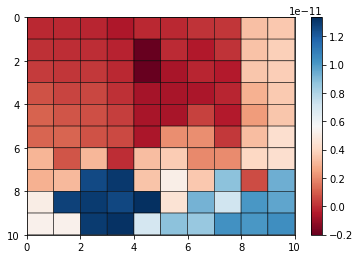

accuracy is 77.000000 lamba is 4.078156
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  5e+00  1e+00
 1:  2.0488e+02 -1.8182e+04  2e+04  1e-02  3e+00  2e+00
 2:  4.9604e+02 -1.6016e+04  2e+04  1e-02  3e+00  3e+00
 3:  8.0222e+02 -8.3680e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.8950e+02 -7.6740e+02  1e+03  8e-04  2e-01  4e-01
 5:  1.4368e+01 -7.9465e+00  2e+01  2e-05  4e-03  2e-02
 6:  1.4353e-01 -7.9389e-02  2e-01  2e-07  4e-05  2e-04
 7:  1.4352e-03 -7.9388e-04  2e-03  2e-09  4e-07  2e-06
 8:  1.4352e-05 -7.9388e-06  2e-05  2e-11  4e-09  2e-08
 9:  1.4352e-07 -7.9388e-08  2e-07  2e-13  4e-11  2e-10
10:  1.4352e-09 -7.9388e-10  2e-09  2e-15  7e-13  2e-12
Optimal solution found.


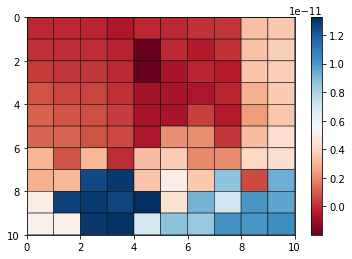

accuracy is 77.000000 lamba is 4.088176
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  5e+00  1e+00
 1:  2.0506e+02 -1.8174e+04  2e+04  1e-02  3e+00  2e+00
 2:  4.9570e+02 -1.6019e+04  2e+04  1e-02  3e+00  3e+00
 3:  8.0165e+02 -8.3642e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.8957e+02 -7.6953e+02  1e+03  8e-04  2e-01  4e-01
 5:  1.4313e+01 -7.9721e+00  2e+01  2e-05  4e-03  2e-02
 6:  1.4298e-01 -7.9646e-02  2e-01  2e-07  4e-05  2e-04
 7:  1.4297e-03 -7.9644e-04  2e-03  2e-09  4e-07  2e-06
 8:  1.4297e-05 -7.9644e-06  2e-05  2e-11  4e-09  2e-08
 9:  1.4297e-07 -7.9644e-08  2e-07  2e-13  4e-11  2e-10
10:  1.4297e-09 -7.9644e-10  2e-09  2e-15  8e-13  2e-12
Optimal solution found.


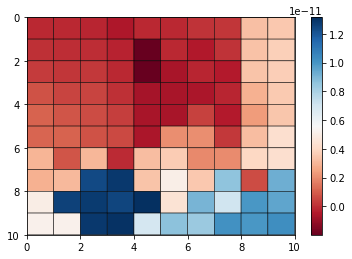

accuracy is 77.000000 lamba is 4.098196
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  5e+00  1e+00
 1:  2.0523e+02 -1.8167e+04  2e+04  1e-02  3e+00  2e+00
 2:  4.9538e+02 -1.6023e+04  2e+04  1e-02  3e+00  3e+00
 3:  8.0109e+02 -8.3601e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.8964e+02 -7.7154e+02  1e+03  8e-04  2e-01  4e-01
 5:  1.4257e+01 -7.9963e+00  2e+01  2e-05  4e-03  2e-02
 6:  1.4242e-01 -7.9887e-02  2e-01  2e-07  4e-05  2e-04
 7:  1.4241e-03 -7.9886e-04  2e-03  2e-09  4e-07  2e-06
 8:  1.4241e-05 -7.9886e-06  2e-05  2e-11  4e-09  2e-08
 9:  1.4241e-07 -7.9886e-08  2e-07  2e-13  4e-11  2e-10
10:  1.4241e-09 -7.9886e-10  2e-09  2e-15  8e-13  2e-12
Optimal solution found.


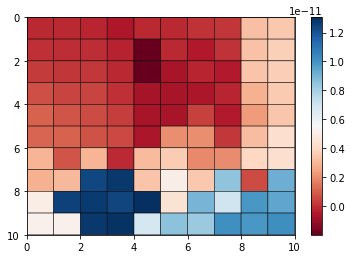

accuracy is 77.000000 lamba is 4.108216
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  5e+00  1e+00
 1:  2.0540e+02 -1.8160e+04  2e+04  1e-02  3e+00  2e+00
 2:  4.9505e+02 -1.6026e+04  2e+04  1e-02  3e+00  3e+00
 3:  8.0054e+02 -8.3558e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.8969e+02 -7.7345e+02  1e+03  9e-04  2e-01  4e-01
 5:  1.4199e+01 -8.0190e+00  2e+01  2e-05  4e-03  2e-02
 6:  1.4184e-01 -8.0115e-02  2e-01  2e-07  4e-05  2e-04
 7:  1.4184e-03 -8.0113e-04  2e-03  2e-09  4e-07  2e-06
 8:  1.4184e-05 -8.0113e-06  2e-05  2e-11  4e-09  2e-08
 9:  1.4184e-07 -8.0113e-08  2e-07  2e-13  4e-11  2e-10
10:  1.4184e-09 -8.0113e-10  2e-09  2e-15  5e-13  2e-12
Optimal solution found.


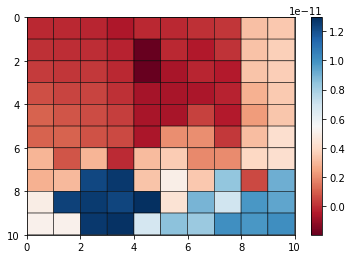

accuracy is 77.000000 lamba is 4.118236
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  5e+00  1e+00
 1:  2.0557e+02 -1.8153e+04  2e+04  1e-02  3e+00  2e+00
 2:  4.9473e+02 -1.6030e+04  2e+04  1e-02  3e+00  3e+00
 3:  8.0000e+02 -8.3512e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.8973e+02 -7.7524e+02  1e+03  9e-04  2e-01  4e-01
 5:  1.4140e+01 -8.0404e+00  2e+01  2e-05  4e-03  2e-02
 6:  1.4125e-01 -8.0329e-02  2e-01  2e-07  4e-05  2e-04
 7:  1.4125e-03 -8.0327e-04  2e-03  2e-09  4e-07  2e-06
 8:  1.4125e-05 -8.0327e-06  2e-05  2e-11  4e-09  2e-08
 9:  1.4125e-07 -8.0327e-08  2e-07  2e-13  4e-11  2e-10
10:  1.4125e-09 -8.0327e-10  2e-09  2e-15  4e-13  2e-12
Optimal solution found.


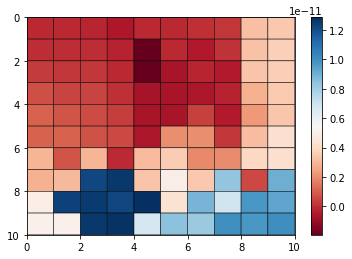

accuracy is 77.000000 lamba is 4.128257
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  5e+00  1e+00
 1:  2.0574e+02 -1.8146e+04  2e+04  1e-02  3e+00  2e+00
 2:  4.9442e+02 -1.6033e+04  2e+04  1e-02  3e+00  3e+00
 3:  7.9947e+02 -8.3463e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.8977e+02 -7.7694e+02  1e+03  9e-04  2e-01  4e-01
 5:  1.4080e+01 -8.0605e+00  2e+01  2e-05  4e-03  2e-02
 6:  1.4065e-01 -8.0529e-02  2e-01  2e-07  4e-05  2e-04
 7:  1.4065e-03 -8.0527e-04  2e-03  2e-09  4e-07  2e-06
 8:  1.4065e-05 -8.0527e-06  2e-05  2e-11  4e-09  2e-08
 9:  1.4065e-07 -8.0527e-08  2e-07  2e-13  4e-11  2e-10
10:  1.4065e-09 -8.0527e-10  2e-09  2e-15  5e-13  2e-12
Optimal solution found.


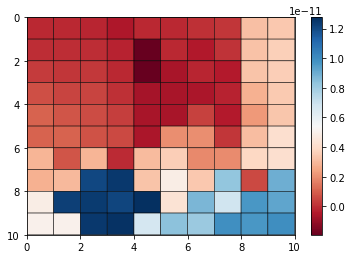

accuracy is 77.000000 lamba is 4.138277
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  5e+00  1e+00
 1:  2.0591e+02 -1.8138e+04  2e+04  1e-02  3e+00  2e+00
 2:  4.9411e+02 -1.6037e+04  2e+04  1e-02  3e+00  3e+00
 3:  7.9896e+02 -8.3412e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.8979e+02 -7.7853e+02  1e+03  9e-04  2e-01  4e-01
 5:  1.4019e+01 -8.0792e+00  2e+01  2e-05  4e-03  2e-02
 6:  1.4004e-01 -8.0716e-02  2e-01  2e-07  4e-05  2e-04
 7:  1.4004e-03 -8.0715e-04  2e-03  2e-09  4e-07  2e-06
 8:  1.4004e-05 -8.0715e-06  2e-05  2e-11  4e-09  2e-08
 9:  1.4004e-07 -8.0715e-08  2e-07  2e-13  4e-11  2e-10
10:  1.4004e-09 -8.0715e-10  2e-09  2e-15  8e-13  2e-12
Optimal solution found.


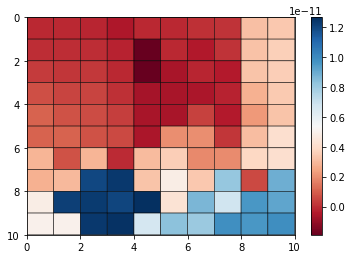

accuracy is 77.000000 lamba is 4.148297
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  5e+00  1e+00
 1:  2.0607e+02 -1.8131e+04  2e+04  1e-02  3e+00  2e+00
 2:  4.9380e+02 -1.6040e+04  2e+04  1e-02  3e+00  3e+00
 3:  7.9846e+02 -8.3358e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.8980e+02 -7.8002e+02  1e+03  9e-04  2e-01  4e-01
 5:  1.3957e+01 -8.0966e+00  2e+01  2e-05  4e-03  2e-02
 6:  1.3942e-01 -8.0891e-02  2e-01  2e-07  4e-05  2e-04
 7:  1.3942e-03 -8.0889e-04  2e-03  2e-09  4e-07  2e-06
 8:  1.3942e-05 -8.0889e-06  2e-05  2e-11  4e-09  2e-08
 9:  1.3942e-07 -8.0889e-08  2e-07  2e-13  4e-11  2e-10
10:  1.3942e-09 -8.0889e-10  2e-09  2e-15  6e-13  2e-12
Optimal solution found.


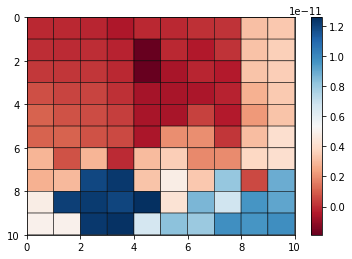

accuracy is 77.000000 lamba is 4.158317
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  5e+00  1e+00
 1:  2.0624e+02 -1.8124e+04  2e+04  1e-02  3e+00  2e+00
 2:  4.9350e+02 -1.6043e+04  2e+04  1e-02  3e+00  3e+00
 3:  7.9797e+02 -8.3301e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.8981e+02 -7.8142e+02  1e+03  9e-04  2e-01  4e-01
 5:  1.3893e+01 -8.1128e+00  2e+01  2e-05  4e-03  2e-02
 6:  1.3879e-01 -8.1053e-02  2e-01  2e-07  4e-05  2e-04
 7:  1.3879e-03 -8.1051e-04  2e-03  2e-09  4e-07  2e-06
 8:  1.3879e-05 -8.1051e-06  2e-05  2e-11  4e-09  2e-08
 9:  1.3879e-07 -8.1051e-08  2e-07  2e-13  4e-11  2e-10
10:  1.3879e-09 -8.1051e-10  2e-09  2e-15  9e-13  2e-12
Optimal solution found.


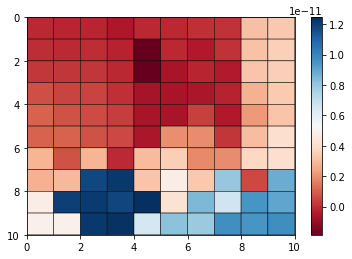

accuracy is 77.000000 lamba is 4.168337
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  5e+00  1e+00
 1:  2.0641e+02 -1.8117e+04  2e+04  1e-02  3e+00  2e+00
 2:  4.9320e+02 -1.6046e+04  2e+04  1e-02  3e+00  3e+00
 3:  7.9749e+02 -8.3242e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.8981e+02 -7.8271e+02  1e+03  9e-04  2e-01  4e-01
 5:  1.3829e+01 -8.1278e+00  2e+01  2e-05  4e-03  2e-02
 6:  1.3815e-01 -8.1202e-02  2e-01  2e-07  4e-05  2e-04
 7:  1.3814e-03 -8.1201e-04  2e-03  2e-09  4e-07  2e-06
 8:  1.3814e-05 -8.1201e-06  2e-05  2e-11  4e-09  2e-08
 9:  1.3814e-07 -8.1201e-08  2e-07  2e-13  4e-11  2e-10
10:  1.3814e-09 -8.1201e-10  2e-09  2e-15  7e-13  2e-12
Optimal solution found.


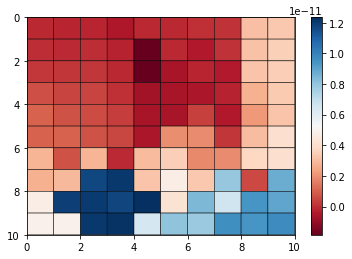

accuracy is 77.000000 lamba is 4.178357
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  5e+00  1e+00
 1:  2.0658e+02 -1.8110e+04  2e+04  1e-02  3e+00  2e+00
 2:  4.9291e+02 -1.6049e+04  2e+04  1e-02  3e+00  3e+00
 3:  7.9702e+02 -8.3181e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.8979e+02 -7.8392e+02  1e+03  9e-04  2e-01  4e-01
 5:  1.3763e+01 -8.1415e+00  2e+01  2e-05  4e-03  2e-02
 6:  1.3749e-01 -8.1340e-02  2e-01  2e-07  4e-05  2e-04
 7:  1.3749e-03 -8.1338e-04  2e-03  2e-09  4e-07  2e-06
 8:  1.3749e-05 -8.1338e-06  2e-05  2e-11  4e-09  2e-08
 9:  1.3749e-07 -8.1338e-08  2e-07  2e-13  4e-11  2e-10
10:  1.3749e-09 -8.1338e-10  2e-09  2e-15  1e-12  2e-12
Optimal solution found.


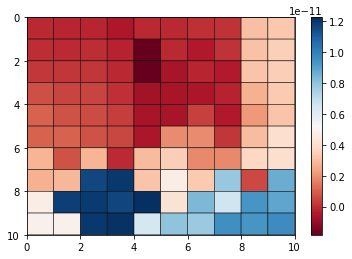

accuracy is 77.000000 lamba is 4.188377
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  5e+00  1e+00
 1:  2.0674e+02 -1.8102e+04  2e+04  1e-02  3e+00  2e+00
 2:  4.9262e+02 -1.6052e+04  2e+04  1e-02  3e+00  3e+00
 3:  7.9656e+02 -8.3117e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.8977e+02 -7.8503e+02  1e+03  9e-04  2e-01  4e-01
 5:  1.3697e+01 -8.1541e+00  2e+01  2e-05  4e-03  2e-02
 6:  1.3683e-01 -8.1466e-02  2e-01  2e-07  4e-05  2e-04
 7:  1.3683e-03 -8.1464e-04  2e-03  2e-09  4e-07  2e-06
 8:  1.3683e-05 -8.1464e-06  2e-05  2e-11  4e-09  2e-08
 9:  1.3683e-07 -8.1464e-08  2e-07  2e-13  4e-11  2e-10
10:  1.3683e-09 -8.1464e-10  2e-09  2e-15  9e-13  2e-12
Optimal solution found.


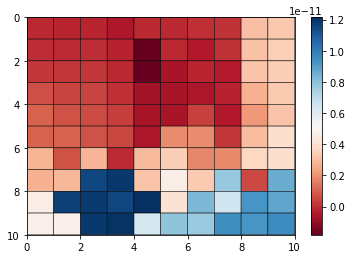

accuracy is 77.000000 lamba is 4.198397
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  5e+00  1e+00
 1:  2.0691e+02 -1.8095e+04  2e+04  1e-02  3e+00  2e+00
 2:  4.9233e+02 -1.6054e+04  2e+04  1e-02  3e+00  3e+00
 3:  7.9611e+02 -8.3052e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.8974e+02 -7.8606e+02  1e+03  9e-04  2e-01  4e-01
 5:  1.3629e+01 -8.1656e+00  2e+01  2e-05  4e-03  2e-02
 6:  1.3616e-01 -8.1581e-02  2e-01  2e-07  4e-05  2e-04
 7:  1.3615e-03 -8.1579e-04  2e-03  2e-09  4e-07  2e-06
 8:  1.3615e-05 -8.1579e-06  2e-05  2e-11  4e-09  2e-08
 9:  1.3615e-07 -8.1579e-08  2e-07  2e-13  4e-11  2e-10
10:  1.3615e-09 -8.1579e-10  2e-09  2e-15  5e-13  2e-12
Optimal solution found.


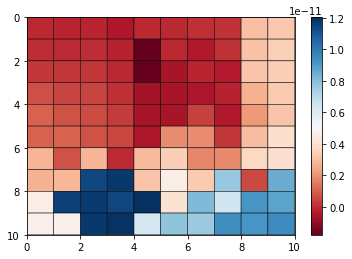

accuracy is 77.000000 lamba is 4.208417
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  5e+00  1e+00
 1:  2.0708e+02 -1.8088e+04  2e+04  1e-02  3e+00  2e+00
 2:  4.9205e+02 -1.6057e+04  2e+04  1e-02  3e+00  3e+00
 3:  7.9567e+02 -8.2984e+03  1e+04  7e-03  1e+00  3e+00
 4:  2.8970e+02 -7.8699e+02  1e+03  9e-04  2e-01  4e-01
 5:  1.3561e+01 -8.1759e+00  2e+01  2e-05  4e-03  2e-02
 6:  1.3547e-01 -8.1684e-02  2e-01  2e-07  4e-05  2e-04
 7:  1.3547e-03 -8.1683e-04  2e-03  2e-09  4e-07  2e-06
 8:  1.3547e-05 -8.1683e-06  2e-05  2e-11  4e-09  2e-08
 9:  1.3547e-07 -8.1683e-08  2e-07  2e-13  4e-11  2e-10
10:  1.3547e-09 -8.1683e-10  2e-09  2e-15  9e-13  2e-12
Optimal solution found.


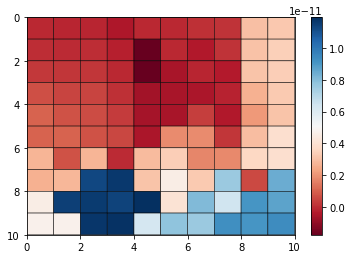

accuracy is 77.000000 lamba is 4.218437
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  5e+00  1e+00
 1:  2.0724e+02 -1.8081e+04  2e+04  1e-02  3e+00  2e+00
 2:  4.9177e+02 -1.6060e+04  2e+04  1e-02  3e+00  3e+00
 3:  7.9524e+02 -8.2913e+03  1e+04  7e-03  1e+00  3e+00
 4:  2.8966e+02 -7.8784e+02  1e+03  9e-04  2e-01  4e-01
 5:  1.3492e+01 -8.1852e+00  2e+01  2e-05  4e-03  2e-02
 6:  1.3478e-01 -8.1777e-02  2e-01  2e-07  4e-05  2e-04
 7:  1.3478e-03 -8.1775e-04  2e-03  2e-09  4e-07  2e-06
 8:  1.3478e-05 -8.1775e-06  2e-05  2e-11  4e-09  2e-08
 9:  1.3478e-07 -8.1775e-08  2e-07  2e-13  4e-11  2e-10
10:  1.3478e-09 -8.1775e-10  2e-09  2e-15  7e-13  2e-12
Optimal solution found.


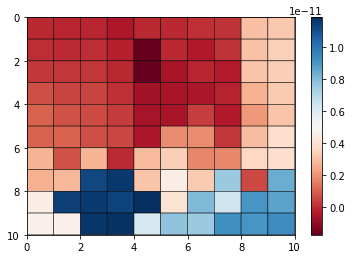

accuracy is 77.000000 lamba is 4.228457
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  5e+00  1e+00
 1:  2.0741e+02 -1.8073e+04  2e+04  1e-02  3e+00  2e+00
 2:  4.9150e+02 -1.6062e+04  2e+04  1e-02  3e+00  3e+00
 3:  7.9482e+02 -8.2841e+03  1e+04  7e-03  1e+00  3e+00
 4:  2.8960e+02 -7.8861e+02  1e+03  9e-04  2e-01  4e-01
 5:  1.3422e+01 -8.1934e+00  2e+01  2e-05  4e-03  2e-02
 6:  1.3409e-01 -8.1859e-02  2e-01  2e-07  4e-05  2e-04
 7:  1.3408e-03 -8.1858e-04  2e-03  2e-09  4e-07  2e-06
 8:  1.3408e-05 -8.1858e-06  2e-05  2e-11  4e-09  2e-08
 9:  1.3408e-07 -8.1858e-08  2e-07  2e-13  4e-11  2e-10
10:  1.3408e-09 -8.1858e-10  2e-09  2e-15  7e-13  2e-12
Optimal solution found.


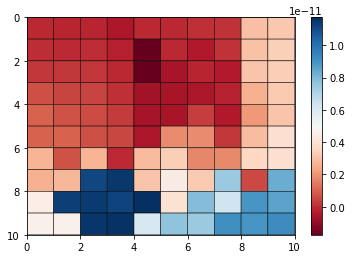

accuracy is 77.000000 lamba is 4.238477
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  5e+00  1e+00
 1:  2.0757e+02 -1.8066e+04  2e+04  1e-02  3e+00  2e+00
 2:  4.9122e+02 -1.6064e+04  2e+04  1e-02  3e+00  3e+00
 3:  7.9441e+02 -8.2767e+03  1e+04  7e-03  1e+00  3e+00
 4:  2.8954e+02 -7.8929e+02  1e+03  9e-04  2e-01  4e-01
 5:  1.3351e+01 -8.2005e+00  2e+01  2e-05  4e-03  2e-02
 6:  1.3338e-01 -8.1931e-02  2e-01  2e-07  4e-05  2e-04
 7:  1.3338e-03 -8.1929e-04  2e-03  2e-09  4e-07  2e-06
 8:  1.3338e-05 -8.1929e-06  2e-05  2e-11  4e-09  2e-08
 9:  1.3338e-07 -8.1929e-08  2e-07  2e-13  4e-11  2e-10
10:  1.3338e-09 -8.1929e-10  2e-09  2e-15  1e-12  2e-12
Optimal solution found.


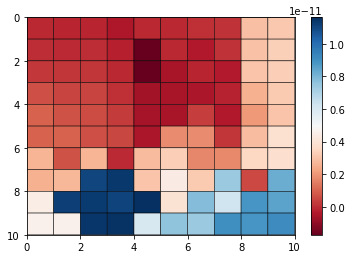

accuracy is 77.000000 lamba is 4.248497
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  5e+00  1e+00
 1:  2.0774e+02 -1.8059e+04  2e+04  1e-02  3e+00  2e+00
 2:  4.9095e+02 -1.6067e+04  2e+04  1e-02  3e+00  3e+00
 3:  7.9401e+02 -8.2691e+03  1e+04  7e-03  1e+00  3e+00
 4:  2.8947e+02 -7.8989e+02  1e+03  9e-04  2e-01  4e-01
 5:  1.3279e+01 -8.2067e+00  2e+01  2e-05  4e-03  2e-02
 6:  1.3266e-01 -8.1993e-02  2e-01  2e-07  4e-05  2e-04
 7:  1.3266e-03 -8.1991e-04  2e-03  2e-09  4e-07  2e-06
 8:  1.3266e-05 -8.1991e-06  2e-05  2e-11  4e-09  2e-08
 9:  1.3266e-07 -8.1991e-08  2e-07  2e-13  3e-11  2e-10
10:  1.3266e-09 -8.1991e-10  2e-09  2e-15  1e-12  2e-12
Optimal solution found.


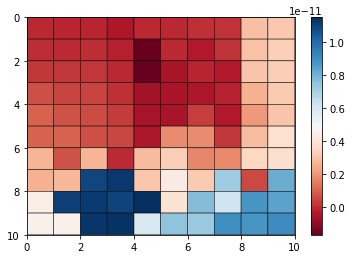

accuracy is 77.000000 lamba is 4.258517
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  5e+00  1e+00
 1:  2.0790e+02 -1.8052e+04  2e+04  1e-02  3e+00  2e+00
 2:  4.9069e+02 -1.6069e+04  2e+04  1e-02  3e+00  3e+00
 3:  7.9362e+02 -8.2612e+03  1e+04  7e-03  1e+00  3e+00
 4:  2.8939e+02 -7.9042e+02  1e+03  9e-04  2e-01  4e-01
 5:  1.3207e+01 -8.2119e+00  2e+01  2e-05  3e-03  2e-02
 6:  1.3194e-01 -8.2044e-02  2e-01  2e-07  3e-05  2e-04
 7:  1.3194e-03 -8.2043e-04  2e-03  2e-09  3e-07  2e-06
 8:  1.3194e-05 -8.2043e-06  2e-05  2e-11  3e-09  2e-08
 9:  1.3194e-07 -8.2043e-08  2e-07  2e-13  3e-11  2e-10
10:  1.3194e-09 -8.2043e-10  2e-09  2e-15  1e-12  2e-12
Optimal solution found.


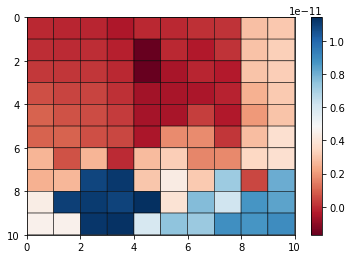

accuracy is 77.000000 lamba is 4.268537
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  5e+00  1e+00
 1:  2.0806e+02 -1.8044e+04  2e+04  1e-02  3e+00  2e+00
 2:  4.9043e+02 -1.6071e+04  2e+04  1e-02  3e+00  3e+00
 3:  7.9323e+02 -8.2532e+03  1e+04  7e-03  1e+00  3e+00
 4:  2.8931e+02 -7.9086e+02  1e+03  9e-04  2e-01  4e-01
 5:  1.3134e+01 -8.2161e+00  2e+01  2e-05  3e-03  2e-02
 6:  1.3121e-01 -8.2086e-02  2e-01  2e-07  3e-05  2e-04
 7:  1.3121e-03 -8.2085e-04  2e-03  2e-09  3e-07  2e-06
 8:  1.3121e-05 -8.2085e-06  2e-05  2e-11  3e-09  2e-08
 9:  1.3121e-07 -8.2085e-08  2e-07  2e-13  3e-11  2e-10
10:  1.3121e-09 -8.2085e-10  2e-09  2e-15  1e-12  2e-12
Optimal solution found.


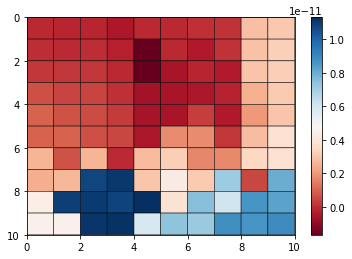

accuracy is 77.000000 lamba is 4.278557
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  5e+00  1e+00
 1:  2.0823e+02 -1.8037e+04  2e+04  1e-02  3e+00  2e+00
 2:  4.9017e+02 -1.6073e+04  2e+04  1e-02  3e+00  3e+00
 3:  7.9286e+02 -8.2451e+03  1e+04  7e-03  1e+00  3e+00
 4:  2.8922e+02 -7.9124e+02  1e+03  9e-04  2e-01  4e-01
 5:  1.3060e+01 -8.2193e+00  2e+01  2e-05  3e-03  2e-02
 6:  1.3048e-01 -8.2119e-02  2e-01  2e-07  3e-05  2e-04
 7:  1.3048e-03 -8.2118e-04  2e-03  2e-09  3e-07  2e-06
 8:  1.3048e-05 -8.2118e-06  2e-05  2e-11  3e-09  2e-08
 9:  1.3048e-07 -8.2118e-08  2e-07  2e-13  3e-11  2e-10
10:  1.3048e-09 -8.2118e-10  2e-09  2e-15  7e-13  2e-12
Optimal solution found.


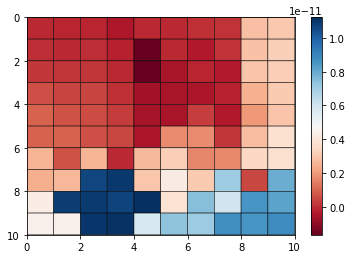

accuracy is 77.000000 lamba is 4.288577
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  5e+00  1e+00
 1:  2.0839e+02 -1.8030e+04  2e+04  1e-02  3e+00  2e+00
 2:  4.8992e+02 -1.6075e+04  2e+04  1e-02  3e+00  3e+00
 3:  7.9249e+02 -8.2367e+03  1e+04  7e-03  1e+00  3e+00
 4:  2.8912e+02 -7.9153e+02  1e+03  9e-04  2e-01  4e-01
 5:  1.2986e+01 -8.2216e+00  2e+01  2e-05  3e-03  2e-02
 6:  1.2974e-01 -8.2143e-02  2e-01  2e-07  3e-05  2e-04
 7:  1.2973e-03 -8.2141e-04  2e-03  2e-09  3e-07  2e-06
 8:  1.2973e-05 -8.2141e-06  2e-05  2e-11  3e-09  2e-08
 9:  1.2973e-07 -8.2141e-08  2e-07  2e-13  3e-11  2e-10
10:  1.2973e-09 -8.2141e-10  2e-09  2e-15  6e-13  2e-12
Optimal solution found.


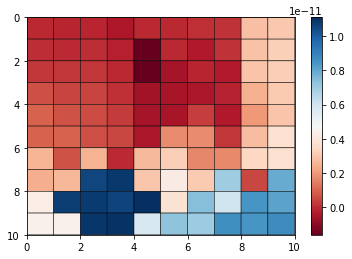

accuracy is 77.000000 lamba is 4.298597
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  5e+00  1e+00
 1:  2.0855e+02 -1.8023e+04  2e+04  1e-02  3e+00  2e+00
 2:  4.8966e+02 -1.6077e+04  2e+04  1e-02  3e+00  3e+00
 3:  7.9213e+02 -8.2281e+03  1e+04  7e-03  1e+00  3e+00
 4:  2.8901e+02 -7.9176e+02  1e+03  9e-04  2e-01  4e-01
 5:  1.2911e+01 -8.2231e+00  2e+01  2e-05  3e-03  2e-02
 6:  1.2899e-01 -8.2157e-02  2e-01  2e-07  3e-05  2e-04
 7:  1.2899e-03 -8.2156e-04  2e-03  2e-09  3e-07  2e-06
 8:  1.2899e-05 -8.2156e-06  2e-05  2e-11  3e-09  2e-08
 9:  1.2899e-07 -8.2156e-08  2e-07  2e-13  3e-11  2e-10
10:  1.2899e-09 -8.2156e-10  2e-09  2e-15  7e-13  2e-12
Optimal solution found.


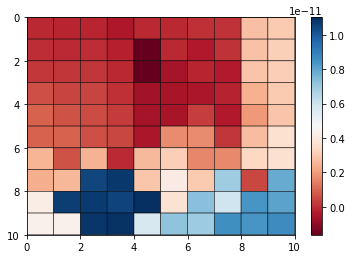

accuracy is 77.000000 lamba is 4.308617
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  4e+00  1e+00
 1:  2.0871e+02 -1.8015e+04  2e+04  1e-02  3e+00  2e+00
 2:  4.8942e+02 -1.6079e+04  2e+04  1e-02  3e+00  3e+00
 3:  7.9177e+02 -8.2194e+03  1e+04  7e-03  1e+00  3e+00
 4:  2.8890e+02 -7.9191e+02  1e+03  9e-04  2e-01  4e-01
 5:  1.2836e+01 -8.2236e+00  2e+01  2e-05  3e-03  1e-02
 6:  1.2824e-01 -8.2163e-02  2e-01  2e-07  3e-05  1e-04
 7:  1.2823e-03 -8.2162e-04  2e-03  2e-09  3e-07  1e-06
 8:  1.2823e-05 -8.2162e-06  2e-05  2e-11  3e-09  1e-08
 9:  1.2823e-07 -8.2162e-08  2e-07  2e-13  3e-11  1e-10
10:  1.2823e-09 -8.2162e-10  2e-09  2e-15  6e-13  1e-12
Optimal solution found.


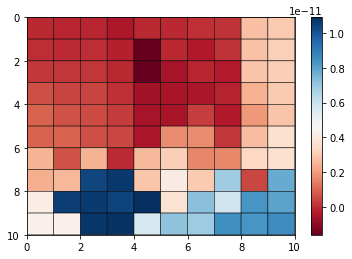

accuracy is 77.000000 lamba is 4.318637
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  4e+00  1e+00
 1:  2.0887e+02 -1.8008e+04  2e+04  1e-02  3e+00  2e+00
 2:  4.8917e+02 -1.6081e+04  2e+04  1e-02  3e+00  3e+00
 3:  7.9143e+02 -8.2106e+03  1e+04  7e-03  1e+00  3e+00
 4:  2.8878e+02 -7.9199e+02  1e+03  9e-04  2e-01  4e-01
 5:  1.2760e+01 -8.2234e+00  2e+01  2e-05  3e-03  1e-02
 6:  1.2748e-01 -8.2160e-02  2e-01  2e-07  3e-05  1e-04
 7:  1.2747e-03 -8.2159e-04  2e-03  2e-09  3e-07  1e-06
 8:  1.2747e-05 -8.2159e-06  2e-05  2e-11  3e-09  1e-08
 9:  1.2747e-07 -8.2159e-08  2e-07  2e-13  3e-11  1e-10
10:  1.2747e-09 -8.2159e-10  2e-09  2e-15  9e-13  1e-12
Optimal solution found.


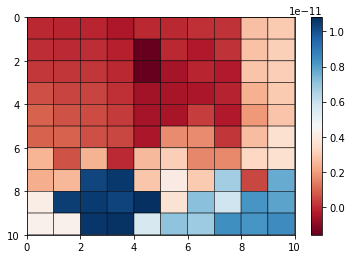

accuracy is 77.000000 lamba is 4.328657
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  4e+00  1e+00
 1:  2.0903e+02 -1.8001e+04  2e+04  1e-02  3e+00  2e+00
 2:  4.8893e+02 -1.6083e+04  2e+04  1e-02  3e+00  3e+00
 3:  7.9109e+02 -8.2015e+03  1e+04  7e-03  1e+00  3e+00
 4:  2.8866e+02 -7.9201e+02  1e+03  9e-04  2e-01  4e-01
 5:  1.2683e+01 -8.2222e+00  2e+01  2e-05  3e-03  1e-02
 6:  1.2671e-01 -8.2149e-02  2e-01  2e-07  3e-05  1e-04
 7:  1.2671e-03 -8.2148e-04  2e-03  2e-09  3e-07  1e-06
 8:  1.2671e-05 -8.2148e-06  2e-05  2e-11  3e-09  1e-08
 9:  1.2671e-07 -8.2148e-08  2e-07  2e-13  3e-11  1e-10
10:  1.2671e-09 -8.2148e-10  2e-09  2e-15  8e-13  1e-12
Optimal solution found.


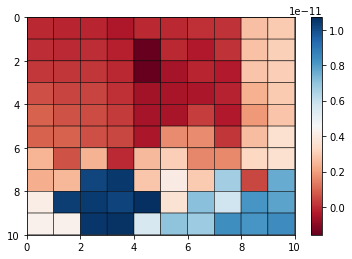

accuracy is 77.000000 lamba is 4.338677
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  4e+00  1e+00
 1:  2.0920e+02 -1.7994e+04  2e+04  1e-02  3e+00  2e+00
 2:  4.8869e+02 -1.6085e+04  2e+04  1e-02  3e+00  3e+00
 3:  7.9076e+02 -8.1923e+03  1e+04  7e-03  1e+00  3e+00
 4:  2.8853e+02 -7.9196e+02  1e+03  9e-04  2e-01  4e-01
 5:  1.2606e+01 -8.2203e+00  2e+01  2e-05  3e-03  1e-02
 6:  1.2594e-01 -8.2130e-02  2e-01  2e-07  3e-05  1e-04
 7:  1.2594e-03 -8.2129e-04  2e-03  2e-09  3e-07  1e-06
 8:  1.2594e-05 -8.2129e-06  2e-05  2e-11  3e-09  1e-08
 9:  1.2594e-07 -8.2129e-08  2e-07  2e-13  3e-11  1e-10
10:  1.2594e-09 -8.2129e-10  2e-09  2e-15  9e-13  1e-12
Optimal solution found.


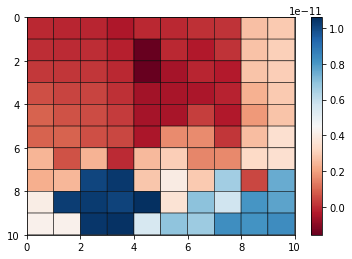

accuracy is 77.000000 lamba is 4.348697
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  4e+00  1e+00
 1:  2.0936e+02 -1.7986e+04  2e+04  1e-02  3e+00  2e+00
 2:  4.8846e+02 -1.6086e+04  2e+04  1e-02  3e+00  3e+00
 3:  7.9044e+02 -8.1830e+03  1e+04  7e-03  1e+00  3e+00
 4:  2.8839e+02 -7.9184e+02  1e+03  9e-04  2e-01  4e-01
 5:  1.2529e+01 -8.2175e+00  2e+01  2e-05  3e-03  1e-02
 6:  1.2517e-01 -8.2103e-02  2e-01  2e-07  3e-05  1e-04
 7:  1.2517e-03 -8.2101e-04  2e-03  2e-09  3e-07  1e-06
 8:  1.2517e-05 -8.2101e-06  2e-05  2e-11  3e-09  1e-08
 9:  1.2517e-07 -8.2101e-08  2e-07  2e-13  3e-11  1e-10
10:  1.2517e-09 -8.2101e-10  2e-09  2e-15  6e-13  1e-12
Optimal solution found.


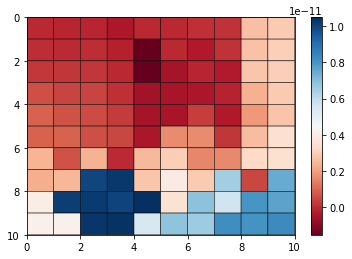

accuracy is 77.000000 lamba is 4.358717
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  4e+00  1e+00
 1:  2.0952e+02 -1.7979e+04  2e+04  1e-02  3e+00  2e+00
 2:  4.8822e+02 -1.6088e+04  2e+04  1e-02  3e+00  3e+00
 3:  7.9012e+02 -8.1735e+03  1e+04  7e-03  1e+00  3e+00
 4:  2.8825e+02 -7.9166e+02  1e+03  9e-04  2e-01  4e-01
 5:  1.2451e+01 -8.2140e+00  2e+01  2e-05  3e-03  1e-02
 6:  1.2439e-01 -8.2068e-02  2e-01  2e-07  3e-05  1e-04
 7:  1.2439e-03 -8.2066e-04  2e-03  2e-09  3e-07  1e-06
 8:  1.2439e-05 -8.2066e-06  2e-05  2e-11  3e-09  1e-08
 9:  1.2439e-07 -8.2066e-08  2e-07  2e-13  3e-11  1e-10
10:  1.2439e-09 -8.2066e-10  2e-09  2e-15  4e-13  1e-12
Optimal solution found.


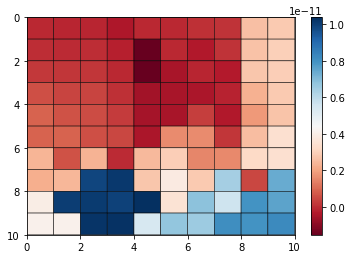

accuracy is 77.000000 lamba is 4.368737
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  4e+00  1e+00
 1:  2.0967e+02 -1.7972e+04  2e+04  1e-02  3e+00  2e+00
 2:  4.8799e+02 -1.6089e+04  2e+04  1e-02  3e+00  3e+00
 3:  7.8981e+02 -8.1638e+03  1e+04  7e-03  1e+00  3e+00
 4:  2.8810e+02 -7.9142e+02  1e+03  9e-04  2e-01  4e-01
 5:  1.2372e+01 -8.2097e+00  2e+01  2e-05  3e-03  1e-02
 6:  1.2361e-01 -8.2025e-02  2e-01  2e-07  3e-05  1e-04
 7:  1.2361e-03 -8.2024e-04  2e-03  2e-09  3e-07  1e-06
 8:  1.2361e-05 -8.2024e-06  2e-05  2e-11  3e-09  1e-08
 9:  1.2361e-07 -8.2024e-08  2e-07  2e-13  3e-11  1e-10
10:  1.2361e-09 -8.2024e-10  2e-09  2e-15  8e-13  1e-12
Optimal solution found.


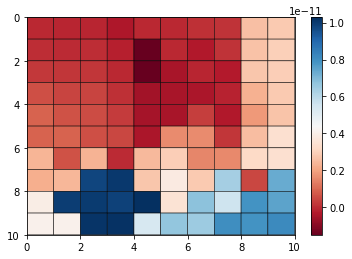

accuracy is 77.000000 lamba is 4.378758
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  4e+00  1e+00
 1:  2.0983e+02 -1.7965e+04  2e+04  1e-02  3e+00  2e+00
 2:  4.8777e+02 -1.6091e+04  2e+04  1e-02  3e+00  3e+00
 3:  7.8951e+02 -8.1540e+03  1e+04  7e-03  1e+00  3e+00
 4:  2.8794e+02 -7.9111e+02  1e+03  9e-04  2e-01  4e-01
 5:  1.2294e+01 -8.2047e+00  2e+01  2e-05  3e-03  1e-02
 6:  1.2282e-01 -8.1975e-02  2e-01  2e-07  3e-05  1e-04
 7:  1.2282e-03 -8.1974e-04  2e-03  2e-09  3e-07  1e-06
 8:  1.2282e-05 -8.1974e-06  2e-05  2e-11  3e-09  1e-08
 9:  1.2282e-07 -8.1974e-08  2e-07  2e-13  3e-11  1e-10
10:  1.2282e-09 -8.1974e-10  2e-09  2e-15  7e-13  1e-12
Optimal solution found.


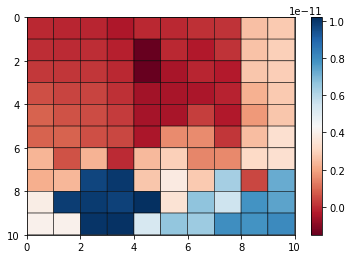

accuracy is 77.000000 lamba is 4.388778
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  4e+00  1e+00
 1:  2.0999e+02 -1.7957e+04  2e+04  1e-02  3e+00  2e+00
 2:  4.8754e+02 -1.6092e+04  2e+04  1e-02  3e+00  3e+00
 3:  7.8921e+02 -8.1441e+03  1e+04  7e-03  1e+00  3e+00
 4:  2.8778e+02 -7.9075e+02  1e+03  9e-04  2e-01  4e-01
 5:  1.2215e+01 -8.1989e+00  2e+01  2e-05  3e-03  1e-02
 6:  1.2204e-01 -8.1918e-02  2e-01  2e-07  3e-05  1e-04
 7:  1.2203e-03 -8.1917e-04  2e-03  2e-09  3e-07  1e-06
 8:  1.2203e-05 -8.1917e-06  2e-05  2e-11  3e-09  1e-08
 9:  1.2203e-07 -8.1917e-08  2e-07  2e-13  3e-11  1e-10
10:  1.2203e-09 -8.1917e-10  2e-09  2e-15  5e-13  1e-12
Optimal solution found.


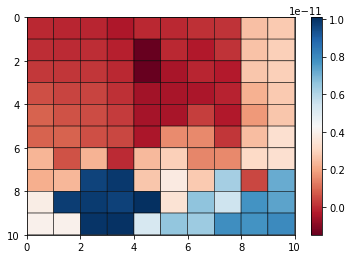

accuracy is 77.000000 lamba is 4.398798
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  4e+00  1e+00
 1:  2.1015e+02 -1.7950e+04  2e+04  1e-02  3e+00  2e+00
 2:  4.8732e+02 -1.6094e+04  2e+04  1e-02  3e+00  3e+00
 3:  7.8892e+02 -8.1340e+03  1e+04  7e-03  1e+00  3e+00
 4:  2.8761e+02 -7.9032e+02  1e+03  9e-04  2e-01  4e-01
 5:  1.2135e+01 -8.1925e+00  2e+01  2e-05  3e-03  1e-02
 6:  1.2124e-01 -8.1854e-02  2e-01  2e-07  3e-05  1e-04
 7:  1.2124e-03 -8.1852e-04  2e-03  2e-09  3e-07  1e-06
 8:  1.2124e-05 -8.1852e-06  2e-05  2e-11  3e-09  1e-08
 9:  1.2124e-07 -8.1852e-08  2e-07  2e-13  3e-11  1e-10
10:  1.2124e-09 -8.1852e-10  2e-09  2e-15  1e-12  1e-12
Optimal solution found.


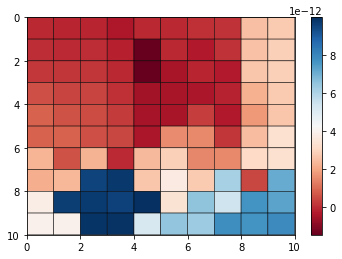

accuracy is 77.000000 lamba is 4.408818
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  4e+00  1e+00
 1:  2.1031e+02 -1.7943e+04  2e+04  1e-02  3e+00  2e+00
 2:  4.8711e+02 -1.6095e+04  2e+04  1e-02  3e+00  3e+00
 3:  7.8864e+02 -8.1238e+03  1e+04  7e-03  1e+00  3e+00
 4:  2.8744e+02 -7.8984e+02  1e+03  9e-04  2e-01  4e-01
 5:  1.2056e+01 -8.1853e+00  2e+01  2e-05  3e-03  1e-02
 6:  1.2045e-01 -8.1782e-02  2e-01  2e-07  3e-05  1e-04
 7:  1.2044e-03 -8.1781e-04  2e-03  2e-09  3e-07  1e-06
 8:  1.2044e-05 -8.1781e-06  2e-05  2e-11  3e-09  1e-08
 9:  1.2044e-07 -8.1781e-08  2e-07  2e-13  3e-11  1e-10
10:  1.2044e-09 -8.1781e-10  2e-09  2e-15  8e-13  1e-12
Optimal solution found.


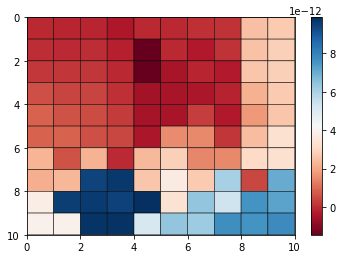

accuracy is 77.000000 lamba is 4.418838
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  4e+00  1e+00
 1:  2.1047e+02 -1.7935e+04  2e+04  1e-02  3e+00  2e+00
 2:  4.8689e+02 -1.6096e+04  2e+04  1e-02  3e+00  3e+00
 3:  7.8836e+02 -8.1134e+03  1e+04  7e-03  1e+00  3e+00
 4:  2.8726e+02 -7.8930e+02  1e+03  9e-04  2e-01  4e-01
 5:  1.1976e+01 -8.1775e+00  2e+01  2e-05  3e-03  1e-02
 6:  1.1965e-01 -8.1704e-02  2e-01  2e-07  3e-05  1e-04
 7:  1.1965e-03 -8.1703e-04  2e-03  2e-09  3e-07  1e-06
 8:  1.1965e-05 -8.1703e-06  2e-05  2e-11  3e-09  1e-08
 9:  1.1965e-07 -8.1703e-08  2e-07  2e-13  3e-11  1e-10
10:  1.1965e-09 -8.1703e-10  2e-09  2e-15  5e-13  1e-12
Optimal solution found.


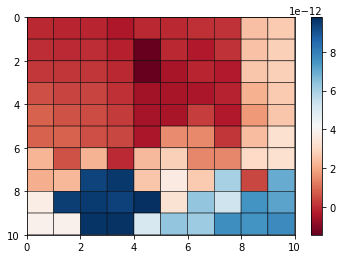

accuracy is 77.000000 lamba is 4.428858
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  4e+00  1e+00
 1:  2.1062e+02 -1.7928e+04  2e+04  1e-02  3e+00  2e+00
 2:  4.8668e+02 -1.6097e+04  2e+04  1e-02  3e+00  3e+00
 3:  7.8814e+02 -8.1038e+03  1e+04  7e-03  1e+00  3e+00
 4:  2.8711e+02 -7.8887e+02  1e+03  9e-04  2e-01  4e-01
 5:  1.1899e+01 -8.1709e+00  2e+01  2e-05  3e-03  1e-02
 6:  1.1889e-01 -8.1639e-02  2e-01  2e-07  3e-05  1e-04
 7:  1.1888e-03 -8.1637e-04  2e-03  2e-09  3e-07  1e-06
 8:  1.1888e-05 -8.1637e-06  2e-05  2e-11  3e-09  1e-08
 9:  1.1888e-07 -8.1637e-08  2e-07  2e-13  3e-11  1e-10
10:  1.1888e-09 -8.1637e-10  2e-09  2e-15  7e-13  1e-12
Optimal solution found.


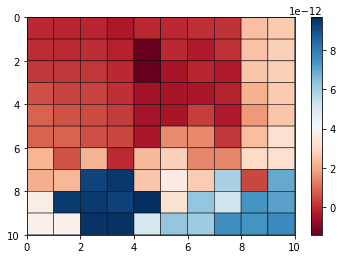

accuracy is 77.000000 lamba is 4.438878
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  4e+00  1e+00
 1:  2.1078e+02 -1.7921e+04  2e+04  1e-02  3e+00  2e+00
 2:  4.8647e+02 -1.6098e+04  2e+04  1e-02  3e+00  3e+00
 3:  7.8809e+02 -8.0967e+03  1e+04  7e-03  1e+00  3e+00
 4:  2.8707e+02 -7.8893e+02  1e+03  9e-04  2e-01  4e-01
 5:  1.1836e+01 -8.1699e+00  2e+01  2e-05  3e-03  1e-02
 6:  1.1825e-01 -8.1629e-02  2e-01  2e-07  3e-05  1e-04
 7:  1.1825e-03 -8.1628e-04  2e-03  2e-09  3e-07  1e-06
 8:  1.1825e-05 -8.1628e-06  2e-05  2e-11  3e-09  1e-08
 9:  1.1825e-07 -8.1628e-08  2e-07  2e-13  3e-11  1e-10
10:  1.1825e-09 -8.1628e-10  2e-09  2e-15  7e-13  1e-12
Optimal solution found.


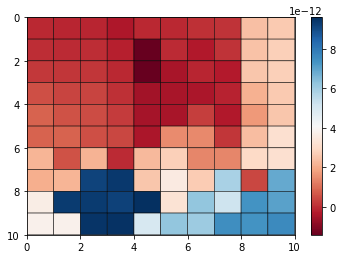

accuracy is 77.000000 lamba is 4.448898
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  4e+00  1e+00
 1:  2.1094e+02 -1.7914e+04  2e+04  1e-02  3e+00  2e+00
 2:  4.8626e+02 -1.6099e+04  2e+04  1e-02  3e+00  3e+00
 3:  7.8805e+02 -8.0895e+03  1e+04  7e-03  1e+00  3e+00
 4:  2.8703e+02 -7.8894e+02  1e+03  9e-04  2e-01  4e-01
 5:  1.1772e+01 -8.1683e+00  2e+01  2e-05  3e-03  1e-02
 6:  1.1761e-01 -8.1613e-02  2e-01  2e-07  3e-05  1e-04
 7:  1.1761e-03 -8.1612e-04  2e-03  2e-09  3e-07  1e-06
 8:  1.1761e-05 -8.1612e-06  2e-05  2e-11  3e-09  1e-08
 9:  1.1761e-07 -8.1612e-08  2e-07  2e-13  3e-11  1e-10
10:  1.1761e-09 -8.1612e-10  2e-09  2e-15  5e-13  1e-12
Optimal solution found.


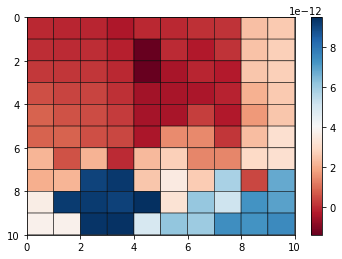

accuracy is 77.000000 lamba is 4.458918
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  4e+00  1e+00
 1:  2.1109e+02 -1.7906e+04  2e+04  1e-02  3e+00  2e+00
 2:  4.8606e+02 -1.6100e+04  2e+04  1e-02  3e+00  3e+00
 3:  7.8802e+02 -8.0822e+03  1e+04  7e-03  1e+00  3e+00
 4:  2.8698e+02 -7.8889e+02  1e+03  9e-04  2e-01  4e-01
 5:  1.1707e+01 -8.1661e+00  2e+01  2e-05  3e-03  1e-02
 6:  1.1697e-01 -8.1591e-02  2e-01  2e-07  3e-05  1e-04
 7:  1.1697e-03 -8.1590e-04  2e-03  2e-09  3e-07  1e-06
 8:  1.1697e-05 -8.1590e-06  2e-05  2e-11  3e-09  1e-08
 9:  1.1697e-07 -8.1590e-08  2e-07  2e-13  3e-11  1e-10
10:  1.1697e-09 -8.1590e-10  2e-09  2e-15  6e-13  1e-12
Optimal solution found.


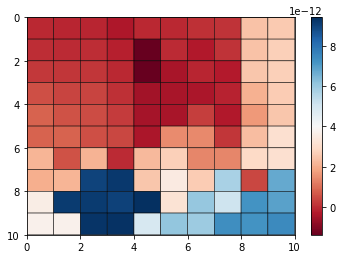

accuracy is 77.000000 lamba is 4.468938
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  4e+00  1e+00
 1:  2.1125e+02 -1.7899e+04  2e+04  1e-02  3e+00  2e+00
 2:  4.8586e+02 -1.6101e+04  2e+04  1e-02  3e+00  3e+00
 3:  7.8799e+02 -8.0748e+03  1e+04  7e-03  1e+00  3e+00
 4:  2.8692e+02 -7.8880e+02  1e+03  9e-04  2e-01  4e-01
 5:  1.1643e+01 -8.1633e+00  2e+01  2e-05  3e-03  1e-02
 6:  1.1633e-01 -8.1563e-02  2e-01  2e-07  3e-05  1e-04
 7:  1.1633e-03 -8.1562e-04  2e-03  2e-09  3e-07  1e-06
 8:  1.1633e-05 -8.1562e-06  2e-05  2e-11  3e-09  1e-08
 9:  1.1633e-07 -8.1562e-08  2e-07  2e-13  3e-11  1e-10
10:  1.1633e-09 -8.1562e-10  2e-09  2e-15  8e-13  1e-12
Optimal solution found.


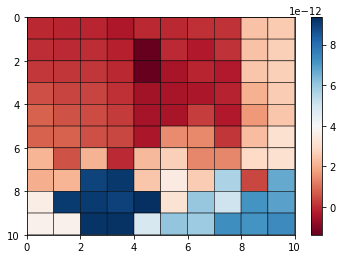

accuracy is 77.000000 lamba is 4.478958
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  4e+00  1e+00
 1:  2.1140e+02 -1.7892e+04  2e+04  1e-02  3e+00  2e+00
 2:  4.8566e+02 -1.6102e+04  2e+04  1e-02  3e+00  3e+00
 3:  7.8796e+02 -8.0672e+03  1e+04  7e-03  1e+00  3e+00
 4:  2.8686e+02 -7.8865e+02  1e+03  9e-04  2e-01  4e-01
 5:  1.1578e+01 -8.1599e+00  2e+01  2e-05  3e-03  1e-02
 6:  1.1568e-01 -8.1529e-02  2e-01  2e-07  3e-05  1e-04
 7:  1.1568e-03 -8.1528e-04  2e-03  2e-09  3e-07  1e-06
 8:  1.1568e-05 -8.1528e-06  2e-05  2e-11  3e-09  1e-08
 9:  1.1568e-07 -8.1528e-08  2e-07  2e-13  3e-11  1e-10
10:  1.1568e-09 -8.1528e-10  2e-09  2e-15  6e-13  1e-12
Optimal solution found.


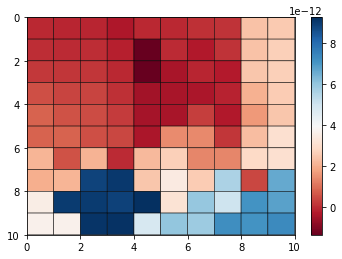

accuracy is 77.000000 lamba is 4.488978
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  4e+00  1e+00
 1:  2.1156e+02 -1.7884e+04  2e+04  1e-02  3e+00  2e+00
 2:  4.8546e+02 -1.6103e+04  2e+04  1e-02  3e+00  3e+00
 3:  7.8794e+02 -8.0596e+03  1e+04  7e-03  1e+00  3e+00
 4:  2.8680e+02 -7.8846e+02  1e+03  9e-04  2e-01  4e-01
 5:  1.1513e+01 -8.1559e+00  2e+01  2e-05  3e-03  1e-02
 6:  1.1503e-01 -8.1490e-02  2e-01  2e-07  3e-05  1e-04
 7:  1.1503e-03 -8.1489e-04  2e-03  2e-09  3e-07  1e-06
 8:  1.1503e-05 -8.1488e-06  2e-05  2e-11  3e-09  1e-08
 9:  1.1503e-07 -8.1488e-08  2e-07  2e-13  3e-11  1e-10
10:  1.1503e-09 -8.1488e-10  2e-09  2e-15  5e-13  1e-12
Optimal solution found.


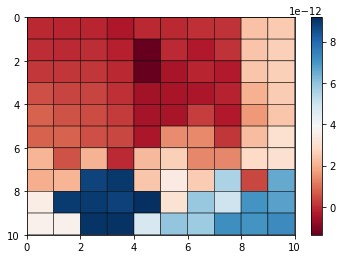

accuracy is 77.000000 lamba is 4.498998
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  4e+00  1e+00
 1:  2.1171e+02 -1.7877e+04  2e+04  1e-02  3e+00  2e+00
 2:  4.8527e+02 -1.6103e+04  2e+04  1e-02  3e+00  3e+00
 3:  7.8792e+02 -8.0518e+03  1e+04  7e-03  1e+00  3e+00
 4:  2.8673e+02 -7.8822e+02  1e+03  9e-04  2e-01  4e-01
 5:  1.1448e+01 -8.1513e+00  2e+01  2e-05  3e-03  1e-02
 6:  1.1438e-01 -8.1445e-02  2e-01  2e-07  3e-05  1e-04
 7:  1.1438e-03 -8.1443e-04  2e-03  2e-09  3e-07  1e-06
 8:  1.1438e-05 -8.1443e-06  2e-05  2e-11  3e-09  1e-08
 9:  1.1438e-07 -8.1443e-08  2e-07  2e-13  3e-11  1e-10
10:  1.1438e-09 -8.1443e-10  2e-09  2e-15  6e-13  1e-12
Optimal solution found.


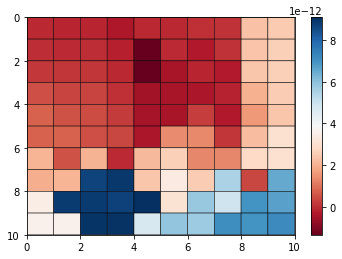

accuracy is 77.000000 lamba is 4.509018
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  4e+00  1e+00
 1:  2.1186e+02 -1.7870e+04  2e+04  1e-02  3e+00  2e+00
 2:  4.8507e+02 -1.6104e+04  2e+04  1e-02  3e+00  3e+00
 3:  7.8791e+02 -8.0439e+03  1e+04  7e-03  1e+00  3e+00
 4:  2.8665e+02 -7.8793e+02  1e+03  9e-04  2e-01  4e-01
 5:  1.1383e+01 -8.1462e+00  2e+01  2e-05  3e-03  1e-02
 6:  1.1373e-01 -8.1394e-02  2e-01  2e-07  3e-05  1e-04
 7:  1.1373e-03 -8.1393e-04  2e-03  2e-09  3e-07  1e-06
 8:  1.1373e-05 -8.1393e-06  2e-05  2e-11  3e-09  1e-08
 9:  1.1373e-07 -8.1393e-08  2e-07  2e-13  3e-11  1e-10
10:  1.1373e-09 -8.1393e-10  2e-09  2e-15  4e-13  1e-12
Optimal solution found.


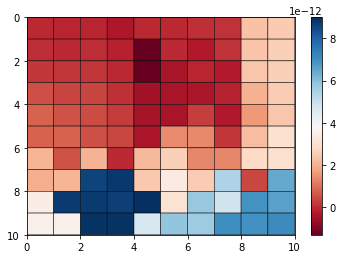

accuracy is 77.000000 lamba is 4.519038
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  4e+00  1e+00
 1:  2.1202e+02 -1.7862e+04  2e+04  1e-02  3e+00  2e+00
 2:  4.8489e+02 -1.6104e+04  2e+04  1e-02  3e+00  3e+00
 3:  7.8791e+02 -8.0360e+03  1e+04  7e-03  1e+00  3e+00
 4:  2.8657e+02 -7.8760e+02  1e+03  9e-04  2e-01  4e-01
 5:  1.1317e+01 -8.1406e+00  2e+01  2e-05  3e-03  1e-02
 6:  1.1307e-01 -8.1338e-02  2e-01  2e-07  3e-05  1e-04
 7:  1.1307e-03 -8.1337e-04  2e-03  2e-09  3e-07  1e-06
 8:  1.1307e-05 -8.1337e-06  2e-05  2e-11  3e-09  1e-08
 9:  1.1307e-07 -8.1337e-08  2e-07  2e-13  3e-11  1e-10
10:  1.1307e-09 -8.1337e-10  2e-09  2e-15  6e-13  1e-12
Optimal solution found.


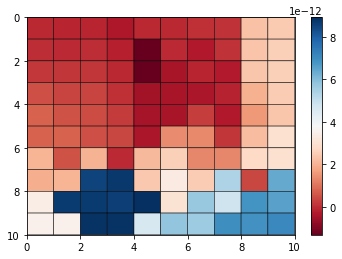

accuracy is 77.000000 lamba is 4.529058
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  4e+00  1e+00
 1:  2.1217e+02 -1.7855e+04  2e+04  1e-02  3e+00  2e+00
 2:  4.8470e+02 -1.6105e+04  2e+04  1e-02  3e+00  3e+00
 3:  7.8791e+02 -8.0279e+03  1e+04  7e-03  1e+00  3e+00
 4:  2.8649e+02 -7.8723e+02  1e+03  9e-04  2e-01  4e-01
 5:  1.1251e+01 -8.1345e+00  2e+01  2e-05  3e-03  1e-02
 6:  1.1242e-01 -8.1277e-02  2e-01  2e-07  3e-05  1e-04
 7:  1.1241e-03 -8.1275e-04  2e-03  2e-09  3e-07  1e-06
 8:  1.1241e-05 -8.1275e-06  2e-05  2e-11  3e-09  1e-08
 9:  1.1241e-07 -8.1275e-08  2e-07  2e-13  3e-11  1e-10
10:  1.1241e-09 -8.1275e-10  2e-09  2e-15  8e-13  1e-12
Optimal solution found.


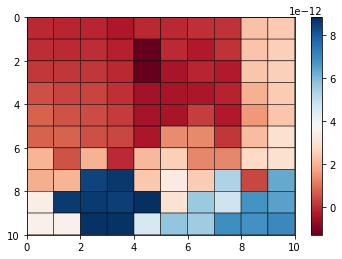

accuracy is 77.000000 lamba is 4.539078
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  4e+00  1e+00
 1:  2.1232e+02 -1.7848e+04  2e+04  1e-02  3e+00  2e+00
 2:  4.8451e+02 -1.6106e+04  2e+04  1e-02  3e+00  3e+00
 3:  7.8791e+02 -8.0197e+03  1e+04  7e-03  1e+00  3e+00
 4:  2.8640e+02 -7.8681e+02  1e+03  9e-04  2e-01  4e-01
 5:  1.1185e+01 -8.1278e+00  2e+01  2e-05  3e-03  1e-02
 6:  1.1176e-01 -8.1210e-02  2e-01  2e-07  3e-05  1e-04
 7:  1.1176e-03 -8.1209e-04  2e-03  2e-09  3e-07  1e-06
 8:  1.1176e-05 -8.1209e-06  2e-05  2e-11  3e-09  1e-08
 9:  1.1176e-07 -8.1209e-08  2e-07  2e-13  3e-11  1e-10
10:  1.1176e-09 -8.1209e-10  2e-09  2e-15  5e-13  1e-12
Optimal solution found.


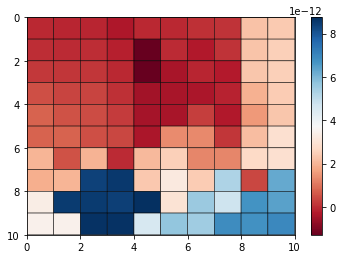

accuracy is 77.000000 lamba is 4.549098
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  4e+00  1e+00
 1:  2.1248e+02 -1.7840e+04  2e+04  1e-02  3e+00  2e+00
 2:  4.8433e+02 -1.6106e+04  2e+04  1e-02  3e+00  3e+00
 3:  7.8792e+02 -8.0114e+03  1e+04  7e-03  1e+00  3e+00
 4:  2.8631e+02 -7.8634e+02  1e+03  9e-04  2e-01  4e-01
 5:  1.1119e+01 -8.1207e+00  2e+01  2e-05  3e-03  1e-02
 6:  1.1110e-01 -8.1139e-02  2e-01  2e-07  3e-05  1e-04
 7:  1.1110e-03 -8.1138e-04  2e-03  2e-09  3e-07  1e-06
 8:  1.1110e-05 -8.1138e-06  2e-05  2e-11  3e-09  1e-08
 9:  1.1110e-07 -8.1138e-08  2e-07  2e-13  3e-11  1e-10
10:  1.1110e-09 -8.1138e-10  2e-09  2e-15  6e-13  1e-12
Optimal solution found.


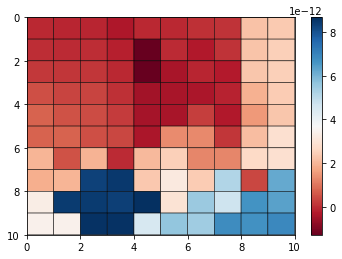

accuracy is 77.000000 lamba is 4.559118
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  4e+00  1e+00
 1:  2.1263e+02 -1.7833e+04  2e+04  1e-02  3e+00  2e+00
 2:  4.8415e+02 -1.6106e+04  2e+04  1e-02  3e+00  3e+00
 3:  7.8793e+02 -8.0030e+03  1e+04  7e-03  1e+00  3e+00
 4:  2.8621e+02 -7.8584e+02  1e+03  9e-04  2e-01  4e-01
 5:  1.1053e+01 -8.1130e+00  2e+01  2e-05  3e-03  1e-02
 6:  1.1044e-01 -8.1063e-02  2e-01  2e-07  3e-05  1e-04
 7:  1.1044e-03 -8.1062e-04  2e-03  2e-09  3e-07  1e-06
 8:  1.1044e-05 -8.1062e-06  2e-05  2e-11  3e-09  1e-08
 9:  1.1044e-07 -8.1062e-08  2e-07  2e-13  3e-11  1e-10
10:  1.1044e-09 -8.1062e-10  2e-09  2e-15  5e-13  1e-12
Optimal solution found.


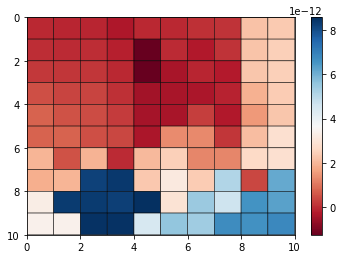

accuracy is 77.000000 lamba is 4.569138
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  4e+00  1e+00
 1:  2.1278e+02 -1.7826e+04  2e+04  1e-02  3e+00  2e+00
 2:  4.8397e+02 -1.6107e+04  2e+04  1e-02  3e+00  3e+00
 3:  7.8795e+02 -7.9945e+03  1e+04  7e-03  1e+00  3e+00
 4:  2.8611e+02 -7.8529e+02  1e+03  9e-04  2e-01  4e-01
 5:  1.0987e+01 -8.1049e+00  2e+01  2e-05  3e-03  1e-02
 6:  1.0978e-01 -8.0982e-02  2e-01  2e-07  3e-05  1e-04
 7:  1.0977e-03 -8.0981e-04  2e-03  2e-09  3e-07  1e-06
 8:  1.0977e-05 -8.0981e-06  2e-05  2e-11  3e-09  1e-08
 9:  1.0977e-07 -8.0981e-08  2e-07  2e-13  3e-11  1e-10
10:  1.0977e-09 -8.0981e-10  2e-09  1e-15  1e-12  1e-12
Optimal solution found.


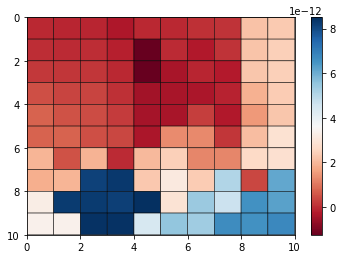

accuracy is 77.000000 lamba is 4.579158
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  4e+00  1e+00
 1:  2.1293e+02 -1.7819e+04  2e+04  1e-02  3e+00  2e+00
 2:  4.8380e+02 -1.6107e+04  2e+04  1e-02  3e+00  3e+00
 3:  7.8797e+02 -7.9859e+03  1e+04  7e-03  1e+00  3e+00
 4:  2.8600e+02 -7.8470e+02  1e+03  9e-04  2e-01  4e-01
 5:  1.0920e+01 -8.0963e+00  2e+01  2e-05  3e-03  1e-02
 6:  1.0911e-01 -8.0896e-02  2e-01  2e-07  3e-05  1e-04
 7:  1.0911e-03 -8.0895e-04  2e-03  2e-09  3e-07  1e-06
 8:  1.0911e-05 -8.0895e-06  2e-05  2e-11  3e-09  1e-08
 9:  1.0911e-07 -8.0895e-08  2e-07  2e-13  3e-11  1e-10
10:  1.0911e-09 -8.0895e-10  2e-09  2e-15  6e-13  1e-12
Optimal solution found.


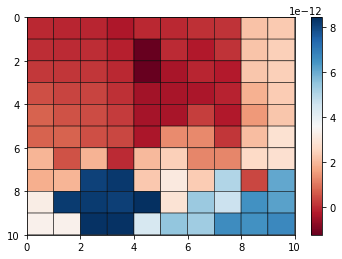

accuracy is 77.000000 lamba is 4.589178
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  4e+00  1e+00
 1:  2.1308e+02 -1.7811e+04  2e+04  1e-02  3e+00  2e+00
 2:  4.8363e+02 -1.6107e+04  2e+04  1e-02  3e+00  3e+00
 3:  7.8799e+02 -7.9773e+03  1e+04  7e-03  1e+00  3e+00
 4:  2.8589e+02 -7.8408e+02  1e+03  9e-04  2e-01  4e-01
 5:  1.0854e+01 -8.0873e+00  2e+01  2e-05  3e-03  1e-02
 6:  1.0845e-01 -8.0806e-02  2e-01  2e-07  3e-05  1e-04
 7:  1.0845e-03 -8.0805e-04  2e-03  2e-09  3e-07  1e-06
 8:  1.0845e-05 -8.0805e-06  2e-05  2e-11  3e-09  1e-08
 9:  1.0845e-07 -8.0805e-08  2e-07  2e-13  3e-11  1e-10
10:  1.0845e-09 -8.0805e-10  2e-09  2e-15  7e-13  1e-12
Optimal solution found.


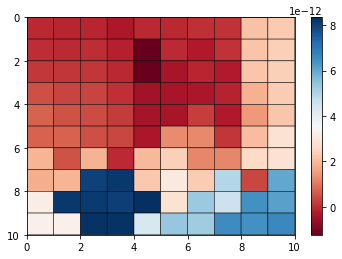

accuracy is 77.000000 lamba is 4.599198
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  4e+00  1e+00
 1:  2.1323e+02 -1.7804e+04  2e+04  1e-02  3e+00  2e+00
 2:  4.8346e+02 -1.6107e+04  2e+04  1e-02  3e+00  3e+00
 3:  7.8802e+02 -7.9685e+03  1e+04  7e-03  1e+00  3e+00
 4:  2.8578e+02 -7.8341e+02  1e+03  9e-04  2e-01  4e-01
 5:  1.0787e+01 -8.0778e+00  2e+01  2e-05  3e-03  1e-02
 6:  1.0778e-01 -8.0712e-02  2e-01  2e-07  3e-05  1e-04
 7:  1.0778e-03 -8.0711e-04  2e-03  2e-09  3e-07  1e-06
 8:  1.0778e-05 -8.0711e-06  2e-05  2e-11  3e-09  1e-08
 9:  1.0778e-07 -8.0711e-08  2e-07  2e-13  3e-11  1e-10
10:  1.0778e-09 -8.0711e-10  2e-09  2e-15  6e-13  1e-12
Optimal solution found.


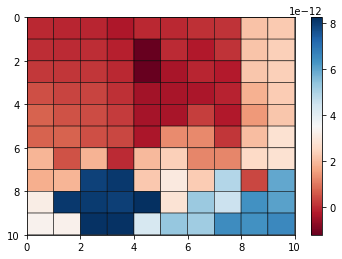

accuracy is 77.000000 lamba is 4.609218
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  4e+00  1e+00
 1:  2.1338e+02 -1.7797e+04  2e+04  1e-02  3e+00  2e+00
 2:  4.8329e+02 -1.6107e+04  2e+04  1e-02  3e+00  3e+00
 3:  7.8806e+02 -7.9597e+03  1e+04  7e-03  1e+00  3e+00
 4:  2.8566e+02 -7.8271e+02  1e+03  9e-04  2e-01  4e-01
 5:  1.0721e+01 -8.0678e+00  2e+01  2e-05  3e-03  1e-02
 6:  1.0712e-01 -8.0613e-02  2e-01  2e-07  3e-05  1e-04
 7:  1.0712e-03 -8.0612e-04  2e-03  2e-09  3e-07  1e-06
 8:  1.0712e-05 -8.0612e-06  2e-05  2e-11  3e-09  1e-08
 9:  1.0712e-07 -8.0612e-08  2e-07  2e-13  3e-11  1e-10
10:  1.0712e-09 -8.0612e-10  2e-09  2e-15  5e-13  1e-12
Optimal solution found.


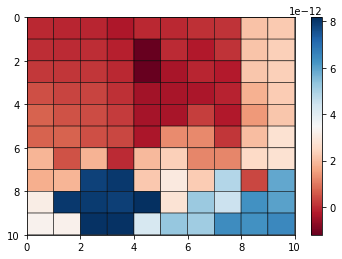

accuracy is 77.000000 lamba is 4.619238
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  4e+00  1e+00
 1:  2.1353e+02 -1.7789e+04  2e+04  1e-02  3e+00  2e+00
 2:  4.8312e+02 -1.6108e+04  2e+04  1e-02  2e+00  3e+00
 3:  7.8809e+02 -7.9507e+03  1e+04  7e-03  1e+00  3e+00
 4:  2.8554e+02 -7.8196e+02  1e+03  9e-04  2e-01  4e-01
 5:  1.0654e+01 -8.0575e+00  2e+01  1e-05  3e-03  1e-02
 6:  1.0646e-01 -8.0510e-02  2e-01  1e-07  3e-05  1e-04
 7:  1.0645e-03 -8.0509e-04  2e-03  1e-09  3e-07  1e-06
 8:  1.0645e-05 -8.0508e-06  2e-05  1e-11  3e-09  1e-08
 9:  1.0645e-07 -8.0508e-08  2e-07  1e-13  3e-11  1e-10
10:  1.0645e-09 -8.0508e-10  2e-09  2e-15  8e-13  1e-12
Optimal solution found.


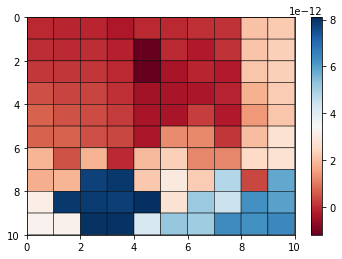

accuracy is 77.000000 lamba is 4.629259
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  4e+00  1e+00
 1:  2.1368e+02 -1.7782e+04  2e+04  1e-02  3e+00  2e+00
 2:  4.8296e+02 -1.6108e+04  2e+04  1e-02  2e+00  3e+00
 3:  7.8813e+02 -7.9417e+03  1e+04  7e-03  1e+00  3e+00
 4:  2.8541e+02 -7.8119e+02  1e+03  9e-04  2e-01  4e-01
 5:  1.0588e+01 -8.0467e+00  2e+01  1e-05  3e-03  1e-02
 6:  1.0579e-01 -8.0402e-02  2e-01  1e-07  3e-05  1e-04
 7:  1.0579e-03 -8.0401e-04  2e-03  1e-09  3e-07  1e-06
 8:  1.0579e-05 -8.0401e-06  2e-05  1e-11  3e-09  1e-08
 9:  1.0579e-07 -8.0401e-08  2e-07  1e-13  3e-11  1e-10
10:  1.0579e-09 -8.0401e-10  2e-09  2e-15  5e-13  1e-12
Optimal solution found.


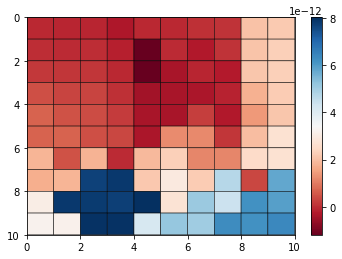

accuracy is 77.000000 lamba is 4.639279
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  4e+00  1e+00
 1:  2.1383e+02 -1.7774e+04  2e+04  1e-02  3e+00  2e+00
 2:  4.8279e+02 -1.6108e+04  2e+04  1e-02  2e+00  3e+00
 3:  7.8818e+02 -7.9326e+03  1e+04  7e-03  1e+00  3e+00
 4:  2.8528e+02 -7.8037e+02  1e+03  9e-04  2e-01  4e-01
 5:  1.0521e+01 -8.0356e+00  2e+01  1e-05  3e-03  1e-02
 6:  1.0512e-01 -8.0291e-02  2e-01  1e-07  3e-05  1e-04
 7:  1.0512e-03 -8.0290e-04  2e-03  1e-09  3e-07  1e-06
 8:  1.0512e-05 -8.0290e-06  2e-05  1e-11  3e-09  1e-08
 9:  1.0512e-07 -8.0290e-08  2e-07  1e-13  3e-11  1e-10
10:  1.0512e-09 -8.0290e-10  2e-09  2e-15  7e-13  1e-12
Optimal solution found.


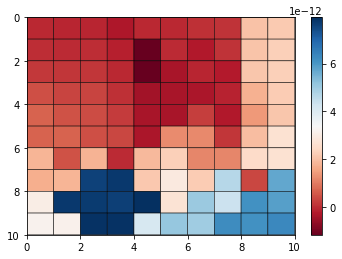

accuracy is 77.000000 lamba is 4.649299
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  4e+00  1e+00
 1:  2.1398e+02 -1.7767e+04  2e+04  1e-02  3e+00  2e+00
 2:  4.8263e+02 -1.6107e+04  2e+04  1e-02  2e+00  3e+00
 3:  7.8823e+02 -7.9234e+03  1e+04  7e-03  1e+00  3e+00
 4:  2.8515e+02 -7.7952e+02  1e+03  9e-04  2e-01  4e-01
 5:  1.0454e+01 -8.0240e+00  2e+01  1e-05  3e-03  1e-02
 6:  1.0446e-01 -8.0176e-02  2e-01  1e-07  3e-05  1e-04
 7:  1.0446e-03 -8.0175e-04  2e-03  1e-09  3e-07  1e-06
 8:  1.0446e-05 -8.0175e-06  2e-05  1e-11  3e-09  1e-08
 9:  1.0446e-07 -8.0175e-08  2e-07  1e-13  3e-11  1e-10
10:  1.0446e-09 -8.0175e-10  2e-09  1e-15  8e-13  1e-12
Optimal solution found.


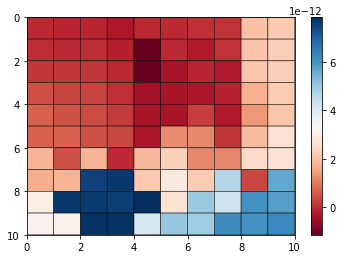

accuracy is 77.000000 lamba is 4.659319
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  4e+00  1e+00
 1:  2.1413e+02 -1.7760e+04  2e+04  1e-02  3e+00  2e+00
 2:  4.8248e+02 -1.6107e+04  2e+04  1e-02  2e+00  3e+00
 3:  7.8828e+02 -7.9142e+03  1e+04  7e-03  1e+00  3e+00
 4:  2.8501e+02 -7.7864e+02  1e+03  9e-04  2e-01  4e-01
 5:  1.0388e+01 -8.0121e+00  2e+01  1e-05  3e-03  1e-02
 6:  1.0379e-01 -8.0057e-02  2e-01  1e-07  3e-05  1e-04
 7:  1.0379e-03 -8.0056e-04  2e-03  1e-09  3e-07  1e-06
 8:  1.0379e-05 -8.0056e-06  2e-05  1e-11  3e-09  1e-08
 9:  1.0379e-07 -8.0056e-08  2e-07  1e-13  3e-11  1e-10
10:  1.0379e-09 -8.0056e-10  2e-09  2e-15  7e-13  1e-12
Optimal solution found.


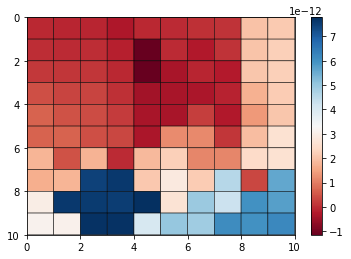

accuracy is 77.000000 lamba is 4.669339
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  4e+00  1e+00
 1:  2.1428e+02 -1.7752e+04  2e+04  1e-02  3e+00  2e+00
 2:  4.8232e+02 -1.6107e+04  2e+04  1e-02  2e+00  3e+00
 3:  7.8834e+02 -7.9048e+03  1e+04  7e-03  1e+00  3e+00
 4:  2.8487e+02 -7.7772e+02  1e+03  9e-04  2e-01  4e-01
 5:  1.0321e+01 -7.9998e+00  2e+01  1e-05  3e-03  1e-02
 6:  1.0313e-01 -7.9934e-02  2e-01  1e-07  3e-05  1e-04
 7:  1.0313e-03 -7.9933e-04  2e-03  1e-09  3e-07  1e-06
 8:  1.0313e-05 -7.9933e-06  2e-05  1e-11  3e-09  1e-08
 9:  1.0313e-07 -7.9933e-08  2e-07  1e-13  3e-11  1e-10
10:  1.0313e-09 -7.9933e-10  2e-09  2e-15  7e-13  1e-12
Optimal solution found.


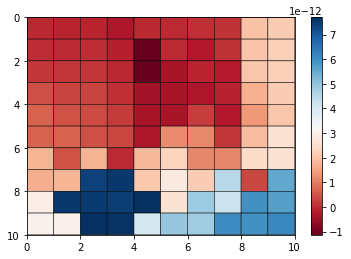

accuracy is 77.000000 lamba is 4.679359
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  4e+00  1e+00
 1:  2.1442e+02 -1.7745e+04  2e+04  1e-02  3e+00  2e+00
 2:  4.8217e+02 -1.6107e+04  2e+04  1e-02  2e+00  3e+00
 3:  7.8840e+02 -7.8954e+03  1e+04  7e-03  1e+00  3e+00
 4:  2.8473e+02 -7.7677e+02  1e+03  8e-04  2e-01  4e-01
 5:  1.0255e+01 -7.9871e+00  2e+01  1e-05  3e-03  1e-02
 6:  1.0246e-01 -7.9807e-02  2e-01  1e-07  3e-05  1e-04
 7:  1.0246e-03 -7.9806e-04  2e-03  1e-09  3e-07  1e-06
 8:  1.0246e-05 -7.9806e-06  2e-05  1e-11  3e-09  1e-08
 9:  1.0246e-07 -7.9806e-08  2e-07  1e-13  3e-11  1e-10
10:  1.0246e-09 -7.9806e-10  2e-09  1e-15  8e-13  1e-12
Optimal solution found.


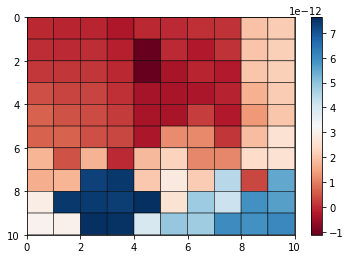

accuracy is 77.000000 lamba is 4.689379
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  4e+00  1e+00
 1:  2.1457e+02 -1.7738e+04  2e+04  1e-02  3e+00  2e+00
 2:  4.8201e+02 -1.6107e+04  2e+04  1e-02  2e+00  3e+00
 3:  7.8846e+02 -7.8859e+03  1e+04  7e-03  1e+00  3e+00
 4:  2.8458e+02 -7.7578e+02  1e+03  8e-04  2e-01  4e-01
 5:  1.0188e+01 -7.9740e+00  2e+01  1e-05  3e-03  1e-02
 6:  1.0180e-01 -7.9677e-02  2e-01  1e-07  3e-05  1e-04
 7:  1.0180e-03 -7.9676e-04  2e-03  1e-09  3e-07  1e-06
 8:  1.0180e-05 -7.9676e-06  2e-05  1e-11  3e-09  1e-08
 9:  1.0180e-07 -7.9676e-08  2e-07  1e-13  3e-11  1e-10
10:  1.0180e-09 -7.9676e-10  2e-09  2e-15  8e-13  1e-12
Optimal solution found.


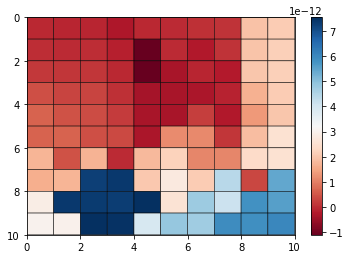

accuracy is 77.000000 lamba is 4.699399
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  4e+00  1e+00
 1:  2.1472e+02 -1.7730e+04  2e+04  1e-02  3e+00  2e+00
 2:  4.8186e+02 -1.6106e+04  2e+04  1e-02  2e+00  3e+00
 3:  7.8852e+02 -7.8764e+03  1e+04  7e-03  1e+00  3e+00
 4:  2.8442e+02 -7.7477e+02  1e+03  8e-04  2e-01  4e-01
 5:  1.0122e+01 -7.9606e+00  2e+01  1e-05  3e-03  1e-02
 6:  1.0114e-01 -7.9543e-02  2e-01  1e-07  3e-05  1e-04
 7:  1.0114e-03 -7.9542e-04  2e-03  1e-09  3e-07  1e-06
 8:  1.0114e-05 -7.9542e-06  2e-05  1e-11  3e-09  1e-08
 9:  1.0114e-07 -7.9542e-08  2e-07  1e-13  3e-11  1e-10
10:  1.0114e-09 -7.9542e-10  2e-09  2e-15  7e-13  1e-12
Optimal solution found.


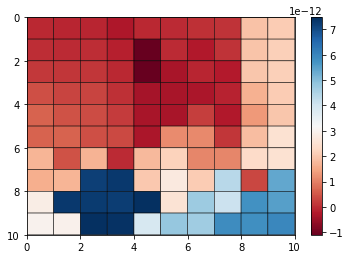

accuracy is 77.000000 lamba is 4.709419
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  4e+00  1e+00
 1:  2.1486e+02 -1.7723e+04  2e+04  1e-02  3e+00  2e+00
 2:  4.8172e+02 -1.6106e+04  2e+04  1e-02  2e+00  3e+00
 3:  7.8859e+02 -7.8667e+03  1e+04  7e-03  1e+00  3e+00
 4:  2.8427e+02 -7.7372e+02  1e+03  8e-04  2e-01  4e-01
 5:  1.0055e+01 -7.9469e+00  2e+01  1e-05  3e-03  1e-02
 6:  1.0047e-01 -7.9406e-02  2e-01  1e-07  3e-05  1e-04
 7:  1.0047e-03 -7.9405e-04  2e-03  1e-09  3e-07  1e-06
 8:  1.0047e-05 -7.9405e-06  2e-05  1e-11  3e-09  1e-08
 9:  1.0047e-07 -7.9405e-08  2e-07  1e-13  3e-11  1e-10
10:  1.0047e-09 -7.9405e-10  2e-09  1e-15  9e-13  1e-12
Optimal solution found.


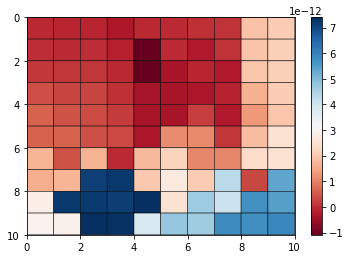

accuracy is 77.000000 lamba is 4.719439
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  4e+00  1e+00
 1:  2.1501e+02 -1.7716e+04  2e+04  1e-02  3e+00  2e+00
 2:  4.8157e+02 -1.6106e+04  2e+04  1e-02  2e+00  3e+00
 3:  7.8867e+02 -7.8570e+03  1e+04  7e-03  1e+00  3e+00
 4:  2.8411e+02 -7.7264e+02  1e+03  8e-04  2e-01  4e-01
 5:  9.9890e+00 -7.9328e+00  2e+01  1e-05  3e-03  1e-02
 6:  9.9813e-02 -7.9266e-02  2e-01  1e-07  3e-05  1e-04
 7:  9.9812e-04 -7.9265e-04  2e-03  1e-09  3e-07  1e-06
 8:  9.9812e-06 -7.9265e-06  2e-05  1e-11  3e-09  1e-08
 9:  9.9812e-08 -7.9265e-08  2e-07  1e-13  3e-11  1e-10
10:  9.9812e-10 -7.9265e-10  2e-09  2e-15  7e-13  1e-12
Optimal solution found.


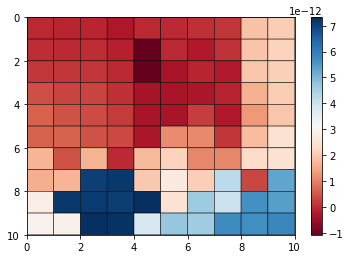

accuracy is 77.000000 lamba is 4.729459
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  4e+00  1e+00
 1:  2.1516e+02 -1.7708e+04  2e+04  1e-02  3e+00  2e+00
 2:  4.8142e+02 -1.6105e+04  2e+04  1e-02  2e+00  3e+00
 3:  7.8874e+02 -7.8473e+03  1e+04  7e-03  1e+00  3e+00
 4:  2.8394e+02 -7.7153e+02  1e+03  8e-04  2e-01  4e-01
 5:  9.9228e+00 -7.9184e+00  2e+01  1e-05  3e-03  1e-02
 6:  9.9152e-02 -7.9122e-02  2e-01  1e-07  3e-05  1e-04
 7:  9.9151e-04 -7.9121e-04  2e-03  1e-09  3e-07  1e-06
 8:  9.9151e-06 -7.9121e-06  2e-05  1e-11  3e-09  1e-08
 9:  9.9151e-08 -7.9121e-08  2e-07  1e-13  3e-11  1e-10
10:  9.9151e-10 -7.9121e-10  2e-09  2e-15  1e-12  1e-12
Optimal solution found.


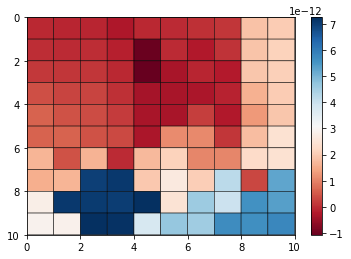

accuracy is 77.000000 lamba is 4.739479
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  4e+00  1e+00
 1:  2.1530e+02 -1.7701e+04  2e+04  1e-02  3e+00  2e+00
 2:  4.8128e+02 -1.6105e+04  2e+04  1e-02  2e+00  3e+00
 3:  7.8882e+02 -7.8374e+03  1e+04  7e-03  1e+00  3e+00
 4:  2.8378e+02 -7.7039e+02  1e+03  8e-04  2e-01  4e-01
 5:  9.8568e+00 -7.9037e+00  2e+01  1e-05  3e-03  1e-02
 6:  9.8493e-02 -7.8975e-02  2e-01  1e-07  3e-05  1e-04
 7:  9.8491e-04 -7.8974e-04  2e-03  1e-09  3e-07  1e-06
 8:  9.8491e-06 -7.8974e-06  2e-05  1e-11  3e-09  1e-08
 9:  9.8491e-08 -7.8974e-08  2e-07  1e-13  3e-11  1e-10
10:  9.8491e-10 -7.8974e-10  2e-09  2e-15  5e-13  1e-12
Optimal solution found.


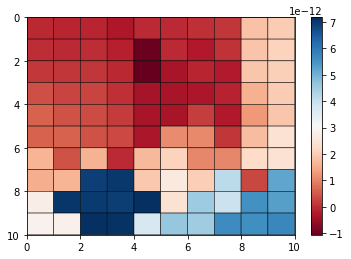

accuracy is 77.000000 lamba is 4.749499
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  4e+00  1e+00
 1:  2.1545e+02 -1.7694e+04  2e+04  1e-02  3e+00  2e+00
 2:  4.8114e+02 -1.6104e+04  2e+04  1e-02  2e+00  3e+00
 3:  7.8890e+02 -7.8275e+03  1e+04  7e-03  1e+00  3e+00
 4:  2.8361e+02 -7.6923e+02  1e+03  8e-04  2e-01  4e-01
 5:  9.7908e+00 -7.8886e+00  2e+01  1e-05  3e-03  1e-02
 6:  9.7834e-02 -7.8825e-02  2e-01  1e-07  3e-05  1e-04
 7:  9.7833e-04 -7.8824e-04  2e-03  1e-09  3e-07  1e-06
 8:  9.7833e-06 -7.8824e-06  2e-05  1e-11  3e-09  1e-08
 9:  9.7833e-08 -7.8824e-08  2e-07  1e-13  3e-11  1e-10
10:  9.7833e-10 -7.8824e-10  2e-09  1e-15  6e-13  1e-12
Optimal solution found.


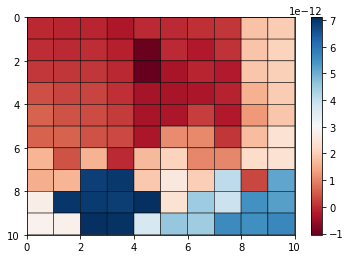

accuracy is 77.000000 lamba is 4.759519
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  4e+00  1e+00
 1:  2.1559e+02 -1.7686e+04  2e+04  1e-02  3e+00  2e+00
 2:  4.8100e+02 -1.6104e+04  2e+04  1e-02  2e+00  3e+00
 3:  7.8899e+02 -7.8175e+03  1e+04  7e-03  1e+00  3e+00
 4:  2.8343e+02 -7.6803e+02  1e+03  8e-04  2e-01  4e-01
 5:  9.7250e+00 -7.8733e+00  2e+01  1e-05  3e-03  1e-02
 6:  9.7177e-02 -7.8672e-02  2e-01  1e-07  3e-05  1e-04
 7:  9.7175e-04 -7.8671e-04  2e-03  1e-09  3e-07  1e-06
 8:  9.7175e-06 -7.8671e-06  2e-05  1e-11  3e-09  1e-08
 9:  9.7175e-08 -7.8671e-08  2e-07  1e-13  3e-11  1e-10
10:  9.7175e-10 -7.8671e-10  2e-09  2e-15  6e-13  1e-12
Optimal solution found.


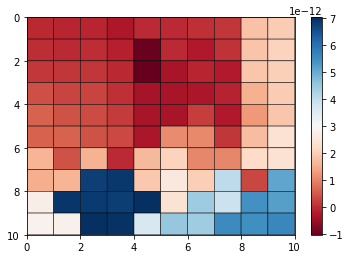

accuracy is 77.000000 lamba is 4.769539
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  4e+00  1e+00
 1:  2.1574e+02 -1.7679e+04  2e+04  1e-02  3e+00  2e+00
 2:  4.8087e+02 -1.6103e+04  2e+04  1e-02  2e+00  3e+00
 3:  7.8908e+02 -7.8075e+03  1e+04  7e-03  1e+00  3e+00
 4:  2.8326e+02 -7.6681e+02  1e+03  8e-04  2e-01  4e-01
 5:  9.6593e+00 -7.8577e+00  2e+01  1e-05  3e-03  1e-02
 6:  9.6521e-02 -7.8516e-02  2e-01  1e-07  3e-05  1e-04
 7:  9.6519e-04 -7.8515e-04  2e-03  1e-09  3e-07  1e-06
 8:  9.6519e-06 -7.8515e-06  2e-05  1e-11  3e-09  1e-08
 9:  9.6519e-08 -7.8515e-08  2e-07  1e-13  3e-11  1e-10
10:  9.6519e-10 -7.8515e-10  2e-09  1e-15  5e-13  1e-12
Optimal solution found.


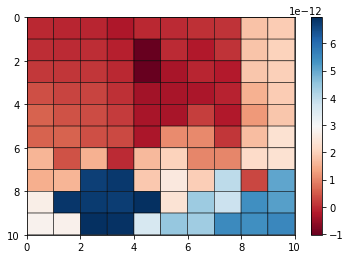

accuracy is 77.000000 lamba is 4.779559
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  4e+00  1e+00
 1:  2.1588e+02 -1.7671e+04  2e+04  1e-02  3e+00  2e+00
 2:  4.8073e+02 -1.6102e+04  2e+04  1e-02  2e+00  3e+00
 3:  7.8917e+02 -7.7974e+03  1e+04  7e-03  1e+00  3e+00
 4:  2.8308e+02 -7.6555e+02  1e+03  8e-04  2e-01  4e-01
 5:  9.5938e+00 -7.8417e+00  2e+01  1e-05  3e-03  1e-02
 6:  9.5866e-02 -7.8357e-02  2e-01  1e-07  3e-05  1e-04
 7:  9.5865e-04 -7.8356e-04  2e-03  1e-09  3e-07  1e-06
 8:  9.5865e-06 -7.8356e-06  2e-05  1e-11  3e-09  1e-08
 9:  9.5865e-08 -7.8356e-08  2e-07  1e-13  3e-11  1e-10
10:  9.5865e-10 -7.8356e-10  2e-09  2e-15  4e-13  1e-12
Optimal solution found.


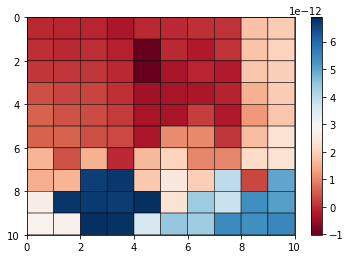

accuracy is 77.000000 lamba is 4.789579
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  4e+00  1e+00
 1:  2.1602e+02 -1.7664e+04  2e+04  1e-02  3e+00  2e+00
 2:  4.8060e+02 -1.6102e+04  2e+04  1e-02  2e+00  3e+00
 3:  7.8926e+02 -7.7873e+03  1e+04  7e-03  1e+00  3e+00
 4:  2.8289e+02 -7.6428e+02  1e+03  8e-04  2e-01  4e-01
 5:  9.5284e+00 -7.8255e+00  2e+01  1e-05  3e-03  1e-02
 6:  9.5213e-02 -7.8196e-02  2e-01  1e-07  3e-05  1e-04
 7:  9.5212e-04 -7.8195e-04  2e-03  1e-09  3e-07  1e-06
 8:  9.5212e-06 -7.8195e-06  2e-05  1e-11  3e-09  1e-08
 9:  9.5212e-08 -7.8195e-08  2e-07  1e-13  3e-11  1e-10
10:  9.5212e-10 -7.8195e-10  2e-09  1e-15  6e-13  1e-12
Optimal solution found.


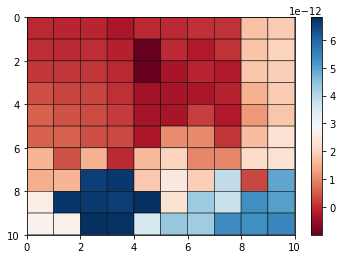

accuracy is 77.000000 lamba is 4.799599
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  4e+00  1e+00
 1:  2.1617e+02 -1.7657e+04  2e+04  1e-02  3e+00  2e+00
 2:  4.8046e+02 -1.6101e+04  2e+04  1e-02  2e+00  3e+00
 3:  7.8936e+02 -7.7770e+03  1e+04  7e-03  1e+00  3e+00
 4:  2.8270e+02 -7.6297e+02  1e+03  8e-04  2e-01  4e-01
 5:  9.4631e+00 -7.8091e+00  2e+01  1e-05  3e-03  1e-02
 6:  9.4561e-02 -7.8031e-02  2e-01  1e-07  3e-05  1e-04
 7:  9.4560e-04 -7.8030e-04  2e-03  1e-09  3e-07  1e-06
 8:  9.4560e-06 -7.8030e-06  2e-05  1e-11  3e-09  1e-08
 9:  9.4560e-08 -7.8030e-08  2e-07  1e-13  3e-11  1e-10
10:  9.4560e-10 -7.8030e-10  2e-09  2e-15  6e-13  1e-12
Optimal solution found.


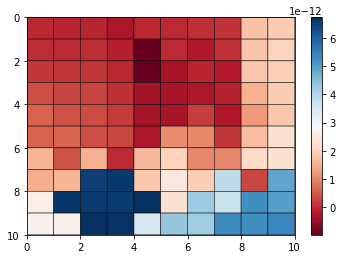

accuracy is 77.000000 lamba is 4.809619
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  4e+00  1e+00
 1:  2.1631e+02 -1.7649e+04  2e+04  1e-02  3e+00  2e+00
 2:  4.8033e+02 -1.6100e+04  2e+04  1e-02  2e+00  3e+00
 3:  7.8946e+02 -7.7668e+03  1e+04  7e-03  1e+00  3e+00
 4:  2.8251e+02 -7.6164e+02  1e+03  8e-04  2e-01  4e-01
 5:  9.3981e+00 -7.7923e+00  2e+01  1e-05  2e-03  1e-02
 6:  9.3912e-02 -7.7864e-02  2e-01  1e-07  2e-05  1e-04
 7:  9.3911e-04 -7.7863e-04  2e-03  1e-09  2e-07  1e-06
 8:  9.3910e-06 -7.7863e-06  2e-05  1e-11  2e-09  1e-08
 9:  9.3910e-08 -7.7863e-08  2e-07  1e-13  2e-11  1e-10
10:  9.3910e-10 -7.7863e-10  2e-09  1e-15  8e-13  1e-12
Optimal solution found.


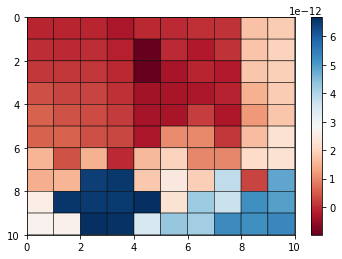

accuracy is 77.000000 lamba is 4.819639
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  4e+00  1e+00
 1:  2.1645e+02 -1.7642e+04  2e+04  1e-02  3e+00  2e+00
 2:  4.8020e+02 -1.6099e+04  2e+04  1e-02  2e+00  3e+00
 3:  7.8956e+02 -7.7564e+03  1e+04  7e-03  1e+00  3e+00
 4:  2.8232e+02 -7.6028e+02  1e+03  8e-04  2e-01  4e-01
 5:  9.3332e+00 -7.7753e+00  2e+01  1e-05  2e-03  1e-02
 6:  9.3264e-02 -7.7694e-02  2e-01  1e-07  2e-05  1e-04
 7:  9.3262e-04 -7.7693e-04  2e-03  1e-09  2e-07  1e-06
 8:  9.3262e-06 -7.7693e-06  2e-05  1e-11  2e-09  1e-08
 9:  9.3262e-08 -7.7693e-08  2e-07  1e-13  2e-11  1e-10
10:  9.3262e-10 -7.7693e-10  2e-09  1e-15  5e-13  1e-12
Optimal solution found.


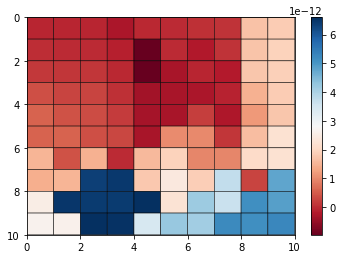

accuracy is 77.000000 lamba is 4.829659
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  4e+00  1e+00
 1:  2.1660e+02 -1.7635e+04  2e+04  1e-02  3e+00  2e+00
 2:  4.8008e+02 -1.6098e+04  2e+04  1e-02  2e+00  3e+00
 3:  7.8966e+02 -7.7460e+03  1e+04  7e-03  1e+00  3e+00
 4:  2.8212e+02 -7.5890e+02  1e+03  8e-04  2e-01  4e-01
 5:  9.2685e+00 -7.7580e+00  2e+01  1e-05  2e-03  1e-02
 6:  9.2617e-02 -7.7522e-02  2e-01  1e-07  2e-05  1e-04
 7:  9.2616e-04 -7.7521e-04  2e-03  1e-09  2e-07  1e-06
 8:  9.2616e-06 -7.7521e-06  2e-05  1e-11  2e-09  1e-08
 9:  9.2616e-08 -7.7521e-08  2e-07  1e-13  2e-11  1e-10
10:  9.2616e-10 -7.7521e-10  2e-09  1e-15  4e-13  1e-12
Optimal solution found.


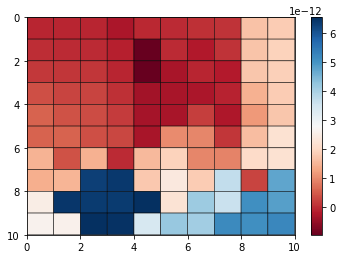

accuracy is 77.000000 lamba is 4.839679
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  4e+00  1e+00
 1:  2.1674e+02 -1.7627e+04  2e+04  1e-02  3e+00  2e+00
 2:  4.7995e+02 -1.6097e+04  2e+04  1e-02  2e+00  3e+00
 3:  7.8977e+02 -7.7356e+03  1e+04  7e-03  1e+00  3e+00
 4:  2.8192e+02 -7.5750e+02  1e+03  8e-04  1e-01  4e-01
 5:  9.2040e+00 -7.7405e+00  2e+01  1e-05  2e-03  1e-02
 6:  9.1973e-02 -7.7347e-02  2e-01  1e-07  2e-05  1e-04
 7:  9.1972e-04 -7.7346e-04  2e-03  1e-09  2e-07  1e-06
 8:  9.1972e-06 -7.7346e-06  2e-05  1e-11  2e-09  1e-08
 9:  9.1972e-08 -7.7346e-08  2e-07  1e-13  2e-11  1e-10
10:  9.1972e-10 -7.7346e-10  2e-09  1e-15  3e-13  1e-12
Optimal solution found.


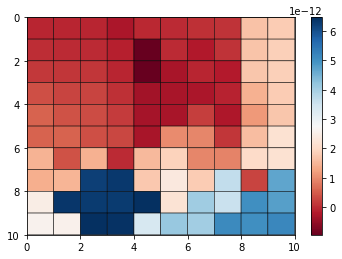

accuracy is 77.000000 lamba is 4.849699
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  4e+00  1e+00
 1:  2.1685e+02 -1.7621e+04  2e+04  1e-02  3e+00  2e+00
 2:  4.7976e+02 -1.6097e+04  2e+04  1e-02  2e+00  3e+00
 3:  7.8980e+02 -7.7247e+03  1e+04  7e-03  1e+00  3e+00
 4:  2.8174e+02 -7.5629e+02  1e+03  8e-04  1e-01  4e-01
 5:  9.1412e+00 -7.7254e+00  2e+01  1e-05  2e-03  1e-02
 6:  9.1346e-02 -7.7196e-02  2e-01  1e-07  2e-05  1e-04
 7:  9.1345e-04 -7.7195e-04  2e-03  1e-09  2e-07  1e-06
 8:  9.1345e-06 -7.7195e-06  2e-05  1e-11  2e-09  1e-08
 9:  9.1345e-08 -7.7195e-08  2e-07  1e-13  2e-11  1e-10
10:  9.1345e-10 -7.7195e-10  2e-09  1e-15  6e-13  1e-12
Optimal solution found.


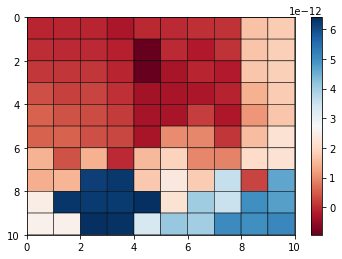

accuracy is 77.000000 lamba is 4.859719
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  4e+00  1e+00
 1:  2.1690e+02 -1.7618e+04  2e+04  1e-02  3e+00  2e+00
 2:  4.7937e+02 -1.6099e+04  2e+04  1e-02  2e+00  3e+00
 3:  7.8963e+02 -7.7129e+03  1e+04  7e-03  1e+00  3e+00
 4:  2.8162e+02 -7.5563e+02  1e+03  8e-04  1e-01  4e-01
 5:  9.0826e+00 -7.7168e+00  2e+01  1e-05  2e-03  1e-02
 6:  9.0761e-02 -7.7111e-02  2e-01  1e-07  2e-05  1e-04
 7:  9.0760e-04 -7.7110e-04  2e-03  1e-09  2e-07  1e-06
 8:  9.0760e-06 -7.7110e-06  2e-05  1e-11  2e-09  1e-08
 9:  9.0760e-08 -7.7110e-08  2e-07  1e-13  2e-11  1e-10
10:  9.0760e-10 -7.7110e-10  2e-09  1e-15  4e-13  1e-12
Optimal solution found.


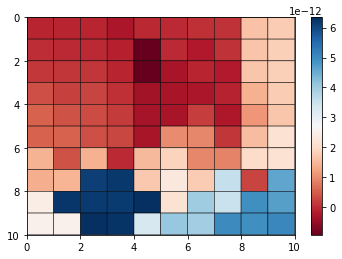

accuracy is 77.000000 lamba is 4.869739
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  4e+00  1e+00
 1:  2.1694e+02 -1.7616e+04  2e+04  1e-02  3e+00  2e+00
 2:  4.7900e+02 -1.6100e+04  2e+04  1e-02  2e+00  3e+00
 3:  7.8946e+02 -7.7009e+03  1e+04  7e-03  1e+00  3e+00
 4:  2.8149e+02 -7.5493e+02  1e+03  8e-04  1e-01  4e-01
 5:  9.0241e+00 -7.7078e+00  2e+01  1e-05  2e-03  1e-02
 6:  9.0177e-02 -7.7021e-02  2e-01  1e-07  2e-05  1e-04
 7:  9.0176e-04 -7.7020e-04  2e-03  1e-09  2e-07  1e-06
 8:  9.0176e-06 -7.7020e-06  2e-05  1e-11  2e-09  1e-08
 9:  9.0176e-08 -7.7020e-08  2e-07  1e-13  2e-11  1e-10
10:  9.0176e-10 -7.7020e-10  2e-09  1e-15  4e-13  1e-12
Optimal solution found.


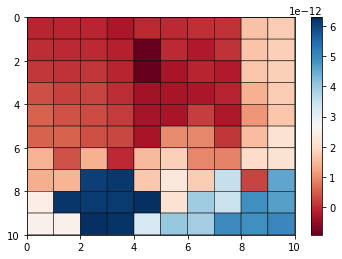

accuracy is 77.000000 lamba is 4.879760
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  4e+00  1e+00
 1:  2.1698e+02 -1.7613e+04  2e+04  1e-02  3e+00  2e+00
 2:  4.7863e+02 -1.6102e+04  2e+04  1e-02  2e+00  3e+00
 3:  7.8930e+02 -7.6889e+03  1e+04  7e-03  1e+00  3e+00
 4:  2.8136e+02 -7.5419e+02  1e+03  8e-04  1e-01  4e-01
 5:  8.9657e+00 -7.6983e+00  2e+01  1e-05  2e-03  1e-02
 6:  8.9594e-02 -7.6927e-02  2e-01  1e-07  2e-05  1e-04
 7:  8.9593e-04 -7.6926e-04  2e-03  1e-09  2e-07  1e-06
 8:  8.9593e-06 -7.6926e-06  2e-05  1e-11  2e-09  1e-08
 9:  8.9593e-08 -7.6926e-08  2e-07  1e-13  2e-11  1e-10
10:  8.9593e-10 -7.6926e-10  2e-09  1e-15  6e-13  1e-12
Optimal solution found.


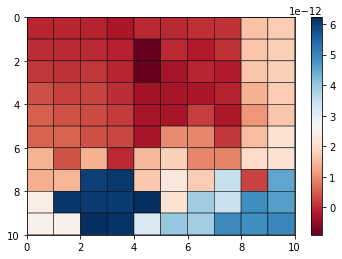

accuracy is 77.000000 lamba is 4.889780
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  4e+00  1e+00
 1:  2.1702e+02 -1.7610e+04  2e+04  1e-02  3e+00  2e+00
 2:  4.7826e+02 -1.6104e+04  2e+04  1e-02  2e+00  3e+00
 3:  7.8915e+02 -7.6768e+03  1e+04  7e-03  1e+00  3e+00
 4:  2.8123e+02 -7.5341e+02  1e+03  8e-04  1e-01  4e-01
 5:  8.9074e+00 -7.6884e+00  2e+01  1e-05  2e-03  1e-02
 6:  8.9012e-02 -7.6828e-02  2e-01  1e-07  2e-05  1e-04
 7:  8.9011e-04 -7.6827e-04  2e-03  1e-09  2e-07  1e-06
 8:  8.9011e-06 -7.6827e-06  2e-05  1e-11  2e-09  1e-08
 9:  8.9011e-08 -7.6827e-08  2e-07  1e-13  2e-11  1e-10
10:  8.9011e-10 -7.6827e-10  2e-09  1e-15  9e-13  1e-12
Optimal solution found.


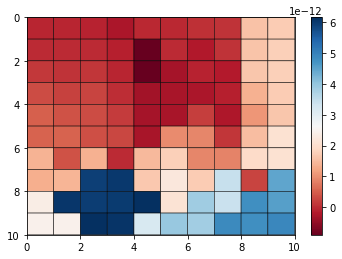

accuracy is 77.000000 lamba is 4.899800
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  4e+00  1e+00
 1:  2.1706e+02 -1.7608e+04  2e+04  1e-02  3e+00  2e+00
 2:  4.7790e+02 -1.6105e+04  2e+04  1e-02  2e+00  3e+00
 3:  7.8901e+02 -7.6647e+03  1e+04  7e-03  1e+00  3e+00
 4:  2.8109e+02 -7.5260e+02  1e+03  8e-04  1e-01  4e-01
 5:  8.8492e+00 -7.6780e+00  2e+01  1e-05  2e-03  1e-02
 6:  8.8431e-02 -7.6725e-02  2e-01  1e-07  2e-05  1e-04
 7:  8.8430e-04 -7.6724e-04  2e-03  1e-09  2e-07  1e-06
 8:  8.8430e-06 -7.6724e-06  2e-05  1e-11  2e-09  1e-08
 9:  8.8430e-08 -7.6724e-08  2e-07  1e-13  2e-11  1e-10
10:  8.8430e-10 -7.6724e-10  2e-09  1e-15  4e-13  1e-12
Optimal solution found.


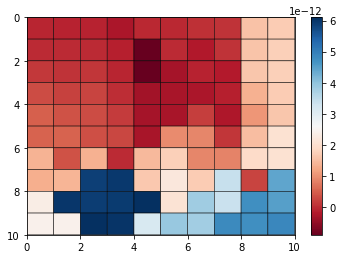

accuracy is 77.000000 lamba is 4.909820
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  4e+00  1e+00
 1:  2.1710e+02 -1.7605e+04  2e+04  1e-02  3e+00  2e+00
 2:  4.7754e+02 -1.6106e+04  2e+04  1e-02  2e+00  3e+00
 3:  7.8887e+02 -7.6525e+03  1e+04  7e-03  1e+00  3e+00
 4:  2.8095e+02 -7.5174e+02  1e+03  8e-04  1e-01  4e-01
 5:  8.7912e+00 -7.6673e+00  2e+01  1e-05  2e-03  1e-02
 6:  8.7851e-02 -7.6617e-02  2e-01  1e-07  2e-05  1e-04
 7:  8.7850e-04 -7.6616e-04  2e-03  1e-09  2e-07  1e-06
 8:  8.7850e-06 -7.6616e-06  2e-05  1e-11  2e-09  1e-08
 9:  8.7850e-08 -7.6616e-08  2e-07  1e-13  2e-11  1e-10
10:  8.7850e-10 -7.6616e-10  2e-09  2e-15  5e-13  1e-12
Optimal solution found.


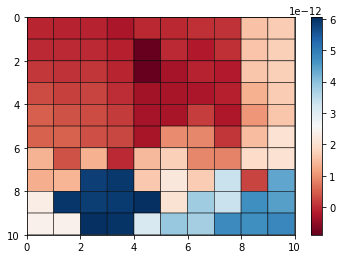

accuracy is 77.000000 lamba is 4.919840
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  4e+00  1e+00
 1:  2.1714e+02 -1.7602e+04  2e+04  1e-02  3e+00  2e+00
 2:  4.7719e+02 -1.6108e+04  2e+04  1e-02  2e+00  3e+00
 3:  7.8874e+02 -7.6402e+03  1e+04  7e-03  1e+00  3e+00
 4:  2.8081e+02 -7.5085e+02  1e+03  8e-04  1e-01  4e-01
 5:  8.7332e+00 -7.6561e+00  2e+01  1e-05  2e-03  1e-02
 6:  8.7272e-02 -7.6506e-02  2e-01  1e-07  2e-05  1e-04
 7:  8.7271e-04 -7.6505e-04  2e-03  1e-09  2e-07  1e-06
 8:  8.7271e-06 -7.6505e-06  2e-05  1e-11  2e-09  1e-08
 9:  8.7271e-08 -7.6505e-08  2e-07  1e-13  2e-11  1e-10
10:  8.7271e-10 -7.6505e-10  2e-09  1e-15  4e-13  1e-12
Optimal solution found.


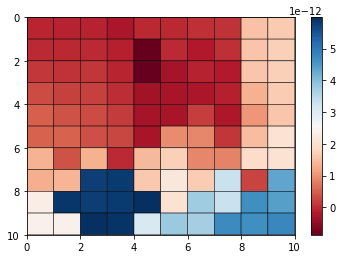

accuracy is 77.000000 lamba is 4.929860
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  4e+00  1e+00
 1:  2.1718e+02 -1.7600e+04  2e+04  1e-02  3e+00  2e+00
 2:  4.7684e+02 -1.6109e+04  2e+04  1e-02  2e+00  3e+00
 3:  7.8862e+02 -7.6279e+03  1e+04  7e-03  1e+00  3e+00
 4:  2.8067e+02 -7.4993e+02  1e+03  8e-04  1e-01  4e-01
 5:  8.6754e+00 -7.6445e+00  2e+01  1e-05  2e-03  1e-02
 6:  8.6695e-02 -7.6390e-02  2e-01  1e-07  2e-05  1e-04
 7:  8.6694e-04 -7.6390e-04  2e-03  1e-09  2e-07  1e-06
 8:  8.6694e-06 -7.6390e-06  2e-05  1e-11  2e-09  1e-08
 9:  8.6694e-08 -7.6390e-08  2e-07  1e-13  2e-11  1e-10
10:  8.6694e-10 -7.6390e-10  2e-09  1e-15  8e-13  1e-12
Optimal solution found.


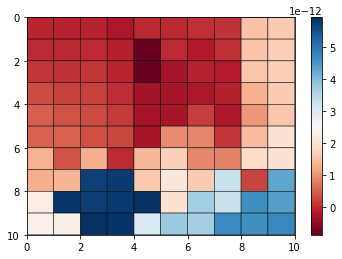

accuracy is 77.000000 lamba is 4.939880
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  4e+00  1e+00
 1:  2.1722e+02 -1.7597e+04  2e+04  1e-02  3e+00  2e+00
 2:  4.7650e+02 -1.6110e+04  2e+04  1e-02  2e+00  3e+00
 3:  7.8851e+02 -7.6155e+03  1e+04  7e-03  1e+00  3e+00
 4:  2.8052e+02 -7.4897e+02  1e+03  8e-04  1e-01  4e-01
 5:  8.6178e+00 -7.6326e+00  2e+01  1e-05  2e-03  1e-02
 6:  8.6119e-02 -7.6271e-02  2e-01  1e-07  2e-05  1e-04
 7:  8.6118e-04 -7.6270e-04  2e-03  1e-09  2e-07  1e-06
 8:  8.6118e-06 -7.6270e-06  2e-05  1e-11  2e-09  1e-08
 9:  8.6118e-08 -7.6270e-08  2e-07  1e-13  2e-11  1e-10
10:  8.6118e-10 -7.6270e-10  2e-09  1e-15  4e-13  1e-12
Optimal solution found.


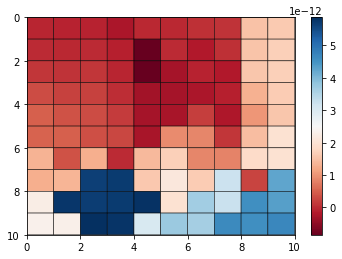

accuracy is 77.000000 lamba is 4.949900
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  4e+00  1e+00
 1:  2.1726e+02 -1.7594e+04  2e+04  1e-02  3e+00  2e+00
 2:  4.7616e+02 -1.6112e+04  2e+04  1e-02  2e+00  3e+00
 3:  7.8841e+02 -7.6030e+03  1e+04  7e-03  1e+00  3e+00
 4:  2.8037e+02 -7.4797e+02  1e+03  8e-04  1e-01  4e-01
 5:  8.5603e+00 -7.6202e+00  2e+01  1e-05  2e-03  1e-02
 6:  8.5545e-02 -7.6148e-02  2e-01  1e-07  2e-05  1e-04
 7:  8.5544e-04 -7.6148e-04  2e-03  1e-09  2e-07  1e-06
 8:  8.5544e-06 -7.6147e-06  2e-05  1e-11  2e-09  1e-08
 9:  8.5544e-08 -7.6147e-08  2e-07  1e-13  2e-11  1e-10
10:  8.5544e-10 -7.6147e-10  2e-09  2e-15  9e-13  1e-12
Optimal solution found.


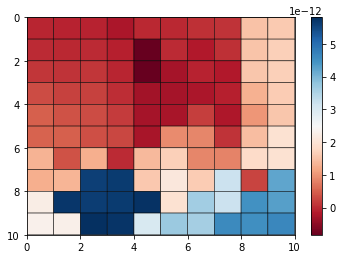

accuracy is 77.000000 lamba is 4.959920
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  4e+00  1e+00
 1:  2.1730e+02 -1.7591e+04  2e+04  1e-02  3e+00  2e+00
 2:  4.7583e+02 -1.6113e+04  2e+04  1e-02  2e+00  3e+00
 3:  7.8831e+02 -7.5905e+03  1e+04  7e-03  1e+00  3e+00
 4:  2.8022e+02 -7.4695e+02  1e+03  8e-04  1e-01  4e-01
 5:  8.5030e+00 -7.6076e+00  2e+01  1e-05  2e-03  1e-02
 6:  8.4972e-02 -7.6022e-02  2e-01  1e-07  2e-05  1e-04
 7:  8.4971e-04 -7.6021e-04  2e-03  1e-09  2e-07  1e-06
 8:  8.4971e-06 -7.6021e-06  2e-05  1e-11  2e-09  1e-08
 9:  8.4971e-08 -7.6021e-08  2e-07  1e-13  2e-11  1e-10
10:  8.4971e-10 -7.6021e-10  2e-09  1e-15  7e-13  1e-12
Optimal solution found.


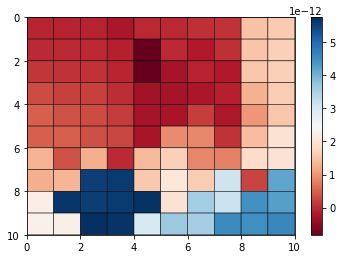

accuracy is 77.000000 lamba is 4.969940
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  4e+00  1e+00
 1:  2.1734e+02 -1.7589e+04  2e+04  1e-02  3e+00  2e+00
 2:  4.7550e+02 -1.6114e+04  2e+04  1e-02  2e+00  3e+00
 3:  7.8822e+02 -7.5780e+03  1e+04  7e-03  1e+00  3e+00
 4:  2.8007e+02 -7.4589e+02  1e+03  8e-04  1e-01  4e-01
 5:  8.4458e+00 -7.5945e+00  2e+01  1e-05  2e-03  1e-02
 6:  8.4402e-02 -7.5892e-02  2e-01  1e-07  2e-05  1e-04
 7:  8.4401e-04 -7.5891e-04  2e-03  1e-09  2e-07  1e-06
 8:  8.4401e-06 -7.5891e-06  2e-05  1e-11  2e-09  1e-08
 9:  8.4401e-08 -7.5891e-08  2e-07  1e-13  2e-11  1e-10
10:  8.4401e-10 -7.5891e-10  2e-09  1e-15  6e-13  1e-12
Optimal solution found.


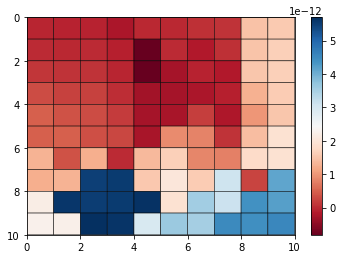

accuracy is 77.000000 lamba is 4.979960
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  4e+00  1e+00
 1:  2.1738e+02 -1.7586e+04  2e+04  1e-02  2e+00  2e+00
 2:  4.7518e+02 -1.6115e+04  2e+04  1e-02  2e+00  3e+00
 3:  7.8813e+02 -7.5654e+03  1e+04  7e-03  1e+00  3e+00
 4:  2.7991e+02 -7.4480e+02  1e+03  8e-04  1e-01  4e-01
 5:  8.3889e+00 -7.5812e+00  2e+01  1e-05  2e-03  1e-02
 6:  8.3833e-02 -7.5758e-02  2e-01  1e-07  2e-05  1e-04
 7:  8.3832e-04 -7.5758e-04  2e-03  1e-09  2e-07  1e-06
 8:  8.3832e-06 -7.5758e-06  2e-05  1e-11  2e-09  1e-08
 9:  8.3832e-08 -7.5758e-08  2e-07  1e-13  2e-11  1e-10
10:  8.3832e-10 -7.5758e-10  2e-09  1e-15  7e-13  1e-12
Optimal solution found.


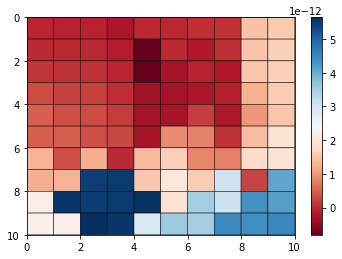

accuracy is 77.000000 lamba is 4.989980
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  4e+00  1e+00
 1:  2.1742e+02 -1.7583e+04  2e+04  1e-02  2e+00  2e+00
 2:  4.7486e+02 -1.6116e+04  2e+04  1e-02  2e+00  3e+00
 3:  7.8806e+02 -7.5527e+03  9e+03  7e-03  1e+00  3e+00
 4:  2.7975e+02 -7.4368e+02  1e+03  8e-04  1e-01  4e-01
 5:  8.3321e+00 -7.5675e+00  2e+01  1e-05  2e-03  1e-02
 6:  8.3266e-02 -7.5622e-02  2e-01  1e-07  2e-05  1e-04
 7:  8.3265e-04 -7.5621e-04  2e-03  1e-09  2e-07  1e-06
 8:  8.3265e-06 -7.5621e-06  2e-05  1e-11  2e-09  1e-08
 9:  8.3265e-08 -7.5621e-08  2e-07  1e-13  2e-11  1e-10
10:  8.3265e-10 -7.5621e-10  2e-09  1e-15  7e-13  1e-12
Optimal solution found.


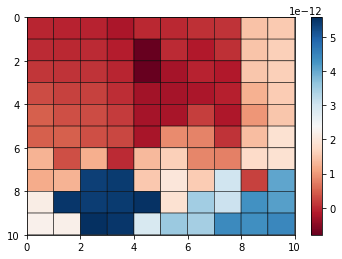

accuracy is 77.000000 lamba is 5.000000


In [29]:
D_p2=Get_D_Parameter(opt_action_list2)

accuracy2=np.zeros((500,1))
b2=np.zeros((1000,1))
Rmax=[1,100]
b2[800:1000]=int(Rmax[1])

b2=matrix(b2)
D_p2=matrix(D_p2)
index=0
#set up b

for lam in np.linspace(0,5,500): 
    #set up c    
    c2=np.zeros((300,1))
    c2[0:100]=1
    c2[100:200]=-lam
    c2=matrix(c2)
    #solve for reward function
    Rew2=solvers.lp(-c2,D_p2,b2)
    rew2=np.matrix(Rew2['x'][200:300])

    rf2=np.zeros((10,10))

    for i in range(100):
        temp=np.where(S==i)
        rf2[int(temp[0]),int(temp[1])]=rew2[i]

    #get the inverse State Value Matrix 

    inv_SV_list2,inv_SV_matrix2=get_stateValueMatrix(rf2,'F')
    #PlotHeatmap(inv_SV_matrix2,'RdBu')
    inv_opt_action_list2,inv_opt_action_matrix2= get_opt_actionMatrix(inv_SV_list2, rf2,'F')

    for i in range(100):
        if inv_opt_action_list2[i]==opt_action_list2[i]:
            accuracy2[index,0]=accuracy2[index,0]+1
    print("accuracy is %f" %accuracy2[index],"lamba is %f" %lam)

    index=index+1        
accuracy2=accuracy2/100

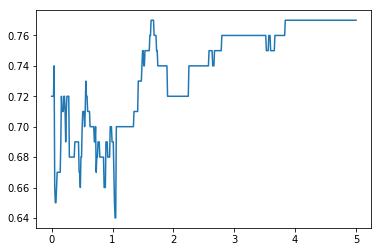

When lamba is 1.633267 , accuarcy get max is 0.770000


In [30]:
plt.plot(np.linspace(0,5,500),accuracy2)
plt.show()
lamba2_max=np.linspace(0,5,500)[np.argmax(accuracy2)]
print("When lamba is %f"% lamba2_max,", accuarcy get max is %f" % np.max(accuracy2))

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  1e+01  1e+00
 1:  1.4204e+02 -1.9760e+04  2e+04  2e-02  7e+00  2e+00
 2:  3.4501e+02 -1.5560e+04  2e+04  1e-02  6e+00  3e+00
 3:  4.7804e+02 -7.5099e+03  9e+03  6e-03  3e+00  3e+00
 4:  2.1360e+02 -8.7310e+02  1e+03  9e-04  4e-01  5e-01
 5:  5.6603e+01 -1.3095e+02  2e+02  2e-04  7e-02  9e-02
 6:  2.6716e+00 -1.4299e+00  4e+00  3e-06  2e-03  3e-03
 7:  2.6702e-02 -1.4289e-02  4e-02  3e-08  2e-05  3e-05
 8:  2.6702e-04 -1.4289e-04  4e-04  3e-10  2e-07  3e-07
 9:  2.6702e-06 -1.4289e-06  4e-06  3e-12  2e-09  3e-09
10:  2.6702e-08 -1.4289e-08  4e-08  3e-14  2e-11  3e-11
Optimal solution found.
inverse State Value Matrix using Reward function2 



0             1             2             3             4  \
0  2.444293e-12  6.419540e-13 -4.469295e-12 -2.938987e-11 -1.508622e-11   
1  1.048110e-11  2.650651e-12  6.677051e-12 -1.281334e-11 -1.110479e-10   
2  2.178664e-11  1.257708e-11  1.883003e-11 -2.232096e-12 -1.228184e-10   
3  5.010016e-11  2.426421e-11  3.813973e-11  7.257485e-12 -5.441847e-11   
4  7.874323e-11  5.115169e-11  5.416163e-11  2.801189e-11 -5.196309e-11   
5  7.869524e-11  7.901304e-11  3.918734e-11  4.588609e-11 -2.524352e-11   
6  3.389278e-10  1.270023e-10  3.985920e-10 -1.237632e-11  1.571949e-10   
7  3.322384e-10  4.088680e-10  1.311609e-09  1.231140e-09  2.105582e-10   
8  5.273913e-10  1.334647e-09  1.229302e-09  1.319351e-09  1.260142e-09   
9  5.592188e-10  5.531744e-10  1.351621e-09  1.248700e-09  6.867323e-10   

              5             6             7             8             9  
0 -1.610451e-11 -5.246851e-12  3.600206e-12  3.911551e-10  4.126811e-10  
1 -2.788598e-11 -3.485612e-11 -9.504791e-13  3.713107e-10  4.579113e-10  
2 -5.482148e-11 -3.157659e-11 -2.790525e-11  4.242179e-10  4.574298e-10  
3 -6.817743e-11 -4.674920e-11 -2.967420e-11  3.785382e-10  4.510419e-10  
4 -2.553644e-11 -5.599146e-12 -2.691801e-11  4.036407e-10  4.608254e-10  
5  1.157902e-10  2.495793e-10 -2.528302e-11  3.873400e-10  5.366686e-10  
6  2.574270e-10  9.696813e-11  2.464251e-10  4.971262e-10  5.378624e-10  
7  7.413645e-10  2.324563e-10  1.287323e-09  3.885152e-11  9.596027e-10  
8  4.296645e-10  1.350313e-09  7.073837e-10  1.364910e-09  1.001966e-09  
9  1.010537e-09  9.675103e-10  1.386398e-09  1.043218e-09  1.074157e-09

 

Heatmap of inverse State Value Matrix



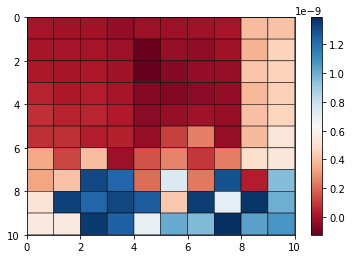

 

inverse Optimal action matrix using Reward function2



0  1  2  3  4  5  6  7  8  9
0  ↓  ←  ↓  ←  →  ↑  →  →  →  ↓
1  ↓  ↓  ↓  ←  ←  ↑  →  →  →  ↓
2  ↓  ↓  ↓  ←  ←  ↓  →  →  →  →
3  ↓  ↓  ↓  ←  ←  ↓  ↓  ↑  →  ↓
4  ↓  ←  ↓  ←  →  ↓  ↓  →  →  ↓
5  ↓  ←  ↓  ←  ↓  ↓  ↓  ←  →  ↓
6  ↓  ↓  ↓  ↓  ↓  ↓  ←  ↓  →  →
7  ←  →  ↓  ↓  ↓  ↓  →  ↓  ↓  ↓
8  →  →  →  ←  ←  ↓  →  ↓  ←  ↓
9  →  ↑  ↑  ↑  ←  →  →  ↑  →  ↓

In [36]:
c2=np.zeros((300,1))
c2[0:100]=1
c2[100:200]=-lamba2_max
c2=matrix(c2)
Rew2=solvers.lp(-c2,D_p2,b2)
rew2=np.matrix(Rew2['x'][200:300])

inv_rf2=np.zeros((10,10))

for i in range(100):
    temp=np.where(S==i)
    inv_rf2[int(temp[0]),int(temp[1])]=rew2[i]


#print the stateValueMatrix using inversed Rewardfunction1
print("inverse State Value Matrix using Reward function2 \n")

inv_SV_list2,inv_SV_matrix2=get_stateValueMatrix(inv_rf2)
print(" \n")
print("Heatmap of inverse State Value Matrix\n")
PlotHeatmap(inv_SV_matrix2,'RdBu')
print(" \n")
print("inverse Optimal action matrix using Reward function2\n")

inv_opt_action_list2,inv_opt_action_matrix2= get_opt_actionMatrix(inv_SV_list2, inv_rf2)

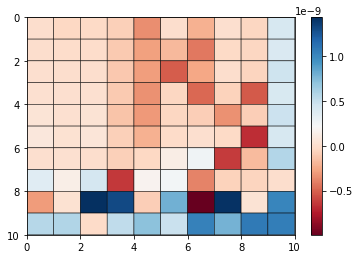

In [37]:
PlotHeatmap(inv_rf2,'RdBu')